# Final Capstone: Instacart Reordered Product Prediction

Problem statement:

Instacart is challenging the Kaggle community to use this anonymized data on customer orders over time to predict which previously purchased products will be  reordered.

The dataset for this competition is a relational set of files describing customers' orders over time. The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, we provide between 4 and 100 of their orders, with the sequence of products purchased in each order. We also provide the week and hour of day the order was placed, and a relative measure of time between orders. For more information, see the blog post accompanying its public release.

File descriptions

Each entity (customer, product, order, aisle, etc.) has an associated unique id. Most of the files and variable names should be self-explanatory.

 aisles.csv
 
 aisle_id,aisle  
 1,prepared soups salads  
 2,specialty cheeses  
 3,energy granola bars  
 
 
departments.csv

 department_id,department  
 1,frozen  
 2,other  
 3,bakery  


order_products__*.csv

These files specify which products were purchased in each order. order_products__prior.csv contains previous order contents for all customers. 'reordered' indicates that the customer has a previous order that contains the product. Note that some orders will have no reordered items. You may predict an explicit 'None' value for orders with no reordered items. See the evaluation page for full details.

 order_id,product_id,add_to_cart_order,reordered  
 
 1,49302,1,1  
 1,11109,2,1  
 1,10246,3,0  
 
orders.csv

This file tells to which set (prior, train, test) an order belongs. You are predicting reordered items only for the test set orders. 'order_dow' is the day of week.

order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
 
 2539329,1,prior,1,2,08,  
 2398795,1,prior,2,3,07,15.0  
 473747,1,prior,3,3,12,21.0  

products.csv

 product_id,product_name,aisle_id,department_id
 1,Chocolate Sandwich Cookies,61,19  
 2,All-Seasons Salt,104,13  
 3,Robust Golden Unsweetened Oolong Tea,94,7  

sample_submission.csv

order_id,products
17,39276  
34,39276  
137,39276  


## Objective :

The goal of the competition is to predict which products will be in a user's next order. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.For each user, 4 and 100 of their orders are given, with the sequence of products purchased in each order.We will try to analyse and explore data in all the aspects so that we can get understanding of data and understand  the factual truth.We will try to understand the behavior, trend inside the data which will be very benefical for the organization's profit.Below are few questions that will be answered here-

1.This was stated in the description" there are no orders less than 4 and is max capped at 100 ", is this correct?

2.What days are the highest orders placed and what day are the lowest orders placed?

3.What time in 24 hours are the most orders placed?

4.When are the maximum ordered placed-weekly, monthly,first week of the month?

5.How many  of the products in an order are re-ordered products?

6.What  are the highest bought products?

7.At what time of the day Reordered products are bought?


# Sections:

The final capstone is divided into the below sections

1.Importing python Libraries

2.Data Cleaning

3.Data Exploration

4.Getting started with Predictive Modelling

5.Conclusion

In [1]:

#import basic Libraries
import pandas as pd
import numpy as np
#import numpy_indexed as npi
from tqdm import tqdm

#Visualizaiton imports
import seaborn as sns
import matplotlib.pyplot as plt

#combine sparse matrices
import scipy.sparse as sps

#Importing Sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import MiniBatchDictionaryLearning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,f1_score 
from sklearn.decomposition import PCA
from sklearn import tree,model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import MiniBatchKMeans
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from keras.models import Sequential
# Import various componenets for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop
import tensorflow as tf
import keras

# Import the backend
from keras import backend as K
%matplotlib inline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
import warnings
# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)


Using TensorFlow backend.


Now, since I have imported all the required libraries, lets go ahead and read the csv files and create dataframes.This will create  a table like structure and then we can do our analysis.Here we have 6 files, hence 6 dataframes.

In [3]:
#import of all files from the data folder.
aisles = pd.read_csv('C:/Users/ankush/Downloads/aisles.csv')
departments = pd.read_csv('C:/Users/ankush/Downloads/departments.csv')
order_products__prior = pd.read_csv('C:/Users/ankush/Downloads/order_products__prior.csv')
order_products__train = pd.read_csv('C:/Users/ankush/Downloads/order_products__train.csv')
orders = pd.read_csv('C:/Users/ankush/Downloads/orders.csv')
products = pd.read_csv('C:/Users/ankush/Downloads/products.csv')

# Data Cleaning

Now,I will go ahead with cleaning the data , which will help in more effecient analysis of the dataset and also for machine learning models to understand the data better.First,lets find out if any of the dataframe as any nulls.If so, we will drop those records

In [74]:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [20]:
departments.isnull().sum()

department_id    0
department       0
dtype: int64

In [3]:
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [4]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [5]:
orders=orders.dropna(0)
orders.isnull().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

In [23]:
order_products__train.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [102]:
order_products__prior.isnull().sum()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

So, I have now completed the first step.Lets go ahead with joining the relevant datasets.I am using left outer join which looks to be better option, since I want the all the values from left table and matching value from the right table.

In [4]:
opt = order_products__train.merge(products,how='left', on='product_id')
opt = opt.merge(orders,how='left', on='order_id')
opt = opt.merge(aisles,how='left', on='aisle_id')
opt = opt.merge(departments,how='left', on='department_id')
opt.head(10)

order_id  product_id  add_to_cart_order  reordered  \
0         1       49302                  1          1   
1         1       11109                  2          1   
2         1       10246                  3          0   
3         1       49683                  4          0   
4         1       43633                  5          1   
5         1       13176                  6          0   
6         1       47209                  7          0   
7         1       22035                  8          1   
8        36       39612                  1          0   
9        36       19660                  2          1   

                                    product_name  aisle_id  department_id  \
0                               Bulgarian Yogurt       120             16   
1  Organic 4% Milk Fat Whole Milk Cottage Cheese       108             16   
2                          Organic Celery Hearts        83              4   
3                                 Cucumber Kirby        83              4   
4           Lightly Smoked Sardines in Olive Oil        95             15   
5                         Bag of Organic Bananas        24              4   
6                           Organic Hass Avocado        24              4   
7                    Organic Whole String Cheese        21             16   
8                  Grated Pecorino Romano Cheese         2             16   
9                                   Spring Water       115              7   

   user_id eval_set  order_number  order_dow  order_hour_of_day  \
0   112108    train             4          4                 10   
1   112108    train             4          4                 10   
2   112108    train             4          4                 10   
3   112108    train             4          4                 10   
4   112108    train             4          4                 10   
5   112108    train             4          4                 10   
6   112108    train             4          4                 10   
7   112108    train             4          4                 10   
8    79431    train            23          6                 18   
9    79431    train            23          6                 18   

   days_since_prior_order                          aisle    department  
0                     9.0                         yogurt    dairy eggs  
1                     9.0           other creams cheeses    dairy eggs  
2                     9.0               fresh vegetables       produce  
3                     9.0               fresh vegetables       produce  
4                     9.0            canned meat seafood  canned goods  
5                     9.0                   fresh fruits       produce  
6                     9.0                   fresh fruits       produce  
7                     9.0                packaged cheese    dairy eggs  
8                    30.0              specialty cheeses    dairy eggs  
9                    30.0  water seltzer sparkling water     beverages

In [28]:
opt.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
aisle                     0
department                0
dtype: int64

Below, I am trying to check if we need resampling if values for "reordered" column is balanced for 0 or 1.It looks like they should be fine

In [78]:
opt[opt.reordered==0].shape

(555793, 15)

In [79]:
opt[opt.reordered==1].shape

(828824, 15)

# Data Exploration

As we could see, orders.csv has all the information about the given order id like the user who has purchased the order, when was it purchased, days since prior order and so on.
The columns present in order_products_train and order_products_prior are same. Then what is the difference between these files.?
For each  order of a customer,we need to predict the products that will be re-ordered. So the last order of the user has been taken out and divided into train and test sets. All the prior order informations of the customer are present in order_products_prior file. We can also note that there is a column in orders.csv file called eval_set which tells us as to which of the three datasets (prior, train or test) the given row goes to.
Let us first get the count of rows in each of the three sets

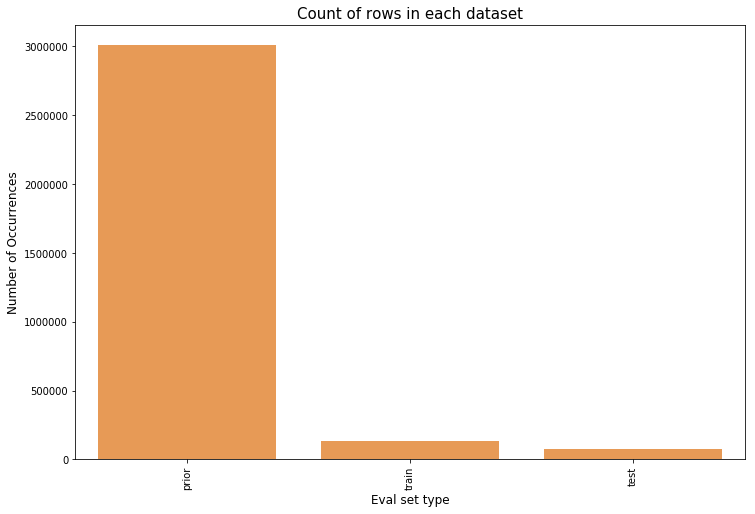

In [74]:
color = sns.color_palette()
cnt_srs = orders.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [76]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

So there are 206,209 customers in total. Out of which, the last purchase of 131,209 customers are given as train set and we need to predict for the rest 75,000 customers.Now let us validate the claim that 4 to 100 orders of a customer are given in the description spec

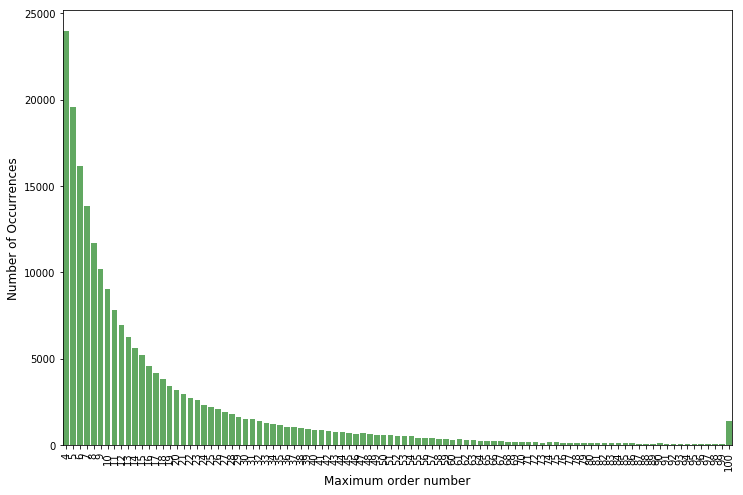

In [93]:
cnt_srs = orders.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

This proves that there are no orders less than 4 and is max capped at 100 as given in the description.Now, lets us see the ordering frequency for week days

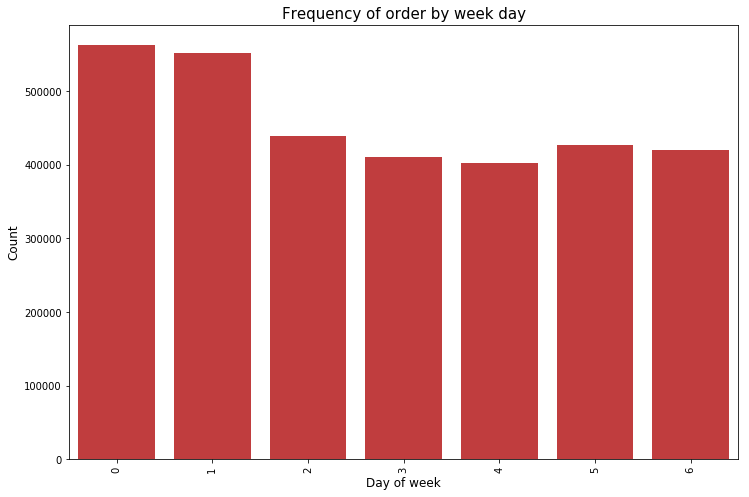

In [95]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_dow", data=orders, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by week day", fontsize=15)
plt.show()

It looks like 0 i.e Saturday and 1 i.e Sunday when the orders are high and low during Wednesday.
Now we shall see how the distribution is with respect to time of the day.

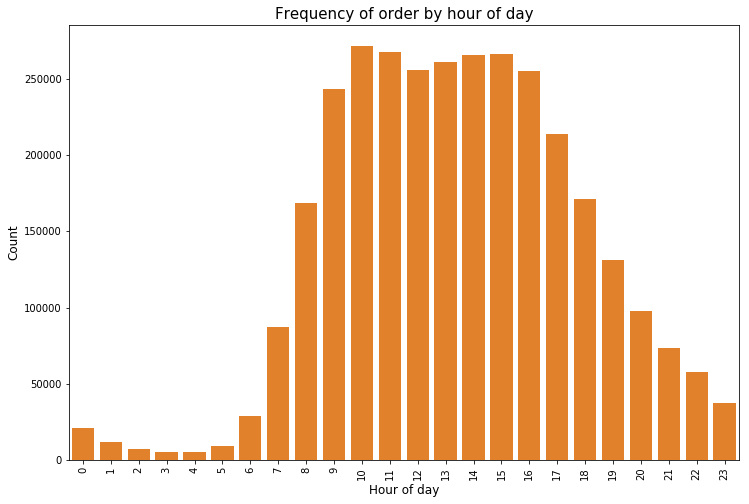

In [96]:
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=orders, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency of order by hour of day", fontsize=15)
plt.show()

So majority of the orders are made during day time. Now let us combine the day of week and hour of day to see the distribution.

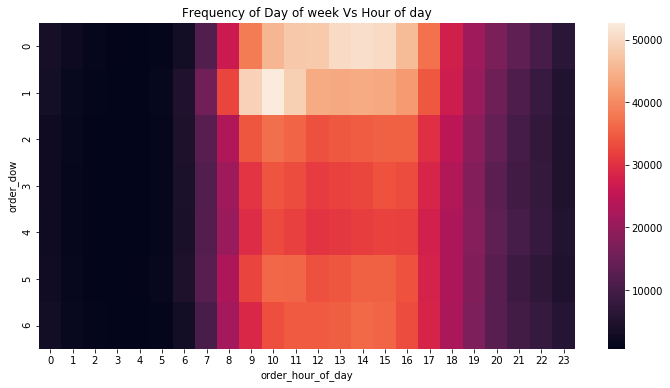

In [99]:
grouped_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week Vs Hour of day")
plt.show()

It Seems Satuday evenings and Sunday mornings are the prime time for orders.
Now let us check the time interval between the orders.

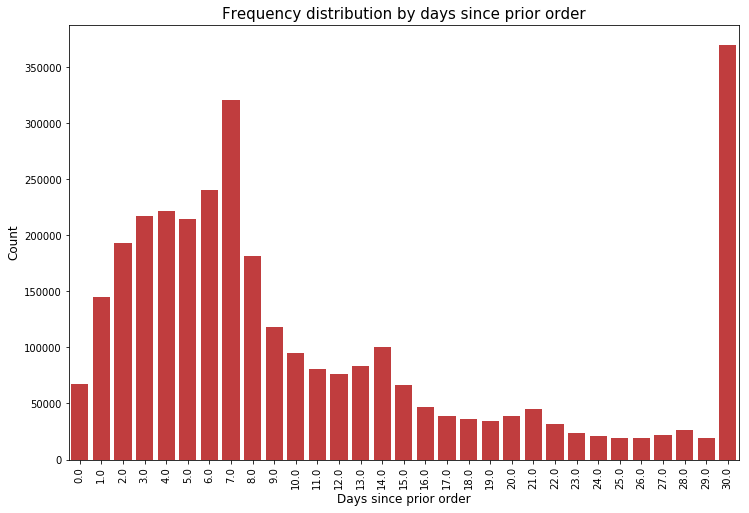

In [100]:
plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

It looks like customer order weekly/first(mostly in first week) or monthly. We are seeing bigger peaks at first week  and then last day of the month

let us check out the re-order percentage in prior set and train set.

In [104]:
# percentage of re-orders in prior set #
order_products__prior.reordered.sum() / order_products__prior.shape[0]

0.5896974667922161

In [106]:

# percentage of re-orders in train set #
order_products__train.reordered.sum() / order_products__train.shape[0]

0.5985944127509629

On an average, about 59% of the products in an order are re-ordered products.

In [131]:
cnt_srs = opt['product_name'].value_counts().reset_index().head()
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

product_name  frequency_count
0                  Banana            18726
1  Bag of Organic Bananas            15480
2    Organic Strawberries            10894
3    Organic Baby Spinach             9784
4             Large Lemon             8135

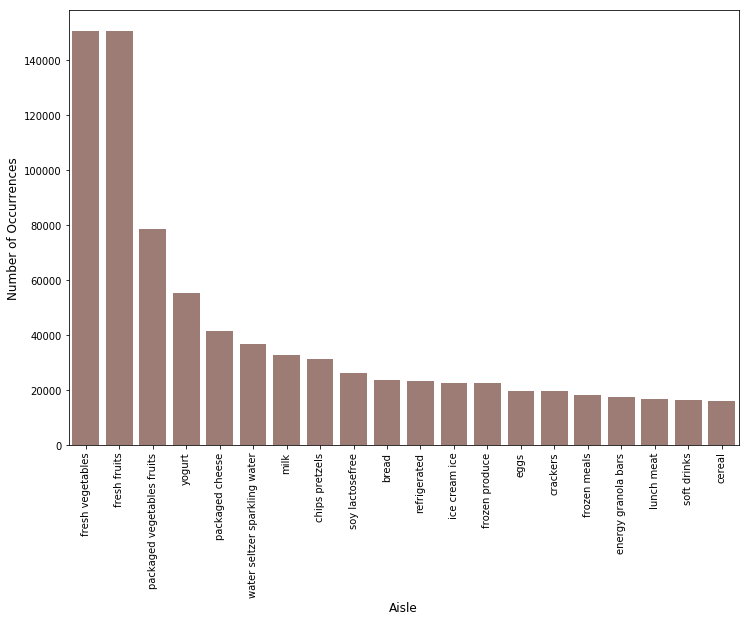

In [132]:
cnt_srs = opt['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

It looks like fresh vegetables and fresh nuts were the highest bought products.

In [135]:
opt['department'].value_counts()

produce            409087
dairy eggs         217051
snacks             118862
beverages          114046
frozen             100426
pantry              81242
bakery              48394
canned goods        46799
deli                44291
dry goods pasta     38713
household           35986
meat seafood        30307
breakfast           29500
personal care       21570
babies              14941
international       11902
missing              8251
alcohol              5598
pets                 4497
other                1795
bulk                 1359
Name: department, dtype: int64

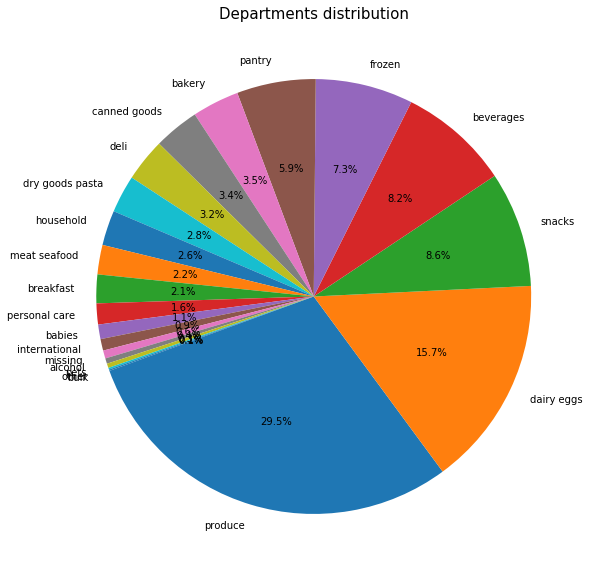

In [136]:
plt.figure(figsize=(10,10))
temp_series = opt['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels, 
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

Produce is the largest department. Now let us check the reorder ratio of day of week vs hour of day

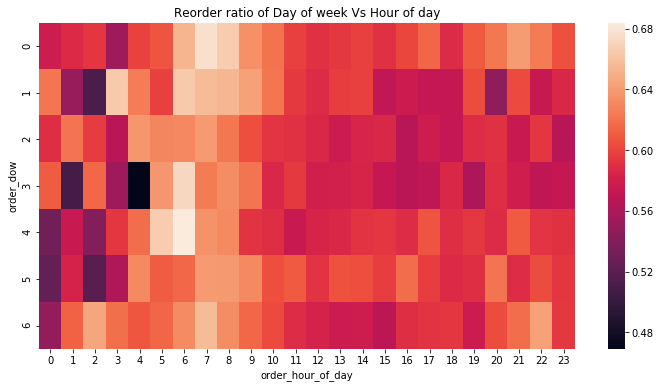

In [137]:
grouped_df = opt.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot('order_dow', 'order_hour_of_day', 'reordered')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

Looks like reorder ratios are quite high during the early mornings compared to later half of the day.Now,lets go ahead with creating models and fitting the data to the model.But first, we have to create x variables i.e input variables and y as outcome variables

# Getting Started with Predictive Modelling

## 1.Supervised Learning

### Getting X and Y variables for the model for model evaluation

In [5]:
X=opt.drop(['reordered','product_name','aisle','eval_set','department'],axis=1)
Y=opt['reordered']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [6]:
X_train.shape

(969231, 10)

Let us use dimension reduction technique to reduce the dimension and determine the accuracy of the models.We are going to try first PCA and then Selectkbest

# PCA

In [36]:
X_pca = PCA(n_components=5)
X_pca.fit(X_train)
X_train_pca = X_pca.transform(X_train)
X_test_pca = X_pca.transform(X_test)
print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA.\n',
    X_pca.explained_variance_ratio_
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [5.44034266e-01 4.25207707e-01 3.07577255e-02 2.23994985e-07
 4.69299183e-08]


Now, since we have reduce components to 5 , let us see if PCA  shows any overfitting.After looking at variance, we do not see any overfitting which is good for training the models.Let us now start with training the models with the data.We are going to use 7 models-Naive Bayes,logistic Regression, KNN,Decision tree,Random Forest,SVC,GBR.

# Naive Bayes

Now, we are training  Naive bayes with the dataset.

In [143]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train_pca,y_train)

# Classify, storing the result in a new variable.
y_pred_bnb = bnb.predict(X_train_pca)

Since we have fitted the model with the data and we dont have any parameters to tune using gridsearch cv so we are only using Cross Validation Classification_report,AUC,Confusion Matrix accuracy of the model

# Cross Validation

In [139]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(bnb, X_train_pca, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(bnb, X_test_pca, y_test, cv=5))

Training data accuracy:  [0.61009972 0.60806203 0.60883068 0.61009054 0.61037943]
Testing data accuracy:  [0.60856063 0.6066661  0.60853184 0.60752073 0.60885684]


# AUC

In [144]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for BNB :" ,roc_auc_score(y_train, y_pred_bnb))

AUC Score for BNB : 0.5512120024750862


# Confusion Matrix

In [145]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_bnb))
print('Accuracy Score for BNB :',accuracy_score(y_train, y_pred_bnb))

[[ 99546 289422]
 [ 89070 491193]]
Accuracy Score for BNB : 0.6094924739303633


Here we see the FP and FN are  low which might be due to the reason that most of the features  are unable  to make the model understand the data requirements and hence not a good accuracy in the model 

In [148]:

print("Classification Report for BNB:",classification_report(y_train, y_pred_bnb))

Classification Report for BNB:               precision    recall  f1-score   support

           0       0.53      0.26      0.34    388968
           1       0.63      0.85      0.72    580263

   micro avg       0.61      0.61      0.61    969231
   macro avg       0.58      0.55      0.53    969231
weighted avg       0.59      0.61      0.57    969231



We used NB model because it is relatively simple than other models and it assumes that input variables are independent from each other, which will help us to avoid overfitting.It might not produce a high accuracy because of its simpilicity but runtime will be less than rest of the models.As we notice above, Cross validation,AUC, Confusion Matrix,Classification report are having ok scores.Naive Bayer is doing okay to predict the delay of trains which is expected.Here class 1 and 0 doesnot have that decent results but we would want to improve the accuracy results in order to predict better

# Logistic Regression

In [151]:
lr = LogisticRegression(C=0.02)

In [152]:
lr.fit(X_train_pca,y_train)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.02, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

### GridSearchcv to get the best parameters


In [153]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=model_selection.GridSearchCV(lr,grid,cv=10)
logreg_cv.fit(X_train_pca,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.62825374 0.62811652 0.62812993 0.62813715 0.62814541 0.62813922
 0.62814128 0.62813922 0.62814128 0.62813922 0.62813922 0.62813922
 0.62814025 0.62813922]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.62825569 0.62811388 0.62814999 0.62810758 0.62810838 0.62810746
 0.628107   0.62810735 0.62810872 0.62810735 0.62810563 0.62810735
 0.62810689 0.62810735]
Best Hyper Parameters:
 {'C': 0.001, 'penalty': 'l1'}
0.6282537393046652
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [58]:
lr = LogisticRegression(C= 0.001, penalty= 'l1')
lr.fit(X_train_pca,y_train)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [156]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train_pca, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(lr, X_test_pca, y_test, cv=5))

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Training data accuracy:  [0.62873813 0.62643734 0.62866591 0.62951327 0.62803271]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Testing data accuracy:  [0.62718168 0.62864571 0.62885034 0.62821238 0.63013831]


In [158]:
y_pred_lr = lr.predict(X_train_pca)

# Confusion Matrix

In [44]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_lr))
print('Accuracy Score for Logistic Regression :',accuracy_score(y_train, y_pred_lr))

[[112718 276250]
 [ 81116 499147]]
Accuracy Score for Random Forest : 0.6312891354073488


# AUC

In [43]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Logistic Regression :" ,roc_auc_score(y_train, y_pred_lr))

AUC Score for Random Forest : 0.5749977753102224


# Classification Report

In [159]:

from sklearn.metrics import classification_report
print("Classification Report for Logistic Regression:",classification_report(y_train, y_pred_lr))

Classification Report for Logistic Regression:               precision    recall  f1-score   support

           0       0.56      0.34      0.42    388968
           1       0.65      0.82      0.73    580263

   micro avg       0.63      0.63      0.63    969231
   macro avg       0.61      0.58      0.58    969231
weighted avg       0.61      0.63      0.60    969231



Logistic Regression usually works perfect to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.This model again is easy to implement, quick to train and resistent to overfitting.Here, the accuracy is  in 60s which makes sense because we do not have lot of meaningful features that will help model to understand the data better.Cross validation,AUC, Confusion Matrix,Classification report doesnot have  good scores with no sign of overfitting.TN and FN look okay for both confusion matrix and Classification report.Runtime looks to be better than SVC ,GBR and KNN.

# KNN Classification

In [27]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [43]:
params = {'n_neighbors':[5],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class_knn = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class_knn.fit(X_train_pca,y_train)
#The best hyper parameters set

results = grid_class_knn.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_knn.best_params_)
print(grid_class_knn.best_score_)
final_model = grid_class_knn.best_estimator_
print(final_model)


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 3, 'n_neighbors': 5}, {'leaf_size': 5, 'n_neighbors': 5}]
[0.57054717 0.57054717 0.57054717 0.57054717]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.72350967 0.72350967 0.72350967 0.72350967]
Best Hyper Parameters:
 {'leaf_size': 1, 'n_neighbors': 5}
0.5705471657427383
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [28]:

#Fitting the model with the parameters and train data
knn_model = KNeighborsClassifier(leaf_size=1,n_neighbors=5)
knn_model.fit(X_train_pca, y_train)
y_pred_knn = knn_model.predict(X_train_pca)

In [59]:
y_pred_knn.shape

(969231,)

In [29]:
from sklearn.model_selection import cross_val_score
print("Training data accuracy for knn: ",cross_val_score(knn_model, X_train_pca, y_train, cv=10))
print("Testing data accuracy for knn: ",cross_val_score(knn_model, X_test_pca, y_test, cv=10))

Training data accuracy for knn:  [0.58909042 0.58860551 0.58934836 0.58908618 0.59056158 0.59064412
 0.59096396 0.58943698 0.58689462 0.58962877]
Testing data accuracy for knn:  [0.58846895 0.58804978 0.58530538 0.58718313 0.58658129 0.58767875
 0.5895084  0.58998989 0.58861765 0.59220473]


# AUC

In [46]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for KNN :" ,roc_auc_score(y_train, y_pred_knn))

AUC Score for Random Forest : 0.7042915632004009


# Confusion Matrix

In [47]:

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for KNN :',accuracy_score(y_train, y_pred_knn))

[[225505 163463]
 [ 99323 480940]]
Accuracy Score for Random Forest : 0.7288716518559559


# Classification Report

In [48]:
from sklearn.metrics import classification_report
print("Classification Report for KNN:",classification_report(y_train, y_pred_knn))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.69      0.58      0.63    388968
           1       0.75      0.83      0.79    580263

   micro avg       0.73      0.73      0.73    969231
   macro avg       0.72      0.70      0.71    969231
weighted avg       0.73      0.73      0.72    969231



KNN usually works well for big datasets.If we observce here, dataset is more than 1 million, so knn is having better accuracy than NB and Logistic Regression.As we notice above, Cross validation,AUC, Confusion Matrix,Classification report are having better accuracy than NB and Logistic Regression.There is no sign of overfitting here.If we see false negative and false positives for class 0 and 1 are almost similar and scores are better and run time is short as well.

# Random Forest Classifier

In [7]:
from sklearn import ensemble
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_pca, y_train)
rfc_pred = rfc.predict(X_train_pca)

In [20]:
dt_grid={'max_depth':[3,4,5],'max_features': [5]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_pca, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

[{'max_depth': 3, 'max_features': 5}, {'max_depth': 4, 'max_features': 5}, {'max_depth': 5, 'max_features': 5}]
[0.62952691 0.63083414 0.63213517]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.62974152 0.63133948 0.63251898]
Best Hyper Parameters:
 {'max_depth': 5, 'max_features': 5}
0.6321351669519444
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [84]:
rfc = ensemble.RandomForestClassifier(max_depth=5,max_features= 5)
rfc.fit(X_train_pca, y_train)
rfc_pred = rfc.predict(X_train_pca)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [22]:
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(rfc, X_train_pca, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(rfc, X_test, y_test, cv=5))

Training data accuracy:  [0.63246787 0.63030122 0.63348414 0.63232995 0.63211329]
Testing data accuracy:  [0.66179975 0.66242161 0.66592438 0.66036328 0.66667068]


# AUC

In [23]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, rfc_pred))

AUC Score for Random Forest : 0.5790349655943385


# Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, rfc_pred))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, rfc_pred))

[[120309 268659]
 [ 87755 492508]]
Accuracy Score for Random Forest : 0.6322713573957086


# Classification Report

In [26]:
from sklearn.metrics import classification_report
print("Classification Report for Random Forest:",classification_report(y_train, rfc_pred))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.58      0.31      0.40    388968
           1       0.65      0.85      0.73    580263

   micro avg       0.63      0.63      0.63    969231
   macro avg       0.61      0.58      0.57    969231
weighted avg       0.62      0.63      0.60    969231



Random forest classifier usually handles the missing values and maintain the accuracy of a large proportion of data.Thats why it is awlays better to use Random Forest for classification problems.If there are more trees, it won’t allow overfitting trees in the model.If we observe here, there seem to be no or very less overfitting.But the accuracy doesnt seem to be good as expected by Random forest.May be its because it doesnot have enough dimensions to understand and get good accuaracy which it required to make it work well.

# Decision Tree

In [66]:
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_pca, y_train)
y_pred_dt = decision_tree.predict(X_train_pca)

In [67]:

dt_grid={'max_depth':[50],'max_features': [5]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_pca, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 5}]
[0.60001383]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.99962176]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 5}
0.6000138253935337
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [68]:

#Fitting the best parmaters after gridsearchcv to the decision tree
decision_tree = tree.DecisionTreeClassifier(max_depth=50,max_features=5)
decision_tree.fit(X_train_pca, y_train)
y_pred_dt = decision_tree.predict(X_train_pca)

In [69]:

print("Training data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_train_pca, y_train, cv=10))
print("Testing data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_test_pca, y_test, cv=10))

Training data accuracy for Decision Tree:  [0.59990302 0.59899509 0.59903636 0.59944492 0.60186953 0.5997854
 0.6027981  0.60035286 0.60286622 0.59834712]
Testing data accuracy for Decision Tree:  [0.59354839 0.59534413 0.59247936 0.588772   0.59209418 0.59256584
 0.5869806  0.59518995 0.59112138 0.58982137]


In [71]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for Decision Tree :" ,roc_auc_score(y_train, y_pred_dt))

AUC Score for Decision Tree : 0.9988297008562766


In [74]:

print(confusion_matrix(y_train, y_pred_dt))
print('Accuracy Score for Decision Tree :',accuracy_score(y_train, y_pred_dt))

[[388256    712]
 [   296 579967]]
Accuracy Score for Decision Tree : 0.998960000247619


In [75]:
print("Classification Report for Decision Tree:",classification_report(y_train, y_pred_dt))

Classification Report for Decision Tree:               precision    recall  f1-score   support

           0       1.00      1.00      1.00    388968
           1       1.00      1.00      1.00    580263

   micro avg       1.00      1.00      1.00    969231
   macro avg       1.00      1.00      1.00    969231
weighted avg       1.00      1.00      1.00    969231



Decision Tree are one of the simple models.It is also useful when most of the input variables are categorical and produces good results.It is usually suspectible to overfitting or noise.In this case,the results are ideal, which is not likely possible.Hence, Decision tree has got overfitting.AUC,Confusion Matrix and Classification report are having overfitting which tells us that we should not be using this model and choose other model which have better accuracy

# SVC

In [ ]:
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_train_pca)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(svm,param_grid,refit = True)
grid_class_svm.fit(X_train_pca, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [ ]:
svm=SVC()
svm.fit(X_train_pca, y_train)
y_pred_svm = svm.predict(X_train_pca)

In [ ]:

print("Training data accuracy for Random Forest: ",cross_val_score(grid_class_svm, X_train_pca, y_train, cv=10))
print("Testing data accuracy for Random Forest: ",cross_val_score(grid_class_svm, X_test_pca, y_test, cv=10))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, y_pred_svm))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_bnb))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_svm))

In [ ]:

print("Classification Report for Random Forest:",classification_report(y_train, y_pred_svm))

SVC is one of the complex models for getting good accuracy.The tradeoff with this model is, it takes more time to run than the other models because of its large computations happening in the background.It taken atleast 8-10 hours to complete.Results are good but we will not be using this model unless other models are not performing well

# GradientBoostingClassifier


In [ ]:
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:

params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_pca, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)

In [ ]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:
print("Training data accuracy for GBR: ",cross_val_score(gb, X_train_pca, y_train, cv=10))
print("Testing data accuracy for GBR: ",cross_val_score(gb, X_test_pca, y_test, cv=10))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for GBR :" ,roc_auc_score(y_train, y_pred_gbr))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_gbr))
print('Accuracy Score for GBR :',accuracy_score(y_train, y_pred_gbr))

In [ ]:

print("Classification Report for GBR:",classification_report(y_train, y_pred_gbr))

GBR is especially used to improve the accuaracy.This model is very useful if other models are not accurate ,then model might be a good option for predictive accuracy.The downside of this model is this model can very slow to predict the accuracy because of the ensemble algorithms running in the background.This is the same scenario here.It is very slow.However,Accuracy scores are good since it models the data over and over, each time adjusting the model based on what was learned from the previous one.Now, we will use SKB for dimension reduction and use the same techniques as above to get the accuracy of each model

# SKB

Now, lets use another popular dimension reduction technique Selectkbest.This is also very effective when compared to PCA.We are trying to compare PCA with SKB and the model accuracies

In [10]:
#Using skb to get the best 5 features out of the total
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
skb = SelectKBest(f_classif,k=5)
skb.fit(X_train, y_train)
#skb.fit(X_train_sample, y_train_sample)
X_train_skb = skb.transform(X_train)
X_test_skb = skb.transform(X_test)

We have reduced the features to 5 here

# Naive Bayes

In [162]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train_skb,y_train)

# Classify, storing the result in a new variable.
y_pred_bnb = bnb.predict(X_train_skb)

# Cross Validation

In [163]:
print("Training data accuracy for Naive Bayes: ",cross_val_score(bnb, X_train_skb, y_train, cv=10))
print("Testing data accuracy for Naive Bayes: ",cross_val_score(bnb, X_test_skb, y_test, cv=10))

Training data accuracy for Naive Bayes:  [0.631567   0.63163922 0.62882258 0.63176955 0.63472035 0.63167669
 0.63626797 0.63317272 0.63304513 0.63302449]
Testing data accuracy for Naive Bayes:  [0.63370246 0.63171959 0.63037146 0.63318809 0.63578805 0.62935144
 0.63385334 0.63033849 0.63033849 0.63794598]


# AUC

In [165]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for BNB :" ,roc_auc_score(y_train, y_pred_bnb))

AUC Score for BNB : 0.6004345924693821


# Confusion Matrix

In [166]:

print(confusion_matrix(y_train, y_pred_bnb))
print('Accuracy Score for BNB :',accuracy_score(y_train, y_pred_bnb))

[[170217 218751]
 [137373 442890]]
Accuracy Score for BNB : 0.6325705636736754


In [167]:

print("Classification Report for BNB:",classification_report(y_train, y_pred_bnb))

Classification Report for BNB:               precision    recall  f1-score   support

           0       0.55      0.44      0.49    388968
           1       0.67      0.76      0.71    580263

   micro avg       0.63      0.63      0.63    969231
   macro avg       0.61      0.60      0.60    969231
weighted avg       0.62      0.63      0.62    969231



Cross validation,AUC, Confusion Matrix,Classification report seem to have much better results than PCA for NB.But still the accuracy scores are not good.Now we will search rest of the models

# Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(X_train_skb,y_train)
y_pred_lr = lr.predict(X_train_skb)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


## Gridsearch cv to get the best parameters

In [168]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=model_selection.GridSearchCV(lr,grid,cv=10)
logreg_cv.fit(X_train_pca,y_train)
results = logreg_cv.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",logreg_cv.best_params_)
print(logreg_cv.best_score_)
final_model = logreg_cv.best_estimator_
print(final_model)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

[{'C': 0.001, 'penalty': 'l1'}, {'C': 0.001, 'penalty': 'l2'}, {'C': 0.01, 'penalty': 'l1'}, {'C': 0.01, 'penalty': 'l2'}, {'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1.0, 'penalty': 'l1'}, {'C': 1.0, 'penalty': 'l2'}, {'C': 10.0, 'penalty': 'l1'}, {'C': 10.0, 'penalty': 'l2'}, {'C': 100.0, 'penalty': 'l1'}, {'C': 100.0, 'penalty': 'l2'}, {'C': 1000.0, 'penalty': 'l1'}, {'C': 1000.0, 'penalty': 'l2'}]
[0.62825064 0.62811652 0.62812787 0.62813715 0.62814437 0.62813922
 0.62814025 0.62813922 0.62813922 0.62813922 0.62814025 0.62813922
 0.62813818 0.62813922]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.62825832 0.62811388 0.6281485  0.62810758 0.62810677 0.62810746
 0.62810769 0.62810735 0.62810769 0.62810735 0.62810826 0.62810735
 0.62810677 0.62810735]
Best Hyper Parameters:
 {'C': 0.001, 'penalty': 'l1'}
0.628250644067307
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)


In [169]:
lr = LogisticRegression(C= 0.001, penalty= 'l1')
lr.fit(X_train_skb,y_train)
y_pred_lr = lr.predict(X_train_skb)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [170]:
#Cross Validation
from sklearn.model_selection import cross_val_score
print("Training data accuracy: ",cross_val_score(lr, X_train_skb, y_train, cv=5))
print("Testing data accuracy: ",cross_val_score(lr, X_test_skb, y_test, cv=5))

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Training data accuracy:  [0.64873328 0.64712376 0.64734043 0.64783719 0.6480229 ]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Testing data accuracy:  [0.64562219 0.65021606 0.65076977 0.64760403 0.6478207 ]


# AUC

In [171]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for LR :" ,roc_auc_score(y_train, y_pred_lr))

AUC Score for LR : 0.5968909258047632


In [172]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_lr))
print('Accuracy Score for LR :',accuracy_score(y_train, y_pred_lr))

[[131798 257170]
 [ 84172 496091]]
Accuracy Score for LR : 0.6478218298836913


In [173]:
from sklearn.metrics import classification_report
print("Classification Report for LR:",classification_report(y_train, y_pred_lr))

Classification Report for LR:               precision    recall  f1-score   support

           0       0.61      0.34      0.44    388968
           1       0.66      0.85      0.74    580263

   micro avg       0.65      0.65      0.65    969231
   macro avg       0.63      0.60      0.59    969231
weighted avg       0.64      0.65      0.62    969231



Logistic Regression usually works perfect to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.This model again is easy to implement, quick to train and resistent to overfitting.Here, the accuracy is in 60s which makes sense because we do not have lot of meaningful features that will help model to understand the data better.Cross validation,AUC, Confusion Matrix,Classification report doesnot have good scores with no sign of overfitting.TN and FN look okay for both confusion matrix and Classification report.Runtime looks to be better than SVC ,GBR and KNN.

# KNN

In [124]:
#Fitting the model with the parameters and train data
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_skb, y_train)
y_pred_knn = knn_model.predict(X_train_skb)

In [57]:

params = {'n_neighbors':[5],
          'leaf_size':[1,2,3,5]
                  }
#Making models with hyper parameters sets
grid_class_knn = model_selection.GridSearchCV(knn_model, param_grid=params)
#Learning
grid_class_knn.fit(X_train_skb,y_train)
#The best hyper parameters set

results = grid_class_knn.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_knn.best_params_)
print(grid_class_knn.best_score_)
final_model = grid_class_knn.best_estimator_
print(final_model)

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[{'leaf_size': 1, 'n_neighbors': 5}, {'leaf_size': 2, 'n_neighbors': 5}, {'leaf_size': 3, 'n_neighbors': 5}, {'leaf_size': 5, 'n_neighbors': 5}]
[0.63439159 0.63460104 0.63437612 0.63429048]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.7425397  0.74252423 0.74252474 0.74233078]
Best Hyper Parameters:
 {'leaf_size': 2, 'n_neighbors': 5}
0.6346010393807049
KNeighborsClassifier(algorithm='auto', leaf_size=2, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')


In [125]:

#Fitting the model with the best parameters we got above to improve the performance
knn_model = KNeighborsClassifier(leaf_size= 2,n_neighbors=5)
knn_model.fit(X_train_skb, y_train)
y_pred_knn = knn_model.predict(X_train_skb)

# Cross Validation

In [59]:
print("Training data accuracy for KNN: ",cross_val_score(knn_model, X_train_skb, y_train, cv=10))
print("Testing data accuracy for KNN: ",cross_val_score(knn_model, X_test_skb, y_test, cv=10))

Training data accuracy for KNN:  [0.6357249  0.6370352  0.63624077 0.63537035 0.63627828 0.63483384
 0.63819733 0.63732035 0.63763645 0.63613008]
Testing data accuracy for KNN:  [0.63088589 0.63241773 0.62890296 0.63020294 0.63410289 0.62855698
 0.63329963 0.63026626 0.6317348  0.63380519]


# AUC

In [60]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for KNN :" ,roc_auc_score(y_train, y_pred_knn))

AUC Score for KNN : 0.7215467450149926


# Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for KNN :',accuracy_score(y_train, y_pred_knn))

# Classification Report

In [61]:

print("Classification Report for KNN:",classification_report(y_train, y_pred_knn))

Classification Report for KNN:               precision    recall  f1-score   support

           0       0.70      0.62      0.66    388968
           1       0.76      0.83      0.79    580263

   micro avg       0.74      0.74      0.74    969231
   macro avg       0.73      0.72      0.73    969231
weighted avg       0.74      0.74      0.74    969231



KNN usually works well for big datasets.If we observce here, dataset is more than 1 million, so knn is having better accuracy than NB and Logistic Regression.As we notice above, Cross validation,AUC, Confusion Matrix,Classification report are having better accuracy than NB and Logistic Regression.There is no sign of overfitting here.If we see false negative and false positives for class 0 and 1 are almost similar and scores are better and run time is short as well.

# Random Forest

In [11]:

#Fitting the model with the parameters and train data
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train_skb, y_train)
y_pred_rfc = rfc.predict(X_train_skb)

In [ ]:

dt_grid={'max_depth':[1,2,3,4,5],'max_features': [5]}

grid_class_rfc=model_selection.GridSearchCV(rfc,dt_grid,cv=6)
grid_class_rfc.fit(X_train_skb, y_train)
results = grid_class_rfc.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_rfc.best_params_)
print(grid_class_rfc.best_score_)
final_model = grid_class_rfc.best_estimator_
print(final_model)

In [38]:

#Fitting the model with the best parameters we got above to improve the performance
rfc = ensemble.RandomForestClassifier(max_depth=5, max_features= 5,n_estimators= 100)
rfc.fit(X_train_skb, y_train)
y_pred_rfc = rfc.predict(X_train_skb)

In [40]:

print("Training data accuracy for Random Forest: ",cross_val_score(rfc, X_train_skb, y_train, cv=10))
print("Testing data accuracy for Random Forest: ",cross_val_score(rfc, X_test_skb, y_test, cv=10))

Training data accuracy for Random Forest:  [0.64327721 0.64592877 0.64400974 0.64358305 0.64249972 0.64403702
 0.64754496 0.64106559 0.64519923 0.64649925]
Testing data accuracy for Random Forest:  [0.64557053 0.64659717 0.64736753 0.64883603 0.64922121 0.64714238
 0.64709423 0.64379604 0.6445905  0.64846646]


In [42]:

print ("AUC Score for Random Forest :" ,roc_auc_score(y_train, y_pred_rfc))

AUC Score for Random Forest : 0.6111819520156541


In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
print(confusion_matrix(y_train, y_pred_knn))
print('Accuracy Score for Random Forest :',accuracy_score(y_train, y_pred_knn))

[[230000 158968]
 [102308 477955]]
Accuracy Score for Random Forest : 0.7304295879929552


In [44]:
print("Classification Report for Random Forest:",classification_report(y_train, y_pred_rfc))

Classification Report for Random Forest:               precision    recall  f1-score   support

           0       0.58      0.44      0.50    388968
           1       0.68      0.78      0.73    580263

   micro avg       0.65      0.65      0.65    969231
   macro avg       0.63      0.61      0.61    969231
weighted avg       0.64      0.65      0.63    969231



Random forest classifier usually handles the missing values and maintain the accuracy of a large proportion of data.Thats why it is always better to use Random Forest for classification problems.If there are more trees, it won’t allow overfitting trees in the model.If we observe here, there seem to be no or very less overfitting.But the accuracy doesnt seem to be good as expected by Random forest.May be its because it doesnot have enough dimensions to understand and get good accuaracy which it required to make it work well.

# Decision Tree

In [45]:
#Fitting the model with the parameters and train data
decision_tree = tree.DecisionTreeClassifier(max_depth=10)
decision_tree.fit(X_train_skb, y_train)
y_pred_dt = decision_tree.predict(X_train_skb)

In [47]:

dt_grid={'max_depth':[50],'max_features': [5]}
grid_class_dt=model_selection.GridSearchCV(decision_tree,dt_grid,cv=6)
grid_class_dt.fit(X_train_skb, y_train)
results = grid_class_dt.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_dt.best_params_)
print(grid_class_dt.best_score_)
final_model = grid_class_dt.best_estimator_
print(final_model)

[{'max_depth': 50, 'max_features': 5}]
[0.60235795]


C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[0.88816226]
Best Hyper Parameters:
 {'max_depth': 50, 'max_features': 5}
0.6023579518195353
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=5, max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [48]:

#Fitting the model with the best parameters we got above to improve the performance
decision_tree = tree.DecisionTreeClassifier(max_depth=50,max_features=5)
decision_tree.fit(X_train_skb, y_train)
y_pred_dt = decision_tree.predict(X_train_skb)

In [49]:

print("Training data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_train_skb, y_train, cv=5))
print("Testing data accuracy for Decision Tree: ",cross_val_score(decision_tree, X_test_skb, y_test, cv=5))

Training data accuracy for Decision Tree:  [0.60249578 0.60119579 0.60184063 0.6020016  0.60185715]
Testing data accuracy for Decision Tree:  [0.59099882 0.59084945 0.59342538 0.59503834 0.59338927]


In [50]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for Decision Tree :" ,roc_auc_score(y_train, y_pred_dt))

AUC Score for Decision Tree : 0.8832534428502907


In [53]:
print(confusion_matrix(y_train, y_pred_dt))
print('Accuracy Score for Decision Tree :',accuracy_score(y_train, y_pred_dt))

[[348463  40505]
 [ 75062 505201]]
Accuracy Score for Decision Tree : 0.8807642347386743


Decision Tree are one of the simple models.It is also useful when most of the input variables are categorical and produces good results.It is usually suspectible to overfitting or noise.In this case,the results are very good, which is not likely possible.Hence, Decision tree has got overfitting.AUC,Confusion Matrix and Classification report are having overfitting which tells us that we should not be using this model and choose other model which have better accuracy

# SVC

In [ ]:
#Fitting the model with the parameters and train data
from sklearn.svm import SVC
svm=SVC()
svm.fit(X_train_skb, y_train)
y_pred_svm = svm.predict(X_train_skb)

In [ ]:

param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['linear','rbf']}
grid_class_svm=model_selection.GridSearchCV(SVC(),param_grid,refit = True)
grid_class_svm.fit(X_train_skb, y_train)
results = grid_class_svm.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",grid_class_svm.best_params_)
print(grid_class_svm.best_score_)
final_model = grid_class_svm.best_estimator_
print(final_model)

In [ ]:

print("Training data accuracy for SVC: ",cross_val_score(grid_class_svm, X_train_skb, y_train, cv=5))
print("Testing data accuracy for SVC: ",cross_val_score(grid_class_svm, X_test_skb, y_test, cv=5))

In [ ]:

from sklearn.metrics import roc_auc_score
print ("AUC Score for SVC :" ,roc_auc_score(y_train, y_pred_dt))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_dt))
print('Accuracy Score for SVC :',accuracy_score(y_train_sample, y_pred_dt))

In [ ]:

print("Classification Report for SVC:",classification_report(y_train_sample, y_pred_dt))

SVC is one of the complex models for getting good accuracy.The tradeoff with this model is, it takes more time to run than the other models because of its large computations happening in the background.It taken atleast 8-10 hours to complete.Results are good but we will not be using this model unless other models are not performing well

# Gradient Boost Classifier


In [ ]:

#Fitting the model with the parameters and train data
params = {'n_estimators': 500,
          'max_depth': 7,
          'loss': 'deviance'}
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_skb, y_train)
y_pred_gbr = clf.predict(X_train_skb)

In [ ]:
params ={
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "n_estimators":[1000]
    
    }
gb = model_selection.GridSearchCV(clf, params, cv=10)
gb.fit(X_train_skb, y_train)
results = gb.cv_results_
print(results.get('params'))
print(results.get('mean_test_score'))
print(results.get('mean_train_score'))
print("Best Hyper Parameters:\n",gb.best_params_)
print(gb.best_score_)
final_model = gb.best_estimator_
print(final_model)

In [ ]:
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train_pca, y_train)
y_pred_gbr = clf.predict(X_train_pca)

In [ ]:

print("Training data accuracy for GBR: ",cross_val_score(gb, X_train_skb, y_train, cv=5))
print("Testing data accuracy for GBR: ",cross_val_score(gb, X_test_skb, y_test, cv=5))

In [ ]:
from sklearn.metrics import roc_auc_score
print ("AUC Score for GBR :" ,roc_auc_score(y_train y_pred_gbr))

In [ ]:

print(confusion_matrix(y_train_sample, y_pred_gbr))
print('Accuracy Score for GBR :',accuracy_score(y_train, y_pred_gbr))

In [ ]:

print("Classification Report for GBR:",classification_report(y_train, y_pred_gbr))


GBR is especially used to improve the accuaracy.This model is very useful if other models are not accurate ,then model might be a good option for predictive accuracy.The downside of this model is this model can very slow to predict the accuracy because of the ensemble algorithms running in the background.This is the same scenario here.It is very slow.However,Accuracy scores are good since it models the data over and over, each time adjusting the model based on what was learned from the previous one.Now, we will use SKB for dimension reduction and use the same techniques as above to get the accuracy of each model

## 2.Unsupervised Learning

# K-Means Clustering

In [13]:
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
# Normalize the data.
X_train_norm = normalize(X_train)

# Reduce it to two components.
X_train_pca = PCA(5).fit_transform(X_train_norm)
n_clusters=7
for i in range(2,n_clusters):
# Calculate predicted values.
  y_pred = KMeans(i, random_state=42).fit(X_train_pca)
  labels = y_pred.labels_
  print("Silhouette Score for {} clusters is:{} ".format(i,metrics.silhouette_score(X_train_pca, labels, metric='euclidean')))



Silhouette Score for 2 clusters is:0.48619271349655085 
Silhouette Score for 3 clusters is:0.43284916064917783 
Silhouette Score for 4 clusters is:0.4576065914132273 
Silhouette Score for 5 clusters is:0.4104443825147923 
Silhouette Score for 6 clusters is:0.36833285498627955 


The silhouette score seems to perform better when number of clusters=2 rather than others if we observe above.This might be because of the reason that it is a classification problem and it checks the 2 most important features and determines the accuracy based on that

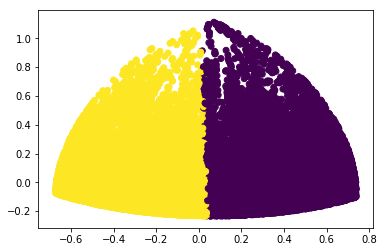

Comparing k-means 2 clusters against the data:
reordered      0      1
row_0                  
0           9118  13998
1          11531  16902


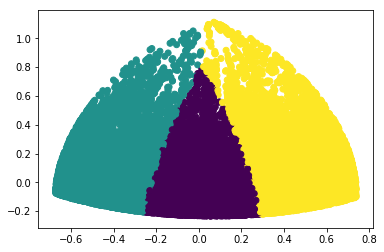

Comparing k-means 3 clusters against the data:
reordered     0      1
row_0                 
0          7992  12052
1          6876   9771
2          5781   9077


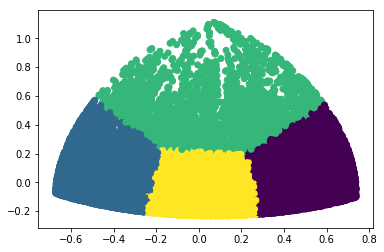

Comparing k-means 4 clusters against the data:
reordered     0      1
row_0                 
0          5340   8375
1          6585   9414
2           985   1487
3          7739  11624


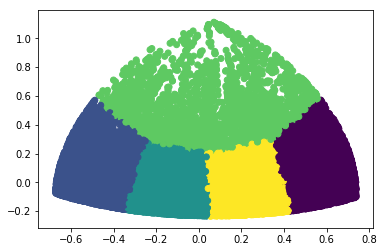

Comparing k-means 5 clusters against the data:
reordered     0     1
row_0                
0          3704  5745
1          5177  7332
2          6050  9195
3           950  1408
4          4768  7220


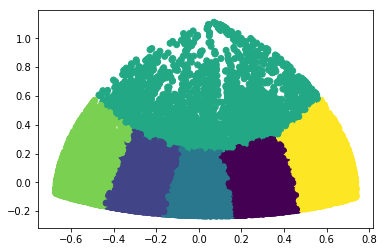

Comparing k-means 6 clusters against the data:
reordered     0     1
row_0                
0          3782  5887
1          4171  5999
2          4646  7302
3           929  1370
4          3857  5395
5          3264  4947


In [15]:
n_clusters=7
for i in range(2,n_clusters):
 y_pred = KMeans(i, random_state=42).fit_predict(X_train_pca)

# Plot the solution.
 plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_pred)
 plt.show()

# Check the solution against the data.
 print('Comparing k-means {} clusters against the data:'.format(i))
 print(pd.crosstab(y_pred, y_train))

Number of clusters is 2  shows that there are 2 distinctive groups classified by the algorithm.We do see some overlaps within the two groups.But we can classify the data points using 2 clusters using 2 groups.When number of clsuters is more than 2, it is being gouped based on factors such customer reorder the products, based on order_id, high buying customer/low buying customer etc.But there will more overlaps within the groups hence less accuracy.For chosing the k for clustering, we should have rough idea of the groups in the dataset which we are trying to analyse.This is a classification problem , so here the ideal clusters will be 2.Using number of clusters more than 2  will not achieve anything and we are not going to learn anything from the dataset since nature of the problem is more of classification rather than regression.

Now let's try MiniBatch:

In [24]:
n_clusters=7
for i in range(2,n_clusters):
# Each batch will be made up of 200 data points.
  minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=2,
    batch_size=200)
  minibatchkmeans.fit(X_train_pca)

# Add the new predicted cluster memberships to the data frame.
  predict_mini = minibatchkmeans.predict(X_train_pca)

# Check the MiniBatch model against our earlier one.
  print('{} clusters for mini-batch'.format(i))
  print(pd.crosstab(predict_mini, y_pred))        


2 clusters for mini-batch
col_0     0      1     2     3     4     5
row_0                                     
0         0  10170  8388  1065  9252     0
1      9669      0  3560  1234     0  8211
3 clusters for mini-batch
col_0     0      1     2     3     4     5
row_0                                     
0      9669      0  5327  1303     0  8211
1         0  10170  6621   996  9252     0
4 clusters for mini-batch
col_0     0      1     2     3     4     5
row_0                                     
0      9669      0  4966  1288     0  8211
1         0  10170  6982  1011  9252     0
5 clusters for mini-batch
col_0     0      1      2     3     4     5
row_0                                      
0         0  10170  10431  1217  9252     0
1      9669      0   1517  1082     0  8211
6 clusters for mini-batch
col_0     0      1     2     3     4     5
row_0                                     
0      9669      0  3086  1193     0  8211
1         0  10170  8862  1106  9252     0


Using Mini batch doesnt seem to have a consistent result.So, we should not consider it.

# Mean-shift

In [206]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train_pca, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train_pca)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


Number of estimated clusters: 1


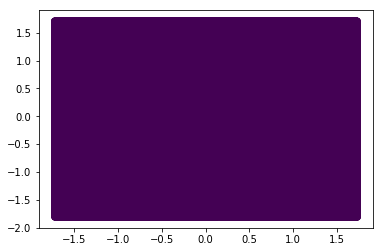

Comparing the assigned categories to the ones in the data:
col_0           0
reordered        
0          388968
1          580263


In [71]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Mean shift is showing only 1 cluster which doesnt seem to be correct.So, we will not be using this model on our dataset.

# Spectral Clustering

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\ankush\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(d

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:446: RuntimeWarning: overflow encountered in square
  inertia = np.sum((X - centers[labels]) ** 2, dtype=np.float64)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\p

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\sit

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-package

C:\Users\ankush\Anaconda3\lib\site-packages\numpy\core\_methods.py:116: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\m

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\p

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\sit

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-package

C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:251: RuntimeWarning: invalid value encountered in maximum
  np.maximum(distances, 0, out=distances)
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:126: RuntimeWarning: invalid value encountered in minimum
  distance_to_candidates[trial])
C:\Users\ankush\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:249: RuntimeWarning: invalid value encountered in add
  distances += XX
C:\Users\ankush\Anaconda3\lib\site-package

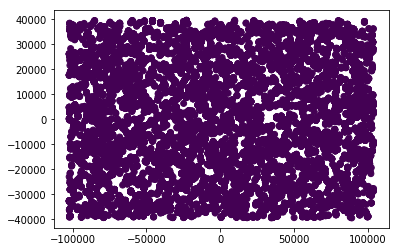

Comparing the assigned categories to the ones in the data:
col_0          0
reordered       
0           9294
1          13456


In [9]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=5

# Declare and fit the model.
sc = SpectralClustering(n_clusters=5)
sc.fit(X_train_pca)

#Predicted clusters.
predict=sc.fit_predict(X_train_pca)

#Graph results.
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

# Affinity Propogation

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train_pca)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = 5
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))

Same goes with Spectral propogation and affinity propogation,results are poor which means that we will not be using them for our prediction purpose.So, the standout algorithm here is k means which is usually the case.It is more reliable than other unsupervised algorithms.Now , let us use deep learning on our dataset to check the accuracies of the models.Deep learning is ideally used for image classification, object recognition, Digital signature recognition.Here, we are trying to use deep learning for our own sake  on the dataset to check the accuracy of the model and predict the outsomee

## 3.Deep Learning

Let us first start with Multi Layered Perception

### Multi Layered Perception(MLP)

It  is a set of perceptron models organized into layers, one layer feeding into the next.

In [7]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the first layer.
# Relu is the activation function used
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have for our outcome
model.add(Dense(2, activation='softmax'))

model.summary()



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                704       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 4,994
Trainable params: 4,994
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
#y_train = y_train.values
X_train=np.array(X_train).reshape(X_train.shape[0], 10)
#X_train=np.array(X_train).reshape(X_train.shape[0], 10, 1)
y_train = keras.utils.to_categorical(y_train, 2)
#y_train=np.array(y_train).reshape(y_train.shape[0], 1)
#y_train=y_train.reshape(y_train.shape[0],1)
# Training..
model.fit(X_train, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(X_train, y_train))

# Evaluation.
scores = model.evaluate(X_train, y_train, verbose=0)
print('Training loss:', scores[0])
print('Training accuracy:', scores[1])

Train on 969231 samples, validate on 969231 samples
Epoch 1/30


110208/969231 [==>...........................] - ETA: 2:07:01 - loss: 9.3183 - acc: 0.42 - ETA: 1:08:15 - loss: 10.3257 - acc: 0.359 - ETA: 28:53 - loss: 9.7464 - acc: 0.3953  - ETA: 21:42 - loss: 9.7680 - acc: 0.39 - ETA: 17:36 - loss: 9.5981 - acc: 0.40 - ETA: 14:59 - loss: 9.6159 - acc: 0.40 - ETA: 8:32 - loss: 9.6835 - acc: 0.3992 - ETA: 7:24 - loss: 9.6331 - acc: 0.402 - ETA: 6:21 - loss: 9.5918 - acc: 0.404 - ETA: 5:09 - loss: 9.6552 - acc: 0.401 - ETA: 4:42 - loss: 9.6451 - acc: 0.401 - ETA: 4:47 - loss: 9.6375 - acc: 0.402 - ETA: 4:14 - loss: 9.5978 - acc: 0.404 - ETA: 3:58 - loss: 9.5426 - acc: 0.408 - ETA: 3:44 - loss: 9.5365 - acc: 0.408 - ETA: 3:26 - loss: 9.4855 - acc: 0.411 - ETA: 3:18 - loss: 9.5124 - acc: 0.409 - ETA: 3:13 - loss: 9.5038 - acc: 0.410 - ETA: 3:08 - loss: 9.5371 - acc: 0.408 - ETA: 3:03 - loss: 9.5207 - acc: 0.409 - ETA: 2:58 - loss: 9.5220 - acc: 0.409 - ETA: 2:55 - loss: 9.5146 - acc: 0.409 - ETA: 2:45 - loss: 9.5103 - acc: 0.410 - ETA: 2:39 - loss: 9.5

370304/969231 [==========>...................] - ETA: 1:21 - loss: 9.6226 - acc: 0.403 - ETA: 1:21 - loss: 9.6231 - acc: 0.403 - ETA: 1:20 - loss: 9.6225 - acc: 0.403 - ETA: 1:20 - loss: 9.6235 - acc: 0.402 - ETA: 1:20 - loss: 9.6228 - acc: 0.403 - ETA: 1:20 - loss: 9.6230 - acc: 0.403 - ETA: 1:20 - loss: 9.6232 - acc: 0.403 - ETA: 1:20 - loss: 9.6226 - acc: 0.403 - ETA: 1:19 - loss: 9.6227 - acc: 0.403 - ETA: 1:19 - loss: 9.6235 - acc: 0.402 - ETA: 1:19 - loss: 9.6233 - acc: 0.403 - ETA: 1:19 - loss: 9.6241 - acc: 0.402 - ETA: 1:19 - loss: 9.6253 - acc: 0.402 - ETA: 1:19 - loss: 9.6252 - acc: 0.402 - ETA: 1:19 - loss: 9.6251 - acc: 0.402 - ETA: 1:19 - loss: 9.6256 - acc: 0.402 - ETA: 1:19 - loss: 9.6270 - acc: 0.402 - ETA: 1:19 - loss: 9.6269 - acc: 0.402 - ETA: 1:18 - loss: 9.6296 - acc: 0.402 - ETA: 1:18 - loss: 9.6285 - acc: 0.402 - ETA: 1:18 - loss: 9.6290 - acc: 0.402 - ETA: 1:18 - loss: 9.6305 - acc: 0.402 - ETA: 1:18 - loss: 9.6313 - acc: 0.402 - ETA: 1:18 - loss: 9.6298 - acc:

507136/969231 [==============>...............] - ETA: 1:00 - loss: 9.6311 - acc: 0.402 - ETA: 1:00 - loss: 9.6315 - acc: 0.402 - ETA: 1:00 - loss: 9.6314 - acc: 0.402 - ETA: 59s - loss: 9.6318 - acc: 0.402 - ETA: 59s - loss: 9.6320 - acc: 0.40 - ETA: 59s - loss: 9.6319 - acc: 0.40 - ETA: 59s - loss: 9.6317 - acc: 0.40 - ETA: 59s - loss: 9.6319 - acc: 0.40 - ETA: 59s - loss: 9.6319 - acc: 0.40 - ETA: 59s - loss: 9.6318 - acc: 0.40 - ETA: 59s - loss: 9.6314 - acc: 0.40 - ETA: 59s - loss: 9.6321 - acc: 0.40 - ETA: 59s - loss: 9.6321 - acc: 0.40 - ETA: 59s - loss: 9.6322 - acc: 0.40 - ETA: 59s - loss: 9.6319 - acc: 0.40 - ETA: 59s - loss: 9.6325 - acc: 0.40 - ETA: 59s - loss: 9.6321 - acc: 0.40 - ETA: 59s - loss: 9.6314 - acc: 0.40 - ETA: 59s - loss: 9.6303 - acc: 0.40 - ETA: 58s - loss: 9.6305 - acc: 0.40 - ETA: 58s - loss: 9.6311 - acc: 0.40 - ETA: 58s - loss: 9.6310 - acc: 0.40 - ETA: 58s - loss: 9.6306 - acc: 0.40 - ETA: 58s - loss: 9.6312 - acc: 0.40 - ETA: 58s - loss: 9.6309 - acc: 0

642176/969231 [==================>...........] - ETA: 44s - loss: 9.4465 - acc: 0.41 - ETA: 44s - loss: 9.4428 - acc: 0.41 - ETA: 44s - loss: 9.4404 - acc: 0.41 - ETA: 44s - loss: 9.4391 - acc: 0.41 - ETA: 44s - loss: 9.4350 - acc: 0.41 - ETA: 44s - loss: 9.4333 - acc: 0.41 - ETA: 44s - loss: 9.4297 - acc: 0.41 - ETA: 44s - loss: 9.4253 - acc: 0.41 - ETA: 44s - loss: 9.4205 - acc: 0.41 - ETA: 44s - loss: 9.4168 - acc: 0.41 - ETA: 44s - loss: 9.4131 - acc: 0.41 - ETA: 44s - loss: 9.4121 - acc: 0.41 - ETA: 44s - loss: 9.4090 - acc: 0.41 - ETA: 44s - loss: 9.4053 - acc: 0.41 - ETA: 44s - loss: 9.4020 - acc: 0.41 - ETA: 43s - loss: 9.3977 - acc: 0.41 - ETA: 43s - loss: 9.3934 - acc: 0.41 - ETA: 43s - loss: 9.3903 - acc: 0.41 - ETA: 43s - loss: 9.3883 - acc: 0.41 - ETA: 43s - loss: 9.3856 - acc: 0.41 - ETA: 43s - loss: 9.3833 - acc: 0.41 - ETA: 43s - loss: 9.3804 - acc: 0.41 - ETA: 43s - loss: 9.3776 - acc: 0.41 - ETA: 43s - loss: 9.3757 - acc: 0.41 - ETA: 43s - loss: 9.3743 - acc: 0.41 - E

772992/969231 [======================>.......] - ETA: 31s - loss: 8.8410 - acc: 0.45 - ETA: 31s - loss: 8.8393 - acc: 0.45 - ETA: 31s - loss: 8.8374 - acc: 0.45 - ETA: 31s - loss: 8.8345 - acc: 0.45 - ETA: 31s - loss: 8.8343 - acc: 0.45 - ETA: 31s - loss: 8.8316 - acc: 0.45 - ETA: 31s - loss: 8.8310 - acc: 0.45 - ETA: 30s - loss: 8.8297 - acc: 0.45 - ETA: 30s - loss: 8.8268 - acc: 0.45 - ETA: 30s - loss: 8.8244 - acc: 0.45 - ETA: 30s - loss: 8.8219 - acc: 0.45 - ETA: 30s - loss: 8.8178 - acc: 0.45 - ETA: 30s - loss: 8.8152 - acc: 0.45 - ETA: 30s - loss: 8.8138 - acc: 0.45 - ETA: 30s - loss: 8.8131 - acc: 0.45 - ETA: 30s - loss: 8.8119 - acc: 0.45 - ETA: 30s - loss: 8.8111 - acc: 0.45 - ETA: 30s - loss: 8.8094 - acc: 0.45 - ETA: 30s - loss: 8.8067 - acc: 0.45 - ETA: 30s - loss: 8.8051 - acc: 0.45 - ETA: 30s - loss: 8.8032 - acc: 0.45 - ETA: 30s - loss: 8.8009 - acc: 0.45 - ETA: 30s - loss: 8.7985 - acc: 0.45 - ETA: 30s - loss: 8.7977 - acc: 0.45 - ETA: 30s - loss: 8.7958 - acc: 0.45 - E

906752/969231 [===========================>..] - ETA: 18s - loss: 8.4405 - acc: 0.47 - ETA: 18s - loss: 8.4400 - acc: 0.47 - ETA: 18s - loss: 8.4379 - acc: 0.47 - ETA: 18s - loss: 8.4358 - acc: 0.47 - ETA: 18s - loss: 8.4355 - acc: 0.47 - ETA: 18s - loss: 8.4350 - acc: 0.47 - ETA: 18s - loss: 8.4332 - acc: 0.47 - ETA: 18s - loss: 8.4313 - acc: 0.47 - ETA: 18s - loss: 8.4306 - acc: 0.47 - ETA: 18s - loss: 8.4299 - acc: 0.47 - ETA: 18s - loss: 8.4297 - acc: 0.47 - ETA: 18s - loss: 8.4273 - acc: 0.47 - ETA: 18s - loss: 8.4256 - acc: 0.47 - ETA: 18s - loss: 8.4243 - acc: 0.47 - ETA: 17s - loss: 8.4239 - acc: 0.47 - ETA: 17s - loss: 8.4228 - acc: 0.47 - ETA: 17s - loss: 8.4221 - acc: 0.47 - ETA: 17s - loss: 8.4212 - acc: 0.47 - ETA: 17s - loss: 8.4196 - acc: 0.47 - ETA: 17s - loss: 8.4189 - acc: 0.47 - ETA: 17s - loss: 8.4175 - acc: 0.47 - ETA: 17s - loss: 8.4151 - acc: 0.47 - ETA: 17s - loss: 8.4130 - acc: 0.47 - ETA: 17s - loss: 8.4114 - acc: 0.47 - ETA: 17s - loss: 8.4103 - acc: 0.47 - E

969231/969231 [==============================] - ETA: 5s - loss: 8.1571 - acc: 0.493 - ETA: 5s - loss: 8.1549 - acc: 0.494 - ETA: 5s - loss: 8.1509 - acc: 0.494 - ETA: 5s - loss: 8.1475 - acc: 0.494 - ETA: 5s - loss: 8.1446 - acc: 0.494 - ETA: 5s - loss: 8.1415 - acc: 0.494 - ETA: 4s - loss: 8.1389 - acc: 0.495 - ETA: 4s - loss: 8.1356 - acc: 0.495 - ETA: 4s - loss: 8.1336 - acc: 0.495 - ETA: 4s - loss: 8.1333 - acc: 0.495 - ETA: 4s - loss: 8.1326 - acc: 0.495 - ETA: 4s - loss: 8.1319 - acc: 0.495 - ETA: 4s - loss: 8.1314 - acc: 0.495 - ETA: 4s - loss: 8.1305 - acc: 0.495 - ETA: 4s - loss: 8.1289 - acc: 0.495 - ETA: 4s - loss: 8.1276 - acc: 0.495 - ETA: 4s - loss: 8.1265 - acc: 0.495 - ETA: 4s - loss: 8.1253 - acc: 0.495 - ETA: 4s - loss: 8.1247 - acc: 0.495 - ETA: 4s - loss: 8.1230 - acc: 0.496 - ETA: 4s - loss: 8.1219 - acc: 0.496 - ETA: 3s - loss: 8.1205 - acc: 0.496 - ETA: 3s - loss: 8.1194 - acc: 0.496 - ETA: 3s - loss: 8.1179 - acc: 0.496 - ETA: 3s - loss: 8.1153 - acc: 0.496 - E

129024/969231 [==>...........................] - ETA: 9:48 - loss: 5.5406 - acc: 0.656 - ETA: 1:28 - loss: 6.1588 - acc: 0.617 - ETA: 1:30 - loss: 6.1450 - acc: 0.618 - ETA: 1:42 - loss: 6.1924 - acc: 0.615 - ETA: 1:42 - loss: 6.3201 - acc: 0.607 - ETA: 1:38 - loss: 6.2864 - acc: 0.610 - ETA: 1:28 - loss: 6.3496 - acc: 0.606 - ETA: 1:23 - loss: 6.4000 - acc: 0.602 - ETA: 1:21 - loss: 6.3509 - acc: 0.606 - ETA: 1:21 - loss: 6.4072 - acc: 0.602 - ETA: 1:19 - loss: 6.3867 - acc: 0.603 - ETA: 1:19 - loss: 6.3814 - acc: 0.604 - ETA: 1:21 - loss: 6.3852 - acc: 0.603 - ETA: 1:20 - loss: 6.4469 - acc: 0.600 - ETA: 1:20 - loss: 6.4469 - acc: 0.600 - ETA: 1:20 - loss: 6.4640 - acc: 0.599 - ETA: 1:19 - loss: 6.4423 - acc: 0.600 - ETA: 1:20 - loss: 6.4733 - acc: 0.598 - ETA: 1:19 - loss: 6.4844 - acc: 0.597 - ETA: 1:18 - loss: 6.4995 - acc: 0.596 - ETA: 1:17 - loss: 6.4907 - acc: 0.597 - ETA: 1:17 - loss: 6.4839 - acc: 0.597 - ETA: 1:17 - loss: 6.4819 - acc: 0.597 - ETA: 1:16 - loss: 6.4568 - acc:

385536/969231 [==========>...................] - ETA: 1:04 - loss: 6.4655 - acc: 0.598 - ETA: 1:04 - loss: 6.4656 - acc: 0.598 - ETA: 1:04 - loss: 6.4630 - acc: 0.599 - ETA: 1:04 - loss: 6.4630 - acc: 0.599 - ETA: 1:04 - loss: 6.4632 - acc: 0.599 - ETA: 1:04 - loss: 6.4628 - acc: 0.599 - ETA: 1:04 - loss: 6.4627 - acc: 0.599 - ETA: 1:04 - loss: 6.4621 - acc: 0.599 - ETA: 1:03 - loss: 6.4613 - acc: 0.599 - ETA: 1:03 - loss: 6.4601 - acc: 0.599 - ETA: 1:03 - loss: 6.4604 - acc: 0.599 - ETA: 1:03 - loss: 6.4599 - acc: 0.599 - ETA: 1:03 - loss: 6.4596 - acc: 0.599 - ETA: 1:03 - loss: 6.4590 - acc: 0.599 - ETA: 1:03 - loss: 6.4596 - acc: 0.599 - ETA: 1:03 - loss: 6.4604 - acc: 0.599 - ETA: 1:03 - loss: 6.4594 - acc: 0.599 - ETA: 1:03 - loss: 6.4602 - acc: 0.599 - ETA: 1:03 - loss: 6.4620 - acc: 0.599 - ETA: 1:03 - loss: 6.4620 - acc: 0.599 - ETA: 1:03 - loss: 6.4624 - acc: 0.599 - ETA: 1:03 - loss: 6.4617 - acc: 0.599 - ETA: 1:03 - loss: 6.4622 - acc: 0.599 - ETA: 1:03 - loss: 6.4635 - acc:

526720/969231 [===============>..............] - ETA: 52s - loss: 6.4686 - acc: 0.59 - ETA: 52s - loss: 6.4685 - acc: 0.59 - ETA: 52s - loss: 6.4680 - acc: 0.59 - ETA: 52s - loss: 6.4684 - acc: 0.59 - ETA: 52s - loss: 6.4691 - acc: 0.59 - ETA: 52s - loss: 6.4696 - acc: 0.59 - ETA: 52s - loss: 6.4701 - acc: 0.59 - ETA: 52s - loss: 6.4698 - acc: 0.59 - ETA: 52s - loss: 6.4697 - acc: 0.59 - ETA: 52s - loss: 6.4703 - acc: 0.59 - ETA: 52s - loss: 6.4698 - acc: 0.59 - ETA: 52s - loss: 6.4687 - acc: 0.59 - ETA: 52s - loss: 6.4681 - acc: 0.59 - ETA: 52s - loss: 6.4687 - acc: 0.59 - ETA: 52s - loss: 6.4693 - acc: 0.59 - ETA: 52s - loss: 6.4694 - acc: 0.59 - ETA: 52s - loss: 6.4691 - acc: 0.59 - ETA: 52s - loss: 6.4695 - acc: 0.59 - ETA: 52s - loss: 6.4685 - acc: 0.59 - ETA: 51s - loss: 6.4677 - acc: 0.59 - ETA: 51s - loss: 6.4684 - acc: 0.59 - ETA: 51s - loss: 6.4691 - acc: 0.59 - ETA: 51s - loss: 6.4688 - acc: 0.59 - ETA: 51s - loss: 6.4690 - acc: 0.59 - ETA: 51s - loss: 6.4679 - acc: 0.59 - E

669824/969231 [===================>..........] - ETA: 39s - loss: 6.4711 - acc: 0.59 - ETA: 39s - loss: 6.4716 - acc: 0.59 - ETA: 39s - loss: 6.4719 - acc: 0.59 - ETA: 39s - loss: 6.4714 - acc: 0.59 - ETA: 39s - loss: 6.4710 - acc: 0.59 - ETA: 38s - loss: 6.4708 - acc: 0.59 - ETA: 38s - loss: 6.4706 - acc: 0.59 - ETA: 38s - loss: 6.4711 - acc: 0.59 - ETA: 38s - loss: 6.4711 - acc: 0.59 - ETA: 38s - loss: 6.4708 - acc: 0.59 - ETA: 38s - loss: 6.4706 - acc: 0.59 - ETA: 38s - loss: 6.4702 - acc: 0.59 - ETA: 38s - loss: 6.4698 - acc: 0.59 - ETA: 38s - loss: 6.4700 - acc: 0.59 - ETA: 38s - loss: 6.4697 - acc: 0.59 - ETA: 38s - loss: 6.4701 - acc: 0.59 - ETA: 38s - loss: 6.4698 - acc: 0.59 - ETA: 38s - loss: 6.4698 - acc: 0.59 - ETA: 38s - loss: 6.4696 - acc: 0.59 - ETA: 38s - loss: 6.4696 - acc: 0.59 - ETA: 38s - loss: 6.4698 - acc: 0.59 - ETA: 38s - loss: 6.4698 - acc: 0.59 - ETA: 38s - loss: 6.4701 - acc: 0.59 - ETA: 38s - loss: 6.4704 - acc: 0.59 - ETA: 38s - loss: 6.4710 - acc: 0.59 - E

807808/969231 [========================>.....] - ETA: 26s - loss: 6.4694 - acc: 0.59 - ETA: 26s - loss: 6.4694 - acc: 0.59 - ETA: 26s - loss: 6.4689 - acc: 0.59 - ETA: 26s - loss: 6.4694 - acc: 0.59 - ETA: 26s - loss: 6.4690 - acc: 0.59 - ETA: 25s - loss: 6.4689 - acc: 0.59 - ETA: 25s - loss: 6.4687 - acc: 0.59 - ETA: 25s - loss: 6.4685 - acc: 0.59 - ETA: 25s - loss: 6.4689 - acc: 0.59 - ETA: 25s - loss: 6.4689 - acc: 0.59 - ETA: 25s - loss: 6.4687 - acc: 0.59 - ETA: 25s - loss: 6.4686 - acc: 0.59 - ETA: 25s - loss: 6.4683 - acc: 0.59 - ETA: 25s - loss: 6.4682 - acc: 0.59 - ETA: 25s - loss: 6.4681 - acc: 0.59 - ETA: 25s - loss: 6.4679 - acc: 0.59 - ETA: 25s - loss: 6.4675 - acc: 0.59 - ETA: 25s - loss: 6.4677 - acc: 0.59 - ETA: 25s - loss: 6.4678 - acc: 0.59 - ETA: 25s - loss: 6.4677 - acc: 0.59 - ETA: 25s - loss: 6.4670 - acc: 0.59 - ETA: 25s - loss: 6.4667 - acc: 0.59 - ETA: 25s - loss: 6.4672 - acc: 0.59 - ETA: 25s - loss: 6.4675 - acc: 0.59 - ETA: 25s - loss: 6.4676 - acc: 0.59 - E

944896/969231 [============================>.] - ETA: 14s - loss: 6.4698 - acc: 0.59 - ETA: 14s - loss: 6.4701 - acc: 0.59 - ETA: 14s - loss: 6.4701 - acc: 0.59 - ETA: 14s - loss: 6.4701 - acc: 0.59 - ETA: 14s - loss: 6.4699 - acc: 0.59 - ETA: 13s - loss: 6.4699 - acc: 0.59 - ETA: 13s - loss: 6.4700 - acc: 0.59 - ETA: 13s - loss: 6.4696 - acc: 0.59 - ETA: 13s - loss: 6.4696 - acc: 0.59 - ETA: 13s - loss: 6.4696 - acc: 0.59 - ETA: 13s - loss: 6.4693 - acc: 0.59 - ETA: 13s - loss: 6.4695 - acc: 0.59 - ETA: 13s - loss: 6.4698 - acc: 0.59 - ETA: 13s - loss: 6.4694 - acc: 0.59 - ETA: 13s - loss: 6.4692 - acc: 0.59 - ETA: 13s - loss: 6.4698 - acc: 0.59 - ETA: 13s - loss: 6.4693 - acc: 0.59 - ETA: 13s - loss: 6.4688 - acc: 0.59 - ETA: 13s - loss: 6.4688 - acc: 0.59 - ETA: 13s - loss: 6.4686 - acc: 0.59 - ETA: 13s - loss: 6.4686 - acc: 0.59 - ETA: 13s - loss: 6.4685 - acc: 0.59 - ETA: 13s - loss: 6.4684 - acc: 0.59 - ETA: 13s - loss: 6.4685 - acc: 0.59 - ETA: 13s - loss: 6.4680 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 2s - loss: 6.4725 - acc: 0.598 - ETA: 2s - loss: 6.4727 - acc: 0.598 - ETA: 1s - loss: 6.4727 - acc: 0.598 - ETA: 1s - loss: 6.4726 - acc: 0.598 - ETA: 1s - loss: 6.4730 - acc: 0.598 - ETA: 1s - loss: 6.4732 - acc: 0.598 - ETA: 1s - loss: 6.4728 - acc: 0.598 - ETA: 1s - loss: 6.4733 - acc: 0.598 - ETA: 1s - loss: 6.4735 - acc: 0.598 - ETA: 1s - loss: 6.4734 - acc: 0.598 - ETA: 1s - loss: 6.4736 - acc: 0.598 - ETA: 1s - loss: 6.4736 - acc: 0.598 - ETA: 1s - loss: 6.4733 - acc: 0.598 - ETA: 1s - loss: 6.4733 - acc: 0.598 - ETA: 1s - loss: 6.4733 - acc: 0.598 - ETA: 1s - loss: 6.4734 - acc: 0.598 - ETA: 1s - loss: 6.4733 - acc: 0.598 - ETA: 1s - loss: 6.4733 - acc: 0.598 - ETA: 1s - loss: 6.4733 - acc: 0.598 - ETA: 1s - loss: 6.4732 - acc: 0.598 - ETA: 1s - loss: 6.4733 - acc: 0.598 - ETA: 1s - loss: 6.4735 - acc: 0.598 - ETA: 1s - loss: 6.4736 - acc: 0.598 - ETA: 1s - loss: 6.4737 - acc: 0.598 - ETA: 1s - loss: 6.4737 - acc: 0.598 - E

104704/969231 [==>...........................] - ETA: 8:18 - loss: 6.1702 - acc: 0.617 - ETA: 1:14 - loss: 6.5165 - acc: 0.595 - ETA: 1:13 - loss: 6.4151 - acc: 0.602 - ETA: 1:32 - loss: 6.4883 - acc: 0.597 - ETA: 1:47 - loss: 6.4661 - acc: 0.598 - ETA: 1:41 - loss: 6.4019 - acc: 0.602 - ETA: 1:41 - loss: 6.4655 - acc: 0.598 - ETA: 1:38 - loss: 6.5146 - acc: 0.595 - ETA: 1:34 - loss: 6.5008 - acc: 0.596 - ETA: 1:31 - loss: 6.4659 - acc: 0.598 - ETA: 1:30 - loss: 6.4369 - acc: 0.600 - ETA: 1:34 - loss: 6.4316 - acc: 0.601 - ETA: 1:33 - loss: 6.4720 - acc: 0.598 - ETA: 1:26 - loss: 6.4709 - acc: 0.598 - ETA: 1:23 - loss: 6.4493 - acc: 0.599 - ETA: 1:27 - loss: 6.4552 - acc: 0.599 - ETA: 1:25 - loss: 6.4359 - acc: 0.600 - ETA: 1:24 - loss: 6.4292 - acc: 0.601 - ETA: 1:24 - loss: 6.4248 - acc: 0.601 - ETA: 1:24 - loss: 6.4195 - acc: 0.601 - ETA: 1:23 - loss: 6.4306 - acc: 0.601 - ETA: 1:24 - loss: 6.4411 - acc: 0.600 - ETA: 1:23 - loss: 6.4299 - acc: 0.601 - ETA: 1:23 - loss: 6.4286 - acc:

294016/969231 [========>.....................] - ETA: 1:39 - loss: 6.4587 - acc: 0.599 - ETA: 1:39 - loss: 6.4583 - acc: 0.599 - ETA: 1:39 - loss: 6.4581 - acc: 0.599 - ETA: 1:40 - loss: 6.4586 - acc: 0.599 - ETA: 1:39 - loss: 6.4590 - acc: 0.599 - ETA: 1:40 - loss: 6.4604 - acc: 0.599 - ETA: 1:40 - loss: 6.4611 - acc: 0.599 - ETA: 1:39 - loss: 6.4614 - acc: 0.599 - ETA: 1:39 - loss: 6.4609 - acc: 0.599 - ETA: 1:39 - loss: 6.4612 - acc: 0.599 - ETA: 1:39 - loss: 6.4622 - acc: 0.599 - ETA: 1:39 - loss: 6.4628 - acc: 0.599 - ETA: 1:39 - loss: 6.4629 - acc: 0.599 - ETA: 1:39 - loss: 6.4636 - acc: 0.599 - ETA: 1:39 - loss: 6.4635 - acc: 0.599 - ETA: 1:39 - loss: 6.4644 - acc: 0.598 - ETA: 1:39 - loss: 6.4649 - acc: 0.598 - ETA: 1:40 - loss: 6.4647 - acc: 0.598 - ETA: 1:40 - loss: 6.4649 - acc: 0.598 - ETA: 1:40 - loss: 6.4645 - acc: 0.598 - ETA: 1:40 - loss: 6.4651 - acc: 0.598 - ETA: 1:40 - loss: 6.4662 - acc: 0.598 - ETA: 1:40 - loss: 6.4656 - acc: 0.598 - ETA: 1:40 - loss: 6.4656 - acc:

421760/969231 [============>.................] - ETA: 1:22 - loss: 6.4748 - acc: 0.598 - ETA: 1:22 - loss: 6.4734 - acc: 0.598 - ETA: 1:21 - loss: 6.4732 - acc: 0.598 - ETA: 1:21 - loss: 6.4725 - acc: 0.598 - ETA: 1:21 - loss: 6.4734 - acc: 0.598 - ETA: 1:21 - loss: 6.4739 - acc: 0.598 - ETA: 1:21 - loss: 6.4735 - acc: 0.598 - ETA: 1:21 - loss: 6.4738 - acc: 0.598 - ETA: 1:21 - loss: 6.4749 - acc: 0.598 - ETA: 1:21 - loss: 6.4745 - acc: 0.598 - ETA: 1:21 - loss: 6.4740 - acc: 0.598 - ETA: 1:21 - loss: 6.4744 - acc: 0.598 - ETA: 1:21 - loss: 6.4756 - acc: 0.598 - ETA: 1:21 - loss: 6.4756 - acc: 0.598 - ETA: 1:20 - loss: 6.4756 - acc: 0.598 - ETA: 1:20 - loss: 6.4752 - acc: 0.598 - ETA: 1:20 - loss: 6.4745 - acc: 0.598 - ETA: 1:20 - loss: 6.4736 - acc: 0.598 - ETA: 1:20 - loss: 6.4736 - acc: 0.598 - ETA: 1:20 - loss: 6.4734 - acc: 0.598 - ETA: 1:20 - loss: 6.4731 - acc: 0.598 - ETA: 1:20 - loss: 6.4733 - acc: 0.598 - ETA: 1:20 - loss: 6.4726 - acc: 0.598 - ETA: 1:20 - loss: 6.4727 - acc:

549120/969231 [===============>..............] - ETA: 1:01 - loss: 6.4683 - acc: 0.598 - ETA: 1:01 - loss: 6.4688 - acc: 0.598 - ETA: 1:01 - loss: 6.4686 - acc: 0.598 - ETA: 1:01 - loss: 6.4679 - acc: 0.598 - ETA: 1:01 - loss: 6.4680 - acc: 0.598 - ETA: 1:01 - loss: 6.4679 - acc: 0.598 - ETA: 1:01 - loss: 6.4676 - acc: 0.598 - ETA: 1:00 - loss: 6.4677 - acc: 0.598 - ETA: 1:01 - loss: 6.4674 - acc: 0.598 - ETA: 1:00 - loss: 6.4671 - acc: 0.598 - ETA: 1:00 - loss: 6.4678 - acc: 0.598 - ETA: 1:00 - loss: 6.4686 - acc: 0.598 - ETA: 1:00 - loss: 6.4685 - acc: 0.598 - ETA: 1:00 - loss: 6.4686 - acc: 0.598 - ETA: 1:00 - loss: 6.4680 - acc: 0.598 - ETA: 1:00 - loss: 6.4697 - acc: 0.598 - ETA: 1:00 - loss: 6.4705 - acc: 0.598 - ETA: 1:00 - loss: 6.4705 - acc: 0.598 - ETA: 59s - loss: 6.4707 - acc: 0.598 - ETA: 59s - loss: 6.4705 - acc: 0.59 - ETA: 59s - loss: 6.4707 - acc: 0.59 - ETA: 59s - loss: 6.4700 - acc: 0.59 - ETA: 59s - loss: 6.4697 - acc: 0.59 - ETA: 59s - loss: 6.4693 - acc: 0.59 - ET

684416/969231 [====================>.........] - ETA: 45s - loss: 6.4738 - acc: 0.59 - ETA: 45s - loss: 6.4735 - acc: 0.59 - ETA: 45s - loss: 6.4740 - acc: 0.59 - ETA: 45s - loss: 6.4737 - acc: 0.59 - ETA: 45s - loss: 6.4738 - acc: 0.59 - ETA: 45s - loss: 6.4732 - acc: 0.59 - ETA: 45s - loss: 6.4729 - acc: 0.59 - ETA: 44s - loss: 6.4731 - acc: 0.59 - ETA: 44s - loss: 6.4731 - acc: 0.59 - ETA: 44s - loss: 6.4733 - acc: 0.59 - ETA: 44s - loss: 6.4737 - acc: 0.59 - ETA: 44s - loss: 6.4735 - acc: 0.59 - ETA: 44s - loss: 6.4733 - acc: 0.59 - ETA: 44s - loss: 6.4741 - acc: 0.59 - ETA: 44s - loss: 6.4745 - acc: 0.59 - ETA: 44s - loss: 6.4742 - acc: 0.59 - ETA: 44s - loss: 6.4747 - acc: 0.59 - ETA: 44s - loss: 6.4748 - acc: 0.59 - ETA: 44s - loss: 6.4749 - acc: 0.59 - ETA: 44s - loss: 6.4751 - acc: 0.59 - ETA: 44s - loss: 6.4750 - acc: 0.59 - ETA: 44s - loss: 6.4745 - acc: 0.59 - ETA: 43s - loss: 6.4743 - acc: 0.59 - ETA: 43s - loss: 6.4736 - acc: 0.59 - ETA: 43s - loss: 6.4737 - acc: 0.59 - E

821120/969231 [========================>.....] - ETA: 29s - loss: 6.4680 - acc: 0.59 - ETA: 29s - loss: 6.4683 - acc: 0.59 - ETA: 29s - loss: 6.4683 - acc: 0.59 - ETA: 29s - loss: 6.4684 - acc: 0.59 - ETA: 29s - loss: 6.4685 - acc: 0.59 - ETA: 29s - loss: 6.4685 - acc: 0.59 - ETA: 29s - loss: 6.4684 - acc: 0.59 - ETA: 29s - loss: 6.4685 - acc: 0.59 - ETA: 29s - loss: 6.4686 - acc: 0.59 - ETA: 29s - loss: 6.4689 - acc: 0.59 - ETA: 29s - loss: 6.4688 - acc: 0.59 - ETA: 29s - loss: 6.4690 - acc: 0.59 - ETA: 29s - loss: 6.4692 - acc: 0.59 - ETA: 29s - loss: 6.4693 - acc: 0.59 - ETA: 29s - loss: 6.4694 - acc: 0.59 - ETA: 29s - loss: 6.4692 - acc: 0.59 - ETA: 29s - loss: 6.4690 - acc: 0.59 - ETA: 29s - loss: 6.4688 - acc: 0.59 - ETA: 29s - loss: 6.4690 - acc: 0.59 - ETA: 29s - loss: 6.4687 - acc: 0.59 - ETA: 29s - loss: 6.4687 - acc: 0.59 - ETA: 29s - loss: 6.4688 - acc: 0.59 - ETA: 29s - loss: 6.4688 - acc: 0.59 - ETA: 28s - loss: 6.4691 - acc: 0.59 - ETA: 28s - loss: 6.4689 - acc: 0.59 - E

963200/969231 [============================>.] - ETA: 15s - loss: 6.4691 - acc: 0.59 - ETA: 14s - loss: 6.4690 - acc: 0.59 - ETA: 14s - loss: 6.4686 - acc: 0.59 - ETA: 14s - loss: 6.4685 - acc: 0.59 - ETA: 14s - loss: 6.4686 - acc: 0.59 - ETA: 14s - loss: 6.4691 - acc: 0.59 - ETA: 14s - loss: 6.4690 - acc: 0.59 - ETA: 14s - loss: 6.4692 - acc: 0.59 - ETA: 14s - loss: 6.4691 - acc: 0.59 - ETA: 14s - loss: 6.4689 - acc: 0.59 - ETA: 14s - loss: 6.4691 - acc: 0.59 - ETA: 14s - loss: 6.4691 - acc: 0.59 - ETA: 14s - loss: 6.4696 - acc: 0.59 - ETA: 14s - loss: 6.4699 - acc: 0.59 - ETA: 14s - loss: 6.4696 - acc: 0.59 - ETA: 14s - loss: 6.4700 - acc: 0.59 - ETA: 14s - loss: 6.4702 - acc: 0.59 - ETA: 13s - loss: 6.4702 - acc: 0.59 - ETA: 13s - loss: 6.4704 - acc: 0.59 - ETA: 13s - loss: 6.4703 - acc: 0.59 - ETA: 13s - loss: 6.4701 - acc: 0.59 - ETA: 13s - loss: 6.4700 - acc: 0.59 - ETA: 13s - loss: 6.4701 - acc: 0.59 - ETA: 13s - loss: 6.4705 - acc: 0.59 - ETA: 13s - loss: 6.4705 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 0s - loss: 6.4685 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4684 - acc: 0.598 - ETA: 0s - loss: 6.4683 - acc: 0.598 - ETA: 0s - loss: 6.4683 - acc: 0.598 - ETA: 0s - loss: 6.4689 - acc: 0.598 - ETA: 0s - loss: 6.4689 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4689 - acc: 0.598 - ETA: 0s - loss: 6.4690 - acc: 0.598 - 103s 106us/step - loss: 6.4691 - acc: 0.5986 - val_loss: 6.4685 - val_acc: 0.5987
Epoch 4/30


109184/969231 [==>...........................] - ETA: 7:40 - loss: 6.5480 - acc: 0.593 - ETA: 1:17 - loss: 6.6968 - acc: 0.584 - ETA: 1:30 - loss: 6.5750 - acc: 0.592 - ETA: 1:45 - loss: 6.5183 - acc: 0.595 - ETA: 1:39 - loss: 6.5136 - acc: 0.595 - ETA: 1:36 - loss: 6.4454 - acc: 0.600 - ETA: 1:55 - loss: 6.4490 - acc: 0.599 - ETA: 1:40 - loss: 6.4570 - acc: 0.599 - ETA: 1:40 - loss: 6.4535 - acc: 0.599 - ETA: 1:45 - loss: 6.4251 - acc: 0.601 - ETA: 1:50 - loss: 6.4306 - acc: 0.601 - ETA: 1:54 - loss: 6.4166 - acc: 0.601 - ETA: 1:59 - loss: 6.4221 - acc: 0.601 - ETA: 2:07 - loss: 6.4272 - acc: 0.601 - ETA: 2:10 - loss: 6.4369 - acc: 0.600 - ETA: 2:13 - loss: 6.4411 - acc: 0.600 - ETA: 2:13 - loss: 6.4468 - acc: 0.600 - ETA: 2:11 - loss: 6.4598 - acc: 0.599 - ETA: 2:09 - loss: 6.4457 - acc: 0.600 - ETA: 2:10 - loss: 6.4502 - acc: 0.599 - ETA: 2:08 - loss: 6.4430 - acc: 0.600 - ETA: 2:05 - loss: 6.4204 - acc: 0.601 - ETA: 1:59 - loss: 6.4475 - acc: 0.600 - ETA: 1:59 - loss: 6.4423 - acc:

376832/969231 [==========>...................] - ETA: 1:11 - loss: 6.4709 - acc: 0.598 - ETA: 1:11 - loss: 6.4697 - acc: 0.598 - ETA: 1:11 - loss: 6.4692 - acc: 0.598 - ETA: 1:11 - loss: 6.4697 - acc: 0.598 - ETA: 1:11 - loss: 6.4698 - acc: 0.598 - ETA: 1:11 - loss: 6.4688 - acc: 0.598 - ETA: 1:11 - loss: 6.4680 - acc: 0.598 - ETA: 1:11 - loss: 6.4688 - acc: 0.598 - ETA: 1:11 - loss: 6.4684 - acc: 0.598 - ETA: 1:11 - loss: 6.4680 - acc: 0.598 - ETA: 1:11 - loss: 6.4675 - acc: 0.598 - ETA: 1:11 - loss: 6.4691 - acc: 0.598 - ETA: 1:11 - loss: 6.4672 - acc: 0.598 - ETA: 1:11 - loss: 6.4661 - acc: 0.598 - ETA: 1:11 - loss: 6.4654 - acc: 0.598 - ETA: 1:11 - loss: 6.4659 - acc: 0.598 - ETA: 1:11 - loss: 6.4663 - acc: 0.598 - ETA: 1:10 - loss: 6.4677 - acc: 0.598 - ETA: 1:11 - loss: 6.4680 - acc: 0.598 - ETA: 1:10 - loss: 6.4679 - acc: 0.598 - ETA: 1:11 - loss: 6.4681 - acc: 0.598 - ETA: 1:10 - loss: 6.4688 - acc: 0.598 - ETA: 1:10 - loss: 6.4688 - acc: 0.598 - ETA: 1:11 - loss: 6.4693 - acc:

516224/969231 [==============>...............] - ETA: 54s - loss: 6.4709 - acc: 0.59 - ETA: 54s - loss: 6.4712 - acc: 0.59 - ETA: 54s - loss: 6.4709 - acc: 0.59 - ETA: 54s - loss: 6.4712 - acc: 0.59 - ETA: 54s - loss: 6.4717 - acc: 0.59 - ETA: 54s - loss: 6.4711 - acc: 0.59 - ETA: 54s - loss: 6.4708 - acc: 0.59 - ETA: 54s - loss: 6.4718 - acc: 0.59 - ETA: 53s - loss: 6.4721 - acc: 0.59 - ETA: 53s - loss: 6.4720 - acc: 0.59 - ETA: 53s - loss: 6.4717 - acc: 0.59 - ETA: 53s - loss: 6.4714 - acc: 0.59 - ETA: 53s - loss: 6.4710 - acc: 0.59 - ETA: 53s - loss: 6.4706 - acc: 0.59 - ETA: 53s - loss: 6.4707 - acc: 0.59 - ETA: 53s - loss: 6.4703 - acc: 0.59 - ETA: 53s - loss: 6.4704 - acc: 0.59 - ETA: 53s - loss: 6.4703 - acc: 0.59 - ETA: 53s - loss: 6.4696 - acc: 0.59 - ETA: 53s - loss: 6.4703 - acc: 0.59 - ETA: 53s - loss: 6.4701 - acc: 0.59 - ETA: 53s - loss: 6.4704 - acc: 0.59 - ETA: 53s - loss: 6.4708 - acc: 0.59 - ETA: 53s - loss: 6.4708 - acc: 0.59 - ETA: 53s - loss: 6.4714 - acc: 0.59 - E

652288/969231 [===================>..........] - ETA: 41s - loss: 6.4641 - acc: 0.59 - ETA: 40s - loss: 6.4632 - acc: 0.59 - ETA: 40s - loss: 6.4627 - acc: 0.59 - ETA: 40s - loss: 6.4629 - acc: 0.59 - ETA: 40s - loss: 6.4627 - acc: 0.59 - ETA: 40s - loss: 6.4630 - acc: 0.59 - ETA: 40s - loss: 6.4632 - acc: 0.59 - ETA: 40s - loss: 6.4633 - acc: 0.59 - ETA: 40s - loss: 6.4639 - acc: 0.59 - ETA: 40s - loss: 6.4647 - acc: 0.59 - ETA: 40s - loss: 6.4645 - acc: 0.59 - ETA: 40s - loss: 6.4648 - acc: 0.59 - ETA: 40s - loss: 6.4654 - acc: 0.59 - ETA: 40s - loss: 6.4657 - acc: 0.59 - ETA: 40s - loss: 6.4654 - acc: 0.59 - ETA: 40s - loss: 6.4651 - acc: 0.59 - ETA: 40s - loss: 6.4651 - acc: 0.59 - ETA: 40s - loss: 6.4650 - acc: 0.59 - ETA: 39s - loss: 6.4649 - acc: 0.59 - ETA: 39s - loss: 6.4653 - acc: 0.59 - ETA: 39s - loss: 6.4655 - acc: 0.59 - ETA: 39s - loss: 6.4661 - acc: 0.59 - ETA: 39s - loss: 6.4660 - acc: 0.59 - ETA: 39s - loss: 6.4667 - acc: 0.59 - ETA: 39s - loss: 6.4666 - acc: 0.59 - E

790272/969231 [=======================>......] - ETA: 28s - loss: 6.4643 - acc: 0.59 - ETA: 28s - loss: 6.4637 - acc: 0.59 - ETA: 28s - loss: 6.4640 - acc: 0.59 - ETA: 28s - loss: 6.4639 - acc: 0.59 - ETA: 28s - loss: 6.4637 - acc: 0.59 - ETA: 28s - loss: 6.4641 - acc: 0.59 - ETA: 28s - loss: 6.4636 - acc: 0.59 - ETA: 28s - loss: 6.4630 - acc: 0.59 - ETA: 28s - loss: 6.4634 - acc: 0.59 - ETA: 27s - loss: 6.4631 - acc: 0.59 - ETA: 27s - loss: 6.4634 - acc: 0.59 - ETA: 27s - loss: 6.4632 - acc: 0.59 - ETA: 27s - loss: 6.4633 - acc: 0.59 - ETA: 27s - loss: 6.4638 - acc: 0.59 - ETA: 27s - loss: 6.4637 - acc: 0.59 - ETA: 27s - loss: 6.4641 - acc: 0.59 - ETA: 27s - loss: 6.4640 - acc: 0.59 - ETA: 27s - loss: 6.4639 - acc: 0.59 - ETA: 27s - loss: 6.4637 - acc: 0.59 - ETA: 27s - loss: 6.4634 - acc: 0.59 - ETA: 27s - loss: 6.4629 - acc: 0.59 - ETA: 27s - loss: 6.4633 - acc: 0.59 - ETA: 27s - loss: 6.4631 - acc: 0.59 - ETA: 27s - loss: 6.4628 - acc: 0.59 - ETA: 27s - loss: 6.4631 - acc: 0.59 - E

909824/969231 [===========================>..] - ETA: 15s - loss: 6.4679 - acc: 0.59 - ETA: 15s - loss: 6.4677 - acc: 0.59 - ETA: 15s - loss: 6.4677 - acc: 0.59 - ETA: 15s - loss: 6.4673 - acc: 0.59 - ETA: 15s - loss: 6.4669 - acc: 0.59 - ETA: 15s - loss: 6.4666 - acc: 0.59 - ETA: 15s - loss: 6.4663 - acc: 0.59 - ETA: 15s - loss: 6.4669 - acc: 0.59 - ETA: 15s - loss: 6.4666 - acc: 0.59 - ETA: 15s - loss: 6.4665 - acc: 0.59 - ETA: 15s - loss: 6.4668 - acc: 0.59 - ETA: 15s - loss: 6.4666 - acc: 0.59 - ETA: 15s - loss: 6.4667 - acc: 0.59 - ETA: 15s - loss: 6.4668 - acc: 0.59 - ETA: 15s - loss: 6.4667 - acc: 0.59 - ETA: 15s - loss: 6.4670 - acc: 0.59 - ETA: 15s - loss: 6.4672 - acc: 0.59 - ETA: 15s - loss: 6.4671 - acc: 0.59 - ETA: 15s - loss: 6.4669 - acc: 0.59 - ETA: 14s - loss: 6.4667 - acc: 0.59 - ETA: 14s - loss: 6.4666 - acc: 0.59 - ETA: 14s - loss: 6.4667 - acc: 0.59 - ETA: 14s - loss: 6.4665 - acc: 0.59 - ETA: 14s - loss: 6.4668 - acc: 0.59 - ETA: 14s - loss: 6.4669 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 5s - loss: 6.4668 - acc: 0.598 - ETA: 5s - loss: 6.4665 - acc: 0.598 - ETA: 5s - loss: 6.4666 - acc: 0.598 - ETA: 5s - loss: 6.4665 - acc: 0.598 - ETA: 5s - loss: 6.4665 - acc: 0.598 - ETA: 5s - loss: 6.4664 - acc: 0.598 - ETA: 5s - loss: 6.4667 - acc: 0.598 - ETA: 5s - loss: 6.4664 - acc: 0.598 - ETA: 5s - loss: 6.4665 - acc: 0.598 - ETA: 5s - loss: 6.4663 - acc: 0.598 - ETA: 4s - loss: 6.4662 - acc: 0.598 - ETA: 4s - loss: 6.4659 - acc: 0.598 - ETA: 4s - loss: 6.4661 - acc: 0.598 - ETA: 4s - loss: 6.4662 - acc: 0.598 - ETA: 4s - loss: 6.4662 - acc: 0.598 - ETA: 4s - loss: 6.4662 - acc: 0.598 - ETA: 4s - loss: 6.4661 - acc: 0.598 - ETA: 4s - loss: 6.4662 - acc: 0.598 - ETA: 4s - loss: 6.4662 - acc: 0.598 - ETA: 4s - loss: 6.4659 - acc: 0.598 - ETA: 4s - loss: 6.4659 - acc: 0.598 - ETA: 4s - loss: 6.4659 - acc: 0.598 - ETA: 4s - loss: 6.4659 - acc: 0.598 - ETA: 4s - loss: 6.4658 - acc: 0.598 - ETA: 4s - loss: 6.4656 - acc: 0.598 - E

130176/969231 [===>..........................] - ETA: 7:33 - loss: 6.2961 - acc: 0.609 - ETA: 1:24 - loss: 5.9939 - acc: 0.628 - ETA: 1:21 - loss: 6.1859 - acc: 0.616 - ETA: 1:45 - loss: 6.2072 - acc: 0.614 - ETA: 1:30 - loss: 6.3171 - acc: 0.608 - ETA: 1:24 - loss: 6.3408 - acc: 0.606 - ETA: 1:26 - loss: 6.2781 - acc: 0.610 - ETA: 1:22 - loss: 6.3441 - acc: 0.606 - ETA: 1:20 - loss: 6.2883 - acc: 0.609 - ETA: 1:17 - loss: 6.3763 - acc: 0.604 - ETA: 1:16 - loss: 6.4282 - acc: 0.601 - ETA: 1:14 - loss: 6.4832 - acc: 0.597 - ETA: 1:15 - loss: 6.4859 - acc: 0.597 - ETA: 1:15 - loss: 6.4882 - acc: 0.597 - ETA: 1:14 - loss: 6.4805 - acc: 0.597 - ETA: 1:15 - loss: 6.4682 - acc: 0.598 - ETA: 1:16 - loss: 6.4525 - acc: 0.599 - ETA: 1:14 - loss: 6.4441 - acc: 0.600 - ETA: 1:14 - loss: 6.4524 - acc: 0.599 - ETA: 1:15 - loss: 6.4689 - acc: 0.598 - ETA: 1:16 - loss: 6.4737 - acc: 0.598 - ETA: 1:18 - loss: 6.4829 - acc: 0.597 - ETA: 1:16 - loss: 6.4870 - acc: 0.597 - ETA: 1:16 - loss: 6.5012 - acc:

392448/969231 [===========>..................] - ETA: 1:02 - loss: 6.4799 - acc: 0.598 - ETA: 1:02 - loss: 6.4795 - acc: 0.598 - ETA: 1:03 - loss: 6.4798 - acc: 0.598 - ETA: 1:03 - loss: 6.4791 - acc: 0.598 - ETA: 1:03 - loss: 6.4797 - acc: 0.598 - ETA: 1:02 - loss: 6.4793 - acc: 0.598 - ETA: 1:02 - loss: 6.4792 - acc: 0.598 - ETA: 1:02 - loss: 6.4785 - acc: 0.598 - ETA: 1:02 - loss: 6.4789 - acc: 0.598 - ETA: 1:02 - loss: 6.4782 - acc: 0.598 - ETA: 1:02 - loss: 6.4780 - acc: 0.598 - ETA: 1:02 - loss: 6.4769 - acc: 0.598 - ETA: 1:02 - loss: 6.4760 - acc: 0.598 - ETA: 1:02 - loss: 6.4755 - acc: 0.598 - ETA: 1:02 - loss: 6.4756 - acc: 0.598 - ETA: 1:02 - loss: 6.4762 - acc: 0.598 - ETA: 1:02 - loss: 6.4767 - acc: 0.598 - ETA: 1:01 - loss: 6.4760 - acc: 0.598 - ETA: 1:02 - loss: 6.4756 - acc: 0.598 - ETA: 1:02 - loss: 6.4747 - acc: 0.598 - ETA: 1:01 - loss: 6.4748 - acc: 0.598 - ETA: 1:01 - loss: 6.4745 - acc: 0.598 - ETA: 1:01 - loss: 6.4752 - acc: 0.598 - ETA: 1:02 - loss: 6.4753 - acc:

536960/969231 [===============>..............] - ETA: 51s - loss: 6.4617 - acc: 0.59 - ETA: 50s - loss: 6.4617 - acc: 0.59 - ETA: 50s - loss: 6.4620 - acc: 0.59 - ETA: 50s - loss: 6.4624 - acc: 0.59 - ETA: 50s - loss: 6.4623 - acc: 0.59 - ETA: 50s - loss: 6.4625 - acc: 0.59 - ETA: 50s - loss: 6.4616 - acc: 0.59 - ETA: 50s - loss: 6.4611 - acc: 0.59 - ETA: 50s - loss: 6.4613 - acc: 0.59 - ETA: 50s - loss: 6.4614 - acc: 0.59 - ETA: 50s - loss: 6.4614 - acc: 0.59 - ETA: 50s - loss: 6.4615 - acc: 0.59 - ETA: 50s - loss: 6.4628 - acc: 0.59 - ETA: 50s - loss: 6.4630 - acc: 0.59 - ETA: 50s - loss: 6.4629 - acc: 0.59 - ETA: 50s - loss: 6.4628 - acc: 0.59 - ETA: 50s - loss: 6.4627 - acc: 0.59 - ETA: 50s - loss: 6.4637 - acc: 0.59 - ETA: 50s - loss: 6.4644 - acc: 0.59 - ETA: 50s - loss: 6.4645 - acc: 0.59 - ETA: 49s - loss: 6.4653 - acc: 0.59 - ETA: 49s - loss: 6.4649 - acc: 0.59 - ETA: 49s - loss: 6.4645 - acc: 0.59 - ETA: 49s - loss: 6.4653 - acc: 0.59 - ETA: 49s - loss: 6.4652 - acc: 0.59 - E

686464/969231 [====================>.........] - ETA: 37s - loss: 6.4707 - acc: 0.59 - ETA: 37s - loss: 6.4699 - acc: 0.59 - ETA: 37s - loss: 6.4697 - acc: 0.59 - ETA: 37s - loss: 6.4699 - acc: 0.59 - ETA: 37s - loss: 6.4701 - acc: 0.59 - ETA: 37s - loss: 6.4700 - acc: 0.59 - ETA: 37s - loss: 6.4700 - acc: 0.59 - ETA: 37s - loss: 6.4698 - acc: 0.59 - ETA: 37s - loss: 6.4702 - acc: 0.59 - ETA: 37s - loss: 6.4701 - acc: 0.59 - ETA: 37s - loss: 6.4701 - acc: 0.59 - ETA: 37s - loss: 6.4697 - acc: 0.59 - ETA: 37s - loss: 6.4709 - acc: 0.59 - ETA: 36s - loss: 6.4713 - acc: 0.59 - ETA: 36s - loss: 6.4712 - acc: 0.59 - ETA: 36s - loss: 6.4706 - acc: 0.59 - ETA: 36s - loss: 6.4708 - acc: 0.59 - ETA: 36s - loss: 6.4711 - acc: 0.59 - ETA: 36s - loss: 6.4710 - acc: 0.59 - ETA: 36s - loss: 6.4708 - acc: 0.59 - ETA: 36s - loss: 6.4704 - acc: 0.59 - ETA: 36s - loss: 6.4704 - acc: 0.59 - ETA: 36s - loss: 6.4696 - acc: 0.59 - ETA: 36s - loss: 6.4697 - acc: 0.59 - ETA: 36s - loss: 6.4700 - acc: 0.59 - E

822528/969231 [========================>.....] - ETA: 24s - loss: 6.4602 - acc: 0.59 - ETA: 24s - loss: 6.4597 - acc: 0.59 - ETA: 24s - loss: 6.4597 - acc: 0.59 - ETA: 24s - loss: 6.4599 - acc: 0.59 - ETA: 23s - loss: 6.4605 - acc: 0.59 - ETA: 23s - loss: 6.4607 - acc: 0.59 - ETA: 23s - loss: 6.4607 - acc: 0.59 - ETA: 23s - loss: 6.4606 - acc: 0.59 - ETA: 23s - loss: 6.4603 - acc: 0.59 - ETA: 23s - loss: 6.4603 - acc: 0.59 - ETA: 23s - loss: 6.4602 - acc: 0.59 - ETA: 23s - loss: 6.4606 - acc: 0.59 - ETA: 23s - loss: 6.4604 - acc: 0.59 - ETA: 23s - loss: 6.4607 - acc: 0.59 - ETA: 23s - loss: 6.4609 - acc: 0.59 - ETA: 23s - loss: 6.4606 - acc: 0.59 - ETA: 23s - loss: 6.4606 - acc: 0.59 - ETA: 23s - loss: 6.4609 - acc: 0.59 - ETA: 23s - loss: 6.4608 - acc: 0.59 - ETA: 23s - loss: 6.4608 - acc: 0.59 - ETA: 23s - loss: 6.4610 - acc: 0.59 - ETA: 23s - loss: 6.4611 - acc: 0.59 - ETA: 23s - loss: 6.4610 - acc: 0.59 - ETA: 23s - loss: 6.4612 - acc: 0.59 - ETA: 23s - loss: 6.4610 - acc: 0.59 - E

958464/969231 [============================>.] - ETA: 12s - loss: 6.4642 - acc: 0.59 - ETA: 12s - loss: 6.4643 - acc: 0.59 - ETA: 12s - loss: 6.4646 - acc: 0.59 - ETA: 12s - loss: 6.4644 - acc: 0.59 - ETA: 12s - loss: 6.4645 - acc: 0.59 - ETA: 12s - loss: 6.4647 - acc: 0.59 - ETA: 12s - loss: 6.4648 - acc: 0.59 - ETA: 12s - loss: 6.4650 - acc: 0.59 - ETA: 12s - loss: 6.4651 - acc: 0.59 - ETA: 12s - loss: 6.4652 - acc: 0.59 - ETA: 12s - loss: 6.4651 - acc: 0.59 - ETA: 12s - loss: 6.4653 - acc: 0.59 - ETA: 12s - loss: 6.4653 - acc: 0.59 - ETA: 11s - loss: 6.4656 - acc: 0.59 - ETA: 11s - loss: 6.4653 - acc: 0.59 - ETA: 11s - loss: 6.4649 - acc: 0.59 - ETA: 11s - loss: 6.4650 - acc: 0.59 - ETA: 11s - loss: 6.4650 - acc: 0.59 - ETA: 11s - loss: 6.4646 - acc: 0.59 - ETA: 11s - loss: 6.4645 - acc: 0.59 - ETA: 11s - loss: 6.4643 - acc: 0.59 - ETA: 11s - loss: 6.4643 - acc: 0.59 - ETA: 11s - loss: 6.4640 - acc: 0.59 - ETA: 11s - loss: 6.4639 - acc: 0.59 - ETA: 11s - loss: 6.4642 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 0s - loss: 6.4695 - acc: 0.598 - ETA: 0s - loss: 6.4694 - acc: 0.598 - ETA: 0s - loss: 6.4691 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4684 - acc: 0.598 - ETA: 0s - loss: 6.4685 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4689 - acc: 0.598 - ETA: 0s - loss: 6.4693 - acc: 0.598 - ETA: 0s - loss: 6.4688 - acc: 0.598 - ETA: 0s - loss: 6.4688 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4685 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4688 - acc: 0.598 - 90s 93us/step - loss: 6.4687 - acc: 0.5987 - val_loss: 6.4685 - val_acc: 0.5987
Epoch 6/30


134784/969231 [===>..........................] - ETA: 7:55 - loss: 7.0517 - acc: 0.562 - ETA: 1:27 - loss: 6.8502 - acc: 0.575 - ETA: 1:30 - loss: 6.7009 - acc: 0.584 - ETA: 1:39 - loss: 6.6739 - acc: 0.585 - ETA: 1:46 - loss: 6.5291 - acc: 0.594 - ETA: 1:55 - loss: 6.5136 - acc: 0.595 - ETA: 2:06 - loss: 6.4955 - acc: 0.597 - ETA: 1:59 - loss: 6.4047 - acc: 0.602 - ETA: 2:04 - loss: 6.3611 - acc: 0.605 - ETA: 2:02 - loss: 6.4113 - acc: 0.602 - ETA: 2:06 - loss: 6.4731 - acc: 0.598 - ETA: 2:11 - loss: 6.4866 - acc: 0.597 - ETA: 2:03 - loss: 6.4528 - acc: 0.599 - ETA: 1:50 - loss: 6.4174 - acc: 0.601 - ETA: 1:49 - loss: 6.4285 - acc: 0.601 - ETA: 1:45 - loss: 6.4472 - acc: 0.600 - ETA: 1:42 - loss: 6.4575 - acc: 0.599 - ETA: 1:38 - loss: 6.4124 - acc: 0.602 - ETA: 1:34 - loss: 6.4517 - acc: 0.599 - ETA: 1:38 - loss: 6.4535 - acc: 0.599 - ETA: 1:34 - loss: 6.4339 - acc: 0.600 - ETA: 1:36 - loss: 6.4285 - acc: 0.601 - ETA: 1:35 - loss: 6.4294 - acc: 0.601 - ETA: 1:34 - loss: 6.4360 - acc:

283904/969231 [=======>......................] - ETA: 1:23 - loss: 6.4789 - acc: 0.598 - ETA: 1:23 - loss: 6.4798 - acc: 0.598 - ETA: 1:23 - loss: 6.4797 - acc: 0.598 - ETA: 1:23 - loss: 6.4802 - acc: 0.598 - ETA: 1:23 - loss: 6.4801 - acc: 0.598 - ETA: 1:23 - loss: 6.4800 - acc: 0.598 - ETA: 1:23 - loss: 6.4807 - acc: 0.597 - ETA: 1:23 - loss: 6.4805 - acc: 0.597 - ETA: 1:23 - loss: 6.4809 - acc: 0.597 - ETA: 1:23 - loss: 6.4820 - acc: 0.597 - ETA: 1:23 - loss: 6.4811 - acc: 0.597 - ETA: 1:23 - loss: 6.4807 - acc: 0.597 - ETA: 1:23 - loss: 6.4793 - acc: 0.598 - ETA: 1:23 - loss: 6.4786 - acc: 0.598 - ETA: 1:23 - loss: 6.4789 - acc: 0.598 - ETA: 1:23 - loss: 6.4783 - acc: 0.598 - ETA: 1:23 - loss: 6.4786 - acc: 0.598 - ETA: 1:23 - loss: 6.4793 - acc: 0.598 - ETA: 1:23 - loss: 6.4790 - acc: 0.598 - ETA: 1:23 - loss: 6.4782 - acc: 0.598 - ETA: 1:23 - loss: 6.4785 - acc: 0.598 - ETA: 1:23 - loss: 6.4779 - acc: 0.598 - ETA: 1:23 - loss: 6.4781 - acc: 0.598 - ETA: 1:23 - loss: 6.4795 - acc:

380800/969231 [==========>...................] - ETA: 1:28 - loss: 6.4661 - acc: 0.598 - ETA: 1:28 - loss: 6.4663 - acc: 0.598 - ETA: 1:28 - loss: 6.4665 - acc: 0.598 - ETA: 1:28 - loss: 6.4661 - acc: 0.598 - ETA: 1:28 - loss: 6.4665 - acc: 0.598 - ETA: 1:28 - loss: 6.4659 - acc: 0.598 - ETA: 1:28 - loss: 6.4659 - acc: 0.598 - ETA: 1:28 - loss: 6.4659 - acc: 0.598 - ETA: 1:28 - loss: 6.4653 - acc: 0.598 - ETA: 1:28 - loss: 6.4651 - acc: 0.598 - ETA: 1:28 - loss: 6.4649 - acc: 0.598 - ETA: 1:28 - loss: 6.4652 - acc: 0.598 - ETA: 1:28 - loss: 6.4663 - acc: 0.598 - ETA: 1:28 - loss: 6.4664 - acc: 0.598 - ETA: 1:28 - loss: 6.4659 - acc: 0.598 - ETA: 1:29 - loss: 6.4660 - acc: 0.598 - ETA: 1:29 - loss: 6.4664 - acc: 0.598 - ETA: 1:29 - loss: 6.4655 - acc: 0.598 - ETA: 1:29 - loss: 6.4657 - acc: 0.598 - ETA: 1:29 - loss: 6.4657 - acc: 0.598 - ETA: 1:29 - loss: 6.4668 - acc: 0.598 - ETA: 1:29 - loss: 6.4672 - acc: 0.598 - ETA: 1:29 - loss: 6.4669 - acc: 0.598 - ETA: 1:29 - loss: 6.4676 - acc:

521088/969231 [===============>..............] - ETA: 1:15 - loss: 6.4653 - acc: 0.598 - ETA: 1:15 - loss: 6.4652 - acc: 0.598 - ETA: 1:14 - loss: 6.4649 - acc: 0.598 - ETA: 1:14 - loss: 6.4658 - acc: 0.598 - ETA: 1:14 - loss: 6.4661 - acc: 0.598 - ETA: 1:14 - loss: 6.4664 - acc: 0.598 - ETA: 1:14 - loss: 6.4659 - acc: 0.598 - ETA: 1:14 - loss: 6.4659 - acc: 0.598 - ETA: 1:13 - loss: 6.4658 - acc: 0.598 - ETA: 1:13 - loss: 6.4651 - acc: 0.598 - ETA: 1:13 - loss: 6.4658 - acc: 0.598 - ETA: 1:13 - loss: 6.4654 - acc: 0.598 - ETA: 1:13 - loss: 6.4657 - acc: 0.598 - ETA: 1:12 - loss: 6.4662 - acc: 0.598 - ETA: 1:12 - loss: 6.4661 - acc: 0.598 - ETA: 1:12 - loss: 6.4659 - acc: 0.598 - ETA: 1:12 - loss: 6.4663 - acc: 0.598 - ETA: 1:12 - loss: 6.4661 - acc: 0.598 - ETA: 1:12 - loss: 6.4656 - acc: 0.598 - ETA: 1:12 - loss: 6.4667 - acc: 0.598 - ETA: 1:12 - loss: 6.4670 - acc: 0.598 - ETA: 1:12 - loss: 6.4673 - acc: 0.598 - ETA: 1:12 - loss: 6.4674 - acc: 0.598 - ETA: 1:12 - loss: 6.4666 - acc:

661120/969231 [===================>..........] - ETA: 51s - loss: 6.4669 - acc: 0.59 - ETA: 51s - loss: 6.4671 - acc: 0.59 - ETA: 51s - loss: 6.4669 - acc: 0.59 - ETA: 51s - loss: 6.4672 - acc: 0.59 - ETA: 51s - loss: 6.4671 - acc: 0.59 - ETA: 51s - loss: 6.4677 - acc: 0.59 - ETA: 51s - loss: 6.4673 - acc: 0.59 - ETA: 51s - loss: 6.4676 - acc: 0.59 - ETA: 51s - loss: 6.4673 - acc: 0.59 - ETA: 51s - loss: 6.4665 - acc: 0.59 - ETA: 51s - loss: 6.4668 - acc: 0.59 - ETA: 51s - loss: 6.4666 - acc: 0.59 - ETA: 51s - loss: 6.4667 - acc: 0.59 - ETA: 50s - loss: 6.4665 - acc: 0.59 - ETA: 50s - loss: 6.4670 - acc: 0.59 - ETA: 50s - loss: 6.4670 - acc: 0.59 - ETA: 50s - loss: 6.4671 - acc: 0.59 - ETA: 50s - loss: 6.4671 - acc: 0.59 - ETA: 50s - loss: 6.4669 - acc: 0.59 - ETA: 50s - loss: 6.4672 - acc: 0.59 - ETA: 50s - loss: 6.4676 - acc: 0.59 - ETA: 50s - loss: 6.4675 - acc: 0.59 - ETA: 50s - loss: 6.4676 - acc: 0.59 - ETA: 50s - loss: 6.4682 - acc: 0.59 - ETA: 50s - loss: 6.4680 - acc: 0.59 - E

798976/969231 [=======================>......] - ETA: 33s - loss: 6.4678 - acc: 0.59 - ETA: 33s - loss: 6.4677 - acc: 0.59 - ETA: 33s - loss: 6.4676 - acc: 0.59 - ETA: 33s - loss: 6.4676 - acc: 0.59 - ETA: 33s - loss: 6.4679 - acc: 0.59 - ETA: 33s - loss: 6.4679 - acc: 0.59 - ETA: 33s - loss: 6.4673 - acc: 0.59 - ETA: 33s - loss: 6.4676 - acc: 0.59 - ETA: 33s - loss: 6.4679 - acc: 0.59 - ETA: 33s - loss: 6.4677 - acc: 0.59 - ETA: 32s - loss: 6.4681 - acc: 0.59 - ETA: 32s - loss: 6.4684 - acc: 0.59 - ETA: 32s - loss: 6.4687 - acc: 0.59 - ETA: 32s - loss: 6.4686 - acc: 0.59 - ETA: 32s - loss: 6.4683 - acc: 0.59 - ETA: 32s - loss: 6.4685 - acc: 0.59 - ETA: 32s - loss: 6.4683 - acc: 0.59 - ETA: 32s - loss: 6.4683 - acc: 0.59 - ETA: 32s - loss: 6.4685 - acc: 0.59 - ETA: 32s - loss: 6.4685 - acc: 0.59 - ETA: 32s - loss: 6.4685 - acc: 0.59 - ETA: 32s - loss: 6.4691 - acc: 0.59 - ETA: 32s - loss: 6.4692 - acc: 0.59 - ETA: 32s - loss: 6.4692 - acc: 0.59 - ETA: 32s - loss: 6.4691 - acc: 0.59 - E

927232/969231 [===========================>..] - ETA: 17s - loss: 6.4722 - acc: 0.59 - ETA: 17s - loss: 6.4721 - acc: 0.59 - ETA: 17s - loss: 6.4718 - acc: 0.59 - ETA: 17s - loss: 6.4724 - acc: 0.59 - ETA: 17s - loss: 6.4720 - acc: 0.59 - ETA: 17s - loss: 6.4721 - acc: 0.59 - ETA: 17s - loss: 6.4719 - acc: 0.59 - ETA: 17s - loss: 6.4720 - acc: 0.59 - ETA: 17s - loss: 6.4719 - acc: 0.59 - ETA: 17s - loss: 6.4718 - acc: 0.59 - ETA: 17s - loss: 6.4718 - acc: 0.59 - ETA: 17s - loss: 6.4719 - acc: 0.59 - ETA: 17s - loss: 6.4720 - acc: 0.59 - ETA: 17s - loss: 6.4721 - acc: 0.59 - ETA: 17s - loss: 6.4721 - acc: 0.59 - ETA: 16s - loss: 6.4716 - acc: 0.59 - ETA: 16s - loss: 6.4722 - acc: 0.59 - ETA: 16s - loss: 6.4723 - acc: 0.59 - ETA: 16s - loss: 6.4719 - acc: 0.59 - ETA: 16s - loss: 6.4718 - acc: 0.59 - ETA: 16s - loss: 6.4720 - acc: 0.59 - ETA: 16s - loss: 6.4720 - acc: 0.59 - ETA: 16s - loss: 6.4720 - acc: 0.59 - ETA: 16s - loss: 6.4724 - acc: 0.59 - ETA: 15s - loss: 6.4725 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 4s - loss: 6.4688 - acc: 0.598 - ETA: 4s - loss: 6.4690 - acc: 0.598 - ETA: 4s - loss: 6.4690 - acc: 0.598 - ETA: 4s - loss: 6.4692 - acc: 0.598 - ETA: 4s - loss: 6.4690 - acc: 0.598 - ETA: 4s - loss: 6.4688 - acc: 0.598 - ETA: 4s - loss: 6.4689 - acc: 0.598 - ETA: 4s - loss: 6.4689 - acc: 0.598 - ETA: 3s - loss: 6.4689 - acc: 0.598 - ETA: 3s - loss: 6.4688 - acc: 0.598 - ETA: 3s - loss: 6.4690 - acc: 0.598 - ETA: 3s - loss: 6.4689 - acc: 0.598 - ETA: 3s - loss: 6.4687 - acc: 0.598 - ETA: 3s - loss: 6.4686 - acc: 0.598 - ETA: 3s - loss: 6.4687 - acc: 0.598 - ETA: 3s - loss: 6.4691 - acc: 0.598 - ETA: 3s - loss: 6.4692 - acc: 0.598 - ETA: 3s - loss: 6.4692 - acc: 0.598 - ETA: 3s - loss: 6.4689 - acc: 0.598 - ETA: 3s - loss: 6.4688 - acc: 0.598 - ETA: 3s - loss: 6.4688 - acc: 0.598 - ETA: 3s - loss: 6.4689 - acc: 0.598 - ETA: 3s - loss: 6.4684 - acc: 0.598 - ETA: 3s - loss: 6.4684 - acc: 0.598 - ETA: 3s - loss: 6.4684 - acc: 0.598 - E

164608/969231 [====>.........................] - ETA: 8:33 - loss: 7.9331 - acc: 0.507 - ETA: 1:42 - loss: 6.9257 - acc: 0.570 - ETA: 1:56 - loss: 6.6844 - acc: 0.585 - ETA: 1:59 - loss: 6.6235 - acc: 0.589 - ETA: 1:43 - loss: 6.4640 - acc: 0.599 - ETA: 1:49 - loss: 6.5008 - acc: 0.596 - ETA: 1:42 - loss: 6.5606 - acc: 0.593 - ETA: 1:36 - loss: 6.4535 - acc: 0.599 - ETA: 1:31 - loss: 6.4221 - acc: 0.601 - ETA: 1:25 - loss: 6.4245 - acc: 0.601 - ETA: 1:24 - loss: 6.3955 - acc: 0.603 - ETA: 1:22 - loss: 6.4101 - acc: 0.602 - ETA: 1:21 - loss: 6.4348 - acc: 0.600 - ETA: 1:22 - loss: 6.4031 - acc: 0.602 - ETA: 1:18 - loss: 6.3925 - acc: 0.603 - ETA: 1:17 - loss: 6.3714 - acc: 0.604 - ETA: 1:17 - loss: 6.3625 - acc: 0.605 - ETA: 1:16 - loss: 6.3616 - acc: 0.605 - ETA: 1:16 - loss: 6.3669 - acc: 0.605 - ETA: 1:16 - loss: 6.3579 - acc: 0.605 - ETA: 1:15 - loss: 6.3338 - acc: 0.607 - ETA: 1:17 - loss: 6.3318 - acc: 0.607 - ETA: 1:17 - loss: 6.3264 - acc: 0.607 - ETA: 1:19 - loss: 6.3189 - acc:

906240/969231 [===========================>..] - ETA: 18s - loss: 6.4665 - acc: 0.59 - ETA: 18s - loss: 6.4670 - acc: 0.59 - ETA: 18s - loss: 6.4669 - acc: 0.59 - ETA: 18s - loss: 6.4670 - acc: 0.59 - ETA: 18s - loss: 6.4676 - acc: 0.59 - ETA: 18s - loss: 6.4683 - acc: 0.59 - ETA: 18s - loss: 6.4680 - acc: 0.59 - ETA: 17s - loss: 6.4678 - acc: 0.59 - ETA: 17s - loss: 6.4678 - acc: 0.59 - ETA: 17s - loss: 6.4681 - acc: 0.59 - ETA: 17s - loss: 6.4679 - acc: 0.59 - ETA: 17s - loss: 6.4670 - acc: 0.59 - ETA: 17s - loss: 6.4682 - acc: 0.59 - ETA: 17s - loss: 6.4676 - acc: 0.59 - ETA: 17s - loss: 6.4676 - acc: 0.59 - ETA: 17s - loss: 6.4676 - acc: 0.59 - ETA: 17s - loss: 6.4677 - acc: 0.59 - ETA: 17s - loss: 6.4676 - acc: 0.59 - ETA: 16s - loss: 6.4675 - acc: 0.59 - ETA: 16s - loss: 6.4668 - acc: 0.59 - ETA: 16s - loss: 6.4661 - acc: 0.59 - ETA: 16s - loss: 6.4662 - acc: 0.59 - ETA: 16s - loss: 6.4661 - acc: 0.59 - ETA: 16s - loss: 6.4652 - acc: 0.59 - ETA: 16s - loss: 6.4659 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 2s - loss: 6.4675 - acc: 0.598 - ETA: 2s - loss: 6.4681 - acc: 0.598 - ETA: 2s - loss: 6.4684 - acc: 0.598 - ETA: 2s - loss: 6.4687 - acc: 0.598 - ETA: 2s - loss: 6.4691 - acc: 0.598 - ETA: 1s - loss: 6.4692 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4686 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 1s - loss: 6.4693 - acc: 0.598 - ETA: 1s - loss: 6.4694 - acc: 0.598 - ETA: 1s - loss: 6.4692 - acc: 0.598 - ETA: 1s - loss: 6.4689 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 1s - loss: 6.4684 - acc: 0.598 - ETA: 1s - loss: 6.4684 - acc: 0.598 - ETA: 1s - loss: 6.4686 - acc: 0.598 - ETA: 1s - loss: 6.4682 - acc: 0.598 - ETA: 0s - loss: 6.4679 - acc: 0.598 - ETA: 0s - loss: 6.4684 - acc: 0.598 - ETA: 0s - loss: 6.4684 - acc: 0.598 - ETA: 0s - loss: 6.4683 - acc: 0.598 - ETA: 0s - loss: 6.4688 - acc: 0.598 - E

371584/969231 [==========>...................] - ETA: 5:32 - loss: 7.6813 - acc: 0.523 - ETA: 45s - loss: 6.5008 - acc: 0.596 - ETA: 38s - loss: 6.4698 - acc: 0.59 - ETA: 35s - loss: 6.4161 - acc: 0.60 - ETA: 33s - loss: 6.4221 - acc: 0.60 - ETA: 32s - loss: 6.4778 - acc: 0.59 - ETA: 31s - loss: 6.4730 - acc: 0.59 - ETA: 30s - loss: 6.4742 - acc: 0.59 - ETA: 30s - loss: 6.4611 - acc: 0.59 - ETA: 29s - loss: 6.4687 - acc: 0.59 - ETA: 29s - loss: 6.4562 - acc: 0.59 - ETA: 29s - loss: 6.4673 - acc: 0.59 - ETA: 29s - loss: 6.4683 - acc: 0.59 - ETA: 29s - loss: 6.4710 - acc: 0.59 - ETA: 29s - loss: 6.4597 - acc: 0.59 - ETA: 28s - loss: 6.4799 - acc: 0.59 - ETA: 28s - loss: 6.4788 - acc: 0.59 - ETA: 28s - loss: 6.4773 - acc: 0.59 - ETA: 28s - loss: 6.4744 - acc: 0.59 - ETA: 28s - loss: 6.4710 - acc: 0.59 - ETA: 28s - loss: 6.4606 - acc: 0.59 - ETA: 28s - loss: 6.4601 - acc: 0.59 - ETA: 28s - loss: 6.4646 - acc: 0.59 - ETA: 28s - loss: 6.4694 - acc: 0.59 - ETA: 28s - loss: 6.4610 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4658 - acc: 0.598 - ETA: 6s - loss: 6.4665 - acc: 0.598 - ETA: 6s - loss: 6.4671 - acc: 0.598 - ETA: 6s - loss: 6.4677 - acc: 0.598 - ETA: 6s - loss: 6.4680 - acc: 0.598 - ETA: 6s - loss: 6.4683 - acc: 0.598 - ETA: 6s - loss: 6.4681 - acc: 0.598 - ETA: 6s - loss: 6.4682 - acc: 0.598 - ETA: 6s - loss: 6.4686 - acc: 0.598 - ETA: 6s - loss: 6.4689 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 5s - loss: 6.4688 - acc: 0.598 - ETA: 5s - loss: 6.4684 - acc: 0.598 - ETA: 5s - loss: 6.4684 - acc: 0.598 - ETA: 5s - loss: 6.4689 - acc: 0.598 - ETA: 5s - loss: 6.4682 - acc: 0.598 - ETA: 5s - loss: 6.4672 - acc: 0.598 - ETA: 5s - loss: 6.4667 - acc: 0.598 - ETA: 5s - loss: 6.4661 - acc: 0.598 - ETA: 5s - loss: 6.4661 - acc: 0.598 - ETA: 5s - loss: 6.4670 - acc: 0.598 - ETA: 5s - loss: 6.4666 - acc: 0.598 - ETA: 5s - loss: 6.4670 - acc: 0.598 - ETA: 5s - loss: 6.4671 - acc: 0.598 - ETA: 5s - loss: 6.4668 - acc: 0.598 - E

366336/969231 [==========>...................] - ETA: 5:54 - loss: 6.6739 - acc: 0.585 - ETA: 49s - loss: 6.4556 - acc: 0.599 - ETA: 43s - loss: 6.4317 - acc: 0.60 - ETA: 39s - loss: 6.4817 - acc: 0.59 - ETA: 37s - loss: 6.4690 - acc: 0.59 - ETA: 35s - loss: 6.5015 - acc: 0.59 - ETA: 34s - loss: 6.4866 - acc: 0.59 - ETA: 33s - loss: 6.4926 - acc: 0.59 - ETA: 32s - loss: 6.4952 - acc: 0.59 - ETA: 32s - loss: 6.4697 - acc: 0.59 - ETA: 31s - loss: 6.4599 - acc: 0.59 - ETA: 31s - loss: 6.4514 - acc: 0.59 - ETA: 30s - loss: 6.4674 - acc: 0.59 - ETA: 30s - loss: 6.4782 - acc: 0.59 - ETA: 30s - loss: 6.4933 - acc: 0.59 - ETA: 29s - loss: 6.5089 - acc: 0.59 - ETA: 29s - loss: 6.5064 - acc: 0.59 - ETA: 29s - loss: 6.5106 - acc: 0.59 - ETA: 29s - loss: 6.5044 - acc: 0.59 - ETA: 29s - loss: 6.4995 - acc: 0.59 - ETA: 29s - loss: 6.5093 - acc: 0.59 - ETA: 29s - loss: 6.5035 - acc: 0.59 - ETA: 29s - loss: 6.4886 - acc: 0.59 - ETA: 28s - loss: 6.4893 - acc: 0.59 - ETA: 28s - loss: 6.4885 - acc: 0.59 

969231/969231 [==============================] - ETA: 7s - loss: 6.4667 - acc: 0.598 - ETA: 7s - loss: 6.4663 - acc: 0.598 - ETA: 7s - loss: 6.4665 - acc: 0.598 - ETA: 7s - loss: 6.4664 - acc: 0.598 - ETA: 7s - loss: 6.4657 - acc: 0.598 - ETA: 7s - loss: 6.4655 - acc: 0.598 - ETA: 7s - loss: 6.4661 - acc: 0.598 - ETA: 7s - loss: 6.4660 - acc: 0.598 - ETA: 7s - loss: 6.4658 - acc: 0.598 - ETA: 6s - loss: 6.4654 - acc: 0.598 - ETA: 6s - loss: 6.4658 - acc: 0.598 - ETA: 6s - loss: 6.4661 - acc: 0.598 - ETA: 6s - loss: 6.4657 - acc: 0.598 - ETA: 6s - loss: 6.4656 - acc: 0.598 - ETA: 6s - loss: 6.4663 - acc: 0.598 - ETA: 6s - loss: 6.4670 - acc: 0.598 - ETA: 6s - loss: 6.4667 - acc: 0.598 - ETA: 6s - loss: 6.4667 - acc: 0.598 - ETA: 6s - loss: 6.4666 - acc: 0.598 - ETA: 6s - loss: 6.4671 - acc: 0.598 - ETA: 6s - loss: 6.4672 - acc: 0.598 - ETA: 6s - loss: 6.4672 - acc: 0.598 - ETA: 6s - loss: 6.4672 - acc: 0.598 - ETA: 6s - loss: 6.4677 - acc: 0.598 - ETA: 6s - loss: 6.4666 - acc: 0.598 - E

375936/969231 [==========>...................] - ETA: 5:39 - loss: 6.1702 - acc: 0.617 - ETA: 46s - loss: 6.3827 - acc: 0.604 - ETA: 38s - loss: 6.5176 - acc: 0.59 - ETA: 36s - loss: 6.4640 - acc: 0.59 - ETA: 34s - loss: 6.5159 - acc: 0.59 - ETA: 32s - loss: 6.5390 - acc: 0.59 - ETA: 31s - loss: 6.5154 - acc: 0.59 - ETA: 30s - loss: 6.5149 - acc: 0.59 - ETA: 30s - loss: 6.5313 - acc: 0.59 - ETA: 30s - loss: 6.5420 - acc: 0.59 - ETA: 30s - loss: 6.5426 - acc: 0.59 - ETA: 29s - loss: 6.5398 - acc: 0.59 - ETA: 29s - loss: 6.5217 - acc: 0.59 - ETA: 29s - loss: 6.5340 - acc: 0.59 - ETA: 29s - loss: 6.5369 - acc: 0.59 - ETA: 29s - loss: 6.5321 - acc: 0.59 - ETA: 29s - loss: 6.5423 - acc: 0.59 - ETA: 29s - loss: 6.5620 - acc: 0.59 - ETA: 29s - loss: 6.5637 - acc: 0.59 - ETA: 28s - loss: 6.5480 - acc: 0.59 - ETA: 28s - loss: 6.5412 - acc: 0.59 - ETA: 28s - loss: 6.5393 - acc: 0.59 - ETA: 28s - loss: 6.5438 - acc: 0.59 - ETA: 28s - loss: 6.5515 - acc: 0.59 - ETA: 28s - loss: 6.5480 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4652 - acc: 0.598 - ETA: 6s - loss: 6.4655 - acc: 0.598 - ETA: 6s - loss: 6.4660 - acc: 0.598 - ETA: 6s - loss: 6.4657 - acc: 0.598 - ETA: 6s - loss: 6.4660 - acc: 0.598 - ETA: 6s - loss: 6.4655 - acc: 0.598 - ETA: 6s - loss: 6.4655 - acc: 0.598 - ETA: 6s - loss: 6.4653 - acc: 0.598 - ETA: 5s - loss: 6.4653 - acc: 0.598 - ETA: 5s - loss: 6.4654 - acc: 0.598 - ETA: 5s - loss: 6.4659 - acc: 0.598 - ETA: 5s - loss: 6.4661 - acc: 0.598 - ETA: 5s - loss: 6.4660 - acc: 0.598 - ETA: 5s - loss: 6.4660 - acc: 0.598 - ETA: 5s - loss: 6.4653 - acc: 0.598 - ETA: 5s - loss: 6.4656 - acc: 0.598 - ETA: 5s - loss: 6.4659 - acc: 0.598 - ETA: 5s - loss: 6.4658 - acc: 0.598 - ETA: 5s - loss: 6.4657 - acc: 0.598 - ETA: 5s - loss: 6.4657 - acc: 0.598 - ETA: 5s - loss: 6.4658 - acc: 0.598 - ETA: 5s - loss: 6.4662 - acc: 0.598 - ETA: 5s - loss: 6.4666 - acc: 0.598 - ETA: 5s - loss: 6.4670 - acc: 0.598 - ETA: 5s - loss: 6.4673 - acc: 0.598 - E

371712/969231 [==========>...................] - ETA: 5:54 - loss: 5.4147 - acc: 0.664 - ETA: 49s - loss: 6.4304 - acc: 0.601 - ETA: 40s - loss: 6.4535 - acc: 0.59 - ETA: 40s - loss: 6.4187 - acc: 0.60 - ETA: 36s - loss: 6.3446 - acc: 0.60 - ETA: 35s - loss: 6.3934 - acc: 0.60 - ETA: 33s - loss: 6.3754 - acc: 0.60 - ETA: 32s - loss: 6.3240 - acc: 0.60 - ETA: 31s - loss: 6.3041 - acc: 0.60 - ETA: 30s - loss: 6.3114 - acc: 0.60 - ETA: 30s - loss: 6.3427 - acc: 0.60 - ETA: 30s - loss: 6.3720 - acc: 0.60 - ETA: 30s - loss: 6.4027 - acc: 0.60 - ETA: 30s - loss: 6.3956 - acc: 0.60 - ETA: 30s - loss: 6.3924 - acc: 0.60 - ETA: 29s - loss: 6.3913 - acc: 0.60 - ETA: 29s - loss: 6.4049 - acc: 0.60 - ETA: 29s - loss: 6.4048 - acc: 0.60 - ETA: 29s - loss: 6.4079 - acc: 0.60 - ETA: 28s - loss: 6.4096 - acc: 0.60 - ETA: 28s - loss: 6.4011 - acc: 0.60 - ETA: 28s - loss: 6.4099 - acc: 0.60 - ETA: 28s - loss: 6.4141 - acc: 0.60 - ETA: 28s - loss: 6.4073 - acc: 0.60 - ETA: 28s - loss: 6.4175 - acc: 0.60 

969231/969231 [==============================] - ETA: 6s - loss: 6.4687 - acc: 0.598 - ETA: 6s - loss: 6.4696 - acc: 0.598 - ETA: 6s - loss: 6.4692 - acc: 0.598 - ETA: 6s - loss: 6.4694 - acc: 0.598 - ETA: 6s - loss: 6.4703 - acc: 0.598 - ETA: 6s - loss: 6.4697 - acc: 0.598 - ETA: 6s - loss: 6.4692 - acc: 0.598 - ETA: 6s - loss: 6.4694 - acc: 0.598 - ETA: 6s - loss: 6.4699 - acc: 0.598 - ETA: 6s - loss: 6.4702 - acc: 0.598 - ETA: 6s - loss: 6.4696 - acc: 0.598 - ETA: 5s - loss: 6.4693 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4690 - acc: 0.598 - ETA: 5s - loss: 6.4689 - acc: 0.598 - ETA: 5s - loss: 6.4688 - acc: 0.598 - ETA: 5s - loss: 6.4684 - acc: 0.598 - ETA: 5s - loss: 6.4686 - acc: 0.598 - ETA: 5s - loss: 6.4687 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4705 - acc: 0.598 - ETA: 5s - loss: 6.4707 - acc: 0.598 - ETA: 5s - loss: 6.4713 - acc: 0.598 - E

374144/969231 [==========>...................] - ETA: 5:54 - loss: 6.1702 - acc: 0.617 - ETA: 49s - loss: 6.2206 - acc: 0.614 - ETA: 43s - loss: 6.3930 - acc: 0.60 - ETA: 40s - loss: 6.3260 - acc: 0.60 - ETA: 36s - loss: 6.4342 - acc: 0.60 - ETA: 34s - loss: 6.4774 - acc: 0.59 - ETA: 33s - loss: 6.4929 - acc: 0.59 - ETA: 32s - loss: 6.4369 - acc: 0.60 - ETA: 32s - loss: 6.4362 - acc: 0.60 - ETA: 31s - loss: 6.4672 - acc: 0.59 - ETA: 31s - loss: 6.4681 - acc: 0.59 - ETA: 31s - loss: 6.4589 - acc: 0.59 - ETA: 30s - loss: 6.4690 - acc: 0.59 - ETA: 30s - loss: 6.4508 - acc: 0.59 - ETA: 30s - loss: 6.4567 - acc: 0.59 - ETA: 29s - loss: 6.4597 - acc: 0.59 - ETA: 29s - loss: 6.4515 - acc: 0.59 - ETA: 29s - loss: 6.4714 - acc: 0.59 - ETA: 29s - loss: 6.4652 - acc: 0.59 - ETA: 29s - loss: 6.4575 - acc: 0.59 - ETA: 28s - loss: 6.4405 - acc: 0.60 - ETA: 28s - loss: 6.4471 - acc: 0.60 - ETA: 28s - loss: 6.4579 - acc: 0.59 - ETA: 28s - loss: 6.4364 - acc: 0.60 - ETA: 28s - loss: 6.4361 - acc: 0.60 

969231/969231 [==============================] - ETA: 6s - loss: 6.4746 - acc: 0.598 - ETA: 6s - loss: 6.4747 - acc: 0.598 - ETA: 6s - loss: 6.4750 - acc: 0.598 - ETA: 6s - loss: 6.4752 - acc: 0.598 - ETA: 6s - loss: 6.4751 - acc: 0.598 - ETA: 6s - loss: 6.4750 - acc: 0.598 - ETA: 6s - loss: 6.4748 - acc: 0.598 - ETA: 6s - loss: 6.4743 - acc: 0.598 - ETA: 6s - loss: 6.4745 - acc: 0.598 - ETA: 6s - loss: 6.4739 - acc: 0.598 - ETA: 6s - loss: 6.4738 - acc: 0.598 - ETA: 6s - loss: 6.4740 - acc: 0.598 - ETA: 6s - loss: 6.4744 - acc: 0.598 - ETA: 5s - loss: 6.4749 - acc: 0.598 - ETA: 5s - loss: 6.4749 - acc: 0.598 - ETA: 5s - loss: 6.4742 - acc: 0.598 - ETA: 5s - loss: 6.4735 - acc: 0.598 - ETA: 5s - loss: 6.4738 - acc: 0.598 - ETA: 5s - loss: 6.4741 - acc: 0.598 - ETA: 5s - loss: 6.4730 - acc: 0.598 - ETA: 5s - loss: 6.4732 - acc: 0.598 - ETA: 5s - loss: 6.4732 - acc: 0.598 - ETA: 5s - loss: 6.4739 - acc: 0.598 - ETA: 5s - loss: 6.4747 - acc: 0.598 - ETA: 5s - loss: 6.4749 - acc: 0.598 - E

357888/969231 [==========>...................] - ETA: 9:48 - loss: 7.3035 - acc: 0.546 - ETA: 1:14 - loss: 6.4995 - acc: 0.596 - ETA: 52s - loss: 6.4366 - acc: 0.600 - ETA: 49s - loss: 6.5934 - acc: 0.59 - ETA: 45s - loss: 6.5532 - acc: 0.59 - ETA: 42s - loss: 6.5606 - acc: 0.59 - ETA: 40s - loss: 6.5410 - acc: 0.59 - ETA: 39s - loss: 6.5586 - acc: 0.59 - ETA: 40s - loss: 6.5203 - acc: 0.59 - ETA: 38s - loss: 6.4826 - acc: 0.59 - ETA: 37s - loss: 6.5011 - acc: 0.59 - ETA: 36s - loss: 6.5165 - acc: 0.59 - ETA: 36s - loss: 6.5402 - acc: 0.59 - ETA: 36s - loss: 6.5169 - acc: 0.59 - ETA: 36s - loss: 6.5080 - acc: 0.59 - ETA: 36s - loss: 6.5009 - acc: 0.59 - ETA: 36s - loss: 6.5188 - acc: 0.59 - ETA: 36s - loss: 6.5171 - acc: 0.59 - ETA: 37s - loss: 6.5226 - acc: 0.59 - ETA: 37s - loss: 6.4902 - acc: 0.59 - ETA: 37s - loss: 6.4889 - acc: 0.59 - ETA: 37s - loss: 6.4908 - acc: 0.59 - ETA: 36s - loss: 6.4835 - acc: 0.59 - ETA: 36s - loss: 6.4609 - acc: 0.59 - ETA: 35s - loss: 6.4477 - acc: 0.6

969231/969231 [==============================] - ETA: 7s - loss: 6.4685 - acc: 0.598 - ETA: 7s - loss: 6.4689 - acc: 0.598 - ETA: 6s - loss: 6.4687 - acc: 0.598 - ETA: 6s - loss: 6.4689 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4687 - acc: 0.598 - ETA: 6s - loss: 6.4687 - acc: 0.598 - ETA: 6s - loss: 6.4693 - acc: 0.598 - ETA: 6s - loss: 6.4696 - acc: 0.598 - ETA: 6s - loss: 6.4695 - acc: 0.598 - ETA: 6s - loss: 6.4698 - acc: 0.598 - ETA: 6s - loss: 6.4696 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4689 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4688 - acc: 0.598 - ETA: 6s - loss: 6.4694 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4692 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4696 - acc: 0.598 - ETA: 5s - loss: 6.4697 - acc: 0.598 - ETA: 5s - loss: 6.4703 - acc: 0.598 - ETA: 5s - loss: 6.4697 - acc: 0.598 - ETA: 5s - loss: 6.4696 - acc: 0.598 - E

372352/969231 [==========>...................] - ETA: 5:54 - loss: 6.4221 - acc: 0.601 - ETA: 49s - loss: 6.5900 - acc: 0.591 - ETA: 40s - loss: 6.5480 - acc: 0.59 - ETA: 36s - loss: 6.5270 - acc: 0.59 - ETA: 35s - loss: 6.4500 - acc: 0.59 - ETA: 34s - loss: 6.4183 - acc: 0.60 - ETA: 33s - loss: 6.3906 - acc: 0.60 - ETA: 32s - loss: 6.4060 - acc: 0.60 - ETA: 32s - loss: 6.3947 - acc: 0.60 - ETA: 31s - loss: 6.4064 - acc: 0.60 - ETA: 31s - loss: 6.4239 - acc: 0.60 - ETA: 31s - loss: 6.4331 - acc: 0.60 - ETA: 30s - loss: 6.4407 - acc: 0.60 - ETA: 30s - loss: 6.4408 - acc: 0.60 - ETA: 30s - loss: 6.4549 - acc: 0.59 - ETA: 30s - loss: 6.4252 - acc: 0.60 - ETA: 29s - loss: 6.4504 - acc: 0.59 - ETA: 29s - loss: 6.4894 - acc: 0.59 - ETA: 29s - loss: 6.5081 - acc: 0.59 - ETA: 29s - loss: 6.5037 - acc: 0.59 - ETA: 29s - loss: 6.5078 - acc: 0.59 - ETA: 28s - loss: 6.5028 - acc: 0.59 - ETA: 28s - loss: 6.5073 - acc: 0.59 - ETA: 28s - loss: 6.5183 - acc: 0.59 - ETA: 28s - loss: 6.5168 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4674 - acc: 0.598 - ETA: 6s - loss: 6.4669 - acc: 0.598 - ETA: 6s - loss: 6.4669 - acc: 0.598 - ETA: 6s - loss: 6.4672 - acc: 0.598 - ETA: 6s - loss: 6.4675 - acc: 0.598 - ETA: 6s - loss: 6.4681 - acc: 0.598 - ETA: 6s - loss: 6.4680 - acc: 0.598 - ETA: 6s - loss: 6.4688 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4689 - acc: 0.598 - ETA: 5s - loss: 6.4689 - acc: 0.598 - ETA: 5s - loss: 6.4686 - acc: 0.598 - ETA: 5s - loss: 6.4692 - acc: 0.598 - ETA: 5s - loss: 6.4687 - acc: 0.598 - ETA: 5s - loss: 6.4682 - acc: 0.598 - ETA: 5s - loss: 6.4679 - acc: 0.598 - ETA: 5s - loss: 6.4679 - acc: 0.598 - ETA: 5s - loss: 6.4686 - acc: 0.598 - ETA: 5s - loss: 6.4684 - acc: 0.598 - ETA: 5s - loss: 6.4688 - acc: 0.598 - ETA: 5s - loss: 6.4687 - acc: 0.598 - ETA: 5s - loss: 6.4684 - acc: 0.598 - ETA: 5s - loss: 6.4679 - acc: 0.598 - ETA: 5s - loss: 6.4673 - acc: 0.598 - ETA: 5s - loss: 6.4666 - acc: 0.598 - E

360192/969231 [==========>...................] - ETA: 5:39 - loss: 6.5480 - acc: 0.593 - ETA: 45s - loss: 6.6031 - acc: 0.590 - ETA: 38s - loss: 6.5219 - acc: 0.59 - ETA: 37s - loss: 6.5265 - acc: 0.59 - ETA: 34s - loss: 6.5663 - acc: 0.59 - ETA: 33s - loss: 6.5024 - acc: 0.59 - ETA: 31s - loss: 6.4490 - acc: 0.59 - ETA: 31s - loss: 6.4773 - acc: 0.59 - ETA: 30s - loss: 6.5083 - acc: 0.59 - ETA: 30s - loss: 6.5246 - acc: 0.59 - ETA: 30s - loss: 6.4754 - acc: 0.59 - ETA: 30s - loss: 6.4963 - acc: 0.59 - ETA: 30s - loss: 6.5019 - acc: 0.59 - ETA: 30s - loss: 6.4949 - acc: 0.59 - ETA: 29s - loss: 6.4998 - acc: 0.59 - ETA: 29s - loss: 6.4943 - acc: 0.59 - ETA: 29s - loss: 6.4764 - acc: 0.59 - ETA: 29s - loss: 6.4899 - acc: 0.59 - ETA: 29s - loss: 6.4855 - acc: 0.59 - ETA: 29s - loss: 6.4777 - acc: 0.59 - ETA: 29s - loss: 6.4841 - acc: 0.59 - ETA: 29s - loss: 6.4861 - acc: 0.59 - ETA: 28s - loss: 6.4814 - acc: 0.59 - ETA: 28s - loss: 6.4733 - acc: 0.59 - ETA: 28s - loss: 6.4773 - acc: 0.59 

969231/969231 [==============================] - ETA: 7s - loss: 6.4594 - acc: 0.599 - ETA: 6s - loss: 6.4598 - acc: 0.599 - ETA: 6s - loss: 6.4598 - acc: 0.599 - ETA: 6s - loss: 6.4601 - acc: 0.599 - ETA: 6s - loss: 6.4608 - acc: 0.599 - ETA: 6s - loss: 6.4604 - acc: 0.599 - ETA: 6s - loss: 6.4606 - acc: 0.599 - ETA: 6s - loss: 6.4604 - acc: 0.599 - ETA: 6s - loss: 6.4605 - acc: 0.599 - ETA: 6s - loss: 6.4606 - acc: 0.599 - ETA: 6s - loss: 6.4612 - acc: 0.599 - ETA: 6s - loss: 6.4611 - acc: 0.599 - ETA: 6s - loss: 6.4608 - acc: 0.599 - ETA: 6s - loss: 6.4607 - acc: 0.599 - ETA: 6s - loss: 6.4603 - acc: 0.599 - ETA: 6s - loss: 6.4603 - acc: 0.599 - ETA: 6s - loss: 6.4604 - acc: 0.599 - ETA: 6s - loss: 6.4606 - acc: 0.599 - ETA: 6s - loss: 6.4607 - acc: 0.599 - ETA: 6s - loss: 6.4602 - acc: 0.599 - ETA: 6s - loss: 6.4598 - acc: 0.599 - ETA: 5s - loss: 6.4603 - acc: 0.599 - ETA: 5s - loss: 6.4602 - acc: 0.599 - ETA: 5s - loss: 6.4599 - acc: 0.599 - ETA: 5s - loss: 6.4601 - acc: 0.599 - E

370944/969231 [==========>...................] - ETA: 6:02 - loss: 5.9184 - acc: 0.632 - ETA: 49s - loss: 6.4221 - acc: 0.601 - ETA: 42s - loss: 6.5200 - acc: 0.59 - ETA: 38s - loss: 6.5543 - acc: 0.59 - ETA: 37s - loss: 6.5310 - acc: 0.59 - ETA: 35s - loss: 6.5945 - acc: 0.59 - ETA: 34s - loss: 6.6013 - acc: 0.59 - ETA: 33s - loss: 6.5909 - acc: 0.59 - ETA: 33s - loss: 6.5698 - acc: 0.59 - ETA: 32s - loss: 6.5277 - acc: 0.59 - ETA: 32s - loss: 6.5047 - acc: 0.59 - ETA: 31s - loss: 6.5028 - acc: 0.59 - ETA: 31s - loss: 6.4739 - acc: 0.59 - ETA: 31s - loss: 6.4638 - acc: 0.59 - ETA: 30s - loss: 6.4782 - acc: 0.59 - ETA: 30s - loss: 6.4768 - acc: 0.59 - ETA: 30s - loss: 6.4715 - acc: 0.59 - ETA: 30s - loss: 6.4555 - acc: 0.59 - ETA: 30s - loss: 6.4580 - acc: 0.59 - ETA: 30s - loss: 6.4535 - acc: 0.59 - ETA: 29s - loss: 6.4539 - acc: 0.59 - ETA: 29s - loss: 6.4500 - acc: 0.59 - ETA: 29s - loss: 6.4509 - acc: 0.59 - ETA: 29s - loss: 6.4521 - acc: 0.59 - ETA: 29s - loss: 6.4542 - acc: 0.59 

969231/969231 [==============================] - ETA: 7s - loss: 6.4635 - acc: 0.599 - ETA: 7s - loss: 6.4628 - acc: 0.599 - ETA: 7s - loss: 6.4640 - acc: 0.599 - ETA: 7s - loss: 6.4647 - acc: 0.598 - ETA: 6s - loss: 6.4646 - acc: 0.598 - ETA: 6s - loss: 6.4646 - acc: 0.598 - ETA: 6s - loss: 6.4655 - acc: 0.598 - ETA: 6s - loss: 6.4647 - acc: 0.598 - ETA: 6s - loss: 6.4647 - acc: 0.598 - ETA: 6s - loss: 6.4655 - acc: 0.598 - ETA: 6s - loss: 6.4650 - acc: 0.598 - ETA: 6s - loss: 6.4653 - acc: 0.598 - ETA: 6s - loss: 6.4649 - acc: 0.598 - ETA: 6s - loss: 6.4649 - acc: 0.598 - ETA: 6s - loss: 6.4652 - acc: 0.598 - ETA: 6s - loss: 6.4652 - acc: 0.598 - ETA: 6s - loss: 6.4659 - acc: 0.598 - ETA: 6s - loss: 6.4660 - acc: 0.598 - ETA: 6s - loss: 6.4660 - acc: 0.598 - ETA: 6s - loss: 6.4658 - acc: 0.598 - ETA: 6s - loss: 6.4661 - acc: 0.598 - ETA: 6s - loss: 6.4667 - acc: 0.598 - ETA: 6s - loss: 6.4667 - acc: 0.598 - ETA: 5s - loss: 6.4675 - acc: 0.598 - ETA: 5s - loss: 6.4682 - acc: 0.598 - E

373120/969231 [==========>...................] - ETA: 5:54 - loss: 7.9331 - acc: 0.507 - ETA: 50s - loss: 6.4976 - acc: 0.596 - ETA: 39s - loss: 6.4307 - acc: 0.60 - ETA: 35s - loss: 6.4601 - acc: 0.59 - ETA: 34s - loss: 6.5193 - acc: 0.59 - ETA: 34s - loss: 6.5443 - acc: 0.59 - ETA: 33s - loss: 6.5188 - acc: 0.59 - ETA: 32s - loss: 6.5126 - acc: 0.59 - ETA: 31s - loss: 6.4879 - acc: 0.59 - ETA: 31s - loss: 6.4722 - acc: 0.59 - ETA: 30s - loss: 6.4836 - acc: 0.59 - ETA: 30s - loss: 6.5096 - acc: 0.59 - ETA: 30s - loss: 6.5228 - acc: 0.59 - ETA: 29s - loss: 6.5135 - acc: 0.59 - ETA: 29s - loss: 6.4913 - acc: 0.59 - ETA: 29s - loss: 6.5142 - acc: 0.59 - ETA: 29s - loss: 6.5010 - acc: 0.59 - ETA: 29s - loss: 6.5001 - acc: 0.59 - ETA: 29s - loss: 6.5058 - acc: 0.59 - ETA: 29s - loss: 6.5039 - acc: 0.59 - ETA: 29s - loss: 6.5103 - acc: 0.59 - ETA: 29s - loss: 6.5073 - acc: 0.59 - ETA: 28s - loss: 6.5097 - acc: 0.59 - ETA: 28s - loss: 6.5110 - acc: 0.59 - ETA: 28s - loss: 6.5145 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4687 - acc: 0.598 - ETA: 6s - loss: 6.4695 - acc: 0.598 - ETA: 6s - loss: 6.4693 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4699 - acc: 0.598 - ETA: 6s - loss: 6.4698 - acc: 0.598 - ETA: 6s - loss: 6.4704 - acc: 0.598 - ETA: 6s - loss: 6.4704 - acc: 0.598 - ETA: 6s - loss: 6.4701 - acc: 0.598 - ETA: 6s - loss: 6.4695 - acc: 0.598 - ETA: 6s - loss: 6.4698 - acc: 0.598 - ETA: 6s - loss: 6.4699 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4694 - acc: 0.598 - ETA: 6s - loss: 6.4696 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4697 - acc: 0.598 - ETA: 5s - loss: 6.4702 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4706 - acc: 0.598 - ETA: 5s - loss: 6.4711 - acc: 0.598 - ETA: 5s - loss: 6.4708 - acc: 0.598 - ETA: 5s - loss: 6.4708 - acc: 0.598 - ETA: 5s - loss: 6.4711 - acc: 0.598 - E

337152/969231 [=========>....................] - ETA: 7:17 - loss: 7.4294 - acc: 0.539 - ETA: 54s - loss: 6.4472 - acc: 0.600 - ETA: 42s - loss: 6.5436 - acc: 0.59 - ETA: 38s - loss: 6.4640 - acc: 0.59 - ETA: 35s - loss: 6.4963 - acc: 0.59 - ETA: 34s - loss: 6.4859 - acc: 0.59 - ETA: 33s - loss: 6.5495 - acc: 0.59 - ETA: 32s - loss: 6.5168 - acc: 0.59 - ETA: 31s - loss: 6.5287 - acc: 0.59 - ETA: 31s - loss: 6.5439 - acc: 0.59 - ETA: 31s - loss: 6.4945 - acc: 0.59 - ETA: 30s - loss: 6.4867 - acc: 0.59 - ETA: 30s - loss: 6.5095 - acc: 0.59 - ETA: 30s - loss: 6.4868 - acc: 0.59 - ETA: 29s - loss: 6.4953 - acc: 0.59 - ETA: 29s - loss: 6.4778 - acc: 0.59 - ETA: 29s - loss: 6.4788 - acc: 0.59 - ETA: 29s - loss: 6.4863 - acc: 0.59 - ETA: 29s - loss: 6.4790 - acc: 0.59 - ETA: 29s - loss: 6.4721 - acc: 0.59 - ETA: 28s - loss: 6.4735 - acc: 0.59 - ETA: 28s - loss: 6.4706 - acc: 0.59 - ETA: 28s - loss: 6.4688 - acc: 0.59 - ETA: 28s - loss: 6.4732 - acc: 0.59 - ETA: 28s - loss: 6.4748 - acc: 0.59 

969231/969231 [==============================] - ETA: 8s - loss: 6.4696 - acc: 0.598 - ETA: 7s - loss: 6.4698 - acc: 0.598 - ETA: 7s - loss: 6.4705 - acc: 0.598 - ETA: 7s - loss: 6.4701 - acc: 0.598 - ETA: 7s - loss: 6.4697 - acc: 0.598 - ETA: 7s - loss: 6.4688 - acc: 0.598 - ETA: 7s - loss: 6.4698 - acc: 0.598 - ETA: 7s - loss: 6.4696 - acc: 0.598 - ETA: 7s - loss: 6.4688 - acc: 0.598 - ETA: 7s - loss: 6.4688 - acc: 0.598 - ETA: 7s - loss: 6.4690 - acc: 0.598 - ETA: 7s - loss: 6.4688 - acc: 0.598 - ETA: 7s - loss: 6.4681 - acc: 0.598 - ETA: 7s - loss: 6.4678 - acc: 0.598 - ETA: 7s - loss: 6.4669 - acc: 0.598 - ETA: 7s - loss: 6.4675 - acc: 0.598 - ETA: 7s - loss: 6.4677 - acc: 0.598 - ETA: 7s - loss: 6.4675 - acc: 0.598 - ETA: 7s - loss: 6.4670 - acc: 0.598 - ETA: 6s - loss: 6.4672 - acc: 0.598 - ETA: 6s - loss: 6.4671 - acc: 0.598 - ETA: 6s - loss: 6.4666 - acc: 0.598 - ETA: 6s - loss: 6.4666 - acc: 0.598 - ETA: 6s - loss: 6.4663 - acc: 0.598 - ETA: 6s - loss: 6.4655 - acc: 0.598 - E

372992/969231 [==========>...................] - ETA: 6:02 - loss: 7.0517 - acc: 0.562 - ETA: 50s - loss: 6.2961 - acc: 0.609 - ETA: 40s - loss: 6.2287 - acc: 0.61 - ETA: 37s - loss: 6.2931 - acc: 0.60 - ETA: 35s - loss: 6.3824 - acc: 0.60 - ETA: 34s - loss: 6.4591 - acc: 0.59 - ETA: 33s - loss: 6.4702 - acc: 0.59 - ETA: 32s - loss: 6.5126 - acc: 0.59 - ETA: 31s - loss: 6.5056 - acc: 0.59 - ETA: 31s - loss: 6.4891 - acc: 0.59 - ETA: 30s - loss: 6.4805 - acc: 0.59 - ETA: 30s - loss: 6.4867 - acc: 0.59 - ETA: 30s - loss: 6.4912 - acc: 0.59 - ETA: 30s - loss: 6.4878 - acc: 0.59 - ETA: 29s - loss: 6.4801 - acc: 0.59 - ETA: 30s - loss: 6.5079 - acc: 0.59 - ETA: 29s - loss: 6.5054 - acc: 0.59 - ETA: 29s - loss: 6.5015 - acc: 0.59 - ETA: 29s - loss: 6.4997 - acc: 0.59 - ETA: 29s - loss: 6.5033 - acc: 0.59 - ETA: 28s - loss: 6.5049 - acc: 0.59 - ETA: 28s - loss: 6.5153 - acc: 0.59 - ETA: 28s - loss: 6.5085 - acc: 0.59 - ETA: 28s - loss: 6.5098 - acc: 0.59 - ETA: 28s - loss: 6.5083 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4723 - acc: 0.598 - ETA: 6s - loss: 6.4720 - acc: 0.598 - ETA: 6s - loss: 6.4725 - acc: 0.598 - ETA: 6s - loss: 6.4725 - acc: 0.598 - ETA: 6s - loss: 6.4725 - acc: 0.598 - ETA: 6s - loss: 6.4733 - acc: 0.598 - ETA: 6s - loss: 6.4731 - acc: 0.598 - ETA: 6s - loss: 6.4731 - acc: 0.598 - ETA: 6s - loss: 6.4733 - acc: 0.598 - ETA: 5s - loss: 6.4734 - acc: 0.598 - ETA: 5s - loss: 6.4725 - acc: 0.598 - ETA: 5s - loss: 6.4723 - acc: 0.598 - ETA: 5s - loss: 6.4726 - acc: 0.598 - ETA: 5s - loss: 6.4730 - acc: 0.598 - ETA: 5s - loss: 6.4731 - acc: 0.598 - ETA: 5s - loss: 6.4739 - acc: 0.598 - ETA: 5s - loss: 6.4732 - acc: 0.598 - ETA: 5s - loss: 6.4730 - acc: 0.598 - ETA: 5s - loss: 6.4730 - acc: 0.598 - ETA: 5s - loss: 6.4737 - acc: 0.598 - ETA: 5s - loss: 6.4736 - acc: 0.598 - ETA: 5s - loss: 6.4739 - acc: 0.598 - ETA: 5s - loss: 6.4735 - acc: 0.598 - ETA: 5s - loss: 6.4739 - acc: 0.598 - ETA: 5s - loss: 6.4736 - acc: 0.598 - E

372608/969231 [==========>...................] - ETA: 5:54 - loss: 7.1776 - acc: 0.554 - ETA: 49s - loss: 5.9435 - acc: 0.631 - ETA: 38s - loss: 6.1963 - acc: 0.61 - ETA: 36s - loss: 6.2841 - acc: 0.61 - ETA: 34s - loss: 6.4063 - acc: 0.60 - ETA: 32s - loss: 6.3951 - acc: 0.60 - ETA: 31s - loss: 6.4191 - acc: 0.60 - ETA: 30s - loss: 6.3729 - acc: 0.60 - ETA: 30s - loss: 6.4111 - acc: 0.60 - ETA: 29s - loss: 6.4260 - acc: 0.60 - ETA: 29s - loss: 6.4177 - acc: 0.60 - ETA: 29s - loss: 6.3884 - acc: 0.60 - ETA: 30s - loss: 6.4083 - acc: 0.60 - ETA: 29s - loss: 6.4059 - acc: 0.60 - ETA: 29s - loss: 6.4397 - acc: 0.60 - ETA: 29s - loss: 6.4543 - acc: 0.59 - ETA: 29s - loss: 6.4548 - acc: 0.59 - ETA: 29s - loss: 6.4523 - acc: 0.59 - ETA: 29s - loss: 6.4645 - acc: 0.59 - ETA: 29s - loss: 6.4666 - acc: 0.59 - ETA: 29s - loss: 6.4565 - acc: 0.59 - ETA: 28s - loss: 6.4667 - acc: 0.59 - ETA: 28s - loss: 6.4710 - acc: 0.59 - ETA: 28s - loss: 6.4656 - acc: 0.59 - ETA: 28s - loss: 6.4642 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4744 - acc: 0.598 - ETA: 6s - loss: 6.4741 - acc: 0.598 - ETA: 6s - loss: 6.4740 - acc: 0.598 - ETA: 6s - loss: 6.4745 - acc: 0.598 - ETA: 6s - loss: 6.4748 - acc: 0.598 - ETA: 6s - loss: 6.4750 - acc: 0.598 - ETA: 6s - loss: 6.4756 - acc: 0.598 - ETA: 6s - loss: 6.4761 - acc: 0.598 - ETA: 6s - loss: 6.4760 - acc: 0.598 - ETA: 6s - loss: 6.4762 - acc: 0.598 - ETA: 5s - loss: 6.4758 - acc: 0.598 - ETA: 5s - loss: 6.4754 - acc: 0.598 - ETA: 5s - loss: 6.4749 - acc: 0.598 - ETA: 5s - loss: 6.4751 - acc: 0.598 - ETA: 5s - loss: 6.4751 - acc: 0.598 - ETA: 5s - loss: 6.4749 - acc: 0.598 - ETA: 5s - loss: 6.4747 - acc: 0.598 - ETA: 5s - loss: 6.4746 - acc: 0.598 - ETA: 5s - loss: 6.4750 - acc: 0.598 - ETA: 5s - loss: 6.4749 - acc: 0.598 - ETA: 5s - loss: 6.4745 - acc: 0.598 - ETA: 5s - loss: 6.4744 - acc: 0.598 - ETA: 5s - loss: 6.4734 - acc: 0.598 - ETA: 5s - loss: 6.4726 - acc: 0.598 - ETA: 5s - loss: 6.4731 - acc: 0.598 - E

358656/969231 [==========>...................] - ETA: 5:47 - loss: 6.1702 - acc: 0.617 - ETA: 46s - loss: 6.6031 - acc: 0.590 - ETA: 41s - loss: 6.7009 - acc: 0.58 - ETA: 38s - loss: 6.6172 - acc: 0.58 - ETA: 36s - loss: 6.6739 - acc: 0.58 - ETA: 34s - loss: 6.6625 - acc: 0.58 - ETA: 33s - loss: 6.5952 - acc: 0.59 - ETA: 32s - loss: 6.5761 - acc: 0.59 - ETA: 31s - loss: 6.5526 - acc: 0.59 - ETA: 31s - loss: 6.4840 - acc: 0.59 - ETA: 31s - loss: 6.4901 - acc: 0.59 - ETA: 30s - loss: 6.4837 - acc: 0.59 - ETA: 30s - loss: 6.4674 - acc: 0.59 - ETA: 29s - loss: 6.4525 - acc: 0.59 - ETA: 30s - loss: 6.4574 - acc: 0.59 - ETA: 29s - loss: 6.4549 - acc: 0.59 - ETA: 29s - loss: 6.4528 - acc: 0.59 - ETA: 29s - loss: 6.4445 - acc: 0.60 - ETA: 29s - loss: 6.4381 - acc: 0.60 - ETA: 29s - loss: 6.4382 - acc: 0.60 - ETA: 29s - loss: 6.4360 - acc: 0.60 - ETA: 29s - loss: 6.4238 - acc: 0.60 - ETA: 29s - loss: 6.4382 - acc: 0.60 - ETA: 28s - loss: 6.4403 - acc: 0.60 - ETA: 28s - loss: 6.4298 - acc: 0.60 

969231/969231 [==============================] - ETA: 7s - loss: 6.4645 - acc: 0.598 - ETA: 7s - loss: 6.4639 - acc: 0.599 - ETA: 7s - loss: 6.4633 - acc: 0.599 - ETA: 7s - loss: 6.4635 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4632 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4631 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4635 - acc: 0.599 - ETA: 6s - loss: 6.4639 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4642 - acc: 0.598 - ETA: 6s - loss: 6.4636 - acc: 0.599 - ETA: 6s - loss: 6.4636 - acc: 0.599 - ETA: 6s - loss: 6.4639 - acc: 0.599 - ETA: 6s - loss: 6.4643 - acc: 0.598 - ETA: 6s - loss: 6.4641 - acc: 0.599 - ETA: 6s - loss: 6.4646 - acc: 0.598 - ETA: 6s - loss: 6.4647 - acc: 0.598 - ETA: 6s - loss: 6.4640 - acc: 0.599 - ETA: 5s - loss: 6.4644 - acc: 0.598 - ETA: 5s - loss: 6.4647 - acc: 0.598 - ETA: 5s - loss: 6.4645 - acc: 0.598 - E

371072/969231 [==========>...................] - ETA: 6:09 - loss: 5.9184 - acc: 0.632 - ETA: 47s - loss: 6.2725 - acc: 0.610 - ETA: 38s - loss: 6.5774 - acc: 0.59 - ETA: 36s - loss: 6.5030 - acc: 0.59 - ETA: 35s - loss: 6.4407 - acc: 0.60 - ETA: 33s - loss: 6.4498 - acc: 0.59 - ETA: 32s - loss: 6.4712 - acc: 0.59 - ETA: 32s - loss: 6.4578 - acc: 0.59 - ETA: 31s - loss: 6.4394 - acc: 0.60 - ETA: 30s - loss: 6.4374 - acc: 0.60 - ETA: 30s - loss: 6.4403 - acc: 0.60 - ETA: 30s - loss: 6.4529 - acc: 0.59 - ETA: 30s - loss: 6.4457 - acc: 0.60 - ETA: 30s - loss: 6.4285 - acc: 0.60 - ETA: 29s - loss: 6.4417 - acc: 0.60 - ETA: 29s - loss: 6.4214 - acc: 0.60 - ETA: 29s - loss: 6.4186 - acc: 0.60 - ETA: 29s - loss: 6.4134 - acc: 0.60 - ETA: 29s - loss: 6.4200 - acc: 0.60 - ETA: 29s - loss: 6.4313 - acc: 0.60 - ETA: 28s - loss: 6.4368 - acc: 0.60 - ETA: 28s - loss: 6.4475 - acc: 0.60 - ETA: 28s - loss: 6.4497 - acc: 0.59 - ETA: 28s - loss: 6.4389 - acc: 0.60 - ETA: 28s - loss: 6.4416 - acc: 0.60 

969231/969231 [==============================] - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4680 - acc: 0.598 - ETA: 6s - loss: 6.4683 - acc: 0.598 - ETA: 6s - loss: 6.4681 - acc: 0.598 - ETA: 6s - loss: 6.4684 - acc: 0.598 - ETA: 6s - loss: 6.4684 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4693 - acc: 0.598 - ETA: 6s - loss: 6.4693 - acc: 0.598 - ETA: 6s - loss: 6.4694 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 5s - loss: 6.4686 - acc: 0.598 - ETA: 5s - loss: 6.4686 - acc: 0.598 - ETA: 5s - loss: 6.4691 - acc: 0.598 - ETA: 5s - loss: 6.4684 - acc: 0.598 - ETA: 5s - loss: 6.4681 - acc: 0.598 - ETA: 5s - loss: 6.4683 - acc: 0.598 - ETA: 5s - loss: 6.4694 - acc: 0.598 - ETA: 5s - loss: 6.4697 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4704 - acc: 0.598 - ETA: 5s - loss: 6.4709 - acc: 0.598 - ETA: 5s - loss: 6.4702 - acc: 0.598 - ETA: 5s - loss: 6.4710 - acc: 0.598 - ETA: 5s - loss: 6.4709 - acc: 0.598 - E

356864/969231 [==========>...................] - ETA: 6:02 - loss: 6.0443 - acc: 0.625 - ETA: 50s - loss: 6.1450 - acc: 0.618 - ETA: 40s - loss: 6.1477 - acc: 0.61 - ETA: 38s - loss: 6.1734 - acc: 0.61 - ETA: 36s - loss: 6.2283 - acc: 0.61 - ETA: 34s - loss: 6.2923 - acc: 0.60 - ETA: 33s - loss: 6.2788 - acc: 0.61 - ETA: 32s - loss: 6.3002 - acc: 0.60 - ETA: 31s - loss: 6.3031 - acc: 0.60 - ETA: 31s - loss: 6.3219 - acc: 0.60 - ETA: 31s - loss: 6.3726 - acc: 0.60 - ETA: 30s - loss: 6.4018 - acc: 0.60 - ETA: 30s - loss: 6.4338 - acc: 0.60 - ETA: 30s - loss: 6.4585 - acc: 0.59 - ETA: 30s - loss: 6.4684 - acc: 0.59 - ETA: 29s - loss: 6.4733 - acc: 0.59 - ETA: 29s - loss: 6.4824 - acc: 0.59 - ETA: 29s - loss: 6.4725 - acc: 0.59 - ETA: 29s - loss: 6.4753 - acc: 0.59 - ETA: 29s - loss: 6.4753 - acc: 0.59 - ETA: 29s - loss: 6.4657 - acc: 0.59 - ETA: 29s - loss: 6.4534 - acc: 0.59 - ETA: 29s - loss: 6.4583 - acc: 0.59 - ETA: 28s - loss: 6.4615 - acc: 0.59 - ETA: 28s - loss: 6.4540 - acc: 0.59 

969231/969231 [==============================] - ETA: 7s - loss: 6.4632 - acc: 0.599 - ETA: 7s - loss: 6.4631 - acc: 0.599 - ETA: 7s - loss: 6.4629 - acc: 0.599 - ETA: 7s - loss: 6.4629 - acc: 0.599 - ETA: 7s - loss: 6.4629 - acc: 0.599 - ETA: 7s - loss: 6.4623 - acc: 0.599 - ETA: 7s - loss: 6.4625 - acc: 0.599 - ETA: 6s - loss: 6.4631 - acc: 0.599 - ETA: 6s - loss: 6.4633 - acc: 0.599 - ETA: 6s - loss: 6.4625 - acc: 0.599 - ETA: 6s - loss: 6.4622 - acc: 0.599 - ETA: 6s - loss: 6.4626 - acc: 0.599 - ETA: 6s - loss: 6.4623 - acc: 0.599 - ETA: 6s - loss: 6.4619 - acc: 0.599 - ETA: 6s - loss: 6.4622 - acc: 0.599 - ETA: 6s - loss: 6.4623 - acc: 0.599 - ETA: 6s - loss: 6.4623 - acc: 0.599 - ETA: 6s - loss: 6.4622 - acc: 0.599 - ETA: 6s - loss: 6.4626 - acc: 0.599 - ETA: 6s - loss: 6.4627 - acc: 0.599 - ETA: 6s - loss: 6.4626 - acc: 0.599 - ETA: 6s - loss: 6.4627 - acc: 0.599 - ETA: 6s - loss: 6.4635 - acc: 0.599 - ETA: 6s - loss: 6.4640 - acc: 0.599 - ETA: 6s - loss: 6.4638 - acc: 0.599 - E

363264/969231 [==========>...................] - ETA: 8:10 - loss: 6.4221 - acc: 0.601 - ETA: 59s - loss: 6.4304 - acc: 0.601 - ETA: 45s - loss: 6.4580 - acc: 0.59 - ETA: 52s - loss: 6.4984 - acc: 0.59 - ETA: 56s - loss: 6.4486 - acc: 0.59 - ETA: 58s - loss: 6.4543 - acc: 0.59 - ETA: 51s - loss: 6.4596 - acc: 0.59 - ETA: 46s - loss: 6.4877 - acc: 0.59 - ETA: 43s - loss: 6.4355 - acc: 0.60 - ETA: 41s - loss: 6.5120 - acc: 0.59 - ETA: 39s - loss: 6.5120 - acc: 0.59 - ETA: 38s - loss: 6.4770 - acc: 0.59 - ETA: 37s - loss: 6.4782 - acc: 0.59 - ETA: 36s - loss: 6.4533 - acc: 0.59 - ETA: 35s - loss: 6.4507 - acc: 0.59 - ETA: 35s - loss: 6.4394 - acc: 0.60 - ETA: 34s - loss: 6.4692 - acc: 0.59 - ETA: 34s - loss: 6.4602 - acc: 0.59 - ETA: 33s - loss: 6.4983 - acc: 0.59 - ETA: 33s - loss: 6.4901 - acc: 0.59 - ETA: 32s - loss: 6.4858 - acc: 0.59 - ETA: 32s - loss: 6.5039 - acc: 0.59 - ETA: 32s - loss: 6.4885 - acc: 0.59 - ETA: 32s - loss: 6.4925 - acc: 0.59 - ETA: 32s - loss: 6.4867 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4693 - acc: 0.598 - ETA: 6s - loss: 6.4693 - acc: 0.598 - ETA: 6s - loss: 6.4692 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4695 - acc: 0.598 - ETA: 6s - loss: 6.4696 - acc: 0.598 - ETA: 6s - loss: 6.4700 - acc: 0.598 - ETA: 6s - loss: 6.4699 - acc: 0.598 - ETA: 6s - loss: 6.4698 - acc: 0.598 - ETA: 6s - loss: 6.4703 - acc: 0.598 - ETA: 6s - loss: 6.4709 - acc: 0.598 - ETA: 6s - loss: 6.4707 - acc: 0.598 - ETA: 6s - loss: 6.4705 - acc: 0.598 - ETA: 6s - loss: 6.4704 - acc: 0.598 - ETA: 6s - loss: 6.4703 - acc: 0.598 - ETA: 6s - loss: 6.4710 - acc: 0.598 - ETA: 6s - loss: 6.4707 - acc: 0.598 - ETA: 5s - loss: 6.4703 - acc: 0.598 - ETA: 5s - loss: 6.4696 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4703 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4706 - acc: 0.598 - ETA: 5s - loss: 6.4706 - acc: 0.598 - E

375680/969231 [==========>...................] - ETA: 7:02 - loss: 5.7924 - acc: 0.640 - ETA: 51s - loss: 6.5244 - acc: 0.595 - ETA: 40s - loss: 6.4514 - acc: 0.59 - ETA: 38s - loss: 6.4460 - acc: 0.60 - ETA: 39s - loss: 6.4739 - acc: 0.59 - ETA: 37s - loss: 6.5303 - acc: 0.59 - ETA: 36s - loss: 6.5071 - acc: 0.59 - ETA: 34s - loss: 6.4899 - acc: 0.59 - ETA: 33s - loss: 6.4880 - acc: 0.59 - ETA: 33s - loss: 6.4972 - acc: 0.59 - ETA: 32s - loss: 6.4803 - acc: 0.59 - ETA: 31s - loss: 6.4603 - acc: 0.59 - ETA: 31s - loss: 6.4682 - acc: 0.59 - ETA: 31s - loss: 6.4588 - acc: 0.59 - ETA: 30s - loss: 6.4567 - acc: 0.59 - ETA: 30s - loss: 6.4766 - acc: 0.59 - ETA: 30s - loss: 6.4720 - acc: 0.59 - ETA: 30s - loss: 6.4653 - acc: 0.59 - ETA: 29s - loss: 6.4515 - acc: 0.59 - ETA: 29s - loss: 6.4386 - acc: 0.60 - ETA: 29s - loss: 6.4428 - acc: 0.60 - ETA: 29s - loss: 6.4471 - acc: 0.60 - ETA: 29s - loss: 6.4589 - acc: 0.59 - ETA: 29s - loss: 6.4618 - acc: 0.59 - ETA: 28s - loss: 6.4693 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4646 - acc: 0.598 - ETA: 6s - loss: 6.4648 - acc: 0.598 - ETA: 6s - loss: 6.4642 - acc: 0.598 - ETA: 6s - loss: 6.4642 - acc: 0.598 - ETA: 6s - loss: 6.4638 - acc: 0.599 - ETA: 6s - loss: 6.4641 - acc: 0.599 - ETA: 6s - loss: 6.4637 - acc: 0.599 - ETA: 6s - loss: 6.4635 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4627 - acc: 0.599 - ETA: 5s - loss: 6.4623 - acc: 0.599 - ETA: 5s - loss: 6.4631 - acc: 0.599 - ETA: 5s - loss: 6.4625 - acc: 0.599 - ETA: 5s - loss: 6.4621 - acc: 0.599 - ETA: 5s - loss: 6.4616 - acc: 0.599 - ETA: 5s - loss: 6.4614 - acc: 0.599 - ETA: 5s - loss: 6.4607 - acc: 0.599 - ETA: 5s - loss: 6.4608 - acc: 0.599 - ETA: 5s - loss: 6.4604 - acc: 0.599 - ETA: 5s - loss: 6.4607 - acc: 0.599 - ETA: 5s - loss: 6.4608 - acc: 0.599 - ETA: 5s - loss: 6.4604 - acc: 0.599 - ETA: 5s - loss: 6.4603 - acc: 0.599 - ETA: 5s - loss: 6.4609 - acc: 0.599 - ETA: 5s - loss: 6.4608 - acc: 0.599 - E

371584/969231 [==========>...................] - ETA: 5:47 - loss: 6.5480 - acc: 0.593 - ETA: 49s - loss: 6.5732 - acc: 0.592 - ETA: 40s - loss: 6.6244 - acc: 0.58 - ETA: 36s - loss: 6.5971 - acc: 0.59 - ETA: 34s - loss: 6.5686 - acc: 0.59 - ETA: 34s - loss: 6.5630 - acc: 0.59 - ETA: 33s - loss: 6.5606 - acc: 0.59 - ETA: 32s - loss: 6.5480 - acc: 0.59 - ETA: 31s - loss: 6.5433 - acc: 0.59 - ETA: 31s - loss: 6.5129 - acc: 0.59 - ETA: 31s - loss: 6.5196 - acc: 0.59 - ETA: 31s - loss: 6.5092 - acc: 0.59 - ETA: 30s - loss: 6.5089 - acc: 0.59 - ETA: 30s - loss: 6.4857 - acc: 0.59 - ETA: 30s - loss: 6.4674 - acc: 0.59 - ETA: 29s - loss: 6.4769 - acc: 0.59 - ETA: 29s - loss: 6.4780 - acc: 0.59 - ETA: 29s - loss: 6.4792 - acc: 0.59 - ETA: 29s - loss: 6.4621 - acc: 0.59 - ETA: 29s - loss: 6.4526 - acc: 0.59 - ETA: 29s - loss: 6.4640 - acc: 0.59 - ETA: 29s - loss: 6.4761 - acc: 0.59 - ETA: 28s - loss: 6.4711 - acc: 0.59 - ETA: 28s - loss: 6.4895 - acc: 0.59 - ETA: 28s - loss: 6.4844 - acc: 0.59 

969231/969231 [==============================] - ETA: 7s - loss: 6.4704 - acc: 0.598 - ETA: 7s - loss: 6.4698 - acc: 0.598 - ETA: 7s - loss: 6.4694 - acc: 0.598 - ETA: 6s - loss: 6.4686 - acc: 0.598 - ETA: 6s - loss: 6.4685 - acc: 0.598 - ETA: 6s - loss: 6.4688 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4686 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4692 - acc: 0.598 - ETA: 6s - loss: 6.4694 - acc: 0.598 - ETA: 6s - loss: 6.4703 - acc: 0.598 - ETA: 6s - loss: 6.4698 - acc: 0.598 - ETA: 6s - loss: 6.4697 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4698 - acc: 0.598 - ETA: 6s - loss: 6.4699 - acc: 0.598 - ETA: 6s - loss: 6.4692 - acc: 0.598 - ETA: 5s - loss: 6.4693 - acc: 0.598 - ETA: 5s - loss: 6.4694 - acc: 0.598 - ETA: 5s - loss: 6.4694 - acc: 0.598 - E

369792/969231 [==========>...................] - ETA: 6:02 - loss: 6.0443 - acc: 0.625 - ETA: 50s - loss: 6.3213 - acc: 0.607 - ETA: 39s - loss: 6.3699 - acc: 0.60 - ETA: 37s - loss: 6.3821 - acc: 0.60 - ETA: 36s - loss: 6.2889 - acc: 0.60 - ETA: 36s - loss: 6.2841 - acc: 0.61 - ETA: 35s - loss: 6.3061 - acc: 0.60 - ETA: 33s - loss: 6.3238 - acc: 0.60 - ETA: 32s - loss: 6.3561 - acc: 0.60 - ETA: 32s - loss: 6.3649 - acc: 0.60 - ETA: 31s - loss: 6.3529 - acc: 0.60 - ETA: 31s - loss: 6.3582 - acc: 0.60 - ETA: 31s - loss: 6.3882 - acc: 0.60 - ETA: 30s - loss: 6.3931 - acc: 0.60 - ETA: 30s - loss: 6.4000 - acc: 0.60 - ETA: 29s - loss: 6.3910 - acc: 0.60 - ETA: 29s - loss: 6.3917 - acc: 0.60 - ETA: 29s - loss: 6.3907 - acc: 0.60 - ETA: 29s - loss: 6.4127 - acc: 0.60 - ETA: 29s - loss: 6.4069 - acc: 0.60 - ETA: 29s - loss: 6.4142 - acc: 0.60 - ETA: 29s - loss: 6.4057 - acc: 0.60 - ETA: 29s - loss: 6.4182 - acc: 0.60 - ETA: 29s - loss: 6.4176 - acc: 0.60 - ETA: 29s - loss: 6.4384 - acc: 0.60 

969231/969231 [==============================] - ETA: 6s - loss: 6.4697 - acc: 0.598 - ETA: 6s - loss: 6.4698 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4695 - acc: 0.598 - ETA: 6s - loss: 6.4688 - acc: 0.598 - ETA: 6s - loss: 6.4689 - acc: 0.598 - ETA: 6s - loss: 6.4694 - acc: 0.598 - ETA: 6s - loss: 6.4687 - acc: 0.598 - ETA: 6s - loss: 6.4691 - acc: 0.598 - ETA: 6s - loss: 6.4696 - acc: 0.598 - ETA: 6s - loss: 6.4693 - acc: 0.598 - ETA: 6s - loss: 6.4690 - acc: 0.598 - ETA: 6s - loss: 6.4693 - acc: 0.598 - ETA: 6s - loss: 6.4694 - acc: 0.598 - ETA: 5s - loss: 6.4697 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4700 - acc: 0.598 - ETA: 5s - loss: 6.4698 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4702 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4696 - acc: 0.598 - ETA: 5s - loss: 6.4700 - acc: 0.598 - E

369152/969231 [==========>...................] - ETA: 6:02 - loss: 6.9257 - acc: 0.570 - ETA: 49s - loss: 6.3045 - acc: 0.608 - ETA: 39s - loss: 6.4438 - acc: 0.60 - ETA: 35s - loss: 6.5041 - acc: 0.59 - ETA: 33s - loss: 6.4817 - acc: 0.59 - ETA: 33s - loss: 6.5192 - acc: 0.59 - ETA: 32s - loss: 6.5081 - acc: 0.59 - ETA: 33s - loss: 6.5220 - acc: 0.59 - ETA: 32s - loss: 6.5159 - acc: 0.59 - ETA: 31s - loss: 6.5199 - acc: 0.59 - ETA: 31s - loss: 6.5191 - acc: 0.59 - ETA: 30s - loss: 6.5328 - acc: 0.59 - ETA: 30s - loss: 6.5641 - acc: 0.59 - ETA: 30s - loss: 6.5458 - acc: 0.59 - ETA: 30s - loss: 6.5612 - acc: 0.59 - ETA: 29s - loss: 6.5183 - acc: 0.59 - ETA: 29s - loss: 6.5095 - acc: 0.59 - ETA: 29s - loss: 6.5064 - acc: 0.59 - ETA: 29s - loss: 6.4863 - acc: 0.59 - ETA: 29s - loss: 6.4826 - acc: 0.59 - ETA: 29s - loss: 6.4927 - acc: 0.59 - ETA: 29s - loss: 6.4908 - acc: 0.59 - ETA: 29s - loss: 6.4910 - acc: 0.59 - ETA: 29s - loss: 6.4960 - acc: 0.59 - ETA: 29s - loss: 6.4940 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4731 - acc: 0.598 - ETA: 6s - loss: 6.4729 - acc: 0.598 - ETA: 6s - loss: 6.4723 - acc: 0.598 - ETA: 6s - loss: 6.4719 - acc: 0.598 - ETA: 6s - loss: 6.4713 - acc: 0.598 - ETA: 6s - loss: 6.4710 - acc: 0.598 - ETA: 6s - loss: 6.4704 - acc: 0.598 - ETA: 6s - loss: 6.4707 - acc: 0.598 - ETA: 6s - loss: 6.4704 - acc: 0.598 - ETA: 6s - loss: 6.4705 - acc: 0.598 - ETA: 6s - loss: 6.4702 - acc: 0.598 - ETA: 6s - loss: 6.4699 - acc: 0.598 - ETA: 5s - loss: 6.4697 - acc: 0.598 - ETA: 5s - loss: 6.4699 - acc: 0.598 - ETA: 5s - loss: 6.4702 - acc: 0.598 - ETA: 5s - loss: 6.4697 - acc: 0.598 - ETA: 5s - loss: 6.4700 - acc: 0.598 - ETA: 5s - loss: 6.4692 - acc: 0.598 - ETA: 5s - loss: 6.4686 - acc: 0.598 - ETA: 5s - loss: 6.4681 - acc: 0.598 - ETA: 5s - loss: 6.4683 - acc: 0.598 - ETA: 5s - loss: 6.4683 - acc: 0.598 - ETA: 5s - loss: 6.4685 - acc: 0.598 - ETA: 5s - loss: 6.4680 - acc: 0.598 - ETA: 5s - loss: 6.4680 - acc: 0.598 - E

374272/969231 [==========>...................] - ETA: 5:47 - loss: 6.0443 - acc: 0.625 - ETA: 46s - loss: 6.2883 - acc: 0.609 - ETA: 39s - loss: 6.4698 - acc: 0.59 - ETA: 37s - loss: 6.3944 - acc: 0.60 - ETA: 35s - loss: 6.3358 - acc: 0.60 - ETA: 33s - loss: 6.3363 - acc: 0.60 - ETA: 32s - loss: 6.3462 - acc: 0.60 - ETA: 32s - loss: 6.3701 - acc: 0.60 - ETA: 31s - loss: 6.3545 - acc: 0.60 - ETA: 31s - loss: 6.3919 - acc: 0.60 - ETA: 31s - loss: 6.4332 - acc: 0.60 - ETA: 31s - loss: 6.4043 - acc: 0.60 - ETA: 30s - loss: 6.4352 - acc: 0.60 - ETA: 30s - loss: 6.4433 - acc: 0.60 - ETA: 30s - loss: 6.4596 - acc: 0.59 - ETA: 30s - loss: 6.4597 - acc: 0.59 - ETA: 29s - loss: 6.4313 - acc: 0.60 - ETA: 29s - loss: 6.4264 - acc: 0.60 - ETA: 29s - loss: 6.4410 - acc: 0.60 - ETA: 29s - loss: 6.4637 - acc: 0.59 - ETA: 29s - loss: 6.4751 - acc: 0.59 - ETA: 29s - loss: 6.4608 - acc: 0.59 - ETA: 29s - loss: 6.4808 - acc: 0.59 - ETA: 29s - loss: 6.4769 - acc: 0.59 - ETA: 28s - loss: 6.4812 - acc: 0.59 

969231/969231 [==============================] - ETA: 6s - loss: 6.4684 - acc: 0.598 - ETA: 6s - loss: 6.4680 - acc: 0.598 - ETA: 6s - loss: 6.4683 - acc: 0.598 - ETA: 6s - loss: 6.4684 - acc: 0.598 - ETA: 6s - loss: 6.4686 - acc: 0.598 - ETA: 6s - loss: 6.4681 - acc: 0.598 - ETA: 6s - loss: 6.4677 - acc: 0.598 - ETA: 6s - loss: 6.4670 - acc: 0.598 - ETA: 6s - loss: 6.4674 - acc: 0.598 - ETA: 6s - loss: 6.4677 - acc: 0.598 - ETA: 5s - loss: 6.4678 - acc: 0.598 - ETA: 5s - loss: 6.4686 - acc: 0.598 - ETA: 5s - loss: 6.4680 - acc: 0.598 - ETA: 5s - loss: 6.4684 - acc: 0.598 - ETA: 5s - loss: 6.4687 - acc: 0.598 - ETA: 5s - loss: 6.4674 - acc: 0.598 - ETA: 5s - loss: 6.4674 - acc: 0.598 - ETA: 5s - loss: 6.4673 - acc: 0.598 - ETA: 5s - loss: 6.4670 - acc: 0.598 - ETA: 5s - loss: 6.4661 - acc: 0.598 - ETA: 5s - loss: 6.4660 - acc: 0.598 - ETA: 5s - loss: 6.4664 - acc: 0.598 - ETA: 5s - loss: 6.4665 - acc: 0.598 - ETA: 5s - loss: 6.4667 - acc: 0.598 - ETA: 5s - loss: 6.4667 - acc: 0.598 - E

365184/969231 [==========>...................] - ETA: 5:54 - loss: 6.9257 - acc: 0.570 - ETA: 49s - loss: 6.2122 - acc: 0.614 - ETA: 38s - loss: 6.2657 - acc: 0.61 - ETA: 35s - loss: 6.3561 - acc: 0.60 - ETA: 34s - loss: 6.3786 - acc: 0.60 - ETA: 32s - loss: 6.3843 - acc: 0.60 - ETA: 31s - loss: 6.3741 - acc: 0.60 - ETA: 31s - loss: 6.4247 - acc: 0.60 - ETA: 31s - loss: 6.4402 - acc: 0.60 - ETA: 31s - loss: 6.4425 - acc: 0.60 - ETA: 31s - loss: 6.4531 - acc: 0.59 - ETA: 30s - loss: 6.4373 - acc: 0.60 - ETA: 30s - loss: 6.4329 - acc: 0.60 - ETA: 30s - loss: 6.4399 - acc: 0.60 - ETA: 30s - loss: 6.4499 - acc: 0.59 - ETA: 29s - loss: 6.4523 - acc: 0.59 - ETA: 29s - loss: 6.4412 - acc: 0.60 - ETA: 29s - loss: 6.4515 - acc: 0.59 - ETA: 29s - loss: 6.4565 - acc: 0.59 - ETA: 29s - loss: 6.4522 - acc: 0.59 - ETA: 29s - loss: 6.4549 - acc: 0.59 - ETA: 29s - loss: 6.4529 - acc: 0.59 - ETA: 29s - loss: 6.4624 - acc: 0.59 - ETA: 28s - loss: 6.4481 - acc: 0.59 - ETA: 28s - loss: 6.4485 - acc: 0.59 

969231/969231 [==============================] - ETA: 7s - loss: 6.4630 - acc: 0.599 - ETA: 6s - loss: 6.4630 - acc: 0.599 - ETA: 6s - loss: 6.4622 - acc: 0.599 - ETA: 6s - loss: 6.4625 - acc: 0.599 - ETA: 6s - loss: 6.4632 - acc: 0.599 - ETA: 6s - loss: 6.4635 - acc: 0.599 - ETA: 6s - loss: 6.4642 - acc: 0.598 - ETA: 6s - loss: 6.4635 - acc: 0.599 - ETA: 6s - loss: 6.4641 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4634 - acc: 0.599 - ETA: 6s - loss: 6.4638 - acc: 0.599 - ETA: 6s - loss: 6.4644 - acc: 0.598 - ETA: 6s - loss: 6.4638 - acc: 0.599 - ETA: 6s - loss: 6.4628 - acc: 0.599 - ETA: 6s - loss: 6.4635 - acc: 0.599 - ETA: 6s - loss: 6.4638 - acc: 0.599 - ETA: 6s - loss: 6.4643 - acc: 0.598 - ETA: 5s - loss: 6.4638 - acc: 0.599 - ETA: 5s - loss: 6.4647 - acc: 0.598 - ETA: 5s - loss: 6.4651 - acc: 0.598 - ETA: 5s - loss: 6.4656 - acc: 0.598 - ETA: 5s - loss: 6.4659 - acc: 0.598 - ETA: 5s - loss: 6.4661 - acc: 0.598 - E

This model has the accuracy of 59.8% which is very low.It is not going to help to predict the outcome correctly since MLP is not the ideal model to use for this type of dataset

### RNN(Recurrent Neural Network)

In [7]:
model = Sequential()
model.add(LSTM(128, input_shape=(X_train.shape[1],1), activation='relu', return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(128, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 128)           66560     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total para

In [12]:
X_train2.shape

(51549, 10, 1)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
X_train=np.array(X_train).reshape(X_train.shape[0],X_train.shape[1],1)
y_train= keras.utils.to_categorical(y_train, 2)
# Training.
model.fit(X_train, y_train,
          batch_size=128,
          epochs=30,
          verbose=1,
          validation_data=(X_train, y_train))

# Evaluation.
scores = model.evaluate(X_train, y_train, verbose=2)
print('Training loss:', scores[0])
print('Training accuracy:', scores[1])

Train on 969231 samples, validate on 969231 samples
Epoch 1/30


 25856/969231 [..............................] - ETA: 7:49:32 - loss: 6.4221 - acc: 0.60 - ETA: 4:00:09 - loss: 7.4294 - acc: 0.53 - ETA: 2:46:32 - loss: 7.3035 - acc: 0.54 - ETA: 2:09:38 - loss: 7.1461 - acc: 0.55 - ETA: 1:45:46 - loss: 6.8754 - acc: 0.57 - ETA: 1:29:49 - loss: 6.7369 - acc: 0.58 - ETA: 1:19:12 - loss: 6.6919 - acc: 0.58 - ETA: 1:11:26 - loss: 6.7211 - acc: 0.58 - ETA: 1:05:13 - loss: 6.7998 - acc: 0.57 - ETA: 1:00:12 - loss: 7.0013 - acc: 0.56 - ETA: 56:24 - loss: 6.9029 - acc: 0.5717 - ETA: 52:40 - loss: 6.9257 - acc: 0.57 - ETA: 50:12 - loss: 6.8483 - acc: 0.57 - ETA: 49:52 - loss: 6.7908 - acc: 0.57 - ETA: 48:25 - loss: 6.7495 - acc: 0.58 - ETA: 49:23 - loss: 6.8077 - acc: 0.57 - ETA: 48:10 - loss: 6.7554 - acc: 0.58 - ETA: 48:49 - loss: 6.7928 - acc: 0.57 - ETA: 47:00 - loss: 6.7534 - acc: 0.58 - ETA: 45:10 - loss: 6.7495 - acc: 0.58 - ETA: 43:27 - loss: 6.7459 - acc: 0.58 - ETA: 42:03 - loss: 6.7769 - acc: 0.57 - ETA: 40:56 - loss: 6.7560 - acc: 0.58 - ETA: 39:3

 51968/969231 [>.............................] - ETA: 20:11 - loss: 6.6670 - acc: 0.58 - ETA: 20:13 - loss: 6.6682 - acc: 0.58 - ETA: 20:17 - loss: 6.6646 - acc: 0.58 - ETA: 20:20 - loss: 6.6567 - acc: 0.58 - ETA: 20:21 - loss: 6.6555 - acc: 0.58 - ETA: 20:21 - loss: 6.6617 - acc: 0.58 - ETA: 20:20 - loss: 6.6605 - acc: 0.58 - ETA: 20:21 - loss: 6.6564 - acc: 0.58 - ETA: 20:22 - loss: 6.6511 - acc: 0.58 - ETA: 20:23 - loss: 6.6482 - acc: 0.58 - ETA: 20:21 - loss: 6.6436 - acc: 0.58 - ETA: 20:21 - loss: 6.6408 - acc: 0.58 - ETA: 20:18 - loss: 6.6381 - acc: 0.58 - ETA: 20:17 - loss: 6.6382 - acc: 0.58 - ETA: 20:16 - loss: 6.6384 - acc: 0.58 - ETA: 20:12 - loss: 6.6293 - acc: 0.58 - ETA: 20:10 - loss: 6.6324 - acc: 0.58 - ETA: 20:10 - loss: 6.6326 - acc: 0.58 - ETA: 20:08 - loss: 6.6305 - acc: 0.58 - ETA: 20:06 - loss: 6.6352 - acc: 0.58 - ETA: 20:04 - loss: 6.6320 - acc: 0.58 - ETA: 20:03 - loss: 6.6378 - acc: 0.58 - ETA: 20:01 - loss: 6.6346 - acc: 0.58 - ETA: 19:59 - loss: 6.6381 - acc

 78080/969231 [=>............................] - ETA: 16:56 - loss: 6.5900 - acc: 0.59 - ETA: 16:55 - loss: 6.5881 - acc: 0.59 - ETA: 16:55 - loss: 6.5901 - acc: 0.59 - ETA: 16:54 - loss: 6.5882 - acc: 0.59 - ETA: 16:53 - loss: 6.5896 - acc: 0.59 - ETA: 16:52 - loss: 6.5892 - acc: 0.59 - ETA: 16:51 - loss: 6.5864 - acc: 0.59 - ETA: 16:50 - loss: 6.5857 - acc: 0.59 - ETA: 16:48 - loss: 6.5825 - acc: 0.59 - ETA: 16:47 - loss: 6.5828 - acc: 0.59 - ETA: 16:47 - loss: 6.5815 - acc: 0.59 - ETA: 16:46 - loss: 6.5850 - acc: 0.59 - ETA: 16:45 - loss: 6.5846 - acc: 0.59 - ETA: 16:44 - loss: 6.5854 - acc: 0.59 - ETA: 16:43 - loss: 6.5868 - acc: 0.59 - ETA: 16:42 - loss: 6.5867 - acc: 0.59 - ETA: 16:41 - loss: 6.5869 - acc: 0.59 - ETA: 16:40 - loss: 6.5871 - acc: 0.59 - ETA: 16:40 - loss: 6.5853 - acc: 0.59 - ETA: 16:39 - loss: 6.5881 - acc: 0.59 - ETA: 16:38 - loss: 6.5878 - acc: 0.59 - ETA: 16:37 - loss: 6.5865 - acc: 0.59 - ETA: 16:36 - loss: 6.5876 - acc: 0.59 - ETA: 16:35 - loss: 6.5881 - acc

104192/969231 [==>...........................] - ETA: 15:00 - loss: 6.5821 - acc: 0.59 - ETA: 14:59 - loss: 6.5820 - acc: 0.59 - ETA: 14:59 - loss: 6.5836 - acc: 0.59 - ETA: 14:58 - loss: 6.5819 - acc: 0.59 - ETA: 14:57 - loss: 6.5821 - acc: 0.59 - ETA: 14:57 - loss: 6.5808 - acc: 0.59 - ETA: 14:56 - loss: 6.5797 - acc: 0.59 - ETA: 14:56 - loss: 6.5797 - acc: 0.59 - ETA: 14:55 - loss: 6.5808 - acc: 0.59 - ETA: 14:55 - loss: 6.5789 - acc: 0.59 - ETA: 14:54 - loss: 6.5785 - acc: 0.59 - ETA: 14:53 - loss: 6.5782 - acc: 0.59 - ETA: 14:53 - loss: 6.5786 - acc: 0.59 - ETA: 14:52 - loss: 6.5796 - acc: 0.59 - ETA: 14:52 - loss: 6.5795 - acc: 0.59 - ETA: 14:51 - loss: 6.5807 - acc: 0.59 - ETA: 14:51 - loss: 6.5824 - acc: 0.59 - ETA: 14:50 - loss: 6.5828 - acc: 0.59 - ETA: 14:50 - loss: 6.5821 - acc: 0.59 - ETA: 14:49 - loss: 6.5823 - acc: 0.59 - ETA: 14:48 - loss: 6.5828 - acc: 0.59 - ETA: 14:48 - loss: 6.5815 - acc: 0.59 - ETA: 14:48 - loss: 6.5833 - acc: 0.59 - ETA: 14:47 - loss: 6.5822 - acc

130304/969231 [===>..........................] - ETA: 13:56 - loss: 6.5643 - acc: 0.59 - ETA: 13:55 - loss: 6.5639 - acc: 0.59 - ETA: 13:55 - loss: 6.5642 - acc: 0.59 - ETA: 13:55 - loss: 6.5654 - acc: 0.59 - ETA: 13:54 - loss: 6.5651 - acc: 0.59 - ETA: 13:54 - loss: 6.5646 - acc: 0.59 - ETA: 13:54 - loss: 6.5643 - acc: 0.59 - ETA: 13:53 - loss: 6.5637 - acc: 0.59 - ETA: 13:53 - loss: 6.5653 - acc: 0.59 - ETA: 13:52 - loss: 6.5655 - acc: 0.59 - ETA: 13:52 - loss: 6.5655 - acc: 0.59 - ETA: 13:52 - loss: 6.5670 - acc: 0.59 - ETA: 13:51 - loss: 6.5668 - acc: 0.59 - ETA: 13:51 - loss: 6.5669 - acc: 0.59 - ETA: 13:51 - loss: 6.5655 - acc: 0.59 - ETA: 13:50 - loss: 6.5658 - acc: 0.59 - ETA: 13:50 - loss: 6.5664 - acc: 0.59 - ETA: 13:49 - loss: 6.5674 - acc: 0.59 - ETA: 13:49 - loss: 6.5679 - acc: 0.59 - ETA: 13:48 - loss: 6.5689 - acc: 0.59 - ETA: 13:48 - loss: 6.5681 - acc: 0.59 - ETA: 13:48 - loss: 6.5688 - acc: 0.59 - ETA: 13:47 - loss: 6.5690 - acc: 0.59 - ETA: 13:47 - loss: 6.5674 - acc

156416/969231 [===>..........................] - ETA: 13:22 - loss: 6.5588 - acc: 0.59 - ETA: 13:22 - loss: 6.5584 - acc: 0.59 - ETA: 13:22 - loss: 6.5590 - acc: 0.59 - ETA: 13:21 - loss: 6.5592 - acc: 0.59 - ETA: 13:21 - loss: 6.5586 - acc: 0.59 - ETA: 13:21 - loss: 6.5585 - acc: 0.59 - ETA: 13:20 - loss: 6.5588 - acc: 0.59 - ETA: 13:20 - loss: 6.5586 - acc: 0.59 - ETA: 13:20 - loss: 6.5581 - acc: 0.59 - ETA: 13:20 - loss: 6.5583 - acc: 0.59 - ETA: 13:19 - loss: 6.5572 - acc: 0.59 - ETA: 13:19 - loss: 6.5575 - acc: 0.59 - ETA: 13:18 - loss: 6.5567 - acc: 0.59 - ETA: 13:18 - loss: 6.5569 - acc: 0.59 - ETA: 13:18 - loss: 6.5573 - acc: 0.59 - ETA: 13:17 - loss: 6.5573 - acc: 0.59 - ETA: 13:17 - loss: 6.5577 - acc: 0.59 - ETA: 13:17 - loss: 6.5579 - acc: 0.59 - ETA: 13:16 - loss: 6.5568 - acc: 0.59 - ETA: 13:16 - loss: 6.5564 - acc: 0.59 - ETA: 13:16 - loss: 6.5555 - acc: 0.59 - ETA: 13:15 - loss: 6.5550 - acc: 0.59 - ETA: 13:15 - loss: 6.5544 - acc: 0.59 - ETA: 13:15 - loss: 6.5538 - acc

182528/969231 [====>.........................] - ETA: 12:23 - loss: 6.5342 - acc: 0.59 - ETA: 12:23 - loss: 6.5350 - acc: 0.59 - ETA: 12:23 - loss: 6.5357 - acc: 0.59 - ETA: 12:23 - loss: 6.5354 - acc: 0.59 - ETA: 12:22 - loss: 6.5350 - acc: 0.59 - ETA: 12:22 - loss: 6.5348 - acc: 0.59 - ETA: 12:22 - loss: 6.5345 - acc: 0.59 - ETA: 12:22 - loss: 6.5351 - acc: 0.59 - ETA: 12:21 - loss: 6.5341 - acc: 0.59 - ETA: 12:21 - loss: 6.5345 - acc: 0.59 - ETA: 12:21 - loss: 6.5346 - acc: 0.59 - ETA: 12:21 - loss: 6.5352 - acc: 0.59 - ETA: 12:20 - loss: 6.5350 - acc: 0.59 - ETA: 12:20 - loss: 6.5340 - acc: 0.59 - ETA: 12:20 - loss: 6.5337 - acc: 0.59 - ETA: 12:19 - loss: 6.5342 - acc: 0.59 - ETA: 12:19 - loss: 6.5349 - acc: 0.59 - ETA: 12:19 - loss: 6.5348 - acc: 0.59 - ETA: 12:19 - loss: 6.5354 - acc: 0.59 - ETA: 12:18 - loss: 6.5355 - acc: 0.59 - ETA: 12:18 - loss: 6.5351 - acc: 0.59 - ETA: 12:18 - loss: 6.5350 - acc: 0.59 - ETA: 12:17 - loss: 6.5347 - acc: 0.59 - ETA: 12:17 - loss: 6.5356 - acc

208640/969231 [=====>........................] - ETA: 11:35 - loss: 6.5232 - acc: 0.59 - ETA: 11:35 - loss: 6.5225 - acc: 0.59 - ETA: 11:34 - loss: 6.5226 - acc: 0.59 - ETA: 11:34 - loss: 6.5216 - acc: 0.59 - ETA: 11:34 - loss: 6.5205 - acc: 0.59 - ETA: 11:34 - loss: 6.5201 - acc: 0.59 - ETA: 11:34 - loss: 6.5204 - acc: 0.59 - ETA: 11:33 - loss: 6.5215 - acc: 0.59 - ETA: 11:33 - loss: 6.5219 - acc: 0.59 - ETA: 11:33 - loss: 6.5216 - acc: 0.59 - ETA: 11:33 - loss: 6.5215 - acc: 0.59 - ETA: 11:33 - loss: 6.5214 - acc: 0.59 - ETA: 11:32 - loss: 6.5217 - acc: 0.59 - ETA: 11:32 - loss: 6.5220 - acc: 0.59 - ETA: 11:32 - loss: 6.5221 - acc: 0.59 - ETA: 11:32 - loss: 6.5220 - acc: 0.59 - ETA: 11:31 - loss: 6.5219 - acc: 0.59 - ETA: 11:31 - loss: 6.5214 - acc: 0.59 - ETA: 11:31 - loss: 6.5224 - acc: 0.59 - ETA: 11:31 - loss: 6.5229 - acc: 0.59 - ETA: 11:31 - loss: 6.5229 - acc: 0.59 - ETA: 11:30 - loss: 6.5220 - acc: 0.59 - ETA: 11:30 - loss: 6.5215 - acc: 0.59 - ETA: 11:30 - loss: 6.5218 - acc

234752/969231 [======>.......................] - ETA: 10:59 - loss: 6.5150 - acc: 0.59 - ETA: 10:58 - loss: 6.5151 - acc: 0.59 - ETA: 10:58 - loss: 6.5154 - acc: 0.59 - ETA: 10:58 - loss: 6.5152 - acc: 0.59 - ETA: 10:58 - loss: 6.5149 - acc: 0.59 - ETA: 10:58 - loss: 6.5140 - acc: 0.59 - ETA: 10:58 - loss: 6.5143 - acc: 0.59 - ETA: 10:57 - loss: 6.5145 - acc: 0.59 - ETA: 10:57 - loss: 6.5145 - acc: 0.59 - ETA: 10:57 - loss: 6.5152 - acc: 0.59 - ETA: 10:57 - loss: 6.5152 - acc: 0.59 - ETA: 10:57 - loss: 6.5142 - acc: 0.59 - ETA: 10:57 - loss: 6.5145 - acc: 0.59 - ETA: 10:57 - loss: 6.5138 - acc: 0.59 - ETA: 10:56 - loss: 6.5137 - acc: 0.59 - ETA: 10:56 - loss: 6.5137 - acc: 0.59 - ETA: 10:56 - loss: 6.5136 - acc: 0.59 - ETA: 10:56 - loss: 6.5140 - acc: 0.59 - ETA: 10:56 - loss: 6.5145 - acc: 0.59 - ETA: 10:55 - loss: 6.5153 - acc: 0.59 - ETA: 10:55 - loss: 6.5163 - acc: 0.59 - ETA: 10:55 - loss: 6.5172 - acc: 0.59 - ETA: 10:55 - loss: 6.5172 - acc: 0.59 - ETA: 10:55 - loss: 6.5169 - acc

260864/969231 [=======>......................] - ETA: 10:25 - loss: 6.5162 - acc: 0.59 - ETA: 10:25 - loss: 6.5162 - acc: 0.59 - ETA: 10:25 - loss: 6.5164 - acc: 0.59 - ETA: 10:25 - loss: 6.5163 - acc: 0.59 - ETA: 10:25 - loss: 6.5159 - acc: 0.59 - ETA: 10:24 - loss: 6.5167 - acc: 0.59 - ETA: 10:24 - loss: 6.5171 - acc: 0.59 - ETA: 10:24 - loss: 6.5179 - acc: 0.59 - ETA: 10:24 - loss: 6.5178 - acc: 0.59 - ETA: 10:24 - loss: 6.5180 - acc: 0.59 - ETA: 10:23 - loss: 6.5182 - acc: 0.59 - ETA: 10:23 - loss: 6.5177 - acc: 0.59 - ETA: 10:23 - loss: 6.5174 - acc: 0.59 - ETA: 10:23 - loss: 6.5170 - acc: 0.59 - ETA: 10:23 - loss: 6.5170 - acc: 0.59 - ETA: 10:23 - loss: 6.5170 - acc: 0.59 - ETA: 10:23 - loss: 6.5167 - acc: 0.59 - ETA: 10:22 - loss: 6.5171 - acc: 0.59 - ETA: 10:22 - loss: 6.5168 - acc: 0.59 - ETA: 10:22 - loss: 6.5171 - acc: 0.59 - ETA: 10:22 - loss: 6.5171 - acc: 0.59 - ETA: 10:22 - loss: 6.5167 - acc: 0.59 - ETA: 10:22 - loss: 6.5170 - acc: 0.59 - ETA: 10:21 - loss: 6.5170 - acc

286976/969231 [=======>......................] - ETA: 9:54 - loss: 6.5152 - acc: 0.595 - ETA: 9:54 - loss: 6.5150 - acc: 0.595 - ETA: 9:54 - loss: 6.5146 - acc: 0.595 - ETA: 9:53 - loss: 6.5145 - acc: 0.595 - ETA: 9:53 - loss: 6.5146 - acc: 0.595 - ETA: 9:53 - loss: 6.5147 - acc: 0.595 - ETA: 9:53 - loss: 6.5145 - acc: 0.595 - ETA: 9:53 - loss: 6.5147 - acc: 0.595 - ETA: 9:53 - loss: 6.5142 - acc: 0.595 - ETA: 9:53 - loss: 6.5142 - acc: 0.595 - ETA: 9:52 - loss: 6.5144 - acc: 0.595 - ETA: 9:52 - loss: 6.5145 - acc: 0.595 - ETA: 9:52 - loss: 6.5154 - acc: 0.595 - ETA: 9:52 - loss: 6.5154 - acc: 0.595 - ETA: 9:52 - loss: 6.5162 - acc: 0.595 - ETA: 9:52 - loss: 6.5164 - acc: 0.595 - ETA: 9:51 - loss: 6.5157 - acc: 0.595 - ETA: 9:51 - loss: 6.5151 - acc: 0.595 - ETA: 9:51 - loss: 6.5153 - acc: 0.595 - ETA: 9:51 - loss: 6.5153 - acc: 0.595 - ETA: 9:51 - loss: 6.5147 - acc: 0.595 - ETA: 9:51 - loss: 6.5149 - acc: 0.595 - ETA: 9:50 - loss: 6.5152 - acc: 0.595 - ETA: 9:50 - loss: 6.5154 - acc:

313088/969231 [========>.....................] - ETA: 9:24 - loss: 6.5061 - acc: 0.596 - ETA: 9:24 - loss: 6.5063 - acc: 0.596 - ETA: 9:24 - loss: 6.5060 - acc: 0.596 - ETA: 9:24 - loss: 6.5059 - acc: 0.596 - ETA: 9:23 - loss: 6.5061 - acc: 0.596 - ETA: 9:23 - loss: 6.5054 - acc: 0.596 - ETA: 9:23 - loss: 6.5056 - acc: 0.596 - ETA: 9:23 - loss: 6.5054 - acc: 0.596 - ETA: 9:23 - loss: 6.5050 - acc: 0.596 - ETA: 9:23 - loss: 6.5055 - acc: 0.596 - ETA: 9:23 - loss: 6.5058 - acc: 0.596 - ETA: 9:22 - loss: 6.5061 - acc: 0.596 - ETA: 9:22 - loss: 6.5062 - acc: 0.596 - ETA: 9:22 - loss: 6.5060 - acc: 0.596 - ETA: 9:22 - loss: 6.5064 - acc: 0.596 - ETA: 9:22 - loss: 6.5064 - acc: 0.596 - ETA: 9:22 - loss: 6.5069 - acc: 0.596 - ETA: 9:22 - loss: 6.5065 - acc: 0.596 - ETA: 9:21 - loss: 6.5057 - acc: 0.596 - ETA: 9:21 - loss: 6.5058 - acc: 0.596 - ETA: 9:21 - loss: 6.5057 - acc: 0.596 - ETA: 9:21 - loss: 6.5062 - acc: 0.596 - ETA: 9:21 - loss: 6.5059 - acc: 0.596 - ETA: 9:21 - loss: 6.5061 - acc:

339200/969231 [=========>....................] - ETA: 8:56 - loss: 6.4984 - acc: 0.596 - ETA: 8:56 - loss: 6.4982 - acc: 0.596 - ETA: 8:55 - loss: 6.4983 - acc: 0.596 - ETA: 8:55 - loss: 6.4986 - acc: 0.596 - ETA: 8:55 - loss: 6.4985 - acc: 0.596 - ETA: 8:55 - loss: 6.4990 - acc: 0.596 - ETA: 8:55 - loss: 6.4985 - acc: 0.596 - ETA: 8:55 - loss: 6.4985 - acc: 0.596 - ETA: 8:55 - loss: 6.4984 - acc: 0.596 - ETA: 8:54 - loss: 6.4980 - acc: 0.596 - ETA: 8:54 - loss: 6.4976 - acc: 0.596 - ETA: 8:54 - loss: 6.4977 - acc: 0.596 - ETA: 8:54 - loss: 6.4979 - acc: 0.596 - ETA: 8:54 - loss: 6.4982 - acc: 0.596 - ETA: 8:54 - loss: 6.4978 - acc: 0.596 - ETA: 8:54 - loss: 6.4969 - acc: 0.596 - ETA: 8:53 - loss: 6.4967 - acc: 0.596 - ETA: 8:53 - loss: 6.4966 - acc: 0.596 - ETA: 8:53 - loss: 6.4963 - acc: 0.596 - ETA: 8:53 - loss: 6.4966 - acc: 0.596 - ETA: 8:53 - loss: 6.4967 - acc: 0.596 - ETA: 8:53 - loss: 6.4967 - acc: 0.596 - ETA: 8:53 - loss: 6.4967 - acc: 0.596 - ETA: 8:52 - loss: 6.4970 - acc:

365312/969231 [==========>...................] - ETA: 8:29 - loss: 6.4977 - acc: 0.596 - ETA: 8:28 - loss: 6.4977 - acc: 0.596 - ETA: 8:28 - loss: 6.4984 - acc: 0.596 - ETA: 8:28 - loss: 6.4980 - acc: 0.596 - ETA: 8:28 - loss: 6.4975 - acc: 0.596 - ETA: 8:28 - loss: 6.4974 - acc: 0.596 - ETA: 8:28 - loss: 6.4976 - acc: 0.596 - ETA: 8:28 - loss: 6.4978 - acc: 0.596 - ETA: 8:28 - loss: 6.4974 - acc: 0.596 - ETA: 8:27 - loss: 6.4975 - acc: 0.596 - ETA: 8:27 - loss: 6.4975 - acc: 0.596 - ETA: 8:27 - loss: 6.4972 - acc: 0.596 - ETA: 8:27 - loss: 6.4971 - acc: 0.596 - ETA: 8:27 - loss: 6.4968 - acc: 0.596 - ETA: 8:27 - loss: 6.4966 - acc: 0.596 - ETA: 8:27 - loss: 6.4970 - acc: 0.596 - ETA: 8:26 - loss: 6.4972 - acc: 0.596 - ETA: 8:26 - loss: 6.4971 - acc: 0.596 - ETA: 8:26 - loss: 6.4973 - acc: 0.596 - ETA: 8:26 - loss: 6.4973 - acc: 0.596 - ETA: 8:26 - loss: 6.4975 - acc: 0.596 - ETA: 8:26 - loss: 6.4980 - acc: 0.596 - ETA: 8:26 - loss: 6.4981 - acc: 0.596 - ETA: 8:25 - loss: 6.4987 - acc:

391424/969231 [===========>..................] - ETA: 8:03 - loss: 6.4945 - acc: 0.597 - ETA: 8:03 - loss: 6.4947 - acc: 0.597 - ETA: 8:03 - loss: 6.4949 - acc: 0.597 - ETA: 8:03 - loss: 6.4953 - acc: 0.597 - ETA: 8:03 - loss: 6.4952 - acc: 0.597 - ETA: 8:03 - loss: 6.4954 - acc: 0.597 - ETA: 8:02 - loss: 6.4956 - acc: 0.597 - ETA: 8:02 - loss: 6.4958 - acc: 0.597 - ETA: 8:02 - loss: 6.4956 - acc: 0.597 - ETA: 8:02 - loss: 6.4954 - acc: 0.597 - ETA: 8:02 - loss: 6.4954 - acc: 0.597 - ETA: 8:02 - loss: 6.4955 - acc: 0.597 - ETA: 8:02 - loss: 6.4956 - acc: 0.597 - ETA: 8:01 - loss: 6.4953 - acc: 0.597 - ETA: 8:01 - loss: 6.4952 - acc: 0.597 - ETA: 8:01 - loss: 6.4953 - acc: 0.597 - ETA: 8:01 - loss: 6.4953 - acc: 0.597 - ETA: 8:01 - loss: 6.4949 - acc: 0.597 - ETA: 8:01 - loss: 6.4950 - acc: 0.597 - ETA: 8:01 - loss: 6.4951 - acc: 0.597 - ETA: 8:01 - loss: 6.4950 - acc: 0.597 - ETA: 8:00 - loss: 6.4952 - acc: 0.597 - ETA: 8:00 - loss: 6.4954 - acc: 0.597 - ETA: 8:00 - loss: 6.4950 - acc:

417536/969231 [===========>..................] - ETA: 7:39 - loss: 6.4973 - acc: 0.596 - ETA: 7:39 - loss: 6.4978 - acc: 0.596 - ETA: 7:39 - loss: 6.4978 - acc: 0.596 - ETA: 7:39 - loss: 6.4976 - acc: 0.596 - ETA: 7:39 - loss: 6.4972 - acc: 0.596 - ETA: 7:39 - loss: 6.4973 - acc: 0.596 - ETA: 7:39 - loss: 6.4975 - acc: 0.596 - ETA: 7:38 - loss: 6.4977 - acc: 0.596 - ETA: 7:38 - loss: 6.4975 - acc: 0.596 - ETA: 7:38 - loss: 6.4974 - acc: 0.596 - ETA: 7:38 - loss: 6.4976 - acc: 0.596 - ETA: 7:38 - loss: 6.4976 - acc: 0.596 - ETA: 7:38 - loss: 6.4975 - acc: 0.596 - ETA: 7:38 - loss: 6.4978 - acc: 0.596 - ETA: 7:38 - loss: 6.4979 - acc: 0.596 - ETA: 7:38 - loss: 6.4981 - acc: 0.596 - ETA: 7:37 - loss: 6.4981 - acc: 0.596 - ETA: 7:37 - loss: 6.4982 - acc: 0.596 - ETA: 7:37 - loss: 6.4982 - acc: 0.596 - ETA: 7:37 - loss: 6.4977 - acc: 0.596 - ETA: 7:37 - loss: 6.4976 - acc: 0.596 - ETA: 7:37 - loss: 6.4978 - acc: 0.596 - ETA: 7:37 - loss: 6.4976 - acc: 0.596 - ETA: 7:37 - loss: 6.4973 - acc:

443648/969231 [============>.................] - ETA: 7:15 - loss: 6.4988 - acc: 0.596 - ETA: 7:15 - loss: 6.4987 - acc: 0.596 - ETA: 7:15 - loss: 6.4985 - acc: 0.596 - ETA: 7:15 - loss: 6.4984 - acc: 0.596 - ETA: 7:15 - loss: 6.4987 - acc: 0.596 - ETA: 7:15 - loss: 6.4985 - acc: 0.596 - ETA: 7:15 - loss: 6.4983 - acc: 0.596 - ETA: 7:14 - loss: 6.4982 - acc: 0.596 - ETA: 7:14 - loss: 6.4987 - acc: 0.596 - ETA: 7:14 - loss: 6.4987 - acc: 0.596 - ETA: 7:14 - loss: 6.4987 - acc: 0.596 - ETA: 7:14 - loss: 6.4987 - acc: 0.596 - ETA: 7:14 - loss: 6.4987 - acc: 0.596 - ETA: 7:14 - loss: 6.4986 - acc: 0.596 - ETA: 7:14 - loss: 6.4989 - acc: 0.596 - ETA: 7:14 - loss: 6.4991 - acc: 0.596 - ETA: 7:13 - loss: 6.4989 - acc: 0.596 - ETA: 7:13 - loss: 6.4987 - acc: 0.596 - ETA: 7:13 - loss: 6.4985 - acc: 0.596 - ETA: 7:13 - loss: 6.4987 - acc: 0.596 - ETA: 7:13 - loss: 6.4986 - acc: 0.596 - ETA: 7:13 - loss: 6.4985 - acc: 0.596 - ETA: 7:13 - loss: 6.4984 - acc: 0.596 - ETA: 7:13 - loss: 6.4982 - acc:

469760/969231 [=============>................] - ETA: 6:52 - loss: 6.4953 - acc: 0.597 - ETA: 6:52 - loss: 6.4953 - acc: 0.597 - ETA: 6:52 - loss: 6.4950 - acc: 0.597 - ETA: 6:51 - loss: 6.4951 - acc: 0.597 - ETA: 6:51 - loss: 6.4950 - acc: 0.597 - ETA: 6:51 - loss: 6.4949 - acc: 0.597 - ETA: 6:51 - loss: 6.4948 - acc: 0.597 - ETA: 6:51 - loss: 6.4948 - acc: 0.597 - ETA: 6:51 - loss: 6.4951 - acc: 0.597 - ETA: 6:51 - loss: 6.4951 - acc: 0.597 - ETA: 6:51 - loss: 6.4951 - acc: 0.597 - ETA: 6:51 - loss: 6.4948 - acc: 0.597 - ETA: 6:50 - loss: 6.4949 - acc: 0.597 - ETA: 6:50 - loss: 6.4949 - acc: 0.597 - ETA: 6:50 - loss: 6.4945 - acc: 0.597 - ETA: 6:50 - loss: 6.4947 - acc: 0.597 - ETA: 6:50 - loss: 6.4949 - acc: 0.597 - ETA: 6:50 - loss: 6.4948 - acc: 0.597 - ETA: 6:50 - loss: 6.4949 - acc: 0.597 - ETA: 6:50 - loss: 6.4949 - acc: 0.597 - ETA: 6:49 - loss: 6.4950 - acc: 0.597 - ETA: 6:49 - loss: 6.4947 - acc: 0.597 - ETA: 6:49 - loss: 6.4948 - acc: 0.597 - ETA: 6:49 - loss: 6.4949 - acc:

495872/969231 [==============>...............] - ETA: 6:29 - loss: 6.4967 - acc: 0.596 - ETA: 6:29 - loss: 6.4966 - acc: 0.596 - ETA: 6:29 - loss: 6.4966 - acc: 0.596 - ETA: 6:29 - loss: 6.4962 - acc: 0.596 - ETA: 6:29 - loss: 6.4964 - acc: 0.596 - ETA: 6:28 - loss: 6.4963 - acc: 0.596 - ETA: 6:28 - loss: 6.4962 - acc: 0.596 - ETA: 6:28 - loss: 6.4960 - acc: 0.597 - ETA: 6:28 - loss: 6.4956 - acc: 0.597 - ETA: 6:28 - loss: 6.4955 - acc: 0.597 - ETA: 6:28 - loss: 6.4954 - acc: 0.597 - ETA: 6:28 - loss: 6.4955 - acc: 0.597 - ETA: 6:28 - loss: 6.4956 - acc: 0.597 - ETA: 6:28 - loss: 6.4953 - acc: 0.597 - ETA: 6:27 - loss: 6.4956 - acc: 0.597 - ETA: 6:27 - loss: 6.4957 - acc: 0.597 - ETA: 6:27 - loss: 6.4958 - acc: 0.597 - ETA: 6:27 - loss: 6.4958 - acc: 0.597 - ETA: 6:27 - loss: 6.4957 - acc: 0.597 - ETA: 6:27 - loss: 6.4959 - acc: 0.597 - ETA: 6:27 - loss: 6.4958 - acc: 0.597 - ETA: 6:27 - loss: 6.4964 - acc: 0.596 - ETA: 6:27 - loss: 6.4963 - acc: 0.596 - ETA: 6:26 - loss: 6.4960 - acc:

521984/969231 [===============>..............] - ETA: 6:07 - loss: 6.4961 - acc: 0.596 - ETA: 6:06 - loss: 6.4961 - acc: 0.596 - ETA: 6:06 - loss: 6.4963 - acc: 0.596 - ETA: 6:06 - loss: 6.4963 - acc: 0.596 - ETA: 6:06 - loss: 6.4962 - acc: 0.596 - ETA: 6:06 - loss: 6.4964 - acc: 0.596 - ETA: 6:06 - loss: 6.4962 - acc: 0.596 - ETA: 6:06 - loss: 6.4961 - acc: 0.596 - ETA: 6:06 - loss: 6.4960 - acc: 0.597 - ETA: 6:06 - loss: 6.4960 - acc: 0.597 - ETA: 6:05 - loss: 6.4962 - acc: 0.596 - ETA: 6:05 - loss: 6.4961 - acc: 0.596 - ETA: 6:05 - loss: 6.4961 - acc: 0.596 - ETA: 6:05 - loss: 6.4961 - acc: 0.596 - ETA: 6:05 - loss: 6.4959 - acc: 0.597 - ETA: 6:05 - loss: 6.4954 - acc: 0.597 - ETA: 6:05 - loss: 6.4954 - acc: 0.597 - ETA: 6:05 - loss: 6.4955 - acc: 0.597 - ETA: 6:04 - loss: 6.4953 - acc: 0.597 - ETA: 6:04 - loss: 6.4954 - acc: 0.597 - ETA: 6:04 - loss: 6.4953 - acc: 0.597 - ETA: 6:04 - loss: 6.4949 - acc: 0.597 - ETA: 6:04 - loss: 6.4946 - acc: 0.597 - ETA: 6:04 - loss: 6.4947 - acc:

548096/969231 [===============>..............] - ETA: 5:45 - loss: 6.4950 - acc: 0.597 - ETA: 5:45 - loss: 6.4951 - acc: 0.597 - ETA: 5:45 - loss: 6.4951 - acc: 0.597 - ETA: 5:45 - loss: 6.4948 - acc: 0.597 - ETA: 5:45 - loss: 6.4952 - acc: 0.597 - ETA: 5:44 - loss: 6.4951 - acc: 0.597 - ETA: 5:44 - loss: 6.4951 - acc: 0.597 - ETA: 5:44 - loss: 6.4954 - acc: 0.597 - ETA: 5:44 - loss: 6.4954 - acc: 0.597 - ETA: 5:44 - loss: 6.4957 - acc: 0.597 - ETA: 5:44 - loss: 6.4956 - acc: 0.597 - ETA: 5:44 - loss: 6.4955 - acc: 0.597 - ETA: 5:44 - loss: 6.4955 - acc: 0.597 - ETA: 5:44 - loss: 6.4952 - acc: 0.597 - ETA: 5:43 - loss: 6.4951 - acc: 0.597 - ETA: 5:43 - loss: 6.4949 - acc: 0.597 - ETA: 5:43 - loss: 6.4946 - acc: 0.597 - ETA: 5:43 - loss: 6.4945 - acc: 0.597 - ETA: 5:43 - loss: 6.4949 - acc: 0.597 - ETA: 5:43 - loss: 6.4946 - acc: 0.597 - ETA: 5:43 - loss: 6.4944 - acc: 0.597 - ETA: 5:43 - loss: 6.4941 - acc: 0.597 - ETA: 5:43 - loss: 6.4944 - acc: 0.597 - ETA: 5:42 - loss: 6.4947 - acc:

574208/969231 [================>.............] - ETA: 5:24 - loss: 6.4935 - acc: 0.597 - ETA: 5:23 - loss: 6.4934 - acc: 0.597 - ETA: 5:23 - loss: 6.4935 - acc: 0.597 - ETA: 5:23 - loss: 6.4938 - acc: 0.597 - ETA: 5:23 - loss: 6.4940 - acc: 0.597 - ETA: 5:23 - loss: 6.4940 - acc: 0.597 - ETA: 5:23 - loss: 6.4938 - acc: 0.597 - ETA: 5:23 - loss: 6.4937 - acc: 0.597 - ETA: 5:23 - loss: 6.4938 - acc: 0.597 - ETA: 5:23 - loss: 6.4938 - acc: 0.597 - ETA: 5:22 - loss: 6.4940 - acc: 0.597 - ETA: 5:22 - loss: 6.4942 - acc: 0.597 - ETA: 5:22 - loss: 6.4941 - acc: 0.597 - ETA: 5:22 - loss: 6.4941 - acc: 0.597 - ETA: 5:22 - loss: 6.4940 - acc: 0.597 - ETA: 5:22 - loss: 6.4939 - acc: 0.597 - ETA: 5:22 - loss: 6.4939 - acc: 0.597 - ETA: 5:22 - loss: 6.4940 - acc: 0.597 - ETA: 5:22 - loss: 6.4940 - acc: 0.597 - ETA: 5:22 - loss: 6.4939 - acc: 0.597 - ETA: 5:22 - loss: 6.4938 - acc: 0.597 - ETA: 5:21 - loss: 6.4940 - acc: 0.597 - ETA: 5:22 - loss: 6.4941 - acc: 0.597 - ETA: 5:21 - loss: 6.4942 - acc:

600320/969231 [=================>............] - ETA: 5:02 - loss: 6.4908 - acc: 0.597 - ETA: 5:02 - loss: 6.4907 - acc: 0.597 - ETA: 5:02 - loss: 6.4908 - acc: 0.597 - ETA: 5:02 - loss: 6.4909 - acc: 0.597 - ETA: 5:02 - loss: 6.4910 - acc: 0.597 - ETA: 5:02 - loss: 6.4914 - acc: 0.597 - ETA: 5:02 - loss: 6.4914 - acc: 0.597 - ETA: 5:02 - loss: 6.4916 - acc: 0.597 - ETA: 5:02 - loss: 6.4918 - acc: 0.597 - ETA: 5:02 - loss: 6.4918 - acc: 0.597 - ETA: 5:01 - loss: 6.4919 - acc: 0.597 - ETA: 5:01 - loss: 6.4919 - acc: 0.597 - ETA: 5:01 - loss: 6.4916 - acc: 0.597 - ETA: 5:01 - loss: 6.4917 - acc: 0.597 - ETA: 5:01 - loss: 6.4913 - acc: 0.597 - ETA: 5:01 - loss: 6.4912 - acc: 0.597 - ETA: 5:01 - loss: 6.4911 - acc: 0.597 - ETA: 5:01 - loss: 6.4913 - acc: 0.597 - ETA: 5:01 - loss: 6.4913 - acc: 0.597 - ETA: 5:00 - loss: 6.4916 - acc: 0.597 - ETA: 5:00 - loss: 6.4917 - acc: 0.597 - ETA: 5:00 - loss: 6.4916 - acc: 0.597 - ETA: 5:00 - loss: 6.4917 - acc: 0.597 - ETA: 5:00 - loss: 6.4916 - acc:

626432/969231 [==================>...........] - ETA: 4:41 - loss: 6.4901 - acc: 0.597 - ETA: 4:41 - loss: 6.4900 - acc: 0.597 - ETA: 4:41 - loss: 6.4900 - acc: 0.597 - ETA: 4:41 - loss: 6.4900 - acc: 0.597 - ETA: 4:41 - loss: 6.4900 - acc: 0.597 - ETA: 4:41 - loss: 6.4900 - acc: 0.597 - ETA: 4:41 - loss: 6.4901 - acc: 0.597 - ETA: 4:41 - loss: 6.4904 - acc: 0.597 - ETA: 4:41 - loss: 6.4906 - acc: 0.597 - ETA: 4:40 - loss: 6.4907 - acc: 0.597 - ETA: 4:40 - loss: 6.4906 - acc: 0.597 - ETA: 4:40 - loss: 6.4905 - acc: 0.597 - ETA: 4:40 - loss: 6.4907 - acc: 0.597 - ETA: 4:40 - loss: 6.4905 - acc: 0.597 - ETA: 4:40 - loss: 6.4904 - acc: 0.597 - ETA: 4:40 - loss: 6.4903 - acc: 0.597 - ETA: 4:40 - loss: 6.4905 - acc: 0.597 - ETA: 4:40 - loss: 6.4906 - acc: 0.597 - ETA: 4:40 - loss: 6.4907 - acc: 0.597 - ETA: 4:39 - loss: 6.4909 - acc: 0.597 - ETA: 4:39 - loss: 6.4910 - acc: 0.597 - ETA: 4:39 - loss: 6.4910 - acc: 0.597 - ETA: 4:39 - loss: 6.4912 - acc: 0.597 - ETA: 4:39 - loss: 6.4913 - acc:

652544/969231 [===================>..........] - ETA: 4:21 - loss: 6.4923 - acc: 0.597 - ETA: 4:20 - loss: 6.4922 - acc: 0.597 - ETA: 4:20 - loss: 6.4923 - acc: 0.597 - ETA: 4:20 - loss: 6.4926 - acc: 0.597 - ETA: 4:20 - loss: 6.4927 - acc: 0.597 - ETA: 4:20 - loss: 6.4928 - acc: 0.597 - ETA: 4:20 - loss: 6.4929 - acc: 0.597 - ETA: 4:20 - loss: 6.4928 - acc: 0.597 - ETA: 4:20 - loss: 6.4928 - acc: 0.597 - ETA: 4:20 - loss: 6.4929 - acc: 0.597 - ETA: 4:20 - loss: 6.4929 - acc: 0.597 - ETA: 4:19 - loss: 6.4927 - acc: 0.597 - ETA: 4:19 - loss: 6.4926 - acc: 0.597 - ETA: 4:19 - loss: 6.4925 - acc: 0.597 - ETA: 4:19 - loss: 6.4922 - acc: 0.597 - ETA: 4:19 - loss: 6.4922 - acc: 0.597 - ETA: 4:19 - loss: 6.4924 - acc: 0.597 - ETA: 4:19 - loss: 6.4925 - acc: 0.597 - ETA: 4:19 - loss: 6.4925 - acc: 0.597 - ETA: 4:19 - loss: 6.4925 - acc: 0.597 - ETA: 4:19 - loss: 6.4924 - acc: 0.597 - ETA: 4:18 - loss: 6.4925 - acc: 0.597 - ETA: 4:18 - loss: 6.4925 - acc: 0.597 - ETA: 4:18 - loss: 6.4925 - acc:

678656/969231 [====================>.........] - ETA: 4:00 - loss: 6.4954 - acc: 0.597 - ETA: 4:00 - loss: 6.4954 - acc: 0.597 - ETA: 4:00 - loss: 6.4954 - acc: 0.597 - ETA: 4:00 - loss: 6.4955 - acc: 0.597 - ETA: 4:00 - loss: 6.4953 - acc: 0.597 - ETA: 4:00 - loss: 6.4953 - acc: 0.597 - ETA: 4:00 - loss: 6.4951 - acc: 0.597 - ETA: 4:00 - loss: 6.4950 - acc: 0.597 - ETA: 3:59 - loss: 6.4950 - acc: 0.597 - ETA: 3:59 - loss: 6.4951 - acc: 0.597 - ETA: 3:59 - loss: 6.4949 - acc: 0.597 - ETA: 3:59 - loss: 6.4949 - acc: 0.597 - ETA: 3:59 - loss: 6.4949 - acc: 0.597 - ETA: 3:59 - loss: 6.4950 - acc: 0.597 - ETA: 3:59 - loss: 6.4952 - acc: 0.597 - ETA: 3:59 - loss: 6.4952 - acc: 0.597 - ETA: 3:59 - loss: 6.4950 - acc: 0.597 - ETA: 3:59 - loss: 6.4949 - acc: 0.597 - ETA: 3:58 - loss: 6.4948 - acc: 0.597 - ETA: 3:58 - loss: 6.4948 - acc: 0.597 - ETA: 3:58 - loss: 6.4952 - acc: 0.597 - ETA: 3:58 - loss: 6.4954 - acc: 0.597 - ETA: 3:58 - loss: 6.4952 - acc: 0.597 - ETA: 3:58 - loss: 6.4952 - acc:

704768/969231 [====================>.........] - ETA: 3:40 - loss: 6.4961 - acc: 0.597 - ETA: 3:40 - loss: 6.4959 - acc: 0.597 - ETA: 3:40 - loss: 6.4959 - acc: 0.597 - ETA: 3:40 - loss: 6.4959 - acc: 0.597 - ETA: 3:40 - loss: 6.4957 - acc: 0.597 - ETA: 3:40 - loss: 6.4955 - acc: 0.597 - ETA: 3:39 - loss: 6.4954 - acc: 0.597 - ETA: 3:39 - loss: 6.4953 - acc: 0.597 - ETA: 3:39 - loss: 6.4953 - acc: 0.597 - ETA: 3:39 - loss: 6.4952 - acc: 0.597 - ETA: 3:39 - loss: 6.4951 - acc: 0.597 - ETA: 3:39 - loss: 6.4950 - acc: 0.597 - ETA: 3:39 - loss: 6.4950 - acc: 0.597 - ETA: 3:39 - loss: 6.4949 - acc: 0.597 - ETA: 3:39 - loss: 6.4950 - acc: 0.597 - ETA: 3:39 - loss: 6.4950 - acc: 0.597 - ETA: 3:38 - loss: 6.4950 - acc: 0.597 - ETA: 3:38 - loss: 6.4950 - acc: 0.597 - ETA: 3:38 - loss: 6.4949 - acc: 0.597 - ETA: 3:38 - loss: 6.4951 - acc: 0.597 - ETA: 3:38 - loss: 6.4953 - acc: 0.597 - ETA: 3:38 - loss: 6.4955 - acc: 0.597 - ETA: 3:38 - loss: 6.4957 - acc: 0.597 - ETA: 3:38 - loss: 6.4957 - acc:

731008/969231 [=====================>........] - ETA: 3:20 - loss: 6.4963 - acc: 0.596 - ETA: 3:20 - loss: 6.4962 - acc: 0.596 - ETA: 3:20 - loss: 6.4962 - acc: 0.596 - ETA: 3:19 - loss: 6.4962 - acc: 0.596 - ETA: 3:19 - loss: 6.4962 - acc: 0.596 - ETA: 3:19 - loss: 6.4961 - acc: 0.596 - ETA: 3:19 - loss: 6.4960 - acc: 0.597 - ETA: 3:19 - loss: 6.4957 - acc: 0.597 - ETA: 3:19 - loss: 6.4957 - acc: 0.597 - ETA: 3:19 - loss: 6.4956 - acc: 0.597 - ETA: 3:19 - loss: 6.4958 - acc: 0.597 - ETA: 3:19 - loss: 6.4957 - acc: 0.597 - ETA: 3:19 - loss: 6.4957 - acc: 0.597 - ETA: 3:18 - loss: 6.4956 - acc: 0.597 - ETA: 3:18 - loss: 6.4958 - acc: 0.597 - ETA: 3:18 - loss: 6.4957 - acc: 0.597 - ETA: 3:18 - loss: 6.4957 - acc: 0.597 - ETA: 3:18 - loss: 6.4958 - acc: 0.597 - ETA: 3:18 - loss: 6.4957 - acc: 0.597 - ETA: 3:18 - loss: 6.4958 - acc: 0.597 - ETA: 3:18 - loss: 6.4958 - acc: 0.597 - ETA: 3:18 - loss: 6.4957 - acc: 0.597 - ETA: 3:18 - loss: 6.4957 - acc: 0.597 - ETA: 3:17 - loss: 6.4956 - acc:

757120/969231 [======================>.......] - ETA: 2:59 - loss: 6.4929 - acc: 0.597 - ETA: 2:59 - loss: 6.4930 - acc: 0.597 - ETA: 2:59 - loss: 6.4931 - acc: 0.597 - ETA: 2:59 - loss: 6.4933 - acc: 0.597 - ETA: 2:59 - loss: 6.4935 - acc: 0.597 - ETA: 2:59 - loss: 6.4934 - acc: 0.597 - ETA: 2:59 - loss: 6.4933 - acc: 0.597 - ETA: 2:59 - loss: 6.4931 - acc: 0.597 - ETA: 2:59 - loss: 6.4931 - acc: 0.597 - ETA: 2:59 - loss: 6.4930 - acc: 0.597 - ETA: 2:58 - loss: 6.4929 - acc: 0.597 - ETA: 2:58 - loss: 6.4928 - acc: 0.597 - ETA: 2:58 - loss: 6.4926 - acc: 0.597 - ETA: 2:58 - loss: 6.4925 - acc: 0.597 - ETA: 2:58 - loss: 6.4925 - acc: 0.597 - ETA: 2:58 - loss: 6.4924 - acc: 0.597 - ETA: 2:58 - loss: 6.4925 - acc: 0.597 - ETA: 2:58 - loss: 6.4925 - acc: 0.597 - ETA: 2:58 - loss: 6.4925 - acc: 0.597 - ETA: 2:58 - loss: 6.4924 - acc: 0.597 - ETA: 2:57 - loss: 6.4924 - acc: 0.597 - ETA: 2:57 - loss: 6.4923 - acc: 0.597 - ETA: 2:57 - loss: 6.4925 - acc: 0.597 - ETA: 2:57 - loss: 6.4926 - acc:

783232/969231 [=======================>......] - ETA: 2:39 - loss: 6.4899 - acc: 0.597 - ETA: 2:39 - loss: 6.4899 - acc: 0.597 - ETA: 2:39 - loss: 6.4898 - acc: 0.597 - ETA: 2:39 - loss: 6.4896 - acc: 0.597 - ETA: 2:39 - loss: 6.4895 - acc: 0.597 - ETA: 2:39 - loss: 6.4892 - acc: 0.597 - ETA: 2:39 - loss: 6.4891 - acc: 0.597 - ETA: 2:39 - loss: 6.4892 - acc: 0.597 - ETA: 2:38 - loss: 6.4892 - acc: 0.597 - ETA: 2:38 - loss: 6.4890 - acc: 0.597 - ETA: 2:38 - loss: 6.4889 - acc: 0.597 - ETA: 2:38 - loss: 6.4889 - acc: 0.597 - ETA: 2:38 - loss: 6.4889 - acc: 0.597 - ETA: 2:38 - loss: 6.4889 - acc: 0.597 - ETA: 2:38 - loss: 6.4892 - acc: 0.597 - ETA: 2:38 - loss: 6.4892 - acc: 0.597 - ETA: 2:38 - loss: 6.4890 - acc: 0.597 - ETA: 2:38 - loss: 6.4890 - acc: 0.597 - ETA: 2:38 - loss: 6.4891 - acc: 0.597 - ETA: 2:38 - loss: 6.4890 - acc: 0.597 - ETA: 2:37 - loss: 6.4890 - acc: 0.597 - ETA: 2:37 - loss: 6.4888 - acc: 0.597 - ETA: 2:37 - loss: 6.4889 - acc: 0.597 - ETA: 2:37 - loss: 6.4888 - acc:

809344/969231 [========================>.....] - ETA: 2:19 - loss: 6.4899 - acc: 0.597 - ETA: 2:19 - loss: 6.4898 - acc: 0.597 - ETA: 2:19 - loss: 6.4900 - acc: 0.597 - ETA: 2:19 - loss: 6.4900 - acc: 0.597 - ETA: 2:19 - loss: 6.4898 - acc: 0.597 - ETA: 2:19 - loss: 6.4899 - acc: 0.597 - ETA: 2:19 - loss: 6.4900 - acc: 0.597 - ETA: 2:19 - loss: 6.4899 - acc: 0.597 - ETA: 2:19 - loss: 6.4900 - acc: 0.597 - ETA: 2:19 - loss: 6.4902 - acc: 0.597 - ETA: 2:19 - loss: 6.4901 - acc: 0.597 - ETA: 2:18 - loss: 6.4901 - acc: 0.597 - ETA: 2:18 - loss: 6.4899 - acc: 0.597 - ETA: 2:18 - loss: 6.4897 - acc: 0.597 - ETA: 2:18 - loss: 6.4897 - acc: 0.597 - ETA: 2:18 - loss: 6.4898 - acc: 0.597 - ETA: 2:18 - loss: 6.4897 - acc: 0.597 - ETA: 2:18 - loss: 6.4894 - acc: 0.597 - ETA: 2:18 - loss: 6.4893 - acc: 0.597 - ETA: 2:18 - loss: 6.4894 - acc: 0.597 - ETA: 2:18 - loss: 6.4895 - acc: 0.597 - ETA: 2:17 - loss: 6.4893 - acc: 0.597 - ETA: 2:17 - loss: 6.4893 - acc: 0.597 - ETA: 2:17 - loss: 6.4894 - acc:

835456/969231 [========================>.....] - ETA: 2:00 - loss: 6.4874 - acc: 0.597 - ETA: 2:00 - loss: 6.4875 - acc: 0.597 - ETA: 1:59 - loss: 6.4876 - acc: 0.597 - ETA: 1:59 - loss: 6.4876 - acc: 0.597 - ETA: 1:59 - loss: 6.4876 - acc: 0.597 - ETA: 1:59 - loss: 6.4873 - acc: 0.597 - ETA: 1:59 - loss: 6.4874 - acc: 0.597 - ETA: 1:59 - loss: 6.4875 - acc: 0.597 - ETA: 1:59 - loss: 6.4874 - acc: 0.597 - ETA: 1:59 - loss: 6.4874 - acc: 0.597 - ETA: 1:59 - loss: 6.4874 - acc: 0.597 - ETA: 1:59 - loss: 6.4875 - acc: 0.597 - ETA: 1:58 - loss: 6.4877 - acc: 0.597 - ETA: 1:58 - loss: 6.4877 - acc: 0.597 - ETA: 1:58 - loss: 6.4876 - acc: 0.597 - ETA: 1:58 - loss: 6.4878 - acc: 0.597 - ETA: 1:58 - loss: 6.4877 - acc: 0.597 - ETA: 1:58 - loss: 6.4878 - acc: 0.597 - ETA: 1:58 - loss: 6.4877 - acc: 0.597 - ETA: 1:58 - loss: 6.4878 - acc: 0.597 - ETA: 1:58 - loss: 6.4877 - acc: 0.597 - ETA: 1:58 - loss: 6.4876 - acc: 0.597 - ETA: 1:57 - loss: 6.4876 - acc: 0.597 - ETA: 1:57 - loss: 6.4875 - acc:

861568/969231 [=========================>....] - ETA: 1:40 - loss: 6.4895 - acc: 0.597 - ETA: 1:40 - loss: 6.4896 - acc: 0.597 - ETA: 1:40 - loss: 6.4894 - acc: 0.597 - ETA: 1:40 - loss: 6.4895 - acc: 0.597 - ETA: 1:40 - loss: 6.4895 - acc: 0.597 - ETA: 1:39 - loss: 6.4894 - acc: 0.597 - ETA: 1:39 - loss: 6.4895 - acc: 0.597 - ETA: 1:39 - loss: 6.4893 - acc: 0.597 - ETA: 1:39 - loss: 6.4892 - acc: 0.597 - ETA: 1:39 - loss: 6.4892 - acc: 0.597 - ETA: 1:39 - loss: 6.4891 - acc: 0.597 - ETA: 1:39 - loss: 6.4892 - acc: 0.597 - ETA: 1:39 - loss: 6.4890 - acc: 0.597 - ETA: 1:39 - loss: 6.4890 - acc: 0.597 - ETA: 1:39 - loss: 6.4888 - acc: 0.597 - ETA: 1:39 - loss: 6.4887 - acc: 0.597 - ETA: 1:38 - loss: 6.4885 - acc: 0.597 - ETA: 1:38 - loss: 6.4885 - acc: 0.597 - ETA: 1:38 - loss: 6.4885 - acc: 0.597 - ETA: 1:38 - loss: 6.4885 - acc: 0.597 - ETA: 1:38 - loss: 6.4886 - acc: 0.597 - ETA: 1:38 - loss: 6.4885 - acc: 0.597 - ETA: 1:38 - loss: 6.4884 - acc: 0.597 - ETA: 1:38 - loss: 6.4884 - acc:

887808/969231 [==========================>...] - ETA: 1:20 - loss: 6.4882 - acc: 0.597 - ETA: 1:20 - loss: 6.4882 - acc: 0.597 - ETA: 1:20 - loss: 6.4882 - acc: 0.597 - ETA: 1:20 - loss: 6.4884 - acc: 0.597 - ETA: 1:20 - loss: 6.4884 - acc: 0.597 - ETA: 1:20 - loss: 6.4885 - acc: 0.597 - ETA: 1:20 - loss: 6.4884 - acc: 0.597 - ETA: 1:20 - loss: 6.4885 - acc: 0.597 - ETA: 1:20 - loss: 6.4886 - acc: 0.597 - ETA: 1:20 - loss: 6.4888 - acc: 0.597 - ETA: 1:19 - loss: 6.4887 - acc: 0.597 - ETA: 1:19 - loss: 6.4887 - acc: 0.597 - ETA: 1:19 - loss: 6.4886 - acc: 0.597 - ETA: 1:19 - loss: 6.4886 - acc: 0.597 - ETA: 1:19 - loss: 6.4885 - acc: 0.597 - ETA: 1:19 - loss: 6.4885 - acc: 0.597 - ETA: 1:19 - loss: 6.4886 - acc: 0.597 - ETA: 1:19 - loss: 6.4887 - acc: 0.597 - ETA: 1:19 - loss: 6.4886 - acc: 0.597 - ETA: 1:19 - loss: 6.4886 - acc: 0.597 - ETA: 1:18 - loss: 6.4885 - acc: 0.597 - ETA: 1:18 - loss: 6.4887 - acc: 0.597 - ETA: 1:18 - loss: 6.4886 - acc: 0.597 - ETA: 1:18 - loss: 6.4888 - acc:

915200/969231 [===========================>..] - ETA: 1:01 - loss: 6.4882 - acc: 0.597 - ETA: 1:01 - loss: 6.4882 - acc: 0.597 - ETA: 1:00 - loss: 6.4884 - acc: 0.597 - ETA: 1:00 - loss: 6.4884 - acc: 0.597 - ETA: 1:00 - loss: 6.4884 - acc: 0.597 - ETA: 1:00 - loss: 6.4883 - acc: 0.597 - ETA: 1:00 - loss: 6.4882 - acc: 0.597 - ETA: 1:00 - loss: 6.4883 - acc: 0.597 - ETA: 1:00 - loss: 6.4882 - acc: 0.597 - ETA: 1:00 - loss: 6.4883 - acc: 0.597 - ETA: 1:00 - loss: 6.4884 - acc: 0.597 - ETA: 1:00 - loss: 6.4886 - acc: 0.597 - ETA: 59s - loss: 6.4887 - acc: 0.597 - ETA: 59s - loss: 6.4887 - acc: 0.59 - ETA: 59s - loss: 6.4886 - acc: 0.59 - ETA: 59s - loss: 6.4886 - acc: 0.59 - ETA: 59s - loss: 6.4887 - acc: 0.59 - ETA: 59s - loss: 6.4888 - acc: 0.59 - ETA: 59s - loss: 6.4889 - acc: 0.59 - ETA: 59s - loss: 6.4889 - acc: 0.59 - ETA: 59s - loss: 6.4890 - acc: 0.59 - ETA: 59s - loss: 6.4891 - acc: 0.59 - ETA: 58s - loss: 6.4891 - acc: 0.59 - ETA: 58s - loss: 6.4892 - acc: 0.59 - ETA: 58s - los

942720/969231 [============================>.] - ETA: 40s - loss: 6.4874 - acc: 0.59 - ETA: 40s - loss: 6.4874 - acc: 0.59 - ETA: 40s - loss: 6.4875 - acc: 0.59 - ETA: 40s - loss: 6.4875 - acc: 0.59 - ETA: 40s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4873 - acc: 0.59 - ETA: 39s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4874 - acc: 0.59 - ETA: 39s - loss: 6.4873 - acc: 0.59 - ETA: 38s - loss: 6.4873 - acc: 0.59 - ETA: 38s - loss: 6.4872 - acc: 0.59 - ETA: 38s - loss: 6.4870 - acc: 0.59 - ETA: 38s - loss: 6.4871 - acc: 0.59 - ETA: 38s - loss: 6.4873 - acc: 0.59 - ETA: 38s - loss: 6.4873 - acc: 0.59 - ETA: 38s - loss: 6.4875 - acc: 0.59 - ETA: 38s - loss: 6.4876 - acc: 0.59 - ETA: 38s - loss: 6.4878 - acc: 0.59 - ETA: 38s - loss: 6.4877 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 19s - loss: 6.4887 - acc: 0.59 - ETA: 19s - loss: 6.4887 - acc: 0.59 - ETA: 19s - loss: 6.4886 - acc: 0.59 - ETA: 19s - loss: 6.4887 - acc: 0.59 - ETA: 19s - loss: 6.4886 - acc: 0.59 - ETA: 19s - loss: 6.4885 - acc: 0.59 - ETA: 19s - loss: 6.4884 - acc: 0.59 - ETA: 19s - loss: 6.4882 - acc: 0.59 - ETA: 19s - loss: 6.4883 - acc: 0.59 - ETA: 18s - loss: 6.4882 - acc: 0.59 - ETA: 18s - loss: 6.4882 - acc: 0.59 - ETA: 18s - loss: 6.4883 - acc: 0.59 - ETA: 18s - loss: 6.4883 - acc: 0.59 - ETA: 18s - loss: 6.4882 - acc: 0.59 - ETA: 18s - loss: 6.4881 - acc: 0.59 - ETA: 18s - loss: 6.4880 - acc: 0.59 - ETA: 18s - loss: 6.4880 - acc: 0.59 - ETA: 18s - loss: 6.4879 - acc: 0.59 - ETA: 18s - loss: 6.4878 - acc: 0.59 - ETA: 17s - loss: 6.4878 - acc: 0.59 - ETA: 17s - loss: 6.4879 - acc: 0.59 - ETA: 17s - loss: 6.4880 - acc: 0.59 - ETA: 17s - loss: 6.4879 - acc: 0.59 - ETA: 17s - loss: 6.4879 - acc: 0.59 - ETA: 17s - loss: 6.4878 - acc: 0.59 - E

 26112/969231 [..............................] - ETA: 16:44 - loss: 6.5480 - acc: 0.59 - ETA: 16:02 - loss: 7.0517 - acc: 0.56 - ETA: 13:45 - loss: 6.8418 - acc: 0.57 - ETA: 13:55 - loss: 6.7054 - acc: 0.58 - ETA: 13:15 - loss: 6.4472 - acc: 0.60 - ETA: 12:47 - loss: 6.2751 - acc: 0.61 - ETA: 12:59 - loss: 6.1882 - acc: 0.61 - ETA: 12:34 - loss: 6.3276 - acc: 0.60 - ETA: 12:28 - loss: 6.4221 - acc: 0.60 - ETA: 12:06 - loss: 6.3591 - acc: 0.60 - ETA: 12:02 - loss: 6.3419 - acc: 0.60 - ETA: 11:56 - loss: 6.3801 - acc: 0.60 - ETA: 11:49 - loss: 6.3446 - acc: 0.60 - ETA: 11:39 - loss: 6.4580 - acc: 0.59 - ETA: 11:40 - loss: 6.4892 - acc: 0.59 - ETA: 11:51 - loss: 6.4142 - acc: 0.60 - ETA: 11:58 - loss: 6.5109 - acc: 0.59 - ETA: 11:50 - loss: 6.4920 - acc: 0.59 - ETA: 11:44 - loss: 6.5215 - acc: 0.59 - ETA: 11:42 - loss: 6.5228 - acc: 0.59 - ETA: 11:45 - loss: 6.4460 - acc: 0.60 - ETA: 11:43 - loss: 6.3934 - acc: 0.60 - ETA: 11:41 - loss: 6.4002 - acc: 0.60 - ETA: 11:36 - loss: 6.3853 - acc

 52224/969231 [>.............................] - ETA: 11:16 - loss: 6.4479 - acc: 0.60 - ETA: 11:16 - loss: 6.4441 - acc: 0.60 - ETA: 11:16 - loss: 6.4427 - acc: 0.60 - ETA: 11:16 - loss: 6.4366 - acc: 0.60 - ETA: 11:16 - loss: 6.4329 - acc: 0.60 - ETA: 11:16 - loss: 6.4358 - acc: 0.60 - ETA: 11:15 - loss: 6.4346 - acc: 0.60 - ETA: 11:16 - loss: 6.4339 - acc: 0.60 - ETA: 11:16 - loss: 6.4327 - acc: 0.60 - ETA: 11:15 - loss: 6.4379 - acc: 0.60 - ETA: 11:15 - loss: 6.4437 - acc: 0.60 - ETA: 11:15 - loss: 6.4454 - acc: 0.60 - ETA: 11:15 - loss: 6.4470 - acc: 0.60 - ETA: 11:15 - loss: 6.4480 - acc: 0.59 - ETA: 11:15 - loss: 6.4468 - acc: 0.60 - ETA: 11:15 - loss: 6.4467 - acc: 0.60 - ETA: 11:14 - loss: 6.4471 - acc: 0.60 - ETA: 11:14 - loss: 6.4487 - acc: 0.59 - ETA: 11:13 - loss: 6.4480 - acc: 0.60 - ETA: 11:13 - loss: 6.4440 - acc: 0.60 - ETA: 11:13 - loss: 6.4450 - acc: 0.60 - ETA: 11:13 - loss: 6.4404 - acc: 0.60 - ETA: 11:12 - loss: 6.4387 - acc: 0.60 - ETA: 11:12 - loss: 6.4408 - acc

 78336/969231 [=>............................] - ETA: 10:52 - loss: 6.4596 - acc: 0.59 - ETA: 10:52 - loss: 6.4601 - acc: 0.59 - ETA: 10:51 - loss: 6.4607 - acc: 0.59 - ETA: 10:51 - loss: 6.4609 - acc: 0.59 - ETA: 10:51 - loss: 6.4586 - acc: 0.59 - ETA: 10:51 - loss: 6.4592 - acc: 0.59 - ETA: 10:51 - loss: 6.4603 - acc: 0.59 - ETA: 10:50 - loss: 6.4602 - acc: 0.59 - ETA: 10:50 - loss: 6.4562 - acc: 0.59 - ETA: 10:51 - loss: 6.4534 - acc: 0.59 - ETA: 10:50 - loss: 6.4527 - acc: 0.59 - ETA: 10:51 - loss: 6.4538 - acc: 0.59 - ETA: 10:50 - loss: 6.4514 - acc: 0.59 - ETA: 10:50 - loss: 6.4510 - acc: 0.59 - ETA: 10:50 - loss: 6.4512 - acc: 0.59 - ETA: 10:50 - loss: 6.4488 - acc: 0.59 - ETA: 10:50 - loss: 6.4490 - acc: 0.59 - ETA: 10:50 - loss: 6.4504 - acc: 0.59 - ETA: 10:50 - loss: 6.4504 - acc: 0.59 - ETA: 10:49 - loss: 6.4503 - acc: 0.59 - ETA: 10:49 - loss: 6.4529 - acc: 0.59 - ETA: 10:49 - loss: 6.4543 - acc: 0.59 - ETA: 10:49 - loss: 6.4551 - acc: 0.59 - ETA: 10:49 - loss: 6.4570 - acc

104448/969231 [==>...........................] - ETA: 10:32 - loss: 6.4611 - acc: 0.59 - ETA: 10:32 - loss: 6.4604 - acc: 0.59 - ETA: 10:32 - loss: 6.4608 - acc: 0.59 - ETA: 10:32 - loss: 6.4609 - acc: 0.59 - ETA: 10:32 - loss: 6.4607 - acc: 0.59 - ETA: 10:32 - loss: 6.4602 - acc: 0.59 - ETA: 10:32 - loss: 6.4579 - acc: 0.59 - ETA: 10:32 - loss: 6.4588 - acc: 0.59 - ETA: 10:31 - loss: 6.4592 - acc: 0.59 - ETA: 10:31 - loss: 6.4605 - acc: 0.59 - ETA: 10:31 - loss: 6.4597 - acc: 0.59 - ETA: 10:31 - loss: 6.4608 - acc: 0.59 - ETA: 10:31 - loss: 6.4618 - acc: 0.59 - ETA: 10:31 - loss: 6.4615 - acc: 0.59 - ETA: 10:31 - loss: 6.4625 - acc: 0.59 - ETA: 10:30 - loss: 6.4628 - acc: 0.59 - ETA: 10:30 - loss: 6.4641 - acc: 0.59 - ETA: 10:31 - loss: 6.4639 - acc: 0.59 - ETA: 10:30 - loss: 6.4644 - acc: 0.59 - ETA: 10:30 - loss: 6.4649 - acc: 0.59 - ETA: 10:30 - loss: 6.4658 - acc: 0.59 - ETA: 10:30 - loss: 6.4668 - acc: 0.59 - ETA: 10:30 - loss: 6.4657 - acc: 0.59 - ETA: 10:30 - loss: 6.4658 - acc

130688/969231 [===>..........................] - ETA: 10:15 - loss: 6.4720 - acc: 0.59 - ETA: 10:15 - loss: 6.4712 - acc: 0.59 - ETA: 10:15 - loss: 6.4710 - acc: 0.59 - ETA: 10:14 - loss: 6.4701 - acc: 0.59 - ETA: 10:15 - loss: 6.4692 - acc: 0.59 - ETA: 10:15 - loss: 6.4711 - acc: 0.59 - ETA: 10:15 - loss: 6.4701 - acc: 0.59 - ETA: 10:15 - loss: 6.4695 - acc: 0.59 - ETA: 10:15 - loss: 6.4694 - acc: 0.59 - ETA: 10:15 - loss: 6.4703 - acc: 0.59 - ETA: 10:15 - loss: 6.4705 - acc: 0.59 - ETA: 10:15 - loss: 6.4706 - acc: 0.59 - ETA: 10:14 - loss: 6.4705 - acc: 0.59 - ETA: 10:14 - loss: 6.4709 - acc: 0.59 - ETA: 10:14 - loss: 6.4706 - acc: 0.59 - ETA: 10:14 - loss: 6.4710 - acc: 0.59 - ETA: 10:14 - loss: 6.4705 - acc: 0.59 - ETA: 10:14 - loss: 6.4714 - acc: 0.59 - ETA: 10:14 - loss: 6.4717 - acc: 0.59 - ETA: 10:14 - loss: 6.4718 - acc: 0.59 - ETA: 10:14 - loss: 6.4723 - acc: 0.59 - ETA: 10:14 - loss: 6.4720 - acc: 0.59 - ETA: 10:14 - loss: 6.4716 - acc: 0.59 - ETA: 10:14 - loss: 6.4726 - acc

156800/969231 [===>..........................] - ETA: 10:00 - loss: 6.4699 - acc: 0.59 - ETA: 10:00 - loss: 6.4692 - acc: 0.59 - ETA: 10:00 - loss: 6.4689 - acc: 0.59 - ETA: 10:00 - loss: 6.4688 - acc: 0.59 - ETA: 10:00 - loss: 6.4675 - acc: 0.59 - ETA: 10:00 - loss: 6.4675 - acc: 0.59 - ETA: 10:00 - loss: 6.4664 - acc: 0.59 - ETA: 10:00 - loss: 6.4660 - acc: 0.59 - ETA: 9:59 - loss: 6.4657 - acc: 0.5988 - ETA: 9:59 - loss: 6.4659 - acc: 0.598 - ETA: 9:59 - loss: 6.4665 - acc: 0.598 - ETA: 9:59 - loss: 6.4652 - acc: 0.598 - ETA: 9:59 - loss: 6.4646 - acc: 0.598 - ETA: 9:59 - loss: 6.4641 - acc: 0.598 - ETA: 9:59 - loss: 6.4652 - acc: 0.598 - ETA: 9:59 - loss: 6.4651 - acc: 0.598 - ETA: 9:59 - loss: 6.4653 - acc: 0.598 - ETA: 9:58 - loss: 6.4663 - acc: 0.598 - ETA: 9:59 - loss: 6.4664 - acc: 0.598 - ETA: 9:58 - loss: 6.4670 - acc: 0.598 - ETA: 9:58 - loss: 6.4666 - acc: 0.598 - ETA: 9:58 - loss: 6.4660 - acc: 0.598 - ETA: 9:58 - loss: 6.4667 - acc: 0.598 - ETA: 9:58 - loss: 6.4651 - acc

182912/969231 [====>.........................] - ETA: 9:41 - loss: 6.4650 - acc: 0.598 - ETA: 9:41 - loss: 6.4647 - acc: 0.598 - ETA: 9:41 - loss: 6.4653 - acc: 0.598 - ETA: 9:41 - loss: 6.4654 - acc: 0.598 - ETA: 9:41 - loss: 6.4656 - acc: 0.598 - ETA: 9:41 - loss: 6.4654 - acc: 0.598 - ETA: 9:41 - loss: 6.4655 - acc: 0.598 - ETA: 9:41 - loss: 6.4659 - acc: 0.598 - ETA: 9:40 - loss: 6.4657 - acc: 0.598 - ETA: 9:40 - loss: 6.4658 - acc: 0.598 - ETA: 9:40 - loss: 6.4648 - acc: 0.598 - ETA: 9:40 - loss: 6.4647 - acc: 0.598 - ETA: 9:40 - loss: 6.4644 - acc: 0.598 - ETA: 9:40 - loss: 6.4644 - acc: 0.598 - ETA: 9:40 - loss: 6.4633 - acc: 0.599 - ETA: 9:40 - loss: 6.4645 - acc: 0.598 - ETA: 9:40 - loss: 6.4635 - acc: 0.599 - ETA: 9:39 - loss: 6.4643 - acc: 0.598 - ETA: 9:39 - loss: 6.4634 - acc: 0.599 - ETA: 9:39 - loss: 6.4633 - acc: 0.599 - ETA: 9:39 - loss: 6.4637 - acc: 0.599 - ETA: 9:39 - loss: 6.4636 - acc: 0.599 - ETA: 9:39 - loss: 6.4644 - acc: 0.598 - ETA: 9:39 - loss: 6.4644 - acc:

209024/969231 [=====>........................] - ETA: 9:21 - loss: 6.4638 - acc: 0.599 - ETA: 9:21 - loss: 6.4636 - acc: 0.599 - ETA: 9:21 - loss: 6.4641 - acc: 0.598 - ETA: 9:21 - loss: 6.4642 - acc: 0.598 - ETA: 9:21 - loss: 6.4645 - acc: 0.598 - ETA: 9:21 - loss: 6.4637 - acc: 0.599 - ETA: 9:21 - loss: 6.4639 - acc: 0.598 - ETA: 9:21 - loss: 6.4646 - acc: 0.598 - ETA: 9:20 - loss: 6.4644 - acc: 0.598 - ETA: 9:20 - loss: 6.4638 - acc: 0.599 - ETA: 9:20 - loss: 6.4635 - acc: 0.599 - ETA: 9:20 - loss: 6.4640 - acc: 0.598 - ETA: 9:20 - loss: 6.4639 - acc: 0.598 - ETA: 9:20 - loss: 6.4641 - acc: 0.598 - ETA: 9:20 - loss: 6.4633 - acc: 0.599 - ETA: 9:20 - loss: 6.4634 - acc: 0.599 - ETA: 9:19 - loss: 6.4636 - acc: 0.599 - ETA: 9:19 - loss: 6.4634 - acc: 0.599 - ETA: 9:19 - loss: 6.4624 - acc: 0.599 - ETA: 9:19 - loss: 6.4622 - acc: 0.599 - ETA: 9:19 - loss: 6.4611 - acc: 0.599 - ETA: 9:19 - loss: 6.4612 - acc: 0.599 - ETA: 9:19 - loss: 6.4615 - acc: 0.599 - ETA: 9:19 - loss: 6.4612 - acc:

235136/969231 [======>.......................] - ETA: 9:02 - loss: 6.4569 - acc: 0.599 - ETA: 9:02 - loss: 6.4570 - acc: 0.599 - ETA: 9:02 - loss: 6.4575 - acc: 0.599 - ETA: 9:02 - loss: 6.4581 - acc: 0.599 - ETA: 9:02 - loss: 6.4575 - acc: 0.599 - ETA: 9:02 - loss: 6.4576 - acc: 0.599 - ETA: 9:02 - loss: 6.4576 - acc: 0.599 - ETA: 9:02 - loss: 6.4576 - acc: 0.599 - ETA: 9:01 - loss: 6.4579 - acc: 0.599 - ETA: 9:01 - loss: 6.4584 - acc: 0.599 - ETA: 9:01 - loss: 6.4585 - acc: 0.599 - ETA: 9:01 - loss: 6.4578 - acc: 0.599 - ETA: 9:01 - loss: 6.4577 - acc: 0.599 - ETA: 9:01 - loss: 6.4581 - acc: 0.599 - ETA: 9:01 - loss: 6.4579 - acc: 0.599 - ETA: 9:01 - loss: 6.4587 - acc: 0.599 - ETA: 9:01 - loss: 6.4591 - acc: 0.599 - ETA: 9:01 - loss: 6.4598 - acc: 0.599 - ETA: 9:01 - loss: 6.4594 - acc: 0.599 - ETA: 9:00 - loss: 6.4589 - acc: 0.599 - ETA: 9:00 - loss: 6.4591 - acc: 0.599 - ETA: 9:00 - loss: 6.4589 - acc: 0.599 - ETA: 9:00 - loss: 6.4588 - acc: 0.599 - ETA: 9:00 - loss: 6.4589 - acc:

261248/969231 [=======>......................] - ETA: 8:43 - loss: 6.4686 - acc: 0.598 - ETA: 8:43 - loss: 6.4689 - acc: 0.598 - ETA: 8:43 - loss: 6.4693 - acc: 0.598 - ETA: 8:42 - loss: 6.4691 - acc: 0.598 - ETA: 8:42 - loss: 6.4692 - acc: 0.598 - ETA: 8:42 - loss: 6.4693 - acc: 0.598 - ETA: 8:42 - loss: 6.4694 - acc: 0.598 - ETA: 8:42 - loss: 6.4699 - acc: 0.598 - ETA: 8:42 - loss: 6.4701 - acc: 0.598 - ETA: 8:42 - loss: 6.4702 - acc: 0.598 - ETA: 8:42 - loss: 6.4707 - acc: 0.598 - ETA: 8:42 - loss: 6.4709 - acc: 0.598 - ETA: 8:42 - loss: 6.4704 - acc: 0.598 - ETA: 8:42 - loss: 6.4702 - acc: 0.598 - ETA: 8:42 - loss: 6.4701 - acc: 0.598 - ETA: 8:41 - loss: 6.4705 - acc: 0.598 - ETA: 8:41 - loss: 6.4705 - acc: 0.598 - ETA: 8:41 - loss: 6.4705 - acc: 0.598 - ETA: 8:41 - loss: 6.4707 - acc: 0.598 - ETA: 8:41 - loss: 6.4709 - acc: 0.598 - ETA: 8:41 - loss: 6.4705 - acc: 0.598 - ETA: 8:41 - loss: 6.4711 - acc: 0.598 - ETA: 8:41 - loss: 6.4714 - acc: 0.598 - ETA: 8:40 - loss: 6.4707 - acc:

287488/969231 [=======>......................] - ETA: 8:24 - loss: 6.4674 - acc: 0.598 - ETA: 8:24 - loss: 6.4666 - acc: 0.598 - ETA: 8:24 - loss: 6.4669 - acc: 0.598 - ETA: 8:24 - loss: 6.4665 - acc: 0.598 - ETA: 8:24 - loss: 6.4662 - acc: 0.598 - ETA: 8:24 - loss: 6.4661 - acc: 0.598 - ETA: 8:24 - loss: 6.4660 - acc: 0.598 - ETA: 8:24 - loss: 6.4661 - acc: 0.598 - ETA: 8:24 - loss: 6.4663 - acc: 0.598 - ETA: 8:24 - loss: 6.4659 - acc: 0.598 - ETA: 8:24 - loss: 6.4666 - acc: 0.598 - ETA: 8:23 - loss: 6.4665 - acc: 0.598 - ETA: 8:23 - loss: 6.4667 - acc: 0.598 - ETA: 8:23 - loss: 6.4672 - acc: 0.598 - ETA: 8:23 - loss: 6.4671 - acc: 0.598 - ETA: 8:23 - loss: 6.4669 - acc: 0.598 - ETA: 8:23 - loss: 6.4676 - acc: 0.598 - ETA: 8:23 - loss: 6.4671 - acc: 0.598 - ETA: 8:23 - loss: 6.4670 - acc: 0.598 - ETA: 8:23 - loss: 6.4668 - acc: 0.598 - ETA: 8:22 - loss: 6.4673 - acc: 0.598 - ETA: 8:22 - loss: 6.4678 - acc: 0.598 - ETA: 8:22 - loss: 6.4673 - acc: 0.598 - ETA: 8:22 - loss: 6.4676 - acc:

313600/969231 [========>.....................] - ETA: 8:06 - loss: 6.4704 - acc: 0.598 - ETA: 8:06 - loss: 6.4705 - acc: 0.598 - ETA: 8:06 - loss: 6.4706 - acc: 0.598 - ETA: 8:05 - loss: 6.4706 - acc: 0.598 - ETA: 8:05 - loss: 6.4700 - acc: 0.598 - ETA: 8:05 - loss: 6.4703 - acc: 0.598 - ETA: 8:05 - loss: 6.4704 - acc: 0.598 - ETA: 8:05 - loss: 6.4699 - acc: 0.598 - ETA: 8:05 - loss: 6.4701 - acc: 0.598 - ETA: 8:05 - loss: 6.4706 - acc: 0.598 - ETA: 8:05 - loss: 6.4702 - acc: 0.598 - ETA: 8:05 - loss: 6.4700 - acc: 0.598 - ETA: 8:05 - loss: 6.4701 - acc: 0.598 - ETA: 8:04 - loss: 6.4699 - acc: 0.598 - ETA: 8:04 - loss: 6.4704 - acc: 0.598 - ETA: 8:04 - loss: 6.4705 - acc: 0.598 - ETA: 8:04 - loss: 6.4700 - acc: 0.598 - ETA: 8:04 - loss: 6.4705 - acc: 0.598 - ETA: 8:04 - loss: 6.4704 - acc: 0.598 - ETA: 8:04 - loss: 6.4701 - acc: 0.598 - ETA: 8:04 - loss: 6.4697 - acc: 0.598 - ETA: 8:04 - loss: 6.4693 - acc: 0.598 - ETA: 8:04 - loss: 6.4690 - acc: 0.598 - ETA: 8:03 - loss: 6.4693 - acc:

339712/969231 [=========>....................] - ETA: 7:46 - loss: 6.4725 - acc: 0.598 - ETA: 7:46 - loss: 6.4720 - acc: 0.598 - ETA: 7:46 - loss: 6.4717 - acc: 0.598 - ETA: 7:46 - loss: 6.4713 - acc: 0.598 - ETA: 7:46 - loss: 6.4710 - acc: 0.598 - ETA: 7:46 - loss: 6.4710 - acc: 0.598 - ETA: 7:46 - loss: 6.4713 - acc: 0.598 - ETA: 7:46 - loss: 6.4712 - acc: 0.598 - ETA: 7:46 - loss: 6.4709 - acc: 0.598 - ETA: 7:46 - loss: 6.4706 - acc: 0.598 - ETA: 7:45 - loss: 6.4704 - acc: 0.598 - ETA: 7:45 - loss: 6.4706 - acc: 0.598 - ETA: 7:45 - loss: 6.4703 - acc: 0.598 - ETA: 7:45 - loss: 6.4701 - acc: 0.598 - ETA: 7:45 - loss: 6.4701 - acc: 0.598 - ETA: 7:45 - loss: 6.4693 - acc: 0.598 - ETA: 7:45 - loss: 6.4693 - acc: 0.598 - ETA: 7:45 - loss: 6.4696 - acc: 0.598 - ETA: 7:45 - loss: 6.4694 - acc: 0.598 - ETA: 7:44 - loss: 6.4693 - acc: 0.598 - ETA: 7:44 - loss: 6.4696 - acc: 0.598 - ETA: 7:44 - loss: 6.4696 - acc: 0.598 - ETA: 7:44 - loss: 6.4690 - acc: 0.598 - ETA: 7:44 - loss: 6.4690 - acc:

365824/969231 [==========>...................] - ETA: 7:27 - loss: 6.4748 - acc: 0.598 - ETA: 7:27 - loss: 6.4743 - acc: 0.598 - ETA: 7:27 - loss: 6.4744 - acc: 0.598 - ETA: 7:27 - loss: 6.4744 - acc: 0.598 - ETA: 7:27 - loss: 6.4747 - acc: 0.598 - ETA: 7:27 - loss: 6.4750 - acc: 0.598 - ETA: 7:27 - loss: 6.4749 - acc: 0.598 - ETA: 7:27 - loss: 6.4753 - acc: 0.598 - ETA: 7:26 - loss: 6.4750 - acc: 0.598 - ETA: 7:26 - loss: 6.4749 - acc: 0.598 - ETA: 7:26 - loss: 6.4750 - acc: 0.598 - ETA: 7:26 - loss: 6.4749 - acc: 0.598 - ETA: 7:26 - loss: 6.4743 - acc: 0.598 - ETA: 7:26 - loss: 6.4742 - acc: 0.598 - ETA: 7:26 - loss: 6.4742 - acc: 0.598 - ETA: 7:26 - loss: 6.4743 - acc: 0.598 - ETA: 7:26 - loss: 6.4745 - acc: 0.598 - ETA: 7:26 - loss: 6.4750 - acc: 0.598 - ETA: 7:25 - loss: 6.4750 - acc: 0.598 - ETA: 7:25 - loss: 6.4752 - acc: 0.598 - ETA: 7:25 - loss: 6.4751 - acc: 0.598 - ETA: 7:25 - loss: 6.4747 - acc: 0.598 - ETA: 7:25 - loss: 6.4753 - acc: 0.598 - ETA: 7:25 - loss: 6.4751 - acc:

391936/969231 [===========>..................] - ETA: 7:08 - loss: 6.4815 - acc: 0.597 - ETA: 7:08 - loss: 6.4817 - acc: 0.597 - ETA: 7:08 - loss: 6.4816 - acc: 0.597 - ETA: 7:08 - loss: 6.4813 - acc: 0.597 - ETA: 7:08 - loss: 6.4809 - acc: 0.597 - ETA: 7:08 - loss: 6.4808 - acc: 0.597 - ETA: 7:08 - loss: 6.4809 - acc: 0.597 - ETA: 7:08 - loss: 6.4804 - acc: 0.597 - ETA: 7:08 - loss: 6.4801 - acc: 0.597 - ETA: 7:07 - loss: 6.4796 - acc: 0.598 - ETA: 7:07 - loss: 6.4799 - acc: 0.598 - ETA: 7:07 - loss: 6.4799 - acc: 0.598 - ETA: 7:07 - loss: 6.4796 - acc: 0.598 - ETA: 7:07 - loss: 6.4800 - acc: 0.598 - ETA: 7:07 - loss: 6.4805 - acc: 0.597 - ETA: 7:07 - loss: 6.4806 - acc: 0.597 - ETA: 7:07 - loss: 6.4806 - acc: 0.597 - ETA: 7:07 - loss: 6.4809 - acc: 0.597 - ETA: 7:07 - loss: 6.4809 - acc: 0.597 - ETA: 7:07 - loss: 6.4811 - acc: 0.597 - ETA: 7:07 - loss: 6.4811 - acc: 0.597 - ETA: 7:06 - loss: 6.4813 - acc: 0.597 - ETA: 7:06 - loss: 6.4815 - acc: 0.597 - ETA: 7:06 - loss: 6.4816 - acc:

418048/969231 [===========>..................] - ETA: 6:53 - loss: 6.4778 - acc: 0.598 - ETA: 6:52 - loss: 6.4777 - acc: 0.598 - ETA: 6:52 - loss: 6.4779 - acc: 0.598 - ETA: 6:52 - loss: 6.4777 - acc: 0.598 - ETA: 6:52 - loss: 6.4773 - acc: 0.598 - ETA: 6:52 - loss: 6.4773 - acc: 0.598 - ETA: 6:52 - loss: 6.4776 - acc: 0.598 - ETA: 6:52 - loss: 6.4779 - acc: 0.598 - ETA: 6:52 - loss: 6.4782 - acc: 0.598 - ETA: 6:52 - loss: 6.4780 - acc: 0.598 - ETA: 6:52 - loss: 6.4779 - acc: 0.598 - ETA: 6:52 - loss: 6.4779 - acc: 0.598 - ETA: 6:51 - loss: 6.4777 - acc: 0.598 - ETA: 6:51 - loss: 6.4774 - acc: 0.598 - ETA: 6:51 - loss: 6.4773 - acc: 0.598 - ETA: 6:51 - loss: 6.4769 - acc: 0.598 - ETA: 6:51 - loss: 6.4764 - acc: 0.598 - ETA: 6:51 - loss: 6.4765 - acc: 0.598 - ETA: 6:51 - loss: 6.4766 - acc: 0.598 - ETA: 6:51 - loss: 6.4766 - acc: 0.598 - ETA: 6:51 - loss: 6.4764 - acc: 0.598 - ETA: 6:51 - loss: 6.4761 - acc: 0.598 - ETA: 6:50 - loss: 6.4761 - acc: 0.598 - ETA: 6:50 - loss: 6.4764 - acc:

444160/969231 [============>.................] - ETA: 6:34 - loss: 6.4699 - acc: 0.598 - ETA: 6:33 - loss: 6.4700 - acc: 0.598 - ETA: 6:33 - loss: 6.4702 - acc: 0.598 - ETA: 6:33 - loss: 6.4706 - acc: 0.598 - ETA: 6:33 - loss: 6.4710 - acc: 0.598 - ETA: 6:33 - loss: 6.4712 - acc: 0.598 - ETA: 6:33 - loss: 6.4712 - acc: 0.598 - ETA: 6:33 - loss: 6.4711 - acc: 0.598 - ETA: 6:33 - loss: 6.4712 - acc: 0.598 - ETA: 6:33 - loss: 6.4712 - acc: 0.598 - ETA: 6:33 - loss: 6.4712 - acc: 0.598 - ETA: 6:33 - loss: 6.4712 - acc: 0.598 - ETA: 6:32 - loss: 6.4714 - acc: 0.598 - ETA: 6:32 - loss: 6.4716 - acc: 0.598 - ETA: 6:32 - loss: 6.4716 - acc: 0.598 - ETA: 6:32 - loss: 6.4720 - acc: 0.598 - ETA: 6:32 - loss: 6.4724 - acc: 0.598 - ETA: 6:32 - loss: 6.4724 - acc: 0.598 - ETA: 6:32 - loss: 6.4722 - acc: 0.598 - ETA: 6:32 - loss: 6.4725 - acc: 0.598 - ETA: 6:32 - loss: 6.4728 - acc: 0.598 - ETA: 6:32 - loss: 6.4727 - acc: 0.598 - ETA: 6:31 - loss: 6.4725 - acc: 0.598 - ETA: 6:31 - loss: 6.4723 - acc:

470272/969231 [=============>................] - ETA: 6:15 - loss: 6.4665 - acc: 0.598 - ETA: 6:15 - loss: 6.4664 - acc: 0.598 - ETA: 6:15 - loss: 6.4663 - acc: 0.598 - ETA: 6:14 - loss: 6.4665 - acc: 0.598 - ETA: 6:14 - loss: 6.4665 - acc: 0.598 - ETA: 6:14 - loss: 6.4665 - acc: 0.598 - ETA: 6:14 - loss: 6.4665 - acc: 0.598 - ETA: 6:14 - loss: 6.4664 - acc: 0.598 - ETA: 6:14 - loss: 6.4663 - acc: 0.598 - ETA: 6:14 - loss: 6.4665 - acc: 0.598 - ETA: 6:14 - loss: 6.4664 - acc: 0.598 - ETA: 6:14 - loss: 6.4665 - acc: 0.598 - ETA: 6:14 - loss: 6.4661 - acc: 0.598 - ETA: 6:14 - loss: 6.4663 - acc: 0.598 - ETA: 6:13 - loss: 6.4667 - acc: 0.598 - ETA: 6:13 - loss: 6.4670 - acc: 0.598 - ETA: 6:13 - loss: 6.4670 - acc: 0.598 - ETA: 6:13 - loss: 6.4669 - acc: 0.598 - ETA: 6:13 - loss: 6.4668 - acc: 0.598 - ETA: 6:13 - loss: 6.4665 - acc: 0.598 - ETA: 6:13 - loss: 6.4664 - acc: 0.598 - ETA: 6:13 - loss: 6.4665 - acc: 0.598 - ETA: 6:13 - loss: 6.4664 - acc: 0.598 - ETA: 6:13 - loss: 6.4661 - acc:

496384/969231 [==============>...............] - ETA: 5:56 - loss: 6.4661 - acc: 0.598 - ETA: 5:56 - loss: 6.4661 - acc: 0.598 - ETA: 5:56 - loss: 6.4661 - acc: 0.598 - ETA: 5:56 - loss: 6.4662 - acc: 0.598 - ETA: 5:56 - loss: 6.4666 - acc: 0.598 - ETA: 5:56 - loss: 6.4664 - acc: 0.598 - ETA: 5:55 - loss: 6.4664 - acc: 0.598 - ETA: 5:55 - loss: 6.4667 - acc: 0.598 - ETA: 5:55 - loss: 6.4664 - acc: 0.598 - ETA: 5:55 - loss: 6.4663 - acc: 0.598 - ETA: 5:55 - loss: 6.4658 - acc: 0.598 - ETA: 5:55 - loss: 6.4660 - acc: 0.598 - ETA: 5:55 - loss: 6.4661 - acc: 0.598 - ETA: 5:55 - loss: 6.4661 - acc: 0.598 - ETA: 5:55 - loss: 6.4660 - acc: 0.598 - ETA: 5:55 - loss: 6.4661 - acc: 0.598 - ETA: 5:55 - loss: 6.4662 - acc: 0.598 - ETA: 5:54 - loss: 6.4663 - acc: 0.598 - ETA: 5:54 - loss: 6.4662 - acc: 0.598 - ETA: 5:54 - loss: 6.4663 - acc: 0.598 - ETA: 5:54 - loss: 6.4665 - acc: 0.598 - ETA: 5:54 - loss: 6.4664 - acc: 0.598 - ETA: 5:54 - loss: 6.4665 - acc: 0.598 - ETA: 5:54 - loss: 6.4664 - acc:

522496/969231 [===============>..............] - ETA: 5:37 - loss: 6.4677 - acc: 0.598 - ETA: 5:37 - loss: 6.4676 - acc: 0.598 - ETA: 5:37 - loss: 6.4675 - acc: 0.598 - ETA: 5:37 - loss: 6.4677 - acc: 0.598 - ETA: 5:37 - loss: 6.4676 - acc: 0.598 - ETA: 5:37 - loss: 6.4675 - acc: 0.598 - ETA: 5:37 - loss: 6.4677 - acc: 0.598 - ETA: 5:37 - loss: 6.4679 - acc: 0.598 - ETA: 5:37 - loss: 6.4677 - acc: 0.598 - ETA: 5:36 - loss: 6.4678 - acc: 0.598 - ETA: 5:36 - loss: 6.4678 - acc: 0.598 - ETA: 5:36 - loss: 6.4678 - acc: 0.598 - ETA: 5:36 - loss: 6.4680 - acc: 0.598 - ETA: 5:36 - loss: 6.4679 - acc: 0.598 - ETA: 5:36 - loss: 6.4679 - acc: 0.598 - ETA: 5:36 - loss: 6.4680 - acc: 0.598 - ETA: 5:36 - loss: 6.4682 - acc: 0.598 - ETA: 5:36 - loss: 6.4680 - acc: 0.598 - ETA: 5:36 - loss: 6.4677 - acc: 0.598 - ETA: 5:35 - loss: 6.4678 - acc: 0.598 - ETA: 5:35 - loss: 6.4672 - acc: 0.598 - ETA: 5:35 - loss: 6.4673 - acc: 0.598 - ETA: 5:35 - loss: 6.4670 - acc: 0.598 - ETA: 5:35 - loss: 6.4671 - acc:

548608/969231 [===============>..............] - ETA: 5:19 - loss: 6.4712 - acc: 0.598 - ETA: 5:19 - loss: 6.4715 - acc: 0.598 - ETA: 5:18 - loss: 6.4714 - acc: 0.598 - ETA: 5:18 - loss: 6.4712 - acc: 0.598 - ETA: 5:18 - loss: 6.4712 - acc: 0.598 - ETA: 5:18 - loss: 6.4709 - acc: 0.598 - ETA: 5:18 - loss: 6.4710 - acc: 0.598 - ETA: 5:18 - loss: 6.4709 - acc: 0.598 - ETA: 5:18 - loss: 6.4709 - acc: 0.598 - ETA: 5:18 - loss: 6.4707 - acc: 0.598 - ETA: 5:18 - loss: 6.4708 - acc: 0.598 - ETA: 5:18 - loss: 6.4709 - acc: 0.598 - ETA: 5:17 - loss: 6.4711 - acc: 0.598 - ETA: 5:17 - loss: 6.4711 - acc: 0.598 - ETA: 5:17 - loss: 6.4711 - acc: 0.598 - ETA: 5:17 - loss: 6.4713 - acc: 0.598 - ETA: 5:17 - loss: 6.4714 - acc: 0.598 - ETA: 5:17 - loss: 6.4711 - acc: 0.598 - ETA: 5:17 - loss: 6.4710 - acc: 0.598 - ETA: 5:17 - loss: 6.4711 - acc: 0.598 - ETA: 5:17 - loss: 6.4709 - acc: 0.598 - ETA: 5:17 - loss: 6.4710 - acc: 0.598 - ETA: 5:17 - loss: 6.4713 - acc: 0.598 - ETA: 5:17 - loss: 6.4711 - acc:

574720/969231 [================>.............] - ETA: 5:00 - loss: 6.4731 - acc: 0.598 - ETA: 5:00 - loss: 6.4731 - acc: 0.598 - ETA: 5:00 - loss: 6.4733 - acc: 0.598 - ETA: 4:59 - loss: 6.4732 - acc: 0.598 - ETA: 4:59 - loss: 6.4730 - acc: 0.598 - ETA: 4:59 - loss: 6.4731 - acc: 0.598 - ETA: 4:59 - loss: 6.4729 - acc: 0.598 - ETA: 4:59 - loss: 6.4731 - acc: 0.598 - ETA: 4:59 - loss: 6.4730 - acc: 0.598 - ETA: 4:59 - loss: 6.4731 - acc: 0.598 - ETA: 4:59 - loss: 6.4729 - acc: 0.598 - ETA: 4:59 - loss: 6.4733 - acc: 0.598 - ETA: 4:59 - loss: 6.4732 - acc: 0.598 - ETA: 4:59 - loss: 6.4732 - acc: 0.598 - ETA: 4:58 - loss: 6.4731 - acc: 0.598 - ETA: 4:58 - loss: 6.4732 - acc: 0.598 - ETA: 4:58 - loss: 6.4735 - acc: 0.598 - ETA: 4:58 - loss: 6.4734 - acc: 0.598 - ETA: 4:58 - loss: 6.4732 - acc: 0.598 - ETA: 4:58 - loss: 6.4733 - acc: 0.598 - ETA: 4:58 - loss: 6.4735 - acc: 0.598 - ETA: 4:58 - loss: 6.4738 - acc: 0.598 - ETA: 4:58 - loss: 6.4735 - acc: 0.598 - ETA: 4:58 - loss: 6.4738 - acc:

600832/969231 [=================>............] - ETA: 4:41 - loss: 6.4737 - acc: 0.598 - ETA: 4:41 - loss: 6.4738 - acc: 0.598 - ETA: 4:41 - loss: 6.4740 - acc: 0.598 - ETA: 4:41 - loss: 6.4738 - acc: 0.598 - ETA: 4:41 - loss: 6.4737 - acc: 0.598 - ETA: 4:41 - loss: 6.4736 - acc: 0.598 - ETA: 4:41 - loss: 6.4734 - acc: 0.598 - ETA: 4:41 - loss: 6.4734 - acc: 0.598 - ETA: 4:40 - loss: 6.4733 - acc: 0.598 - ETA: 4:40 - loss: 6.4731 - acc: 0.598 - ETA: 4:40 - loss: 6.4731 - acc: 0.598 - ETA: 4:40 - loss: 6.4731 - acc: 0.598 - ETA: 4:40 - loss: 6.4729 - acc: 0.598 - ETA: 4:40 - loss: 6.4728 - acc: 0.598 - ETA: 4:40 - loss: 6.4728 - acc: 0.598 - ETA: 4:40 - loss: 6.4728 - acc: 0.598 - ETA: 4:40 - loss: 6.4730 - acc: 0.598 - ETA: 4:40 - loss: 6.4732 - acc: 0.598 - ETA: 4:40 - loss: 6.4735 - acc: 0.598 - ETA: 4:39 - loss: 6.4735 - acc: 0.598 - ETA: 4:39 - loss: 6.4735 - acc: 0.598 - ETA: 4:39 - loss: 6.4736 - acc: 0.598 - ETA: 4:39 - loss: 6.4737 - acc: 0.598 - ETA: 4:39 - loss: 6.4737 - acc:

626944/969231 [==================>...........] - ETA: 4:23 - loss: 6.4726 - acc: 0.598 - ETA: 4:23 - loss: 6.4727 - acc: 0.598 - ETA: 4:22 - loss: 6.4727 - acc: 0.598 - ETA: 4:22 - loss: 6.4725 - acc: 0.598 - ETA: 4:22 - loss: 6.4726 - acc: 0.598 - ETA: 4:22 - loss: 6.4727 - acc: 0.598 - ETA: 4:22 - loss: 6.4728 - acc: 0.598 - ETA: 4:22 - loss: 6.4728 - acc: 0.598 - ETA: 4:22 - loss: 6.4727 - acc: 0.598 - ETA: 4:22 - loss: 6.4729 - acc: 0.598 - ETA: 4:22 - loss: 6.4729 - acc: 0.598 - ETA: 4:22 - loss: 6.4730 - acc: 0.598 - ETA: 4:21 - loss: 6.4730 - acc: 0.598 - ETA: 4:21 - loss: 6.4733 - acc: 0.598 - ETA: 4:21 - loss: 6.4732 - acc: 0.598 - ETA: 4:21 - loss: 6.4733 - acc: 0.598 - ETA: 4:21 - loss: 6.4733 - acc: 0.598 - ETA: 4:21 - loss: 6.4729 - acc: 0.598 - ETA: 4:21 - loss: 6.4725 - acc: 0.598 - ETA: 4:21 - loss: 6.4726 - acc: 0.598 - ETA: 4:21 - loss: 6.4725 - acc: 0.598 - ETA: 4:21 - loss: 6.4727 - acc: 0.598 - ETA: 4:21 - loss: 6.4727 - acc: 0.598 - ETA: 4:20 - loss: 6.4725 - acc:

653056/969231 [===================>..........] - ETA: 4:04 - loss: 6.4734 - acc: 0.598 - ETA: 4:04 - loss: 6.4734 - acc: 0.598 - ETA: 4:04 - loss: 6.4732 - acc: 0.598 - ETA: 4:04 - loss: 6.4733 - acc: 0.598 - ETA: 4:04 - loss: 6.4732 - acc: 0.598 - ETA: 4:04 - loss: 6.4732 - acc: 0.598 - ETA: 4:04 - loss: 6.4733 - acc: 0.598 - ETA: 4:04 - loss: 6.4732 - acc: 0.598 - ETA: 4:04 - loss: 6.4733 - acc: 0.598 - ETA: 4:04 - loss: 6.4736 - acc: 0.598 - ETA: 4:03 - loss: 6.4738 - acc: 0.598 - ETA: 4:03 - loss: 6.4736 - acc: 0.598 - ETA: 4:03 - loss: 6.4735 - acc: 0.598 - ETA: 4:03 - loss: 6.4734 - acc: 0.598 - ETA: 4:03 - loss: 6.4735 - acc: 0.598 - ETA: 4:03 - loss: 6.4736 - acc: 0.598 - ETA: 4:03 - loss: 6.4735 - acc: 0.598 - ETA: 4:03 - loss: 6.4732 - acc: 0.598 - ETA: 4:03 - loss: 6.4732 - acc: 0.598 - ETA: 4:03 - loss: 6.4730 - acc: 0.598 - ETA: 4:03 - loss: 6.4730 - acc: 0.598 - ETA: 4:02 - loss: 6.4729 - acc: 0.598 - ETA: 4:02 - loss: 6.4729 - acc: 0.598 - ETA: 4:02 - loss: 6.4729 - acc:

679168/969231 [====================>.........] - ETA: 3:46 - loss: 6.4770 - acc: 0.598 - ETA: 3:46 - loss: 6.4769 - acc: 0.598 - ETA: 3:46 - loss: 6.4769 - acc: 0.598 - ETA: 3:45 - loss: 6.4770 - acc: 0.598 - ETA: 3:45 - loss: 6.4771 - acc: 0.598 - ETA: 3:45 - loss: 6.4769 - acc: 0.598 - ETA: 3:45 - loss: 6.4768 - acc: 0.598 - ETA: 3:45 - loss: 6.4766 - acc: 0.598 - ETA: 3:45 - loss: 6.4767 - acc: 0.598 - ETA: 3:45 - loss: 6.4766 - acc: 0.598 - ETA: 3:45 - loss: 6.4767 - acc: 0.598 - ETA: 3:45 - loss: 6.4769 - acc: 0.598 - ETA: 3:45 - loss: 6.4768 - acc: 0.598 - ETA: 3:45 - loss: 6.4766 - acc: 0.598 - ETA: 3:44 - loss: 6.4764 - acc: 0.598 - ETA: 3:44 - loss: 6.4763 - acc: 0.598 - ETA: 3:44 - loss: 6.4763 - acc: 0.598 - ETA: 3:44 - loss: 6.4765 - acc: 0.598 - ETA: 3:44 - loss: 6.4766 - acc: 0.598 - ETA: 3:44 - loss: 6.4766 - acc: 0.598 - ETA: 3:44 - loss: 6.4765 - acc: 0.598 - ETA: 3:44 - loss: 6.4764 - acc: 0.598 - ETA: 3:44 - loss: 6.4764 - acc: 0.598 - ETA: 3:44 - loss: 6.4763 - acc:

705280/969231 [====================>.........] - ETA: 3:27 - loss: 6.4780 - acc: 0.598 - ETA: 3:27 - loss: 6.4780 - acc: 0.598 - ETA: 3:27 - loss: 6.4783 - acc: 0.598 - ETA: 3:27 - loss: 6.4782 - acc: 0.598 - ETA: 3:27 - loss: 6.4780 - acc: 0.598 - ETA: 3:27 - loss: 6.4781 - acc: 0.598 - ETA: 3:27 - loss: 6.4780 - acc: 0.598 - ETA: 3:27 - loss: 6.4780 - acc: 0.598 - ETA: 3:27 - loss: 6.4782 - acc: 0.598 - ETA: 3:27 - loss: 6.4781 - acc: 0.598 - ETA: 3:27 - loss: 6.4783 - acc: 0.598 - ETA: 3:26 - loss: 6.4781 - acc: 0.598 - ETA: 3:26 - loss: 6.4782 - acc: 0.598 - ETA: 3:26 - loss: 6.4782 - acc: 0.598 - ETA: 3:26 - loss: 6.4781 - acc: 0.598 - ETA: 3:26 - loss: 6.4779 - acc: 0.598 - ETA: 3:26 - loss: 6.4778 - acc: 0.598 - ETA: 3:26 - loss: 6.4779 - acc: 0.598 - ETA: 3:26 - loss: 6.4780 - acc: 0.598 - ETA: 3:26 - loss: 6.4780 - acc: 0.598 - ETA: 3:26 - loss: 6.4779 - acc: 0.598 - ETA: 3:25 - loss: 6.4779 - acc: 0.598 - ETA: 3:25 - loss: 6.4779 - acc: 0.598 - ETA: 3:25 - loss: 6.4777 - acc:

731392/969231 [=====================>........] - ETA: 3:09 - loss: 6.4771 - acc: 0.598 - ETA: 3:09 - loss: 6.4773 - acc: 0.598 - ETA: 3:09 - loss: 6.4772 - acc: 0.598 - ETA: 3:09 - loss: 6.4773 - acc: 0.598 - ETA: 3:09 - loss: 6.4770 - acc: 0.598 - ETA: 3:09 - loss: 6.4772 - acc: 0.598 - ETA: 3:09 - loss: 6.4773 - acc: 0.598 - ETA: 3:08 - loss: 6.4773 - acc: 0.598 - ETA: 3:08 - loss: 6.4771 - acc: 0.598 - ETA: 3:08 - loss: 6.4770 - acc: 0.598 - ETA: 3:08 - loss: 6.4770 - acc: 0.598 - ETA: 3:08 - loss: 6.4768 - acc: 0.598 - ETA: 3:08 - loss: 6.4768 - acc: 0.598 - ETA: 3:08 - loss: 6.4767 - acc: 0.598 - ETA: 3:08 - loss: 6.4770 - acc: 0.598 - ETA: 3:08 - loss: 6.4769 - acc: 0.598 - ETA: 3:08 - loss: 6.4770 - acc: 0.598 - ETA: 3:07 - loss: 6.4773 - acc: 0.598 - ETA: 3:07 - loss: 6.4774 - acc: 0.598 - ETA: 3:07 - loss: 6.4774 - acc: 0.598 - ETA: 3:07 - loss: 6.4775 - acc: 0.598 - ETA: 3:07 - loss: 6.4775 - acc: 0.598 - ETA: 3:07 - loss: 6.4773 - acc: 0.598 - ETA: 3:07 - loss: 6.4775 - acc:

757504/969231 [======================>.......] - ETA: 2:50 - loss: 6.4762 - acc: 0.598 - ETA: 2:50 - loss: 6.4763 - acc: 0.598 - ETA: 2:50 - loss: 6.4762 - acc: 0.598 - ETA: 2:50 - loss: 6.4766 - acc: 0.598 - ETA: 2:50 - loss: 6.4766 - acc: 0.598 - ETA: 2:50 - loss: 6.4766 - acc: 0.598 - ETA: 2:50 - loss: 6.4765 - acc: 0.598 - ETA: 2:49 - loss: 6.4764 - acc: 0.598 - ETA: 2:49 - loss: 6.4763 - acc: 0.598 - ETA: 2:49 - loss: 6.4763 - acc: 0.598 - ETA: 2:49 - loss: 6.4763 - acc: 0.598 - ETA: 2:49 - loss: 6.4762 - acc: 0.598 - ETA: 2:49 - loss: 6.4763 - acc: 0.598 - ETA: 2:49 - loss: 6.4763 - acc: 0.598 - ETA: 2:49 - loss: 6.4762 - acc: 0.598 - ETA: 2:49 - loss: 6.4762 - acc: 0.598 - ETA: 2:49 - loss: 6.4761 - acc: 0.598 - ETA: 2:49 - loss: 6.4760 - acc: 0.598 - ETA: 2:48 - loss: 6.4760 - acc: 0.598 - ETA: 2:48 - loss: 6.4759 - acc: 0.598 - ETA: 2:48 - loss: 6.4759 - acc: 0.598 - ETA: 2:48 - loss: 6.4758 - acc: 0.598 - ETA: 2:48 - loss: 6.4761 - acc: 0.598 - ETA: 2:48 - loss: 6.4760 - acc:

783744/969231 [=======================>......] - ETA: 2:31 - loss: 6.4763 - acc: 0.598 - ETA: 2:31 - loss: 6.4763 - acc: 0.598 - ETA: 2:31 - loss: 6.4764 - acc: 0.598 - ETA: 2:31 - loss: 6.4764 - acc: 0.598 - ETA: 2:31 - loss: 6.4764 - acc: 0.598 - ETA: 2:31 - loss: 6.4763 - acc: 0.598 - ETA: 2:31 - loss: 6.4761 - acc: 0.598 - ETA: 2:31 - loss: 6.4759 - acc: 0.598 - ETA: 2:31 - loss: 6.4758 - acc: 0.598 - ETA: 2:30 - loss: 6.4760 - acc: 0.598 - ETA: 2:30 - loss: 6.4760 - acc: 0.598 - ETA: 2:30 - loss: 6.4761 - acc: 0.598 - ETA: 2:30 - loss: 6.4763 - acc: 0.598 - ETA: 2:30 - loss: 6.4761 - acc: 0.598 - ETA: 2:30 - loss: 6.4762 - acc: 0.598 - ETA: 2:30 - loss: 6.4763 - acc: 0.598 - ETA: 2:30 - loss: 6.4764 - acc: 0.598 - ETA: 2:30 - loss: 6.4765 - acc: 0.598 - ETA: 2:30 - loss: 6.4766 - acc: 0.598 - ETA: 2:30 - loss: 6.4765 - acc: 0.598 - ETA: 2:29 - loss: 6.4764 - acc: 0.598 - ETA: 2:29 - loss: 6.4764 - acc: 0.598 - ETA: 2:29 - loss: 6.4767 - acc: 0.598 - ETA: 2:29 - loss: 6.4767 - acc:

809856/969231 [========================>.....] - ETA: 2:12 - loss: 6.4738 - acc: 0.598 - ETA: 2:12 - loss: 6.4739 - acc: 0.598 - ETA: 2:12 - loss: 6.4738 - acc: 0.598 - ETA: 2:12 - loss: 6.4739 - acc: 0.598 - ETA: 2:12 - loss: 6.4740 - acc: 0.598 - ETA: 2:12 - loss: 6.4740 - acc: 0.598 - ETA: 2:12 - loss: 6.4743 - acc: 0.598 - ETA: 2:12 - loss: 6.4746 - acc: 0.598 - ETA: 2:12 - loss: 6.4746 - acc: 0.598 - ETA: 2:12 - loss: 6.4748 - acc: 0.598 - ETA: 2:12 - loss: 6.4747 - acc: 0.598 - ETA: 2:11 - loss: 6.4746 - acc: 0.598 - ETA: 2:11 - loss: 6.4745 - acc: 0.598 - ETA: 2:11 - loss: 6.4746 - acc: 0.598 - ETA: 2:11 - loss: 6.4748 - acc: 0.598 - ETA: 2:11 - loss: 6.4749 - acc: 0.598 - ETA: 2:11 - loss: 6.4750 - acc: 0.598 - ETA: 2:11 - loss: 6.4751 - acc: 0.598 - ETA: 2:11 - loss: 6.4751 - acc: 0.598 - ETA: 2:11 - loss: 6.4749 - acc: 0.598 - ETA: 2:11 - loss: 6.4750 - acc: 0.598 - ETA: 2:11 - loss: 6.4750 - acc: 0.598 - ETA: 2:10 - loss: 6.4749 - acc: 0.598 - ETA: 2:10 - loss: 6.4748 - acc:

835968/969231 [========================>.....] - ETA: 1:54 - loss: 6.4765 - acc: 0.598 - ETA: 1:54 - loss: 6.4765 - acc: 0.598 - ETA: 1:54 - loss: 6.4765 - acc: 0.598 - ETA: 1:54 - loss: 6.4766 - acc: 0.598 - ETA: 1:54 - loss: 6.4764 - acc: 0.598 - ETA: 1:53 - loss: 6.4764 - acc: 0.598 - ETA: 1:53 - loss: 6.4765 - acc: 0.598 - ETA: 1:53 - loss: 6.4764 - acc: 0.598 - ETA: 1:53 - loss: 6.4764 - acc: 0.598 - ETA: 1:53 - loss: 6.4765 - acc: 0.598 - ETA: 1:53 - loss: 6.4764 - acc: 0.598 - ETA: 1:53 - loss: 6.4764 - acc: 0.598 - ETA: 1:53 - loss: 6.4766 - acc: 0.598 - ETA: 1:53 - loss: 6.4764 - acc: 0.598 - ETA: 1:53 - loss: 6.4762 - acc: 0.598 - ETA: 1:53 - loss: 6.4762 - acc: 0.598 - ETA: 1:52 - loss: 6.4762 - acc: 0.598 - ETA: 1:52 - loss: 6.4762 - acc: 0.598 - ETA: 1:52 - loss: 6.4763 - acc: 0.598 - ETA: 1:52 - loss: 6.4763 - acc: 0.598 - ETA: 1:52 - loss: 6.4761 - acc: 0.598 - ETA: 1:52 - loss: 6.4760 - acc: 0.598 - ETA: 1:52 - loss: 6.4760 - acc: 0.598 - ETA: 1:52 - loss: 6.4759 - acc:

862080/969231 [=========================>....] - ETA: 1:35 - loss: 6.4769 - acc: 0.598 - ETA: 1:35 - loss: 6.4768 - acc: 0.598 - ETA: 1:35 - loss: 6.4767 - acc: 0.598 - ETA: 1:35 - loss: 6.4766 - acc: 0.598 - ETA: 1:35 - loss: 6.4767 - acc: 0.598 - ETA: 1:35 - loss: 6.4767 - acc: 0.598 - ETA: 1:35 - loss: 6.4765 - acc: 0.598 - ETA: 1:34 - loss: 6.4768 - acc: 0.598 - ETA: 1:34 - loss: 6.4767 - acc: 0.598 - ETA: 1:34 - loss: 6.4768 - acc: 0.598 - ETA: 1:34 - loss: 6.4769 - acc: 0.598 - ETA: 1:34 - loss: 6.4768 - acc: 0.598 - ETA: 1:34 - loss: 6.4768 - acc: 0.598 - ETA: 1:34 - loss: 6.4768 - acc: 0.598 - ETA: 1:34 - loss: 6.4767 - acc: 0.598 - ETA: 1:34 - loss: 6.4765 - acc: 0.598 - ETA: 1:34 - loss: 6.4764 - acc: 0.598 - ETA: 1:34 - loss: 6.4764 - acc: 0.598 - ETA: 1:33 - loss: 6.4763 - acc: 0.598 - ETA: 1:33 - loss: 6.4764 - acc: 0.598 - ETA: 1:33 - loss: 6.4764 - acc: 0.598 - ETA: 1:33 - loss: 6.4765 - acc: 0.598 - ETA: 1:33 - loss: 6.4764 - acc: 0.598 - ETA: 1:33 - loss: 6.4765 - acc:

888320/969231 [==========================>...] - ETA: 1:16 - loss: 6.4748 - acc: 0.598 - ETA: 1:16 - loss: 6.4749 - acc: 0.598 - ETA: 1:16 - loss: 6.4750 - acc: 0.598 - ETA: 1:16 - loss: 6.4749 - acc: 0.598 - ETA: 1:16 - loss: 6.4748 - acc: 0.598 - ETA: 1:16 - loss: 6.4748 - acc: 0.598 - ETA: 1:16 - loss: 6.4747 - acc: 0.598 - ETA: 1:16 - loss: 6.4748 - acc: 0.598 - ETA: 1:16 - loss: 6.4748 - acc: 0.598 - ETA: 1:15 - loss: 6.4748 - acc: 0.598 - ETA: 1:15 - loss: 6.4747 - acc: 0.598 - ETA: 1:15 - loss: 6.4746 - acc: 0.598 - ETA: 1:15 - loss: 6.4747 - acc: 0.598 - ETA: 1:15 - loss: 6.4747 - acc: 0.598 - ETA: 1:15 - loss: 6.4747 - acc: 0.598 - ETA: 1:15 - loss: 6.4746 - acc: 0.598 - ETA: 1:15 - loss: 6.4746 - acc: 0.598 - ETA: 1:15 - loss: 6.4745 - acc: 0.598 - ETA: 1:15 - loss: 6.4745 - acc: 0.598 - ETA: 1:15 - loss: 6.4745 - acc: 0.598 - ETA: 1:14 - loss: 6.4746 - acc: 0.598 - ETA: 1:14 - loss: 6.4747 - acc: 0.598 - ETA: 1:14 - loss: 6.4746 - acc: 0.598 - ETA: 1:14 - loss: 6.4745 - acc:

915840/969231 [===========================>..] - ETA: 57s - loss: 6.4736 - acc: 0.59 - ETA: 57s - loss: 6.4735 - acc: 0.59 - ETA: 57s - loss: 6.4733 - acc: 0.59 - ETA: 57s - loss: 6.4735 - acc: 0.59 - ETA: 57s - loss: 6.4734 - acc: 0.59 - ETA: 57s - loss: 6.4734 - acc: 0.59 - ETA: 57s - loss: 6.4733 - acc: 0.59 - ETA: 57s - loss: 6.4734 - acc: 0.59 - ETA: 57s - loss: 6.4735 - acc: 0.59 - ETA: 57s - loss: 6.4736 - acc: 0.59 - ETA: 56s - loss: 6.4736 - acc: 0.59 - ETA: 56s - loss: 6.4735 - acc: 0.59 - ETA: 56s - loss: 6.4735 - acc: 0.59 - ETA: 56s - loss: 6.4735 - acc: 0.59 - ETA: 56s - loss: 6.4735 - acc: 0.59 - ETA: 56s - loss: 6.4734 - acc: 0.59 - ETA: 56s - loss: 6.4735 - acc: 0.59 - ETA: 56s - loss: 6.4734 - acc: 0.59 - ETA: 56s - loss: 6.4735 - acc: 0.59 - ETA: 56s - loss: 6.4737 - acc: 0.59 - ETA: 56s - loss: 6.4739 - acc: 0.59 - ETA: 55s - loss: 6.4738 - acc: 0.59 - ETA: 55s - loss: 6.4738 - acc: 0.59 - ETA: 55s - loss: 6.4739 - acc: 0.59 - ETA: 55s - loss: 6.4740 - acc: 0.59 - E

943360/969231 [============================>.] - ETA: 38s - loss: 6.4734 - acc: 0.59 - ETA: 38s - loss: 6.4734 - acc: 0.59 - ETA: 37s - loss: 6.4735 - acc: 0.59 - ETA: 37s - loss: 6.4735 - acc: 0.59 - ETA: 37s - loss: 6.4734 - acc: 0.59 - ETA: 37s - loss: 6.4734 - acc: 0.59 - ETA: 37s - loss: 6.4733 - acc: 0.59 - ETA: 37s - loss: 6.4733 - acc: 0.59 - ETA: 37s - loss: 6.4733 - acc: 0.59 - ETA: 37s - loss: 6.4733 - acc: 0.59 - ETA: 37s - loss: 6.4733 - acc: 0.59 - ETA: 37s - loss: 6.4734 - acc: 0.59 - ETA: 37s - loss: 6.4731 - acc: 0.59 - ETA: 36s - loss: 6.4731 - acc: 0.59 - ETA: 36s - loss: 6.4732 - acc: 0.59 - ETA: 36s - loss: 6.4730 - acc: 0.59 - ETA: 36s - loss: 6.4730 - acc: 0.59 - ETA: 36s - loss: 6.4730 - acc: 0.59 - ETA: 36s - loss: 6.4731 - acc: 0.59 - ETA: 36s - loss: 6.4731 - acc: 0.59 - ETA: 36s - loss: 6.4730 - acc: 0.59 - ETA: 36s - loss: 6.4730 - acc: 0.59 - ETA: 36s - loss: 6.4728 - acc: 0.59 - ETA: 36s - loss: 6.4727 - acc: 0.59 - ETA: 35s - loss: 6.4728 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 18s - loss: 6.4719 - acc: 0.59 - ETA: 18s - loss: 6.4720 - acc: 0.59 - ETA: 18s - loss: 6.4720 - acc: 0.59 - ETA: 18s - loss: 6.4720 - acc: 0.59 - ETA: 18s - loss: 6.4719 - acc: 0.59 - ETA: 17s - loss: 6.4719 - acc: 0.59 - ETA: 17s - loss: 6.4720 - acc: 0.59 - ETA: 17s - loss: 6.4720 - acc: 0.59 - ETA: 17s - loss: 6.4720 - acc: 0.59 - ETA: 17s - loss: 6.4718 - acc: 0.59 - ETA: 17s - loss: 6.4717 - acc: 0.59 - ETA: 17s - loss: 6.4717 - acc: 0.59 - ETA: 17s - loss: 6.4719 - acc: 0.59 - ETA: 17s - loss: 6.4721 - acc: 0.59 - ETA: 17s - loss: 6.4719 - acc: 0.59 - ETA: 17s - loss: 6.4717 - acc: 0.59 - ETA: 16s - loss: 6.4718 - acc: 0.59 - ETA: 16s - loss: 6.4719 - acc: 0.59 - ETA: 16s - loss: 6.4720 - acc: 0.59 - ETA: 16s - loss: 6.4718 - acc: 0.59 - ETA: 16s - loss: 6.4718 - acc: 0.59 - ETA: 16s - loss: 6.4718 - acc: 0.59 - ETA: 16s - loss: 6.4719 - acc: 0.59 - ETA: 16s - loss: 6.4718 - acc: 0.59 - ETA: 16s - loss: 6.4717 - acc: 0.59 - E

 26112/969231 [..............................] - ETA: 16:51 - loss: 6.6739 - acc: 0.58 - ETA: 13:46 - loss: 6.9887 - acc: 0.56 - ETA: 15:00 - loss: 7.0517 - acc: 0.56 - ETA: 13:46 - loss: 6.7054 - acc: 0.58 - ETA: 13:01 - loss: 6.5732 - acc: 0.59 - ETA: 12:39 - loss: 6.3591 - acc: 0.60 - ETA: 12:42 - loss: 6.4041 - acc: 0.60 - ETA: 13:04 - loss: 6.3119 - acc: 0.60 - ETA: 12:47 - loss: 6.3801 - acc: 0.60 - ETA: 12:32 - loss: 6.2835 - acc: 0.61 - ETA: 12:23 - loss: 6.2732 - acc: 0.61 - ETA: 12:26 - loss: 6.3276 - acc: 0.60 - ETA: 12:21 - loss: 6.3252 - acc: 0.60 - ETA: 12:17 - loss: 6.3591 - acc: 0.60 - ETA: 12:13 - loss: 6.3213 - acc: 0.60 - ETA: 12:17 - loss: 6.2725 - acc: 0.61 - ETA: 12:16 - loss: 6.2591 - acc: 0.61 - ETA: 12:09 - loss: 6.3241 - acc: 0.60 - ETA: 12:15 - loss: 6.2762 - acc: 0.61 - ETA: 12:10 - loss: 6.3402 - acc: 0.60 - ETA: 12:02 - loss: 6.3561 - acc: 0.60 - ETA: 12:07 - loss: 6.3534 - acc: 0.60 - ETA: 11:59 - loss: 6.3837 - acc: 0.60 - ETA: 11:53 - loss: 6.3748 - acc

 52224/969231 [>.............................] - ETA: 11:06 - loss: 6.4780 - acc: 0.59 - ETA: 11:06 - loss: 6.4783 - acc: 0.59 - ETA: 11:06 - loss: 6.4725 - acc: 0.59 - ETA: 11:06 - loss: 6.4723 - acc: 0.59 - ETA: 11:05 - loss: 6.4787 - acc: 0.59 - ETA: 11:05 - loss: 6.4820 - acc: 0.59 - ETA: 11:05 - loss: 6.4817 - acc: 0.59 - ETA: 11:05 - loss: 6.4850 - acc: 0.59 - ETA: 11:05 - loss: 6.4853 - acc: 0.59 - ETA: 11:04 - loss: 6.4885 - acc: 0.59 - ETA: 11:04 - loss: 6.4894 - acc: 0.59 - ETA: 11:04 - loss: 6.4879 - acc: 0.59 - ETA: 11:04 - loss: 6.4923 - acc: 0.59 - ETA: 11:04 - loss: 6.4960 - acc: 0.59 - ETA: 11:04 - loss: 6.4997 - acc: 0.59 - ETA: 11:04 - loss: 6.5016 - acc: 0.59 - ETA: 11:04 - loss: 6.4995 - acc: 0.59 - ETA: 11:04 - loss: 6.5015 - acc: 0.59 - ETA: 11:04 - loss: 6.5073 - acc: 0.59 - ETA: 11:04 - loss: 6.5013 - acc: 0.59 - ETA: 11:03 - loss: 6.5066 - acc: 0.59 - ETA: 11:03 - loss: 6.5073 - acc: 0.59 - ETA: 11:03 - loss: 6.5053 - acc: 0.59 - ETA: 11:02 - loss: 6.5066 - acc

 78336/969231 [=>............................] - ETA: 10:40 - loss: 6.4779 - acc: 0.59 - ETA: 10:40 - loss: 6.4778 - acc: 0.59 - ETA: 10:40 - loss: 6.4767 - acc: 0.59 - ETA: 10:40 - loss: 6.4784 - acc: 0.59 - ETA: 10:40 - loss: 6.4783 - acc: 0.59 - ETA: 10:40 - loss: 6.4812 - acc: 0.59 - ETA: 10:40 - loss: 6.4835 - acc: 0.59 - ETA: 10:40 - loss: 6.4855 - acc: 0.59 - ETA: 10:39 - loss: 6.4823 - acc: 0.59 - ETA: 10:40 - loss: 6.4846 - acc: 0.59 - ETA: 10:40 - loss: 6.4850 - acc: 0.59 - ETA: 10:39 - loss: 6.4873 - acc: 0.59 - ETA: 10:39 - loss: 6.4874 - acc: 0.59 - ETA: 10:39 - loss: 6.4893 - acc: 0.59 - ETA: 10:39 - loss: 6.4907 - acc: 0.59 - ETA: 10:39 - loss: 6.4920 - acc: 0.59 - ETA: 10:39 - loss: 6.4918 - acc: 0.59 - ETA: 10:38 - loss: 6.4940 - acc: 0.59 - ETA: 10:39 - loss: 6.4944 - acc: 0.59 - ETA: 10:38 - loss: 6.4946 - acc: 0.59 - ETA: 10:39 - loss: 6.4926 - acc: 0.59 - ETA: 10:38 - loss: 6.4898 - acc: 0.59 - ETA: 10:38 - loss: 6.4894 - acc: 0.59 - ETA: 10:38 - loss: 6.4892 - acc

104448/969231 [==>...........................] - ETA: 10:21 - loss: 6.5051 - acc: 0.59 - ETA: 10:21 - loss: 6.5042 - acc: 0.59 - ETA: 10:21 - loss: 6.5059 - acc: 0.59 - ETA: 10:21 - loss: 6.5045 - acc: 0.59 - ETA: 10:20 - loss: 6.5050 - acc: 0.59 - ETA: 10:20 - loss: 6.5049 - acc: 0.59 - ETA: 10:20 - loss: 6.5049 - acc: 0.59 - ETA: 10:20 - loss: 6.5052 - acc: 0.59 - ETA: 10:20 - loss: 6.5029 - acc: 0.59 - ETA: 10:20 - loss: 6.5017 - acc: 0.59 - ETA: 10:20 - loss: 6.4996 - acc: 0.59 - ETA: 10:20 - loss: 6.4994 - acc: 0.59 - ETA: 10:20 - loss: 6.4989 - acc: 0.59 - ETA: 10:19 - loss: 6.5010 - acc: 0.59 - ETA: 10:19 - loss: 6.5007 - acc: 0.59 - ETA: 10:19 - loss: 6.4989 - acc: 0.59 - ETA: 10:19 - loss: 6.4982 - acc: 0.59 - ETA: 10:19 - loss: 6.4983 - acc: 0.59 - ETA: 10:19 - loss: 6.4972 - acc: 0.59 - ETA: 10:19 - loss: 6.4969 - acc: 0.59 - ETA: 10:19 - loss: 6.4965 - acc: 0.59 - ETA: 10:18 - loss: 6.4974 - acc: 0.59 - ETA: 10:18 - loss: 6.4975 - acc: 0.59 - ETA: 10:18 - loss: 6.4974 - acc

130560/969231 [===>..........................] - ETA: 10:05 - loss: 6.5024 - acc: 0.59 - ETA: 10:05 - loss: 6.5011 - acc: 0.59 - ETA: 10:05 - loss: 6.5008 - acc: 0.59 - ETA: 10:05 - loss: 6.4994 - acc: 0.59 - ETA: 10:05 - loss: 6.4997 - acc: 0.59 - ETA: 10:05 - loss: 6.5013 - acc: 0.59 - ETA: 10:05 - loss: 6.5009 - acc: 0.59 - ETA: 10:05 - loss: 6.5002 - acc: 0.59 - ETA: 10:05 - loss: 6.5003 - acc: 0.59 - ETA: 10:05 - loss: 6.4993 - acc: 0.59 - ETA: 10:05 - loss: 6.5001 - acc: 0.59 - ETA: 10:05 - loss: 6.4994 - acc: 0.59 - ETA: 10:04 - loss: 6.5002 - acc: 0.59 - ETA: 10:04 - loss: 6.4998 - acc: 0.59 - ETA: 10:04 - loss: 6.4983 - acc: 0.59 - ETA: 10:04 - loss: 6.4990 - acc: 0.59 - ETA: 10:04 - loss: 6.4977 - acc: 0.59 - ETA: 10:04 - loss: 6.4969 - acc: 0.59 - ETA: 10:04 - loss: 6.4969 - acc: 0.59 - ETA: 10:04 - loss: 6.4971 - acc: 0.59 - ETA: 10:04 - loss: 6.4973 - acc: 0.59 - ETA: 10:03 - loss: 6.4974 - acc: 0.59 - ETA: 10:03 - loss: 6.4973 - acc: 0.59 - ETA: 10:03 - loss: 6.4966 - acc

156672/969231 [===>..........................] - ETA: 10:05 - loss: 6.4735 - acc: 0.59 - ETA: 10:05 - loss: 6.4740 - acc: 0.59 - ETA: 10:05 - loss: 6.4737 - acc: 0.59 - ETA: 10:05 - loss: 6.4729 - acc: 0.59 - ETA: 10:05 - loss: 6.4740 - acc: 0.59 - ETA: 10:05 - loss: 6.4738 - acc: 0.59 - ETA: 10:04 - loss: 6.4752 - acc: 0.59 - ETA: 10:04 - loss: 6.4745 - acc: 0.59 - ETA: 10:04 - loss: 6.4729 - acc: 0.59 - ETA: 10:04 - loss: 6.4721 - acc: 0.59 - ETA: 10:04 - loss: 6.4721 - acc: 0.59 - ETA: 10:04 - loss: 6.4727 - acc: 0.59 - ETA: 10:04 - loss: 6.4727 - acc: 0.59 - ETA: 10:04 - loss: 6.4728 - acc: 0.59 - ETA: 10:04 - loss: 6.4722 - acc: 0.59 - ETA: 10:04 - loss: 6.4726 - acc: 0.59 - ETA: 10:03 - loss: 6.4725 - acc: 0.59 - ETA: 10:03 - loss: 6.4718 - acc: 0.59 - ETA: 10:03 - loss: 6.4719 - acc: 0.59 - ETA: 10:03 - loss: 6.4714 - acc: 0.59 - ETA: 10:03 - loss: 6.4713 - acc: 0.59 - ETA: 10:03 - loss: 6.4712 - acc: 0.59 - ETA: 10:02 - loss: 6.4717 - acc: 0.59 - ETA: 10:02 - loss: 6.4720 - acc

182784/969231 [====>.........................] - ETA: 9:44 - loss: 6.4701 - acc: 0.598 - ETA: 9:44 - loss: 6.4714 - acc: 0.598 - ETA: 9:44 - loss: 6.4721 - acc: 0.598 - ETA: 9:44 - loss: 6.4732 - acc: 0.598 - ETA: 9:44 - loss: 6.4723 - acc: 0.598 - ETA: 9:44 - loss: 6.4724 - acc: 0.598 - ETA: 9:44 - loss: 6.4726 - acc: 0.598 - ETA: 9:44 - loss: 6.4737 - acc: 0.598 - ETA: 9:44 - loss: 6.4744 - acc: 0.598 - ETA: 9:43 - loss: 6.4752 - acc: 0.598 - ETA: 9:43 - loss: 6.4748 - acc: 0.598 - ETA: 9:43 - loss: 6.4755 - acc: 0.598 - ETA: 9:43 - loss: 6.4755 - acc: 0.598 - ETA: 9:43 - loss: 6.4760 - acc: 0.598 - ETA: 9:43 - loss: 6.4757 - acc: 0.598 - ETA: 9:43 - loss: 6.4748 - acc: 0.598 - ETA: 9:43 - loss: 6.4746 - acc: 0.598 - ETA: 9:42 - loss: 6.4746 - acc: 0.598 - ETA: 9:42 - loss: 6.4738 - acc: 0.598 - ETA: 9:42 - loss: 6.4724 - acc: 0.598 - ETA: 9:42 - loss: 6.4713 - acc: 0.598 - ETA: 9:42 - loss: 6.4707 - acc: 0.598 - ETA: 9:42 - loss: 6.4706 - acc: 0.598 - ETA: 9:42 - loss: 6.4716 - acc:

208896/969231 [=====>........................] - ETA: 9:23 - loss: 6.4727 - acc: 0.598 - ETA: 9:23 - loss: 6.4716 - acc: 0.598 - ETA: 9:23 - loss: 6.4717 - acc: 0.598 - ETA: 9:23 - loss: 6.4712 - acc: 0.598 - ETA: 9:23 - loss: 6.4704 - acc: 0.598 - ETA: 9:23 - loss: 6.4711 - acc: 0.598 - ETA: 9:23 - loss: 6.4714 - acc: 0.598 - ETA: 9:23 - loss: 6.4707 - acc: 0.598 - ETA: 9:23 - loss: 6.4708 - acc: 0.598 - ETA: 9:23 - loss: 6.4702 - acc: 0.598 - ETA: 9:23 - loss: 6.4702 - acc: 0.598 - ETA: 9:23 - loss: 6.4705 - acc: 0.598 - ETA: 9:22 - loss: 6.4702 - acc: 0.598 - ETA: 9:22 - loss: 6.4699 - acc: 0.598 - ETA: 9:22 - loss: 6.4694 - acc: 0.598 - ETA: 9:22 - loss: 6.4697 - acc: 0.598 - ETA: 9:22 - loss: 6.4695 - acc: 0.598 - ETA: 9:22 - loss: 6.4704 - acc: 0.598 - ETA: 9:22 - loss: 6.4700 - acc: 0.598 - ETA: 9:22 - loss: 6.4694 - acc: 0.598 - ETA: 9:22 - loss: 6.4702 - acc: 0.598 - ETA: 9:22 - loss: 6.4698 - acc: 0.598 - ETA: 9:21 - loss: 6.4706 - acc: 0.598 - ETA: 9:21 - loss: 6.4714 - acc:

235008/969231 [======>.......................] - ETA: 9:03 - loss: 6.4755 - acc: 0.598 - ETA: 9:02 - loss: 6.4755 - acc: 0.598 - ETA: 9:02 - loss: 6.4751 - acc: 0.598 - ETA: 9:02 - loss: 6.4755 - acc: 0.598 - ETA: 9:02 - loss: 6.4761 - acc: 0.598 - ETA: 9:02 - loss: 6.4764 - acc: 0.598 - ETA: 9:02 - loss: 6.4767 - acc: 0.598 - ETA: 9:02 - loss: 6.4768 - acc: 0.598 - ETA: 9:02 - loss: 6.4770 - acc: 0.598 - ETA: 9:02 - loss: 6.4771 - acc: 0.598 - ETA: 9:01 - loss: 6.4770 - acc: 0.598 - ETA: 9:01 - loss: 6.4769 - acc: 0.598 - ETA: 9:01 - loss: 6.4773 - acc: 0.598 - ETA: 9:01 - loss: 6.4768 - acc: 0.598 - ETA: 9:01 - loss: 6.4774 - acc: 0.598 - ETA: 9:01 - loss: 6.4770 - acc: 0.598 - ETA: 9:01 - loss: 6.4772 - acc: 0.598 - ETA: 9:01 - loss: 6.4773 - acc: 0.598 - ETA: 9:01 - loss: 6.4776 - acc: 0.598 - ETA: 9:01 - loss: 6.4781 - acc: 0.598 - ETA: 9:00 - loss: 6.4785 - acc: 0.598 - ETA: 9:00 - loss: 6.4782 - acc: 0.598 - ETA: 9:00 - loss: 6.4782 - acc: 0.598 - ETA: 9:00 - loss: 6.4787 - acc:

261120/969231 [=======>......................] - ETA: 8:43 - loss: 6.4818 - acc: 0.597 - ETA: 8:43 - loss: 6.4821 - acc: 0.597 - ETA: 8:42 - loss: 6.4823 - acc: 0.597 - ETA: 8:42 - loss: 6.4819 - acc: 0.597 - ETA: 8:42 - loss: 6.4819 - acc: 0.597 - ETA: 8:42 - loss: 6.4826 - acc: 0.597 - ETA: 8:42 - loss: 6.4823 - acc: 0.597 - ETA: 8:42 - loss: 6.4831 - acc: 0.597 - ETA: 8:42 - loss: 6.4827 - acc: 0.597 - ETA: 8:42 - loss: 6.4832 - acc: 0.597 - ETA: 8:42 - loss: 6.4830 - acc: 0.597 - ETA: 8:42 - loss: 6.4829 - acc: 0.597 - ETA: 8:41 - loss: 6.4828 - acc: 0.597 - ETA: 8:41 - loss: 6.4831 - acc: 0.597 - ETA: 8:41 - loss: 6.4826 - acc: 0.597 - ETA: 8:41 - loss: 6.4830 - acc: 0.597 - ETA: 8:41 - loss: 6.4832 - acc: 0.597 - ETA: 8:41 - loss: 6.4829 - acc: 0.597 - ETA: 8:41 - loss: 6.4829 - acc: 0.597 - ETA: 8:41 - loss: 6.4826 - acc: 0.597 - ETA: 8:41 - loss: 6.4833 - acc: 0.597 - ETA: 8:41 - loss: 6.4836 - acc: 0.597 - ETA: 8:41 - loss: 6.4829 - acc: 0.597 - ETA: 8:40 - loss: 6.4832 - acc:

287232/969231 [=======>......................] - ETA: 8:24 - loss: 6.4877 - acc: 0.597 - ETA: 8:23 - loss: 6.4876 - acc: 0.597 - ETA: 8:23 - loss: 6.4879 - acc: 0.597 - ETA: 8:23 - loss: 6.4876 - acc: 0.597 - ETA: 8:23 - loss: 6.4878 - acc: 0.597 - ETA: 8:23 - loss: 6.4879 - acc: 0.597 - ETA: 8:23 - loss: 6.4872 - acc: 0.597 - ETA: 8:23 - loss: 6.4874 - acc: 0.597 - ETA: 8:23 - loss: 6.4873 - acc: 0.597 - ETA: 8:23 - loss: 6.4873 - acc: 0.597 - ETA: 8:23 - loss: 6.4870 - acc: 0.597 - ETA: 8:23 - loss: 6.4871 - acc: 0.597 - ETA: 8:22 - loss: 6.4864 - acc: 0.597 - ETA: 8:22 - loss: 6.4858 - acc: 0.597 - ETA: 8:22 - loss: 6.4858 - acc: 0.597 - ETA: 8:22 - loss: 6.4854 - acc: 0.597 - ETA: 8:22 - loss: 6.4849 - acc: 0.597 - ETA: 8:22 - loss: 6.4850 - acc: 0.597 - ETA: 8:22 - loss: 6.4845 - acc: 0.597 - ETA: 8:22 - loss: 6.4842 - acc: 0.597 - ETA: 8:22 - loss: 6.4840 - acc: 0.597 - ETA: 8:21 - loss: 6.4837 - acc: 0.597 - ETA: 8:21 - loss: 6.4834 - acc: 0.597 - ETA: 8:21 - loss: 6.4834 - acc:

313344/969231 [========>.....................] - ETA: 8:08 - loss: 6.4772 - acc: 0.598 - ETA: 8:08 - loss: 6.4772 - acc: 0.598 - ETA: 8:08 - loss: 6.4769 - acc: 0.598 - ETA: 8:08 - loss: 6.4766 - acc: 0.598 - ETA: 8:07 - loss: 6.4767 - acc: 0.598 - ETA: 8:07 - loss: 6.4765 - acc: 0.598 - ETA: 8:07 - loss: 6.4767 - acc: 0.598 - ETA: 8:07 - loss: 6.4771 - acc: 0.598 - ETA: 8:07 - loss: 6.4768 - acc: 0.598 - ETA: 8:07 - loss: 6.4768 - acc: 0.598 - ETA: 8:07 - loss: 6.4775 - acc: 0.598 - ETA: 8:06 - loss: 6.4772 - acc: 0.598 - ETA: 8:06 - loss: 6.4773 - acc: 0.598 - ETA: 8:06 - loss: 6.4776 - acc: 0.598 - ETA: 8:06 - loss: 6.4772 - acc: 0.598 - ETA: 8:06 - loss: 6.4764 - acc: 0.598 - ETA: 8:06 - loss: 6.4768 - acc: 0.598 - ETA: 8:06 - loss: 6.4767 - acc: 0.598 - ETA: 8:06 - loss: 6.4770 - acc: 0.598 - ETA: 8:05 - loss: 6.4773 - acc: 0.598 - ETA: 8:05 - loss: 6.4773 - acc: 0.598 - ETA: 8:05 - loss: 6.4770 - acc: 0.598 - ETA: 8:05 - loss: 6.4770 - acc: 0.598 - ETA: 8:05 - loss: 6.4769 - acc:

339456/969231 [=========>....................] - ETA: 7:47 - loss: 6.4721 - acc: 0.598 - ETA: 7:47 - loss: 6.4722 - acc: 0.598 - ETA: 7:47 - loss: 6.4722 - acc: 0.598 - ETA: 7:47 - loss: 6.4726 - acc: 0.598 - ETA: 7:47 - loss: 6.4726 - acc: 0.598 - ETA: 7:46 - loss: 6.4725 - acc: 0.598 - ETA: 7:46 - loss: 6.4724 - acc: 0.598 - ETA: 7:46 - loss: 6.4720 - acc: 0.598 - ETA: 7:46 - loss: 6.4722 - acc: 0.598 - ETA: 7:46 - loss: 6.4719 - acc: 0.598 - ETA: 7:46 - loss: 6.4721 - acc: 0.598 - ETA: 7:46 - loss: 6.4720 - acc: 0.598 - ETA: 7:46 - loss: 6.4718 - acc: 0.598 - ETA: 7:46 - loss: 6.4718 - acc: 0.598 - ETA: 7:45 - loss: 6.4720 - acc: 0.598 - ETA: 7:45 - loss: 6.4721 - acc: 0.598 - ETA: 7:45 - loss: 6.4720 - acc: 0.598 - ETA: 7:45 - loss: 6.4719 - acc: 0.598 - ETA: 7:45 - loss: 6.4719 - acc: 0.598 - ETA: 7:45 - loss: 6.4719 - acc: 0.598 - ETA: 7:45 - loss: 6.4716 - acc: 0.598 - ETA: 7:45 - loss: 6.4714 - acc: 0.598 - ETA: 7:45 - loss: 6.4713 - acc: 0.598 - ETA: 7:44 - loss: 6.4712 - acc:

365696/969231 [==========>...................] - ETA: 7:26 - loss: 6.4702 - acc: 0.598 - ETA: 7:26 - loss: 6.4698 - acc: 0.598 - ETA: 7:26 - loss: 6.4702 - acc: 0.598 - ETA: 7:26 - loss: 6.4708 - acc: 0.598 - ETA: 7:26 - loss: 6.4707 - acc: 0.598 - ETA: 7:26 - loss: 6.4708 - acc: 0.598 - ETA: 7:26 - loss: 6.4708 - acc: 0.598 - ETA: 7:26 - loss: 6.4711 - acc: 0.598 - ETA: 7:25 - loss: 6.4711 - acc: 0.598 - ETA: 7:25 - loss: 6.4707 - acc: 0.598 - ETA: 7:25 - loss: 6.4706 - acc: 0.598 - ETA: 7:25 - loss: 6.4705 - acc: 0.598 - ETA: 7:25 - loss: 6.4705 - acc: 0.598 - ETA: 7:25 - loss: 6.4704 - acc: 0.598 - ETA: 7:25 - loss: 6.4705 - acc: 0.598 - ETA: 7:25 - loss: 6.4706 - acc: 0.598 - ETA: 7:25 - loss: 6.4705 - acc: 0.598 - ETA: 7:24 - loss: 6.4702 - acc: 0.598 - ETA: 7:24 - loss: 6.4703 - acc: 0.598 - ETA: 7:24 - loss: 6.4704 - acc: 0.598 - ETA: 7:24 - loss: 6.4707 - acc: 0.598 - ETA: 7:24 - loss: 6.4707 - acc: 0.598 - ETA: 7:24 - loss: 6.4705 - acc: 0.598 - ETA: 7:24 - loss: 6.4701 - acc:

391808/969231 [===========>..................] - ETA: 7:05 - loss: 6.4725 - acc: 0.598 - ETA: 7:05 - loss: 6.4725 - acc: 0.598 - ETA: 7:05 - loss: 6.4724 - acc: 0.598 - ETA: 7:05 - loss: 6.4723 - acc: 0.598 - ETA: 7:05 - loss: 6.4726 - acc: 0.598 - ETA: 7:05 - loss: 6.4725 - acc: 0.598 - ETA: 7:05 - loss: 6.4725 - acc: 0.598 - ETA: 7:04 - loss: 6.4725 - acc: 0.598 - ETA: 7:04 - loss: 6.4726 - acc: 0.598 - ETA: 7:04 - loss: 6.4725 - acc: 0.598 - ETA: 7:04 - loss: 6.4727 - acc: 0.598 - ETA: 7:04 - loss: 6.4729 - acc: 0.598 - ETA: 7:04 - loss: 6.4727 - acc: 0.598 - ETA: 7:04 - loss: 6.4729 - acc: 0.598 - ETA: 7:04 - loss: 6.4729 - acc: 0.598 - ETA: 7:04 - loss: 6.4727 - acc: 0.598 - ETA: 7:03 - loss: 6.4727 - acc: 0.598 - ETA: 7:03 - loss: 6.4726 - acc: 0.598 - ETA: 7:03 - loss: 6.4724 - acc: 0.598 - ETA: 7:03 - loss: 6.4721 - acc: 0.598 - ETA: 7:03 - loss: 6.4725 - acc: 0.598 - ETA: 7:03 - loss: 6.4721 - acc: 0.598 - ETA: 7:03 - loss: 6.4722 - acc: 0.598 - ETA: 7:03 - loss: 6.4718 - acc:

417920/969231 [===========>..................] - ETA: 6:44 - loss: 6.4674 - acc: 0.598 - ETA: 6:44 - loss: 6.4673 - acc: 0.598 - ETA: 6:44 - loss: 6.4672 - acc: 0.598 - ETA: 6:44 - loss: 6.4672 - acc: 0.598 - ETA: 6:44 - loss: 6.4675 - acc: 0.598 - ETA: 6:44 - loss: 6.4672 - acc: 0.598 - ETA: 6:44 - loss: 6.4673 - acc: 0.598 - ETA: 6:44 - loss: 6.4673 - acc: 0.598 - ETA: 6:43 - loss: 6.4671 - acc: 0.598 - ETA: 6:43 - loss: 6.4671 - acc: 0.598 - ETA: 6:43 - loss: 6.4673 - acc: 0.598 - ETA: 6:43 - loss: 6.4670 - acc: 0.598 - ETA: 6:43 - loss: 6.4669 - acc: 0.598 - ETA: 6:43 - loss: 6.4669 - acc: 0.598 - ETA: 6:43 - loss: 6.4670 - acc: 0.598 - ETA: 6:43 - loss: 6.4673 - acc: 0.598 - ETA: 6:43 - loss: 6.4670 - acc: 0.598 - ETA: 6:43 - loss: 6.4664 - acc: 0.598 - ETA: 6:42 - loss: 6.4660 - acc: 0.598 - ETA: 6:42 - loss: 6.4664 - acc: 0.598 - ETA: 6:42 - loss: 6.4663 - acc: 0.598 - ETA: 6:42 - loss: 6.4665 - acc: 0.598 - ETA: 6:42 - loss: 6.4667 - acc: 0.598 - ETA: 6:42 - loss: 6.4669 - acc:

444032/969231 [============>.................] - ETA: 6:24 - loss: 6.4670 - acc: 0.598 - ETA: 6:24 - loss: 6.4669 - acc: 0.598 - ETA: 6:24 - loss: 6.4668 - acc: 0.598 - ETA: 6:24 - loss: 6.4665 - acc: 0.598 - ETA: 6:24 - loss: 6.4664 - acc: 0.598 - ETA: 6:23 - loss: 6.4663 - acc: 0.598 - ETA: 6:23 - loss: 6.4658 - acc: 0.598 - ETA: 6:23 - loss: 6.4657 - acc: 0.598 - ETA: 6:23 - loss: 6.4652 - acc: 0.598 - ETA: 6:23 - loss: 6.4651 - acc: 0.598 - ETA: 6:23 - loss: 6.4654 - acc: 0.598 - ETA: 6:23 - loss: 6.4655 - acc: 0.598 - ETA: 6:23 - loss: 6.4657 - acc: 0.598 - ETA: 6:23 - loss: 6.4657 - acc: 0.598 - ETA: 6:23 - loss: 6.4661 - acc: 0.598 - ETA: 6:23 - loss: 6.4666 - acc: 0.598 - ETA: 6:22 - loss: 6.4668 - acc: 0.598 - ETA: 6:22 - loss: 6.4670 - acc: 0.598 - ETA: 6:22 - loss: 6.4671 - acc: 0.598 - ETA: 6:22 - loss: 6.4672 - acc: 0.598 - ETA: 6:22 - loss: 6.4674 - acc: 0.598 - ETA: 6:22 - loss: 6.4675 - acc: 0.598 - ETA: 6:22 - loss: 6.4675 - acc: 0.598 - ETA: 6:22 - loss: 6.4679 - acc:

470144/969231 [=============>................] - ETA: 6:04 - loss: 6.4693 - acc: 0.598 - ETA: 6:04 - loss: 6.4696 - acc: 0.598 - ETA: 6:04 - loss: 6.4693 - acc: 0.598 - ETA: 6:04 - loss: 6.4694 - acc: 0.598 - ETA: 6:04 - loss: 6.4694 - acc: 0.598 - ETA: 6:04 - loss: 6.4694 - acc: 0.598 - ETA: 6:04 - loss: 6.4691 - acc: 0.598 - ETA: 6:04 - loss: 6.4695 - acc: 0.598 - ETA: 6:04 - loss: 6.4697 - acc: 0.598 - ETA: 6:03 - loss: 6.4699 - acc: 0.598 - ETA: 6:03 - loss: 6.4698 - acc: 0.598 - ETA: 6:03 - loss: 6.4698 - acc: 0.598 - ETA: 6:03 - loss: 6.4697 - acc: 0.598 - ETA: 6:03 - loss: 6.4697 - acc: 0.598 - ETA: 6:03 - loss: 6.4693 - acc: 0.598 - ETA: 6:03 - loss: 6.4695 - acc: 0.598 - ETA: 6:03 - loss: 6.4692 - acc: 0.598 - ETA: 6:03 - loss: 6.4694 - acc: 0.598 - ETA: 6:03 - loss: 6.4695 - acc: 0.598 - ETA: 6:03 - loss: 6.4700 - acc: 0.598 - ETA: 6:02 - loss: 6.4698 - acc: 0.598 - ETA: 6:02 - loss: 6.4696 - acc: 0.598 - ETA: 6:02 - loss: 6.4693 - acc: 0.598 - ETA: 6:02 - loss: 6.4696 - acc:

496256/969231 [==============>...............] - ETA: 5:48 - loss: 6.4668 - acc: 0.598 - ETA: 5:48 - loss: 6.4669 - acc: 0.598 - ETA: 5:48 - loss: 6.4668 - acc: 0.598 - ETA: 5:48 - loss: 6.4668 - acc: 0.598 - ETA: 5:48 - loss: 6.4668 - acc: 0.598 - ETA: 5:48 - loss: 6.4667 - acc: 0.598 - ETA: 5:48 - loss: 6.4668 - acc: 0.598 - ETA: 5:48 - loss: 6.4670 - acc: 0.598 - ETA: 5:48 - loss: 6.4667 - acc: 0.598 - ETA: 5:47 - loss: 6.4668 - acc: 0.598 - ETA: 5:47 - loss: 6.4668 - acc: 0.598 - ETA: 5:47 - loss: 6.4670 - acc: 0.598 - ETA: 5:47 - loss: 6.4667 - acc: 0.598 - ETA: 5:47 - loss: 6.4667 - acc: 0.598 - ETA: 5:47 - loss: 6.4668 - acc: 0.598 - ETA: 5:47 - loss: 6.4670 - acc: 0.598 - ETA: 5:47 - loss: 6.4671 - acc: 0.598 - ETA: 5:47 - loss: 6.4672 - acc: 0.598 - ETA: 5:47 - loss: 6.4673 - acc: 0.598 - ETA: 5:47 - loss: 6.4675 - acc: 0.598 - ETA: 5:46 - loss: 6.4676 - acc: 0.598 - ETA: 5:46 - loss: 6.4674 - acc: 0.598 - ETA: 5:46 - loss: 6.4676 - acc: 0.598 - ETA: 5:46 - loss: 6.4675 - acc:

522496/969231 [===============>..............] - ETA: 5:35 - loss: 6.4667 - acc: 0.598 - ETA: 5:35 - loss: 6.4670 - acc: 0.598 - ETA: 5:35 - loss: 6.4672 - acc: 0.598 - ETA: 5:34 - loss: 6.4672 - acc: 0.598 - ETA: 5:34 - loss: 6.4673 - acc: 0.598 - ETA: 5:34 - loss: 6.4670 - acc: 0.598 - ETA: 5:34 - loss: 6.4670 - acc: 0.598 - ETA: 5:34 - loss: 6.4669 - acc: 0.598 - ETA: 5:34 - loss: 6.4670 - acc: 0.598 - ETA: 5:34 - loss: 6.4667 - acc: 0.598 - ETA: 5:34 - loss: 6.4666 - acc: 0.598 - ETA: 5:34 - loss: 6.4666 - acc: 0.598 - ETA: 5:34 - loss: 6.4669 - acc: 0.598 - ETA: 5:34 - loss: 6.4668 - acc: 0.598 - ETA: 5:33 - loss: 6.4668 - acc: 0.598 - ETA: 5:33 - loss: 6.4668 - acc: 0.598 - ETA: 5:33 - loss: 6.4668 - acc: 0.598 - ETA: 5:33 - loss: 6.4670 - acc: 0.598 - ETA: 5:33 - loss: 6.4671 - acc: 0.598 - ETA: 5:33 - loss: 6.4672 - acc: 0.598 - ETA: 5:33 - loss: 6.4669 - acc: 0.598 - ETA: 5:33 - loss: 6.4669 - acc: 0.598 - ETA: 5:33 - loss: 6.4666 - acc: 0.598 - ETA: 5:33 - loss: 6.4663 - acc:

548608/969231 [===============>..............] - ETA: 5:18 - loss: 6.4660 - acc: 0.598 - ETA: 5:18 - loss: 6.4658 - acc: 0.598 - ETA: 5:18 - loss: 6.4659 - acc: 0.598 - ETA: 5:18 - loss: 6.4658 - acc: 0.598 - ETA: 5:18 - loss: 6.4656 - acc: 0.598 - ETA: 5:18 - loss: 6.4655 - acc: 0.598 - ETA: 5:18 - loss: 6.4657 - acc: 0.598 - ETA: 5:18 - loss: 6.4658 - acc: 0.598 - ETA: 5:18 - loss: 6.4659 - acc: 0.598 - ETA: 5:18 - loss: 6.4657 - acc: 0.598 - ETA: 5:18 - loss: 6.4657 - acc: 0.598 - ETA: 5:18 - loss: 6.4655 - acc: 0.598 - ETA: 5:17 - loss: 6.4655 - acc: 0.598 - ETA: 5:17 - loss: 6.4656 - acc: 0.598 - ETA: 5:17 - loss: 6.4658 - acc: 0.598 - ETA: 5:17 - loss: 6.4657 - acc: 0.598 - ETA: 5:17 - loss: 6.4658 - acc: 0.598 - ETA: 5:17 - loss: 6.4659 - acc: 0.598 - ETA: 5:17 - loss: 6.4657 - acc: 0.598 - ETA: 5:17 - loss: 6.4657 - acc: 0.598 - ETA: 5:17 - loss: 6.4658 - acc: 0.598 - ETA: 5:17 - loss: 6.4657 - acc: 0.598 - ETA: 5:17 - loss: 6.4656 - acc: 0.598 - ETA: 5:17 - loss: 6.4653 - acc:

574720/969231 [================>.............] - ETA: 5:00 - loss: 6.4639 - acc: 0.599 - ETA: 5:00 - loss: 6.4642 - acc: 0.598 - ETA: 5:00 - loss: 6.4642 - acc: 0.598 - ETA: 5:00 - loss: 6.4641 - acc: 0.599 - ETA: 5:00 - loss: 6.4642 - acc: 0.598 - ETA: 5:00 - loss: 6.4642 - acc: 0.598 - ETA: 4:59 - loss: 6.4640 - acc: 0.599 - ETA: 4:59 - loss: 6.4644 - acc: 0.598 - ETA: 4:59 - loss: 6.4644 - acc: 0.598 - ETA: 4:59 - loss: 6.4645 - acc: 0.598 - ETA: 4:59 - loss: 6.4646 - acc: 0.598 - ETA: 4:59 - loss: 6.4645 - acc: 0.598 - ETA: 4:59 - loss: 6.4645 - acc: 0.598 - ETA: 4:59 - loss: 6.4646 - acc: 0.598 - ETA: 4:59 - loss: 6.4648 - acc: 0.598 - ETA: 4:59 - loss: 6.4648 - acc: 0.598 - ETA: 4:58 - loss: 6.4646 - acc: 0.598 - ETA: 4:58 - loss: 6.4645 - acc: 0.598 - ETA: 4:58 - loss: 6.4646 - acc: 0.598 - ETA: 4:58 - loss: 6.4646 - acc: 0.598 - ETA: 4:58 - loss: 6.4646 - acc: 0.598 - ETA: 4:58 - loss: 6.4643 - acc: 0.598 - ETA: 4:58 - loss: 6.4644 - acc: 0.598 - ETA: 4:58 - loss: 6.4643 - acc:

600832/969231 [=================>............] - ETA: 4:40 - loss: 6.4633 - acc: 0.599 - ETA: 4:40 - loss: 6.4633 - acc: 0.599 - ETA: 4:40 - loss: 6.4633 - acc: 0.599 - ETA: 4:40 - loss: 6.4633 - acc: 0.599 - ETA: 4:40 - loss: 6.4635 - acc: 0.599 - ETA: 4:40 - loss: 6.4635 - acc: 0.599 - ETA: 4:40 - loss: 6.4637 - acc: 0.599 - ETA: 4:40 - loss: 6.4636 - acc: 0.599 - ETA: 4:40 - loss: 6.4636 - acc: 0.599 - ETA: 4:39 - loss: 6.4635 - acc: 0.599 - ETA: 4:39 - loss: 6.4636 - acc: 0.599 - ETA: 4:39 - loss: 6.4635 - acc: 0.599 - ETA: 4:39 - loss: 6.4636 - acc: 0.599 - ETA: 4:39 - loss: 6.4635 - acc: 0.599 - ETA: 4:39 - loss: 6.4636 - acc: 0.599 - ETA: 4:39 - loss: 6.4635 - acc: 0.599 - ETA: 4:39 - loss: 6.4635 - acc: 0.599 - ETA: 4:39 - loss: 6.4633 - acc: 0.599 - ETA: 4:39 - loss: 6.4633 - acc: 0.599 - ETA: 4:39 - loss: 6.4633 - acc: 0.599 - ETA: 4:38 - loss: 6.4636 - acc: 0.599 - ETA: 4:38 - loss: 6.4636 - acc: 0.599 - ETA: 4:38 - loss: 6.4637 - acc: 0.599 - ETA: 4:38 - loss: 6.4637 - acc:

626944/969231 [==================>...........] - ETA: 4:21 - loss: 6.4639 - acc: 0.599 - ETA: 4:21 - loss: 6.4639 - acc: 0.599 - ETA: 4:21 - loss: 6.4640 - acc: 0.599 - ETA: 4:21 - loss: 6.4641 - acc: 0.599 - ETA: 4:21 - loss: 6.4643 - acc: 0.598 - ETA: 4:20 - loss: 6.4644 - acc: 0.598 - ETA: 4:20 - loss: 6.4643 - acc: 0.598 - ETA: 4:20 - loss: 6.4641 - acc: 0.599 - ETA: 4:20 - loss: 6.4644 - acc: 0.598 - ETA: 4:20 - loss: 6.4643 - acc: 0.598 - ETA: 4:20 - loss: 6.4642 - acc: 0.598 - ETA: 4:20 - loss: 6.4642 - acc: 0.598 - ETA: 4:20 - loss: 6.4646 - acc: 0.598 - ETA: 4:20 - loss: 6.4646 - acc: 0.598 - ETA: 4:20 - loss: 6.4644 - acc: 0.598 - ETA: 4:19 - loss: 6.4643 - acc: 0.598 - ETA: 4:19 - loss: 6.4646 - acc: 0.598 - ETA: 4:19 - loss: 6.4646 - acc: 0.598 - ETA: 4:19 - loss: 6.4647 - acc: 0.598 - ETA: 4:19 - loss: 6.4644 - acc: 0.598 - ETA: 4:19 - loss: 6.4643 - acc: 0.598 - ETA: 4:19 - loss: 6.4644 - acc: 0.598 - ETA: 4:19 - loss: 6.4647 - acc: 0.598 - ETA: 4:19 - loss: 6.4645 - acc:

653056/969231 [===================>..........] - ETA: 4:02 - loss: 6.4650 - acc: 0.598 - ETA: 4:01 - loss: 6.4650 - acc: 0.598 - ETA: 4:01 - loss: 6.4646 - acc: 0.598 - ETA: 4:01 - loss: 6.4647 - acc: 0.598 - ETA: 4:01 - loss: 6.4648 - acc: 0.598 - ETA: 4:01 - loss: 6.4648 - acc: 0.598 - ETA: 4:01 - loss: 6.4645 - acc: 0.598 - ETA: 4:01 - loss: 6.4642 - acc: 0.598 - ETA: 4:01 - loss: 6.4642 - acc: 0.598 - ETA: 4:01 - loss: 6.4642 - acc: 0.598 - ETA: 4:01 - loss: 6.4642 - acc: 0.598 - ETA: 4:00 - loss: 6.4642 - acc: 0.598 - ETA: 4:00 - loss: 6.4642 - acc: 0.598 - ETA: 4:00 - loss: 6.4641 - acc: 0.599 - ETA: 4:00 - loss: 6.4642 - acc: 0.598 - ETA: 4:00 - loss: 6.4641 - acc: 0.599 - ETA: 4:00 - loss: 6.4641 - acc: 0.599 - ETA: 4:00 - loss: 6.4642 - acc: 0.598 - ETA: 4:00 - loss: 6.4638 - acc: 0.599 - ETA: 4:00 - loss: 6.4638 - acc: 0.599 - ETA: 4:00 - loss: 6.4640 - acc: 0.599 - ETA: 4:00 - loss: 6.4639 - acc: 0.599 - ETA: 3:59 - loss: 6.4639 - acc: 0.599 - ETA: 3:59 - loss: 6.4638 - acc:

679168/969231 [====================>.........] - ETA: 3:42 - loss: 6.4658 - acc: 0.598 - ETA: 3:42 - loss: 6.4656 - acc: 0.598 - ETA: 3:42 - loss: 6.4657 - acc: 0.598 - ETA: 3:42 - loss: 6.4656 - acc: 0.598 - ETA: 3:42 - loss: 6.4657 - acc: 0.598 - ETA: 3:42 - loss: 6.4658 - acc: 0.598 - ETA: 3:42 - loss: 6.4659 - acc: 0.598 - ETA: 3:42 - loss: 6.4656 - acc: 0.598 - ETA: 3:42 - loss: 6.4655 - acc: 0.598 - ETA: 3:42 - loss: 6.4655 - acc: 0.598 - ETA: 3:41 - loss: 6.4653 - acc: 0.598 - ETA: 3:41 - loss: 6.4655 - acc: 0.598 - ETA: 3:41 - loss: 6.4654 - acc: 0.598 - ETA: 3:41 - loss: 6.4653 - acc: 0.598 - ETA: 3:41 - loss: 6.4655 - acc: 0.598 - ETA: 3:41 - loss: 6.4656 - acc: 0.598 - ETA: 3:41 - loss: 6.4655 - acc: 0.598 - ETA: 3:41 - loss: 6.4653 - acc: 0.598 - ETA: 3:41 - loss: 6.4655 - acc: 0.598 - ETA: 3:41 - loss: 6.4654 - acc: 0.598 - ETA: 3:41 - loss: 6.4654 - acc: 0.598 - ETA: 3:41 - loss: 6.4654 - acc: 0.598 - ETA: 3:40 - loss: 6.4654 - acc: 0.598 - ETA: 3:40 - loss: 6.4654 - acc:

705408/969231 [====================>.........] - ETA: 3:23 - loss: 6.4645 - acc: 0.598 - ETA: 3:23 - loss: 6.4644 - acc: 0.598 - ETA: 3:23 - loss: 6.4642 - acc: 0.598 - ETA: 3:23 - loss: 6.4642 - acc: 0.598 - ETA: 3:23 - loss: 6.4644 - acc: 0.598 - ETA: 3:23 - loss: 6.4647 - acc: 0.598 - ETA: 3:23 - loss: 6.4646 - acc: 0.598 - ETA: 3:23 - loss: 6.4644 - acc: 0.598 - ETA: 3:23 - loss: 6.4644 - acc: 0.598 - ETA: 3:23 - loss: 6.4644 - acc: 0.598 - ETA: 3:22 - loss: 6.4645 - acc: 0.598 - ETA: 3:22 - loss: 6.4646 - acc: 0.598 - ETA: 3:22 - loss: 6.4646 - acc: 0.598 - ETA: 3:22 - loss: 6.4649 - acc: 0.598 - ETA: 3:22 - loss: 6.4648 - acc: 0.598 - ETA: 3:22 - loss: 6.4649 - acc: 0.598 - ETA: 3:22 - loss: 6.4650 - acc: 0.598 - ETA: 3:22 - loss: 6.4651 - acc: 0.598 - ETA: 3:22 - loss: 6.4652 - acc: 0.598 - ETA: 3:22 - loss: 6.4651 - acc: 0.598 - ETA: 3:22 - loss: 6.4653 - acc: 0.598 - ETA: 3:21 - loss: 6.4653 - acc: 0.598 - ETA: 3:21 - loss: 6.4651 - acc: 0.598 - ETA: 3:21 - loss: 6.4651 - acc:

731520/969231 [=====================>........] - ETA: 3:05 - loss: 6.4667 - acc: 0.598 - ETA: 3:05 - loss: 6.4666 - acc: 0.598 - ETA: 3:04 - loss: 6.4666 - acc: 0.598 - ETA: 3:04 - loss: 6.4666 - acc: 0.598 - ETA: 3:04 - loss: 6.4667 - acc: 0.598 - ETA: 3:04 - loss: 6.4668 - acc: 0.598 - ETA: 3:04 - loss: 6.4669 - acc: 0.598 - ETA: 3:04 - loss: 6.4665 - acc: 0.598 - ETA: 3:04 - loss: 6.4664 - acc: 0.598 - ETA: 3:04 - loss: 6.4661 - acc: 0.598 - ETA: 3:04 - loss: 6.4661 - acc: 0.598 - ETA: 3:04 - loss: 6.4660 - acc: 0.598 - ETA: 3:03 - loss: 6.4661 - acc: 0.598 - ETA: 3:03 - loss: 6.4661 - acc: 0.598 - ETA: 3:03 - loss: 6.4660 - acc: 0.598 - ETA: 3:03 - loss: 6.4662 - acc: 0.598 - ETA: 3:03 - loss: 6.4664 - acc: 0.598 - ETA: 3:03 - loss: 6.4664 - acc: 0.598 - ETA: 3:03 - loss: 6.4664 - acc: 0.598 - ETA: 3:03 - loss: 6.4663 - acc: 0.598 - ETA: 3:03 - loss: 6.4664 - acc: 0.598 - ETA: 3:03 - loss: 6.4665 - acc: 0.598 - ETA: 3:03 - loss: 6.4666 - acc: 0.598 - ETA: 3:02 - loss: 6.4664 - acc:

757632/969231 [======================>.......] - ETA: 2:46 - loss: 6.4668 - acc: 0.598 - ETA: 2:46 - loss: 6.4668 - acc: 0.598 - ETA: 2:46 - loss: 6.4667 - acc: 0.598 - ETA: 2:46 - loss: 6.4667 - acc: 0.598 - ETA: 2:46 - loss: 6.4667 - acc: 0.598 - ETA: 2:45 - loss: 6.4666 - acc: 0.598 - ETA: 2:45 - loss: 6.4665 - acc: 0.598 - ETA: 2:45 - loss: 6.4665 - acc: 0.598 - ETA: 2:45 - loss: 6.4663 - acc: 0.598 - ETA: 2:45 - loss: 6.4663 - acc: 0.598 - ETA: 2:45 - loss: 6.4662 - acc: 0.598 - ETA: 2:45 - loss: 6.4664 - acc: 0.598 - ETA: 2:45 - loss: 6.4664 - acc: 0.598 - ETA: 2:45 - loss: 6.4663 - acc: 0.598 - ETA: 2:45 - loss: 6.4661 - acc: 0.598 - ETA: 2:45 - loss: 6.4662 - acc: 0.598 - ETA: 2:44 - loss: 6.4664 - acc: 0.598 - ETA: 2:44 - loss: 6.4665 - acc: 0.598 - ETA: 2:44 - loss: 6.4664 - acc: 0.598 - ETA: 2:44 - loss: 6.4666 - acc: 0.598 - ETA: 2:44 - loss: 6.4667 - acc: 0.598 - ETA: 2:44 - loss: 6.4666 - acc: 0.598 - ETA: 2:44 - loss: 6.4666 - acc: 0.598 - ETA: 2:44 - loss: 6.4666 - acc:

783744/969231 [=======================>......] - ETA: 2:28 - loss: 6.4655 - acc: 0.598 - ETA: 2:28 - loss: 6.4652 - acc: 0.598 - ETA: 2:27 - loss: 6.4651 - acc: 0.598 - ETA: 2:27 - loss: 6.4650 - acc: 0.598 - ETA: 2:27 - loss: 6.4649 - acc: 0.598 - ETA: 2:27 - loss: 6.4649 - acc: 0.598 - ETA: 2:27 - loss: 6.4649 - acc: 0.598 - ETA: 2:27 - loss: 6.4648 - acc: 0.598 - ETA: 2:27 - loss: 6.4649 - acc: 0.598 - ETA: 2:27 - loss: 6.4649 - acc: 0.598 - ETA: 2:27 - loss: 6.4650 - acc: 0.598 - ETA: 2:27 - loss: 6.4650 - acc: 0.598 - ETA: 2:27 - loss: 6.4649 - acc: 0.598 - ETA: 2:26 - loss: 6.4649 - acc: 0.598 - ETA: 2:26 - loss: 6.4648 - acc: 0.598 - ETA: 2:26 - loss: 6.4648 - acc: 0.598 - ETA: 2:26 - loss: 6.4647 - acc: 0.598 - ETA: 2:26 - loss: 6.4648 - acc: 0.598 - ETA: 2:26 - loss: 6.4648 - acc: 0.598 - ETA: 2:26 - loss: 6.4648 - acc: 0.598 - ETA: 2:26 - loss: 6.4648 - acc: 0.598 - ETA: 2:26 - loss: 6.4646 - acc: 0.598 - ETA: 2:26 - loss: 6.4648 - acc: 0.598 - ETA: 2:26 - loss: 6.4647 - acc:

809856/969231 [========================>.....] - ETA: 2:09 - loss: 6.4646 - acc: 0.598 - ETA: 2:09 - loss: 6.4646 - acc: 0.598 - ETA: 2:09 - loss: 6.4643 - acc: 0.598 - ETA: 2:09 - loss: 6.4642 - acc: 0.598 - ETA: 2:09 - loss: 6.4641 - acc: 0.599 - ETA: 2:09 - loss: 6.4642 - acc: 0.598 - ETA: 2:09 - loss: 6.4642 - acc: 0.598 - ETA: 2:09 - loss: 6.4641 - acc: 0.599 - ETA: 2:08 - loss: 6.4641 - acc: 0.599 - ETA: 2:08 - loss: 6.4642 - acc: 0.598 - ETA: 2:08 - loss: 6.4643 - acc: 0.598 - ETA: 2:08 - loss: 6.4643 - acc: 0.598 - ETA: 2:08 - loss: 6.4645 - acc: 0.598 - ETA: 2:08 - loss: 6.4644 - acc: 0.598 - ETA: 2:08 - loss: 6.4643 - acc: 0.598 - ETA: 2:08 - loss: 6.4644 - acc: 0.598 - ETA: 2:08 - loss: 6.4644 - acc: 0.598 - ETA: 2:08 - loss: 6.4644 - acc: 0.598 - ETA: 2:08 - loss: 6.4645 - acc: 0.598 - ETA: 2:07 - loss: 6.4644 - acc: 0.598 - ETA: 2:07 - loss: 6.4644 - acc: 0.598 - ETA: 2:07 - loss: 6.4644 - acc: 0.598 - ETA: 2:07 - loss: 6.4645 - acc: 0.598 - ETA: 2:07 - loss: 6.4644 - acc:

835968/969231 [========================>.....] - ETA: 1:51 - loss: 6.4673 - acc: 0.598 - ETA: 1:51 - loss: 6.4673 - acc: 0.598 - ETA: 1:51 - loss: 6.4673 - acc: 0.598 - ETA: 1:50 - loss: 6.4671 - acc: 0.598 - ETA: 1:50 - loss: 6.4671 - acc: 0.598 - ETA: 1:50 - loss: 6.4670 - acc: 0.598 - ETA: 1:50 - loss: 6.4670 - acc: 0.598 - ETA: 1:50 - loss: 6.4670 - acc: 0.598 - ETA: 1:50 - loss: 6.4670 - acc: 0.598 - ETA: 1:50 - loss: 6.4670 - acc: 0.598 - ETA: 1:50 - loss: 6.4670 - acc: 0.598 - ETA: 1:50 - loss: 6.4671 - acc: 0.598 - ETA: 1:50 - loss: 6.4670 - acc: 0.598 - ETA: 1:50 - loss: 6.4670 - acc: 0.598 - ETA: 1:49 - loss: 6.4669 - acc: 0.598 - ETA: 1:49 - loss: 6.4671 - acc: 0.598 - ETA: 1:49 - loss: 6.4673 - acc: 0.598 - ETA: 1:49 - loss: 6.4674 - acc: 0.598 - ETA: 1:49 - loss: 6.4674 - acc: 0.598 - ETA: 1:49 - loss: 6.4673 - acc: 0.598 - ETA: 1:49 - loss: 6.4675 - acc: 0.598 - ETA: 1:49 - loss: 6.4674 - acc: 0.598 - ETA: 1:49 - loss: 6.4674 - acc: 0.598 - ETA: 1:49 - loss: 6.4673 - acc:

862080/969231 [=========================>....] - ETA: 1:32 - loss: 6.4689 - acc: 0.598 - ETA: 1:32 - loss: 6.4687 - acc: 0.598 - ETA: 1:32 - loss: 6.4687 - acc: 0.598 - ETA: 1:32 - loss: 6.4685 - acc: 0.598 - ETA: 1:32 - loss: 6.4684 - acc: 0.598 - ETA: 1:32 - loss: 6.4686 - acc: 0.598 - ETA: 1:32 - loss: 6.4683 - acc: 0.598 - ETA: 1:32 - loss: 6.4685 - acc: 0.598 - ETA: 1:32 - loss: 6.4686 - acc: 0.598 - ETA: 1:31 - loss: 6.4686 - acc: 0.598 - ETA: 1:31 - loss: 6.4686 - acc: 0.598 - ETA: 1:31 - loss: 6.4688 - acc: 0.598 - ETA: 1:31 - loss: 6.4688 - acc: 0.598 - ETA: 1:31 - loss: 6.4689 - acc: 0.598 - ETA: 1:31 - loss: 6.4690 - acc: 0.598 - ETA: 1:31 - loss: 6.4690 - acc: 0.598 - ETA: 1:31 - loss: 6.4690 - acc: 0.598 - ETA: 1:31 - loss: 6.4690 - acc: 0.598 - ETA: 1:31 - loss: 6.4691 - acc: 0.598 - ETA: 1:31 - loss: 6.4690 - acc: 0.598 - ETA: 1:31 - loss: 6.4692 - acc: 0.598 - ETA: 1:30 - loss: 6.4694 - acc: 0.598 - ETA: 1:30 - loss: 6.4693 - acc: 0.598 - ETA: 1:30 - loss: 6.4693 - acc:

888576/969231 [==========================>...] - ETA: 1:14 - loss: 6.4691 - acc: 0.598 - ETA: 1:14 - loss: 6.4690 - acc: 0.598 - ETA: 1:14 - loss: 6.4691 - acc: 0.598 - ETA: 1:14 - loss: 6.4691 - acc: 0.598 - ETA: 1:14 - loss: 6.4692 - acc: 0.598 - ETA: 1:14 - loss: 6.4691 - acc: 0.598 - ETA: 1:13 - loss: 6.4691 - acc: 0.598 - ETA: 1:13 - loss: 6.4691 - acc: 0.598 - ETA: 1:13 - loss: 6.4691 - acc: 0.598 - ETA: 1:13 - loss: 6.4692 - acc: 0.598 - ETA: 1:13 - loss: 6.4692 - acc: 0.598 - ETA: 1:13 - loss: 6.4693 - acc: 0.598 - ETA: 1:13 - loss: 6.4691 - acc: 0.598 - ETA: 1:13 - loss: 6.4692 - acc: 0.598 - ETA: 1:13 - loss: 6.4691 - acc: 0.598 - ETA: 1:13 - loss: 6.4691 - acc: 0.598 - ETA: 1:13 - loss: 6.4693 - acc: 0.598 - ETA: 1:12 - loss: 6.4694 - acc: 0.598 - ETA: 1:12 - loss: 6.4692 - acc: 0.598 - ETA: 1:12 - loss: 6.4690 - acc: 0.598 - ETA: 1:12 - loss: 6.4691 - acc: 0.598 - ETA: 1:12 - loss: 6.4690 - acc: 0.598 - ETA: 1:12 - loss: 6.4690 - acc: 0.598 - ETA: 1:12 - loss: 6.4691 - acc:

916096/969231 [===========================>..] - ETA: 55s - loss: 6.4692 - acc: 0.59 - ETA: 55s - loss: 6.4693 - acc: 0.59 - ETA: 55s - loss: 6.4693 - acc: 0.59 - ETA: 55s - loss: 6.4692 - acc: 0.59 - ETA: 55s - loss: 6.4691 - acc: 0.59 - ETA: 55s - loss: 6.4690 - acc: 0.59 - ETA: 55s - loss: 6.4691 - acc: 0.59 - ETA: 55s - loss: 6.4693 - acc: 0.59 - ETA: 55s - loss: 6.4695 - acc: 0.59 - ETA: 55s - loss: 6.4695 - acc: 0.59 - ETA: 55s - loss: 6.4694 - acc: 0.59 - ETA: 55s - loss: 6.4694 - acc: 0.59 - ETA: 54s - loss: 6.4693 - acc: 0.59 - ETA: 54s - loss: 6.4694 - acc: 0.59 - ETA: 54s - loss: 6.4695 - acc: 0.59 - ETA: 54s - loss: 6.4693 - acc: 0.59 - ETA: 54s - loss: 6.4695 - acc: 0.59 - ETA: 54s - loss: 6.4696 - acc: 0.59 - ETA: 54s - loss: 6.4696 - acc: 0.59 - ETA: 54s - loss: 6.4694 - acc: 0.59 - ETA: 54s - loss: 6.4694 - acc: 0.59 - ETA: 54s - loss: 6.4694 - acc: 0.59 - ETA: 54s - loss: 6.4694 - acc: 0.59 - ETA: 53s - loss: 6.4694 - acc: 0.59 - ETA: 53s - loss: 6.4694 - acc: 0.59 - E

943616/969231 [============================>.] - ETA: 36s - loss: 6.4703 - acc: 0.59 - ETA: 36s - loss: 6.4701 - acc: 0.59 - ETA: 36s - loss: 6.4699 - acc: 0.59 - ETA: 36s - loss: 6.4700 - acc: 0.59 - ETA: 36s - loss: 6.4700 - acc: 0.59 - ETA: 36s - loss: 6.4700 - acc: 0.59 - ETA: 36s - loss: 6.4701 - acc: 0.59 - ETA: 36s - loss: 6.4703 - acc: 0.59 - ETA: 36s - loss: 6.4704 - acc: 0.59 - ETA: 36s - loss: 6.4702 - acc: 0.59 - ETA: 35s - loss: 6.4700 - acc: 0.59 - ETA: 35s - loss: 6.4699 - acc: 0.59 - ETA: 35s - loss: 6.4700 - acc: 0.59 - ETA: 35s - loss: 6.4700 - acc: 0.59 - ETA: 35s - loss: 6.4701 - acc: 0.59 - ETA: 35s - loss: 6.4702 - acc: 0.59 - ETA: 35s - loss: 6.4703 - acc: 0.59 - ETA: 35s - loss: 6.4704 - acc: 0.59 - ETA: 35s - loss: 6.4704 - acc: 0.59 - ETA: 35s - loss: 6.4704 - acc: 0.59 - ETA: 35s - loss: 6.4704 - acc: 0.59 - ETA: 34s - loss: 6.4705 - acc: 0.59 - ETA: 34s - loss: 6.4704 - acc: 0.59 - ETA: 34s - loss: 6.4704 - acc: 0.59 - ETA: 34s - loss: 6.4707 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 17s - loss: 6.4724 - acc: 0.59 - ETA: 17s - loss: 6.4724 - acc: 0.59 - ETA: 17s - loss: 6.4724 - acc: 0.59 - ETA: 17s - loss: 6.4725 - acc: 0.59 - ETA: 17s - loss: 6.4725 - acc: 0.59 - ETA: 17s - loss: 6.4725 - acc: 0.59 - ETA: 17s - loss: 6.4725 - acc: 0.59 - ETA: 17s - loss: 6.4724 - acc: 0.59 - ETA: 16s - loss: 6.4724 - acc: 0.59 - ETA: 16s - loss: 6.4725 - acc: 0.59 - ETA: 16s - loss: 6.4724 - acc: 0.59 - ETA: 16s - loss: 6.4723 - acc: 0.59 - ETA: 16s - loss: 6.4722 - acc: 0.59 - ETA: 16s - loss: 6.4723 - acc: 0.59 - ETA: 16s - loss: 6.4722 - acc: 0.59 - ETA: 16s - loss: 6.4723 - acc: 0.59 - ETA: 16s - loss: 6.4721 - acc: 0.59 - ETA: 16s - loss: 6.4721 - acc: 0.59 - ETA: 16s - loss: 6.4721 - acc: 0.59 - ETA: 15s - loss: 6.4721 - acc: 0.59 - ETA: 15s - loss: 6.4720 - acc: 0.59 - ETA: 15s - loss: 6.4720 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4720 - acc: 0.59 - ETA: 15s - loss: 6.4721 - acc: 0.59 - E

 26112/969231 [..............................] - ETA: 20:45 - loss: 6.4221 - acc: 0.60 - ETA: 15:05 - loss: 6.1702 - acc: 0.61 - ETA: 15:15 - loss: 6.3801 - acc: 0.60 - ETA: 13:55 - loss: 6.5795 - acc: 0.59 - ETA: 13:30 - loss: 6.6991 - acc: 0.58 - ETA: 12:55 - loss: 6.6529 - acc: 0.58 - ETA: 12:37 - loss: 6.5480 - acc: 0.59 - ETA: 12:50 - loss: 6.4693 - acc: 0.59 - ETA: 12:59 - loss: 6.4780 - acc: 0.59 - ETA: 12:43 - loss: 6.5228 - acc: 0.59 - ETA: 12:28 - loss: 6.5938 - acc: 0.59 - ETA: 12:30 - loss: 6.4325 - acc: 0.60 - ETA: 12:18 - loss: 6.4705 - acc: 0.59 - ETA: 12:16 - loss: 6.4131 - acc: 0.60 - ETA: 12:18 - loss: 6.4221 - acc: 0.60 - ETA: 12:11 - loss: 6.4771 - acc: 0.59 - ETA: 12:14 - loss: 6.3998 - acc: 0.60 - ETA: 12:06 - loss: 6.4011 - acc: 0.60 - ETA: 12:00 - loss: 6.4022 - acc: 0.60 - ETA: 12:04 - loss: 6.4032 - acc: 0.60 - ETA: 11:59 - loss: 6.4640 - acc: 0.59 - ETA: 11:56 - loss: 6.4736 - acc: 0.59 - ETA: 11:51 - loss: 6.4056 - acc: 0.60 - ETA: 11:45 - loss: 6.4325 - acc

 52224/969231 [>.............................] - ETA: 10:40 - loss: 6.4970 - acc: 0.59 - ETA: 10:40 - loss: 6.4930 - acc: 0.59 - ETA: 10:40 - loss: 6.4963 - acc: 0.59 - ETA: 10:40 - loss: 6.4995 - acc: 0.59 - ETA: 10:41 - loss: 6.5028 - acc: 0.59 - ETA: 10:40 - loss: 6.5024 - acc: 0.59 - ETA: 10:40 - loss: 6.5038 - acc: 0.59 - ETA: 10:39 - loss: 6.5040 - acc: 0.59 - ETA: 10:39 - loss: 6.5096 - acc: 0.59 - ETA: 10:39 - loss: 6.5115 - acc: 0.59 - ETA: 10:39 - loss: 6.5128 - acc: 0.59 - ETA: 10:38 - loss: 6.5147 - acc: 0.59 - ETA: 10:38 - loss: 6.5190 - acc: 0.59 - ETA: 10:38 - loss: 6.5139 - acc: 0.59 - ETA: 10:38 - loss: 6.5164 - acc: 0.59 - ETA: 10:38 - loss: 6.5182 - acc: 0.59 - ETA: 10:38 - loss: 6.5178 - acc: 0.59 - ETA: 10:38 - loss: 6.5122 - acc: 0.59 - ETA: 10:37 - loss: 6.5164 - acc: 0.59 - ETA: 10:37 - loss: 6.5165 - acc: 0.59 - ETA: 10:37 - loss: 6.5166 - acc: 0.59 - ETA: 10:37 - loss: 6.5173 - acc: 0.59 - ETA: 10:37 - loss: 6.5164 - acc: 0.59 - ETA: 10:36 - loss: 6.5126 - acc

 78336/969231 [=>............................] - ETA: 10:14 - loss: 6.4969 - acc: 0.59 - ETA: 10:14 - loss: 6.4976 - acc: 0.59 - ETA: 10:14 - loss: 6.4965 - acc: 0.59 - ETA: 10:14 - loss: 6.4982 - acc: 0.59 - ETA: 10:14 - loss: 6.4971 - acc: 0.59 - ETA: 10:14 - loss: 6.4975 - acc: 0.59 - ETA: 10:14 - loss: 6.4991 - acc: 0.59 - ETA: 10:13 - loss: 6.4992 - acc: 0.59 - ETA: 10:13 - loss: 6.5015 - acc: 0.59 - ETA: 10:13 - loss: 6.5028 - acc: 0.59 - ETA: 10:13 - loss: 6.5056 - acc: 0.59 - ETA: 10:13 - loss: 6.5096 - acc: 0.59 - ETA: 10:13 - loss: 6.5079 - acc: 0.59 - ETA: 10:13 - loss: 6.5080 - acc: 0.59 - ETA: 10:13 - loss: 6.5072 - acc: 0.59 - ETA: 10:12 - loss: 6.5088 - acc: 0.59 - ETA: 10:12 - loss: 6.5068 - acc: 0.59 - ETA: 10:12 - loss: 6.5057 - acc: 0.59 - ETA: 10:12 - loss: 6.5037 - acc: 0.59 - ETA: 10:12 - loss: 6.5041 - acc: 0.59 - ETA: 10:12 - loss: 6.5031 - acc: 0.59 - ETA: 10:12 - loss: 6.5032 - acc: 0.59 - ETA: 10:12 - loss: 6.5024 - acc: 0.59 - ETA: 10:12 - loss: 6.5063 - acc

104448/969231 [==>...........................] - ETA: 9:53 - loss: 6.4831 - acc: 0.597 - ETA: 9:53 - loss: 6.4832 - acc: 0.597 - ETA: 9:53 - loss: 6.4833 - acc: 0.597 - ETA: 9:53 - loss: 6.4846 - acc: 0.597 - ETA: 9:53 - loss: 6.4847 - acc: 0.597 - ETA: 9:53 - loss: 6.4842 - acc: 0.597 - ETA: 9:53 - loss: 6.4835 - acc: 0.597 - ETA: 9:53 - loss: 6.4858 - acc: 0.597 - ETA: 9:53 - loss: 6.4865 - acc: 0.597 - ETA: 9:53 - loss: 6.4887 - acc: 0.597 - ETA: 9:52 - loss: 6.4873 - acc: 0.597 - ETA: 9:52 - loss: 6.4870 - acc: 0.597 - ETA: 9:52 - loss: 6.4859 - acc: 0.597 - ETA: 9:52 - loss: 6.4860 - acc: 0.597 - ETA: 9:52 - loss: 6.4851 - acc: 0.597 - ETA: 9:52 - loss: 6.4854 - acc: 0.597 - ETA: 9:52 - loss: 6.4849 - acc: 0.597 - ETA: 9:52 - loss: 6.4846 - acc: 0.597 - ETA: 9:51 - loss: 6.4851 - acc: 0.597 - ETA: 9:52 - loss: 6.4842 - acc: 0.597 - ETA: 9:52 - loss: 6.4851 - acc: 0.597 - ETA: 9:51 - loss: 6.4826 - acc: 0.597 - ETA: 9:51 - loss: 6.4815 - acc: 0.597 - ETA: 9:51 - loss: 6.4813 - acc:

130688/969231 [===>..........................] - ETA: 9:34 - loss: 6.4720 - acc: 0.598 - ETA: 9:34 - loss: 6.4727 - acc: 0.598 - ETA: 9:34 - loss: 6.4714 - acc: 0.598 - ETA: 9:34 - loss: 6.4732 - acc: 0.598 - ETA: 9:33 - loss: 6.4742 - acc: 0.598 - ETA: 9:33 - loss: 6.4749 - acc: 0.598 - ETA: 9:33 - loss: 6.4744 - acc: 0.598 - ETA: 9:33 - loss: 6.4752 - acc: 0.598 - ETA: 9:33 - loss: 6.4767 - acc: 0.598 - ETA: 9:33 - loss: 6.4771 - acc: 0.598 - ETA: 9:33 - loss: 6.4766 - acc: 0.598 - ETA: 9:33 - loss: 6.4770 - acc: 0.598 - ETA: 9:33 - loss: 6.4770 - acc: 0.598 - ETA: 9:32 - loss: 6.4786 - acc: 0.598 - ETA: 9:32 - loss: 6.4774 - acc: 0.598 - ETA: 9:32 - loss: 6.4782 - acc: 0.598 - ETA: 9:32 - loss: 6.4777 - acc: 0.598 - ETA: 9:32 - loss: 6.4779 - acc: 0.598 - ETA: 9:32 - loss: 6.4772 - acc: 0.598 - ETA: 9:32 - loss: 6.4776 - acc: 0.598 - ETA: 9:32 - loss: 6.4770 - acc: 0.598 - ETA: 9:32 - loss: 6.4762 - acc: 0.598 - ETA: 9:32 - loss: 6.4774 - acc: 0.598 - ETA: 9:32 - loss: 6.4768 - acc:

156800/969231 [===>..........................] - ETA: 9:17 - loss: 6.4647 - acc: 0.598 - ETA: 9:17 - loss: 6.4651 - acc: 0.598 - ETA: 9:17 - loss: 6.4655 - acc: 0.598 - ETA: 9:17 - loss: 6.4646 - acc: 0.598 - ETA: 9:17 - loss: 6.4649 - acc: 0.598 - ETA: 9:16 - loss: 6.4661 - acc: 0.598 - ETA: 9:16 - loss: 6.4663 - acc: 0.598 - ETA: 9:16 - loss: 6.4655 - acc: 0.598 - ETA: 9:16 - loss: 6.4667 - acc: 0.598 - ETA: 9:16 - loss: 6.4677 - acc: 0.598 - ETA: 9:16 - loss: 6.4672 - acc: 0.598 - ETA: 9:16 - loss: 6.4672 - acc: 0.598 - ETA: 9:16 - loss: 6.4672 - acc: 0.598 - ETA: 9:16 - loss: 6.4678 - acc: 0.598 - ETA: 9:16 - loss: 6.4681 - acc: 0.598 - ETA: 9:15 - loss: 6.4680 - acc: 0.598 - ETA: 9:15 - loss: 6.4684 - acc: 0.598 - ETA: 9:15 - loss: 6.4684 - acc: 0.598 - ETA: 9:15 - loss: 6.4682 - acc: 0.598 - ETA: 9:15 - loss: 6.4684 - acc: 0.598 - ETA: 9:15 - loss: 6.4685 - acc: 0.598 - ETA: 9:15 - loss: 6.4690 - acc: 0.598 - ETA: 9:15 - loss: 6.4699 - acc: 0.598 - ETA: 9:15 - loss: 6.4704 - acc:

182912/969231 [====>.........................] - ETA: 8:58 - loss: 6.4708 - acc: 0.598 - ETA: 8:58 - loss: 6.4716 - acc: 0.598 - ETA: 8:58 - loss: 6.4713 - acc: 0.598 - ETA: 8:58 - loss: 6.4719 - acc: 0.598 - ETA: 8:58 - loss: 6.4725 - acc: 0.598 - ETA: 8:58 - loss: 6.4724 - acc: 0.598 - ETA: 8:57 - loss: 6.4730 - acc: 0.598 - ETA: 8:57 - loss: 6.4728 - acc: 0.598 - ETA: 8:57 - loss: 6.4724 - acc: 0.598 - ETA: 8:57 - loss: 6.4735 - acc: 0.598 - ETA: 8:57 - loss: 6.4738 - acc: 0.598 - ETA: 8:57 - loss: 6.4738 - acc: 0.598 - ETA: 8:57 - loss: 6.4735 - acc: 0.598 - ETA: 8:57 - loss: 6.4731 - acc: 0.598 - ETA: 8:57 - loss: 6.4730 - acc: 0.598 - ETA: 8:57 - loss: 6.4731 - acc: 0.598 - ETA: 8:56 - loss: 6.4736 - acc: 0.598 - ETA: 8:56 - loss: 6.4741 - acc: 0.598 - ETA: 8:56 - loss: 6.4742 - acc: 0.598 - ETA: 8:56 - loss: 6.4735 - acc: 0.598 - ETA: 8:56 - loss: 6.4726 - acc: 0.598 - ETA: 8:56 - loss: 6.4724 - acc: 0.598 - ETA: 8:56 - loss: 6.4728 - acc: 0.598 - ETA: 8:56 - loss: 6.4726 - acc:

209024/969231 [=====>........................] - ETA: 8:40 - loss: 6.4568 - acc: 0.599 - ETA: 8:40 - loss: 6.4567 - acc: 0.599 - ETA: 8:40 - loss: 6.4562 - acc: 0.599 - ETA: 8:40 - loss: 6.4563 - acc: 0.599 - ETA: 8:40 - loss: 6.4564 - acc: 0.599 - ETA: 8:40 - loss: 6.4564 - acc: 0.599 - ETA: 8:40 - loss: 6.4561 - acc: 0.599 - ETA: 8:40 - loss: 6.4560 - acc: 0.599 - ETA: 8:40 - loss: 6.4562 - acc: 0.599 - ETA: 8:40 - loss: 6.4571 - acc: 0.599 - ETA: 8:39 - loss: 6.4569 - acc: 0.599 - ETA: 8:39 - loss: 6.4577 - acc: 0.599 - ETA: 8:39 - loss: 6.4573 - acc: 0.599 - ETA: 8:39 - loss: 6.4575 - acc: 0.599 - ETA: 8:39 - loss: 6.4575 - acc: 0.599 - ETA: 8:39 - loss: 6.4571 - acc: 0.599 - ETA: 8:39 - loss: 6.4574 - acc: 0.599 - ETA: 8:39 - loss: 6.4578 - acc: 0.599 - ETA: 8:39 - loss: 6.4583 - acc: 0.599 - ETA: 8:39 - loss: 6.4584 - acc: 0.599 - ETA: 8:39 - loss: 6.4578 - acc: 0.599 - ETA: 8:39 - loss: 6.4580 - acc: 0.599 - ETA: 8:38 - loss: 6.4568 - acc: 0.599 - ETA: 8:39 - loss: 6.4571 - acc:

235136/969231 [======>.......................] - ETA: 8:22 - loss: 6.4596 - acc: 0.599 - ETA: 8:22 - loss: 6.4596 - acc: 0.599 - ETA: 8:22 - loss: 6.4592 - acc: 0.599 - ETA: 8:22 - loss: 6.4598 - acc: 0.599 - ETA: 8:22 - loss: 6.4600 - acc: 0.599 - ETA: 8:22 - loss: 6.4593 - acc: 0.599 - ETA: 8:22 - loss: 6.4596 - acc: 0.599 - ETA: 8:22 - loss: 6.4599 - acc: 0.599 - ETA: 8:22 - loss: 6.4596 - acc: 0.599 - ETA: 8:22 - loss: 6.4596 - acc: 0.599 - ETA: 8:22 - loss: 6.4590 - acc: 0.599 - ETA: 8:21 - loss: 6.4593 - acc: 0.599 - ETA: 8:21 - loss: 6.4582 - acc: 0.599 - ETA: 8:21 - loss: 6.4583 - acc: 0.599 - ETA: 8:21 - loss: 6.4589 - acc: 0.599 - ETA: 8:21 - loss: 6.4596 - acc: 0.599 - ETA: 8:21 - loss: 6.4595 - acc: 0.599 - ETA: 8:21 - loss: 6.4594 - acc: 0.599 - ETA: 8:21 - loss: 6.4586 - acc: 0.599 - ETA: 8:21 - loss: 6.4586 - acc: 0.599 - ETA: 8:21 - loss: 6.4591 - acc: 0.599 - ETA: 8:21 - loss: 6.4592 - acc: 0.599 - ETA: 8:21 - loss: 6.4589 - acc: 0.599 - ETA: 8:20 - loss: 6.4582 - acc:

261248/969231 [=======>......................] - ETA: 8:10 - loss: 6.4665 - acc: 0.598 - ETA: 8:10 - loss: 6.4666 - acc: 0.598 - ETA: 8:10 - loss: 6.4662 - acc: 0.598 - ETA: 8:10 - loss: 6.4662 - acc: 0.598 - ETA: 8:10 - loss: 6.4659 - acc: 0.598 - ETA: 8:10 - loss: 6.4655 - acc: 0.598 - ETA: 8:10 - loss: 6.4653 - acc: 0.598 - ETA: 8:10 - loss: 6.4655 - acc: 0.598 - ETA: 8:11 - loss: 6.4654 - acc: 0.598 - ETA: 8:11 - loss: 6.4655 - acc: 0.598 - ETA: 8:11 - loss: 6.4653 - acc: 0.598 - ETA: 8:11 - loss: 6.4649 - acc: 0.598 - ETA: 8:11 - loss: 6.4649 - acc: 0.598 - ETA: 8:11 - loss: 6.4651 - acc: 0.598 - ETA: 8:11 - loss: 6.4653 - acc: 0.598 - ETA: 8:11 - loss: 6.4659 - acc: 0.598 - ETA: 8:11 - loss: 6.4658 - acc: 0.598 - ETA: 8:12 - loss: 6.4660 - acc: 0.598 - ETA: 8:12 - loss: 6.4664 - acc: 0.598 - ETA: 8:12 - loss: 6.4661 - acc: 0.598 - ETA: 8:11 - loss: 6.4661 - acc: 0.598 - ETA: 8:12 - loss: 6.4665 - acc: 0.598 - ETA: 8:12 - loss: 6.4667 - acc: 0.598 - ETA: 8:12 - loss: 6.4660 - acc:

287488/969231 [=======>......................] - ETA: 8:10 - loss: 6.4700 - acc: 0.598 - ETA: 8:10 - loss: 6.4702 - acc: 0.598 - ETA: 8:10 - loss: 6.4710 - acc: 0.598 - ETA: 8:10 - loss: 6.4702 - acc: 0.598 - ETA: 8:10 - loss: 6.4705 - acc: 0.598 - ETA: 8:10 - loss: 6.4708 - acc: 0.598 - ETA: 8:10 - loss: 6.4703 - acc: 0.598 - ETA: 8:09 - loss: 6.4696 - acc: 0.598 - ETA: 8:09 - loss: 6.4692 - acc: 0.598 - ETA: 8:09 - loss: 6.4696 - acc: 0.598 - ETA: 8:09 - loss: 6.4692 - acc: 0.598 - ETA: 8:09 - loss: 6.4685 - acc: 0.598 - ETA: 8:09 - loss: 6.4681 - acc: 0.598 - ETA: 8:09 - loss: 6.4679 - acc: 0.598 - ETA: 8:09 - loss: 6.4677 - acc: 0.598 - ETA: 8:09 - loss: 6.4675 - acc: 0.598 - ETA: 8:09 - loss: 6.4676 - acc: 0.598 - ETA: 8:08 - loss: 6.4674 - acc: 0.598 - ETA: 8:08 - loss: 6.4676 - acc: 0.598 - ETA: 8:08 - loss: 6.4683 - acc: 0.598 - ETA: 8:08 - loss: 6.4675 - acc: 0.598 - ETA: 8:08 - loss: 6.4677 - acc: 0.598 - ETA: 8:08 - loss: 6.4673 - acc: 0.598 - ETA: 8:08 - loss: 6.4677 - acc:

313600/969231 [========>.....................] - ETA: 8:03 - loss: 6.4690 - acc: 0.598 - ETA: 8:03 - loss: 6.4687 - acc: 0.598 - ETA: 8:03 - loss: 6.4686 - acc: 0.598 - ETA: 8:03 - loss: 6.4688 - acc: 0.598 - ETA: 8:03 - loss: 6.4691 - acc: 0.598 - ETA: 8:03 - loss: 6.4692 - acc: 0.598 - ETA: 8:03 - loss: 6.4696 - acc: 0.598 - ETA: 8:03 - loss: 6.4698 - acc: 0.598 - ETA: 8:03 - loss: 6.4699 - acc: 0.598 - ETA: 8:03 - loss: 6.4698 - acc: 0.598 - ETA: 8:03 - loss: 6.4701 - acc: 0.598 - ETA: 8:03 - loss: 6.4703 - acc: 0.598 - ETA: 8:03 - loss: 6.4705 - acc: 0.598 - ETA: 8:02 - loss: 6.4707 - acc: 0.598 - ETA: 8:02 - loss: 6.4706 - acc: 0.598 - ETA: 8:02 - loss: 6.4705 - acc: 0.598 - ETA: 8:02 - loss: 6.4700 - acc: 0.598 - ETA: 8:02 - loss: 6.4696 - acc: 0.598 - ETA: 8:02 - loss: 6.4693 - acc: 0.598 - ETA: 8:02 - loss: 6.4696 - acc: 0.598 - ETA: 8:02 - loss: 6.4700 - acc: 0.598 - ETA: 8:02 - loss: 6.4698 - acc: 0.598 - ETA: 8:01 - loss: 6.4699 - acc: 0.598 - ETA: 8:01 - loss: 6.4702 - acc:

339712/969231 [=========>....................] - ETA: 7:55 - loss: 6.4722 - acc: 0.598 - ETA: 7:55 - loss: 6.4727 - acc: 0.598 - ETA: 7:55 - loss: 6.4719 - acc: 0.598 - ETA: 7:55 - loss: 6.4719 - acc: 0.598 - ETA: 7:55 - loss: 6.4724 - acc: 0.598 - ETA: 7:55 - loss: 6.4729 - acc: 0.598 - ETA: 7:55 - loss: 6.4728 - acc: 0.598 - ETA: 7:55 - loss: 6.4730 - acc: 0.598 - ETA: 7:55 - loss: 6.4734 - acc: 0.598 - ETA: 7:55 - loss: 6.4731 - acc: 0.598 - ETA: 7:55 - loss: 6.4735 - acc: 0.598 - ETA: 7:55 - loss: 6.4737 - acc: 0.598 - ETA: 7:55 - loss: 6.4734 - acc: 0.598 - ETA: 7:55 - loss: 6.4735 - acc: 0.598 - ETA: 7:55 - loss: 6.4730 - acc: 0.598 - ETA: 7:55 - loss: 6.4726 - acc: 0.598 - ETA: 7:55 - loss: 6.4728 - acc: 0.598 - ETA: 7:55 - loss: 6.4731 - acc: 0.598 - ETA: 7:55 - loss: 6.4727 - acc: 0.598 - ETA: 7:55 - loss: 6.4729 - acc: 0.598 - ETA: 7:55 - loss: 6.4730 - acc: 0.598 - ETA: 7:55 - loss: 6.4730 - acc: 0.598 - ETA: 7:55 - loss: 6.4733 - acc: 0.598 - ETA: 7:55 - loss: 6.4740 - acc:

365824/969231 [==========>...................] - ETA: 7:36 - loss: 6.4685 - acc: 0.598 - ETA: 7:36 - loss: 6.4687 - acc: 0.598 - ETA: 7:36 - loss: 6.4687 - acc: 0.598 - ETA: 7:36 - loss: 6.4684 - acc: 0.598 - ETA: 7:35 - loss: 6.4685 - acc: 0.598 - ETA: 7:35 - loss: 6.4680 - acc: 0.598 - ETA: 7:35 - loss: 6.4682 - acc: 0.598 - ETA: 7:35 - loss: 6.4682 - acc: 0.598 - ETA: 7:35 - loss: 6.4684 - acc: 0.598 - ETA: 7:35 - loss: 6.4681 - acc: 0.598 - ETA: 7:35 - loss: 6.4682 - acc: 0.598 - ETA: 7:35 - loss: 6.4681 - acc: 0.598 - ETA: 7:35 - loss: 6.4686 - acc: 0.598 - ETA: 7:35 - loss: 6.4686 - acc: 0.598 - ETA: 7:34 - loss: 6.4687 - acc: 0.598 - ETA: 7:34 - loss: 6.4687 - acc: 0.598 - ETA: 7:34 - loss: 6.4685 - acc: 0.598 - ETA: 7:34 - loss: 6.4683 - acc: 0.598 - ETA: 7:34 - loss: 6.4684 - acc: 0.598 - ETA: 7:34 - loss: 6.4685 - acc: 0.598 - ETA: 7:34 - loss: 6.4687 - acc: 0.598 - ETA: 7:34 - loss: 6.4686 - acc: 0.598 - ETA: 7:34 - loss: 6.4682 - acc: 0.598 - ETA: 7:33 - loss: 6.4678 - acc:

391936/969231 [===========>..................] - ETA: 7:14 - loss: 6.4688 - acc: 0.598 - ETA: 7:14 - loss: 6.4688 - acc: 0.598 - ETA: 7:14 - loss: 6.4688 - acc: 0.598 - ETA: 7:14 - loss: 6.4689 - acc: 0.598 - ETA: 7:14 - loss: 6.4689 - acc: 0.598 - ETA: 7:13 - loss: 6.4686 - acc: 0.598 - ETA: 7:13 - loss: 6.4682 - acc: 0.598 - ETA: 7:13 - loss: 6.4682 - acc: 0.598 - ETA: 7:13 - loss: 6.4678 - acc: 0.598 - ETA: 7:13 - loss: 6.4674 - acc: 0.598 - ETA: 7:13 - loss: 6.4675 - acc: 0.598 - ETA: 7:13 - loss: 6.4673 - acc: 0.598 - ETA: 7:13 - loss: 6.4672 - acc: 0.598 - ETA: 7:13 - loss: 6.4672 - acc: 0.598 - ETA: 7:13 - loss: 6.4673 - acc: 0.598 - ETA: 7:12 - loss: 6.4674 - acc: 0.598 - ETA: 7:12 - loss: 6.4672 - acc: 0.598 - ETA: 7:12 - loss: 6.4674 - acc: 0.598 - ETA: 7:12 - loss: 6.4674 - acc: 0.598 - ETA: 7:12 - loss: 6.4679 - acc: 0.598 - ETA: 7:12 - loss: 6.4674 - acc: 0.598 - ETA: 7:12 - loss: 6.4672 - acc: 0.598 - ETA: 7:12 - loss: 6.4670 - acc: 0.598 - ETA: 7:12 - loss: 6.4666 - acc:

418048/969231 [===========>..................] - ETA: 6:53 - loss: 6.4713 - acc: 0.598 - ETA: 6:53 - loss: 6.4716 - acc: 0.598 - ETA: 6:52 - loss: 6.4720 - acc: 0.598 - ETA: 6:52 - loss: 6.4720 - acc: 0.598 - ETA: 6:52 - loss: 6.4723 - acc: 0.598 - ETA: 6:52 - loss: 6.4720 - acc: 0.598 - ETA: 6:52 - loss: 6.4721 - acc: 0.598 - ETA: 6:52 - loss: 6.4720 - acc: 0.598 - ETA: 6:52 - loss: 6.4716 - acc: 0.598 - ETA: 6:52 - loss: 6.4716 - acc: 0.598 - ETA: 6:52 - loss: 6.4717 - acc: 0.598 - ETA: 6:52 - loss: 6.4718 - acc: 0.598 - ETA: 6:51 - loss: 6.4716 - acc: 0.598 - ETA: 6:51 - loss: 6.4715 - acc: 0.598 - ETA: 6:51 - loss: 6.4715 - acc: 0.598 - ETA: 6:51 - loss: 6.4714 - acc: 0.598 - ETA: 6:51 - loss: 6.4716 - acc: 0.598 - ETA: 6:51 - loss: 6.4716 - acc: 0.598 - ETA: 6:51 - loss: 6.4718 - acc: 0.598 - ETA: 6:51 - loss: 6.4716 - acc: 0.598 - ETA: 6:51 - loss: 6.4713 - acc: 0.598 - ETA: 6:50 - loss: 6.4714 - acc: 0.598 - ETA: 6:50 - loss: 6.4711 - acc: 0.598 - ETA: 6:50 - loss: 6.4710 - acc:

444160/969231 [============>.................] - ETA: 6:32 - loss: 6.4680 - acc: 0.598 - ETA: 6:32 - loss: 6.4681 - acc: 0.598 - ETA: 6:32 - loss: 6.4682 - acc: 0.598 - ETA: 6:32 - loss: 6.4679 - acc: 0.598 - ETA: 6:32 - loss: 6.4678 - acc: 0.598 - ETA: 6:31 - loss: 6.4678 - acc: 0.598 - ETA: 6:31 - loss: 6.4679 - acc: 0.598 - ETA: 6:31 - loss: 6.4679 - acc: 0.598 - ETA: 6:31 - loss: 6.4678 - acc: 0.598 - ETA: 6:31 - loss: 6.4672 - acc: 0.598 - ETA: 6:31 - loss: 6.4673 - acc: 0.598 - ETA: 6:31 - loss: 6.4670 - acc: 0.598 - ETA: 6:31 - loss: 6.4667 - acc: 0.598 - ETA: 6:31 - loss: 6.4668 - acc: 0.598 - ETA: 6:31 - loss: 6.4669 - acc: 0.598 - ETA: 6:30 - loss: 6.4674 - acc: 0.598 - ETA: 6:30 - loss: 6.4677 - acc: 0.598 - ETA: 6:30 - loss: 6.4675 - acc: 0.598 - ETA: 6:30 - loss: 6.4675 - acc: 0.598 - ETA: 6:30 - loss: 6.4676 - acc: 0.598 - ETA: 6:30 - loss: 6.4677 - acc: 0.598 - ETA: 6:30 - loss: 6.4680 - acc: 0.598 - ETA: 6:30 - loss: 6.4679 - acc: 0.598 - ETA: 6:30 - loss: 6.4676 - acc:

470272/969231 [=============>................] - ETA: 6:12 - loss: 6.4673 - acc: 0.598 - ETA: 6:12 - loss: 6.4673 - acc: 0.598 - ETA: 6:12 - loss: 6.4676 - acc: 0.598 - ETA: 6:11 - loss: 6.4678 - acc: 0.598 - ETA: 6:11 - loss: 6.4679 - acc: 0.598 - ETA: 6:11 - loss: 6.4677 - acc: 0.598 - ETA: 6:11 - loss: 6.4678 - acc: 0.598 - ETA: 6:11 - loss: 6.4676 - acc: 0.598 - ETA: 6:11 - loss: 6.4674 - acc: 0.598 - ETA: 6:11 - loss: 6.4674 - acc: 0.598 - ETA: 6:11 - loss: 6.4674 - acc: 0.598 - ETA: 6:11 - loss: 6.4674 - acc: 0.598 - ETA: 6:11 - loss: 6.4673 - acc: 0.598 - ETA: 6:10 - loss: 6.4672 - acc: 0.598 - ETA: 6:10 - loss: 6.4673 - acc: 0.598 - ETA: 6:10 - loss: 6.4676 - acc: 0.598 - ETA: 6:10 - loss: 6.4677 - acc: 0.598 - ETA: 6:10 - loss: 6.4680 - acc: 0.598 - ETA: 6:10 - loss: 6.4684 - acc: 0.598 - ETA: 6:10 - loss: 6.4685 - acc: 0.598 - ETA: 6:10 - loss: 6.4685 - acc: 0.598 - ETA: 6:10 - loss: 6.4683 - acc: 0.598 - ETA: 6:10 - loss: 6.4685 - acc: 0.598 - ETA: 6:09 - loss: 6.4687 - acc:

496384/969231 [==============>...............] - ETA: 5:52 - loss: 6.4729 - acc: 0.598 - ETA: 5:52 - loss: 6.4730 - acc: 0.598 - ETA: 5:52 - loss: 6.4732 - acc: 0.598 - ETA: 5:52 - loss: 6.4731 - acc: 0.598 - ETA: 5:52 - loss: 6.4732 - acc: 0.598 - ETA: 5:52 - loss: 6.4731 - acc: 0.598 - ETA: 5:52 - loss: 6.4730 - acc: 0.598 - ETA: 5:52 - loss: 6.4730 - acc: 0.598 - ETA: 5:51 - loss: 6.4728 - acc: 0.598 - ETA: 5:51 - loss: 6.4731 - acc: 0.598 - ETA: 5:51 - loss: 6.4735 - acc: 0.598 - ETA: 5:51 - loss: 6.4737 - acc: 0.598 - ETA: 5:51 - loss: 6.4738 - acc: 0.598 - ETA: 5:51 - loss: 6.4737 - acc: 0.598 - ETA: 5:51 - loss: 6.4739 - acc: 0.598 - ETA: 5:51 - loss: 6.4739 - acc: 0.598 - ETA: 5:51 - loss: 6.4740 - acc: 0.598 - ETA: 5:51 - loss: 6.4743 - acc: 0.598 - ETA: 5:51 - loss: 6.4741 - acc: 0.598 - ETA: 5:50 - loss: 6.4742 - acc: 0.598 - ETA: 5:50 - loss: 6.4748 - acc: 0.598 - ETA: 5:50 - loss: 6.4749 - acc: 0.598 - ETA: 5:50 - loss: 6.4747 - acc: 0.598 - ETA: 5:50 - loss: 6.4747 - acc:

522496/969231 [===============>..............] - ETA: 5:33 - loss: 6.4736 - acc: 0.598 - ETA: 5:32 - loss: 6.4736 - acc: 0.598 - ETA: 5:32 - loss: 6.4738 - acc: 0.598 - ETA: 5:32 - loss: 6.4739 - acc: 0.598 - ETA: 5:32 - loss: 6.4741 - acc: 0.598 - ETA: 5:32 - loss: 6.4741 - acc: 0.598 - ETA: 5:32 - loss: 6.4741 - acc: 0.598 - ETA: 5:32 - loss: 6.4742 - acc: 0.598 - ETA: 5:32 - loss: 6.4740 - acc: 0.598 - ETA: 5:32 - loss: 6.4740 - acc: 0.598 - ETA: 5:32 - loss: 6.4738 - acc: 0.598 - ETA: 5:31 - loss: 6.4738 - acc: 0.598 - ETA: 5:31 - loss: 6.4738 - acc: 0.598 - ETA: 5:31 - loss: 6.4739 - acc: 0.598 - ETA: 5:31 - loss: 6.4739 - acc: 0.598 - ETA: 5:31 - loss: 6.4742 - acc: 0.598 - ETA: 5:31 - loss: 6.4740 - acc: 0.598 - ETA: 5:31 - loss: 6.4740 - acc: 0.598 - ETA: 5:31 - loss: 6.4739 - acc: 0.598 - ETA: 5:31 - loss: 6.4738 - acc: 0.598 - ETA: 5:31 - loss: 6.4738 - acc: 0.598 - ETA: 5:30 - loss: 6.4734 - acc: 0.598 - ETA: 5:30 - loss: 6.4735 - acc: 0.598 - ETA: 5:30 - loss: 6.4735 - acc:

548608/969231 [===============>..............] - ETA: 5:13 - loss: 6.4756 - acc: 0.598 - ETA: 5:13 - loss: 6.4755 - acc: 0.598 - ETA: 5:13 - loss: 6.4754 - acc: 0.598 - ETA: 5:13 - loss: 6.4752 - acc: 0.598 - ETA: 5:13 - loss: 6.4752 - acc: 0.598 - ETA: 5:13 - loss: 6.4751 - acc: 0.598 - ETA: 5:13 - loss: 6.4749 - acc: 0.598 - ETA: 5:13 - loss: 6.4750 - acc: 0.598 - ETA: 5:12 - loss: 6.4748 - acc: 0.598 - ETA: 5:12 - loss: 6.4749 - acc: 0.598 - ETA: 5:12 - loss: 6.4749 - acc: 0.598 - ETA: 5:12 - loss: 6.4751 - acc: 0.598 - ETA: 5:12 - loss: 6.4748 - acc: 0.598 - ETA: 5:12 - loss: 6.4751 - acc: 0.598 - ETA: 5:12 - loss: 6.4752 - acc: 0.598 - ETA: 5:12 - loss: 6.4754 - acc: 0.598 - ETA: 5:12 - loss: 6.4754 - acc: 0.598 - ETA: 5:12 - loss: 6.4751 - acc: 0.598 - ETA: 5:11 - loss: 6.4751 - acc: 0.598 - ETA: 5:11 - loss: 6.4749 - acc: 0.598 - ETA: 5:11 - loss: 6.4749 - acc: 0.598 - ETA: 5:11 - loss: 6.4747 - acc: 0.598 - ETA: 5:11 - loss: 6.4743 - acc: 0.598 - ETA: 5:11 - loss: 6.4743 - acc:

574720/969231 [================>.............] - ETA: 4:54 - loss: 6.4760 - acc: 0.598 - ETA: 4:54 - loss: 6.4762 - acc: 0.598 - ETA: 4:54 - loss: 6.4759 - acc: 0.598 - ETA: 4:54 - loss: 6.4761 - acc: 0.598 - ETA: 4:54 - loss: 6.4762 - acc: 0.598 - ETA: 4:53 - loss: 6.4765 - acc: 0.598 - ETA: 4:53 - loss: 6.4764 - acc: 0.598 - ETA: 4:53 - loss: 6.4763 - acc: 0.598 - ETA: 4:53 - loss: 6.4764 - acc: 0.598 - ETA: 4:53 - loss: 6.4766 - acc: 0.598 - ETA: 4:53 - loss: 6.4767 - acc: 0.598 - ETA: 4:53 - loss: 6.4766 - acc: 0.598 - ETA: 4:53 - loss: 6.4766 - acc: 0.598 - ETA: 4:53 - loss: 6.4765 - acc: 0.598 - ETA: 4:53 - loss: 6.4766 - acc: 0.598 - ETA: 4:53 - loss: 6.4767 - acc: 0.598 - ETA: 4:52 - loss: 6.4766 - acc: 0.598 - ETA: 4:52 - loss: 6.4764 - acc: 0.598 - ETA: 4:52 - loss: 6.4763 - acc: 0.598 - ETA: 4:52 - loss: 6.4765 - acc: 0.598 - ETA: 4:52 - loss: 6.4763 - acc: 0.598 - ETA: 4:52 - loss: 6.4762 - acc: 0.598 - ETA: 4:52 - loss: 6.4763 - acc: 0.598 - ETA: 4:52 - loss: 6.4764 - acc:

600832/969231 [=================>............] - ETA: 4:35 - loss: 6.4765 - acc: 0.598 - ETA: 4:35 - loss: 6.4766 - acc: 0.598 - ETA: 4:35 - loss: 6.4765 - acc: 0.598 - ETA: 4:35 - loss: 6.4766 - acc: 0.598 - ETA: 4:34 - loss: 6.4766 - acc: 0.598 - ETA: 4:34 - loss: 6.4767 - acc: 0.598 - ETA: 4:34 - loss: 6.4764 - acc: 0.598 - ETA: 4:34 - loss: 6.4766 - acc: 0.598 - ETA: 4:34 - loss: 6.4766 - acc: 0.598 - ETA: 4:34 - loss: 6.4766 - acc: 0.598 - ETA: 4:34 - loss: 6.4763 - acc: 0.598 - ETA: 4:34 - loss: 6.4764 - acc: 0.598 - ETA: 4:34 - loss: 6.4767 - acc: 0.598 - ETA: 4:34 - loss: 6.4769 - acc: 0.598 - ETA: 4:34 - loss: 6.4769 - acc: 0.598 - ETA: 4:33 - loss: 6.4768 - acc: 0.598 - ETA: 4:33 - loss: 6.4768 - acc: 0.598 - ETA: 4:33 - loss: 6.4768 - acc: 0.598 - ETA: 4:33 - loss: 6.4768 - acc: 0.598 - ETA: 4:33 - loss: 6.4769 - acc: 0.598 - ETA: 4:33 - loss: 6.4768 - acc: 0.598 - ETA: 4:33 - loss: 6.4767 - acc: 0.598 - ETA: 4:33 - loss: 6.4769 - acc: 0.598 - ETA: 4:33 - loss: 6.4770 - acc:

626944/969231 [==================>...........] - ETA: 4:16 - loss: 6.4764 - acc: 0.598 - ETA: 4:16 - loss: 6.4763 - acc: 0.598 - ETA: 4:16 - loss: 6.4759 - acc: 0.598 - ETA: 4:16 - loss: 6.4758 - acc: 0.598 - ETA: 4:16 - loss: 6.4758 - acc: 0.598 - ETA: 4:15 - loss: 6.4759 - acc: 0.598 - ETA: 4:15 - loss: 6.4759 - acc: 0.598 - ETA: 4:15 - loss: 6.4759 - acc: 0.598 - ETA: 4:15 - loss: 6.4760 - acc: 0.598 - ETA: 4:15 - loss: 6.4757 - acc: 0.598 - ETA: 4:15 - loss: 6.4757 - acc: 0.598 - ETA: 4:15 - loss: 6.4756 - acc: 0.598 - ETA: 4:15 - loss: 6.4758 - acc: 0.598 - ETA: 4:15 - loss: 6.4755 - acc: 0.598 - ETA: 4:15 - loss: 6.4755 - acc: 0.598 - ETA: 4:15 - loss: 6.4757 - acc: 0.598 - ETA: 4:14 - loss: 6.4756 - acc: 0.598 - ETA: 4:14 - loss: 6.4757 - acc: 0.598 - ETA: 4:14 - loss: 6.4756 - acc: 0.598 - ETA: 4:14 - loss: 6.4755 - acc: 0.598 - ETA: 4:14 - loss: 6.4755 - acc: 0.598 - ETA: 4:14 - loss: 6.4751 - acc: 0.598 - ETA: 4:14 - loss: 6.4751 - acc: 0.598 - ETA: 4:14 - loss: 6.4749 - acc:

653056/969231 [===================>..........] - ETA: 3:57 - loss: 6.4711 - acc: 0.598 - ETA: 3:57 - loss: 6.4709 - acc: 0.598 - ETA: 3:57 - loss: 6.4708 - acc: 0.598 - ETA: 3:57 - loss: 6.4707 - acc: 0.598 - ETA: 3:57 - loss: 6.4707 - acc: 0.598 - ETA: 3:57 - loss: 6.4708 - acc: 0.598 - ETA: 3:57 - loss: 6.4706 - acc: 0.598 - ETA: 3:57 - loss: 6.4709 - acc: 0.598 - ETA: 3:56 - loss: 6.4707 - acc: 0.598 - ETA: 3:56 - loss: 6.4707 - acc: 0.598 - ETA: 3:56 - loss: 6.4707 - acc: 0.598 - ETA: 3:56 - loss: 6.4708 - acc: 0.598 - ETA: 3:56 - loss: 6.4708 - acc: 0.598 - ETA: 3:56 - loss: 6.4705 - acc: 0.598 - ETA: 3:56 - loss: 6.4708 - acc: 0.598 - ETA: 3:56 - loss: 6.4708 - acc: 0.598 - ETA: 3:56 - loss: 6.4709 - acc: 0.598 - ETA: 3:56 - loss: 6.4711 - acc: 0.598 - ETA: 3:55 - loss: 6.4712 - acc: 0.598 - ETA: 3:55 - loss: 6.4710 - acc: 0.598 - ETA: 3:55 - loss: 6.4710 - acc: 0.598 - ETA: 3:55 - loss: 6.4710 - acc: 0.598 - ETA: 3:55 - loss: 6.4711 - acc: 0.598 - ETA: 3:55 - loss: 6.4712 - acc:

679168/969231 [====================>.........] - ETA: 3:39 - loss: 6.4698 - acc: 0.598 - ETA: 3:39 - loss: 6.4699 - acc: 0.598 - ETA: 3:39 - loss: 6.4699 - acc: 0.598 - ETA: 3:38 - loss: 6.4699 - acc: 0.598 - ETA: 3:38 - loss: 6.4700 - acc: 0.598 - ETA: 3:38 - loss: 6.4700 - acc: 0.598 - ETA: 3:38 - loss: 6.4701 - acc: 0.598 - ETA: 3:38 - loss: 6.4700 - acc: 0.598 - ETA: 3:38 - loss: 6.4701 - acc: 0.598 - ETA: 3:38 - loss: 6.4701 - acc: 0.598 - ETA: 3:38 - loss: 6.4699 - acc: 0.598 - ETA: 3:38 - loss: 6.4700 - acc: 0.598 - ETA: 3:38 - loss: 6.4698 - acc: 0.598 - ETA: 3:38 - loss: 6.4700 - acc: 0.598 - ETA: 3:37 - loss: 6.4700 - acc: 0.598 - ETA: 3:37 - loss: 6.4701 - acc: 0.598 - ETA: 3:37 - loss: 6.4699 - acc: 0.598 - ETA: 3:37 - loss: 6.4698 - acc: 0.598 - ETA: 3:37 - loss: 6.4699 - acc: 0.598 - ETA: 3:37 - loss: 6.4700 - acc: 0.598 - ETA: 3:37 - loss: 6.4699 - acc: 0.598 - ETA: 3:37 - loss: 6.4701 - acc: 0.598 - ETA: 3:37 - loss: 6.4702 - acc: 0.598 - ETA: 3:37 - loss: 6.4703 - acc:

705280/969231 [====================>.........] - ETA: 3:20 - loss: 6.4699 - acc: 0.598 - ETA: 3:20 - loss: 6.4699 - acc: 0.598 - ETA: 3:20 - loss: 6.4700 - acc: 0.598 - ETA: 3:20 - loss: 6.4699 - acc: 0.598 - ETA: 3:20 - loss: 6.4699 - acc: 0.598 - ETA: 3:20 - loss: 6.4699 - acc: 0.598 - ETA: 3:20 - loss: 6.4700 - acc: 0.598 - ETA: 3:20 - loss: 6.4702 - acc: 0.598 - ETA: 3:19 - loss: 6.4698 - acc: 0.598 - ETA: 3:19 - loss: 6.4697 - acc: 0.598 - ETA: 3:19 - loss: 6.4699 - acc: 0.598 - ETA: 3:19 - loss: 6.4698 - acc: 0.598 - ETA: 3:19 - loss: 6.4697 - acc: 0.598 - ETA: 3:19 - loss: 6.4697 - acc: 0.598 - ETA: 3:19 - loss: 6.4699 - acc: 0.598 - ETA: 3:19 - loss: 6.4700 - acc: 0.598 - ETA: 3:19 - loss: 6.4698 - acc: 0.598 - ETA: 3:19 - loss: 6.4698 - acc: 0.598 - ETA: 3:19 - loss: 6.4698 - acc: 0.598 - ETA: 3:18 - loss: 6.4698 - acc: 0.598 - ETA: 3:18 - loss: 6.4697 - acc: 0.598 - ETA: 3:18 - loss: 6.4697 - acc: 0.598 - ETA: 3:18 - loss: 6.4696 - acc: 0.598 - ETA: 3:18 - loss: 6.4697 - acc:

731392/969231 [=====================>........] - ETA: 3:02 - loss: 6.4723 - acc: 0.598 - ETA: 3:02 - loss: 6.4721 - acc: 0.598 - ETA: 3:02 - loss: 6.4720 - acc: 0.598 - ETA: 3:02 - loss: 6.4721 - acc: 0.598 - ETA: 3:01 - loss: 6.4722 - acc: 0.598 - ETA: 3:01 - loss: 6.4723 - acc: 0.598 - ETA: 3:01 - loss: 6.4723 - acc: 0.598 - ETA: 3:01 - loss: 6.4726 - acc: 0.598 - ETA: 3:01 - loss: 6.4728 - acc: 0.598 - ETA: 3:01 - loss: 6.4728 - acc: 0.598 - ETA: 3:01 - loss: 6.4727 - acc: 0.598 - ETA: 3:01 - loss: 6.4727 - acc: 0.598 - ETA: 3:01 - loss: 6.4727 - acc: 0.598 - ETA: 3:01 - loss: 6.4727 - acc: 0.598 - ETA: 3:01 - loss: 6.4726 - acc: 0.598 - ETA: 3:00 - loss: 6.4727 - acc: 0.598 - ETA: 3:00 - loss: 6.4726 - acc: 0.598 - ETA: 3:00 - loss: 6.4725 - acc: 0.598 - ETA: 3:00 - loss: 6.4727 - acc: 0.598 - ETA: 3:00 - loss: 6.4726 - acc: 0.598 - ETA: 3:00 - loss: 6.4727 - acc: 0.598 - ETA: 3:00 - loss: 6.4726 - acc: 0.598 - ETA: 3:00 - loss: 6.4727 - acc: 0.598 - ETA: 3:00 - loss: 6.4726 - acc:

757504/969231 [======================>.......] - ETA: 2:43 - loss: 6.4700 - acc: 0.598 - ETA: 2:43 - loss: 6.4700 - acc: 0.598 - ETA: 2:43 - loss: 6.4699 - acc: 0.598 - ETA: 2:43 - loss: 6.4698 - acc: 0.598 - ETA: 2:43 - loss: 6.4698 - acc: 0.598 - ETA: 2:43 - loss: 6.4697 - acc: 0.598 - ETA: 2:43 - loss: 6.4698 - acc: 0.598 - ETA: 2:43 - loss: 6.4699 - acc: 0.598 - ETA: 2:43 - loss: 6.4702 - acc: 0.598 - ETA: 2:43 - loss: 6.4702 - acc: 0.598 - ETA: 2:43 - loss: 6.4703 - acc: 0.598 - ETA: 2:42 - loss: 6.4704 - acc: 0.598 - ETA: 2:42 - loss: 6.4706 - acc: 0.598 - ETA: 2:42 - loss: 6.4706 - acc: 0.598 - ETA: 2:42 - loss: 6.4707 - acc: 0.598 - ETA: 2:42 - loss: 6.4707 - acc: 0.598 - ETA: 2:42 - loss: 6.4708 - acc: 0.598 - ETA: 2:42 - loss: 6.4707 - acc: 0.598 - ETA: 2:42 - loss: 6.4706 - acc: 0.598 - ETA: 2:42 - loss: 6.4707 - acc: 0.598 - ETA: 2:42 - loss: 6.4708 - acc: 0.598 - ETA: 2:42 - loss: 6.4707 - acc: 0.598 - ETA: 2:41 - loss: 6.4707 - acc: 0.598 - ETA: 2:41 - loss: 6.4703 - acc:

783616/969231 [=======================>......] - ETA: 2:25 - loss: 6.4702 - acc: 0.598 - ETA: 2:25 - loss: 6.4703 - acc: 0.598 - ETA: 2:25 - loss: 6.4702 - acc: 0.598 - ETA: 2:25 - loss: 6.4699 - acc: 0.598 - ETA: 2:25 - loss: 6.4700 - acc: 0.598 - ETA: 2:25 - loss: 6.4700 - acc: 0.598 - ETA: 2:25 - loss: 6.4699 - acc: 0.598 - ETA: 2:25 - loss: 6.4699 - acc: 0.598 - ETA: 2:25 - loss: 6.4698 - acc: 0.598 - ETA: 2:24 - loss: 6.4700 - acc: 0.598 - ETA: 2:24 - loss: 6.4703 - acc: 0.598 - ETA: 2:24 - loss: 6.4704 - acc: 0.598 - ETA: 2:24 - loss: 6.4703 - acc: 0.598 - ETA: 2:24 - loss: 6.4704 - acc: 0.598 - ETA: 2:24 - loss: 6.4706 - acc: 0.598 - ETA: 2:24 - loss: 6.4706 - acc: 0.598 - ETA: 2:24 - loss: 6.4706 - acc: 0.598 - ETA: 2:24 - loss: 6.4707 - acc: 0.598 - ETA: 2:24 - loss: 6.4707 - acc: 0.598 - ETA: 2:24 - loss: 6.4706 - acc: 0.598 - ETA: 2:23 - loss: 6.4707 - acc: 0.598 - ETA: 2:23 - loss: 6.4707 - acc: 0.598 - ETA: 2:23 - loss: 6.4706 - acc: 0.598 - ETA: 2:23 - loss: 6.4707 - acc:

809728/969231 [========================>.....] - ETA: 2:07 - loss: 6.4706 - acc: 0.598 - ETA: 2:07 - loss: 6.4706 - acc: 0.598 - ETA: 2:07 - loss: 6.4706 - acc: 0.598 - ETA: 2:07 - loss: 6.4707 - acc: 0.598 - ETA: 2:07 - loss: 6.4705 - acc: 0.598 - ETA: 2:07 - loss: 6.4706 - acc: 0.598 - ETA: 2:07 - loss: 6.4707 - acc: 0.598 - ETA: 2:06 - loss: 6.4708 - acc: 0.598 - ETA: 2:06 - loss: 6.4710 - acc: 0.598 - ETA: 2:06 - loss: 6.4710 - acc: 0.598 - ETA: 2:06 - loss: 6.4709 - acc: 0.598 - ETA: 2:06 - loss: 6.4712 - acc: 0.598 - ETA: 2:06 - loss: 6.4714 - acc: 0.598 - ETA: 2:06 - loss: 6.4715 - acc: 0.598 - ETA: 2:06 - loss: 6.4715 - acc: 0.598 - ETA: 2:06 - loss: 6.4714 - acc: 0.598 - ETA: 2:06 - loss: 6.4713 - acc: 0.598 - ETA: 2:06 - loss: 6.4714 - acc: 0.598 - ETA: 2:05 - loss: 6.4714 - acc: 0.598 - ETA: 2:05 - loss: 6.4712 - acc: 0.598 - ETA: 2:05 - loss: 6.4713 - acc: 0.598 - ETA: 2:05 - loss: 6.4711 - acc: 0.598 - ETA: 2:05 - loss: 6.4711 - acc: 0.598 - ETA: 2:05 - loss: 6.4713 - acc:

835840/969231 [========================>.....] - ETA: 1:49 - loss: 6.4704 - acc: 0.598 - ETA: 1:49 - loss: 6.4704 - acc: 0.598 - ETA: 1:49 - loss: 6.4705 - acc: 0.598 - ETA: 1:49 - loss: 6.4704 - acc: 0.598 - ETA: 1:49 - loss: 6.4707 - acc: 0.598 - ETA: 1:48 - loss: 6.4708 - acc: 0.598 - ETA: 1:48 - loss: 6.4707 - acc: 0.598 - ETA: 1:48 - loss: 6.4705 - acc: 0.598 - ETA: 1:48 - loss: 6.4704 - acc: 0.598 - ETA: 1:48 - loss: 6.4704 - acc: 0.598 - ETA: 1:48 - loss: 6.4702 - acc: 0.598 - ETA: 1:48 - loss: 6.4703 - acc: 0.598 - ETA: 1:48 - loss: 6.4704 - acc: 0.598 - ETA: 1:48 - loss: 6.4705 - acc: 0.598 - ETA: 1:48 - loss: 6.4706 - acc: 0.598 - ETA: 1:48 - loss: 6.4706 - acc: 0.598 - ETA: 1:48 - loss: 6.4705 - acc: 0.598 - ETA: 1:47 - loss: 6.4706 - acc: 0.598 - ETA: 1:47 - loss: 6.4706 - acc: 0.598 - ETA: 1:47 - loss: 6.4704 - acc: 0.598 - ETA: 1:47 - loss: 6.4703 - acc: 0.598 - ETA: 1:47 - loss: 6.4702 - acc: 0.598 - ETA: 1:47 - loss: 6.4700 - acc: 0.598 - ETA: 1:47 - loss: 6.4701 - acc:

861952/969231 [=========================>....] - ETA: 1:31 - loss: 6.4744 - acc: 0.598 - ETA: 1:31 - loss: 6.4743 - acc: 0.598 - ETA: 1:31 - loss: 6.4741 - acc: 0.598 - ETA: 1:31 - loss: 6.4740 - acc: 0.598 - ETA: 1:31 - loss: 6.4740 - acc: 0.598 - ETA: 1:31 - loss: 6.4740 - acc: 0.598 - ETA: 1:30 - loss: 6.4739 - acc: 0.598 - ETA: 1:30 - loss: 6.4738 - acc: 0.598 - ETA: 1:30 - loss: 6.4738 - acc: 0.598 - ETA: 1:30 - loss: 6.4739 - acc: 0.598 - ETA: 1:30 - loss: 6.4738 - acc: 0.598 - ETA: 1:30 - loss: 6.4737 - acc: 0.598 - ETA: 1:30 - loss: 6.4736 - acc: 0.598 - ETA: 1:30 - loss: 6.4734 - acc: 0.598 - ETA: 1:30 - loss: 6.4735 - acc: 0.598 - ETA: 1:30 - loss: 6.4736 - acc: 0.598 - ETA: 1:30 - loss: 6.4735 - acc: 0.598 - ETA: 1:29 - loss: 6.4732 - acc: 0.598 - ETA: 1:29 - loss: 6.4731 - acc: 0.598 - ETA: 1:29 - loss: 6.4731 - acc: 0.598 - ETA: 1:29 - loss: 6.4733 - acc: 0.598 - ETA: 1:29 - loss: 6.4732 - acc: 0.598 - ETA: 1:29 - loss: 6.4733 - acc: 0.598 - ETA: 1:29 - loss: 6.4732 - acc:

888320/969231 [==========================>...] - ETA: 1:13 - loss: 6.4728 - acc: 0.598 - ETA: 1:13 - loss: 6.4728 - acc: 0.598 - ETA: 1:13 - loss: 6.4726 - acc: 0.598 - ETA: 1:13 - loss: 6.4727 - acc: 0.598 - ETA: 1:13 - loss: 6.4728 - acc: 0.598 - ETA: 1:12 - loss: 6.4729 - acc: 0.598 - ETA: 1:12 - loss: 6.4731 - acc: 0.598 - ETA: 1:12 - loss: 6.4730 - acc: 0.598 - ETA: 1:12 - loss: 6.4730 - acc: 0.598 - ETA: 1:12 - loss: 6.4731 - acc: 0.598 - ETA: 1:12 - loss: 6.4728 - acc: 0.598 - ETA: 1:12 - loss: 6.4728 - acc: 0.598 - ETA: 1:12 - loss: 6.4730 - acc: 0.598 - ETA: 1:12 - loss: 6.4731 - acc: 0.598 - ETA: 1:12 - loss: 6.4731 - acc: 0.598 - ETA: 1:12 - loss: 6.4731 - acc: 0.598 - ETA: 1:12 - loss: 6.4730 - acc: 0.598 - ETA: 1:11 - loss: 6.4731 - acc: 0.598 - ETA: 1:11 - loss: 6.4731 - acc: 0.598 - ETA: 1:11 - loss: 6.4731 - acc: 0.598 - ETA: 1:11 - loss: 6.4730 - acc: 0.598 - ETA: 1:11 - loss: 6.4727 - acc: 0.598 - ETA: 1:11 - loss: 6.4728 - acc: 0.598 - ETA: 1:11 - loss: 6.4730 - acc:

915840/969231 [===========================>..] - ETA: 55s - loss: 6.4696 - acc: 0.59 - ETA: 55s - loss: 6.4696 - acc: 0.59 - ETA: 55s - loss: 6.4696 - acc: 0.59 - ETA: 55s - loss: 6.4696 - acc: 0.59 - ETA: 55s - loss: 6.4696 - acc: 0.59 - ETA: 55s - loss: 6.4696 - acc: 0.59 - ETA: 55s - loss: 6.4698 - acc: 0.59 - ETA: 55s - loss: 6.4699 - acc: 0.59 - ETA: 55s - loss: 6.4698 - acc: 0.59 - ETA: 54s - loss: 6.4697 - acc: 0.59 - ETA: 54s - loss: 6.4695 - acc: 0.59 - ETA: 54s - loss: 6.4696 - acc: 0.59 - ETA: 54s - loss: 6.4697 - acc: 0.59 - ETA: 54s - loss: 6.4697 - acc: 0.59 - ETA: 54s - loss: 6.4696 - acc: 0.59 - ETA: 54s - loss: 6.4696 - acc: 0.59 - ETA: 54s - loss: 6.4698 - acc: 0.59 - ETA: 54s - loss: 6.4697 - acc: 0.59 - ETA: 54s - loss: 6.4698 - acc: 0.59 - ETA: 54s - loss: 6.4698 - acc: 0.59 - ETA: 53s - loss: 6.4700 - acc: 0.59 - ETA: 53s - loss: 6.4702 - acc: 0.59 - ETA: 53s - loss: 6.4700 - acc: 0.59 - ETA: 53s - loss: 6.4702 - acc: 0.59 - ETA: 53s - loss: 6.4702 - acc: 0.59 - E

943360/969231 [============================>.] - ETA: 36s - loss: 6.4706 - acc: 0.59 - ETA: 36s - loss: 6.4706 - acc: 0.59 - ETA: 36s - loss: 6.4705 - acc: 0.59 - ETA: 36s - loss: 6.4705 - acc: 0.59 - ETA: 36s - loss: 6.4707 - acc: 0.59 - ETA: 36s - loss: 6.4706 - acc: 0.59 - ETA: 36s - loss: 6.4706 - acc: 0.59 - ETA: 36s - loss: 6.4706 - acc: 0.59 - ETA: 36s - loss: 6.4705 - acc: 0.59 - ETA: 35s - loss: 6.4706 - acc: 0.59 - ETA: 35s - loss: 6.4706 - acc: 0.59 - ETA: 35s - loss: 6.4705 - acc: 0.59 - ETA: 35s - loss: 6.4705 - acc: 0.59 - ETA: 35s - loss: 6.4704 - acc: 0.59 - ETA: 35s - loss: 6.4705 - acc: 0.59 - ETA: 35s - loss: 6.4706 - acc: 0.59 - ETA: 35s - loss: 6.4706 - acc: 0.59 - ETA: 35s - loss: 6.4705 - acc: 0.59 - ETA: 35s - loss: 6.4706 - acc: 0.59 - ETA: 35s - loss: 6.4705 - acc: 0.59 - ETA: 34s - loss: 6.4707 - acc: 0.59 - ETA: 34s - loss: 6.4707 - acc: 0.59 - ETA: 34s - loss: 6.4707 - acc: 0.59 - ETA: 34s - loss: 6.4706 - acc: 0.59 - ETA: 34s - loss: 6.4707 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 17s - loss: 6.4731 - acc: 0.59 - ETA: 17s - loss: 6.4730 - acc: 0.59 - ETA: 17s - loss: 6.4729 - acc: 0.59 - ETA: 17s - loss: 6.4727 - acc: 0.59 - ETA: 17s - loss: 6.4726 - acc: 0.59 - ETA: 17s - loss: 6.4727 - acc: 0.59 - ETA: 17s - loss: 6.4727 - acc: 0.59 - ETA: 17s - loss: 6.4727 - acc: 0.59 - ETA: 17s - loss: 6.4727 - acc: 0.59 - ETA: 16s - loss: 6.4727 - acc: 0.59 - ETA: 16s - loss: 6.4728 - acc: 0.59 - ETA: 16s - loss: 6.4727 - acc: 0.59 - ETA: 16s - loss: 6.4726 - acc: 0.59 - ETA: 16s - loss: 6.4724 - acc: 0.59 - ETA: 16s - loss: 6.4726 - acc: 0.59 - ETA: 16s - loss: 6.4726 - acc: 0.59 - ETA: 16s - loss: 6.4725 - acc: 0.59 - ETA: 16s - loss: 6.4726 - acc: 0.59 - ETA: 16s - loss: 6.4726 - acc: 0.59 - ETA: 16s - loss: 6.4725 - acc: 0.59 - ETA: 15s - loss: 6.4726 - acc: 0.59 - ETA: 15s - loss: 6.4726 - acc: 0.59 - ETA: 15s - loss: 6.4725 - acc: 0.59 - ETA: 15s - loss: 6.4725 - acc: 0.59 - ETA: 15s - loss: 6.4726 - acc: 0.59 - E

 26112/969231 [..............................] - ETA: 17:06 - loss: 6.6739 - acc: 0.58 - ETA: 14:13 - loss: 6.4221 - acc: 0.60 - ETA: 13:55 - loss: 6.3801 - acc: 0.60 - ETA: 13:42 - loss: 6.1072 - acc: 0.62 - ETA: 13:03 - loss: 6.2961 - acc: 0.60 - ETA: 12:33 - loss: 6.4221 - acc: 0.60 - ETA: 12:18 - loss: 6.4221 - acc: 0.60 - ETA: 11:59 - loss: 6.4063 - acc: 0.60 - ETA: 12:00 - loss: 6.4221 - acc: 0.60 - ETA: 11:47 - loss: 6.4472 - acc: 0.60 - ETA: 11:47 - loss: 6.3648 - acc: 0.60 - ETA: 11:39 - loss: 6.4116 - acc: 0.60 - ETA: 11:29 - loss: 6.3639 - acc: 0.60 - ETA: 11:32 - loss: 6.3681 - acc: 0.60 - ETA: 11:22 - loss: 6.4472 - acc: 0.60 - ETA: 11:22 - loss: 6.4221 - acc: 0.60 - ETA: 11:23 - loss: 6.4369 - acc: 0.60 - ETA: 11:28 - loss: 6.4360 - acc: 0.60 - ETA: 11:31 - loss: 6.4221 - acc: 0.60 - ETA: 11:26 - loss: 6.4284 - acc: 0.60 - ETA: 11:20 - loss: 6.4101 - acc: 0.60 - ETA: 11:22 - loss: 6.3934 - acc: 0.60 - ETA: 11:14 - loss: 6.3837 - acc: 0.60 - ETA: 11:15 - loss: 6.3696 - acc

 52224/969231 [>.............................] - ETA: 10:33 - loss: 6.4098 - acc: 0.60 - ETA: 10:34 - loss: 6.4031 - acc: 0.60 - ETA: 10:34 - loss: 6.4050 - acc: 0.60 - ETA: 10:33 - loss: 6.4033 - acc: 0.60 - ETA: 10:33 - loss: 6.4010 - acc: 0.60 - ETA: 10:32 - loss: 6.3999 - acc: 0.60 - ETA: 10:32 - loss: 6.3994 - acc: 0.60 - ETA: 10:32 - loss: 6.3977 - acc: 0.60 - ETA: 10:32 - loss: 6.3996 - acc: 0.60 - ETA: 10:32 - loss: 6.4003 - acc: 0.60 - ETA: 10:31 - loss: 6.4045 - acc: 0.60 - ETA: 10:31 - loss: 6.4040 - acc: 0.60 - ETA: 10:31 - loss: 6.3994 - acc: 0.60 - ETA: 10:31 - loss: 6.4013 - acc: 0.60 - ETA: 10:30 - loss: 6.3985 - acc: 0.60 - ETA: 10:30 - loss: 6.4014 - acc: 0.60 - ETA: 10:30 - loss: 6.4010 - acc: 0.60 - ETA: 10:30 - loss: 6.4067 - acc: 0.60 - ETA: 10:30 - loss: 6.4068 - acc: 0.60 - ETA: 10:30 - loss: 6.4086 - acc: 0.60 - ETA: 10:29 - loss: 6.4125 - acc: 0.60 - ETA: 10:29 - loss: 6.4131 - acc: 0.60 - ETA: 10:28 - loss: 6.4143 - acc: 0.60 - ETA: 10:28 - loss: 6.4132 - acc

 78336/969231 [=>............................] - ETA: 10:09 - loss: 6.4153 - acc: 0.60 - ETA: 10:09 - loss: 6.4125 - acc: 0.60 - ETA: 10:09 - loss: 6.4119 - acc: 0.60 - ETA: 10:09 - loss: 6.4098 - acc: 0.60 - ETA: 10:09 - loss: 6.4083 - acc: 0.60 - ETA: 10:09 - loss: 6.4065 - acc: 0.60 - ETA: 10:09 - loss: 6.4081 - acc: 0.60 - ETA: 10:09 - loss: 6.4081 - acc: 0.60 - ETA: 10:09 - loss: 6.4070 - acc: 0.60 - ETA: 10:09 - loss: 6.4043 - acc: 0.60 - ETA: 10:09 - loss: 6.4052 - acc: 0.60 - ETA: 10:08 - loss: 6.4032 - acc: 0.60 - ETA: 10:08 - loss: 6.4002 - acc: 0.60 - ETA: 10:08 - loss: 6.3997 - acc: 0.60 - ETA: 10:08 - loss: 6.4009 - acc: 0.60 - ETA: 10:07 - loss: 6.3968 - acc: 0.60 - ETA: 10:07 - loss: 6.3963 - acc: 0.60 - ETA: 10:07 - loss: 6.3969 - acc: 0.60 - ETA: 10:07 - loss: 6.3993 - acc: 0.60 - ETA: 10:08 - loss: 6.4003 - acc: 0.60 - ETA: 10:08 - loss: 6.4018 - acc: 0.60 - ETA: 10:08 - loss: 6.4024 - acc: 0.60 - ETA: 10:08 - loss: 6.4019 - acc: 0.60 - ETA: 10:08 - loss: 6.4011 - acc

104448/969231 [==>...........................] - ETA: 9:53 - loss: 6.4161 - acc: 0.601 - ETA: 9:53 - loss: 6.4153 - acc: 0.602 - ETA: 9:53 - loss: 6.4168 - acc: 0.601 - ETA: 9:53 - loss: 6.4164 - acc: 0.601 - ETA: 9:53 - loss: 6.4174 - acc: 0.601 - ETA: 9:53 - loss: 6.4170 - acc: 0.601 - ETA: 9:53 - loss: 6.4154 - acc: 0.602 - ETA: 9:53 - loss: 6.4158 - acc: 0.601 - ETA: 9:52 - loss: 6.4156 - acc: 0.602 - ETA: 9:52 - loss: 6.4162 - acc: 0.601 - ETA: 9:52 - loss: 6.4158 - acc: 0.601 - ETA: 9:52 - loss: 6.4164 - acc: 0.601 - ETA: 9:52 - loss: 6.4159 - acc: 0.601 - ETA: 9:52 - loss: 6.4145 - acc: 0.602 - ETA: 9:52 - loss: 6.4141 - acc: 0.602 - ETA: 9:52 - loss: 6.4153 - acc: 0.602 - ETA: 9:52 - loss: 6.4155 - acc: 0.602 - ETA: 9:52 - loss: 6.4155 - acc: 0.602 - ETA: 9:52 - loss: 6.4155 - acc: 0.602 - ETA: 9:52 - loss: 6.4153 - acc: 0.602 - ETA: 9:52 - loss: 6.4147 - acc: 0.602 - ETA: 9:52 - loss: 6.4134 - acc: 0.602 - ETA: 9:52 - loss: 6.4122 - acc: 0.602 - ETA: 9:52 - loss: 6.4124 - acc:

131968/969231 [===>..........................] - ETA: 9:29 - loss: 6.4238 - acc: 0.601 - ETA: 9:28 - loss: 6.4239 - acc: 0.601 - ETA: 9:28 - loss: 6.4258 - acc: 0.601 - ETA: 9:28 - loss: 6.4252 - acc: 0.601 - ETA: 9:28 - loss: 6.4250 - acc: 0.601 - ETA: 9:27 - loss: 6.4259 - acc: 0.601 - ETA: 9:27 - loss: 6.4259 - acc: 0.601 - ETA: 9:27 - loss: 6.4268 - acc: 0.601 - ETA: 9:26 - loss: 6.4264 - acc: 0.601 - ETA: 9:26 - loss: 6.4271 - acc: 0.601 - ETA: 9:26 - loss: 6.4262 - acc: 0.601 - ETA: 9:25 - loss: 6.4259 - acc: 0.601 - ETA: 9:25 - loss: 6.4260 - acc: 0.601 - ETA: 9:25 - loss: 6.4269 - acc: 0.601 - ETA: 9:24 - loss: 6.4250 - acc: 0.601 - ETA: 9:24 - loss: 6.4236 - acc: 0.601 - ETA: 9:24 - loss: 6.4238 - acc: 0.601 - ETA: 9:25 - loss: 6.4247 - acc: 0.601 - ETA: 9:26 - loss: 6.4237 - acc: 0.601 - ETA: 9:26 - loss: 6.4242 - acc: 0.601 - ETA: 9:26 - loss: 6.4240 - acc: 0.601 - ETA: 9:26 - loss: 6.4242 - acc: 0.601 - ETA: 9:26 - loss: 6.4231 - acc: 0.601 - ETA: 9:26 - loss: 6.4236 - acc:

159744/969231 [===>..........................] - ETA: 8:35 - loss: 6.4231 - acc: 0.601 - ETA: 8:35 - loss: 6.4228 - acc: 0.601 - ETA: 8:35 - loss: 6.4231 - acc: 0.601 - ETA: 8:35 - loss: 6.4234 - acc: 0.601 - ETA: 8:34 - loss: 6.4237 - acc: 0.601 - ETA: 8:34 - loss: 6.4237 - acc: 0.601 - ETA: 8:34 - loss: 6.4235 - acc: 0.601 - ETA: 8:34 - loss: 6.4240 - acc: 0.601 - ETA: 8:33 - loss: 6.4245 - acc: 0.601 - ETA: 8:33 - loss: 6.4245 - acc: 0.601 - ETA: 8:33 - loss: 6.4256 - acc: 0.601 - ETA: 8:33 - loss: 6.4270 - acc: 0.601 - ETA: 8:33 - loss: 6.4273 - acc: 0.601 - ETA: 8:32 - loss: 6.4271 - acc: 0.601 - ETA: 8:32 - loss: 6.4265 - acc: 0.601 - ETA: 8:32 - loss: 6.4271 - acc: 0.601 - ETA: 8:32 - loss: 6.4276 - acc: 0.601 - ETA: 8:32 - loss: 6.4274 - acc: 0.601 - ETA: 8:31 - loss: 6.4274 - acc: 0.601 - ETA: 8:31 - loss: 6.4282 - acc: 0.601 - ETA: 8:31 - loss: 6.4285 - acc: 0.601 - ETA: 8:30 - loss: 6.4279 - acc: 0.601 - ETA: 8:30 - loss: 6.4265 - acc: 0.601 - ETA: 8:30 - loss: 6.4271 - acc:

187520/969231 [====>.........................] - ETA: 7:52 - loss: 6.4217 - acc: 0.601 - ETA: 7:52 - loss: 6.4229 - acc: 0.601 - ETA: 7:52 - loss: 6.4233 - acc: 0.601 - ETA: 7:52 - loss: 6.4229 - acc: 0.601 - ETA: 7:52 - loss: 6.4227 - acc: 0.601 - ETA: 7:52 - loss: 6.4223 - acc: 0.601 - ETA: 7:51 - loss: 6.4219 - acc: 0.601 - ETA: 7:51 - loss: 6.4215 - acc: 0.601 - ETA: 7:51 - loss: 6.4201 - acc: 0.601 - ETA: 7:51 - loss: 6.4204 - acc: 0.601 - ETA: 7:51 - loss: 6.4206 - acc: 0.601 - ETA: 7:50 - loss: 6.4200 - acc: 0.601 - ETA: 7:50 - loss: 6.4204 - acc: 0.601 - ETA: 7:50 - loss: 6.4209 - acc: 0.601 - ETA: 7:50 - loss: 6.4205 - acc: 0.601 - ETA: 7:50 - loss: 6.4206 - acc: 0.601 - ETA: 7:50 - loss: 6.4207 - acc: 0.601 - ETA: 7:49 - loss: 6.4204 - acc: 0.601 - ETA: 7:49 - loss: 6.4198 - acc: 0.601 - ETA: 7:49 - loss: 6.4200 - acc: 0.601 - ETA: 7:49 - loss: 6.4200 - acc: 0.601 - ETA: 7:49 - loss: 6.4197 - acc: 0.601 - ETA: 7:49 - loss: 6.4197 - acc: 0.601 - ETA: 7:48 - loss: 6.4194 - acc:

215680/969231 [=====>........................] - ETA: 7:18 - loss: 6.4362 - acc: 0.600 - ETA: 7:18 - loss: 6.4366 - acc: 0.600 - ETA: 7:18 - loss: 6.4361 - acc: 0.600 - ETA: 7:18 - loss: 6.4360 - acc: 0.600 - ETA: 7:18 - loss: 6.4361 - acc: 0.600 - ETA: 7:18 - loss: 6.4367 - acc: 0.600 - ETA: 7:17 - loss: 6.4373 - acc: 0.600 - ETA: 7:17 - loss: 6.4370 - acc: 0.600 - ETA: 7:17 - loss: 6.4368 - acc: 0.600 - ETA: 7:17 - loss: 6.4368 - acc: 0.600 - ETA: 7:17 - loss: 6.4369 - acc: 0.600 - ETA: 7:17 - loss: 6.4370 - acc: 0.600 - ETA: 7:17 - loss: 6.4371 - acc: 0.600 - ETA: 7:16 - loss: 6.4368 - acc: 0.600 - ETA: 7:16 - loss: 6.4370 - acc: 0.600 - ETA: 7:16 - loss: 6.4372 - acc: 0.600 - ETA: 7:16 - loss: 6.4376 - acc: 0.600 - ETA: 7:16 - loss: 6.4383 - acc: 0.600 - ETA: 7:16 - loss: 6.4373 - acc: 0.600 - ETA: 7:16 - loss: 6.4379 - acc: 0.600 - ETA: 7:16 - loss: 6.4378 - acc: 0.600 - ETA: 7:15 - loss: 6.4385 - acc: 0.600 - ETA: 7:15 - loss: 6.4383 - acc: 0.600 - ETA: 7:15 - loss: 6.4377 - acc:

243328/969231 [======>.......................] - ETA: 6:50 - loss: 6.4417 - acc: 0.600 - ETA: 6:50 - loss: 6.4413 - acc: 0.600 - ETA: 6:49 - loss: 6.4413 - acc: 0.600 - ETA: 6:49 - loss: 6.4411 - acc: 0.600 - ETA: 6:49 - loss: 6.4411 - acc: 0.600 - ETA: 6:49 - loss: 6.4418 - acc: 0.600 - ETA: 6:49 - loss: 6.4415 - acc: 0.600 - ETA: 6:49 - loss: 6.4414 - acc: 0.600 - ETA: 6:49 - loss: 6.4416 - acc: 0.600 - ETA: 6:49 - loss: 6.4416 - acc: 0.600 - ETA: 6:48 - loss: 6.4415 - acc: 0.600 - ETA: 6:48 - loss: 6.4421 - acc: 0.600 - ETA: 6:48 - loss: 6.4423 - acc: 0.600 - ETA: 6:48 - loss: 6.4427 - acc: 0.600 - ETA: 6:48 - loss: 6.4430 - acc: 0.600 - ETA: 6:48 - loss: 6.4427 - acc: 0.600 - ETA: 6:48 - loss: 6.4427 - acc: 0.600 - ETA: 6:47 - loss: 6.4425 - acc: 0.600 - ETA: 6:47 - loss: 6.4428 - acc: 0.600 - ETA: 6:47 - loss: 6.4432 - acc: 0.600 - ETA: 6:47 - loss: 6.4427 - acc: 0.600 - ETA: 6:47 - loss: 6.4424 - acc: 0.600 - ETA: 6:47 - loss: 6.4422 - acc: 0.600 - ETA: 6:47 - loss: 6.4424 - acc:

271360/969231 [=======>......................] - ETA: 6:28 - loss: 6.4473 - acc: 0.600 - ETA: 6:28 - loss: 6.4476 - acc: 0.600 - ETA: 6:28 - loss: 6.4485 - acc: 0.599 - ETA: 6:28 - loss: 6.4479 - acc: 0.600 - ETA: 6:28 - loss: 6.4474 - acc: 0.600 - ETA: 6:28 - loss: 6.4474 - acc: 0.600 - ETA: 6:28 - loss: 6.4476 - acc: 0.600 - ETA: 6:28 - loss: 6.4475 - acc: 0.600 - ETA: 6:28 - loss: 6.4475 - acc: 0.600 - ETA: 6:28 - loss: 6.4474 - acc: 0.600 - ETA: 6:27 - loss: 6.4474 - acc: 0.600 - ETA: 6:27 - loss: 6.4472 - acc: 0.600 - ETA: 6:27 - loss: 6.4469 - acc: 0.600 - ETA: 6:27 - loss: 6.4463 - acc: 0.600 - ETA: 6:27 - loss: 6.4463 - acc: 0.600 - ETA: 6:26 - loss: 6.4459 - acc: 0.600 - ETA: 6:26 - loss: 6.4462 - acc: 0.600 - ETA: 6:26 - loss: 6.4461 - acc: 0.600 - ETA: 6:26 - loss: 6.4460 - acc: 0.600 - ETA: 6:26 - loss: 6.4464 - acc: 0.600 - ETA: 6:26 - loss: 6.4468 - acc: 0.600 - ETA: 6:26 - loss: 6.4466 - acc: 0.600 - ETA: 6:26 - loss: 6.4470 - acc: 0.600 - ETA: 6:25 - loss: 6.4473 - acc:

298496/969231 [========>.....................] - ETA: 6:07 - loss: 6.4527 - acc: 0.599 - ETA: 6:07 - loss: 6.4523 - acc: 0.599 - ETA: 6:07 - loss: 6.4526 - acc: 0.599 - ETA: 6:07 - loss: 6.4525 - acc: 0.599 - ETA: 6:06 - loss: 6.4521 - acc: 0.599 - ETA: 6:06 - loss: 6.4521 - acc: 0.599 - ETA: 6:06 - loss: 6.4515 - acc: 0.599 - ETA: 6:06 - loss: 6.4510 - acc: 0.599 - ETA: 6:06 - loss: 6.4511 - acc: 0.599 - ETA: 6:06 - loss: 6.4508 - acc: 0.599 - ETA: 6:06 - loss: 6.4504 - acc: 0.599 - ETA: 6:06 - loss: 6.4506 - acc: 0.599 - ETA: 6:06 - loss: 6.4508 - acc: 0.599 - ETA: 6:06 - loss: 6.4506 - acc: 0.599 - ETA: 6:05 - loss: 6.4510 - acc: 0.599 - ETA: 6:05 - loss: 6.4510 - acc: 0.599 - ETA: 6:05 - loss: 6.4508 - acc: 0.599 - ETA: 6:05 - loss: 6.4507 - acc: 0.599 - ETA: 6:05 - loss: 6.4508 - acc: 0.599 - ETA: 6:05 - loss: 6.4503 - acc: 0.599 - ETA: 6:05 - loss: 6.4501 - acc: 0.599 - ETA: 6:05 - loss: 6.4496 - acc: 0.599 - ETA: 6:05 - loss: 6.4495 - acc: 0.599 - ETA: 6:05 - loss: 6.4484 - acc:

326016/969231 [=========>....................] - ETA: 5:47 - loss: 6.4471 - acc: 0.600 - ETA: 5:47 - loss: 6.4472 - acc: 0.600 - ETA: 5:47 - loss: 6.4472 - acc: 0.600 - ETA: 5:47 - loss: 6.4473 - acc: 0.600 - ETA: 5:46 - loss: 6.4468 - acc: 0.600 - ETA: 5:46 - loss: 6.4463 - acc: 0.600 - ETA: 5:46 - loss: 6.4462 - acc: 0.600 - ETA: 5:46 - loss: 6.4458 - acc: 0.600 - ETA: 5:46 - loss: 6.4461 - acc: 0.600 - ETA: 5:46 - loss: 6.4465 - acc: 0.600 - ETA: 5:46 - loss: 6.4470 - acc: 0.600 - ETA: 5:46 - loss: 6.4473 - acc: 0.600 - ETA: 5:46 - loss: 6.4470 - acc: 0.600 - ETA: 5:46 - loss: 6.4470 - acc: 0.600 - ETA: 5:46 - loss: 6.4471 - acc: 0.600 - ETA: 5:46 - loss: 6.4471 - acc: 0.600 - ETA: 5:45 - loss: 6.4469 - acc: 0.600 - ETA: 5:45 - loss: 6.4468 - acc: 0.600 - ETA: 5:45 - loss: 6.4471 - acc: 0.600 - ETA: 5:45 - loss: 6.4473 - acc: 0.600 - ETA: 5:45 - loss: 6.4469 - acc: 0.600 - ETA: 5:45 - loss: 6.4477 - acc: 0.600 - ETA: 5:45 - loss: 6.4478 - acc: 0.600 - ETA: 5:45 - loss: 6.4475 - acc:

353664/969231 [=========>....................] - ETA: 5:29 - loss: 6.4478 - acc: 0.600 - ETA: 5:29 - loss: 6.4481 - acc: 0.599 - ETA: 5:29 - loss: 6.4479 - acc: 0.600 - ETA: 5:29 - loss: 6.4476 - acc: 0.600 - ETA: 5:29 - loss: 6.4483 - acc: 0.599 - ETA: 5:29 - loss: 6.4487 - acc: 0.599 - ETA: 5:29 - loss: 6.4489 - acc: 0.599 - ETA: 5:29 - loss: 6.4486 - acc: 0.599 - ETA: 5:28 - loss: 6.4487 - acc: 0.599 - ETA: 5:28 - loss: 6.4482 - acc: 0.599 - ETA: 5:28 - loss: 6.4481 - acc: 0.599 - ETA: 5:28 - loss: 6.4485 - acc: 0.599 - ETA: 5:28 - loss: 6.4486 - acc: 0.599 - ETA: 5:28 - loss: 6.4484 - acc: 0.599 - ETA: 5:28 - loss: 6.4485 - acc: 0.599 - ETA: 5:28 - loss: 6.4482 - acc: 0.599 - ETA: 5:28 - loss: 6.4486 - acc: 0.599 - ETA: 5:28 - loss: 6.4484 - acc: 0.599 - ETA: 5:28 - loss: 6.4483 - acc: 0.599 - ETA: 5:27 - loss: 6.4484 - acc: 0.599 - ETA: 5:27 - loss: 6.4485 - acc: 0.599 - ETA: 5:27 - loss: 6.4489 - acc: 0.599 - ETA: 5:27 - loss: 6.4488 - acc: 0.599 - ETA: 5:27 - loss: 6.4489 - acc:

379776/969231 [==========>...................] - ETA: 5:14 - loss: 6.4533 - acc: 0.599 - ETA: 5:14 - loss: 6.4535 - acc: 0.599 - ETA: 5:14 - loss: 6.4540 - acc: 0.599 - ETA: 5:14 - loss: 6.4540 - acc: 0.599 - ETA: 5:14 - loss: 6.4543 - acc: 0.599 - ETA: 5:14 - loss: 6.4542 - acc: 0.599 - ETA: 5:14 - loss: 6.4544 - acc: 0.599 - ETA: 5:14 - loss: 6.4541 - acc: 0.599 - ETA: 5:14 - loss: 6.4538 - acc: 0.599 - ETA: 5:14 - loss: 6.4539 - acc: 0.599 - ETA: 5:14 - loss: 6.4546 - acc: 0.599 - ETA: 5:14 - loss: 6.4545 - acc: 0.599 - ETA: 5:14 - loss: 6.4545 - acc: 0.599 - ETA: 5:14 - loss: 6.4544 - acc: 0.599 - ETA: 5:14 - loss: 6.4542 - acc: 0.599 - ETA: 5:14 - loss: 6.4542 - acc: 0.599 - ETA: 5:14 - loss: 6.4543 - acc: 0.599 - ETA: 5:14 - loss: 6.4540 - acc: 0.599 - ETA: 5:14 - loss: 6.4540 - acc: 0.599 - ETA: 5:14 - loss: 6.4538 - acc: 0.599 - ETA: 5:14 - loss: 6.4539 - acc: 0.599 - ETA: 5:14 - loss: 6.4540 - acc: 0.599 - ETA: 5:13 - loss: 6.4543 - acc: 0.599 - ETA: 5:13 - loss: 6.4548 - acc:

405888/969231 [===========>..................] - ETA: 5:09 - loss: 6.4526 - acc: 0.599 - ETA: 5:09 - loss: 6.4526 - acc: 0.599 - ETA: 5:09 - loss: 6.4528 - acc: 0.599 - ETA: 5:09 - loss: 6.4527 - acc: 0.599 - ETA: 5:09 - loss: 6.4531 - acc: 0.599 - ETA: 5:09 - loss: 6.4530 - acc: 0.599 - ETA: 5:09 - loss: 6.4530 - acc: 0.599 - ETA: 5:09 - loss: 6.4531 - acc: 0.599 - ETA: 5:09 - loss: 6.4528 - acc: 0.599 - ETA: 5:09 - loss: 6.4525 - acc: 0.599 - ETA: 5:09 - loss: 6.4524 - acc: 0.599 - ETA: 5:09 - loss: 6.4524 - acc: 0.599 - ETA: 5:09 - loss: 6.4522 - acc: 0.599 - ETA: 5:09 - loss: 6.4523 - acc: 0.599 - ETA: 5:09 - loss: 6.4525 - acc: 0.599 - ETA: 5:08 - loss: 6.4525 - acc: 0.599 - ETA: 5:08 - loss: 6.4524 - acc: 0.599 - ETA: 5:08 - loss: 6.4526 - acc: 0.599 - ETA: 5:08 - loss: 6.4530 - acc: 0.599 - ETA: 5:08 - loss: 6.4528 - acc: 0.599 - ETA: 5:08 - loss: 6.4535 - acc: 0.599 - ETA: 5:08 - loss: 6.4534 - acc: 0.599 - ETA: 5:08 - loss: 6.4535 - acc: 0.599 - ETA: 5:08 - loss: 6.4544 - acc:

432000/969231 [============>.................] - ETA: 5:01 - loss: 6.4515 - acc: 0.599 - ETA: 5:01 - loss: 6.4513 - acc: 0.599 - ETA: 5:01 - loss: 6.4510 - acc: 0.599 - ETA: 5:01 - loss: 6.4508 - acc: 0.599 - ETA: 5:00 - loss: 6.4507 - acc: 0.599 - ETA: 5:00 - loss: 6.4507 - acc: 0.599 - ETA: 5:00 - loss: 6.4508 - acc: 0.599 - ETA: 5:00 - loss: 6.4506 - acc: 0.599 - ETA: 5:00 - loss: 6.4506 - acc: 0.599 - ETA: 5:00 - loss: 6.4506 - acc: 0.599 - ETA: 5:00 - loss: 6.4509 - acc: 0.599 - ETA: 5:00 - loss: 6.4510 - acc: 0.599 - ETA: 5:00 - loss: 6.4507 - acc: 0.599 - ETA: 5:00 - loss: 6.4506 - acc: 0.599 - ETA: 5:00 - loss: 6.4507 - acc: 0.599 - ETA: 5:00 - loss: 6.4511 - acc: 0.599 - ETA: 5:00 - loss: 6.4509 - acc: 0.599 - ETA: 5:00 - loss: 6.4506 - acc: 0.599 - ETA: 5:00 - loss: 6.4507 - acc: 0.599 - ETA: 5:00 - loss: 6.4507 - acc: 0.599 - ETA: 5:00 - loss: 6.4508 - acc: 0.599 - ETA: 5:00 - loss: 6.4508 - acc: 0.599 - ETA: 5:00 - loss: 6.4506 - acc: 0.599 - ETA: 5:00 - loss: 6.4508 - acc:

458112/969231 [=============>................] - ETA: 4:51 - loss: 6.4480 - acc: 0.599 - ETA: 4:51 - loss: 6.4480 - acc: 0.599 - ETA: 4:51 - loss: 6.4478 - acc: 0.600 - ETA: 4:51 - loss: 6.4479 - acc: 0.600 - ETA: 4:51 - loss: 6.4481 - acc: 0.599 - ETA: 4:51 - loss: 6.4480 - acc: 0.599 - ETA: 4:51 - loss: 6.4477 - acc: 0.600 - ETA: 4:51 - loss: 6.4477 - acc: 0.600 - ETA: 4:50 - loss: 6.4478 - acc: 0.600 - ETA: 4:50 - loss: 6.4478 - acc: 0.600 - ETA: 4:50 - loss: 6.4479 - acc: 0.600 - ETA: 4:50 - loss: 6.4481 - acc: 0.599 - ETA: 4:50 - loss: 6.4486 - acc: 0.599 - ETA: 4:50 - loss: 6.4484 - acc: 0.599 - ETA: 4:50 - loss: 6.4482 - acc: 0.599 - ETA: 4:50 - loss: 6.4486 - acc: 0.599 - ETA: 4:50 - loss: 6.4484 - acc: 0.599 - ETA: 4:50 - loss: 6.4486 - acc: 0.599 - ETA: 4:50 - loss: 6.4484 - acc: 0.599 - ETA: 4:50 - loss: 6.4487 - acc: 0.599 - ETA: 4:50 - loss: 6.4488 - acc: 0.599 - ETA: 4:50 - loss: 6.4488 - acc: 0.599 - ETA: 4:50 - loss: 6.4484 - acc: 0.599 - ETA: 4:50 - loss: 6.4481 - acc:

484224/969231 [=============>................] - ETA: 4:40 - loss: 6.4506 - acc: 0.599 - ETA: 4:40 - loss: 6.4509 - acc: 0.599 - ETA: 4:40 - loss: 6.4509 - acc: 0.599 - ETA: 4:40 - loss: 6.4510 - acc: 0.599 - ETA: 4:40 - loss: 6.4508 - acc: 0.599 - ETA: 4:40 - loss: 6.4509 - acc: 0.599 - ETA: 4:40 - loss: 6.4509 - acc: 0.599 - ETA: 4:40 - loss: 6.4506 - acc: 0.599 - ETA: 4:40 - loss: 6.4506 - acc: 0.599 - ETA: 4:40 - loss: 6.4505 - acc: 0.599 - ETA: 4:39 - loss: 6.4504 - acc: 0.599 - ETA: 4:39 - loss: 6.4504 - acc: 0.599 - ETA: 4:39 - loss: 6.4502 - acc: 0.599 - ETA: 4:39 - loss: 6.4501 - acc: 0.599 - ETA: 4:39 - loss: 6.4504 - acc: 0.599 - ETA: 4:39 - loss: 6.4504 - acc: 0.599 - ETA: 4:39 - loss: 6.4503 - acc: 0.599 - ETA: 4:39 - loss: 6.4503 - acc: 0.599 - ETA: 4:39 - loss: 6.4505 - acc: 0.599 - ETA: 4:39 - loss: 6.4505 - acc: 0.599 - ETA: 4:39 - loss: 6.4505 - acc: 0.599 - ETA: 4:39 - loss: 6.4503 - acc: 0.599 - ETA: 4:39 - loss: 6.4505 - acc: 0.599 - ETA: 4:39 - loss: 6.4504 - acc:

510336/969231 [==============>...............] - ETA: 4:28 - loss: 6.4559 - acc: 0.599 - ETA: 4:28 - loss: 6.4559 - acc: 0.599 - ETA: 4:28 - loss: 6.4558 - acc: 0.599 - ETA: 4:28 - loss: 6.4562 - acc: 0.599 - ETA: 4:28 - loss: 6.4565 - acc: 0.599 - ETA: 4:28 - loss: 6.4564 - acc: 0.599 - ETA: 4:28 - loss: 6.4563 - acc: 0.599 - ETA: 4:28 - loss: 6.4564 - acc: 0.599 - ETA: 4:28 - loss: 6.4564 - acc: 0.599 - ETA: 4:28 - loss: 6.4565 - acc: 0.599 - ETA: 4:28 - loss: 6.4567 - acc: 0.599 - ETA: 4:28 - loss: 6.4567 - acc: 0.599 - ETA: 4:28 - loss: 6.4566 - acc: 0.599 - ETA: 4:28 - loss: 6.4565 - acc: 0.599 - ETA: 4:28 - loss: 6.4567 - acc: 0.599 - ETA: 4:27 - loss: 6.4565 - acc: 0.599 - ETA: 4:27 - loss: 6.4564 - acc: 0.599 - ETA: 4:27 - loss: 6.4566 - acc: 0.599 - ETA: 4:27 - loss: 6.4566 - acc: 0.599 - ETA: 4:27 - loss: 6.4564 - acc: 0.599 - ETA: 4:27 - loss: 6.4562 - acc: 0.599 - ETA: 4:27 - loss: 6.4565 - acc: 0.599 - ETA: 4:27 - loss: 6.4566 - acc: 0.599 - ETA: 4:27 - loss: 6.4566 - acc:

536448/969231 [===============>..............] - ETA: 4:16 - loss: 6.4566 - acc: 0.599 - ETA: 4:16 - loss: 6.4566 - acc: 0.599 - ETA: 4:16 - loss: 6.4566 - acc: 0.599 - ETA: 4:16 - loss: 6.4563 - acc: 0.599 - ETA: 4:16 - loss: 6.4564 - acc: 0.599 - ETA: 4:16 - loss: 6.4562 - acc: 0.599 - ETA: 4:16 - loss: 6.4565 - acc: 0.599 - ETA: 4:16 - loss: 6.4566 - acc: 0.599 - ETA: 4:16 - loss: 6.4565 - acc: 0.599 - ETA: 4:16 - loss: 6.4565 - acc: 0.599 - ETA: 4:16 - loss: 6.4563 - acc: 0.599 - ETA: 4:16 - loss: 6.4562 - acc: 0.599 - ETA: 4:16 - loss: 6.4564 - acc: 0.599 - ETA: 4:16 - loss: 6.4565 - acc: 0.599 - ETA: 4:16 - loss: 6.4565 - acc: 0.599 - ETA: 4:16 - loss: 6.4563 - acc: 0.599 - ETA: 4:15 - loss: 6.4561 - acc: 0.599 - ETA: 4:15 - loss: 6.4560 - acc: 0.599 - ETA: 4:15 - loss: 6.4559 - acc: 0.599 - ETA: 4:15 - loss: 6.4560 - acc: 0.599 - ETA: 4:15 - loss: 6.4557 - acc: 0.599 - ETA: 4:15 - loss: 6.4560 - acc: 0.599 - ETA: 4:15 - loss: 6.4560 - acc: 0.599 - ETA: 4:15 - loss: 6.4561 - acc:

562560/969231 [================>.............] - ETA: 4:04 - loss: 6.4549 - acc: 0.599 - ETA: 4:04 - loss: 6.4547 - acc: 0.599 - ETA: 4:04 - loss: 6.4546 - acc: 0.599 - ETA: 4:04 - loss: 6.4547 - acc: 0.599 - ETA: 4:04 - loss: 6.4546 - acc: 0.599 - ETA: 4:03 - loss: 6.4543 - acc: 0.599 - ETA: 4:03 - loss: 6.4543 - acc: 0.599 - ETA: 4:03 - loss: 6.4542 - acc: 0.599 - ETA: 4:03 - loss: 6.4541 - acc: 0.599 - ETA: 4:03 - loss: 6.4540 - acc: 0.599 - ETA: 4:03 - loss: 6.4540 - acc: 0.599 - ETA: 4:03 - loss: 6.4540 - acc: 0.599 - ETA: 4:03 - loss: 6.4542 - acc: 0.599 - ETA: 4:03 - loss: 6.4542 - acc: 0.599 - ETA: 4:03 - loss: 6.4541 - acc: 0.599 - ETA: 4:03 - loss: 6.4541 - acc: 0.599 - ETA: 4:03 - loss: 6.4543 - acc: 0.599 - ETA: 4:03 - loss: 6.4544 - acc: 0.599 - ETA: 4:03 - loss: 6.4544 - acc: 0.599 - ETA: 4:03 - loss: 6.4541 - acc: 0.599 - ETA: 4:03 - loss: 6.4540 - acc: 0.599 - ETA: 4:02 - loss: 6.4541 - acc: 0.599 - ETA: 4:02 - loss: 6.4542 - acc: 0.599 - ETA: 4:02 - loss: 6.4544 - acc:

588672/969231 [=================>............] - ETA: 3:51 - loss: 6.4551 - acc: 0.599 - ETA: 3:51 - loss: 6.4551 - acc: 0.599 - ETA: 3:51 - loss: 6.4554 - acc: 0.599 - ETA: 3:51 - loss: 6.4554 - acc: 0.599 - ETA: 3:51 - loss: 6.4552 - acc: 0.599 - ETA: 3:51 - loss: 6.4553 - acc: 0.599 - ETA: 3:50 - loss: 6.4555 - acc: 0.599 - ETA: 3:50 - loss: 6.4556 - acc: 0.599 - ETA: 3:50 - loss: 6.4554 - acc: 0.599 - ETA: 3:50 - loss: 6.4556 - acc: 0.599 - ETA: 3:50 - loss: 6.4555 - acc: 0.599 - ETA: 3:50 - loss: 6.4553 - acc: 0.599 - ETA: 3:50 - loss: 6.4555 - acc: 0.599 - ETA: 3:50 - loss: 6.4554 - acc: 0.599 - ETA: 3:50 - loss: 6.4556 - acc: 0.599 - ETA: 3:50 - loss: 6.4557 - acc: 0.599 - ETA: 3:50 - loss: 6.4559 - acc: 0.599 - ETA: 3:50 - loss: 6.4559 - acc: 0.599 - ETA: 3:50 - loss: 6.4556 - acc: 0.599 - ETA: 3:50 - loss: 6.4557 - acc: 0.599 - ETA: 3:50 - loss: 6.4558 - acc: 0.599 - ETA: 3:49 - loss: 6.4559 - acc: 0.599 - ETA: 3:49 - loss: 6.4561 - acc: 0.599 - ETA: 3:49 - loss: 6.4560 - acc:

614784/969231 [==================>...........] - ETA: 3:37 - loss: 6.4581 - acc: 0.599 - ETA: 3:37 - loss: 6.4580 - acc: 0.599 - ETA: 3:37 - loss: 6.4580 - acc: 0.599 - ETA: 3:37 - loss: 6.4578 - acc: 0.599 - ETA: 3:37 - loss: 6.4580 - acc: 0.599 - ETA: 3:37 - loss: 6.4581 - acc: 0.599 - ETA: 3:37 - loss: 6.4579 - acc: 0.599 - ETA: 3:37 - loss: 6.4579 - acc: 0.599 - ETA: 3:37 - loss: 6.4579 - acc: 0.599 - ETA: 3:37 - loss: 6.4579 - acc: 0.599 - ETA: 3:37 - loss: 6.4581 - acc: 0.599 - ETA: 3:37 - loss: 6.4580 - acc: 0.599 - ETA: 3:37 - loss: 6.4577 - acc: 0.599 - ETA: 3:36 - loss: 6.4576 - acc: 0.599 - ETA: 3:36 - loss: 6.4576 - acc: 0.599 - ETA: 3:36 - loss: 6.4575 - acc: 0.599 - ETA: 3:36 - loss: 6.4577 - acc: 0.599 - ETA: 3:36 - loss: 6.4583 - acc: 0.599 - ETA: 3:36 - loss: 6.4583 - acc: 0.599 - ETA: 3:36 - loss: 6.4585 - acc: 0.599 - ETA: 3:36 - loss: 6.4585 - acc: 0.599 - ETA: 3:36 - loss: 6.4586 - acc: 0.599 - ETA: 3:36 - loss: 6.4586 - acc: 0.599 - ETA: 3:36 - loss: 6.4585 - acc:

640896/969231 [==================>...........] - ETA: 3:24 - loss: 6.4609 - acc: 0.599 - ETA: 3:24 - loss: 6.4609 - acc: 0.599 - ETA: 3:24 - loss: 6.4611 - acc: 0.599 - ETA: 3:23 - loss: 6.4610 - acc: 0.599 - ETA: 3:23 - loss: 6.4612 - acc: 0.599 - ETA: 3:23 - loss: 6.4612 - acc: 0.599 - ETA: 3:23 - loss: 6.4612 - acc: 0.599 - ETA: 3:23 - loss: 6.4612 - acc: 0.599 - ETA: 3:23 - loss: 6.4611 - acc: 0.599 - ETA: 3:23 - loss: 6.4612 - acc: 0.599 - ETA: 3:23 - loss: 6.4612 - acc: 0.599 - ETA: 3:23 - loss: 6.4611 - acc: 0.599 - ETA: 3:23 - loss: 6.4610 - acc: 0.599 - ETA: 3:23 - loss: 6.4606 - acc: 0.599 - ETA: 3:23 - loss: 6.4607 - acc: 0.599 - ETA: 3:23 - loss: 6.4608 - acc: 0.599 - ETA: 3:23 - loss: 6.4608 - acc: 0.599 - ETA: 3:23 - loss: 6.4604 - acc: 0.599 - ETA: 3:22 - loss: 6.4605 - acc: 0.599 - ETA: 3:22 - loss: 6.4604 - acc: 0.599 - ETA: 3:22 - loss: 6.4605 - acc: 0.599 - ETA: 3:22 - loss: 6.4604 - acc: 0.599 - ETA: 3:22 - loss: 6.4604 - acc: 0.599 - ETA: 3:22 - loss: 6.4603 - acc:

667008/969231 [===================>..........] - ETA: 3:10 - loss: 6.4658 - acc: 0.598 - ETA: 3:10 - loss: 6.4659 - acc: 0.598 - ETA: 3:10 - loss: 6.4658 - acc: 0.598 - ETA: 3:09 - loss: 6.4657 - acc: 0.598 - ETA: 3:09 - loss: 6.4655 - acc: 0.598 - ETA: 3:09 - loss: 6.4655 - acc: 0.598 - ETA: 3:09 - loss: 6.4657 - acc: 0.598 - ETA: 3:09 - loss: 6.4656 - acc: 0.598 - ETA: 3:09 - loss: 6.4654 - acc: 0.598 - ETA: 3:09 - loss: 6.4656 - acc: 0.598 - ETA: 3:09 - loss: 6.4656 - acc: 0.598 - ETA: 3:09 - loss: 6.4659 - acc: 0.598 - ETA: 3:09 - loss: 6.4661 - acc: 0.598 - ETA: 3:09 - loss: 6.4659 - acc: 0.598 - ETA: 3:09 - loss: 6.4660 - acc: 0.598 - ETA: 3:09 - loss: 6.4658 - acc: 0.598 - ETA: 3:09 - loss: 6.4658 - acc: 0.598 - ETA: 3:09 - loss: 6.4660 - acc: 0.598 - ETA: 3:08 - loss: 6.4660 - acc: 0.598 - ETA: 3:08 - loss: 6.4661 - acc: 0.598 - ETA: 3:08 - loss: 6.4662 - acc: 0.598 - ETA: 3:08 - loss: 6.4663 - acc: 0.598 - ETA: 3:08 - loss: 6.4664 - acc: 0.598 - ETA: 3:08 - loss: 6.4663 - acc:

693248/969231 [====================>.........] - ETA: 2:55 - loss: 6.4683 - acc: 0.598 - ETA: 2:55 - loss: 6.4685 - acc: 0.598 - ETA: 2:55 - loss: 6.4684 - acc: 0.598 - ETA: 2:55 - loss: 6.4684 - acc: 0.598 - ETA: 2:55 - loss: 6.4683 - acc: 0.598 - ETA: 2:55 - loss: 6.4682 - acc: 0.598 - ETA: 2:55 - loss: 6.4684 - acc: 0.598 - ETA: 2:55 - loss: 6.4686 - acc: 0.598 - ETA: 2:55 - loss: 6.4683 - acc: 0.598 - ETA: 2:55 - loss: 6.4683 - acc: 0.598 - ETA: 2:55 - loss: 6.4683 - acc: 0.598 - ETA: 2:55 - loss: 6.4683 - acc: 0.598 - ETA: 2:55 - loss: 6.4684 - acc: 0.598 - ETA: 2:55 - loss: 6.4683 - acc: 0.598 - ETA: 2:54 - loss: 6.4681 - acc: 0.598 - ETA: 2:54 - loss: 6.4683 - acc: 0.598 - ETA: 2:54 - loss: 6.4683 - acc: 0.598 - ETA: 2:54 - loss: 6.4684 - acc: 0.598 - ETA: 2:54 - loss: 6.4685 - acc: 0.598 - ETA: 2:54 - loss: 6.4683 - acc: 0.598 - ETA: 2:54 - loss: 6.4683 - acc: 0.598 - ETA: 2:54 - loss: 6.4686 - acc: 0.598 - ETA: 2:54 - loss: 6.4685 - acc: 0.598 - ETA: 2:54 - loss: 6.4684 - acc:

719360/969231 [=====================>........] - ETA: 2:41 - loss: 6.4683 - acc: 0.598 - ETA: 2:41 - loss: 6.4682 - acc: 0.598 - ETA: 2:41 - loss: 6.4683 - acc: 0.598 - ETA: 2:41 - loss: 6.4682 - acc: 0.598 - ETA: 2:41 - loss: 6.4682 - acc: 0.598 - ETA: 2:41 - loss: 6.4681 - acc: 0.598 - ETA: 2:41 - loss: 6.4680 - acc: 0.598 - ETA: 2:40 - loss: 6.4679 - acc: 0.598 - ETA: 2:40 - loss: 6.4677 - acc: 0.598 - ETA: 2:40 - loss: 6.4675 - acc: 0.598 - ETA: 2:40 - loss: 6.4677 - acc: 0.598 - ETA: 2:40 - loss: 6.4678 - acc: 0.598 - ETA: 2:40 - loss: 6.4676 - acc: 0.598 - ETA: 2:40 - loss: 6.4675 - acc: 0.598 - ETA: 2:40 - loss: 6.4674 - acc: 0.598 - ETA: 2:40 - loss: 6.4677 - acc: 0.598 - ETA: 2:40 - loss: 6.4675 - acc: 0.598 - ETA: 2:40 - loss: 6.4676 - acc: 0.598 - ETA: 2:40 - loss: 6.4676 - acc: 0.598 - ETA: 2:40 - loss: 6.4676 - acc: 0.598 - ETA: 2:40 - loss: 6.4675 - acc: 0.598 - ETA: 2:39 - loss: 6.4675 - acc: 0.598 - ETA: 2:39 - loss: 6.4673 - acc: 0.598 - ETA: 2:39 - loss: 6.4673 - acc:

745472/969231 [======================>.......] - ETA: 2:26 - loss: 6.4696 - acc: 0.598 - ETA: 2:26 - loss: 6.4695 - acc: 0.598 - ETA: 2:26 - loss: 6.4695 - acc: 0.598 - ETA: 2:26 - loss: 6.4696 - acc: 0.598 - ETA: 2:26 - loss: 6.4696 - acc: 0.598 - ETA: 2:26 - loss: 6.4694 - acc: 0.598 - ETA: 2:26 - loss: 6.4694 - acc: 0.598 - ETA: 2:26 - loss: 6.4694 - acc: 0.598 - ETA: 2:26 - loss: 6.4694 - acc: 0.598 - ETA: 2:26 - loss: 6.4694 - acc: 0.598 - ETA: 2:26 - loss: 6.4697 - acc: 0.598 - ETA: 2:26 - loss: 6.4695 - acc: 0.598 - ETA: 2:25 - loss: 6.4698 - acc: 0.598 - ETA: 2:25 - loss: 6.4696 - acc: 0.598 - ETA: 2:25 - loss: 6.4695 - acc: 0.598 - ETA: 2:25 - loss: 6.4694 - acc: 0.598 - ETA: 2:25 - loss: 6.4695 - acc: 0.598 - ETA: 2:25 - loss: 6.4695 - acc: 0.598 - ETA: 2:25 - loss: 6.4696 - acc: 0.598 - ETA: 2:25 - loss: 6.4695 - acc: 0.598 - ETA: 2:25 - loss: 6.4694 - acc: 0.598 - ETA: 2:25 - loss: 6.4693 - acc: 0.598 - ETA: 2:25 - loss: 6.4692 - acc: 0.598 - ETA: 2:25 - loss: 6.4691 - acc:

771584/969231 [======================>.......] - ETA: 2:12 - loss: 6.4691 - acc: 0.598 - ETA: 2:11 - loss: 6.4692 - acc: 0.598 - ETA: 2:11 - loss: 6.4694 - acc: 0.598 - ETA: 2:11 - loss: 6.4692 - acc: 0.598 - ETA: 2:11 - loss: 6.4693 - acc: 0.598 - ETA: 2:11 - loss: 6.4692 - acc: 0.598 - ETA: 2:11 - loss: 6.4691 - acc: 0.598 - ETA: 2:11 - loss: 6.4689 - acc: 0.598 - ETA: 2:11 - loss: 6.4692 - acc: 0.598 - ETA: 2:11 - loss: 6.4692 - acc: 0.598 - ETA: 2:11 - loss: 6.4691 - acc: 0.598 - ETA: 2:11 - loss: 6.4693 - acc: 0.598 - ETA: 2:11 - loss: 6.4693 - acc: 0.598 - ETA: 2:11 - loss: 6.4694 - acc: 0.598 - ETA: 2:11 - loss: 6.4694 - acc: 0.598 - ETA: 2:10 - loss: 6.4695 - acc: 0.598 - ETA: 2:10 - loss: 6.4697 - acc: 0.598 - ETA: 2:10 - loss: 6.4696 - acc: 0.598 - ETA: 2:10 - loss: 6.4695 - acc: 0.598 - ETA: 2:10 - loss: 6.4695 - acc: 0.598 - ETA: 2:10 - loss: 6.4695 - acc: 0.598 - ETA: 2:10 - loss: 6.4697 - acc: 0.598 - ETA: 2:10 - loss: 6.4697 - acc: 0.598 - ETA: 2:10 - loss: 6.4694 - acc:

797696/969231 [=======================>......] - ETA: 1:57 - loss: 6.4690 - acc: 0.598 - ETA: 1:56 - loss: 6.4690 - acc: 0.598 - ETA: 1:56 - loss: 6.4691 - acc: 0.598 - ETA: 1:56 - loss: 6.4690 - acc: 0.598 - ETA: 1:56 - loss: 6.4691 - acc: 0.598 - ETA: 1:56 - loss: 6.4691 - acc: 0.598 - ETA: 1:56 - loss: 6.4689 - acc: 0.598 - ETA: 1:56 - loss: 6.4687 - acc: 0.598 - ETA: 1:56 - loss: 6.4688 - acc: 0.598 - ETA: 1:56 - loss: 6.4688 - acc: 0.598 - ETA: 1:56 - loss: 6.4687 - acc: 0.598 - ETA: 1:56 - loss: 6.4686 - acc: 0.598 - ETA: 1:56 - loss: 6.4688 - acc: 0.598 - ETA: 1:56 - loss: 6.4687 - acc: 0.598 - ETA: 1:56 - loss: 6.4686 - acc: 0.598 - ETA: 1:55 - loss: 6.4686 - acc: 0.598 - ETA: 1:55 - loss: 6.4686 - acc: 0.598 - ETA: 1:55 - loss: 6.4687 - acc: 0.598 - ETA: 1:55 - loss: 6.4688 - acc: 0.598 - ETA: 1:55 - loss: 6.4687 - acc: 0.598 - ETA: 1:55 - loss: 6.4687 - acc: 0.598 - ETA: 1:55 - loss: 6.4686 - acc: 0.598 - ETA: 1:55 - loss: 6.4686 - acc: 0.598 - ETA: 1:55 - loss: 6.4685 - acc:

823808/969231 [========================>.....] - ETA: 1:41 - loss: 6.4667 - acc: 0.598 - ETA: 1:41 - loss: 6.4667 - acc: 0.598 - ETA: 1:41 - loss: 6.4666 - acc: 0.598 - ETA: 1:41 - loss: 6.4666 - acc: 0.598 - ETA: 1:41 - loss: 6.4666 - acc: 0.598 - ETA: 1:41 - loss: 6.4664 - acc: 0.598 - ETA: 1:41 - loss: 6.4665 - acc: 0.598 - ETA: 1:41 - loss: 6.4664 - acc: 0.598 - ETA: 1:41 - loss: 6.4664 - acc: 0.598 - ETA: 1:41 - loss: 6.4665 - acc: 0.598 - ETA: 1:41 - loss: 6.4664 - acc: 0.598 - ETA: 1:41 - loss: 6.4663 - acc: 0.598 - ETA: 1:41 - loss: 6.4663 - acc: 0.598 - ETA: 1:40 - loss: 6.4661 - acc: 0.598 - ETA: 1:40 - loss: 6.4660 - acc: 0.598 - ETA: 1:40 - loss: 6.4661 - acc: 0.598 - ETA: 1:40 - loss: 6.4663 - acc: 0.598 - ETA: 1:40 - loss: 6.4662 - acc: 0.598 - ETA: 1:40 - loss: 6.4660 - acc: 0.598 - ETA: 1:40 - loss: 6.4660 - acc: 0.598 - ETA: 1:40 - loss: 6.4661 - acc: 0.598 - ETA: 1:40 - loss: 6.4662 - acc: 0.598 - ETA: 1:40 - loss: 6.4661 - acc: 0.598 - ETA: 1:40 - loss: 6.4662 - acc:

849920/969231 [=========================>....] - ETA: 1:26 - loss: 6.4644 - acc: 0.598 - ETA: 1:26 - loss: 6.4643 - acc: 0.598 - ETA: 1:26 - loss: 6.4643 - acc: 0.598 - ETA: 1:26 - loss: 6.4643 - acc: 0.598 - ETA: 1:26 - loss: 6.4643 - acc: 0.598 - ETA: 1:26 - loss: 6.4642 - acc: 0.598 - ETA: 1:26 - loss: 6.4642 - acc: 0.598 - ETA: 1:26 - loss: 6.4644 - acc: 0.598 - ETA: 1:26 - loss: 6.4642 - acc: 0.598 - ETA: 1:26 - loss: 6.4643 - acc: 0.598 - ETA: 1:25 - loss: 6.4642 - acc: 0.598 - ETA: 1:25 - loss: 6.4642 - acc: 0.598 - ETA: 1:25 - loss: 6.4640 - acc: 0.599 - ETA: 1:25 - loss: 6.4640 - acc: 0.599 - ETA: 1:25 - loss: 6.4641 - acc: 0.599 - ETA: 1:25 - loss: 6.4640 - acc: 0.599 - ETA: 1:25 - loss: 6.4641 - acc: 0.599 - ETA: 1:25 - loss: 6.4640 - acc: 0.599 - ETA: 1:25 - loss: 6.4640 - acc: 0.599 - ETA: 1:25 - loss: 6.4642 - acc: 0.598 - ETA: 1:25 - loss: 6.4642 - acc: 0.598 - ETA: 1:25 - loss: 6.4642 - acc: 0.598 - ETA: 1:25 - loss: 6.4643 - acc: 0.598 - ETA: 1:24 - loss: 6.4642 - acc:

876544/969231 [==========================>...] - ETA: 1:11 - loss: 6.4635 - acc: 0.599 - ETA: 1:11 - loss: 6.4636 - acc: 0.599 - ETA: 1:11 - loss: 6.4634 - acc: 0.599 - ETA: 1:11 - loss: 6.4634 - acc: 0.599 - ETA: 1:11 - loss: 6.4633 - acc: 0.599 - ETA: 1:11 - loss: 6.4633 - acc: 0.599 - ETA: 1:11 - loss: 6.4632 - acc: 0.599 - ETA: 1:10 - loss: 6.4631 - acc: 0.599 - ETA: 1:10 - loss: 6.4631 - acc: 0.599 - ETA: 1:10 - loss: 6.4631 - acc: 0.599 - ETA: 1:10 - loss: 6.4629 - acc: 0.599 - ETA: 1:10 - loss: 6.4629 - acc: 0.599 - ETA: 1:10 - loss: 6.4628 - acc: 0.599 - ETA: 1:10 - loss: 6.4627 - acc: 0.599 - ETA: 1:10 - loss: 6.4629 - acc: 0.599 - ETA: 1:10 - loss: 6.4630 - acc: 0.599 - ETA: 1:10 - loss: 6.4632 - acc: 0.599 - ETA: 1:10 - loss: 6.4631 - acc: 0.599 - ETA: 1:10 - loss: 6.4631 - acc: 0.599 - ETA: 1:10 - loss: 6.4634 - acc: 0.599 - ETA: 1:09 - loss: 6.4634 - acc: 0.599 - ETA: 1:09 - loss: 6.4635 - acc: 0.599 - ETA: 1:09 - loss: 6.4635 - acc: 0.599 - ETA: 1:09 - loss: 6.4637 - acc:

904064/969231 [==========================>...] - ETA: 55s - loss: 6.4638 - acc: 0.59 - ETA: 55s - loss: 6.4638 - acc: 0.59 - ETA: 55s - loss: 6.4639 - acc: 0.59 - ETA: 55s - loss: 6.4641 - acc: 0.59 - ETA: 55s - loss: 6.4642 - acc: 0.59 - ETA: 55s - loss: 6.4644 - acc: 0.59 - ETA: 55s - loss: 6.4644 - acc: 0.59 - ETA: 55s - loss: 6.4643 - acc: 0.59 - ETA: 55s - loss: 6.4646 - acc: 0.59 - ETA: 55s - loss: 6.4645 - acc: 0.59 - ETA: 54s - loss: 6.4645 - acc: 0.59 - ETA: 54s - loss: 6.4644 - acc: 0.59 - ETA: 54s - loss: 6.4644 - acc: 0.59 - ETA: 54s - loss: 6.4643 - acc: 0.59 - ETA: 54s - loss: 6.4641 - acc: 0.59 - ETA: 54s - loss: 6.4639 - acc: 0.59 - ETA: 54s - loss: 6.4637 - acc: 0.59 - ETA: 54s - loss: 6.4639 - acc: 0.59 - ETA: 54s - loss: 6.4642 - acc: 0.59 - ETA: 54s - loss: 6.4644 - acc: 0.59 - ETA: 54s - loss: 6.4644 - acc: 0.59 - ETA: 54s - loss: 6.4647 - acc: 0.59 - ETA: 54s - loss: 6.4648 - acc: 0.59 - ETA: 53s - loss: 6.4650 - acc: 0.59 - ETA: 53s - loss: 6.4651 - acc: 0.59 - E

931584/969231 [===========================>..] - ETA: 39s - loss: 6.4680 - acc: 0.59 - ETA: 39s - loss: 6.4680 - acc: 0.59 - ETA: 39s - loss: 6.4681 - acc: 0.59 - ETA: 39s - loss: 6.4680 - acc: 0.59 - ETA: 38s - loss: 6.4680 - acc: 0.59 - ETA: 38s - loss: 6.4681 - acc: 0.59 - ETA: 38s - loss: 6.4681 - acc: 0.59 - ETA: 38s - loss: 6.4679 - acc: 0.59 - ETA: 38s - loss: 6.4680 - acc: 0.59 - ETA: 38s - loss: 6.4681 - acc: 0.59 - ETA: 38s - loss: 6.4682 - acc: 0.59 - ETA: 38s - loss: 6.4682 - acc: 0.59 - ETA: 38s - loss: 6.4681 - acc: 0.59 - ETA: 38s - loss: 6.4682 - acc: 0.59 - ETA: 38s - loss: 6.4683 - acc: 0.59 - ETA: 38s - loss: 6.4681 - acc: 0.59 - ETA: 38s - loss: 6.4681 - acc: 0.59 - ETA: 37s - loss: 6.4682 - acc: 0.59 - ETA: 37s - loss: 6.4684 - acc: 0.59 - ETA: 37s - loss: 6.4683 - acc: 0.59 - ETA: 37s - loss: 6.4684 - acc: 0.59 - ETA: 37s - loss: 6.4685 - acc: 0.59 - ETA: 37s - loss: 6.4686 - acc: 0.59 - ETA: 37s - loss: 6.4687 - acc: 0.59 - ETA: 37s - loss: 6.4686 - acc: 0.59 - E

959104/969231 [============================>.] - ETA: 22s - loss: 6.4722 - acc: 0.59 - ETA: 22s - loss: 6.4721 - acc: 0.59 - ETA: 22s - loss: 6.4723 - acc: 0.59 - ETA: 22s - loss: 6.4724 - acc: 0.59 - ETA: 22s - loss: 6.4724 - acc: 0.59 - ETA: 22s - loss: 6.4724 - acc: 0.59 - ETA: 22s - loss: 6.4723 - acc: 0.59 - ETA: 22s - loss: 6.4724 - acc: 0.59 - ETA: 22s - loss: 6.4725 - acc: 0.59 - ETA: 22s - loss: 6.4725 - acc: 0.59 - ETA: 21s - loss: 6.4726 - acc: 0.59 - ETA: 21s - loss: 6.4725 - acc: 0.59 - ETA: 21s - loss: 6.4726 - acc: 0.59 - ETA: 21s - loss: 6.4726 - acc: 0.59 - ETA: 21s - loss: 6.4726 - acc: 0.59 - ETA: 21s - loss: 6.4726 - acc: 0.59 - ETA: 21s - loss: 6.4724 - acc: 0.59 - ETA: 21s - loss: 6.4723 - acc: 0.59 - ETA: 21s - loss: 6.4724 - acc: 0.59 - ETA: 21s - loss: 6.4723 - acc: 0.59 - ETA: 21s - loss: 6.4721 - acc: 0.59 - ETA: 21s - loss: 6.4722 - acc: 0.59 - ETA: 21s - loss: 6.4722 - acc: 0.59 - ETA: 21s - loss: 6.4722 - acc: 0.59 - ETA: 21s - loss: 6.4720 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 6s - loss: 6.4704 - acc: 0.598 - ETA: 6s - loss: 6.4705 - acc: 0.598 - ETA: 6s - loss: 6.4706 - acc: 0.598 - ETA: 5s - loss: 6.4705 - acc: 0.598 - ETA: 5s - loss: 6.4705 - acc: 0.598 - ETA: 5s - loss: 6.4706 - acc: 0.598 - ETA: 5s - loss: 6.4705 - acc: 0.598 - ETA: 5s - loss: 6.4705 - acc: 0.598 - ETA: 5s - loss: 6.4703 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4700 - acc: 0.598 - ETA: 5s - loss: 6.4699 - acc: 0.598 - ETA: 5s - loss: 6.4701 - acc: 0.598 - ETA: 5s - loss: 6.4702 - acc: 0.598 - ETA: 5s - loss: 6.4700 - acc: 0.598 - ETA: 5s - loss: 6.4699 - acc: 0.598 - ETA: 4s - loss: 6.4701 - acc: 0.598 - ETA: 4s - loss: 6.4701 - acc: 0.598 - ETA: 4s - loss: 6.4699 - acc: 0.598 - ETA: 4s - loss: 6.4699 - acc: 0.598 - ETA: 4s - loss: 6.4698 - acc: 0.598 - ETA: 4s - loss: 6.4697 - acc: 0.598 - ETA: 4s - loss: 6.4697 - acc: 0.598 - ETA: 4s - loss: 6.4698 - acc: 0.598 - ETA: 4s - loss: 6.4698 - acc: 0.598 - E

 26112/969231 [..............................] - ETA: 17:06 - loss: 6.1702 - acc: 0.61 - ETA: 14:32 - loss: 7.2406 - acc: 0.55 - ETA: 13:00 - loss: 7.4714 - acc: 0.53 - ETA: 12:55 - loss: 7.0831 - acc: 0.56 - ETA: 12:06 - loss: 7.2280 - acc: 0.55 - ETA: 12:05 - loss: 6.9257 - acc: 0.57 - ETA: 11:43 - loss: 6.8538 - acc: 0.57 - ETA: 11:35 - loss: 6.8943 - acc: 0.57 - ETA: 11:33 - loss: 6.9257 - acc: 0.57 - ETA: 11:28 - loss: 6.8754 - acc: 0.57 - ETA: 11:20 - loss: 6.7655 - acc: 0.58 - ETA: 11:10 - loss: 6.6634 - acc: 0.58 - ETA: 11:12 - loss: 6.6255 - acc: 0.58 - ETA: 11:01 - loss: 6.5929 - acc: 0.59 - ETA: 11:00 - loss: 6.6067 - acc: 0.59 - ETA: 10:57 - loss: 6.6582 - acc: 0.58 - ETA: 10:53 - loss: 6.6887 - acc: 0.58 - ETA: 10:53 - loss: 6.6599 - acc: 0.58 - ETA: 10:56 - loss: 6.6673 - acc: 0.58 - ETA: 10:57 - loss: 6.6487 - acc: 0.58 - ETA: 11:00 - loss: 6.6259 - acc: 0.58 - ETA: 10:54 - loss: 6.5594 - acc: 0.59 - ETA: 10:50 - loss: 6.5097 - acc: 0.59 - ETA: 10:49 - loss: 6.5480 - acc

 52224/969231 [>.............................] - ETA: 10:26 - loss: 6.4472 - acc: 0.60 - ETA: 10:27 - loss: 6.4526 - acc: 0.59 - ETA: 10:26 - loss: 6.4494 - acc: 0.59 - ETA: 10:27 - loss: 6.4554 - acc: 0.59 - ETA: 10:26 - loss: 6.4558 - acc: 0.59 - ETA: 10:27 - loss: 6.4562 - acc: 0.59 - ETA: 10:27 - loss: 6.4573 - acc: 0.59 - ETA: 10:27 - loss: 6.4571 - acc: 0.59 - ETA: 10:27 - loss: 6.4534 - acc: 0.59 - ETA: 10:27 - loss: 6.4544 - acc: 0.59 - ETA: 10:26 - loss: 6.4537 - acc: 0.59 - ETA: 10:26 - loss: 6.4535 - acc: 0.59 - ETA: 10:26 - loss: 6.4534 - acc: 0.59 - ETA: 10:25 - loss: 6.4527 - acc: 0.59 - ETA: 10:25 - loss: 6.4566 - acc: 0.59 - ETA: 10:25 - loss: 6.4524 - acc: 0.59 - ETA: 10:25 - loss: 6.4397 - acc: 0.60 - ETA: 10:24 - loss: 6.4396 - acc: 0.60 - ETA: 10:24 - loss: 6.4469 - acc: 0.60 - ETA: 10:24 - loss: 6.4384 - acc: 0.60 - ETA: 10:23 - loss: 6.4439 - acc: 0.60 - ETA: 10:24 - loss: 6.4404 - acc: 0.60 - ETA: 10:24 - loss: 6.4365 - acc: 0.60 - ETA: 10:24 - loss: 6.4386 - acc

 78336/969231 [=>............................] - ETA: 10:08 - loss: 6.4402 - acc: 0.60 - ETA: 10:08 - loss: 6.4383 - acc: 0.60 - ETA: 10:07 - loss: 6.4380 - acc: 0.60 - ETA: 10:07 - loss: 6.4407 - acc: 0.60 - ETA: 10:07 - loss: 6.4403 - acc: 0.60 - ETA: 10:07 - loss: 6.4406 - acc: 0.60 - ETA: 10:07 - loss: 6.4439 - acc: 0.60 - ETA: 10:07 - loss: 6.4432 - acc: 0.60 - ETA: 10:07 - loss: 6.4405 - acc: 0.60 - ETA: 10:07 - loss: 6.4392 - acc: 0.60 - ETA: 10:07 - loss: 6.4407 - acc: 0.60 - ETA: 10:07 - loss: 6.4403 - acc: 0.60 - ETA: 10:06 - loss: 6.4418 - acc: 0.60 - ETA: 10:06 - loss: 6.4468 - acc: 0.60 - ETA: 10:06 - loss: 6.4480 - acc: 0.60 - ETA: 10:06 - loss: 6.4434 - acc: 0.60 - ETA: 10:06 - loss: 6.4446 - acc: 0.60 - ETA: 10:05 - loss: 6.4472 - acc: 0.60 - ETA: 10:05 - loss: 6.4468 - acc: 0.60 - ETA: 10:05 - loss: 6.4506 - acc: 0.59 - ETA: 10:05 - loss: 6.4488 - acc: 0.59 - ETA: 10:05 - loss: 6.4525 - acc: 0.59 - ETA: 10:04 - loss: 6.4527 - acc: 0.59 - ETA: 10:04 - loss: 6.4544 - acc

104576/969231 [==>...........................] - ETA: 9:50 - loss: 6.4436 - acc: 0.600 - ETA: 9:50 - loss: 6.4446 - acc: 0.600 - ETA: 9:50 - loss: 6.4448 - acc: 0.600 - ETA: 9:50 - loss: 6.4458 - acc: 0.600 - ETA: 9:50 - loss: 6.4447 - acc: 0.600 - ETA: 9:49 - loss: 6.4449 - acc: 0.600 - ETA: 9:49 - loss: 6.4450 - acc: 0.600 - ETA: 9:49 - loss: 6.4438 - acc: 0.600 - ETA: 9:49 - loss: 6.4417 - acc: 0.600 - ETA: 9:49 - loss: 6.4411 - acc: 0.600 - ETA: 9:49 - loss: 6.4409 - acc: 0.600 - ETA: 9:48 - loss: 6.4396 - acc: 0.600 - ETA: 9:49 - loss: 6.4396 - acc: 0.600 - ETA: 9:48 - loss: 6.4388 - acc: 0.600 - ETA: 9:48 - loss: 6.4393 - acc: 0.600 - ETA: 9:48 - loss: 6.4389 - acc: 0.600 - ETA: 9:48 - loss: 6.4391 - acc: 0.600 - ETA: 9:48 - loss: 6.4372 - acc: 0.600 - ETA: 9:48 - loss: 6.4356 - acc: 0.600 - ETA: 9:48 - loss: 6.4378 - acc: 0.600 - ETA: 9:48 - loss: 6.4370 - acc: 0.600 - ETA: 9:47 - loss: 6.4358 - acc: 0.600 - ETA: 9:47 - loss: 6.4355 - acc: 0.600 - ETA: 9:47 - loss: 6.4357 - acc:

130688/969231 [===>..........................] - ETA: 9:35 - loss: 6.4482 - acc: 0.599 - ETA: 9:35 - loss: 6.4470 - acc: 0.600 - ETA: 9:35 - loss: 6.4459 - acc: 0.600 - ETA: 9:35 - loss: 6.4464 - acc: 0.600 - ETA: 9:35 - loss: 6.4472 - acc: 0.600 - ETA: 9:35 - loss: 6.4459 - acc: 0.600 - ETA: 9:35 - loss: 6.4442 - acc: 0.600 - ETA: 9:35 - loss: 6.4437 - acc: 0.600 - ETA: 9:35 - loss: 6.4443 - acc: 0.600 - ETA: 9:35 - loss: 6.4434 - acc: 0.600 - ETA: 9:35 - loss: 6.4441 - acc: 0.600 - ETA: 9:35 - loss: 6.4445 - acc: 0.600 - ETA: 9:34 - loss: 6.4462 - acc: 0.600 - ETA: 9:34 - loss: 6.4455 - acc: 0.600 - ETA: 9:34 - loss: 6.4443 - acc: 0.600 - ETA: 9:34 - loss: 6.4453 - acc: 0.600 - ETA: 9:34 - loss: 6.4439 - acc: 0.600 - ETA: 9:34 - loss: 6.4436 - acc: 0.600 - ETA: 9:34 - loss: 6.4456 - acc: 0.600 - ETA: 9:34 - loss: 6.4461 - acc: 0.600 - ETA: 9:33 - loss: 6.4464 - acc: 0.600 - ETA: 9:33 - loss: 6.4456 - acc: 0.600 - ETA: 9:33 - loss: 6.4457 - acc: 0.600 - ETA: 9:33 - loss: 6.4459 - acc:

156800/969231 [===>..........................] - ETA: 9:17 - loss: 6.4500 - acc: 0.599 - ETA: 9:17 - loss: 6.4510 - acc: 0.599 - ETA: 9:17 - loss: 6.4501 - acc: 0.599 - ETA: 9:17 - loss: 6.4487 - acc: 0.599 - ETA: 9:16 - loss: 6.4497 - acc: 0.599 - ETA: 9:16 - loss: 6.4494 - acc: 0.599 - ETA: 9:16 - loss: 6.4499 - acc: 0.599 - ETA: 9:16 - loss: 6.4504 - acc: 0.599 - ETA: 9:16 - loss: 6.4507 - acc: 0.599 - ETA: 9:16 - loss: 6.4515 - acc: 0.599 - ETA: 9:16 - loss: 6.4523 - acc: 0.599 - ETA: 9:16 - loss: 6.4520 - acc: 0.599 - ETA: 9:16 - loss: 6.4529 - acc: 0.599 - ETA: 9:16 - loss: 6.4523 - acc: 0.599 - ETA: 9:16 - loss: 6.4526 - acc: 0.599 - ETA: 9:15 - loss: 6.4518 - acc: 0.599 - ETA: 9:15 - loss: 6.4517 - acc: 0.599 - ETA: 9:15 - loss: 6.4536 - acc: 0.599 - ETA: 9:15 - loss: 6.4532 - acc: 0.599 - ETA: 9:15 - loss: 6.4531 - acc: 0.599 - ETA: 9:15 - loss: 6.4529 - acc: 0.599 - ETA: 9:15 - loss: 6.4532 - acc: 0.599 - ETA: 9:15 - loss: 6.4526 - acc: 0.599 - ETA: 9:15 - loss: 6.4528 - acc:

182912/969231 [====>.........................] - ETA: 8:59 - loss: 6.4512 - acc: 0.599 - ETA: 8:59 - loss: 6.4518 - acc: 0.599 - ETA: 8:59 - loss: 6.4523 - acc: 0.599 - ETA: 8:59 - loss: 6.4536 - acc: 0.599 - ETA: 8:59 - loss: 6.4532 - acc: 0.599 - ETA: 8:59 - loss: 6.4535 - acc: 0.599 - ETA: 8:59 - loss: 6.4537 - acc: 0.599 - ETA: 8:59 - loss: 6.4534 - acc: 0.599 - ETA: 8:58 - loss: 6.4529 - acc: 0.599 - ETA: 8:58 - loss: 6.4524 - acc: 0.599 - ETA: 8:58 - loss: 6.4522 - acc: 0.599 - ETA: 8:58 - loss: 6.4521 - acc: 0.599 - ETA: 8:58 - loss: 6.4524 - acc: 0.599 - ETA: 8:58 - loss: 6.4530 - acc: 0.599 - ETA: 8:58 - loss: 6.4521 - acc: 0.599 - ETA: 8:58 - loss: 6.4531 - acc: 0.599 - ETA: 8:58 - loss: 6.4528 - acc: 0.599 - ETA: 8:58 - loss: 6.4532 - acc: 0.599 - ETA: 8:58 - loss: 6.4534 - acc: 0.599 - ETA: 8:58 - loss: 6.4544 - acc: 0.599 - ETA: 8:58 - loss: 6.4548 - acc: 0.599 - ETA: 8:57 - loss: 6.4547 - acc: 0.599 - ETA: 8:57 - loss: 6.4551 - acc: 0.599 - ETA: 8:57 - loss: 6.4551 - acc:

209024/969231 [=====>........................] - ETA: 8:42 - loss: 6.4638 - acc: 0.599 - ETA: 8:42 - loss: 6.4639 - acc: 0.599 - ETA: 8:41 - loss: 6.4627 - acc: 0.599 - ETA: 8:41 - loss: 6.4628 - acc: 0.599 - ETA: 8:41 - loss: 6.4627 - acc: 0.599 - ETA: 8:41 - loss: 6.4622 - acc: 0.599 - ETA: 8:41 - loss: 6.4624 - acc: 0.599 - ETA: 8:41 - loss: 6.4624 - acc: 0.599 - ETA: 8:41 - loss: 6.4622 - acc: 0.599 - ETA: 8:41 - loss: 6.4625 - acc: 0.599 - ETA: 8:41 - loss: 6.4620 - acc: 0.599 - ETA: 8:41 - loss: 6.4612 - acc: 0.599 - ETA: 8:41 - loss: 6.4610 - acc: 0.599 - ETA: 8:40 - loss: 6.4609 - acc: 0.599 - ETA: 8:40 - loss: 6.4609 - acc: 0.599 - ETA: 8:40 - loss: 6.4613 - acc: 0.599 - ETA: 8:40 - loss: 6.4608 - acc: 0.599 - ETA: 8:40 - loss: 6.4601 - acc: 0.599 - ETA: 8:40 - loss: 6.4593 - acc: 0.599 - ETA: 8:40 - loss: 6.4593 - acc: 0.599 - ETA: 8:40 - loss: 6.4587 - acc: 0.599 - ETA: 8:40 - loss: 6.4582 - acc: 0.599 - ETA: 8:40 - loss: 6.4577 - acc: 0.599 - ETA: 8:40 - loss: 6.4572 - acc:

235136/969231 [======>.......................] - ETA: 8:24 - loss: 6.4705 - acc: 0.598 - ETA: 8:24 - loss: 6.4704 - acc: 0.598 - ETA: 8:24 - loss: 6.4709 - acc: 0.598 - ETA: 8:24 - loss: 6.4709 - acc: 0.598 - ETA: 8:24 - loss: 6.4711 - acc: 0.598 - ETA: 8:24 - loss: 6.4711 - acc: 0.598 - ETA: 8:24 - loss: 6.4714 - acc: 0.598 - ETA: 8:23 - loss: 6.4714 - acc: 0.598 - ETA: 8:23 - loss: 6.4716 - acc: 0.598 - ETA: 8:23 - loss: 6.4720 - acc: 0.598 - ETA: 8:23 - loss: 6.4716 - acc: 0.598 - ETA: 8:23 - loss: 6.4717 - acc: 0.598 - ETA: 8:23 - loss: 6.4717 - acc: 0.598 - ETA: 8:23 - loss: 6.4718 - acc: 0.598 - ETA: 8:23 - loss: 6.4718 - acc: 0.598 - ETA: 8:23 - loss: 6.4717 - acc: 0.598 - ETA: 8:23 - loss: 6.4715 - acc: 0.598 - ETA: 8:23 - loss: 6.4712 - acc: 0.598 - ETA: 8:22 - loss: 6.4716 - acc: 0.598 - ETA: 8:22 - loss: 6.4715 - acc: 0.598 - ETA: 8:22 - loss: 6.4720 - acc: 0.598 - ETA: 8:22 - loss: 6.4733 - acc: 0.598 - ETA: 8:22 - loss: 6.4732 - acc: 0.598 - ETA: 8:22 - loss: 6.4730 - acc:

261248/969231 [=======>......................] - ETA: 8:11 - loss: 6.4710 - acc: 0.598 - ETA: 8:11 - loss: 6.4709 - acc: 0.598 - ETA: 8:11 - loss: 6.4704 - acc: 0.598 - ETA: 8:11 - loss: 6.4703 - acc: 0.598 - ETA: 8:11 - loss: 6.4701 - acc: 0.598 - ETA: 8:11 - loss: 6.4702 - acc: 0.598 - ETA: 8:10 - loss: 6.4703 - acc: 0.598 - ETA: 8:10 - loss: 6.4701 - acc: 0.598 - ETA: 8:10 - loss: 6.4697 - acc: 0.598 - ETA: 8:10 - loss: 6.4700 - acc: 0.598 - ETA: 8:10 - loss: 6.4702 - acc: 0.598 - ETA: 8:10 - loss: 6.4701 - acc: 0.598 - ETA: 8:10 - loss: 6.4703 - acc: 0.598 - ETA: 8:10 - loss: 6.4704 - acc: 0.598 - ETA: 8:10 - loss: 6.4702 - acc: 0.598 - ETA: 8:10 - loss: 6.4707 - acc: 0.598 - ETA: 8:10 - loss: 6.4706 - acc: 0.598 - ETA: 8:09 - loss: 6.4704 - acc: 0.598 - ETA: 8:09 - loss: 6.4702 - acc: 0.598 - ETA: 8:09 - loss: 6.4707 - acc: 0.598 - ETA: 8:09 - loss: 6.4711 - acc: 0.598 - ETA: 8:09 - loss: 6.4712 - acc: 0.598 - ETA: 8:09 - loss: 6.4706 - acc: 0.598 - ETA: 8:09 - loss: 6.4704 - acc:

287488/969231 [=======>......................] - ETA: 7:54 - loss: 6.4699 - acc: 0.598 - ETA: 7:54 - loss: 6.4701 - acc: 0.598 - ETA: 7:54 - loss: 6.4700 - acc: 0.598 - ETA: 7:53 - loss: 6.4707 - acc: 0.598 - ETA: 7:53 - loss: 6.4709 - acc: 0.598 - ETA: 7:53 - loss: 6.4711 - acc: 0.598 - ETA: 7:53 - loss: 6.4713 - acc: 0.598 - ETA: 7:53 - loss: 6.4709 - acc: 0.598 - ETA: 7:53 - loss: 6.4713 - acc: 0.598 - ETA: 7:53 - loss: 6.4710 - acc: 0.598 - ETA: 7:53 - loss: 6.4706 - acc: 0.598 - ETA: 7:53 - loss: 6.4704 - acc: 0.598 - ETA: 7:53 - loss: 6.4705 - acc: 0.598 - ETA: 7:53 - loss: 6.4702 - acc: 0.598 - ETA: 7:53 - loss: 6.4704 - acc: 0.598 - ETA: 7:53 - loss: 6.4705 - acc: 0.598 - ETA: 7:52 - loss: 6.4706 - acc: 0.598 - ETA: 7:52 - loss: 6.4703 - acc: 0.598 - ETA: 7:52 - loss: 6.4703 - acc: 0.598 - ETA: 7:52 - loss: 6.4704 - acc: 0.598 - ETA: 7:52 - loss: 6.4706 - acc: 0.598 - ETA: 7:52 - loss: 6.4709 - acc: 0.598 - ETA: 7:52 - loss: 6.4711 - acc: 0.598 - ETA: 7:52 - loss: 6.4710 - acc:

313600/969231 [========>.....................] - ETA: 7:36 - loss: 6.4680 - acc: 0.598 - ETA: 7:36 - loss: 6.4676 - acc: 0.598 - ETA: 7:36 - loss: 6.4672 - acc: 0.598 - ETA: 7:36 - loss: 6.4672 - acc: 0.598 - ETA: 7:35 - loss: 6.4668 - acc: 0.598 - ETA: 7:35 - loss: 6.4665 - acc: 0.598 - ETA: 7:35 - loss: 6.4664 - acc: 0.598 - ETA: 7:35 - loss: 6.4664 - acc: 0.598 - ETA: 7:35 - loss: 6.4670 - acc: 0.598 - ETA: 7:35 - loss: 6.4675 - acc: 0.598 - ETA: 7:35 - loss: 6.4677 - acc: 0.598 - ETA: 7:35 - loss: 6.4672 - acc: 0.598 - ETA: 7:35 - loss: 6.4677 - acc: 0.598 - ETA: 7:35 - loss: 6.4678 - acc: 0.598 - ETA: 7:35 - loss: 6.4681 - acc: 0.598 - ETA: 7:34 - loss: 6.4680 - acc: 0.598 - ETA: 7:34 - loss: 6.4676 - acc: 0.598 - ETA: 7:34 - loss: 6.4683 - acc: 0.598 - ETA: 7:34 - loss: 6.4688 - acc: 0.598 - ETA: 7:34 - loss: 6.4691 - acc: 0.598 - ETA: 7:34 - loss: 6.4685 - acc: 0.598 - ETA: 7:34 - loss: 6.4681 - acc: 0.598 - ETA: 7:34 - loss: 6.4681 - acc: 0.598 - ETA: 7:34 - loss: 6.4680 - acc:

339712/969231 [=========>....................] - ETA: 7:18 - loss: 6.4723 - acc: 0.598 - ETA: 7:17 - loss: 6.4721 - acc: 0.598 - ETA: 7:17 - loss: 6.4721 - acc: 0.598 - ETA: 7:17 - loss: 6.4718 - acc: 0.598 - ETA: 7:17 - loss: 6.4717 - acc: 0.598 - ETA: 7:17 - loss: 6.4714 - acc: 0.598 - ETA: 7:17 - loss: 6.4712 - acc: 0.598 - ETA: 7:17 - loss: 6.4707 - acc: 0.598 - ETA: 7:17 - loss: 6.4708 - acc: 0.598 - ETA: 7:17 - loss: 6.4706 - acc: 0.598 - ETA: 7:17 - loss: 6.4706 - acc: 0.598 - ETA: 7:17 - loss: 6.4711 - acc: 0.598 - ETA: 7:17 - loss: 6.4711 - acc: 0.598 - ETA: 7:16 - loss: 6.4712 - acc: 0.598 - ETA: 7:16 - loss: 6.4715 - acc: 0.598 - ETA: 7:16 - loss: 6.4720 - acc: 0.598 - ETA: 7:16 - loss: 6.4723 - acc: 0.598 - ETA: 7:16 - loss: 6.4729 - acc: 0.598 - ETA: 7:16 - loss: 6.4730 - acc: 0.598 - ETA: 7:16 - loss: 6.4731 - acc: 0.598 - ETA: 7:16 - loss: 6.4728 - acc: 0.598 - ETA: 7:16 - loss: 6.4724 - acc: 0.598 - ETA: 7:16 - loss: 6.4724 - acc: 0.598 - ETA: 7:15 - loss: 6.4724 - acc:

365824/969231 [==========>...................] - ETA: 7:00 - loss: 6.4706 - acc: 0.598 - ETA: 7:00 - loss: 6.4706 - acc: 0.598 - ETA: 7:00 - loss: 6.4707 - acc: 0.598 - ETA: 7:00 - loss: 6.4709 - acc: 0.598 - ETA: 7:00 - loss: 6.4709 - acc: 0.598 - ETA: 7:00 - loss: 6.4712 - acc: 0.598 - ETA: 7:00 - loss: 6.4714 - acc: 0.598 - ETA: 7:00 - loss: 6.4713 - acc: 0.598 - ETA: 7:00 - loss: 6.4713 - acc: 0.598 - ETA: 7:00 - loss: 6.4710 - acc: 0.598 - ETA: 6:59 - loss: 6.4710 - acc: 0.598 - ETA: 6:59 - loss: 6.4706 - acc: 0.598 - ETA: 6:59 - loss: 6.4704 - acc: 0.598 - ETA: 6:59 - loss: 6.4703 - acc: 0.598 - ETA: 6:59 - loss: 6.4702 - acc: 0.598 - ETA: 6:59 - loss: 6.4697 - acc: 0.598 - ETA: 6:59 - loss: 6.4700 - acc: 0.598 - ETA: 6:59 - loss: 6.4702 - acc: 0.598 - ETA: 6:59 - loss: 6.4704 - acc: 0.598 - ETA: 6:59 - loss: 6.4710 - acc: 0.598 - ETA: 6:59 - loss: 6.4713 - acc: 0.598 - ETA: 6:58 - loss: 6.4713 - acc: 0.598 - ETA: 6:58 - loss: 6.4708 - acc: 0.598 - ETA: 6:58 - loss: 6.4709 - acc:

391936/969231 [===========>..................] - ETA: 6:43 - loss: 6.4738 - acc: 0.598 - ETA: 6:43 - loss: 6.4741 - acc: 0.598 - ETA: 6:43 - loss: 6.4739 - acc: 0.598 - ETA: 6:42 - loss: 6.4743 - acc: 0.598 - ETA: 6:42 - loss: 6.4742 - acc: 0.598 - ETA: 6:42 - loss: 6.4741 - acc: 0.598 - ETA: 6:42 - loss: 6.4741 - acc: 0.598 - ETA: 6:42 - loss: 6.4745 - acc: 0.598 - ETA: 6:42 - loss: 6.4748 - acc: 0.598 - ETA: 6:42 - loss: 6.4748 - acc: 0.598 - ETA: 6:42 - loss: 6.4749 - acc: 0.598 - ETA: 6:42 - loss: 6.4751 - acc: 0.598 - ETA: 6:42 - loss: 6.4749 - acc: 0.598 - ETA: 6:42 - loss: 6.4748 - acc: 0.598 - ETA: 6:42 - loss: 6.4747 - acc: 0.598 - ETA: 6:41 - loss: 6.4750 - acc: 0.598 - ETA: 6:41 - loss: 6.4746 - acc: 0.598 - ETA: 6:41 - loss: 6.4746 - acc: 0.598 - ETA: 6:41 - loss: 6.4746 - acc: 0.598 - ETA: 6:41 - loss: 6.4745 - acc: 0.598 - ETA: 6:41 - loss: 6.4746 - acc: 0.598 - ETA: 6:41 - loss: 6.4745 - acc: 0.598 - ETA: 6:41 - loss: 6.4744 - acc: 0.598 - ETA: 6:41 - loss: 6.4744 - acc:

418048/969231 [===========>..................] - ETA: 6:25 - loss: 6.4740 - acc: 0.598 - ETA: 6:25 - loss: 6.4745 - acc: 0.598 - ETA: 6:25 - loss: 6.4741 - acc: 0.598 - ETA: 6:25 - loss: 6.4741 - acc: 0.598 - ETA: 6:25 - loss: 6.4743 - acc: 0.598 - ETA: 6:25 - loss: 6.4743 - acc: 0.598 - ETA: 6:25 - loss: 6.4743 - acc: 0.598 - ETA: 6:25 - loss: 6.4745 - acc: 0.598 - ETA: 6:25 - loss: 6.4745 - acc: 0.598 - ETA: 6:24 - loss: 6.4743 - acc: 0.598 - ETA: 6:24 - loss: 6.4743 - acc: 0.598 - ETA: 6:24 - loss: 6.4743 - acc: 0.598 - ETA: 6:24 - loss: 6.4742 - acc: 0.598 - ETA: 6:24 - loss: 6.4739 - acc: 0.598 - ETA: 6:24 - loss: 6.4739 - acc: 0.598 - ETA: 6:24 - loss: 6.4737 - acc: 0.598 - ETA: 6:24 - loss: 6.4737 - acc: 0.598 - ETA: 6:24 - loss: 6.4737 - acc: 0.598 - ETA: 6:24 - loss: 6.4734 - acc: 0.598 - ETA: 6:24 - loss: 6.4734 - acc: 0.598 - ETA: 6:23 - loss: 6.4734 - acc: 0.598 - ETA: 6:23 - loss: 6.4735 - acc: 0.598 - ETA: 6:23 - loss: 6.4732 - acc: 0.598 - ETA: 6:23 - loss: 6.4734 - acc:

444160/969231 [============>.................] - ETA: 6:08 - loss: 6.4778 - acc: 0.598 - ETA: 6:08 - loss: 6.4780 - acc: 0.598 - ETA: 6:08 - loss: 6.4779 - acc: 0.598 - ETA: 6:08 - loss: 6.4778 - acc: 0.598 - ETA: 6:08 - loss: 6.4779 - acc: 0.598 - ETA: 6:07 - loss: 6.4782 - acc: 0.598 - ETA: 6:07 - loss: 6.4781 - acc: 0.598 - ETA: 6:07 - loss: 6.4781 - acc: 0.598 - ETA: 6:07 - loss: 6.4778 - acc: 0.598 - ETA: 6:07 - loss: 6.4779 - acc: 0.598 - ETA: 6:07 - loss: 6.4778 - acc: 0.598 - ETA: 6:07 - loss: 6.4777 - acc: 0.598 - ETA: 6:07 - loss: 6.4781 - acc: 0.598 - ETA: 6:07 - loss: 6.4782 - acc: 0.598 - ETA: 6:07 - loss: 6.4784 - acc: 0.598 - ETA: 6:07 - loss: 6.4782 - acc: 0.598 - ETA: 6:07 - loss: 6.4781 - acc: 0.598 - ETA: 6:06 - loss: 6.4782 - acc: 0.598 - ETA: 6:06 - loss: 6.4781 - acc: 0.598 - ETA: 6:06 - loss: 6.4783 - acc: 0.598 - ETA: 6:06 - loss: 6.4787 - acc: 0.598 - ETA: 6:06 - loss: 6.4785 - acc: 0.598 - ETA: 6:06 - loss: 6.4786 - acc: 0.598 - ETA: 6:06 - loss: 6.4788 - acc:

470272/969231 [=============>................] - ETA: 5:50 - loss: 6.4798 - acc: 0.598 - ETA: 5:50 - loss: 6.4799 - acc: 0.598 - ETA: 5:50 - loss: 6.4802 - acc: 0.598 - ETA: 5:50 - loss: 6.4804 - acc: 0.597 - ETA: 5:50 - loss: 6.4805 - acc: 0.597 - ETA: 5:50 - loss: 6.4807 - acc: 0.597 - ETA: 5:50 - loss: 6.4801 - acc: 0.598 - ETA: 5:50 - loss: 6.4801 - acc: 0.598 - ETA: 5:50 - loss: 6.4802 - acc: 0.598 - ETA: 5:50 - loss: 6.4802 - acc: 0.598 - ETA: 5:50 - loss: 6.4808 - acc: 0.597 - ETA: 5:50 - loss: 6.4805 - acc: 0.597 - ETA: 5:49 - loss: 6.4803 - acc: 0.597 - ETA: 5:49 - loss: 6.4804 - acc: 0.597 - ETA: 5:49 - loss: 6.4800 - acc: 0.598 - ETA: 5:49 - loss: 6.4797 - acc: 0.598 - ETA: 5:49 - loss: 6.4796 - acc: 0.598 - ETA: 5:49 - loss: 6.4797 - acc: 0.598 - ETA: 5:49 - loss: 6.4797 - acc: 0.598 - ETA: 5:49 - loss: 6.4798 - acc: 0.598 - ETA: 5:49 - loss: 6.4801 - acc: 0.598 - ETA: 5:49 - loss: 6.4804 - acc: 0.597 - ETA: 5:49 - loss: 6.4806 - acc: 0.597 - ETA: 5:48 - loss: 6.4806 - acc:

496384/969231 [==============>...............] - ETA: 5:33 - loss: 6.4814 - acc: 0.597 - ETA: 5:33 - loss: 6.4814 - acc: 0.597 - ETA: 5:33 - loss: 6.4814 - acc: 0.597 - ETA: 5:33 - loss: 6.4812 - acc: 0.597 - ETA: 5:32 - loss: 6.4809 - acc: 0.597 - ETA: 5:32 - loss: 6.4809 - acc: 0.597 - ETA: 5:32 - loss: 6.4806 - acc: 0.597 - ETA: 5:32 - loss: 6.4805 - acc: 0.597 - ETA: 5:32 - loss: 6.4805 - acc: 0.597 - ETA: 5:32 - loss: 6.4802 - acc: 0.598 - ETA: 5:32 - loss: 6.4797 - acc: 0.598 - ETA: 5:32 - loss: 6.4793 - acc: 0.598 - ETA: 5:32 - loss: 6.4793 - acc: 0.598 - ETA: 5:32 - loss: 6.4795 - acc: 0.598 - ETA: 5:32 - loss: 6.4793 - acc: 0.598 - ETA: 5:31 - loss: 6.4794 - acc: 0.598 - ETA: 5:31 - loss: 6.4793 - acc: 0.598 - ETA: 5:31 - loss: 6.4794 - acc: 0.598 - ETA: 5:31 - loss: 6.4796 - acc: 0.598 - ETA: 5:31 - loss: 6.4799 - acc: 0.598 - ETA: 5:31 - loss: 6.4799 - acc: 0.598 - ETA: 5:31 - loss: 6.4798 - acc: 0.598 - ETA: 5:31 - loss: 6.4798 - acc: 0.598 - ETA: 5:31 - loss: 6.4800 - acc:

522496/969231 [===============>..............] - ETA: 5:21 - loss: 6.4772 - acc: 0.598 - ETA: 5:21 - loss: 6.4774 - acc: 0.598 - ETA: 5:21 - loss: 6.4777 - acc: 0.598 - ETA: 5:21 - loss: 6.4776 - acc: 0.598 - ETA: 5:20 - loss: 6.4776 - acc: 0.598 - ETA: 5:20 - loss: 6.4775 - acc: 0.598 - ETA: 5:20 - loss: 6.4773 - acc: 0.598 - ETA: 5:20 - loss: 6.4774 - acc: 0.598 - ETA: 5:20 - loss: 6.4774 - acc: 0.598 - ETA: 5:20 - loss: 6.4777 - acc: 0.598 - ETA: 5:20 - loss: 6.4777 - acc: 0.598 - ETA: 5:20 - loss: 6.4773 - acc: 0.598 - ETA: 5:20 - loss: 6.4776 - acc: 0.598 - ETA: 5:20 - loss: 6.4773 - acc: 0.598 - ETA: 5:20 - loss: 6.4771 - acc: 0.598 - ETA: 5:20 - loss: 6.4773 - acc: 0.598 - ETA: 5:20 - loss: 6.4770 - acc: 0.598 - ETA: 5:20 - loss: 6.4770 - acc: 0.598 - ETA: 5:20 - loss: 6.4769 - acc: 0.598 - ETA: 5:20 - loss: 6.4771 - acc: 0.598 - ETA: 5:20 - loss: 6.4771 - acc: 0.598 - ETA: 5:19 - loss: 6.4768 - acc: 0.598 - ETA: 5:19 - loss: 6.4770 - acc: 0.598 - ETA: 5:19 - loss: 6.4769 - acc:

548608/969231 [===============>..............] - ETA: 5:09 - loss: 6.4768 - acc: 0.598 - ETA: 5:09 - loss: 6.4768 - acc: 0.598 - ETA: 5:09 - loss: 6.4769 - acc: 0.598 - ETA: 5:09 - loss: 6.4771 - acc: 0.598 - ETA: 5:09 - loss: 6.4768 - acc: 0.598 - ETA: 5:09 - loss: 6.4767 - acc: 0.598 - ETA: 5:09 - loss: 6.4768 - acc: 0.598 - ETA: 5:08 - loss: 6.4770 - acc: 0.598 - ETA: 5:08 - loss: 6.4770 - acc: 0.598 - ETA: 5:08 - loss: 6.4769 - acc: 0.598 - ETA: 5:08 - loss: 6.4768 - acc: 0.598 - ETA: 5:08 - loss: 6.4769 - acc: 0.598 - ETA: 5:08 - loss: 6.4769 - acc: 0.598 - ETA: 5:08 - loss: 6.4766 - acc: 0.598 - ETA: 5:08 - loss: 6.4764 - acc: 0.598 - ETA: 5:08 - loss: 6.4767 - acc: 0.598 - ETA: 5:08 - loss: 6.4766 - acc: 0.598 - ETA: 5:08 - loss: 6.4766 - acc: 0.598 - ETA: 5:08 - loss: 6.4766 - acc: 0.598 - ETA: 5:08 - loss: 6.4766 - acc: 0.598 - ETA: 5:08 - loss: 6.4768 - acc: 0.598 - ETA: 5:08 - loss: 6.4770 - acc: 0.598 - ETA: 5:08 - loss: 6.4768 - acc: 0.598 - ETA: 5:07 - loss: 6.4769 - acc:

574720/969231 [================>.............] - ETA: 4:55 - loss: 6.4762 - acc: 0.598 - ETA: 4:55 - loss: 6.4761 - acc: 0.598 - ETA: 4:55 - loss: 6.4758 - acc: 0.598 - ETA: 4:55 - loss: 6.4758 - acc: 0.598 - ETA: 4:55 - loss: 6.4756 - acc: 0.598 - ETA: 4:55 - loss: 6.4756 - acc: 0.598 - ETA: 4:55 - loss: 6.4755 - acc: 0.598 - ETA: 4:55 - loss: 6.4757 - acc: 0.598 - ETA: 4:55 - loss: 6.4758 - acc: 0.598 - ETA: 4:55 - loss: 6.4758 - acc: 0.598 - ETA: 4:55 - loss: 6.4759 - acc: 0.598 - ETA: 4:55 - loss: 6.4759 - acc: 0.598 - ETA: 4:55 - loss: 6.4761 - acc: 0.598 - ETA: 4:54 - loss: 6.4764 - acc: 0.598 - ETA: 4:54 - loss: 6.4762 - acc: 0.598 - ETA: 4:54 - loss: 6.4764 - acc: 0.598 - ETA: 4:54 - loss: 6.4765 - acc: 0.598 - ETA: 4:54 - loss: 6.4767 - acc: 0.598 - ETA: 4:54 - loss: 6.4766 - acc: 0.598 - ETA: 4:54 - loss: 6.4764 - acc: 0.598 - ETA: 4:54 - loss: 6.4765 - acc: 0.598 - ETA: 4:54 - loss: 6.4767 - acc: 0.598 - ETA: 4:54 - loss: 6.4766 - acc: 0.598 - ETA: 4:54 - loss: 6.4768 - acc:

600832/969231 [=================>............] - ETA: 4:41 - loss: 6.4776 - acc: 0.598 - ETA: 4:41 - loss: 6.4776 - acc: 0.598 - ETA: 4:41 - loss: 6.4774 - acc: 0.598 - ETA: 4:41 - loss: 6.4773 - acc: 0.598 - ETA: 4:41 - loss: 6.4773 - acc: 0.598 - ETA: 4:41 - loss: 6.4773 - acc: 0.598 - ETA: 4:41 - loss: 6.4773 - acc: 0.598 - ETA: 4:40 - loss: 6.4771 - acc: 0.598 - ETA: 4:40 - loss: 6.4771 - acc: 0.598 - ETA: 4:40 - loss: 6.4772 - acc: 0.598 - ETA: 4:40 - loss: 6.4768 - acc: 0.598 - ETA: 4:40 - loss: 6.4768 - acc: 0.598 - ETA: 4:40 - loss: 6.4767 - acc: 0.598 - ETA: 4:40 - loss: 6.4766 - acc: 0.598 - ETA: 4:40 - loss: 6.4765 - acc: 0.598 - ETA: 4:40 - loss: 6.4764 - acc: 0.598 - ETA: 4:40 - loss: 6.4763 - acc: 0.598 - ETA: 4:40 - loss: 6.4761 - acc: 0.598 - ETA: 4:40 - loss: 6.4761 - acc: 0.598 - ETA: 4:40 - loss: 6.4762 - acc: 0.598 - ETA: 4:40 - loss: 6.4761 - acc: 0.598 - ETA: 4:39 - loss: 6.4759 - acc: 0.598 - ETA: 4:39 - loss: 6.4761 - acc: 0.598 - ETA: 4:39 - loss: 6.4762 - acc:

626944/969231 [==================>...........] - ETA: 4:25 - loss: 6.4770 - acc: 0.598 - ETA: 4:25 - loss: 6.4768 - acc: 0.598 - ETA: 4:24 - loss: 6.4770 - acc: 0.598 - ETA: 4:24 - loss: 6.4772 - acc: 0.598 - ETA: 4:24 - loss: 6.4772 - acc: 0.598 - ETA: 4:24 - loss: 6.4772 - acc: 0.598 - ETA: 4:24 - loss: 6.4774 - acc: 0.598 - ETA: 4:24 - loss: 6.4774 - acc: 0.598 - ETA: 4:24 - loss: 6.4775 - acc: 0.598 - ETA: 4:24 - loss: 6.4774 - acc: 0.598 - ETA: 4:24 - loss: 6.4776 - acc: 0.598 - ETA: 4:24 - loss: 6.4776 - acc: 0.598 - ETA: 4:24 - loss: 6.4775 - acc: 0.598 - ETA: 4:23 - loss: 6.4774 - acc: 0.598 - ETA: 4:23 - loss: 6.4772 - acc: 0.598 - ETA: 4:23 - loss: 6.4771 - acc: 0.598 - ETA: 4:23 - loss: 6.4772 - acc: 0.598 - ETA: 4:23 - loss: 6.4772 - acc: 0.598 - ETA: 4:23 - loss: 6.4773 - acc: 0.598 - ETA: 4:23 - loss: 6.4772 - acc: 0.598 - ETA: 4:23 - loss: 6.4772 - acc: 0.598 - ETA: 4:23 - loss: 6.4773 - acc: 0.598 - ETA: 4:23 - loss: 6.4774 - acc: 0.598 - ETA: 4:23 - loss: 6.4773 - acc:

653056/969231 [===================>..........] - ETA: 4:08 - loss: 6.4807 - acc: 0.597 - ETA: 4:08 - loss: 6.4807 - acc: 0.597 - ETA: 4:08 - loss: 6.4808 - acc: 0.597 - ETA: 4:07 - loss: 6.4808 - acc: 0.597 - ETA: 4:07 - loss: 6.4806 - acc: 0.597 - ETA: 4:07 - loss: 6.4808 - acc: 0.597 - ETA: 4:07 - loss: 6.4809 - acc: 0.597 - ETA: 4:07 - loss: 6.4812 - acc: 0.597 - ETA: 4:07 - loss: 6.4812 - acc: 0.597 - ETA: 4:07 - loss: 6.4814 - acc: 0.597 - ETA: 4:07 - loss: 6.4814 - acc: 0.597 - ETA: 4:07 - loss: 6.4813 - acc: 0.597 - ETA: 4:07 - loss: 6.4811 - acc: 0.597 - ETA: 4:06 - loss: 6.4810 - acc: 0.597 - ETA: 4:06 - loss: 6.4811 - acc: 0.597 - ETA: 4:06 - loss: 6.4811 - acc: 0.597 - ETA: 4:06 - loss: 6.4812 - acc: 0.597 - ETA: 4:06 - loss: 6.4813 - acc: 0.597 - ETA: 4:06 - loss: 6.4813 - acc: 0.597 - ETA: 4:06 - loss: 6.4811 - acc: 0.597 - ETA: 4:06 - loss: 6.4809 - acc: 0.597 - ETA: 4:06 - loss: 6.4807 - acc: 0.597 - ETA: 4:06 - loss: 6.4808 - acc: 0.597 - ETA: 4:05 - loss: 6.4805 - acc:

679168/969231 [====================>.........] - ETA: 3:48 - loss: 6.4815 - acc: 0.597 - ETA: 3:48 - loss: 6.4814 - acc: 0.597 - ETA: 3:48 - loss: 6.4809 - acc: 0.597 - ETA: 3:48 - loss: 6.4810 - acc: 0.597 - ETA: 3:48 - loss: 6.4811 - acc: 0.597 - ETA: 3:47 - loss: 6.4811 - acc: 0.597 - ETA: 3:47 - loss: 6.4810 - acc: 0.597 - ETA: 3:47 - loss: 6.4811 - acc: 0.597 - ETA: 3:47 - loss: 6.4813 - acc: 0.597 - ETA: 3:47 - loss: 6.4814 - acc: 0.597 - ETA: 3:47 - loss: 6.4815 - acc: 0.597 - ETA: 3:47 - loss: 6.4817 - acc: 0.597 - ETA: 3:47 - loss: 6.4817 - acc: 0.597 - ETA: 3:47 - loss: 6.4817 - acc: 0.597 - ETA: 3:47 - loss: 6.4819 - acc: 0.597 - ETA: 3:47 - loss: 6.4818 - acc: 0.597 - ETA: 3:46 - loss: 6.4818 - acc: 0.597 - ETA: 3:46 - loss: 6.4817 - acc: 0.597 - ETA: 3:46 - loss: 6.4819 - acc: 0.597 - ETA: 3:46 - loss: 6.4819 - acc: 0.597 - ETA: 3:46 - loss: 6.4820 - acc: 0.597 - ETA: 3:46 - loss: 6.4820 - acc: 0.597 - ETA: 3:46 - loss: 6.4819 - acc: 0.597 - ETA: 3:46 - loss: 6.4819 - acc:

705280/969231 [====================>.........] - ETA: 3:28 - loss: 6.4801 - acc: 0.598 - ETA: 3:28 - loss: 6.4802 - acc: 0.598 - ETA: 3:28 - loss: 6.4799 - acc: 0.598 - ETA: 3:28 - loss: 6.4798 - acc: 0.598 - ETA: 3:28 - loss: 6.4797 - acc: 0.598 - ETA: 3:28 - loss: 6.4796 - acc: 0.598 - ETA: 3:28 - loss: 6.4796 - acc: 0.598 - ETA: 3:28 - loss: 6.4793 - acc: 0.598 - ETA: 3:28 - loss: 6.4790 - acc: 0.598 - ETA: 3:28 - loss: 6.4790 - acc: 0.598 - ETA: 3:27 - loss: 6.4792 - acc: 0.598 - ETA: 3:27 - loss: 6.4794 - acc: 0.598 - ETA: 3:27 - loss: 6.4793 - acc: 0.598 - ETA: 3:27 - loss: 6.4791 - acc: 0.598 - ETA: 3:27 - loss: 6.4790 - acc: 0.598 - ETA: 3:27 - loss: 6.4792 - acc: 0.598 - ETA: 3:27 - loss: 6.4794 - acc: 0.598 - ETA: 3:27 - loss: 6.4795 - acc: 0.598 - ETA: 3:27 - loss: 6.4794 - acc: 0.598 - ETA: 3:27 - loss: 6.4795 - acc: 0.598 - ETA: 3:26 - loss: 6.4796 - acc: 0.598 - ETA: 3:26 - loss: 6.4794 - acc: 0.598 - ETA: 3:26 - loss: 6.4795 - acc: 0.598 - ETA: 3:26 - loss: 6.4795 - acc:

731392/969231 [=====================>........] - ETA: 3:09 - loss: 6.4780 - acc: 0.598 - ETA: 3:09 - loss: 6.4780 - acc: 0.598 - ETA: 3:09 - loss: 6.4778 - acc: 0.598 - ETA: 3:09 - loss: 6.4778 - acc: 0.598 - ETA: 3:09 - loss: 6.4779 - acc: 0.598 - ETA: 3:09 - loss: 6.4778 - acc: 0.598 - ETA: 3:08 - loss: 6.4776 - acc: 0.598 - ETA: 3:08 - loss: 6.4776 - acc: 0.598 - ETA: 3:08 - loss: 6.4777 - acc: 0.598 - ETA: 3:08 - loss: 6.4774 - acc: 0.598 - ETA: 3:08 - loss: 6.4775 - acc: 0.598 - ETA: 3:08 - loss: 6.4775 - acc: 0.598 - ETA: 3:08 - loss: 6.4777 - acc: 0.598 - ETA: 3:08 - loss: 6.4777 - acc: 0.598 - ETA: 3:08 - loss: 6.4778 - acc: 0.598 - ETA: 3:08 - loss: 6.4778 - acc: 0.598 - ETA: 3:08 - loss: 6.4777 - acc: 0.598 - ETA: 3:07 - loss: 6.4777 - acc: 0.598 - ETA: 3:07 - loss: 6.4777 - acc: 0.598 - ETA: 3:07 - loss: 6.4775 - acc: 0.598 - ETA: 3:07 - loss: 6.4775 - acc: 0.598 - ETA: 3:07 - loss: 6.4774 - acc: 0.598 - ETA: 3:07 - loss: 6.4774 - acc: 0.598 - ETA: 3:07 - loss: 6.4778 - acc:

757504/969231 [======================>.......] - ETA: 2:50 - loss: 6.4727 - acc: 0.598 - ETA: 2:50 - loss: 6.4728 - acc: 0.598 - ETA: 2:50 - loss: 6.4727 - acc: 0.598 - ETA: 2:50 - loss: 6.4726 - acc: 0.598 - ETA: 2:49 - loss: 6.4726 - acc: 0.598 - ETA: 2:49 - loss: 6.4727 - acc: 0.598 - ETA: 2:49 - loss: 6.4726 - acc: 0.598 - ETA: 2:49 - loss: 6.4726 - acc: 0.598 - ETA: 2:49 - loss: 6.4727 - acc: 0.598 - ETA: 2:49 - loss: 6.4726 - acc: 0.598 - ETA: 2:49 - loss: 6.4725 - acc: 0.598 - ETA: 2:49 - loss: 6.4723 - acc: 0.598 - ETA: 2:49 - loss: 6.4725 - acc: 0.598 - ETA: 2:49 - loss: 6.4725 - acc: 0.598 - ETA: 2:49 - loss: 6.4725 - acc: 0.598 - ETA: 2:48 - loss: 6.4723 - acc: 0.598 - ETA: 2:48 - loss: 6.4722 - acc: 0.598 - ETA: 2:48 - loss: 6.4719 - acc: 0.598 - ETA: 2:48 - loss: 6.4720 - acc: 0.598 - ETA: 2:48 - loss: 6.4720 - acc: 0.598 - ETA: 2:48 - loss: 6.4720 - acc: 0.598 - ETA: 2:48 - loss: 6.4719 - acc: 0.598 - ETA: 2:48 - loss: 6.4720 - acc: 0.598 - ETA: 2:48 - loss: 6.4721 - acc:

783616/969231 [=======================>......] - ETA: 2:31 - loss: 6.4714 - acc: 0.598 - ETA: 2:31 - loss: 6.4714 - acc: 0.598 - ETA: 2:31 - loss: 6.4712 - acc: 0.598 - ETA: 2:31 - loss: 6.4710 - acc: 0.598 - ETA: 2:30 - loss: 6.4710 - acc: 0.598 - ETA: 2:30 - loss: 6.4709 - acc: 0.598 - ETA: 2:30 - loss: 6.4707 - acc: 0.598 - ETA: 2:30 - loss: 6.4705 - acc: 0.598 - ETA: 2:30 - loss: 6.4707 - acc: 0.598 - ETA: 2:30 - loss: 6.4706 - acc: 0.598 - ETA: 2:30 - loss: 6.4705 - acc: 0.598 - ETA: 2:30 - loss: 6.4704 - acc: 0.598 - ETA: 2:30 - loss: 6.4703 - acc: 0.598 - ETA: 2:30 - loss: 6.4704 - acc: 0.598 - ETA: 2:30 - loss: 6.4705 - acc: 0.598 - ETA: 2:29 - loss: 6.4705 - acc: 0.598 - ETA: 2:29 - loss: 6.4706 - acc: 0.598 - ETA: 2:29 - loss: 6.4705 - acc: 0.598 - ETA: 2:29 - loss: 6.4703 - acc: 0.598 - ETA: 2:29 - loss: 6.4701 - acc: 0.598 - ETA: 2:29 - loss: 6.4700 - acc: 0.598 - ETA: 2:29 - loss: 6.4700 - acc: 0.598 - ETA: 2:29 - loss: 6.4699 - acc: 0.598 - ETA: 2:29 - loss: 6.4699 - acc:

809728/969231 [========================>.....] - ETA: 2:12 - loss: 6.4721 - acc: 0.598 - ETA: 2:12 - loss: 6.4722 - acc: 0.598 - ETA: 2:12 - loss: 6.4721 - acc: 0.598 - ETA: 2:12 - loss: 6.4721 - acc: 0.598 - ETA: 2:11 - loss: 6.4721 - acc: 0.598 - ETA: 2:11 - loss: 6.4720 - acc: 0.598 - ETA: 2:11 - loss: 6.4718 - acc: 0.598 - ETA: 2:11 - loss: 6.4718 - acc: 0.598 - ETA: 2:11 - loss: 6.4718 - acc: 0.598 - ETA: 2:11 - loss: 6.4718 - acc: 0.598 - ETA: 2:11 - loss: 6.4719 - acc: 0.598 - ETA: 2:11 - loss: 6.4716 - acc: 0.598 - ETA: 2:11 - loss: 6.4717 - acc: 0.598 - ETA: 2:11 - loss: 6.4716 - acc: 0.598 - ETA: 2:11 - loss: 6.4718 - acc: 0.598 - ETA: 2:10 - loss: 6.4718 - acc: 0.598 - ETA: 2:10 - loss: 6.4718 - acc: 0.598 - ETA: 2:10 - loss: 6.4718 - acc: 0.598 - ETA: 2:10 - loss: 6.4720 - acc: 0.598 - ETA: 2:10 - loss: 6.4720 - acc: 0.598 - ETA: 2:10 - loss: 6.4721 - acc: 0.598 - ETA: 2:10 - loss: 6.4722 - acc: 0.598 - ETA: 2:10 - loss: 6.4721 - acc: 0.598 - ETA: 2:10 - loss: 6.4722 - acc:

835840/969231 [========================>.....] - ETA: 1:53 - loss: 6.4711 - acc: 0.598 - ETA: 1:53 - loss: 6.4713 - acc: 0.598 - ETA: 1:53 - loss: 6.4713 - acc: 0.598 - ETA: 1:53 - loss: 6.4712 - acc: 0.598 - ETA: 1:53 - loss: 6.4711 - acc: 0.598 - ETA: 1:53 - loss: 6.4711 - acc: 0.598 - ETA: 1:53 - loss: 6.4710 - acc: 0.598 - ETA: 1:52 - loss: 6.4710 - acc: 0.598 - ETA: 1:52 - loss: 6.4710 - acc: 0.598 - ETA: 1:52 - loss: 6.4709 - acc: 0.598 - ETA: 1:52 - loss: 6.4710 - acc: 0.598 - ETA: 1:52 - loss: 6.4710 - acc: 0.598 - ETA: 1:52 - loss: 6.4711 - acc: 0.598 - ETA: 1:52 - loss: 6.4710 - acc: 0.598 - ETA: 1:52 - loss: 6.4711 - acc: 0.598 - ETA: 1:52 - loss: 6.4709 - acc: 0.598 - ETA: 1:52 - loss: 6.4708 - acc: 0.598 - ETA: 1:52 - loss: 6.4707 - acc: 0.598 - ETA: 1:51 - loss: 6.4708 - acc: 0.598 - ETA: 1:51 - loss: 6.4708 - acc: 0.598 - ETA: 1:51 - loss: 6.4708 - acc: 0.598 - ETA: 1:51 - loss: 6.4707 - acc: 0.598 - ETA: 1:51 - loss: 6.4707 - acc: 0.598 - ETA: 1:51 - loss: 6.4707 - acc:

861952/969231 [=========================>....] - ETA: 1:34 - loss: 6.4709 - acc: 0.598 - ETA: 1:34 - loss: 6.4710 - acc: 0.598 - ETA: 1:34 - loss: 6.4711 - acc: 0.598 - ETA: 1:34 - loss: 6.4712 - acc: 0.598 - ETA: 1:34 - loss: 6.4712 - acc: 0.598 - ETA: 1:34 - loss: 6.4710 - acc: 0.598 - ETA: 1:34 - loss: 6.4709 - acc: 0.598 - ETA: 1:34 - loss: 6.4710 - acc: 0.598 - ETA: 1:34 - loss: 6.4709 - acc: 0.598 - ETA: 1:33 - loss: 6.4710 - acc: 0.598 - ETA: 1:33 - loss: 6.4710 - acc: 0.598 - ETA: 1:33 - loss: 6.4711 - acc: 0.598 - ETA: 1:33 - loss: 6.4712 - acc: 0.598 - ETA: 1:33 - loss: 6.4710 - acc: 0.598 - ETA: 1:33 - loss: 6.4712 - acc: 0.598 - ETA: 1:33 - loss: 6.4711 - acc: 0.598 - ETA: 1:33 - loss: 6.4710 - acc: 0.598 - ETA: 1:33 - loss: 6.4710 - acc: 0.598 - ETA: 1:33 - loss: 6.4709 - acc: 0.598 - ETA: 1:33 - loss: 6.4708 - acc: 0.598 - ETA: 1:32 - loss: 6.4708 - acc: 0.598 - ETA: 1:32 - loss: 6.4708 - acc: 0.598 - ETA: 1:32 - loss: 6.4708 - acc: 0.598 - ETA: 1:32 - loss: 6.4706 - acc:

888320/969231 [==========================>...] - ETA: 1:16 - loss: 6.4716 - acc: 0.598 - ETA: 1:15 - loss: 6.4716 - acc: 0.598 - ETA: 1:15 - loss: 6.4716 - acc: 0.598 - ETA: 1:15 - loss: 6.4716 - acc: 0.598 - ETA: 1:15 - loss: 6.4715 - acc: 0.598 - ETA: 1:15 - loss: 6.4715 - acc: 0.598 - ETA: 1:15 - loss: 6.4714 - acc: 0.598 - ETA: 1:15 - loss: 6.4713 - acc: 0.598 - ETA: 1:15 - loss: 6.4713 - acc: 0.598 - ETA: 1:15 - loss: 6.4712 - acc: 0.598 - ETA: 1:15 - loss: 6.4710 - acc: 0.598 - ETA: 1:15 - loss: 6.4711 - acc: 0.598 - ETA: 1:14 - loss: 6.4712 - acc: 0.598 - ETA: 1:14 - loss: 6.4710 - acc: 0.598 - ETA: 1:14 - loss: 6.4712 - acc: 0.598 - ETA: 1:14 - loss: 6.4711 - acc: 0.598 - ETA: 1:14 - loss: 6.4711 - acc: 0.598 - ETA: 1:14 - loss: 6.4712 - acc: 0.598 - ETA: 1:14 - loss: 6.4710 - acc: 0.598 - ETA: 1:14 - loss: 6.4710 - acc: 0.598 - ETA: 1:14 - loss: 6.4710 - acc: 0.598 - ETA: 1:14 - loss: 6.4710 - acc: 0.598 - ETA: 1:14 - loss: 6.4711 - acc: 0.598 - ETA: 1:13 - loss: 6.4710 - acc:

915840/969231 [===========================>..] - ETA: 57s - loss: 6.4697 - acc: 0.59 - ETA: 57s - loss: 6.4696 - acc: 0.59 - ETA: 57s - loss: 6.4696 - acc: 0.59 - ETA: 56s - loss: 6.4696 - acc: 0.59 - ETA: 56s - loss: 6.4697 - acc: 0.59 - ETA: 56s - loss: 6.4696 - acc: 0.59 - ETA: 56s - loss: 6.4698 - acc: 0.59 - ETA: 56s - loss: 6.4699 - acc: 0.59 - ETA: 56s - loss: 6.4700 - acc: 0.59 - ETA: 56s - loss: 6.4702 - acc: 0.59 - ETA: 56s - loss: 6.4703 - acc: 0.59 - ETA: 56s - loss: 6.4705 - acc: 0.59 - ETA: 56s - loss: 6.4706 - acc: 0.59 - ETA: 56s - loss: 6.4704 - acc: 0.59 - ETA: 55s - loss: 6.4706 - acc: 0.59 - ETA: 55s - loss: 6.4706 - acc: 0.59 - ETA: 55s - loss: 6.4706 - acc: 0.59 - ETA: 55s - loss: 6.4705 - acc: 0.59 - ETA: 55s - loss: 6.4707 - acc: 0.59 - ETA: 55s - loss: 6.4707 - acc: 0.59 - ETA: 55s - loss: 6.4706 - acc: 0.59 - ETA: 55s - loss: 6.4703 - acc: 0.59 - ETA: 55s - loss: 6.4703 - acc: 0.59 - ETA: 55s - loss: 6.4703 - acc: 0.59 - ETA: 55s - loss: 6.4703 - acc: 0.59 - E

943360/969231 [============================>.] - ETA: 37s - loss: 6.4718 - acc: 0.59 - ETA: 37s - loss: 6.4719 - acc: 0.59 - ETA: 37s - loss: 6.4721 - acc: 0.59 - ETA: 37s - loss: 6.4722 - acc: 0.59 - ETA: 37s - loss: 6.4723 - acc: 0.59 - ETA: 37s - loss: 6.4722 - acc: 0.59 - ETA: 37s - loss: 6.4724 - acc: 0.59 - ETA: 37s - loss: 6.4724 - acc: 0.59 - ETA: 37s - loss: 6.4724 - acc: 0.59 - ETA: 37s - loss: 6.4724 - acc: 0.59 - ETA: 37s - loss: 6.4725 - acc: 0.59 - ETA: 36s - loss: 6.4725 - acc: 0.59 - ETA: 36s - loss: 6.4725 - acc: 0.59 - ETA: 36s - loss: 6.4724 - acc: 0.59 - ETA: 36s - loss: 6.4724 - acc: 0.59 - ETA: 36s - loss: 6.4724 - acc: 0.59 - ETA: 36s - loss: 6.4723 - acc: 0.59 - ETA: 36s - loss: 6.4721 - acc: 0.59 - ETA: 36s - loss: 6.4722 - acc: 0.59 - ETA: 36s - loss: 6.4722 - acc: 0.59 - ETA: 36s - loss: 6.4722 - acc: 0.59 - ETA: 36s - loss: 6.4724 - acc: 0.59 - ETA: 36s - loss: 6.4724 - acc: 0.59 - ETA: 35s - loss: 6.4726 - acc: 0.59 - ETA: 35s - loss: 6.4728 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 18s - loss: 6.4699 - acc: 0.59 - ETA: 18s - loss: 6.4698 - acc: 0.59 - ETA: 18s - loss: 6.4700 - acc: 0.59 - ETA: 18s - loss: 6.4701 - acc: 0.59 - ETA: 18s - loss: 6.4701 - acc: 0.59 - ETA: 18s - loss: 6.4700 - acc: 0.59 - ETA: 17s - loss: 6.4699 - acc: 0.59 - ETA: 17s - loss: 6.4698 - acc: 0.59 - ETA: 17s - loss: 6.4698 - acc: 0.59 - ETA: 17s - loss: 6.4699 - acc: 0.59 - ETA: 17s - loss: 6.4699 - acc: 0.59 - ETA: 17s - loss: 6.4699 - acc: 0.59 - ETA: 17s - loss: 6.4699 - acc: 0.59 - ETA: 17s - loss: 6.4698 - acc: 0.59 - ETA: 17s - loss: 6.4698 - acc: 0.59 - ETA: 17s - loss: 6.4696 - acc: 0.59 - ETA: 17s - loss: 6.4697 - acc: 0.59 - ETA: 16s - loss: 6.4695 - acc: 0.59 - ETA: 16s - loss: 6.4696 - acc: 0.59 - ETA: 16s - loss: 6.4697 - acc: 0.59 - ETA: 16s - loss: 6.4696 - acc: 0.59 - ETA: 16s - loss: 6.4698 - acc: 0.59 - ETA: 16s - loss: 6.4698 - acc: 0.59 - ETA: 16s - loss: 6.4698 - acc: 0.59 - ETA: 16s - loss: 6.4699 - acc: 0.59 - E

 26112/969231 [..............................] - ETA: 19:43 - loss: 6.4221 - acc: 0.60 - ETA: 15:36 - loss: 6.5480 - acc: 0.59 - ETA: 13:59 - loss: 6.8418 - acc: 0.57 - ETA: 14:16 - loss: 6.5795 - acc: 0.59 - ETA: 13:47 - loss: 6.5228 - acc: 0.59 - ETA: 13:04 - loss: 6.3591 - acc: 0.60 - ETA: 13:05 - loss: 6.3501 - acc: 0.60 - ETA: 12:35 - loss: 6.2961 - acc: 0.60 - ETA: 12:32 - loss: 6.3101 - acc: 0.60 - ETA: 12:28 - loss: 6.2206 - acc: 0.61 - ETA: 12:14 - loss: 6.1473 - acc: 0.61 - ETA: 12:19 - loss: 6.1702 - acc: 0.61 - ETA: 12:35 - loss: 6.2768 - acc: 0.61 - ETA: 12:38 - loss: 6.2332 - acc: 0.61 - ETA: 12:33 - loss: 6.2793 - acc: 0.61 - ETA: 12:33 - loss: 6.3040 - acc: 0.60 - ETA: 12:30 - loss: 6.3628 - acc: 0.60 - ETA: 12:27 - loss: 6.3311 - acc: 0.60 - ETA: 12:25 - loss: 6.2895 - acc: 0.60 - ETA: 12:23 - loss: 6.2898 - acc: 0.60 - ETA: 12:18 - loss: 6.2841 - acc: 0.61 - ETA: 12:22 - loss: 6.2790 - acc: 0.61 - ETA: 12:23 - loss: 6.3126 - acc: 0.60 - ETA: 12:23 - loss: 6.2961 - acc

 52224/969231 [>.............................] - ETA: 11:37 - loss: 6.4239 - acc: 0.60 - ETA: 11:36 - loss: 6.4239 - acc: 0.60 - ETA: 11:37 - loss: 6.4257 - acc: 0.60 - ETA: 11:36 - loss: 6.4233 - acc: 0.60 - ETA: 11:35 - loss: 6.4202 - acc: 0.60 - ETA: 11:35 - loss: 6.4233 - acc: 0.60 - ETA: 11:34 - loss: 6.4227 - acc: 0.60 - ETA: 11:33 - loss: 6.4286 - acc: 0.60 - ETA: 11:33 - loss: 6.4250 - acc: 0.60 - ETA: 11:33 - loss: 6.4256 - acc: 0.60 - ETA: 11:33 - loss: 6.4262 - acc: 0.60 - ETA: 11:33 - loss: 6.4261 - acc: 0.60 - ETA: 11:32 - loss: 6.4267 - acc: 0.60 - ETA: 11:32 - loss: 6.4261 - acc: 0.60 - ETA: 11:32 - loss: 6.4226 - acc: 0.60 - ETA: 11:31 - loss: 6.4238 - acc: 0.60 - ETA: 11:31 - loss: 6.4238 - acc: 0.60 - ETA: 11:30 - loss: 6.4226 - acc: 0.60 - ETA: 11:30 - loss: 6.4271 - acc: 0.60 - ETA: 11:30 - loss: 6.4288 - acc: 0.60 - ETA: 11:29 - loss: 6.4254 - acc: 0.60 - ETA: 11:29 - loss: 6.4265 - acc: 0.60 - ETA: 11:29 - loss: 6.4259 - acc: 0.60 - ETA: 11:29 - loss: 6.4259 - acc

 78336/969231 [=>............................] - ETA: 11:14 - loss: 6.4261 - acc: 0.60 - ETA: 11:13 - loss: 6.4248 - acc: 0.60 - ETA: 11:13 - loss: 6.4273 - acc: 0.60 - ETA: 11:13 - loss: 6.4257 - acc: 0.60 - ETA: 11:13 - loss: 6.4278 - acc: 0.60 - ETA: 11:13 - loss: 6.4257 - acc: 0.60 - ETA: 11:12 - loss: 6.4263 - acc: 0.60 - ETA: 11:12 - loss: 6.4263 - acc: 0.60 - ETA: 11:12 - loss: 6.4284 - acc: 0.60 - ETA: 11:12 - loss: 6.4314 - acc: 0.60 - ETA: 11:12 - loss: 6.4305 - acc: 0.60 - ETA: 11:12 - loss: 6.4340 - acc: 0.60 - ETA: 11:12 - loss: 6.4337 - acc: 0.60 - ETA: 11:11 - loss: 6.4334 - acc: 0.60 - ETA: 11:11 - loss: 6.4349 - acc: 0.60 - ETA: 11:11 - loss: 6.4366 - acc: 0.60 - ETA: 11:11 - loss: 6.4360 - acc: 0.60 - ETA: 11:10 - loss: 6.4359 - acc: 0.60 - ETA: 11:10 - loss: 6.4383 - acc: 0.60 - ETA: 11:10 - loss: 6.4368 - acc: 0.60 - ETA: 11:09 - loss: 6.4359 - acc: 0.60 - ETA: 11:09 - loss: 6.4355 - acc: 0.60 - ETA: 11:09 - loss: 6.4372 - acc: 0.60 - ETA: 11:09 - loss: 6.4395 - acc

104448/969231 [==>...........................] - ETA: 10:42 - loss: 6.4660 - acc: 0.59 - ETA: 10:42 - loss: 6.4670 - acc: 0.59 - ETA: 10:42 - loss: 6.4663 - acc: 0.59 - ETA: 10:42 - loss: 6.4676 - acc: 0.59 - ETA: 10:42 - loss: 6.4688 - acc: 0.59 - ETA: 10:42 - loss: 6.4701 - acc: 0.59 - ETA: 10:42 - loss: 6.4697 - acc: 0.59 - ETA: 10:42 - loss: 6.4702 - acc: 0.59 - ETA: 10:43 - loss: 6.4705 - acc: 0.59 - ETA: 10:43 - loss: 6.4700 - acc: 0.59 - ETA: 10:42 - loss: 6.4714 - acc: 0.59 - ETA: 10:42 - loss: 6.4719 - acc: 0.59 - ETA: 10:42 - loss: 6.4702 - acc: 0.59 - ETA: 10:41 - loss: 6.4697 - acc: 0.59 - ETA: 10:41 - loss: 6.4699 - acc: 0.59 - ETA: 10:41 - loss: 6.4702 - acc: 0.59 - ETA: 10:41 - loss: 6.4709 - acc: 0.59 - ETA: 10:41 - loss: 6.4726 - acc: 0.59 - ETA: 10:41 - loss: 6.4733 - acc: 0.59 - ETA: 10:41 - loss: 6.4721 - acc: 0.59 - ETA: 10:41 - loss: 6.4706 - acc: 0.59 - ETA: 10:41 - loss: 6.4713 - acc: 0.59 - ETA: 10:40 - loss: 6.4714 - acc: 0.59 - ETA: 10:40 - loss: 6.4719 - acc

130560/969231 [===>..........................] - ETA: 10:20 - loss: 6.4762 - acc: 0.59 - ETA: 10:20 - loss: 6.4762 - acc: 0.59 - ETA: 10:20 - loss: 6.4776 - acc: 0.59 - ETA: 10:20 - loss: 6.4770 - acc: 0.59 - ETA: 10:20 - loss: 6.4765 - acc: 0.59 - ETA: 10:19 - loss: 6.4778 - acc: 0.59 - ETA: 10:20 - loss: 6.4767 - acc: 0.59 - ETA: 10:19 - loss: 6.4775 - acc: 0.59 - ETA: 10:19 - loss: 6.4776 - acc: 0.59 - ETA: 10:19 - loss: 6.4762 - acc: 0.59 - ETA: 10:19 - loss: 6.4763 - acc: 0.59 - ETA: 10:20 - loss: 6.4763 - acc: 0.59 - ETA: 10:20 - loss: 6.4784 - acc: 0.59 - ETA: 10:19 - loss: 6.4767 - acc: 0.59 - ETA: 10:19 - loss: 6.4765 - acc: 0.59 - ETA: 10:19 - loss: 6.4765 - acc: 0.59 - ETA: 10:19 - loss: 6.4777 - acc: 0.59 - ETA: 10:19 - loss: 6.4769 - acc: 0.59 - ETA: 10:19 - loss: 6.4771 - acc: 0.59 - ETA: 10:19 - loss: 6.4787 - acc: 0.59 - ETA: 10:19 - loss: 6.4789 - acc: 0.59 - ETA: 10:18 - loss: 6.4802 - acc: 0.59 - ETA: 10:18 - loss: 6.4807 - acc: 0.59 - ETA: 10:18 - loss: 6.4810 - acc

156672/969231 [===>..........................] - ETA: 9:56 - loss: 6.4961 - acc: 0.597 - ETA: 9:56 - loss: 6.4972 - acc: 0.596 - ETA: 9:56 - loss: 6.4968 - acc: 0.596 - ETA: 9:56 - loss: 6.4962 - acc: 0.597 - ETA: 9:56 - loss: 6.4971 - acc: 0.596 - ETA: 9:56 - loss: 6.4969 - acc: 0.596 - ETA: 9:55 - loss: 6.4964 - acc: 0.597 - ETA: 9:55 - loss: 6.4968 - acc: 0.596 - ETA: 9:55 - loss: 6.4945 - acc: 0.597 - ETA: 9:55 - loss: 6.4939 - acc: 0.597 - ETA: 9:55 - loss: 6.4942 - acc: 0.597 - ETA: 9:55 - loss: 6.4954 - acc: 0.597 - ETA: 9:55 - loss: 6.4958 - acc: 0.597 - ETA: 9:55 - loss: 6.4951 - acc: 0.597 - ETA: 9:55 - loss: 6.4954 - acc: 0.597 - ETA: 9:54 - loss: 6.4955 - acc: 0.597 - ETA: 9:54 - loss: 6.4952 - acc: 0.597 - ETA: 9:54 - loss: 6.4948 - acc: 0.597 - ETA: 9:54 - loss: 6.4936 - acc: 0.597 - ETA: 9:53 - loss: 6.4939 - acc: 0.597 - ETA: 9:53 - loss: 6.4933 - acc: 0.597 - ETA: 9:53 - loss: 6.4938 - acc: 0.597 - ETA: 9:53 - loss: 6.4938 - acc: 0.597 - ETA: 9:53 - loss: 6.4936 - acc:

182784/969231 [====>.........................] - ETA: 9:35 - loss: 6.4950 - acc: 0.597 - ETA: 9:34 - loss: 6.4953 - acc: 0.597 - ETA: 9:34 - loss: 6.4964 - acc: 0.597 - ETA: 9:34 - loss: 6.4967 - acc: 0.596 - ETA: 9:34 - loss: 6.4974 - acc: 0.596 - ETA: 9:34 - loss: 6.4975 - acc: 0.596 - ETA: 9:34 - loss: 6.4981 - acc: 0.596 - ETA: 9:34 - loss: 6.4984 - acc: 0.596 - ETA: 9:34 - loss: 6.4977 - acc: 0.596 - ETA: 9:34 - loss: 6.4982 - acc: 0.596 - ETA: 9:33 - loss: 6.4988 - acc: 0.596 - ETA: 9:33 - loss: 6.4990 - acc: 0.596 - ETA: 9:33 - loss: 6.4989 - acc: 0.596 - ETA: 9:33 - loss: 6.4986 - acc: 0.596 - ETA: 9:33 - loss: 6.4988 - acc: 0.596 - ETA: 9:33 - loss: 6.4998 - acc: 0.596 - ETA: 9:33 - loss: 6.4986 - acc: 0.596 - ETA: 9:33 - loss: 6.4977 - acc: 0.596 - ETA: 9:33 - loss: 6.4984 - acc: 0.596 - ETA: 9:33 - loss: 6.4980 - acc: 0.596 - ETA: 9:32 - loss: 6.4983 - acc: 0.596 - ETA: 9:32 - loss: 6.4987 - acc: 0.596 - ETA: 9:32 - loss: 6.4988 - acc: 0.596 - ETA: 9:32 - loss: 6.4994 - acc:

208896/969231 [=====>........................] - ETA: 9:13 - loss: 6.4976 - acc: 0.596 - ETA: 9:13 - loss: 6.4973 - acc: 0.596 - ETA: 9:13 - loss: 6.4964 - acc: 0.596 - ETA: 9:13 - loss: 6.4964 - acc: 0.597 - ETA: 9:13 - loss: 6.4960 - acc: 0.597 - ETA: 9:13 - loss: 6.4967 - acc: 0.596 - ETA: 9:13 - loss: 6.4959 - acc: 0.597 - ETA: 9:13 - loss: 6.4955 - acc: 0.597 - ETA: 9:12 - loss: 6.4956 - acc: 0.597 - ETA: 9:12 - loss: 6.4960 - acc: 0.597 - ETA: 9:12 - loss: 6.4967 - acc: 0.596 - ETA: 9:12 - loss: 6.4962 - acc: 0.597 - ETA: 9:12 - loss: 6.4960 - acc: 0.597 - ETA: 9:12 - loss: 6.4960 - acc: 0.597 - ETA: 9:12 - loss: 6.4964 - acc: 0.596 - ETA: 9:12 - loss: 6.4969 - acc: 0.596 - ETA: 9:12 - loss: 6.4961 - acc: 0.597 - ETA: 9:12 - loss: 6.4953 - acc: 0.597 - ETA: 9:12 - loss: 6.4961 - acc: 0.597 - ETA: 9:12 - loss: 6.4958 - acc: 0.597 - ETA: 9:11 - loss: 6.4964 - acc: 0.597 - ETA: 9:11 - loss: 6.4958 - acc: 0.597 - ETA: 9:11 - loss: 6.4950 - acc: 0.597 - ETA: 9:11 - loss: 6.4953 - acc:

235008/969231 [======>.......................] - ETA: 8:58 - loss: 6.4960 - acc: 0.597 - ETA: 8:57 - loss: 6.4955 - acc: 0.597 - ETA: 8:57 - loss: 6.4955 - acc: 0.597 - ETA: 8:57 - loss: 6.4953 - acc: 0.597 - ETA: 8:57 - loss: 6.4956 - acc: 0.597 - ETA: 8:57 - loss: 6.4945 - acc: 0.597 - ETA: 8:57 - loss: 6.4942 - acc: 0.597 - ETA: 8:57 - loss: 6.4939 - acc: 0.597 - ETA: 8:57 - loss: 6.4940 - acc: 0.597 - ETA: 8:57 - loss: 6.4938 - acc: 0.597 - ETA: 8:57 - loss: 6.4933 - acc: 0.597 - ETA: 8:57 - loss: 6.4932 - acc: 0.597 - ETA: 8:57 - loss: 6.4932 - acc: 0.597 - ETA: 8:57 - loss: 6.4932 - acc: 0.597 - ETA: 8:56 - loss: 6.4935 - acc: 0.597 - ETA: 8:56 - loss: 6.4931 - acc: 0.597 - ETA: 8:56 - loss: 6.4933 - acc: 0.597 - ETA: 8:56 - loss: 6.4933 - acc: 0.597 - ETA: 8:56 - loss: 6.4928 - acc: 0.597 - ETA: 8:56 - loss: 6.4926 - acc: 0.597 - ETA: 8:56 - loss: 6.4928 - acc: 0.597 - ETA: 8:56 - loss: 6.4927 - acc: 0.597 - ETA: 8:56 - loss: 6.4930 - acc: 0.597 - ETA: 8:56 - loss: 6.4917 - acc:

261120/969231 [=======>......................] - ETA: 8:38 - loss: 6.4981 - acc: 0.596 - ETA: 8:38 - loss: 6.4977 - acc: 0.596 - ETA: 8:38 - loss: 6.4975 - acc: 0.596 - ETA: 8:38 - loss: 6.4975 - acc: 0.596 - ETA: 8:38 - loss: 6.4974 - acc: 0.596 - ETA: 8:38 - loss: 6.4977 - acc: 0.596 - ETA: 8:38 - loss: 6.4970 - acc: 0.596 - ETA: 8:38 - loss: 6.4966 - acc: 0.596 - ETA: 8:37 - loss: 6.4963 - acc: 0.597 - ETA: 8:37 - loss: 6.4957 - acc: 0.597 - ETA: 8:37 - loss: 6.4955 - acc: 0.597 - ETA: 8:37 - loss: 6.4955 - acc: 0.597 - ETA: 8:37 - loss: 6.4954 - acc: 0.597 - ETA: 8:37 - loss: 6.4953 - acc: 0.597 - ETA: 8:37 - loss: 6.4956 - acc: 0.597 - ETA: 8:37 - loss: 6.4950 - acc: 0.597 - ETA: 8:37 - loss: 6.4952 - acc: 0.597 - ETA: 8:36 - loss: 6.4954 - acc: 0.597 - ETA: 8:36 - loss: 6.4950 - acc: 0.597 - ETA: 8:36 - loss: 6.4958 - acc: 0.597 - ETA: 8:36 - loss: 6.4959 - acc: 0.597 - ETA: 8:36 - loss: 6.4961 - acc: 0.597 - ETA: 8:36 - loss: 6.4962 - acc: 0.597 - ETA: 8:36 - loss: 6.4962 - acc:

287232/969231 [=======>......................] - ETA: 8:19 - loss: 6.4979 - acc: 0.596 - ETA: 8:19 - loss: 6.4974 - acc: 0.596 - ETA: 8:19 - loss: 6.4978 - acc: 0.596 - ETA: 8:19 - loss: 6.4978 - acc: 0.596 - ETA: 8:18 - loss: 6.4976 - acc: 0.596 - ETA: 8:18 - loss: 6.4973 - acc: 0.596 - ETA: 8:18 - loss: 6.4972 - acc: 0.596 - ETA: 8:18 - loss: 6.4974 - acc: 0.596 - ETA: 8:18 - loss: 6.4977 - acc: 0.596 - ETA: 8:18 - loss: 6.4974 - acc: 0.596 - ETA: 8:18 - loss: 6.4969 - acc: 0.596 - ETA: 8:18 - loss: 6.4968 - acc: 0.596 - ETA: 8:18 - loss: 6.4968 - acc: 0.596 - ETA: 8:18 - loss: 6.4970 - acc: 0.596 - ETA: 8:17 - loss: 6.4970 - acc: 0.596 - ETA: 8:17 - loss: 6.4971 - acc: 0.596 - ETA: 8:17 - loss: 6.4974 - acc: 0.596 - ETA: 8:17 - loss: 6.4976 - acc: 0.596 - ETA: 8:17 - loss: 6.4972 - acc: 0.596 - ETA: 8:17 - loss: 6.4971 - acc: 0.596 - ETA: 8:17 - loss: 6.4966 - acc: 0.596 - ETA: 8:17 - loss: 6.4967 - acc: 0.596 - ETA: 8:17 - loss: 6.4964 - acc: 0.596 - ETA: 8:17 - loss: 6.4960 - acc:

313344/969231 [========>.....................] - ETA: 8:00 - loss: 6.4945 - acc: 0.597 - ETA: 8:00 - loss: 6.4948 - acc: 0.597 - ETA: 8:00 - loss: 6.4948 - acc: 0.597 - ETA: 7:59 - loss: 6.4948 - acc: 0.597 - ETA: 7:59 - loss: 6.4947 - acc: 0.597 - ETA: 7:59 - loss: 6.4948 - acc: 0.597 - ETA: 7:59 - loss: 6.4946 - acc: 0.597 - ETA: 7:59 - loss: 6.4946 - acc: 0.597 - ETA: 7:59 - loss: 6.4947 - acc: 0.597 - ETA: 7:59 - loss: 6.4950 - acc: 0.597 - ETA: 7:59 - loss: 6.4948 - acc: 0.597 - ETA: 7:59 - loss: 6.4949 - acc: 0.597 - ETA: 7:59 - loss: 6.4948 - acc: 0.597 - ETA: 7:58 - loss: 6.4945 - acc: 0.597 - ETA: 7:58 - loss: 6.4946 - acc: 0.597 - ETA: 7:58 - loss: 6.4945 - acc: 0.597 - ETA: 7:58 - loss: 6.4950 - acc: 0.597 - ETA: 7:58 - loss: 6.4948 - acc: 0.597 - ETA: 7:58 - loss: 6.4945 - acc: 0.597 - ETA: 7:58 - loss: 6.4947 - acc: 0.597 - ETA: 7:58 - loss: 6.4949 - acc: 0.597 - ETA: 7:58 - loss: 6.4940 - acc: 0.597 - ETA: 7:58 - loss: 6.4943 - acc: 0.597 - ETA: 7:58 - loss: 6.4941 - acc:

339456/969231 [=========>....................] - ETA: 7:43 - loss: 6.4904 - acc: 0.597 - ETA: 7:43 - loss: 6.4906 - acc: 0.597 - ETA: 7:42 - loss: 6.4907 - acc: 0.597 - ETA: 7:42 - loss: 6.4901 - acc: 0.597 - ETA: 7:42 - loss: 6.4897 - acc: 0.597 - ETA: 7:42 - loss: 6.4896 - acc: 0.597 - ETA: 7:42 - loss: 6.4893 - acc: 0.597 - ETA: 7:42 - loss: 6.4888 - acc: 0.597 - ETA: 7:42 - loss: 6.4887 - acc: 0.597 - ETA: 7:42 - loss: 6.4885 - acc: 0.597 - ETA: 7:42 - loss: 6.4881 - acc: 0.597 - ETA: 7:42 - loss: 6.4880 - acc: 0.597 - ETA: 7:42 - loss: 6.4881 - acc: 0.597 - ETA: 7:42 - loss: 6.4878 - acc: 0.597 - ETA: 7:42 - loss: 6.4879 - acc: 0.597 - ETA: 7:41 - loss: 6.4878 - acc: 0.597 - ETA: 7:41 - loss: 6.4876 - acc: 0.597 - ETA: 7:41 - loss: 6.4877 - acc: 0.597 - ETA: 7:42 - loss: 6.4876 - acc: 0.597 - ETA: 7:42 - loss: 6.4876 - acc: 0.597 - ETA: 7:42 - loss: 6.4875 - acc: 0.597 - ETA: 7:42 - loss: 6.4872 - acc: 0.597 - ETA: 7:42 - loss: 6.4871 - acc: 0.597 - ETA: 7:42 - loss: 6.4872 - acc:

365568/969231 [==========>...................] - ETA: 7:31 - loss: 6.4895 - acc: 0.597 - ETA: 7:30 - loss: 6.4893 - acc: 0.597 - ETA: 7:30 - loss: 6.4889 - acc: 0.597 - ETA: 7:30 - loss: 6.4887 - acc: 0.597 - ETA: 7:30 - loss: 6.4884 - acc: 0.597 - ETA: 7:30 - loss: 6.4883 - acc: 0.597 - ETA: 7:30 - loss: 6.4883 - acc: 0.597 - ETA: 7:30 - loss: 6.4878 - acc: 0.597 - ETA: 7:30 - loss: 6.4874 - acc: 0.597 - ETA: 7:30 - loss: 6.4874 - acc: 0.597 - ETA: 7:30 - loss: 6.4874 - acc: 0.597 - ETA: 7:29 - loss: 6.4872 - acc: 0.597 - ETA: 7:29 - loss: 6.4871 - acc: 0.597 - ETA: 7:29 - loss: 6.4870 - acc: 0.597 - ETA: 7:29 - loss: 6.4868 - acc: 0.597 - ETA: 7:29 - loss: 6.4868 - acc: 0.597 - ETA: 7:29 - loss: 6.4873 - acc: 0.597 - ETA: 7:29 - loss: 6.4872 - acc: 0.597 - ETA: 7:29 - loss: 6.4868 - acc: 0.597 - ETA: 7:29 - loss: 6.4871 - acc: 0.597 - ETA: 7:29 - loss: 6.4870 - acc: 0.597 - ETA: 7:29 - loss: 6.4866 - acc: 0.597 - ETA: 7:28 - loss: 6.4869 - acc: 0.597 - ETA: 7:28 - loss: 6.4870 - acc:

391680/969231 [===========>..................] - ETA: 7:27 - loss: 6.4813 - acc: 0.597 - ETA: 7:27 - loss: 6.4813 - acc: 0.597 - ETA: 7:27 - loss: 6.4815 - acc: 0.597 - ETA: 7:27 - loss: 6.4817 - acc: 0.597 - ETA: 7:27 - loss: 6.4819 - acc: 0.597 - ETA: 7:27 - loss: 6.4819 - acc: 0.597 - ETA: 7:27 - loss: 6.4819 - acc: 0.597 - ETA: 7:27 - loss: 6.4821 - acc: 0.597 - ETA: 7:27 - loss: 6.4819 - acc: 0.597 - ETA: 7:27 - loss: 6.4818 - acc: 0.597 - ETA: 7:27 - loss: 6.4815 - acc: 0.597 - ETA: 7:27 - loss: 6.4810 - acc: 0.597 - ETA: 7:27 - loss: 6.4806 - acc: 0.597 - ETA: 7:27 - loss: 6.4806 - acc: 0.597 - ETA: 7:27 - loss: 6.4808 - acc: 0.597 - ETA: 7:27 - loss: 6.4807 - acc: 0.597 - ETA: 7:27 - loss: 6.4805 - acc: 0.597 - ETA: 7:27 - loss: 6.4804 - acc: 0.597 - ETA: 7:27 - loss: 6.4803 - acc: 0.597 - ETA: 7:27 - loss: 6.4806 - acc: 0.597 - ETA: 7:27 - loss: 6.4804 - acc: 0.597 - ETA: 7:27 - loss: 6.4802 - acc: 0.598 - ETA: 7:27 - loss: 6.4802 - acc: 0.598 - ETA: 7:27 - loss: 6.4802 - acc:

417792/969231 [===========>..................] - ETA: 7:16 - loss: 6.4763 - acc: 0.598 - ETA: 7:16 - loss: 6.4763 - acc: 0.598 - ETA: 7:16 - loss: 6.4760 - acc: 0.598 - ETA: 7:16 - loss: 6.4761 - acc: 0.598 - ETA: 7:15 - loss: 6.4757 - acc: 0.598 - ETA: 7:15 - loss: 6.4761 - acc: 0.598 - ETA: 7:15 - loss: 6.4761 - acc: 0.598 - ETA: 7:15 - loss: 6.4762 - acc: 0.598 - ETA: 7:15 - loss: 6.4764 - acc: 0.598 - ETA: 7:15 - loss: 6.4767 - acc: 0.598 - ETA: 7:15 - loss: 6.4770 - acc: 0.598 - ETA: 7:15 - loss: 6.4768 - acc: 0.598 - ETA: 7:15 - loss: 6.4766 - acc: 0.598 - ETA: 7:15 - loss: 6.4760 - acc: 0.598 - ETA: 7:15 - loss: 6.4758 - acc: 0.598 - ETA: 7:14 - loss: 6.4759 - acc: 0.598 - ETA: 7:14 - loss: 6.4754 - acc: 0.598 - ETA: 7:14 - loss: 6.4757 - acc: 0.598 - ETA: 7:14 - loss: 6.4758 - acc: 0.598 - ETA: 7:14 - loss: 6.4757 - acc: 0.598 - ETA: 7:14 - loss: 6.4756 - acc: 0.598 - ETA: 7:14 - loss: 6.4753 - acc: 0.598 - ETA: 7:14 - loss: 6.4750 - acc: 0.598 - ETA: 7:14 - loss: 6.4749 - acc:

443904/969231 [============>.................] - ETA: 6:54 - loss: 6.4774 - acc: 0.598 - ETA: 6:54 - loss: 6.4770 - acc: 0.598 - ETA: 6:54 - loss: 6.4765 - acc: 0.598 - ETA: 6:54 - loss: 6.4764 - acc: 0.598 - ETA: 6:54 - loss: 6.4765 - acc: 0.598 - ETA: 6:54 - loss: 6.4766 - acc: 0.598 - ETA: 6:53 - loss: 6.4766 - acc: 0.598 - ETA: 6:53 - loss: 6.4765 - acc: 0.598 - ETA: 6:53 - loss: 6.4768 - acc: 0.598 - ETA: 6:53 - loss: 6.4767 - acc: 0.598 - ETA: 6:53 - loss: 6.4765 - acc: 0.598 - ETA: 6:53 - loss: 6.4763 - acc: 0.598 - ETA: 6:53 - loss: 6.4761 - acc: 0.598 - ETA: 6:53 - loss: 6.4760 - acc: 0.598 - ETA: 6:53 - loss: 6.4762 - acc: 0.598 - ETA: 6:52 - loss: 6.4763 - acc: 0.598 - ETA: 6:52 - loss: 6.4763 - acc: 0.598 - ETA: 6:52 - loss: 6.4760 - acc: 0.598 - ETA: 6:52 - loss: 6.4760 - acc: 0.598 - ETA: 6:52 - loss: 6.4757 - acc: 0.598 - ETA: 6:52 - loss: 6.4755 - acc: 0.598 - ETA: 6:52 - loss: 6.4756 - acc: 0.598 - ETA: 6:52 - loss: 6.4758 - acc: 0.598 - ETA: 6:52 - loss: 6.4758 - acc:

470016/969231 [=============>................] - ETA: 6:32 - loss: 6.4795 - acc: 0.598 - ETA: 6:32 - loss: 6.4794 - acc: 0.598 - ETA: 6:32 - loss: 6.4796 - acc: 0.598 - ETA: 6:32 - loss: 6.4797 - acc: 0.598 - ETA: 6:32 - loss: 6.4798 - acc: 0.598 - ETA: 6:32 - loss: 6.4800 - acc: 0.598 - ETA: 6:32 - loss: 6.4798 - acc: 0.598 - ETA: 6:31 - loss: 6.4798 - acc: 0.598 - ETA: 6:31 - loss: 6.4801 - acc: 0.598 - ETA: 6:31 - loss: 6.4803 - acc: 0.597 - ETA: 6:31 - loss: 6.4807 - acc: 0.597 - ETA: 6:31 - loss: 6.4807 - acc: 0.597 - ETA: 6:31 - loss: 6.4803 - acc: 0.597 - ETA: 6:31 - loss: 6.4802 - acc: 0.598 - ETA: 6:31 - loss: 6.4804 - acc: 0.597 - ETA: 6:31 - loss: 6.4804 - acc: 0.597 - ETA: 6:30 - loss: 6.4804 - acc: 0.597 - ETA: 6:30 - loss: 6.4805 - acc: 0.597 - ETA: 6:30 - loss: 6.4806 - acc: 0.597 - ETA: 6:30 - loss: 6.4805 - acc: 0.597 - ETA: 6:30 - loss: 6.4802 - acc: 0.598 - ETA: 6:30 - loss: 6.4807 - acc: 0.597 - ETA: 6:30 - loss: 6.4805 - acc: 0.597 - ETA: 6:30 - loss: 6.4803 - acc:

496128/969231 [==============>...............] - ETA: 6:11 - loss: 6.4796 - acc: 0.598 - ETA: 6:11 - loss: 6.4795 - acc: 0.598 - ETA: 6:10 - loss: 6.4794 - acc: 0.598 - ETA: 6:10 - loss: 6.4795 - acc: 0.598 - ETA: 6:10 - loss: 6.4798 - acc: 0.598 - ETA: 6:10 - loss: 6.4792 - acc: 0.598 - ETA: 6:10 - loss: 6.4791 - acc: 0.598 - ETA: 6:10 - loss: 6.4791 - acc: 0.598 - ETA: 6:10 - loss: 6.4792 - acc: 0.598 - ETA: 6:10 - loss: 6.4790 - acc: 0.598 - ETA: 6:10 - loss: 6.4788 - acc: 0.598 - ETA: 6:10 - loss: 6.4787 - acc: 0.598 - ETA: 6:09 - loss: 6.4786 - acc: 0.598 - ETA: 6:09 - loss: 6.4786 - acc: 0.598 - ETA: 6:09 - loss: 6.4782 - acc: 0.598 - ETA: 6:09 - loss: 6.4783 - acc: 0.598 - ETA: 6:09 - loss: 6.4785 - acc: 0.598 - ETA: 6:09 - loss: 6.4785 - acc: 0.598 - ETA: 6:09 - loss: 6.4786 - acc: 0.598 - ETA: 6:09 - loss: 6.4787 - acc: 0.598 - ETA: 6:09 - loss: 6.4787 - acc: 0.598 - ETA: 6:09 - loss: 6.4785 - acc: 0.598 - ETA: 6:08 - loss: 6.4788 - acc: 0.598 - ETA: 6:08 - loss: 6.4785 - acc:

522240/969231 [===============>..............] - ETA: 5:50 - loss: 6.4810 - acc: 0.597 - ETA: 5:50 - loss: 6.4809 - acc: 0.597 - ETA: 5:50 - loss: 6.4809 - acc: 0.597 - ETA: 5:50 - loss: 6.4809 - acc: 0.597 - ETA: 5:50 - loss: 6.4807 - acc: 0.597 - ETA: 5:50 - loss: 6.4809 - acc: 0.597 - ETA: 5:49 - loss: 6.4809 - acc: 0.597 - ETA: 5:49 - loss: 6.4806 - acc: 0.597 - ETA: 5:49 - loss: 6.4803 - acc: 0.597 - ETA: 5:49 - loss: 6.4802 - acc: 0.598 - ETA: 5:49 - loss: 6.4803 - acc: 0.597 - ETA: 5:49 - loss: 6.4803 - acc: 0.597 - ETA: 5:49 - loss: 6.4803 - acc: 0.597 - ETA: 5:49 - loss: 6.4804 - acc: 0.597 - ETA: 5:49 - loss: 6.4805 - acc: 0.597 - ETA: 5:48 - loss: 6.4804 - acc: 0.597 - ETA: 5:48 - loss: 6.4802 - acc: 0.598 - ETA: 5:48 - loss: 6.4799 - acc: 0.598 - ETA: 5:48 - loss: 6.4798 - acc: 0.598 - ETA: 5:48 - loss: 6.4799 - acc: 0.598 - ETA: 5:48 - loss: 6.4800 - acc: 0.598 - ETA: 5:48 - loss: 6.4799 - acc: 0.598 - ETA: 5:48 - loss: 6.4798 - acc: 0.598 - ETA: 5:48 - loss: 6.4799 - acc:

548352/969231 [===============>..............] - ETA: 5:29 - loss: 6.4834 - acc: 0.597 - ETA: 5:29 - loss: 6.4835 - acc: 0.597 - ETA: 5:29 - loss: 6.4832 - acc: 0.597 - ETA: 5:29 - loss: 6.4830 - acc: 0.597 - ETA: 5:29 - loss: 6.4829 - acc: 0.597 - ETA: 5:29 - loss: 6.4831 - acc: 0.597 - ETA: 5:29 - loss: 6.4831 - acc: 0.597 - ETA: 5:29 - loss: 6.4831 - acc: 0.597 - ETA: 5:29 - loss: 6.4829 - acc: 0.597 - ETA: 5:28 - loss: 6.4830 - acc: 0.597 - ETA: 5:28 - loss: 6.4829 - acc: 0.597 - ETA: 5:28 - loss: 6.4828 - acc: 0.597 - ETA: 5:28 - loss: 6.4829 - acc: 0.597 - ETA: 5:28 - loss: 6.4831 - acc: 0.597 - ETA: 5:28 - loss: 6.4831 - acc: 0.597 - ETA: 5:28 - loss: 6.4832 - acc: 0.597 - ETA: 5:28 - loss: 6.4832 - acc: 0.597 - ETA: 5:28 - loss: 6.4831 - acc: 0.597 - ETA: 5:28 - loss: 6.4828 - acc: 0.597 - ETA: 5:27 - loss: 6.4830 - acc: 0.597 - ETA: 5:27 - loss: 6.4830 - acc: 0.597 - ETA: 5:27 - loss: 6.4830 - acc: 0.597 - ETA: 5:27 - loss: 6.4829 - acc: 0.597 - ETA: 5:27 - loss: 6.4829 - acc:

574464/969231 [================>.............] - ETA: 5:09 - loss: 6.4810 - acc: 0.597 - ETA: 5:09 - loss: 6.4811 - acc: 0.597 - ETA: 5:09 - loss: 6.4810 - acc: 0.597 - ETA: 5:09 - loss: 6.4809 - acc: 0.597 - ETA: 5:09 - loss: 6.4808 - acc: 0.597 - ETA: 5:09 - loss: 6.4808 - acc: 0.597 - ETA: 5:08 - loss: 6.4810 - acc: 0.597 - ETA: 5:08 - loss: 6.4812 - acc: 0.597 - ETA: 5:08 - loss: 6.4811 - acc: 0.597 - ETA: 5:08 - loss: 6.4808 - acc: 0.597 - ETA: 5:08 - loss: 6.4809 - acc: 0.597 - ETA: 5:08 - loss: 6.4809 - acc: 0.597 - ETA: 5:08 - loss: 6.4813 - acc: 0.597 - ETA: 5:08 - loss: 6.4815 - acc: 0.597 - ETA: 5:08 - loss: 6.4818 - acc: 0.597 - ETA: 5:08 - loss: 6.4817 - acc: 0.597 - ETA: 5:07 - loss: 6.4815 - acc: 0.597 - ETA: 5:07 - loss: 6.4816 - acc: 0.597 - ETA: 5:07 - loss: 6.4815 - acc: 0.597 - ETA: 5:07 - loss: 6.4815 - acc: 0.597 - ETA: 5:07 - loss: 6.4814 - acc: 0.597 - ETA: 5:07 - loss: 6.4813 - acc: 0.597 - ETA: 5:07 - loss: 6.4811 - acc: 0.597 - ETA: 5:07 - loss: 6.4812 - acc:

600576/969231 [=================>............] - ETA: 4:49 - loss: 6.4798 - acc: 0.598 - ETA: 4:49 - loss: 6.4796 - acc: 0.598 - ETA: 4:49 - loss: 6.4795 - acc: 0.598 - ETA: 4:48 - loss: 6.4792 - acc: 0.598 - ETA: 4:48 - loss: 6.4795 - acc: 0.598 - ETA: 4:48 - loss: 6.4794 - acc: 0.598 - ETA: 4:48 - loss: 6.4792 - acc: 0.598 - ETA: 4:48 - loss: 6.4792 - acc: 0.598 - ETA: 4:48 - loss: 6.4792 - acc: 0.598 - ETA: 4:48 - loss: 6.4792 - acc: 0.598 - ETA: 4:48 - loss: 6.4790 - acc: 0.598 - ETA: 4:48 - loss: 6.4789 - acc: 0.598 - ETA: 4:48 - loss: 6.4790 - acc: 0.598 - ETA: 4:47 - loss: 6.4787 - acc: 0.598 - ETA: 4:47 - loss: 6.4785 - acc: 0.598 - ETA: 4:47 - loss: 6.4789 - acc: 0.598 - ETA: 4:47 - loss: 6.4789 - acc: 0.598 - ETA: 4:47 - loss: 6.4788 - acc: 0.598 - ETA: 4:47 - loss: 6.4787 - acc: 0.598 - ETA: 4:47 - loss: 6.4789 - acc: 0.598 - ETA: 4:47 - loss: 6.4791 - acc: 0.598 - ETA: 4:47 - loss: 6.4793 - acc: 0.598 - ETA: 4:47 - loss: 6.4793 - acc: 0.598 - ETA: 4:46 - loss: 6.4794 - acc:

626688/969231 [==================>...........] - ETA: 4:29 - loss: 6.4742 - acc: 0.598 - ETA: 4:29 - loss: 6.4741 - acc: 0.598 - ETA: 4:29 - loss: 6.4740 - acc: 0.598 - ETA: 4:29 - loss: 6.4742 - acc: 0.598 - ETA: 4:28 - loss: 6.4740 - acc: 0.598 - ETA: 4:28 - loss: 6.4737 - acc: 0.598 - ETA: 4:28 - loss: 6.4736 - acc: 0.598 - ETA: 4:28 - loss: 6.4737 - acc: 0.598 - ETA: 4:28 - loss: 6.4735 - acc: 0.598 - ETA: 4:28 - loss: 6.4738 - acc: 0.598 - ETA: 4:28 - loss: 6.4738 - acc: 0.598 - ETA: 4:28 - loss: 6.4740 - acc: 0.598 - ETA: 4:28 - loss: 6.4740 - acc: 0.598 - ETA: 4:28 - loss: 6.4738 - acc: 0.598 - ETA: 4:27 - loss: 6.4741 - acc: 0.598 - ETA: 4:27 - loss: 6.4740 - acc: 0.598 - ETA: 4:27 - loss: 6.4739 - acc: 0.598 - ETA: 4:27 - loss: 6.4740 - acc: 0.598 - ETA: 4:27 - loss: 6.4738 - acc: 0.598 - ETA: 4:27 - loss: 6.4739 - acc: 0.598 - ETA: 4:27 - loss: 6.4742 - acc: 0.598 - ETA: 4:27 - loss: 6.4742 - acc: 0.598 - ETA: 4:27 - loss: 6.4740 - acc: 0.598 - ETA: 4:27 - loss: 6.4739 - acc:

652800/969231 [===================>..........] - ETA: 4:09 - loss: 6.4759 - acc: 0.598 - ETA: 4:09 - loss: 6.4759 - acc: 0.598 - ETA: 4:09 - loss: 6.4762 - acc: 0.598 - ETA: 4:09 - loss: 6.4762 - acc: 0.598 - ETA: 4:09 - loss: 6.4759 - acc: 0.598 - ETA: 4:09 - loss: 6.4761 - acc: 0.598 - ETA: 4:08 - loss: 6.4763 - acc: 0.598 - ETA: 4:08 - loss: 6.4765 - acc: 0.598 - ETA: 4:08 - loss: 6.4767 - acc: 0.598 - ETA: 4:08 - loss: 6.4766 - acc: 0.598 - ETA: 4:08 - loss: 6.4767 - acc: 0.598 - ETA: 4:08 - loss: 6.4766 - acc: 0.598 - ETA: 4:08 - loss: 6.4764 - acc: 0.598 - ETA: 4:08 - loss: 6.4763 - acc: 0.598 - ETA: 4:08 - loss: 6.4763 - acc: 0.598 - ETA: 4:08 - loss: 6.4763 - acc: 0.598 - ETA: 4:07 - loss: 6.4761 - acc: 0.598 - ETA: 4:07 - loss: 6.4761 - acc: 0.598 - ETA: 4:07 - loss: 6.4760 - acc: 0.598 - ETA: 4:07 - loss: 6.4761 - acc: 0.598 - ETA: 4:07 - loss: 6.4760 - acc: 0.598 - ETA: 4:07 - loss: 6.4760 - acc: 0.598 - ETA: 4:07 - loss: 6.4759 - acc: 0.598 - ETA: 4:07 - loss: 6.4761 - acc:

678912/969231 [====================>.........] - ETA: 3:49 - loss: 6.4782 - acc: 0.598 - ETA: 3:49 - loss: 6.4781 - acc: 0.598 - ETA: 3:49 - loss: 6.4781 - acc: 0.598 - ETA: 3:49 - loss: 6.4780 - acc: 0.598 - ETA: 3:49 - loss: 6.4780 - acc: 0.598 - ETA: 3:49 - loss: 6.4782 - acc: 0.598 - ETA: 3:49 - loss: 6.4782 - acc: 0.598 - ETA: 3:49 - loss: 6.4779 - acc: 0.598 - ETA: 3:49 - loss: 6.4782 - acc: 0.598 - ETA: 3:48 - loss: 6.4783 - acc: 0.598 - ETA: 3:48 - loss: 6.4784 - acc: 0.598 - ETA: 3:48 - loss: 6.4786 - acc: 0.598 - ETA: 3:48 - loss: 6.4788 - acc: 0.598 - ETA: 3:48 - loss: 6.4785 - acc: 0.598 - ETA: 3:48 - loss: 6.4788 - acc: 0.598 - ETA: 3:48 - loss: 6.4787 - acc: 0.598 - ETA: 3:48 - loss: 6.4786 - acc: 0.598 - ETA: 3:48 - loss: 6.4788 - acc: 0.598 - ETA: 3:48 - loss: 6.4791 - acc: 0.598 - ETA: 3:47 - loss: 6.4789 - acc: 0.598 - ETA: 3:47 - loss: 6.4788 - acc: 0.598 - ETA: 3:47 - loss: 6.4789 - acc: 0.598 - ETA: 3:47 - loss: 6.4788 - acc: 0.598 - ETA: 3:47 - loss: 6.4785 - acc:

705152/969231 [====================>.........] - ETA: 3:30 - loss: 6.4742 - acc: 0.598 - ETA: 3:30 - loss: 6.4742 - acc: 0.598 - ETA: 3:30 - loss: 6.4742 - acc: 0.598 - ETA: 3:30 - loss: 6.4743 - acc: 0.598 - ETA: 3:29 - loss: 6.4742 - acc: 0.598 - ETA: 3:29 - loss: 6.4744 - acc: 0.598 - ETA: 3:29 - loss: 6.4744 - acc: 0.598 - ETA: 3:29 - loss: 6.4745 - acc: 0.598 - ETA: 3:29 - loss: 6.4746 - acc: 0.598 - ETA: 3:29 - loss: 6.4746 - acc: 0.598 - ETA: 3:29 - loss: 6.4744 - acc: 0.598 - ETA: 3:29 - loss: 6.4744 - acc: 0.598 - ETA: 3:29 - loss: 6.4743 - acc: 0.598 - ETA: 3:29 - loss: 6.4743 - acc: 0.598 - ETA: 3:28 - loss: 6.4744 - acc: 0.598 - ETA: 3:28 - loss: 6.4745 - acc: 0.598 - ETA: 3:28 - loss: 6.4748 - acc: 0.598 - ETA: 3:28 - loss: 6.4748 - acc: 0.598 - ETA: 3:28 - loss: 6.4750 - acc: 0.598 - ETA: 3:28 - loss: 6.4750 - acc: 0.598 - ETA: 3:28 - loss: 6.4751 - acc: 0.598 - ETA: 3:28 - loss: 6.4752 - acc: 0.598 - ETA: 3:28 - loss: 6.4751 - acc: 0.598 - ETA: 3:28 - loss: 6.4752 - acc:

731264/969231 [=====================>........] - ETA: 3:10 - loss: 6.4724 - acc: 0.598 - ETA: 3:10 - loss: 6.4724 - acc: 0.598 - ETA: 3:10 - loss: 6.4725 - acc: 0.598 - ETA: 3:10 - loss: 6.4727 - acc: 0.598 - ETA: 3:10 - loss: 6.4727 - acc: 0.598 - ETA: 3:10 - loss: 6.4727 - acc: 0.598 - ETA: 3:10 - loss: 6.4728 - acc: 0.598 - ETA: 3:10 - loss: 6.4728 - acc: 0.598 - ETA: 3:10 - loss: 6.4725 - acc: 0.598 - ETA: 3:10 - loss: 6.4727 - acc: 0.598 - ETA: 3:10 - loss: 6.4727 - acc: 0.598 - ETA: 3:09 - loss: 6.4727 - acc: 0.598 - ETA: 3:09 - loss: 6.4728 - acc: 0.598 - ETA: 3:09 - loss: 6.4729 - acc: 0.598 - ETA: 3:09 - loss: 6.4729 - acc: 0.598 - ETA: 3:09 - loss: 6.4729 - acc: 0.598 - ETA: 3:09 - loss: 6.4728 - acc: 0.598 - ETA: 3:09 - loss: 6.4729 - acc: 0.598 - ETA: 3:09 - loss: 6.4731 - acc: 0.598 - ETA: 3:09 - loss: 6.4731 - acc: 0.598 - ETA: 3:09 - loss: 6.4730 - acc: 0.598 - ETA: 3:08 - loss: 6.4729 - acc: 0.598 - ETA: 3:08 - loss: 6.4730 - acc: 0.598 - ETA: 3:08 - loss: 6.4731 - acc:

757376/969231 [======================>.......] - ETA: 2:52 - loss: 6.4747 - acc: 0.598 - ETA: 2:52 - loss: 6.4747 - acc: 0.598 - ETA: 2:52 - loss: 6.4748 - acc: 0.598 - ETA: 2:52 - loss: 6.4744 - acc: 0.598 - ETA: 2:52 - loss: 6.4745 - acc: 0.598 - ETA: 2:52 - loss: 6.4747 - acc: 0.598 - ETA: 2:52 - loss: 6.4745 - acc: 0.598 - ETA: 2:52 - loss: 6.4746 - acc: 0.598 - ETA: 2:52 - loss: 6.4744 - acc: 0.598 - ETA: 2:52 - loss: 6.4742 - acc: 0.598 - ETA: 2:52 - loss: 6.4744 - acc: 0.598 - ETA: 2:51 - loss: 6.4742 - acc: 0.598 - ETA: 2:51 - loss: 6.4740 - acc: 0.598 - ETA: 2:51 - loss: 6.4740 - acc: 0.598 - ETA: 2:51 - loss: 6.4740 - acc: 0.598 - ETA: 2:51 - loss: 6.4741 - acc: 0.598 - ETA: 2:51 - loss: 6.4740 - acc: 0.598 - ETA: 2:51 - loss: 6.4741 - acc: 0.598 - ETA: 2:51 - loss: 6.4744 - acc: 0.598 - ETA: 2:51 - loss: 6.4743 - acc: 0.598 - ETA: 2:51 - loss: 6.4743 - acc: 0.598 - ETA: 2:50 - loss: 6.4742 - acc: 0.598 - ETA: 2:50 - loss: 6.4742 - acc: 0.598 - ETA: 2:50 - loss: 6.4742 - acc:

783488/969231 [=======================>......] - ETA: 2:34 - loss: 6.4727 - acc: 0.598 - ETA: 2:34 - loss: 6.4727 - acc: 0.598 - ETA: 2:34 - loss: 6.4726 - acc: 0.598 - ETA: 2:34 - loss: 6.4725 - acc: 0.598 - ETA: 2:34 - loss: 6.4726 - acc: 0.598 - ETA: 2:34 - loss: 6.4727 - acc: 0.598 - ETA: 2:34 - loss: 6.4728 - acc: 0.598 - ETA: 2:34 - loss: 6.4727 - acc: 0.598 - ETA: 2:33 - loss: 6.4726 - acc: 0.598 - ETA: 2:33 - loss: 6.4726 - acc: 0.598 - ETA: 2:33 - loss: 6.4727 - acc: 0.598 - ETA: 2:33 - loss: 6.4727 - acc: 0.598 - ETA: 2:33 - loss: 6.4728 - acc: 0.598 - ETA: 2:33 - loss: 6.4727 - acc: 0.598 - ETA: 2:33 - loss: 6.4728 - acc: 0.598 - ETA: 2:33 - loss: 6.4725 - acc: 0.598 - ETA: 2:33 - loss: 6.4725 - acc: 0.598 - ETA: 2:33 - loss: 6.4724 - acc: 0.598 - ETA: 2:33 - loss: 6.4724 - acc: 0.598 - ETA: 2:32 - loss: 6.4720 - acc: 0.598 - ETA: 2:32 - loss: 6.4721 - acc: 0.598 - ETA: 2:32 - loss: 6.4719 - acc: 0.598 - ETA: 2:32 - loss: 6.4719 - acc: 0.598 - ETA: 2:32 - loss: 6.4723 - acc:

809600/969231 [========================>.....] - ETA: 2:15 - loss: 6.4737 - acc: 0.598 - ETA: 2:15 - loss: 6.4738 - acc: 0.598 - ETA: 2:15 - loss: 6.4739 - acc: 0.598 - ETA: 2:15 - loss: 6.4740 - acc: 0.598 - ETA: 2:14 - loss: 6.4738 - acc: 0.598 - ETA: 2:14 - loss: 6.4736 - acc: 0.598 - ETA: 2:14 - loss: 6.4734 - acc: 0.598 - ETA: 2:14 - loss: 6.4734 - acc: 0.598 - ETA: 2:14 - loss: 6.4734 - acc: 0.598 - ETA: 2:14 - loss: 6.4734 - acc: 0.598 - ETA: 2:14 - loss: 6.4733 - acc: 0.598 - ETA: 2:14 - loss: 6.4732 - acc: 0.598 - ETA: 2:14 - loss: 6.4734 - acc: 0.598 - ETA: 2:14 - loss: 6.4735 - acc: 0.598 - ETA: 2:14 - loss: 6.4735 - acc: 0.598 - ETA: 2:13 - loss: 6.4736 - acc: 0.598 - ETA: 2:13 - loss: 6.4737 - acc: 0.598 - ETA: 2:13 - loss: 6.4736 - acc: 0.598 - ETA: 2:13 - loss: 6.4737 - acc: 0.598 - ETA: 2:13 - loss: 6.4739 - acc: 0.598 - ETA: 2:13 - loss: 6.4738 - acc: 0.598 - ETA: 2:13 - loss: 6.4740 - acc: 0.598 - ETA: 2:13 - loss: 6.4738 - acc: 0.598 - ETA: 2:13 - loss: 6.4737 - acc:

835712/969231 [========================>.....] - ETA: 1:56 - loss: 6.4723 - acc: 0.598 - ETA: 1:55 - loss: 6.4723 - acc: 0.598 - ETA: 1:55 - loss: 6.4724 - acc: 0.598 - ETA: 1:55 - loss: 6.4723 - acc: 0.598 - ETA: 1:55 - loss: 6.4723 - acc: 0.598 - ETA: 1:55 - loss: 6.4722 - acc: 0.598 - ETA: 1:55 - loss: 6.4722 - acc: 0.598 - ETA: 1:55 - loss: 6.4721 - acc: 0.598 - ETA: 1:55 - loss: 6.4722 - acc: 0.598 - ETA: 1:55 - loss: 6.4722 - acc: 0.598 - ETA: 1:55 - loss: 6.4722 - acc: 0.598 - ETA: 1:54 - loss: 6.4721 - acc: 0.598 - ETA: 1:54 - loss: 6.4721 - acc: 0.598 - ETA: 1:54 - loss: 6.4721 - acc: 0.598 - ETA: 1:54 - loss: 6.4723 - acc: 0.598 - ETA: 1:54 - loss: 6.4722 - acc: 0.598 - ETA: 1:54 - loss: 6.4722 - acc: 0.598 - ETA: 1:54 - loss: 6.4721 - acc: 0.598 - ETA: 1:54 - loss: 6.4720 - acc: 0.598 - ETA: 1:54 - loss: 6.4721 - acc: 0.598 - ETA: 1:54 - loss: 6.4719 - acc: 0.598 - ETA: 1:54 - loss: 6.4722 - acc: 0.598 - ETA: 1:53 - loss: 6.4722 - acc: 0.598 - ETA: 1:53 - loss: 6.4720 - acc:

861824/969231 [=========================>....] - ETA: 1:36 - loss: 6.4721 - acc: 0.598 - ETA: 1:36 - loss: 6.4720 - acc: 0.598 - ETA: 1:36 - loss: 6.4721 - acc: 0.598 - ETA: 1:36 - loss: 6.4721 - acc: 0.598 - ETA: 1:36 - loss: 6.4720 - acc: 0.598 - ETA: 1:36 - loss: 6.4718 - acc: 0.598 - ETA: 1:36 - loss: 6.4720 - acc: 0.598 - ETA: 1:36 - loss: 6.4720 - acc: 0.598 - ETA: 1:36 - loss: 6.4719 - acc: 0.598 - ETA: 1:36 - loss: 6.4720 - acc: 0.598 - ETA: 1:35 - loss: 6.4720 - acc: 0.598 - ETA: 1:35 - loss: 6.4718 - acc: 0.598 - ETA: 1:35 - loss: 6.4718 - acc: 0.598 - ETA: 1:35 - loss: 6.4718 - acc: 0.598 - ETA: 1:35 - loss: 6.4716 - acc: 0.598 - ETA: 1:35 - loss: 6.4717 - acc: 0.598 - ETA: 1:35 - loss: 6.4716 - acc: 0.598 - ETA: 1:35 - loss: 6.4716 - acc: 0.598 - ETA: 1:35 - loss: 6.4717 - acc: 0.598 - ETA: 1:35 - loss: 6.4717 - acc: 0.598 - ETA: 1:35 - loss: 6.4716 - acc: 0.598 - ETA: 1:34 - loss: 6.4715 - acc: 0.598 - ETA: 1:34 - loss: 6.4715 - acc: 0.598 - ETA: 1:34 - loss: 6.4715 - acc:

888192/969231 [==========================>...] - ETA: 1:17 - loss: 6.4721 - acc: 0.598 - ETA: 1:17 - loss: 6.4722 - acc: 0.598 - ETA: 1:17 - loss: 6.4721 - acc: 0.598 - ETA: 1:17 - loss: 6.4722 - acc: 0.598 - ETA: 1:17 - loss: 6.4721 - acc: 0.598 - ETA: 1:17 - loss: 6.4721 - acc: 0.598 - ETA: 1:17 - loss: 6.4719 - acc: 0.598 - ETA: 1:17 - loss: 6.4719 - acc: 0.598 - ETA: 1:17 - loss: 6.4719 - acc: 0.598 - ETA: 1:16 - loss: 6.4720 - acc: 0.598 - ETA: 1:16 - loss: 6.4721 - acc: 0.598 - ETA: 1:16 - loss: 6.4723 - acc: 0.598 - ETA: 1:16 - loss: 6.4722 - acc: 0.598 - ETA: 1:16 - loss: 6.4725 - acc: 0.598 - ETA: 1:16 - loss: 6.4724 - acc: 0.598 - ETA: 1:16 - loss: 6.4723 - acc: 0.598 - ETA: 1:16 - loss: 6.4723 - acc: 0.598 - ETA: 1:16 - loss: 6.4725 - acc: 0.598 - ETA: 1:16 - loss: 6.4725 - acc: 0.598 - ETA: 1:15 - loss: 6.4726 - acc: 0.598 - ETA: 1:15 - loss: 6.4723 - acc: 0.598 - ETA: 1:15 - loss: 6.4723 - acc: 0.598 - ETA: 1:15 - loss: 6.4723 - acc: 0.598 - ETA: 1:15 - loss: 6.4723 - acc:

915712/969231 [===========================>..] - ETA: 58s - loss: 6.4712 - acc: 0.59 - ETA: 58s - loss: 6.4711 - acc: 0.59 - ETA: 58s - loss: 6.4711 - acc: 0.59 - ETA: 58s - loss: 6.4709 - acc: 0.59 - ETA: 58s - loss: 6.4707 - acc: 0.59 - ETA: 58s - loss: 6.4707 - acc: 0.59 - ETA: 58s - loss: 6.4709 - acc: 0.59 - ETA: 57s - loss: 6.4709 - acc: 0.59 - ETA: 57s - loss: 6.4709 - acc: 0.59 - ETA: 57s - loss: 6.4708 - acc: 0.59 - ETA: 57s - loss: 6.4708 - acc: 0.59 - ETA: 57s - loss: 6.4706 - acc: 0.59 - ETA: 57s - loss: 6.4704 - acc: 0.59 - ETA: 57s - loss: 6.4706 - acc: 0.59 - ETA: 57s - loss: 6.4706 - acc: 0.59 - ETA: 57s - loss: 6.4707 - acc: 0.59 - ETA: 57s - loss: 6.4707 - acc: 0.59 - ETA: 57s - loss: 6.4708 - acc: 0.59 - ETA: 56s - loss: 6.4707 - acc: 0.59 - ETA: 56s - loss: 6.4708 - acc: 0.59 - ETA: 56s - loss: 6.4709 - acc: 0.59 - ETA: 56s - loss: 6.4710 - acc: 0.59 - ETA: 56s - loss: 6.4709 - acc: 0.59 - ETA: 56s - loss: 6.4710 - acc: 0.59 - ETA: 56s - loss: 6.4708 - acc: 0.59 - E

943232/969231 [============================>.] - ETA: 38s - loss: 6.4674 - acc: 0.59 - ETA: 38s - loss: 6.4673 - acc: 0.59 - ETA: 38s - loss: 6.4674 - acc: 0.59 - ETA: 38s - loss: 6.4673 - acc: 0.59 - ETA: 38s - loss: 6.4672 - acc: 0.59 - ETA: 38s - loss: 6.4671 - acc: 0.59 - ETA: 38s - loss: 6.4671 - acc: 0.59 - ETA: 37s - loss: 6.4672 - acc: 0.59 - ETA: 37s - loss: 6.4673 - acc: 0.59 - ETA: 37s - loss: 6.4672 - acc: 0.59 - ETA: 37s - loss: 6.4672 - acc: 0.59 - ETA: 37s - loss: 6.4671 - acc: 0.59 - ETA: 37s - loss: 6.4670 - acc: 0.59 - ETA: 37s - loss: 6.4670 - acc: 0.59 - ETA: 37s - loss: 6.4672 - acc: 0.59 - ETA: 37s - loss: 6.4673 - acc: 0.59 - ETA: 37s - loss: 6.4672 - acc: 0.59 - ETA: 37s - loss: 6.4673 - acc: 0.59 - ETA: 36s - loss: 6.4673 - acc: 0.59 - ETA: 36s - loss: 6.4674 - acc: 0.59 - ETA: 36s - loss: 6.4673 - acc: 0.59 - ETA: 36s - loss: 6.4672 - acc: 0.59 - ETA: 36s - loss: 6.4672 - acc: 0.59 - ETA: 36s - loss: 6.4672 - acc: 0.59 - ETA: 36s - loss: 6.4673 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 18s - loss: 6.4681 - acc: 0.59 - ETA: 18s - loss: 6.4680 - acc: 0.59 - ETA: 18s - loss: 6.4680 - acc: 0.59 - ETA: 18s - loss: 6.4680 - acc: 0.59 - ETA: 18s - loss: 6.4679 - acc: 0.59 - ETA: 18s - loss: 6.4680 - acc: 0.59 - ETA: 18s - loss: 6.4678 - acc: 0.59 - ETA: 18s - loss: 6.4678 - acc: 0.59 - ETA: 17s - loss: 6.4678 - acc: 0.59 - ETA: 17s - loss: 6.4678 - acc: 0.59 - ETA: 17s - loss: 6.4678 - acc: 0.59 - ETA: 17s - loss: 6.4678 - acc: 0.59 - ETA: 17s - loss: 6.4680 - acc: 0.59 - ETA: 17s - loss: 6.4680 - acc: 0.59 - ETA: 17s - loss: 6.4679 - acc: 0.59 - ETA: 17s - loss: 6.4680 - acc: 0.59 - ETA: 17s - loss: 6.4680 - acc: 0.59 - ETA: 17s - loss: 6.4680 - acc: 0.59 - ETA: 17s - loss: 6.4682 - acc: 0.59 - ETA: 16s - loss: 6.4682 - acc: 0.59 - ETA: 16s - loss: 6.4683 - acc: 0.59 - ETA: 16s - loss: 6.4684 - acc: 0.59 - ETA: 16s - loss: 6.4684 - acc: 0.59 - ETA: 16s - loss: 6.4685 - acc: 0.59 - ETA: 16s - loss: 6.4687 - acc: 0.59 - E

 26112/969231 [..............................] - ETA: 17:59 - loss: 5.7924 - acc: 0.64 - ETA: 15:39 - loss: 5.6036 - acc: 0.65 - ETA: 13:47 - loss: 6.1282 - acc: 0.61 - ETA: 13:16 - loss: 6.3276 - acc: 0.60 - ETA: 12:58 - loss: 6.3717 - acc: 0.60 - ETA: 12:54 - loss: 6.2332 - acc: 0.61 - ETA: 12:42 - loss: 6.1882 - acc: 0.61 - ETA: 12:23 - loss: 6.0600 - acc: 0.62 - ETA: 12:20 - loss: 6.1003 - acc: 0.62 - ETA: 12:07 - loss: 6.0821 - acc: 0.62 - ETA: 11:59 - loss: 6.1931 - acc: 0.61 - ETA: 11:47 - loss: 6.2647 - acc: 0.61 - ETA: 11:56 - loss: 6.2768 - acc: 0.61 - ETA: 11:50 - loss: 6.3051 - acc: 0.60 - ETA: 11:42 - loss: 6.2458 - acc: 0.61 - ETA: 11:42 - loss: 6.1545 - acc: 0.61 - ETA: 11:39 - loss: 6.1702 - acc: 0.61 - ETA: 11:35 - loss: 6.1632 - acc: 0.61 - ETA: 11:33 - loss: 6.1570 - acc: 0.61 - ETA: 11:26 - loss: 6.1828 - acc: 0.61 - ETA: 11:26 - loss: 6.2422 - acc: 0.61 - ETA: 11:24 - loss: 6.2847 - acc: 0.61 - ETA: 11:24 - loss: 6.2797 - acc: 0.61 - ETA: 11:23 - loss: 6.2437 - acc

 52224/969231 [>.............................] - ETA: 10:43 - loss: 6.4577 - acc: 0.59 - ETA: 10:43 - loss: 6.4593 - acc: 0.59 - ETA: 10:42 - loss: 6.4652 - acc: 0.59 - ETA: 10:42 - loss: 6.4741 - acc: 0.59 - ETA: 10:42 - loss: 6.4715 - acc: 0.59 - ETA: 10:41 - loss: 6.4784 - acc: 0.59 - ETA: 10:41 - loss: 6.4793 - acc: 0.59 - ETA: 10:41 - loss: 6.4820 - acc: 0.59 - ETA: 10:40 - loss: 6.4812 - acc: 0.59 - ETA: 10:41 - loss: 6.4785 - acc: 0.59 - ETA: 10:40 - loss: 6.4695 - acc: 0.59 - ETA: 10:40 - loss: 6.4699 - acc: 0.59 - ETA: 10:40 - loss: 6.4725 - acc: 0.59 - ETA: 10:39 - loss: 6.4746 - acc: 0.59 - ETA: 10:40 - loss: 6.4721 - acc: 0.59 - ETA: 10:40 - loss: 6.4719 - acc: 0.59 - ETA: 10:40 - loss: 6.4671 - acc: 0.59 - ETA: 10:41 - loss: 6.4680 - acc: 0.59 - ETA: 10:41 - loss: 6.4695 - acc: 0.59 - ETA: 10:40 - loss: 6.4698 - acc: 0.59 - ETA: 10:40 - loss: 6.4685 - acc: 0.59 - ETA: 10:40 - loss: 6.4622 - acc: 0.59 - ETA: 10:39 - loss: 6.4592 - acc: 0.59 - ETA: 10:39 - loss: 6.4646 - acc

 78336/969231 [=>............................] - ETA: 10:22 - loss: 6.4630 - acc: 0.59 - ETA: 10:21 - loss: 6.4657 - acc: 0.59 - ETA: 10:21 - loss: 6.4665 - acc: 0.59 - ETA: 10:21 - loss: 6.4670 - acc: 0.59 - ETA: 10:21 - loss: 6.4654 - acc: 0.59 - ETA: 10:21 - loss: 6.4683 - acc: 0.59 - ETA: 10:21 - loss: 6.4724 - acc: 0.59 - ETA: 10:21 - loss: 6.4720 - acc: 0.59 - ETA: 10:20 - loss: 6.4725 - acc: 0.59 - ETA: 10:20 - loss: 6.4712 - acc: 0.59 - ETA: 10:20 - loss: 6.4740 - acc: 0.59 - ETA: 10:20 - loss: 6.4727 - acc: 0.59 - ETA: 10:21 - loss: 6.4714 - acc: 0.59 - ETA: 10:20 - loss: 6.4707 - acc: 0.59 - ETA: 10:20 - loss: 6.4712 - acc: 0.59 - ETA: 10:20 - loss: 6.4728 - acc: 0.59 - ETA: 10:20 - loss: 6.4739 - acc: 0.59 - ETA: 10:20 - loss: 6.4764 - acc: 0.59 - ETA: 10:20 - loss: 6.4769 - acc: 0.59 - ETA: 10:19 - loss: 6.4782 - acc: 0.59 - ETA: 10:19 - loss: 6.4822 - acc: 0.59 - ETA: 10:19 - loss: 6.4824 - acc: 0.59 - ETA: 10:19 - loss: 6.4837 - acc: 0.59 - ETA: 10:19 - loss: 6.4798 - acc

104448/969231 [==>...........................] - ETA: 10:04 - loss: 6.4574 - acc: 0.59 - ETA: 10:04 - loss: 6.4569 - acc: 0.59 - ETA: 10:04 - loss: 6.4593 - acc: 0.59 - ETA: 10:04 - loss: 6.4607 - acc: 0.59 - ETA: 10:04 - loss: 6.4616 - acc: 0.59 - ETA: 10:03 - loss: 6.4602 - acc: 0.59 - ETA: 10:03 - loss: 6.4615 - acc: 0.59 - ETA: 10:03 - loss: 6.4611 - acc: 0.59 - ETA: 10:03 - loss: 6.4634 - acc: 0.59 - ETA: 10:03 - loss: 6.4644 - acc: 0.59 - ETA: 10:03 - loss: 6.4629 - acc: 0.59 - ETA: 10:03 - loss: 6.4642 - acc: 0.59 - ETA: 10:03 - loss: 6.4646 - acc: 0.59 - ETA: 10:02 - loss: 6.4633 - acc: 0.59 - ETA: 10:02 - loss: 6.4628 - acc: 0.59 - ETA: 10:02 - loss: 6.4618 - acc: 0.59 - ETA: 10:02 - loss: 6.4615 - acc: 0.59 - ETA: 10:02 - loss: 6.4632 - acc: 0.59 - ETA: 10:02 - loss: 6.4628 - acc: 0.59 - ETA: 10:02 - loss: 6.4617 - acc: 0.59 - ETA: 10:02 - loss: 6.4616 - acc: 0.59 - ETA: 10:02 - loss: 6.4608 - acc: 0.59 - ETA: 10:01 - loss: 6.4599 - acc: 0.59 - ETA: 10:01 - loss: 6.4615 - acc

130560/969231 [===>..........................] - ETA: 9:48 - loss: 6.4553 - acc: 0.599 - ETA: 9:48 - loss: 6.4550 - acc: 0.599 - ETA: 9:48 - loss: 6.4548 - acc: 0.599 - ETA: 9:48 - loss: 6.4551 - acc: 0.599 - ETA: 9:48 - loss: 6.4552 - acc: 0.599 - ETA: 9:48 - loss: 6.4548 - acc: 0.599 - ETA: 9:48 - loss: 6.4540 - acc: 0.599 - ETA: 9:47 - loss: 6.4540 - acc: 0.599 - ETA: 9:48 - loss: 6.4533 - acc: 0.599 - ETA: 9:47 - loss: 6.4522 - acc: 0.599 - ETA: 9:47 - loss: 6.4510 - acc: 0.599 - ETA: 9:47 - loss: 6.4534 - acc: 0.599 - ETA: 9:47 - loss: 6.4536 - acc: 0.599 - ETA: 9:47 - loss: 6.4547 - acc: 0.599 - ETA: 9:47 - loss: 6.4545 - acc: 0.599 - ETA: 9:47 - loss: 6.4537 - acc: 0.599 - ETA: 9:47 - loss: 6.4524 - acc: 0.599 - ETA: 9:47 - loss: 6.4527 - acc: 0.599 - ETA: 9:47 - loss: 6.4530 - acc: 0.599 - ETA: 9:47 - loss: 6.4525 - acc: 0.599 - ETA: 9:46 - loss: 6.4526 - acc: 0.599 - ETA: 9:46 - loss: 6.4527 - acc: 0.599 - ETA: 9:46 - loss: 6.4527 - acc: 0.599 - ETA: 9:46 - loss: 6.4529 - acc:

156672/969231 [===>..........................] - ETA: 9:30 - loss: 6.4629 - acc: 0.599 - ETA: 9:30 - loss: 6.4638 - acc: 0.599 - ETA: 9:30 - loss: 6.4624 - acc: 0.599 - ETA: 9:30 - loss: 6.4634 - acc: 0.599 - ETA: 9:30 - loss: 6.4626 - acc: 0.599 - ETA: 9:29 - loss: 6.4635 - acc: 0.599 - ETA: 9:30 - loss: 6.4636 - acc: 0.599 - ETA: 9:30 - loss: 6.4644 - acc: 0.598 - ETA: 9:29 - loss: 6.4657 - acc: 0.598 - ETA: 9:29 - loss: 6.4650 - acc: 0.598 - ETA: 9:29 - loss: 6.4654 - acc: 0.598 - ETA: 9:29 - loss: 6.4657 - acc: 0.598 - ETA: 9:29 - loss: 6.4664 - acc: 0.598 - ETA: 9:29 - loss: 6.4663 - acc: 0.598 - ETA: 9:29 - loss: 6.4652 - acc: 0.598 - ETA: 9:29 - loss: 6.4657 - acc: 0.598 - ETA: 9:29 - loss: 6.4659 - acc: 0.598 - ETA: 9:29 - loss: 6.4666 - acc: 0.598 - ETA: 9:28 - loss: 6.4654 - acc: 0.598 - ETA: 9:28 - loss: 6.4654 - acc: 0.598 - ETA: 9:28 - loss: 6.4650 - acc: 0.598 - ETA: 9:28 - loss: 6.4640 - acc: 0.599 - ETA: 9:28 - loss: 6.4638 - acc: 0.599 - ETA: 9:28 - loss: 6.4640 - acc:

182784/969231 [====>.........................] - ETA: 9:17 - loss: 6.4570 - acc: 0.599 - ETA: 9:16 - loss: 6.4569 - acc: 0.599 - ETA: 9:16 - loss: 6.4573 - acc: 0.599 - ETA: 9:16 - loss: 6.4565 - acc: 0.599 - ETA: 9:16 - loss: 6.4572 - acc: 0.599 - ETA: 9:16 - loss: 6.4580 - acc: 0.599 - ETA: 9:16 - loss: 6.4576 - acc: 0.599 - ETA: 9:16 - loss: 6.4572 - acc: 0.599 - ETA: 9:16 - loss: 6.4568 - acc: 0.599 - ETA: 9:16 - loss: 6.4573 - acc: 0.599 - ETA: 9:16 - loss: 6.4569 - acc: 0.599 - ETA: 9:15 - loss: 6.4572 - acc: 0.599 - ETA: 9:15 - loss: 6.4571 - acc: 0.599 - ETA: 9:15 - loss: 6.4566 - acc: 0.599 - ETA: 9:15 - loss: 6.4570 - acc: 0.599 - ETA: 9:15 - loss: 6.4564 - acc: 0.599 - ETA: 9:15 - loss: 6.4570 - acc: 0.599 - ETA: 9:15 - loss: 6.4562 - acc: 0.599 - ETA: 9:15 - loss: 6.4566 - acc: 0.599 - ETA: 9:15 - loss: 6.4561 - acc: 0.599 - ETA: 9:14 - loss: 6.4562 - acc: 0.599 - ETA: 9:14 - loss: 6.4549 - acc: 0.599 - ETA: 9:14 - loss: 6.4536 - acc: 0.599 - ETA: 9:14 - loss: 6.4539 - acc:

208896/969231 [=====>........................] - ETA: 8:58 - loss: 6.4450 - acc: 0.600 - ETA: 8:58 - loss: 6.4449 - acc: 0.600 - ETA: 8:58 - loss: 6.4452 - acc: 0.600 - ETA: 8:58 - loss: 6.4447 - acc: 0.600 - ETA: 8:58 - loss: 6.4443 - acc: 0.600 - ETA: 8:58 - loss: 6.4447 - acc: 0.600 - ETA: 8:58 - loss: 6.4450 - acc: 0.600 - ETA: 8:58 - loss: 6.4449 - acc: 0.600 - ETA: 8:57 - loss: 6.4453 - acc: 0.600 - ETA: 8:57 - loss: 6.4450 - acc: 0.600 - ETA: 8:57 - loss: 6.4447 - acc: 0.600 - ETA: 8:57 - loss: 6.4448 - acc: 0.600 - ETA: 8:57 - loss: 6.4448 - acc: 0.600 - ETA: 8:57 - loss: 6.4451 - acc: 0.600 - ETA: 8:57 - loss: 6.4455 - acc: 0.600 - ETA: 8:57 - loss: 6.4453 - acc: 0.600 - ETA: 8:57 - loss: 6.4454 - acc: 0.600 - ETA: 8:56 - loss: 6.4459 - acc: 0.600 - ETA: 8:56 - loss: 6.4464 - acc: 0.600 - ETA: 8:56 - loss: 6.4468 - acc: 0.600 - ETA: 8:56 - loss: 6.4465 - acc: 0.600 - ETA: 8:56 - loss: 6.4470 - acc: 0.600 - ETA: 8:56 - loss: 6.4468 - acc: 0.600 - ETA: 8:56 - loss: 6.4462 - acc:

235008/969231 [======>.......................] - ETA: 8:40 - loss: 6.4494 - acc: 0.599 - ETA: 8:40 - loss: 6.4493 - acc: 0.599 - ETA: 8:40 - loss: 6.4494 - acc: 0.599 - ETA: 8:40 - loss: 6.4485 - acc: 0.599 - ETA: 8:39 - loss: 6.4490 - acc: 0.599 - ETA: 8:39 - loss: 6.4493 - acc: 0.599 - ETA: 8:39 - loss: 6.4493 - acc: 0.599 - ETA: 8:39 - loss: 6.4496 - acc: 0.599 - ETA: 8:39 - loss: 6.4501 - acc: 0.599 - ETA: 8:39 - loss: 6.4502 - acc: 0.599 - ETA: 8:39 - loss: 6.4503 - acc: 0.599 - ETA: 8:39 - loss: 6.4502 - acc: 0.599 - ETA: 8:39 - loss: 6.4510 - acc: 0.599 - ETA: 8:39 - loss: 6.4509 - acc: 0.599 - ETA: 8:38 - loss: 6.4506 - acc: 0.599 - ETA: 8:38 - loss: 6.4505 - acc: 0.599 - ETA: 8:38 - loss: 6.4502 - acc: 0.599 - ETA: 8:38 - loss: 6.4504 - acc: 0.599 - ETA: 8:38 - loss: 6.4509 - acc: 0.599 - ETA: 8:38 - loss: 6.4509 - acc: 0.599 - ETA: 8:38 - loss: 6.4504 - acc: 0.599 - ETA: 8:38 - loss: 6.4507 - acc: 0.599 - ETA: 8:38 - loss: 6.4507 - acc: 0.599 - ETA: 8:38 - loss: 6.4504 - acc:

261120/969231 [=======>......................] - ETA: 8:21 - loss: 6.4557 - acc: 0.599 - ETA: 8:21 - loss: 6.4557 - acc: 0.599 - ETA: 8:21 - loss: 6.4562 - acc: 0.599 - ETA: 8:21 - loss: 6.4568 - acc: 0.599 - ETA: 8:21 - loss: 6.4567 - acc: 0.599 - ETA: 8:21 - loss: 6.4568 - acc: 0.599 - ETA: 8:21 - loss: 6.4575 - acc: 0.599 - ETA: 8:21 - loss: 6.4574 - acc: 0.599 - ETA: 8:21 - loss: 6.4578 - acc: 0.599 - ETA: 8:21 - loss: 6.4577 - acc: 0.599 - ETA: 8:20 - loss: 6.4576 - acc: 0.599 - ETA: 8:20 - loss: 6.4578 - acc: 0.599 - ETA: 8:20 - loss: 6.4578 - acc: 0.599 - ETA: 8:20 - loss: 6.4579 - acc: 0.599 - ETA: 8:20 - loss: 6.4578 - acc: 0.599 - ETA: 8:20 - loss: 6.4578 - acc: 0.599 - ETA: 8:20 - loss: 6.4579 - acc: 0.599 - ETA: 8:20 - loss: 6.4574 - acc: 0.599 - ETA: 8:20 - loss: 6.4572 - acc: 0.599 - ETA: 8:20 - loss: 6.4578 - acc: 0.599 - ETA: 8:19 - loss: 6.4575 - acc: 0.599 - ETA: 8:19 - loss: 6.4574 - acc: 0.599 - ETA: 8:19 - loss: 6.4578 - acc: 0.599 - ETA: 8:19 - loss: 6.4571 - acc:

287232/969231 [=======>......................] - ETA: 8:03 - loss: 6.4616 - acc: 0.599 - ETA: 8:03 - loss: 6.4614 - acc: 0.599 - ETA: 8:03 - loss: 6.4614 - acc: 0.599 - ETA: 8:03 - loss: 6.4611 - acc: 0.599 - ETA: 8:03 - loss: 6.4614 - acc: 0.599 - ETA: 8:03 - loss: 6.4618 - acc: 0.599 - ETA: 8:03 - loss: 6.4612 - acc: 0.599 - ETA: 8:02 - loss: 6.4612 - acc: 0.599 - ETA: 8:02 - loss: 6.4613 - acc: 0.599 - ETA: 8:02 - loss: 6.4614 - acc: 0.599 - ETA: 8:02 - loss: 6.4616 - acc: 0.599 - ETA: 8:02 - loss: 6.4621 - acc: 0.599 - ETA: 8:02 - loss: 6.4620 - acc: 0.599 - ETA: 8:02 - loss: 6.4621 - acc: 0.599 - ETA: 8:02 - loss: 6.4619 - acc: 0.599 - ETA: 8:02 - loss: 6.4619 - acc: 0.599 - ETA: 8:02 - loss: 6.4612 - acc: 0.599 - ETA: 8:01 - loss: 6.4615 - acc: 0.599 - ETA: 8:01 - loss: 6.4622 - acc: 0.599 - ETA: 8:01 - loss: 6.4625 - acc: 0.599 - ETA: 8:01 - loss: 6.4631 - acc: 0.599 - ETA: 8:01 - loss: 6.4626 - acc: 0.599 - ETA: 8:01 - loss: 6.4629 - acc: 0.599 - ETA: 8:01 - loss: 6.4629 - acc:

313344/969231 [========>.....................] - ETA: 7:46 - loss: 6.4603 - acc: 0.599 - ETA: 7:46 - loss: 6.4605 - acc: 0.599 - ETA: 7:46 - loss: 6.4607 - acc: 0.599 - ETA: 7:45 - loss: 6.4606 - acc: 0.599 - ETA: 7:45 - loss: 6.4604 - acc: 0.599 - ETA: 7:45 - loss: 6.4604 - acc: 0.599 - ETA: 7:45 - loss: 6.4602 - acc: 0.599 - ETA: 7:45 - loss: 6.4598 - acc: 0.599 - ETA: 7:45 - loss: 6.4596 - acc: 0.599 - ETA: 7:45 - loss: 6.4597 - acc: 0.599 - ETA: 7:45 - loss: 6.4595 - acc: 0.599 - ETA: 7:45 - loss: 6.4594 - acc: 0.599 - ETA: 7:45 - loss: 6.4596 - acc: 0.599 - ETA: 7:44 - loss: 6.4595 - acc: 0.599 - ETA: 7:44 - loss: 6.4599 - acc: 0.599 - ETA: 7:44 - loss: 6.4596 - acc: 0.599 - ETA: 7:44 - loss: 6.4595 - acc: 0.599 - ETA: 7:44 - loss: 6.4597 - acc: 0.599 - ETA: 7:44 - loss: 6.4596 - acc: 0.599 - ETA: 7:44 - loss: 6.4594 - acc: 0.599 - ETA: 7:44 - loss: 6.4587 - acc: 0.599 - ETA: 7:44 - loss: 6.4591 - acc: 0.599 - ETA: 7:44 - loss: 6.4593 - acc: 0.599 - ETA: 7:44 - loss: 6.4594 - acc:

339456/969231 [=========>....................] - ETA: 7:27 - loss: 6.4609 - acc: 0.599 - ETA: 7:27 - loss: 6.4615 - acc: 0.599 - ETA: 7:27 - loss: 6.4613 - acc: 0.599 - ETA: 7:27 - loss: 6.4612 - acc: 0.599 - ETA: 7:27 - loss: 6.4612 - acc: 0.599 - ETA: 7:27 - loss: 6.4612 - acc: 0.599 - ETA: 7:27 - loss: 6.4612 - acc: 0.599 - ETA: 7:27 - loss: 6.4613 - acc: 0.599 - ETA: 7:27 - loss: 6.4612 - acc: 0.599 - ETA: 7:27 - loss: 6.4610 - acc: 0.599 - ETA: 7:26 - loss: 6.4609 - acc: 0.599 - ETA: 7:26 - loss: 6.4609 - acc: 0.599 - ETA: 7:26 - loss: 6.4608 - acc: 0.599 - ETA: 7:26 - loss: 6.4610 - acc: 0.599 - ETA: 7:26 - loss: 6.4611 - acc: 0.599 - ETA: 7:26 - loss: 6.4613 - acc: 0.599 - ETA: 7:26 - loss: 6.4617 - acc: 0.599 - ETA: 7:26 - loss: 6.4618 - acc: 0.599 - ETA: 7:26 - loss: 6.4620 - acc: 0.599 - ETA: 7:26 - loss: 6.4621 - acc: 0.599 - ETA: 7:26 - loss: 6.4620 - acc: 0.599 - ETA: 7:26 - loss: 6.4620 - acc: 0.599 - ETA: 7:25 - loss: 6.4623 - acc: 0.599 - ETA: 7:25 - loss: 6.4624 - acc:

365568/969231 [==========>...................] - ETA: 7:09 - loss: 6.4648 - acc: 0.598 - ETA: 7:09 - loss: 6.4648 - acc: 0.598 - ETA: 7:09 - loss: 6.4653 - acc: 0.598 - ETA: 7:09 - loss: 6.4652 - acc: 0.598 - ETA: 7:09 - loss: 6.4653 - acc: 0.598 - ETA: 7:09 - loss: 6.4654 - acc: 0.598 - ETA: 7:09 - loss: 6.4652 - acc: 0.598 - ETA: 7:09 - loss: 6.4649 - acc: 0.598 - ETA: 7:08 - loss: 6.4648 - acc: 0.598 - ETA: 7:08 - loss: 6.4648 - acc: 0.598 - ETA: 7:08 - loss: 6.4648 - acc: 0.598 - ETA: 7:08 - loss: 6.4650 - acc: 0.598 - ETA: 7:08 - loss: 6.4651 - acc: 0.598 - ETA: 7:08 - loss: 6.4653 - acc: 0.598 - ETA: 7:08 - loss: 6.4652 - acc: 0.598 - ETA: 7:08 - loss: 6.4656 - acc: 0.598 - ETA: 7:08 - loss: 6.4657 - acc: 0.598 - ETA: 7:08 - loss: 6.4656 - acc: 0.598 - ETA: 7:07 - loss: 6.4655 - acc: 0.598 - ETA: 7:07 - loss: 6.4655 - acc: 0.598 - ETA: 7:07 - loss: 6.4656 - acc: 0.598 - ETA: 7:07 - loss: 6.4656 - acc: 0.598 - ETA: 7:07 - loss: 6.4656 - acc: 0.598 - ETA: 7:07 - loss: 6.4655 - acc:

391680/969231 [===========>..................] - ETA: 6:51 - loss: 6.4635 - acc: 0.599 - ETA: 6:51 - loss: 6.4638 - acc: 0.599 - ETA: 6:51 - loss: 6.4636 - acc: 0.599 - ETA: 6:51 - loss: 6.4633 - acc: 0.599 - ETA: 6:51 - loss: 6.4632 - acc: 0.599 - ETA: 6:51 - loss: 6.4629 - acc: 0.599 - ETA: 6:51 - loss: 6.4627 - acc: 0.599 - ETA: 6:51 - loss: 6.4626 - acc: 0.599 - ETA: 6:51 - loss: 6.4624 - acc: 0.599 - ETA: 6:50 - loss: 6.4620 - acc: 0.599 - ETA: 6:50 - loss: 6.4620 - acc: 0.599 - ETA: 6:50 - loss: 6.4623 - acc: 0.599 - ETA: 6:50 - loss: 6.4623 - acc: 0.599 - ETA: 6:50 - loss: 6.4624 - acc: 0.599 - ETA: 6:50 - loss: 6.4627 - acc: 0.599 - ETA: 6:50 - loss: 6.4627 - acc: 0.599 - ETA: 6:50 - loss: 6.4628 - acc: 0.599 - ETA: 6:50 - loss: 6.4629 - acc: 0.599 - ETA: 6:50 - loss: 6.4629 - acc: 0.599 - ETA: 6:50 - loss: 6.4632 - acc: 0.599 - ETA: 6:49 - loss: 6.4634 - acc: 0.599 - ETA: 6:49 - loss: 6.4631 - acc: 0.599 - ETA: 6:49 - loss: 6.4629 - acc: 0.599 - ETA: 6:49 - loss: 6.4630 - acc:

417792/969231 [===========>..................] - ETA: 6:33 - loss: 6.4694 - acc: 0.598 - ETA: 6:33 - loss: 6.4695 - acc: 0.598 - ETA: 6:33 - loss: 6.4695 - acc: 0.598 - ETA: 6:33 - loss: 6.4698 - acc: 0.598 - ETA: 6:33 - loss: 6.4698 - acc: 0.598 - ETA: 6:33 - loss: 6.4700 - acc: 0.598 - ETA: 6:33 - loss: 6.4696 - acc: 0.598 - ETA: 6:33 - loss: 6.4698 - acc: 0.598 - ETA: 6:33 - loss: 6.4696 - acc: 0.598 - ETA: 6:32 - loss: 6.4692 - acc: 0.598 - ETA: 6:32 - loss: 6.4693 - acc: 0.598 - ETA: 6:32 - loss: 6.4693 - acc: 0.598 - ETA: 6:32 - loss: 6.4693 - acc: 0.598 - ETA: 6:32 - loss: 6.4696 - acc: 0.598 - ETA: 6:32 - loss: 6.4696 - acc: 0.598 - ETA: 6:32 - loss: 6.4694 - acc: 0.598 - ETA: 6:32 - loss: 6.4692 - acc: 0.598 - ETA: 6:32 - loss: 6.4693 - acc: 0.598 - ETA: 6:32 - loss: 6.4696 - acc: 0.598 - ETA: 6:32 - loss: 6.4694 - acc: 0.598 - ETA: 6:31 - loss: 6.4694 - acc: 0.598 - ETA: 6:31 - loss: 6.4694 - acc: 0.598 - ETA: 6:31 - loss: 6.4692 - acc: 0.598 - ETA: 6:31 - loss: 6.4692 - acc:

444032/969231 [============>.................] - ETA: 6:15 - loss: 6.4698 - acc: 0.598 - ETA: 6:15 - loss: 6.4695 - acc: 0.598 - ETA: 6:15 - loss: 6.4694 - acc: 0.598 - ETA: 6:15 - loss: 6.4696 - acc: 0.598 - ETA: 6:15 - loss: 6.4697 - acc: 0.598 - ETA: 6:15 - loss: 6.4697 - acc: 0.598 - ETA: 6:15 - loss: 6.4698 - acc: 0.598 - ETA: 6:15 - loss: 6.4701 - acc: 0.598 - ETA: 6:15 - loss: 6.4700 - acc: 0.598 - ETA: 6:15 - loss: 6.4702 - acc: 0.598 - ETA: 6:15 - loss: 6.4702 - acc: 0.598 - ETA: 6:15 - loss: 6.4704 - acc: 0.598 - ETA: 6:15 - loss: 6.4705 - acc: 0.598 - ETA: 6:14 - loss: 6.4703 - acc: 0.598 - ETA: 6:14 - loss: 6.4702 - acc: 0.598 - ETA: 6:14 - loss: 6.4703 - acc: 0.598 - ETA: 6:14 - loss: 6.4701 - acc: 0.598 - ETA: 6:14 - loss: 6.4695 - acc: 0.598 - ETA: 6:14 - loss: 6.4699 - acc: 0.598 - ETA: 6:14 - loss: 6.4697 - acc: 0.598 - ETA: 6:14 - loss: 6.4694 - acc: 0.598 - ETA: 6:14 - loss: 6.4696 - acc: 0.598 - ETA: 6:14 - loss: 6.4695 - acc: 0.598 - ETA: 6:14 - loss: 6.4690 - acc:

470144/969231 [=============>................] - ETA: 5:58 - loss: 6.4675 - acc: 0.598 - ETA: 5:58 - loss: 6.4675 - acc: 0.598 - ETA: 5:58 - loss: 6.4674 - acc: 0.598 - ETA: 5:58 - loss: 6.4673 - acc: 0.598 - ETA: 5:58 - loss: 6.4676 - acc: 0.598 - ETA: 5:58 - loss: 6.4673 - acc: 0.598 - ETA: 5:58 - loss: 6.4672 - acc: 0.598 - ETA: 5:57 - loss: 6.4672 - acc: 0.598 - ETA: 5:57 - loss: 6.4673 - acc: 0.598 - ETA: 5:57 - loss: 6.4670 - acc: 0.598 - ETA: 5:57 - loss: 6.4670 - acc: 0.598 - ETA: 5:57 - loss: 6.4671 - acc: 0.598 - ETA: 5:57 - loss: 6.4670 - acc: 0.598 - ETA: 5:57 - loss: 6.4670 - acc: 0.598 - ETA: 5:57 - loss: 6.4675 - acc: 0.598 - ETA: 5:57 - loss: 6.4674 - acc: 0.598 - ETA: 5:57 - loss: 6.4679 - acc: 0.598 - ETA: 5:57 - loss: 6.4679 - acc: 0.598 - ETA: 5:56 - loss: 6.4679 - acc: 0.598 - ETA: 5:56 - loss: 6.4679 - acc: 0.598 - ETA: 5:56 - loss: 6.4679 - acc: 0.598 - ETA: 5:56 - loss: 6.4678 - acc: 0.598 - ETA: 5:56 - loss: 6.4681 - acc: 0.598 - ETA: 5:56 - loss: 6.4681 - acc:

496256/969231 [==============>...............] - ETA: 5:40 - loss: 6.4712 - acc: 0.598 - ETA: 5:40 - loss: 6.4711 - acc: 0.598 - ETA: 5:40 - loss: 6.4708 - acc: 0.598 - ETA: 5:40 - loss: 6.4708 - acc: 0.598 - ETA: 5:40 - loss: 6.4708 - acc: 0.598 - ETA: 5:40 - loss: 6.4710 - acc: 0.598 - ETA: 5:40 - loss: 6.4710 - acc: 0.598 - ETA: 5:39 - loss: 6.4710 - acc: 0.598 - ETA: 5:39 - loss: 6.4711 - acc: 0.598 - ETA: 5:39 - loss: 6.4712 - acc: 0.598 - ETA: 5:39 - loss: 6.4713 - acc: 0.598 - ETA: 5:39 - loss: 6.4713 - acc: 0.598 - ETA: 5:39 - loss: 6.4716 - acc: 0.598 - ETA: 5:39 - loss: 6.4718 - acc: 0.598 - ETA: 5:39 - loss: 6.4719 - acc: 0.598 - ETA: 5:39 - loss: 6.4717 - acc: 0.598 - ETA: 5:39 - loss: 6.4717 - acc: 0.598 - ETA: 5:39 - loss: 6.4715 - acc: 0.598 - ETA: 5:38 - loss: 6.4713 - acc: 0.598 - ETA: 5:38 - loss: 6.4714 - acc: 0.598 - ETA: 5:38 - loss: 6.4715 - acc: 0.598 - ETA: 5:38 - loss: 6.4712 - acc: 0.598 - ETA: 5:38 - loss: 6.4712 - acc: 0.598 - ETA: 5:38 - loss: 6.4714 - acc:

522368/969231 [===============>..............] - ETA: 5:22 - loss: 6.4672 - acc: 0.598 - ETA: 5:22 - loss: 6.4671 - acc: 0.598 - ETA: 5:22 - loss: 6.4668 - acc: 0.598 - ETA: 5:22 - loss: 6.4667 - acc: 0.598 - ETA: 5:22 - loss: 6.4665 - acc: 0.598 - ETA: 5:22 - loss: 6.4665 - acc: 0.598 - ETA: 5:22 - loss: 6.4666 - acc: 0.598 - ETA: 5:22 - loss: 6.4664 - acc: 0.598 - ETA: 5:21 - loss: 6.4665 - acc: 0.598 - ETA: 5:21 - loss: 6.4669 - acc: 0.598 - ETA: 5:21 - loss: 6.4669 - acc: 0.598 - ETA: 5:21 - loss: 6.4669 - acc: 0.598 - ETA: 5:21 - loss: 6.4671 - acc: 0.598 - ETA: 5:21 - loss: 6.4671 - acc: 0.598 - ETA: 5:21 - loss: 6.4672 - acc: 0.598 - ETA: 5:21 - loss: 6.4673 - acc: 0.598 - ETA: 5:21 - loss: 6.4672 - acc: 0.598 - ETA: 5:21 - loss: 6.4671 - acc: 0.598 - ETA: 5:21 - loss: 6.4671 - acc: 0.598 - ETA: 5:20 - loss: 6.4671 - acc: 0.598 - ETA: 5:20 - loss: 6.4667 - acc: 0.598 - ETA: 5:20 - loss: 6.4665 - acc: 0.598 - ETA: 5:20 - loss: 6.4670 - acc: 0.598 - ETA: 5:20 - loss: 6.4663 - acc:

548480/969231 [===============>..............] - ETA: 5:04 - loss: 6.4672 - acc: 0.598 - ETA: 5:04 - loss: 6.4673 - acc: 0.598 - ETA: 5:04 - loss: 6.4670 - acc: 0.598 - ETA: 5:04 - loss: 6.4669 - acc: 0.598 - ETA: 5:04 - loss: 6.4671 - acc: 0.598 - ETA: 5:04 - loss: 6.4674 - acc: 0.598 - ETA: 5:04 - loss: 6.4674 - acc: 0.598 - ETA: 5:04 - loss: 6.4676 - acc: 0.598 - ETA: 5:04 - loss: 6.4675 - acc: 0.598 - ETA: 5:03 - loss: 6.4676 - acc: 0.598 - ETA: 5:03 - loss: 6.4675 - acc: 0.598 - ETA: 5:03 - loss: 6.4675 - acc: 0.598 - ETA: 5:03 - loss: 6.4674 - acc: 0.598 - ETA: 5:03 - loss: 6.4675 - acc: 0.598 - ETA: 5:03 - loss: 6.4673 - acc: 0.598 - ETA: 5:03 - loss: 6.4673 - acc: 0.598 - ETA: 5:03 - loss: 6.4672 - acc: 0.598 - ETA: 5:03 - loss: 6.4671 - acc: 0.598 - ETA: 5:03 - loss: 6.4670 - acc: 0.598 - ETA: 5:03 - loss: 6.4669 - acc: 0.598 - ETA: 5:03 - loss: 6.4672 - acc: 0.598 - ETA: 5:02 - loss: 6.4674 - acc: 0.598 - ETA: 5:02 - loss: 6.4672 - acc: 0.598 - ETA: 5:02 - loss: 6.4671 - acc:

574592/969231 [================>.............] - ETA: 4:46 - loss: 6.4682 - acc: 0.598 - ETA: 4:46 - loss: 6.4683 - acc: 0.598 - ETA: 4:46 - loss: 6.4684 - acc: 0.598 - ETA: 4:46 - loss: 6.4683 - acc: 0.598 - ETA: 4:46 - loss: 6.4683 - acc: 0.598 - ETA: 4:46 - loss: 6.4684 - acc: 0.598 - ETA: 4:46 - loss: 6.4683 - acc: 0.598 - ETA: 4:46 - loss: 6.4683 - acc: 0.598 - ETA: 4:46 - loss: 6.4682 - acc: 0.598 - ETA: 4:46 - loss: 6.4684 - acc: 0.598 - ETA: 4:45 - loss: 6.4682 - acc: 0.598 - ETA: 4:45 - loss: 6.4680 - acc: 0.598 - ETA: 4:45 - loss: 6.4680 - acc: 0.598 - ETA: 4:45 - loss: 6.4680 - acc: 0.598 - ETA: 4:45 - loss: 6.4680 - acc: 0.598 - ETA: 4:45 - loss: 6.4683 - acc: 0.598 - ETA: 4:45 - loss: 6.4680 - acc: 0.598 - ETA: 4:45 - loss: 6.4681 - acc: 0.598 - ETA: 4:45 - loss: 6.4681 - acc: 0.598 - ETA: 4:45 - loss: 6.4677 - acc: 0.598 - ETA: 4:45 - loss: 6.4676 - acc: 0.598 - ETA: 4:45 - loss: 6.4675 - acc: 0.598 - ETA: 4:44 - loss: 6.4674 - acc: 0.598 - ETA: 4:44 - loss: 6.4672 - acc:

600704/969231 [=================>............] - ETA: 4:29 - loss: 6.4666 - acc: 0.598 - ETA: 4:29 - loss: 6.4668 - acc: 0.598 - ETA: 4:29 - loss: 6.4667 - acc: 0.598 - ETA: 4:29 - loss: 6.4667 - acc: 0.598 - ETA: 4:29 - loss: 6.4667 - acc: 0.598 - ETA: 4:29 - loss: 6.4667 - acc: 0.598 - ETA: 4:28 - loss: 6.4668 - acc: 0.598 - ETA: 4:28 - loss: 6.4664 - acc: 0.598 - ETA: 4:28 - loss: 6.4661 - acc: 0.598 - ETA: 4:28 - loss: 6.4662 - acc: 0.598 - ETA: 4:28 - loss: 6.4660 - acc: 0.598 - ETA: 4:28 - loss: 6.4658 - acc: 0.598 - ETA: 4:28 - loss: 6.4657 - acc: 0.598 - ETA: 4:28 - loss: 6.4657 - acc: 0.598 - ETA: 4:28 - loss: 6.4658 - acc: 0.598 - ETA: 4:28 - loss: 6.4659 - acc: 0.598 - ETA: 4:28 - loss: 6.4659 - acc: 0.598 - ETA: 4:27 - loss: 6.4658 - acc: 0.598 - ETA: 4:27 - loss: 6.4657 - acc: 0.598 - ETA: 4:27 - loss: 6.4657 - acc: 0.598 - ETA: 4:27 - loss: 6.4657 - acc: 0.598 - ETA: 4:27 - loss: 6.4656 - acc: 0.598 - ETA: 4:27 - loss: 6.4657 - acc: 0.598 - ETA: 4:27 - loss: 6.4655 - acc:

626816/969231 [==================>...........] - ETA: 4:11 - loss: 6.4665 - acc: 0.598 - ETA: 4:11 - loss: 6.4667 - acc: 0.598 - ETA: 4:11 - loss: 6.4669 - acc: 0.598 - ETA: 4:11 - loss: 6.4666 - acc: 0.598 - ETA: 4:11 - loss: 6.4667 - acc: 0.598 - ETA: 4:11 - loss: 6.4665 - acc: 0.598 - ETA: 4:11 - loss: 6.4661 - acc: 0.598 - ETA: 4:11 - loss: 6.4662 - acc: 0.598 - ETA: 4:10 - loss: 6.4662 - acc: 0.598 - ETA: 4:10 - loss: 6.4665 - acc: 0.598 - ETA: 4:10 - loss: 6.4665 - acc: 0.598 - ETA: 4:10 - loss: 6.4665 - acc: 0.598 - ETA: 4:10 - loss: 6.4669 - acc: 0.598 - ETA: 4:10 - loss: 6.4671 - acc: 0.598 - ETA: 4:10 - loss: 6.4671 - acc: 0.598 - ETA: 4:10 - loss: 6.4672 - acc: 0.598 - ETA: 4:10 - loss: 6.4671 - acc: 0.598 - ETA: 4:10 - loss: 6.4673 - acc: 0.598 - ETA: 4:10 - loss: 6.4675 - acc: 0.598 - ETA: 4:09 - loss: 6.4676 - acc: 0.598 - ETA: 4:09 - loss: 6.4679 - acc: 0.598 - ETA: 4:09 - loss: 6.4676 - acc: 0.598 - ETA: 4:09 - loss: 6.4678 - acc: 0.598 - ETA: 4:09 - loss: 6.4677 - acc:

652928/969231 [===================>..........] - ETA: 3:53 - loss: 6.4679 - acc: 0.598 - ETA: 3:53 - loss: 6.4677 - acc: 0.598 - ETA: 3:53 - loss: 6.4679 - acc: 0.598 - ETA: 3:53 - loss: 6.4677 - acc: 0.598 - ETA: 3:53 - loss: 6.4678 - acc: 0.598 - ETA: 3:53 - loss: 6.4673 - acc: 0.598 - ETA: 3:53 - loss: 6.4671 - acc: 0.598 - ETA: 3:53 - loss: 6.4672 - acc: 0.598 - ETA: 3:53 - loss: 6.4671 - acc: 0.598 - ETA: 3:53 - loss: 6.4673 - acc: 0.598 - ETA: 3:53 - loss: 6.4672 - acc: 0.598 - ETA: 3:53 - loss: 6.4671 - acc: 0.598 - ETA: 3:52 - loss: 6.4671 - acc: 0.598 - ETA: 3:52 - loss: 6.4673 - acc: 0.598 - ETA: 3:52 - loss: 6.4671 - acc: 0.598 - ETA: 3:52 - loss: 6.4669 - acc: 0.598 - ETA: 3:52 - loss: 6.4668 - acc: 0.598 - ETA: 3:52 - loss: 6.4667 - acc: 0.598 - ETA: 3:52 - loss: 6.4666 - acc: 0.598 - ETA: 3:52 - loss: 6.4667 - acc: 0.598 - ETA: 3:52 - loss: 6.4667 - acc: 0.598 - ETA: 3:52 - loss: 6.4666 - acc: 0.598 - ETA: 3:52 - loss: 6.4662 - acc: 0.598 - ETA: 3:51 - loss: 6.4663 - acc:

679040/969231 [====================>.........] - ETA: 3:35 - loss: 6.4685 - acc: 0.598 - ETA: 3:35 - loss: 6.4684 - acc: 0.598 - ETA: 3:35 - loss: 6.4681 - acc: 0.598 - ETA: 3:35 - loss: 6.4682 - acc: 0.598 - ETA: 3:35 - loss: 6.4683 - acc: 0.598 - ETA: 3:35 - loss: 6.4681 - acc: 0.598 - ETA: 3:35 - loss: 6.4680 - acc: 0.598 - ETA: 3:35 - loss: 6.4680 - acc: 0.598 - ETA: 3:35 - loss: 6.4679 - acc: 0.598 - ETA: 3:35 - loss: 6.4679 - acc: 0.598 - ETA: 3:35 - loss: 6.4678 - acc: 0.598 - ETA: 3:35 - loss: 6.4680 - acc: 0.598 - ETA: 3:34 - loss: 6.4684 - acc: 0.598 - ETA: 3:34 - loss: 6.4682 - acc: 0.598 - ETA: 3:34 - loss: 6.4683 - acc: 0.598 - ETA: 3:34 - loss: 6.4683 - acc: 0.598 - ETA: 3:34 - loss: 6.4683 - acc: 0.598 - ETA: 3:34 - loss: 6.4684 - acc: 0.598 - ETA: 3:34 - loss: 6.4683 - acc: 0.598 - ETA: 3:34 - loss: 6.4682 - acc: 0.598 - ETA: 3:34 - loss: 6.4683 - acc: 0.598 - ETA: 3:34 - loss: 6.4685 - acc: 0.598 - ETA: 3:34 - loss: 6.4686 - acc: 0.598 - ETA: 3:33 - loss: 6.4684 - acc:

705152/969231 [====================>.........] - ETA: 3:18 - loss: 6.4685 - acc: 0.598 - ETA: 3:18 - loss: 6.4684 - acc: 0.598 - ETA: 3:18 - loss: 6.4683 - acc: 0.598 - ETA: 3:18 - loss: 6.4682 - acc: 0.598 - ETA: 3:17 - loss: 6.4682 - acc: 0.598 - ETA: 3:17 - loss: 6.4683 - acc: 0.598 - ETA: 3:17 - loss: 6.4685 - acc: 0.598 - ETA: 3:17 - loss: 6.4684 - acc: 0.598 - ETA: 3:17 - loss: 6.4684 - acc: 0.598 - ETA: 3:17 - loss: 6.4684 - acc: 0.598 - ETA: 3:17 - loss: 6.4685 - acc: 0.598 - ETA: 3:17 - loss: 6.4685 - acc: 0.598 - ETA: 3:17 - loss: 6.4685 - acc: 0.598 - ETA: 3:17 - loss: 6.4682 - acc: 0.598 - ETA: 3:17 - loss: 6.4684 - acc: 0.598 - ETA: 3:17 - loss: 6.4682 - acc: 0.598 - ETA: 3:16 - loss: 6.4685 - acc: 0.598 - ETA: 3:16 - loss: 6.4685 - acc: 0.598 - ETA: 3:16 - loss: 6.4683 - acc: 0.598 - ETA: 3:16 - loss: 6.4684 - acc: 0.598 - ETA: 3:16 - loss: 6.4684 - acc: 0.598 - ETA: 3:16 - loss: 6.4683 - acc: 0.598 - ETA: 3:16 - loss: 6.4684 - acc: 0.598 - ETA: 3:16 - loss: 6.4684 - acc:

731264/969231 [=====================>........] - ETA: 3:00 - loss: 6.4665 - acc: 0.598 - ETA: 3:00 - loss: 6.4665 - acc: 0.598 - ETA: 3:00 - loss: 6.4665 - acc: 0.598 - ETA: 3:00 - loss: 6.4668 - acc: 0.598 - ETA: 3:00 - loss: 6.4668 - acc: 0.598 - ETA: 3:00 - loss: 6.4669 - acc: 0.598 - ETA: 2:59 - loss: 6.4669 - acc: 0.598 - ETA: 2:59 - loss: 6.4671 - acc: 0.598 - ETA: 2:59 - loss: 6.4671 - acc: 0.598 - ETA: 2:59 - loss: 6.4670 - acc: 0.598 - ETA: 2:59 - loss: 6.4670 - acc: 0.598 - ETA: 2:59 - loss: 6.4669 - acc: 0.598 - ETA: 2:59 - loss: 6.4668 - acc: 0.598 - ETA: 2:59 - loss: 6.4668 - acc: 0.598 - ETA: 2:59 - loss: 6.4667 - acc: 0.598 - ETA: 2:59 - loss: 6.4668 - acc: 0.598 - ETA: 2:59 - loss: 6.4669 - acc: 0.598 - ETA: 2:59 - loss: 6.4668 - acc: 0.598 - ETA: 2:58 - loss: 6.4670 - acc: 0.598 - ETA: 2:58 - loss: 6.4672 - acc: 0.598 - ETA: 2:58 - loss: 6.4671 - acc: 0.598 - ETA: 2:58 - loss: 6.4669 - acc: 0.598 - ETA: 2:58 - loss: 6.4670 - acc: 0.598 - ETA: 2:58 - loss: 6.4669 - acc:

757376/969231 [======================>.......] - ETA: 2:42 - loss: 6.4689 - acc: 0.598 - ETA: 2:42 - loss: 6.4691 - acc: 0.598 - ETA: 2:42 - loss: 6.4690 - acc: 0.598 - ETA: 2:42 - loss: 6.4690 - acc: 0.598 - ETA: 2:42 - loss: 6.4690 - acc: 0.598 - ETA: 2:42 - loss: 6.4691 - acc: 0.598 - ETA: 2:42 - loss: 6.4691 - acc: 0.598 - ETA: 2:42 - loss: 6.4692 - acc: 0.598 - ETA: 2:41 - loss: 6.4692 - acc: 0.598 - ETA: 2:41 - loss: 6.4693 - acc: 0.598 - ETA: 2:41 - loss: 6.4693 - acc: 0.598 - ETA: 2:41 - loss: 6.4695 - acc: 0.598 - ETA: 2:41 - loss: 6.4693 - acc: 0.598 - ETA: 2:41 - loss: 6.4693 - acc: 0.598 - ETA: 2:41 - loss: 6.4693 - acc: 0.598 - ETA: 2:41 - loss: 6.4693 - acc: 0.598 - ETA: 2:41 - loss: 6.4692 - acc: 0.598 - ETA: 2:41 - loss: 6.4690 - acc: 0.598 - ETA: 2:41 - loss: 6.4692 - acc: 0.598 - ETA: 2:40 - loss: 6.4691 - acc: 0.598 - ETA: 2:40 - loss: 6.4692 - acc: 0.598 - ETA: 2:40 - loss: 6.4692 - acc: 0.598 - ETA: 2:40 - loss: 6.4690 - acc: 0.598 - ETA: 2:40 - loss: 6.4691 - acc:

783488/969231 [=======================>......] - ETA: 2:24 - loss: 6.4685 - acc: 0.598 - ETA: 2:24 - loss: 6.4684 - acc: 0.598 - ETA: 2:24 - loss: 6.4684 - acc: 0.598 - ETA: 2:24 - loss: 6.4683 - acc: 0.598 - ETA: 2:24 - loss: 6.4683 - acc: 0.598 - ETA: 2:24 - loss: 6.4684 - acc: 0.598 - ETA: 2:24 - loss: 6.4685 - acc: 0.598 - ETA: 2:24 - loss: 6.4687 - acc: 0.598 - ETA: 2:24 - loss: 6.4688 - acc: 0.598 - ETA: 2:23 - loss: 6.4687 - acc: 0.598 - ETA: 2:23 - loss: 6.4687 - acc: 0.598 - ETA: 2:23 - loss: 6.4686 - acc: 0.598 - ETA: 2:23 - loss: 6.4687 - acc: 0.598 - ETA: 2:23 - loss: 6.4687 - acc: 0.598 - ETA: 2:23 - loss: 6.4687 - acc: 0.598 - ETA: 2:23 - loss: 6.4686 - acc: 0.598 - ETA: 2:23 - loss: 6.4685 - acc: 0.598 - ETA: 2:23 - loss: 6.4685 - acc: 0.598 - ETA: 2:23 - loss: 6.4683 - acc: 0.598 - ETA: 2:23 - loss: 6.4682 - acc: 0.598 - ETA: 2:22 - loss: 6.4681 - acc: 0.598 - ETA: 2:22 - loss: 6.4682 - acc: 0.598 - ETA: 2:22 - loss: 6.4682 - acc: 0.598 - ETA: 2:22 - loss: 6.4683 - acc:

809600/969231 [========================>.....] - ETA: 2:06 - loss: 6.4700 - acc: 0.598 - ETA: 2:06 - loss: 6.4701 - acc: 0.598 - ETA: 2:06 - loss: 6.4702 - acc: 0.598 - ETA: 2:06 - loss: 6.4702 - acc: 0.598 - ETA: 2:06 - loss: 6.4700 - acc: 0.598 - ETA: 2:06 - loss: 6.4700 - acc: 0.598 - ETA: 2:06 - loss: 6.4699 - acc: 0.598 - ETA: 2:06 - loss: 6.4699 - acc: 0.598 - ETA: 2:06 - loss: 6.4697 - acc: 0.598 - ETA: 2:06 - loss: 6.4698 - acc: 0.598 - ETA: 2:05 - loss: 6.4698 - acc: 0.598 - ETA: 2:05 - loss: 6.4699 - acc: 0.598 - ETA: 2:05 - loss: 6.4700 - acc: 0.598 - ETA: 2:05 - loss: 6.4700 - acc: 0.598 - ETA: 2:05 - loss: 6.4699 - acc: 0.598 - ETA: 2:05 - loss: 6.4699 - acc: 0.598 - ETA: 2:05 - loss: 6.4699 - acc: 0.598 - ETA: 2:05 - loss: 6.4699 - acc: 0.598 - ETA: 2:05 - loss: 6.4699 - acc: 0.598 - ETA: 2:05 - loss: 6.4701 - acc: 0.598 - ETA: 2:05 - loss: 6.4702 - acc: 0.598 - ETA: 2:05 - loss: 6.4700 - acc: 0.598 - ETA: 2:04 - loss: 6.4699 - acc: 0.598 - ETA: 2:04 - loss: 6.4699 - acc:

835712/969231 [========================>.....] - ETA: 1:49 - loss: 6.4669 - acc: 0.598 - ETA: 1:48 - loss: 6.4669 - acc: 0.598 - ETA: 1:48 - loss: 6.4669 - acc: 0.598 - ETA: 1:48 - loss: 6.4670 - acc: 0.598 - ETA: 1:48 - loss: 6.4668 - acc: 0.598 - ETA: 1:48 - loss: 6.4667 - acc: 0.598 - ETA: 1:48 - loss: 6.4666 - acc: 0.598 - ETA: 1:48 - loss: 6.4667 - acc: 0.598 - ETA: 1:48 - loss: 6.4666 - acc: 0.598 - ETA: 1:48 - loss: 6.4667 - acc: 0.598 - ETA: 1:48 - loss: 6.4667 - acc: 0.598 - ETA: 1:48 - loss: 6.4668 - acc: 0.598 - ETA: 1:48 - loss: 6.4668 - acc: 0.598 - ETA: 1:47 - loss: 6.4669 - acc: 0.598 - ETA: 1:47 - loss: 6.4670 - acc: 0.598 - ETA: 1:47 - loss: 6.4672 - acc: 0.598 - ETA: 1:47 - loss: 6.4672 - acc: 0.598 - ETA: 1:47 - loss: 6.4672 - acc: 0.598 - ETA: 1:47 - loss: 6.4672 - acc: 0.598 - ETA: 1:47 - loss: 6.4671 - acc: 0.598 - ETA: 1:47 - loss: 6.4671 - acc: 0.598 - ETA: 1:47 - loss: 6.4671 - acc: 0.598 - ETA: 1:47 - loss: 6.4670 - acc: 0.598 - ETA: 1:47 - loss: 6.4671 - acc:

861824/969231 [=========================>....] - ETA: 1:31 - loss: 6.4650 - acc: 0.598 - ETA: 1:31 - loss: 6.4651 - acc: 0.598 - ETA: 1:31 - loss: 6.4652 - acc: 0.598 - ETA: 1:30 - loss: 6.4652 - acc: 0.598 - ETA: 1:30 - loss: 6.4652 - acc: 0.598 - ETA: 1:30 - loss: 6.4652 - acc: 0.598 - ETA: 1:30 - loss: 6.4653 - acc: 0.598 - ETA: 1:30 - loss: 6.4651 - acc: 0.598 - ETA: 1:30 - loss: 6.4651 - acc: 0.598 - ETA: 1:30 - loss: 6.4651 - acc: 0.598 - ETA: 1:30 - loss: 6.4652 - acc: 0.598 - ETA: 1:30 - loss: 6.4650 - acc: 0.598 - ETA: 1:30 - loss: 6.4649 - acc: 0.598 - ETA: 1:30 - loss: 6.4648 - acc: 0.598 - ETA: 1:29 - loss: 6.4647 - acc: 0.598 - ETA: 1:29 - loss: 6.4647 - acc: 0.598 - ETA: 1:29 - loss: 6.4644 - acc: 0.598 - ETA: 1:29 - loss: 6.4646 - acc: 0.598 - ETA: 1:29 - loss: 6.4645 - acc: 0.598 - ETA: 1:29 - loss: 6.4643 - acc: 0.598 - ETA: 1:29 - loss: 6.4643 - acc: 0.598 - ETA: 1:29 - loss: 6.4643 - acc: 0.598 - ETA: 1:29 - loss: 6.4642 - acc: 0.598 - ETA: 1:29 - loss: 6.4643 - acc:

888320/969231 [==========================>...] - ETA: 1:13 - loss: 6.4666 - acc: 0.598 - ETA: 1:13 - loss: 6.4666 - acc: 0.598 - ETA: 1:13 - loss: 6.4665 - acc: 0.598 - ETA: 1:13 - loss: 6.4666 - acc: 0.598 - ETA: 1:12 - loss: 6.4667 - acc: 0.598 - ETA: 1:12 - loss: 6.4668 - acc: 0.598 - ETA: 1:12 - loss: 6.4667 - acc: 0.598 - ETA: 1:12 - loss: 6.4667 - acc: 0.598 - ETA: 1:12 - loss: 6.4667 - acc: 0.598 - ETA: 1:12 - loss: 6.4668 - acc: 0.598 - ETA: 1:12 - loss: 6.4668 - acc: 0.598 - ETA: 1:12 - loss: 6.4666 - acc: 0.598 - ETA: 1:12 - loss: 6.4665 - acc: 0.598 - ETA: 1:12 - loss: 6.4665 - acc: 0.598 - ETA: 1:12 - loss: 6.4664 - acc: 0.598 - ETA: 1:11 - loss: 6.4665 - acc: 0.598 - ETA: 1:11 - loss: 6.4664 - acc: 0.598 - ETA: 1:11 - loss: 6.4665 - acc: 0.598 - ETA: 1:11 - loss: 6.4664 - acc: 0.598 - ETA: 1:11 - loss: 6.4665 - acc: 0.598 - ETA: 1:11 - loss: 6.4666 - acc: 0.598 - ETA: 1:11 - loss: 6.4666 - acc: 0.598 - ETA: 1:11 - loss: 6.4668 - acc: 0.598 - ETA: 1:11 - loss: 6.4670 - acc:

916992/969231 [===========================>..] - ETA: 55s - loss: 6.4679 - acc: 0.59 - ETA: 54s - loss: 6.4678 - acc: 0.59 - ETA: 54s - loss: 6.4678 - acc: 0.59 - ETA: 54s - loss: 6.4678 - acc: 0.59 - ETA: 54s - loss: 6.4679 - acc: 0.59 - ETA: 54s - loss: 6.4678 - acc: 0.59 - ETA: 54s - loss: 6.4679 - acc: 0.59 - ETA: 54s - loss: 6.4679 - acc: 0.59 - ETA: 54s - loss: 6.4677 - acc: 0.59 - ETA: 54s - loss: 6.4679 - acc: 0.59 - ETA: 54s - loss: 6.4679 - acc: 0.59 - ETA: 54s - loss: 6.4681 - acc: 0.59 - ETA: 53s - loss: 6.4680 - acc: 0.59 - ETA: 53s - loss: 6.4680 - acc: 0.59 - ETA: 53s - loss: 6.4679 - acc: 0.59 - ETA: 53s - loss: 6.4681 - acc: 0.59 - ETA: 53s - loss: 6.4683 - acc: 0.59 - ETA: 53s - loss: 6.4682 - acc: 0.59 - ETA: 53s - loss: 6.4681 - acc: 0.59 - ETA: 53s - loss: 6.4680 - acc: 0.59 - ETA: 53s - loss: 6.4680 - acc: 0.59 - ETA: 53s - loss: 6.4681 - acc: 0.59 - ETA: 53s - loss: 6.4680 - acc: 0.59 - ETA: 53s - loss: 6.4681 - acc: 0.59 - ETA: 52s - loss: 6.4682 - acc: 0.59 - E

945664/969231 [============================>.] - ETA: 35s - loss: 6.4706 - acc: 0.59 - ETA: 35s - loss: 6.4706 - acc: 0.59 - ETA: 34s - loss: 6.4707 - acc: 0.59 - ETA: 34s - loss: 6.4706 - acc: 0.59 - ETA: 34s - loss: 6.4706 - acc: 0.59 - ETA: 34s - loss: 6.4707 - acc: 0.59 - ETA: 34s - loss: 6.4706 - acc: 0.59 - ETA: 34s - loss: 6.4707 - acc: 0.59 - ETA: 34s - loss: 6.4709 - acc: 0.59 - ETA: 34s - loss: 6.4709 - acc: 0.59 - ETA: 34s - loss: 6.4709 - acc: 0.59 - ETA: 34s - loss: 6.4711 - acc: 0.59 - ETA: 34s - loss: 6.4711 - acc: 0.59 - ETA: 33s - loss: 6.4712 - acc: 0.59 - ETA: 33s - loss: 6.4713 - acc: 0.59 - ETA: 33s - loss: 6.4712 - acc: 0.59 - ETA: 33s - loss: 6.4715 - acc: 0.59 - ETA: 33s - loss: 6.4714 - acc: 0.59 - ETA: 33s - loss: 6.4713 - acc: 0.59 - ETA: 33s - loss: 6.4713 - acc: 0.59 - ETA: 33s - loss: 6.4715 - acc: 0.59 - ETA: 33s - loss: 6.4716 - acc: 0.59 - ETA: 33s - loss: 6.4715 - acc: 0.59 - ETA: 33s - loss: 6.4717 - acc: 0.59 - ETA: 32s - loss: 6.4718 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 15s - loss: 6.4701 - acc: 0.59 - ETA: 15s - loss: 6.4701 - acc: 0.59 - ETA: 15s - loss: 6.4700 - acc: 0.59 - ETA: 15s - loss: 6.4701 - acc: 0.59 - ETA: 15s - loss: 6.4702 - acc: 0.59 - ETA: 15s - loss: 6.4702 - acc: 0.59 - ETA: 15s - loss: 6.4703 - acc: 0.59 - ETA: 14s - loss: 6.4703 - acc: 0.59 - ETA: 14s - loss: 6.4702 - acc: 0.59 - ETA: 14s - loss: 6.4703 - acc: 0.59 - ETA: 14s - loss: 6.4702 - acc: 0.59 - ETA: 14s - loss: 6.4704 - acc: 0.59 - ETA: 14s - loss: 6.4703 - acc: 0.59 - ETA: 14s - loss: 6.4702 - acc: 0.59 - ETA: 14s - loss: 6.4702 - acc: 0.59 - ETA: 14s - loss: 6.4702 - acc: 0.59 - ETA: 14s - loss: 6.4701 - acc: 0.59 - ETA: 14s - loss: 6.4702 - acc: 0.59 - ETA: 13s - loss: 6.4701 - acc: 0.59 - ETA: 13s - loss: 6.4700 - acc: 0.59 - ETA: 13s - loss: 6.4701 - acc: 0.59 - ETA: 13s - loss: 6.4700 - acc: 0.59 - ETA: 13s - loss: 6.4699 - acc: 0.59 - ETA: 13s - loss: 6.4700 - acc: 0.59 - ETA: 13s - loss: 6.4698 - acc: 0.59 - E

 26880/969231 [..............................] - ETA: 11:19 - loss: 4.4073 - acc: 0.72 - ETA: 9:07 - loss: 5.4147 - acc: 0.6641 - ETA: 8:45 - loss: 5.8764 - acc: 0.635 - ETA: 8:35 - loss: 5.7924 - acc: 0.640 - ETA: 8:19 - loss: 5.7421 - acc: 0.643 - ETA: 8:09 - loss: 5.9813 - acc: 0.628 - ETA: 7:55 - loss: 6.1162 - acc: 0.620 - ETA: 7:52 - loss: 6.1702 - acc: 0.617 - ETA: 7:35 - loss: 6.0821 - acc: 0.622 - ETA: 7:19 - loss: 6.0758 - acc: 0.623 - ETA: 7:17 - loss: 6.1218 - acc: 0.620 - ETA: 7:16 - loss: 6.2332 - acc: 0.613 - ETA: 7:18 - loss: 6.2542 - acc: 0.612 - ETA: 7:08 - loss: 6.1998 - acc: 0.615 - ETA: 7:06 - loss: 6.1912 - acc: 0.615 - ETA: 7:05 - loss: 6.2100 - acc: 0.614 - ETA: 7:03 - loss: 6.1639 - acc: 0.617 - ETA: 7:03 - loss: 6.2362 - acc: 0.613 - ETA: 7:05 - loss: 6.3133 - acc: 0.608 - ETA: 7:04 - loss: 6.3180 - acc: 0.608 - ETA: 7:04 - loss: 6.3591 - acc: 0.605 - ETA: 7:04 - loss: 6.4019 - acc: 0.602 - ETA: 7:03 - loss: 6.4608 - acc: 0.599 - ETA: 7:01 - loss: 6.4267 - acc

 54400/969231 [>.............................] - ETA: 7:18 - loss: 6.4543 - acc: 0.599 - ETA: 7:18 - loss: 6.4518 - acc: 0.599 - ETA: 7:18 - loss: 6.4516 - acc: 0.599 - ETA: 7:18 - loss: 6.4532 - acc: 0.599 - ETA: 7:18 - loss: 6.4537 - acc: 0.599 - ETA: 7:18 - loss: 6.4588 - acc: 0.599 - ETA: 7:18 - loss: 6.4551 - acc: 0.599 - ETA: 7:18 - loss: 6.4579 - acc: 0.599 - ETA: 7:18 - loss: 6.4600 - acc: 0.599 - ETA: 7:18 - loss: 6.4621 - acc: 0.599 - ETA: 7:17 - loss: 6.4591 - acc: 0.599 - ETA: 7:17 - loss: 6.4531 - acc: 0.599 - ETA: 7:17 - loss: 6.4524 - acc: 0.599 - ETA: 7:17 - loss: 6.4512 - acc: 0.599 - ETA: 7:16 - loss: 6.4498 - acc: 0.599 - ETA: 7:16 - loss: 6.4469 - acc: 0.600 - ETA: 7:16 - loss: 6.4446 - acc: 0.600 - ETA: 7:16 - loss: 6.4423 - acc: 0.600 - ETA: 7:15 - loss: 6.4428 - acc: 0.600 - ETA: 7:15 - loss: 6.4426 - acc: 0.600 - ETA: 7:14 - loss: 6.4420 - acc: 0.600 - ETA: 7:14 - loss: 6.4446 - acc: 0.600 - ETA: 7:14 - loss: 6.4450 - acc: 0.600 - ETA: 7:14 - loss: 6.4492 - acc:

 81536/969231 [=>............................] - ETA: 6:53 - loss: 6.4253 - acc: 0.601 - ETA: 6:53 - loss: 6.4262 - acc: 0.601 - ETA: 6:53 - loss: 6.4262 - acc: 0.601 - ETA: 6:53 - loss: 6.4265 - acc: 0.601 - ETA: 6:52 - loss: 6.4259 - acc: 0.601 - ETA: 6:52 - loss: 6.4253 - acc: 0.601 - ETA: 6:52 - loss: 6.4235 - acc: 0.601 - ETA: 6:52 - loss: 6.4244 - acc: 0.601 - ETA: 6:52 - loss: 6.4261 - acc: 0.601 - ETA: 6:52 - loss: 6.4287 - acc: 0.601 - ETA: 6:52 - loss: 6.4284 - acc: 0.601 - ETA: 6:52 - loss: 6.4267 - acc: 0.601 - ETA: 6:52 - loss: 6.4258 - acc: 0.601 - ETA: 6:51 - loss: 6.4272 - acc: 0.601 - ETA: 6:51 - loss: 6.4315 - acc: 0.601 - ETA: 6:51 - loss: 6.4326 - acc: 0.600 - ETA: 6:51 - loss: 6.4332 - acc: 0.600 - ETA: 6:51 - loss: 6.4329 - acc: 0.600 - ETA: 6:51 - loss: 6.4314 - acc: 0.601 - ETA: 6:51 - loss: 6.4303 - acc: 0.601 - ETA: 6:51 - loss: 6.4314 - acc: 0.601 - ETA: 6:51 - loss: 6.4297 - acc: 0.601 - ETA: 6:51 - loss: 6.4274 - acc: 0.601 - ETA: 6:51 - loss: 6.4265 - acc:

109184/969231 [==>...........................] - ETA: 6:36 - loss: 6.4513 - acc: 0.599 - ETA: 6:36 - loss: 6.4514 - acc: 0.599 - ETA: 6:36 - loss: 6.4520 - acc: 0.599 - ETA: 6:36 - loss: 6.4527 - acc: 0.599 - ETA: 6:36 - loss: 6.4544 - acc: 0.599 - ETA: 6:36 - loss: 6.4553 - acc: 0.599 - ETA: 6:35 - loss: 6.4539 - acc: 0.599 - ETA: 6:35 - loss: 6.4562 - acc: 0.599 - ETA: 6:35 - loss: 6.4536 - acc: 0.599 - ETA: 6:35 - loss: 6.4532 - acc: 0.599 - ETA: 6:35 - loss: 6.4531 - acc: 0.599 - ETA: 6:35 - loss: 6.4539 - acc: 0.599 - ETA: 6:35 - loss: 6.4562 - acc: 0.599 - ETA: 6:35 - loss: 6.4559 - acc: 0.599 - ETA: 6:35 - loss: 6.4556 - acc: 0.599 - ETA: 6:34 - loss: 6.4552 - acc: 0.599 - ETA: 6:34 - loss: 6.4549 - acc: 0.599 - ETA: 6:34 - loss: 6.4533 - acc: 0.599 - ETA: 6:34 - loss: 6.4527 - acc: 0.599 - ETA: 6:34 - loss: 6.4519 - acc: 0.599 - ETA: 6:34 - loss: 6.4524 - acc: 0.599 - ETA: 6:34 - loss: 6.4522 - acc: 0.599 - ETA: 6:34 - loss: 6.4523 - acc: 0.599 - ETA: 6:34 - loss: 6.4529 - acc:

135680/969231 [===>..........................] - ETA: 6:26 - loss: 6.4570 - acc: 0.599 - ETA: 6:26 - loss: 6.4570 - acc: 0.599 - ETA: 6:26 - loss: 6.4581 - acc: 0.599 - ETA: 6:26 - loss: 6.4597 - acc: 0.599 - ETA: 6:26 - loss: 6.4607 - acc: 0.599 - ETA: 6:26 - loss: 6.4618 - acc: 0.599 - ETA: 6:26 - loss: 6.4623 - acc: 0.599 - ETA: 6:26 - loss: 6.4621 - acc: 0.599 - ETA: 6:26 - loss: 6.4618 - acc: 0.599 - ETA: 6:26 - loss: 6.4635 - acc: 0.599 - ETA: 6:25 - loss: 6.4630 - acc: 0.599 - ETA: 6:25 - loss: 6.4630 - acc: 0.599 - ETA: 6:25 - loss: 6.4626 - acc: 0.599 - ETA: 6:25 - loss: 6.4621 - acc: 0.599 - ETA: 6:25 - loss: 6.4625 - acc: 0.599 - ETA: 6:25 - loss: 6.4622 - acc: 0.599 - ETA: 6:25 - loss: 6.4640 - acc: 0.599 - ETA: 6:25 - loss: 6.4650 - acc: 0.598 - ETA: 6:25 - loss: 6.4643 - acc: 0.598 - ETA: 6:25 - loss: 6.4634 - acc: 0.599 - ETA: 6:25 - loss: 6.4639 - acc: 0.599 - ETA: 6:25 - loss: 6.4640 - acc: 0.599 - ETA: 6:25 - loss: 6.4644 - acc: 0.598 - ETA: 6:25 - loss: 6.4638 - acc:

162816/969231 [====>.........................] - ETA: 6:12 - loss: 6.4611 - acc: 0.599 - ETA: 6:12 - loss: 6.4599 - acc: 0.599 - ETA: 6:12 - loss: 6.4608 - acc: 0.599 - ETA: 6:12 - loss: 6.4596 - acc: 0.599 - ETA: 6:12 - loss: 6.4607 - acc: 0.599 - ETA: 6:12 - loss: 6.4601 - acc: 0.599 - ETA: 6:12 - loss: 6.4597 - acc: 0.599 - ETA: 6:12 - loss: 6.4594 - acc: 0.599 - ETA: 6:12 - loss: 6.4593 - acc: 0.599 - ETA: 6:12 - loss: 6.4590 - acc: 0.599 - ETA: 6:12 - loss: 6.4591 - acc: 0.599 - ETA: 6:12 - loss: 6.4594 - acc: 0.599 - ETA: 6:11 - loss: 6.4597 - acc: 0.599 - ETA: 6:11 - loss: 6.4603 - acc: 0.599 - ETA: 6:11 - loss: 6.4611 - acc: 0.599 - ETA: 6:11 - loss: 6.4621 - acc: 0.599 - ETA: 6:11 - loss: 6.4630 - acc: 0.599 - ETA: 6:11 - loss: 6.4634 - acc: 0.599 - ETA: 6:11 - loss: 6.4641 - acc: 0.599 - ETA: 6:11 - loss: 6.4632 - acc: 0.599 - ETA: 6:11 - loss: 6.4633 - acc: 0.599 - ETA: 6:11 - loss: 6.4639 - acc: 0.599 - ETA: 6:11 - loss: 6.4642 - acc: 0.598 - ETA: 6:11 - loss: 6.4633 - acc:

189440/969231 [====>.........................] - ETA: 5:58 - loss: 6.4657 - acc: 0.598 - ETA: 5:58 - loss: 6.4650 - acc: 0.598 - ETA: 5:58 - loss: 6.4653 - acc: 0.598 - ETA: 5:58 - loss: 6.4654 - acc: 0.598 - ETA: 5:58 - loss: 6.4657 - acc: 0.598 - ETA: 5:58 - loss: 6.4665 - acc: 0.598 - ETA: 5:58 - loss: 6.4668 - acc: 0.598 - ETA: 5:58 - loss: 6.4667 - acc: 0.598 - ETA: 5:58 - loss: 6.4666 - acc: 0.598 - ETA: 5:58 - loss: 6.4668 - acc: 0.598 - ETA: 5:58 - loss: 6.4666 - acc: 0.598 - ETA: 5:58 - loss: 6.4666 - acc: 0.598 - ETA: 5:58 - loss: 6.4663 - acc: 0.598 - ETA: 5:58 - loss: 6.4668 - acc: 0.598 - ETA: 5:58 - loss: 6.4661 - acc: 0.598 - ETA: 5:57 - loss: 6.4660 - acc: 0.598 - ETA: 5:57 - loss: 6.4667 - acc: 0.598 - ETA: 5:57 - loss: 6.4671 - acc: 0.598 - ETA: 5:57 - loss: 6.4675 - acc: 0.598 - ETA: 5:57 - loss: 6.4678 - acc: 0.598 - ETA: 5:57 - loss: 6.4676 - acc: 0.598 - ETA: 5:57 - loss: 6.4680 - acc: 0.598 - ETA: 5:57 - loss: 6.4675 - acc: 0.598 - ETA: 5:57 - loss: 6.4672 - acc:

217088/969231 [=====>........................] - ETA: 5:46 - loss: 6.4724 - acc: 0.598 - ETA: 5:46 - loss: 6.4723 - acc: 0.598 - ETA: 5:46 - loss: 6.4722 - acc: 0.598 - ETA: 5:46 - loss: 6.4730 - acc: 0.598 - ETA: 5:46 - loss: 6.4722 - acc: 0.598 - ETA: 5:45 - loss: 6.4719 - acc: 0.598 - ETA: 5:45 - loss: 6.4716 - acc: 0.598 - ETA: 5:45 - loss: 6.4721 - acc: 0.598 - ETA: 5:45 - loss: 6.4706 - acc: 0.598 - ETA: 5:45 - loss: 6.4699 - acc: 0.598 - ETA: 5:45 - loss: 6.4695 - acc: 0.598 - ETA: 5:45 - loss: 6.4690 - acc: 0.598 - ETA: 5:45 - loss: 6.4696 - acc: 0.598 - ETA: 5:45 - loss: 6.4700 - acc: 0.598 - ETA: 5:45 - loss: 6.4708 - acc: 0.598 - ETA: 5:45 - loss: 6.4702 - acc: 0.598 - ETA: 5:45 - loss: 6.4699 - acc: 0.598 - ETA: 5:45 - loss: 6.4694 - acc: 0.598 - ETA: 5:44 - loss: 6.4700 - acc: 0.598 - ETA: 5:44 - loss: 6.4699 - acc: 0.598 - ETA: 5:44 - loss: 6.4697 - acc: 0.598 - ETA: 5:44 - loss: 6.4703 - acc: 0.598 - ETA: 5:44 - loss: 6.4705 - acc: 0.598 - ETA: 5:44 - loss: 6.4704 - acc:

244736/969231 [======>.......................] - ETA: 5:32 - loss: 6.4745 - acc: 0.598 - ETA: 5:32 - loss: 6.4748 - acc: 0.598 - ETA: 5:32 - loss: 6.4745 - acc: 0.598 - ETA: 5:32 - loss: 6.4741 - acc: 0.598 - ETA: 5:32 - loss: 6.4737 - acc: 0.598 - ETA: 5:32 - loss: 6.4730 - acc: 0.598 - ETA: 5:32 - loss: 6.4729 - acc: 0.598 - ETA: 5:32 - loss: 6.4730 - acc: 0.598 - ETA: 5:32 - loss: 6.4730 - acc: 0.598 - ETA: 5:32 - loss: 6.4725 - acc: 0.598 - ETA: 5:32 - loss: 6.4727 - acc: 0.598 - ETA: 5:32 - loss: 6.4727 - acc: 0.598 - ETA: 5:32 - loss: 6.4729 - acc: 0.598 - ETA: 5:32 - loss: 6.4731 - acc: 0.598 - ETA: 5:32 - loss: 6.4729 - acc: 0.598 - ETA: 5:31 - loss: 6.4723 - acc: 0.598 - ETA: 5:31 - loss: 6.4725 - acc: 0.598 - ETA: 5:31 - loss: 6.4722 - acc: 0.598 - ETA: 5:31 - loss: 6.4719 - acc: 0.598 - ETA: 5:31 - loss: 6.4717 - acc: 0.598 - ETA: 5:31 - loss: 6.4714 - acc: 0.598 - ETA: 5:31 - loss: 6.4711 - acc: 0.598 - ETA: 5:31 - loss: 6.4709 - acc: 0.598 - ETA: 5:31 - loss: 6.4707 - acc:

272512/969231 [=======>......................] - ETA: 5:19 - loss: 6.4685 - acc: 0.598 - ETA: 5:19 - loss: 6.4685 - acc: 0.598 - ETA: 5:19 - loss: 6.4687 - acc: 0.598 - ETA: 5:19 - loss: 6.4686 - acc: 0.598 - ETA: 5:19 - loss: 6.4692 - acc: 0.598 - ETA: 5:19 - loss: 6.4687 - acc: 0.598 - ETA: 5:19 - loss: 6.4686 - acc: 0.598 - ETA: 5:19 - loss: 6.4686 - acc: 0.598 - ETA: 5:19 - loss: 6.4689 - acc: 0.598 - ETA: 5:19 - loss: 6.4692 - acc: 0.598 - ETA: 5:19 - loss: 6.4691 - acc: 0.598 - ETA: 5:19 - loss: 6.4687 - acc: 0.598 - ETA: 5:19 - loss: 6.4686 - acc: 0.598 - ETA: 5:19 - loss: 6.4684 - acc: 0.598 - ETA: 5:18 - loss: 6.4687 - acc: 0.598 - ETA: 5:18 - loss: 6.4679 - acc: 0.598 - ETA: 5:18 - loss: 6.4673 - acc: 0.598 - ETA: 5:18 - loss: 6.4680 - acc: 0.598 - ETA: 5:18 - loss: 6.4684 - acc: 0.598 - ETA: 5:18 - loss: 6.4686 - acc: 0.598 - ETA: 5:18 - loss: 6.4686 - acc: 0.598 - ETA: 5:18 - loss: 6.4687 - acc: 0.598 - ETA: 5:18 - loss: 6.4690 - acc: 0.598 - ETA: 5:18 - loss: 6.4690 - acc:

299648/969231 [========>.....................] - ETA: 5:06 - loss: 6.4681 - acc: 0.598 - ETA: 5:06 - loss: 6.4680 - acc: 0.598 - ETA: 5:06 - loss: 6.4685 - acc: 0.598 - ETA: 5:06 - loss: 6.4682 - acc: 0.598 - ETA: 5:06 - loss: 6.4683 - acc: 0.598 - ETA: 5:06 - loss: 6.4688 - acc: 0.598 - ETA: 5:06 - loss: 6.4694 - acc: 0.598 - ETA: 5:06 - loss: 6.4693 - acc: 0.598 - ETA: 5:06 - loss: 6.4688 - acc: 0.598 - ETA: 5:06 - loss: 6.4683 - acc: 0.598 - ETA: 5:06 - loss: 6.4677 - acc: 0.598 - ETA: 5:06 - loss: 6.4677 - acc: 0.598 - ETA: 5:06 - loss: 6.4676 - acc: 0.598 - ETA: 5:06 - loss: 6.4676 - acc: 0.598 - ETA: 5:06 - loss: 6.4671 - acc: 0.598 - ETA: 5:05 - loss: 6.4669 - acc: 0.598 - ETA: 5:05 - loss: 6.4665 - acc: 0.598 - ETA: 5:05 - loss: 6.4661 - acc: 0.598 - ETA: 5:05 - loss: 6.4659 - acc: 0.598 - ETA: 5:05 - loss: 6.4660 - acc: 0.598 - ETA: 5:05 - loss: 6.4655 - acc: 0.598 - ETA: 5:05 - loss: 6.4654 - acc: 0.598 - ETA: 5:05 - loss: 6.4655 - acc: 0.598 - ETA: 5:05 - loss: 6.4651 - acc:

327424/969231 [=========>....................] - ETA: 4:54 - loss: 6.4652 - acc: 0.598 - ETA: 4:54 - loss: 6.4655 - acc: 0.598 - ETA: 4:54 - loss: 6.4660 - acc: 0.598 - ETA: 4:54 - loss: 6.4663 - acc: 0.598 - ETA: 4:54 - loss: 6.4667 - acc: 0.598 - ETA: 4:54 - loss: 6.4671 - acc: 0.598 - ETA: 4:54 - loss: 6.4673 - acc: 0.598 - ETA: 4:53 - loss: 6.4668 - acc: 0.598 - ETA: 4:53 - loss: 6.4664 - acc: 0.598 - ETA: 4:53 - loss: 6.4664 - acc: 0.598 - ETA: 4:53 - loss: 6.4663 - acc: 0.598 - ETA: 4:53 - loss: 6.4662 - acc: 0.598 - ETA: 4:53 - loss: 6.4659 - acc: 0.598 - ETA: 4:53 - loss: 6.4655 - acc: 0.598 - ETA: 4:53 - loss: 6.4654 - acc: 0.598 - ETA: 4:53 - loss: 6.4654 - acc: 0.598 - ETA: 4:53 - loss: 6.4652 - acc: 0.598 - ETA: 4:53 - loss: 6.4654 - acc: 0.598 - ETA: 4:53 - loss: 6.4653 - acc: 0.598 - ETA: 4:53 - loss: 6.4659 - acc: 0.598 - ETA: 4:53 - loss: 6.4663 - acc: 0.598 - ETA: 4:53 - loss: 6.4661 - acc: 0.598 - ETA: 4:52 - loss: 6.4666 - acc: 0.598 - ETA: 4:52 - loss: 6.4668 - acc:

354560/969231 [=========>....................] - ETA: 4:41 - loss: 6.4638 - acc: 0.599 - ETA: 4:41 - loss: 6.4639 - acc: 0.599 - ETA: 4:41 - loss: 6.4639 - acc: 0.599 - ETA: 4:41 - loss: 6.4644 - acc: 0.598 - ETA: 4:41 - loss: 6.4641 - acc: 0.599 - ETA: 4:41 - loss: 6.4642 - acc: 0.598 - ETA: 4:41 - loss: 6.4642 - acc: 0.598 - ETA: 4:41 - loss: 6.4640 - acc: 0.599 - ETA: 4:41 - loss: 6.4645 - acc: 0.598 - ETA: 4:41 - loss: 6.4647 - acc: 0.598 - ETA: 4:41 - loss: 6.4644 - acc: 0.598 - ETA: 4:41 - loss: 6.4647 - acc: 0.598 - ETA: 4:41 - loss: 6.4646 - acc: 0.598 - ETA: 4:40 - loss: 6.4646 - acc: 0.598 - ETA: 4:40 - loss: 6.4648 - acc: 0.598 - ETA: 4:40 - loss: 6.4645 - acc: 0.598 - ETA: 4:40 - loss: 6.4646 - acc: 0.598 - ETA: 4:40 - loss: 6.4651 - acc: 0.598 - ETA: 4:40 - loss: 6.4645 - acc: 0.598 - ETA: 4:40 - loss: 6.4644 - acc: 0.598 - ETA: 4:40 - loss: 6.4642 - acc: 0.598 - ETA: 4:40 - loss: 6.4648 - acc: 0.598 - ETA: 4:40 - loss: 6.4646 - acc: 0.598 - ETA: 4:40 - loss: 6.4646 - acc:

381952/969231 [==========>...................] - ETA: 4:29 - loss: 6.4609 - acc: 0.599 - ETA: 4:29 - loss: 6.4611 - acc: 0.599 - ETA: 4:29 - loss: 6.4616 - acc: 0.599 - ETA: 4:29 - loss: 6.4614 - acc: 0.599 - ETA: 4:29 - loss: 6.4617 - acc: 0.599 - ETA: 4:29 - loss: 6.4616 - acc: 0.599 - ETA: 4:29 - loss: 6.4618 - acc: 0.599 - ETA: 4:29 - loss: 6.4617 - acc: 0.599 - ETA: 4:29 - loss: 6.4615 - acc: 0.599 - ETA: 4:29 - loss: 6.4615 - acc: 0.599 - ETA: 4:28 - loss: 6.4615 - acc: 0.599 - ETA: 4:28 - loss: 6.4611 - acc: 0.599 - ETA: 4:28 - loss: 6.4607 - acc: 0.599 - ETA: 4:28 - loss: 6.4605 - acc: 0.599 - ETA: 4:28 - loss: 6.4606 - acc: 0.599 - ETA: 4:28 - loss: 6.4610 - acc: 0.599 - ETA: 4:28 - loss: 6.4613 - acc: 0.599 - ETA: 4:28 - loss: 6.4618 - acc: 0.599 - ETA: 4:28 - loss: 6.4620 - acc: 0.599 - ETA: 4:28 - loss: 6.4621 - acc: 0.599 - ETA: 4:28 - loss: 6.4620 - acc: 0.599 - ETA: 4:28 - loss: 6.4619 - acc: 0.599 - ETA: 4:28 - loss: 6.4623 - acc: 0.599 - ETA: 4:28 - loss: 6.4621 - acc:

409216/969231 [===========>..................] - ETA: 4:18 - loss: 6.4564 - acc: 0.599 - ETA: 4:18 - loss: 6.4566 - acc: 0.599 - ETA: 4:18 - loss: 6.4566 - acc: 0.599 - ETA: 4:18 - loss: 6.4564 - acc: 0.599 - ETA: 4:18 - loss: 6.4570 - acc: 0.599 - ETA: 4:18 - loss: 6.4575 - acc: 0.599 - ETA: 4:18 - loss: 6.4575 - acc: 0.599 - ETA: 4:17 - loss: 6.4571 - acc: 0.599 - ETA: 4:17 - loss: 6.4566 - acc: 0.599 - ETA: 4:17 - loss: 6.4568 - acc: 0.599 - ETA: 4:17 - loss: 6.4568 - acc: 0.599 - ETA: 4:17 - loss: 6.4569 - acc: 0.599 - ETA: 4:17 - loss: 6.4567 - acc: 0.599 - ETA: 4:17 - loss: 6.4566 - acc: 0.599 - ETA: 4:17 - loss: 6.4569 - acc: 0.599 - ETA: 4:17 - loss: 6.4571 - acc: 0.599 - ETA: 4:17 - loss: 6.4570 - acc: 0.599 - ETA: 4:17 - loss: 6.4571 - acc: 0.599 - ETA: 4:17 - loss: 6.4571 - acc: 0.599 - ETA: 4:17 - loss: 6.4569 - acc: 0.599 - ETA: 4:17 - loss: 6.4568 - acc: 0.599 - ETA: 4:17 - loss: 6.4574 - acc: 0.599 - ETA: 4:17 - loss: 6.4572 - acc: 0.599 - ETA: 4:17 - loss: 6.4572 - acc:

436352/969231 [============>.................] - ETA: 4:06 - loss: 6.4622 - acc: 0.599 - ETA: 4:06 - loss: 6.4617 - acc: 0.599 - ETA: 4:06 - loss: 6.4614 - acc: 0.599 - ETA: 4:05 - loss: 6.4615 - acc: 0.599 - ETA: 4:05 - loss: 6.4614 - acc: 0.599 - ETA: 4:05 - loss: 6.4614 - acc: 0.599 - ETA: 4:05 - loss: 6.4610 - acc: 0.599 - ETA: 4:05 - loss: 6.4606 - acc: 0.599 - ETA: 4:05 - loss: 6.4604 - acc: 0.599 - ETA: 4:05 - loss: 6.4602 - acc: 0.599 - ETA: 4:05 - loss: 6.4606 - acc: 0.599 - ETA: 4:05 - loss: 6.4608 - acc: 0.599 - ETA: 4:05 - loss: 6.4608 - acc: 0.599 - ETA: 4:05 - loss: 6.4609 - acc: 0.599 - ETA: 4:05 - loss: 6.4606 - acc: 0.599 - ETA: 4:05 - loss: 6.4607 - acc: 0.599 - ETA: 4:05 - loss: 6.4609 - acc: 0.599 - ETA: 4:05 - loss: 6.4603 - acc: 0.599 - ETA: 4:05 - loss: 6.4602 - acc: 0.599 - ETA: 4:04 - loss: 6.4602 - acc: 0.599 - ETA: 4:04 - loss: 6.4602 - acc: 0.599 - ETA: 4:04 - loss: 6.4601 - acc: 0.599 - ETA: 4:04 - loss: 6.4602 - acc: 0.599 - ETA: 4:04 - loss: 6.4606 - acc:

463232/969231 [=============>................] - ETA: 3:54 - loss: 6.4615 - acc: 0.599 - ETA: 3:53 - loss: 6.4614 - acc: 0.599 - ETA: 3:53 - loss: 6.4615 - acc: 0.599 - ETA: 3:53 - loss: 6.4618 - acc: 0.599 - ETA: 3:53 - loss: 6.4617 - acc: 0.599 - ETA: 3:53 - loss: 6.4619 - acc: 0.599 - ETA: 3:53 - loss: 6.4621 - acc: 0.599 - ETA: 3:53 - loss: 6.4621 - acc: 0.599 - ETA: 3:53 - loss: 6.4618 - acc: 0.599 - ETA: 3:53 - loss: 6.4620 - acc: 0.599 - ETA: 3:53 - loss: 6.4622 - acc: 0.599 - ETA: 3:53 - loss: 6.4624 - acc: 0.599 - ETA: 3:53 - loss: 6.4627 - acc: 0.599 - ETA: 3:53 - loss: 6.4628 - acc: 0.599 - ETA: 3:53 - loss: 6.4632 - acc: 0.599 - ETA: 3:53 - loss: 6.4631 - acc: 0.599 - ETA: 3:53 - loss: 6.4628 - acc: 0.599 - ETA: 3:53 - loss: 6.4627 - acc: 0.599 - ETA: 3:53 - loss: 6.4622 - acc: 0.599 - ETA: 3:52 - loss: 6.4624 - acc: 0.599 - ETA: 3:52 - loss: 6.4622 - acc: 0.599 - ETA: 3:52 - loss: 6.4621 - acc: 0.599 - ETA: 3:52 - loss: 6.4621 - acc: 0.599 - ETA: 3:52 - loss: 6.4621 - acc:

490624/969231 [==============>...............] - ETA: 3:41 - loss: 6.4624 - acc: 0.599 - ETA: 3:41 - loss: 6.4623 - acc: 0.599 - ETA: 3:41 - loss: 6.4623 - acc: 0.599 - ETA: 3:41 - loss: 6.4618 - acc: 0.599 - ETA: 3:41 - loss: 6.4618 - acc: 0.599 - ETA: 3:41 - loss: 6.4618 - acc: 0.599 - ETA: 3:41 - loss: 6.4621 - acc: 0.599 - ETA: 3:41 - loss: 6.4621 - acc: 0.599 - ETA: 3:41 - loss: 6.4623 - acc: 0.599 - ETA: 3:41 - loss: 6.4625 - acc: 0.599 - ETA: 3:41 - loss: 6.4625 - acc: 0.599 - ETA: 3:41 - loss: 6.4627 - acc: 0.599 - ETA: 3:41 - loss: 6.4629 - acc: 0.599 - ETA: 3:41 - loss: 6.4630 - acc: 0.599 - ETA: 3:41 - loss: 6.4630 - acc: 0.599 - ETA: 3:41 - loss: 6.4632 - acc: 0.599 - ETA: 3:41 - loss: 6.4633 - acc: 0.599 - ETA: 3:41 - loss: 6.4633 - acc: 0.599 - ETA: 3:41 - loss: 6.4631 - acc: 0.599 - ETA: 3:40 - loss: 6.4630 - acc: 0.599 - ETA: 3:40 - loss: 6.4630 - acc: 0.599 - ETA: 3:40 - loss: 6.4632 - acc: 0.599 - ETA: 3:40 - loss: 6.4634 - acc: 0.599 - ETA: 3:40 - loss: 6.4637 - acc:

518400/969231 [===============>..............] - ETA: 3:29 - loss: 6.4649 - acc: 0.598 - ETA: 3:29 - loss: 6.4649 - acc: 0.598 - ETA: 3:29 - loss: 6.4647 - acc: 0.598 - ETA: 3:29 - loss: 6.4650 - acc: 0.598 - ETA: 3:29 - loss: 6.4649 - acc: 0.598 - ETA: 3:29 - loss: 6.4651 - acc: 0.598 - ETA: 3:29 - loss: 6.4651 - acc: 0.598 - ETA: 3:29 - loss: 6.4651 - acc: 0.598 - ETA: 3:29 - loss: 6.4648 - acc: 0.598 - ETA: 3:29 - loss: 6.4650 - acc: 0.598 - ETA: 3:29 - loss: 6.4650 - acc: 0.598 - ETA: 3:29 - loss: 6.4651 - acc: 0.598 - ETA: 3:29 - loss: 6.4648 - acc: 0.598 - ETA: 3:29 - loss: 6.4650 - acc: 0.598 - ETA: 3:29 - loss: 6.4652 - acc: 0.598 - ETA: 3:29 - loss: 6.4653 - acc: 0.598 - ETA: 3:29 - loss: 6.4655 - acc: 0.598 - ETA: 3:28 - loss: 6.4651 - acc: 0.598 - ETA: 3:28 - loss: 6.4649 - acc: 0.598 - ETA: 3:28 - loss: 6.4648 - acc: 0.598 - ETA: 3:28 - loss: 6.4650 - acc: 0.598 - ETA: 3:28 - loss: 6.4647 - acc: 0.598 - ETA: 3:28 - loss: 6.4647 - acc: 0.598 - ETA: 3:28 - loss: 6.4648 - acc:

546816/969231 [===============>..............] - ETA: 3:17 - loss: 6.4667 - acc: 0.598 - ETA: 3:17 - loss: 6.4667 - acc: 0.598 - ETA: 3:17 - loss: 6.4668 - acc: 0.598 - ETA: 3:17 - loss: 6.4669 - acc: 0.598 - ETA: 3:17 - loss: 6.4667 - acc: 0.598 - ETA: 3:17 - loss: 6.4667 - acc: 0.598 - ETA: 3:17 - loss: 6.4670 - acc: 0.598 - ETA: 3:17 - loss: 6.4673 - acc: 0.598 - ETA: 3:17 - loss: 6.4672 - acc: 0.598 - ETA: 3:17 - loss: 6.4673 - acc: 0.598 - ETA: 3:16 - loss: 6.4672 - acc: 0.598 - ETA: 3:16 - loss: 6.4669 - acc: 0.598 - ETA: 3:16 - loss: 6.4672 - acc: 0.598 - ETA: 3:16 - loss: 6.4671 - acc: 0.598 - ETA: 3:16 - loss: 6.4672 - acc: 0.598 - ETA: 3:16 - loss: 6.4674 - acc: 0.598 - ETA: 3:16 - loss: 6.4672 - acc: 0.598 - ETA: 3:16 - loss: 6.4672 - acc: 0.598 - ETA: 3:16 - loss: 6.4673 - acc: 0.598 - ETA: 3:16 - loss: 6.4673 - acc: 0.598 - ETA: 3:16 - loss: 6.4672 - acc: 0.598 - ETA: 3:16 - loss: 6.4675 - acc: 0.598 - ETA: 3:16 - loss: 6.4677 - acc: 0.598 - ETA: 3:16 - loss: 6.4680 - acc:

574080/969231 [================>.............] - ETA: 3:04 - loss: 6.4683 - acc: 0.598 - ETA: 3:04 - loss: 6.4683 - acc: 0.598 - ETA: 3:04 - loss: 6.4682 - acc: 0.598 - ETA: 3:04 - loss: 6.4684 - acc: 0.598 - ETA: 3:04 - loss: 6.4684 - acc: 0.598 - ETA: 3:04 - loss: 6.4686 - acc: 0.598 - ETA: 3:04 - loss: 6.4685 - acc: 0.598 - ETA: 3:04 - loss: 6.4685 - acc: 0.598 - ETA: 3:04 - loss: 6.4684 - acc: 0.598 - ETA: 3:04 - loss: 6.4686 - acc: 0.598 - ETA: 3:04 - loss: 6.4687 - acc: 0.598 - ETA: 3:04 - loss: 6.4689 - acc: 0.598 - ETA: 3:04 - loss: 6.4689 - acc: 0.598 - ETA: 3:04 - loss: 6.4690 - acc: 0.598 - ETA: 3:04 - loss: 6.4689 - acc: 0.598 - ETA: 3:03 - loss: 6.4688 - acc: 0.598 - ETA: 3:03 - loss: 6.4688 - acc: 0.598 - ETA: 3:03 - loss: 6.4688 - acc: 0.598 - ETA: 3:03 - loss: 6.4688 - acc: 0.598 - ETA: 3:03 - loss: 6.4688 - acc: 0.598 - ETA: 3:03 - loss: 6.4690 - acc: 0.598 - ETA: 3:03 - loss: 6.4688 - acc: 0.598 - ETA: 3:03 - loss: 6.4689 - acc: 0.598 - ETA: 3:03 - loss: 6.4686 - acc:

600960/969231 [=================>............] - ETA: 2:52 - loss: 6.4699 - acc: 0.598 - ETA: 2:52 - loss: 6.4697 - acc: 0.598 - ETA: 2:52 - loss: 6.4697 - acc: 0.598 - ETA: 2:52 - loss: 6.4699 - acc: 0.598 - ETA: 2:52 - loss: 6.4700 - acc: 0.598 - ETA: 2:52 - loss: 6.4701 - acc: 0.598 - ETA: 2:52 - loss: 6.4699 - acc: 0.598 - ETA: 2:52 - loss: 6.4699 - acc: 0.598 - ETA: 2:52 - loss: 6.4700 - acc: 0.598 - ETA: 2:52 - loss: 6.4701 - acc: 0.598 - ETA: 2:52 - loss: 6.4701 - acc: 0.598 - ETA: 2:52 - loss: 6.4702 - acc: 0.598 - ETA: 2:52 - loss: 6.4702 - acc: 0.598 - ETA: 2:52 - loss: 6.4703 - acc: 0.598 - ETA: 2:52 - loss: 6.4700 - acc: 0.598 - ETA: 2:51 - loss: 6.4702 - acc: 0.598 - ETA: 2:51 - loss: 6.4704 - acc: 0.598 - ETA: 2:51 - loss: 6.4702 - acc: 0.598 - ETA: 2:51 - loss: 6.4703 - acc: 0.598 - ETA: 2:51 - loss: 6.4704 - acc: 0.598 - ETA: 2:51 - loss: 6.4706 - acc: 0.598 - ETA: 2:51 - loss: 6.4707 - acc: 0.598 - ETA: 2:51 - loss: 6.4708 - acc: 0.598 - ETA: 2:51 - loss: 6.4708 - acc:

627968/969231 [==================>...........] - ETA: 2:41 - loss: 6.4708 - acc: 0.598 - ETA: 2:41 - loss: 6.4710 - acc: 0.598 - ETA: 2:41 - loss: 6.4710 - acc: 0.598 - ETA: 2:41 - loss: 6.4711 - acc: 0.598 - ETA: 2:41 - loss: 6.4713 - acc: 0.598 - ETA: 2:41 - loss: 6.4716 - acc: 0.598 - ETA: 2:40 - loss: 6.4716 - acc: 0.598 - ETA: 2:40 - loss: 6.4715 - acc: 0.598 - ETA: 2:40 - loss: 6.4715 - acc: 0.598 - ETA: 2:40 - loss: 6.4714 - acc: 0.598 - ETA: 2:40 - loss: 6.4711 - acc: 0.598 - ETA: 2:40 - loss: 6.4711 - acc: 0.598 - ETA: 2:40 - loss: 6.4708 - acc: 0.598 - ETA: 2:40 - loss: 6.4710 - acc: 0.598 - ETA: 2:40 - loss: 6.4711 - acc: 0.598 - ETA: 2:40 - loss: 6.4717 - acc: 0.598 - ETA: 2:40 - loss: 6.4718 - acc: 0.598 - ETA: 2:40 - loss: 6.4717 - acc: 0.598 - ETA: 2:40 - loss: 6.4718 - acc: 0.598 - ETA: 2:40 - loss: 6.4719 - acc: 0.598 - ETA: 2:40 - loss: 6.4718 - acc: 0.598 - ETA: 2:40 - loss: 6.4718 - acc: 0.598 - ETA: 2:39 - loss: 6.4721 - acc: 0.598 - ETA: 2:39 - loss: 6.4720 - acc:

654976/969231 [===================>..........] - ETA: 2:29 - loss: 6.4716 - acc: 0.598 - ETA: 2:29 - loss: 6.4717 - acc: 0.598 - ETA: 2:29 - loss: 6.4716 - acc: 0.598 - ETA: 2:29 - loss: 6.4717 - acc: 0.598 - ETA: 2:29 - loss: 6.4715 - acc: 0.598 - ETA: 2:29 - loss: 6.4716 - acc: 0.598 - ETA: 2:29 - loss: 6.4715 - acc: 0.598 - ETA: 2:29 - loss: 6.4714 - acc: 0.598 - ETA: 2:28 - loss: 6.4713 - acc: 0.598 - ETA: 2:28 - loss: 6.4712 - acc: 0.598 - ETA: 2:28 - loss: 6.4713 - acc: 0.598 - ETA: 2:28 - loss: 6.4715 - acc: 0.598 - ETA: 2:28 - loss: 6.4715 - acc: 0.598 - ETA: 2:28 - loss: 6.4713 - acc: 0.598 - ETA: 2:28 - loss: 6.4711 - acc: 0.598 - ETA: 2:28 - loss: 6.4709 - acc: 0.598 - ETA: 2:28 - loss: 6.4711 - acc: 0.598 - ETA: 2:28 - loss: 6.4709 - acc: 0.598 - ETA: 2:28 - loss: 6.4708 - acc: 0.598 - ETA: 2:28 - loss: 6.4707 - acc: 0.598 - ETA: 2:28 - loss: 6.4705 - acc: 0.598 - ETA: 2:28 - loss: 6.4703 - acc: 0.598 - ETA: 2:28 - loss: 6.4705 - acc: 0.598 - ETA: 2:28 - loss: 6.4704 - acc:

683008/969231 [====================>.........] - ETA: 2:17 - loss: 6.4696 - acc: 0.598 - ETA: 2:17 - loss: 6.4694 - acc: 0.598 - ETA: 2:17 - loss: 6.4694 - acc: 0.598 - ETA: 2:17 - loss: 6.4694 - acc: 0.598 - ETA: 2:17 - loss: 6.4693 - acc: 0.598 - ETA: 2:17 - loss: 6.4694 - acc: 0.598 - ETA: 2:17 - loss: 6.4695 - acc: 0.598 - ETA: 2:17 - loss: 6.4696 - acc: 0.598 - ETA: 2:17 - loss: 6.4695 - acc: 0.598 - ETA: 2:17 - loss: 6.4694 - acc: 0.598 - ETA: 2:17 - loss: 6.4695 - acc: 0.598 - ETA: 2:17 - loss: 6.4696 - acc: 0.598 - ETA: 2:17 - loss: 6.4698 - acc: 0.598 - ETA: 2:17 - loss: 6.4698 - acc: 0.598 - ETA: 2:17 - loss: 6.4697 - acc: 0.598 - ETA: 2:17 - loss: 6.4700 - acc: 0.598 - ETA: 2:17 - loss: 6.4701 - acc: 0.598 - ETA: 2:16 - loss: 6.4698 - acc: 0.598 - ETA: 2:16 - loss: 6.4697 - acc: 0.598 - ETA: 2:16 - loss: 6.4699 - acc: 0.598 - ETA: 2:16 - loss: 6.4699 - acc: 0.598 - ETA: 2:16 - loss: 6.4699 - acc: 0.598 - ETA: 2:16 - loss: 6.4699 - acc: 0.598 - ETA: 2:16 - loss: 6.4700 - acc:

710016/969231 [====================>.........] - ETA: 2:05 - loss: 6.4706 - acc: 0.598 - ETA: 2:05 - loss: 6.4706 - acc: 0.598 - ETA: 2:05 - loss: 6.4707 - acc: 0.598 - ETA: 2:05 - loss: 6.4705 - acc: 0.598 - ETA: 2:05 - loss: 6.4704 - acc: 0.598 - ETA: 2:05 - loss: 6.4704 - acc: 0.598 - ETA: 2:05 - loss: 6.4703 - acc: 0.598 - ETA: 2:05 - loss: 6.4701 - acc: 0.598 - ETA: 2:05 - loss: 6.4699 - acc: 0.598 - ETA: 2:05 - loss: 6.4699 - acc: 0.598 - ETA: 2:04 - loss: 6.4698 - acc: 0.598 - ETA: 2:04 - loss: 6.4697 - acc: 0.598 - ETA: 2:04 - loss: 6.4695 - acc: 0.598 - ETA: 2:04 - loss: 6.4694 - acc: 0.598 - ETA: 2:04 - loss: 6.4694 - acc: 0.598 - ETA: 2:04 - loss: 6.4692 - acc: 0.598 - ETA: 2:04 - loss: 6.4694 - acc: 0.598 - ETA: 2:04 - loss: 6.4697 - acc: 0.598 - ETA: 2:04 - loss: 6.4696 - acc: 0.598 - ETA: 2:04 - loss: 6.4696 - acc: 0.598 - ETA: 2:04 - loss: 6.4696 - acc: 0.598 - ETA: 2:04 - loss: 6.4696 - acc: 0.598 - ETA: 2:04 - loss: 6.4698 - acc: 0.598 - ETA: 2:04 - loss: 6.4701 - acc:

737536/969231 [=====================>........] - ETA: 1:53 - loss: 6.4682 - acc: 0.598 - ETA: 1:53 - loss: 6.4679 - acc: 0.598 - ETA: 1:53 - loss: 6.4679 - acc: 0.598 - ETA: 1:53 - loss: 6.4678 - acc: 0.598 - ETA: 1:53 - loss: 6.4679 - acc: 0.598 - ETA: 1:53 - loss: 6.4679 - acc: 0.598 - ETA: 1:53 - loss: 6.4679 - acc: 0.598 - ETA: 1:53 - loss: 6.4678 - acc: 0.598 - ETA: 1:53 - loss: 6.4680 - acc: 0.598 - ETA: 1:53 - loss: 6.4682 - acc: 0.598 - ETA: 1:53 - loss: 6.4681 - acc: 0.598 - ETA: 1:52 - loss: 6.4682 - acc: 0.598 - ETA: 1:52 - loss: 6.4682 - acc: 0.598 - ETA: 1:52 - loss: 6.4683 - acc: 0.598 - ETA: 1:52 - loss: 6.4681 - acc: 0.598 - ETA: 1:52 - loss: 6.4681 - acc: 0.598 - ETA: 1:52 - loss: 6.4680 - acc: 0.598 - ETA: 1:52 - loss: 6.4681 - acc: 0.598 - ETA: 1:52 - loss: 6.4680 - acc: 0.598 - ETA: 1:52 - loss: 6.4677 - acc: 0.598 - ETA: 1:52 - loss: 6.4675 - acc: 0.598 - ETA: 1:52 - loss: 6.4677 - acc: 0.598 - ETA: 1:52 - loss: 6.4679 - acc: 0.598 - ETA: 1:52 - loss: 6.4677 - acc:

764928/969231 [======================>.......] - ETA: 1:41 - loss: 6.4711 - acc: 0.598 - ETA: 1:41 - loss: 6.4710 - acc: 0.598 - ETA: 1:41 - loss: 6.4709 - acc: 0.598 - ETA: 1:41 - loss: 6.4708 - acc: 0.598 - ETA: 1:41 - loss: 6.4707 - acc: 0.598 - ETA: 1:41 - loss: 6.4703 - acc: 0.598 - ETA: 1:40 - loss: 6.4704 - acc: 0.598 - ETA: 1:40 - loss: 6.4702 - acc: 0.598 - ETA: 1:40 - loss: 6.4703 - acc: 0.598 - ETA: 1:40 - loss: 6.4705 - acc: 0.598 - ETA: 1:40 - loss: 6.4703 - acc: 0.598 - ETA: 1:40 - loss: 6.4703 - acc: 0.598 - ETA: 1:40 - loss: 6.4706 - acc: 0.598 - ETA: 1:40 - loss: 6.4707 - acc: 0.598 - ETA: 1:40 - loss: 6.4707 - acc: 0.598 - ETA: 1:40 - loss: 6.4709 - acc: 0.598 - ETA: 1:40 - loss: 6.4708 - acc: 0.598 - ETA: 1:40 - loss: 6.4710 - acc: 0.598 - ETA: 1:40 - loss: 6.4711 - acc: 0.598 - ETA: 1:40 - loss: 6.4709 - acc: 0.598 - ETA: 1:40 - loss: 6.4710 - acc: 0.598 - ETA: 1:40 - loss: 6.4712 - acc: 0.598 - ETA: 1:40 - loss: 6.4713 - acc: 0.598 - ETA: 1:39 - loss: 6.4713 - acc:

792704/969231 [=======================>......] - ETA: 1:29 - loss: 6.4724 - acc: 0.598 - ETA: 1:29 - loss: 6.4723 - acc: 0.598 - ETA: 1:29 - loss: 6.4722 - acc: 0.598 - ETA: 1:29 - loss: 6.4723 - acc: 0.598 - ETA: 1:29 - loss: 6.4721 - acc: 0.598 - ETA: 1:29 - loss: 6.4721 - acc: 0.598 - ETA: 1:29 - loss: 6.4722 - acc: 0.598 - ETA: 1:29 - loss: 6.4721 - acc: 0.598 - ETA: 1:28 - loss: 6.4720 - acc: 0.598 - ETA: 1:28 - loss: 6.4720 - acc: 0.598 - ETA: 1:28 - loss: 6.4720 - acc: 0.598 - ETA: 1:28 - loss: 6.4720 - acc: 0.598 - ETA: 1:28 - loss: 6.4719 - acc: 0.598 - ETA: 1:28 - loss: 6.4719 - acc: 0.598 - ETA: 1:28 - loss: 6.4719 - acc: 0.598 - ETA: 1:28 - loss: 6.4720 - acc: 0.598 - ETA: 1:28 - loss: 6.4720 - acc: 0.598 - ETA: 1:28 - loss: 6.4719 - acc: 0.598 - ETA: 1:28 - loss: 6.4719 - acc: 0.598 - ETA: 1:28 - loss: 6.4718 - acc: 0.598 - ETA: 1:28 - loss: 6.4720 - acc: 0.598 - ETA: 1:28 - loss: 6.4722 - acc: 0.598 - ETA: 1:28 - loss: 6.4722 - acc: 0.598 - ETA: 1:28 - loss: 6.4724 - acc:

820224/969231 [========================>.....] - ETA: 1:17 - loss: 6.4715 - acc: 0.598 - ETA: 1:17 - loss: 6.4715 - acc: 0.598 - ETA: 1:17 - loss: 6.4717 - acc: 0.598 - ETA: 1:17 - loss: 6.4716 - acc: 0.598 - ETA: 1:17 - loss: 6.4716 - acc: 0.598 - ETA: 1:16 - loss: 6.4717 - acc: 0.598 - ETA: 1:16 - loss: 6.4715 - acc: 0.598 - ETA: 1:16 - loss: 6.4713 - acc: 0.598 - ETA: 1:16 - loss: 6.4714 - acc: 0.598 - ETA: 1:16 - loss: 6.4712 - acc: 0.598 - ETA: 1:16 - loss: 6.4712 - acc: 0.598 - ETA: 1:16 - loss: 6.4712 - acc: 0.598 - ETA: 1:16 - loss: 6.4713 - acc: 0.598 - ETA: 1:16 - loss: 6.4715 - acc: 0.598 - ETA: 1:16 - loss: 6.4714 - acc: 0.598 - ETA: 1:16 - loss: 6.4715 - acc: 0.598 - ETA: 1:16 - loss: 6.4715 - acc: 0.598 - ETA: 1:16 - loss: 6.4713 - acc: 0.598 - ETA: 1:16 - loss: 6.4712 - acc: 0.598 - ETA: 1:16 - loss: 6.4714 - acc: 0.598 - ETA: 1:15 - loss: 6.4714 - acc: 0.598 - ETA: 1:15 - loss: 6.4714 - acc: 0.598 - ETA: 1:15 - loss: 6.4714 - acc: 0.598 - ETA: 1:15 - loss: 6.4714 - acc:

847744/969231 [=========================>....] - ETA: 1:05 - loss: 6.4711 - acc: 0.598 - ETA: 1:05 - loss: 6.4712 - acc: 0.598 - ETA: 1:05 - loss: 6.4712 - acc: 0.598 - ETA: 1:04 - loss: 6.4712 - acc: 0.598 - ETA: 1:04 - loss: 6.4711 - acc: 0.598 - ETA: 1:04 - loss: 6.4710 - acc: 0.598 - ETA: 1:04 - loss: 6.4710 - acc: 0.598 - ETA: 1:04 - loss: 6.4711 - acc: 0.598 - ETA: 1:04 - loss: 6.4712 - acc: 0.598 - ETA: 1:04 - loss: 6.4711 - acc: 0.598 - ETA: 1:04 - loss: 6.4713 - acc: 0.598 - ETA: 1:04 - loss: 6.4712 - acc: 0.598 - ETA: 1:04 - loss: 6.4712 - acc: 0.598 - ETA: 1:04 - loss: 6.4713 - acc: 0.598 - ETA: 1:04 - loss: 6.4714 - acc: 0.598 - ETA: 1:04 - loss: 6.4715 - acc: 0.598 - ETA: 1:04 - loss: 6.4715 - acc: 0.598 - ETA: 1:04 - loss: 6.4717 - acc: 0.598 - ETA: 1:04 - loss: 6.4716 - acc: 0.598 - ETA: 1:04 - loss: 6.4714 - acc: 0.598 - ETA: 1:04 - loss: 6.4715 - acc: 0.598 - ETA: 1:03 - loss: 6.4717 - acc: 0.598 - ETA: 1:03 - loss: 6.4716 - acc: 0.598 - ETA: 1:03 - loss: 6.4716 - acc:

876416/969231 [==========================>...] - ETA: 53s - loss: 6.4736 - acc: 0.59 - ETA: 53s - loss: 6.4738 - acc: 0.59 - ETA: 52s - loss: 6.4740 - acc: 0.59 - ETA: 52s - loss: 6.4740 - acc: 0.59 - ETA: 52s - loss: 6.4740 - acc: 0.59 - ETA: 52s - loss: 6.4738 - acc: 0.59 - ETA: 52s - loss: 6.4738 - acc: 0.59 - ETA: 52s - loss: 6.4738 - acc: 0.59 - ETA: 52s - loss: 6.4740 - acc: 0.59 - ETA: 52s - loss: 6.4739 - acc: 0.59 - ETA: 52s - loss: 6.4739 - acc: 0.59 - ETA: 52s - loss: 6.4737 - acc: 0.59 - ETA: 52s - loss: 6.4737 - acc: 0.59 - ETA: 52s - loss: 6.4738 - acc: 0.59 - ETA: 52s - loss: 6.4741 - acc: 0.59 - ETA: 52s - loss: 6.4740 - acc: 0.59 - ETA: 52s - loss: 6.4741 - acc: 0.59 - ETA: 52s - loss: 6.4738 - acc: 0.59 - ETA: 52s - loss: 6.4737 - acc: 0.59 - ETA: 51s - loss: 6.4739 - acc: 0.59 - ETA: 51s - loss: 6.4738 - acc: 0.59 - ETA: 51s - loss: 6.4738 - acc: 0.59 - ETA: 51s - loss: 6.4738 - acc: 0.59 - ETA: 51s - loss: 6.4739 - acc: 0.59 - ETA: 51s - loss: 6.4739 - acc: 0.59 - E

905600/969231 [===========================>..] - ETA: 40s - loss: 6.4723 - acc: 0.59 - ETA: 40s - loss: 6.4724 - acc: 0.59 - ETA: 40s - loss: 6.4723 - acc: 0.59 - ETA: 40s - loss: 6.4723 - acc: 0.59 - ETA: 40s - loss: 6.4721 - acc: 0.59 - ETA: 40s - loss: 6.4721 - acc: 0.59 - ETA: 40s - loss: 6.4722 - acc: 0.59 - ETA: 40s - loss: 6.4721 - acc: 0.59 - ETA: 40s - loss: 6.4722 - acc: 0.59 - ETA: 39s - loss: 6.4722 - acc: 0.59 - ETA: 39s - loss: 6.4721 - acc: 0.59 - ETA: 39s - loss: 6.4720 - acc: 0.59 - ETA: 39s - loss: 6.4721 - acc: 0.59 - ETA: 39s - loss: 6.4722 - acc: 0.59 - ETA: 39s - loss: 6.4720 - acc: 0.59 - ETA: 39s - loss: 6.4720 - acc: 0.59 - ETA: 39s - loss: 6.4720 - acc: 0.59 - ETA: 39s - loss: 6.4720 - acc: 0.59 - ETA: 39s - loss: 6.4720 - acc: 0.59 - ETA: 39s - loss: 6.4720 - acc: 0.59 - ETA: 39s - loss: 6.4721 - acc: 0.59 - ETA: 39s - loss: 6.4721 - acc: 0.59 - ETA: 39s - loss: 6.4722 - acc: 0.59 - ETA: 39s - loss: 6.4722 - acc: 0.59 - ETA: 39s - loss: 6.4723 - acc: 0.59 - E

933632/969231 [===========================>..] - ETA: 27s - loss: 6.4726 - acc: 0.59 - ETA: 27s - loss: 6.4725 - acc: 0.59 - ETA: 27s - loss: 6.4726 - acc: 0.59 - ETA: 27s - loss: 6.4726 - acc: 0.59 - ETA: 27s - loss: 6.4725 - acc: 0.59 - ETA: 27s - loss: 6.4725 - acc: 0.59 - ETA: 27s - loss: 6.4724 - acc: 0.59 - ETA: 27s - loss: 6.4723 - acc: 0.59 - ETA: 27s - loss: 6.4723 - acc: 0.59 - ETA: 27s - loss: 6.4725 - acc: 0.59 - ETA: 27s - loss: 6.4725 - acc: 0.59 - ETA: 27s - loss: 6.4728 - acc: 0.59 - ETA: 27s - loss: 6.4728 - acc: 0.59 - ETA: 26s - loss: 6.4728 - acc: 0.59 - ETA: 26s - loss: 6.4727 - acc: 0.59 - ETA: 26s - loss: 6.4727 - acc: 0.59 - ETA: 26s - loss: 6.4726 - acc: 0.59 - ETA: 26s - loss: 6.4726 - acc: 0.59 - ETA: 26s - loss: 6.4727 - acc: 0.59 - ETA: 26s - loss: 6.4726 - acc: 0.59 - ETA: 26s - loss: 6.4725 - acc: 0.59 - ETA: 26s - loss: 6.4725 - acc: 0.59 - ETA: 26s - loss: 6.4726 - acc: 0.59 - ETA: 26s - loss: 6.4726 - acc: 0.59 - ETA: 26s - loss: 6.4725 - acc: 0.59 - E

962432/969231 [============================>.] - ETA: 15s - loss: 6.4723 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4721 - acc: 0.59 - ETA: 15s - loss: 6.4721 - acc: 0.59 - ETA: 15s - loss: 6.4721 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4720 - acc: 0.59 - ETA: 15s - loss: 6.4720 - acc: 0.59 - ETA: 14s - loss: 6.4719 - acc: 0.59 - ETA: 14s - loss: 6.4720 - acc: 0.59 - ETA: 14s - loss: 6.4721 - acc: 0.59 - ETA: 14s - loss: 6.4721 - acc: 0.59 - ETA: 14s - loss: 6.4721 - acc: 0.59 - ETA: 14s - loss: 6.4720 - acc: 0.59 - ETA: 14s - loss: 6.4718 - acc: 0.59 - ETA: 14s - loss: 6.4718 - acc: 0.59 - ETA: 14s - loss: 6.4717 - acc: 0.59 - ETA: 14s - loss: 6.4717 - acc: 0.59 - ETA: 14s - loss: 6.4717 - acc: 0.59 - ETA: 14s - loss: 6.4717 - acc: 0.59 - ETA: 14s - loss: 6.4716 - acc: 0.59 - ETA: 14s - loss: 6.4716 - acc: 0.59 - ETA: 14s - loss: 6.4716 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 2s - loss: 6.4706 - acc: 0.598 - ETA: 2s - loss: 6.4706 - acc: 0.598 - ETA: 2s - loss: 6.4704 - acc: 0.598 - ETA: 2s - loss: 6.4704 - acc: 0.598 - ETA: 2s - loss: 6.4705 - acc: 0.598 - ETA: 2s - loss: 6.4705 - acc: 0.598 - ETA: 2s - loss: 6.4702 - acc: 0.598 - ETA: 2s - loss: 6.4702 - acc: 0.598 - ETA: 2s - loss: 6.4701 - acc: 0.598 - ETA: 2s - loss: 6.4702 - acc: 0.598 - ETA: 2s - loss: 6.4702 - acc: 0.598 - ETA: 2s - loss: 6.4700 - acc: 0.598 - ETA: 2s - loss: 6.4700 - acc: 0.598 - ETA: 2s - loss: 6.4701 - acc: 0.598 - ETA: 2s - loss: 6.4700 - acc: 0.598 - ETA: 2s - loss: 6.4700 - acc: 0.598 - ETA: 2s - loss: 6.4701 - acc: 0.598 - ETA: 1s - loss: 6.4699 - acc: 0.598 - ETA: 1s - loss: 6.4699 - acc: 0.598 - ETA: 1s - loss: 6.4699 - acc: 0.598 - ETA: 1s - loss: 6.4699 - acc: 0.598 - ETA: 1s - loss: 6.4699 - acc: 0.598 - ETA: 1s - loss: 6.4698 - acc: 0.598 - ETA: 1s - loss: 6.4698 - acc: 0.598 - ETA: 1s - loss: 6.4698 - acc: 0.598 - E

 27136/969231 [..............................] - ETA: 28:56 - loss: 6.2961 - acc: 0.60 - ETA: 18:52 - loss: 6.5480 - acc: 0.59 - ETA: 16:13 - loss: 6.7159 - acc: 0.58 - ETA: 14:11 - loss: 6.5795 - acc: 0.59 - ETA: 12:55 - loss: 6.4472 - acc: 0.60 - ETA: 11:55 - loss: 6.5270 - acc: 0.59 - ETA: 11:09 - loss: 6.6019 - acc: 0.59 - ETA: 10:35 - loss: 6.7211 - acc: 0.58 - ETA: 10:10 - loss: 6.6879 - acc: 0.58 - ETA: 9:25 - loss: 6.5938 - acc: 0.5909 - ETA: 9:18 - loss: 6.6319 - acc: 0.588 - ETA: 9:09 - loss: 6.5770 - acc: 0.591 - ETA: 9:00 - loss: 6.5929 - acc: 0.591 - ETA: 8:49 - loss: 6.5816 - acc: 0.591 - ETA: 8:43 - loss: 6.5244 - acc: 0.595 - ETA: 8:38 - loss: 6.5183 - acc: 0.595 - ETA: 8:33 - loss: 6.4990 - acc: 0.596 - ETA: 8:28 - loss: 6.4486 - acc: 0.599 - ETA: 8:25 - loss: 6.4598 - acc: 0.599 - ETA: 8:21 - loss: 6.3741 - acc: 0.604 - ETA: 8:19 - loss: 6.3133 - acc: 0.608 - ETA: 8:17 - loss: 6.2961 - acc: 0.609 - ETA: 8:14 - loss: 6.2856 - acc: 0.610 - ETA: 8:13 - loss: 6.2911 - acc

 54528/969231 [>.............................] - ETA: 6:59 - loss: 6.4085 - acc: 0.602 - ETA: 6:59 - loss: 6.4115 - acc: 0.602 - ETA: 6:58 - loss: 6.4098 - acc: 0.602 - ETA: 6:58 - loss: 6.4104 - acc: 0.602 - ETA: 6:58 - loss: 6.4157 - acc: 0.602 - ETA: 6:58 - loss: 6.4140 - acc: 0.602 - ETA: 6:58 - loss: 6.4146 - acc: 0.602 - ETA: 6:58 - loss: 6.4192 - acc: 0.601 - ETA: 6:58 - loss: 6.4232 - acc: 0.601 - ETA: 6:58 - loss: 6.4226 - acc: 0.601 - ETA: 6:58 - loss: 6.4249 - acc: 0.601 - ETA: 6:58 - loss: 6.4215 - acc: 0.601 - ETA: 6:59 - loss: 6.4193 - acc: 0.601 - ETA: 6:59 - loss: 6.4226 - acc: 0.601 - ETA: 6:59 - loss: 6.4226 - acc: 0.601 - ETA: 6:59 - loss: 6.4254 - acc: 0.601 - ETA: 6:58 - loss: 6.4254 - acc: 0.601 - ETA: 6:58 - loss: 6.4308 - acc: 0.601 - ETA: 6:58 - loss: 6.4313 - acc: 0.601 - ETA: 6:58 - loss: 6.4345 - acc: 0.600 - ETA: 6:58 - loss: 6.4329 - acc: 0.600 - ETA: 6:58 - loss: 6.4339 - acc: 0.600 - ETA: 6:58 - loss: 6.4328 - acc: 0.600 - ETA: 6:58 - loss: 6.4349 - acc:

 81152/969231 [=>............................] - ETA: 6:39 - loss: 6.4504 - acc: 0.599 - ETA: 6:39 - loss: 6.4500 - acc: 0.599 - ETA: 6:39 - loss: 6.4523 - acc: 0.599 - ETA: 6:39 - loss: 6.4534 - acc: 0.599 - ETA: 6:39 - loss: 6.4542 - acc: 0.599 - ETA: 6:39 - loss: 6.4562 - acc: 0.599 - ETA: 6:39 - loss: 6.4558 - acc: 0.599 - ETA: 6:39 - loss: 6.4560 - acc: 0.599 - ETA: 6:39 - loss: 6.4574 - acc: 0.599 - ETA: 6:39 - loss: 6.4538 - acc: 0.599 - ETA: 6:39 - loss: 6.4543 - acc: 0.599 - ETA: 6:39 - loss: 6.4568 - acc: 0.599 - ETA: 6:39 - loss: 6.4573 - acc: 0.599 - ETA: 6:39 - loss: 6.4564 - acc: 0.599 - ETA: 6:38 - loss: 6.4577 - acc: 0.599 - ETA: 6:38 - loss: 6.4582 - acc: 0.599 - ETA: 6:38 - loss: 6.4584 - acc: 0.599 - ETA: 6:38 - loss: 6.4592 - acc: 0.599 - ETA: 6:38 - loss: 6.4566 - acc: 0.599 - ETA: 6:38 - loss: 6.4557 - acc: 0.599 - ETA: 6:38 - loss: 6.4539 - acc: 0.599 - ETA: 6:38 - loss: 6.4499 - acc: 0.599 - ETA: 6:38 - loss: 6.4501 - acc: 0.599 - ETA: 6:38 - loss: 6.4495 - acc:

108032/969231 [==>...........................] - ETA: 6:29 - loss: 6.4679 - acc: 0.598 - ETA: 6:29 - loss: 6.4678 - acc: 0.598 - ETA: 6:29 - loss: 6.4683 - acc: 0.598 - ETA: 6:29 - loss: 6.4684 - acc: 0.598 - ETA: 6:29 - loss: 6.4676 - acc: 0.598 - ETA: 6:30 - loss: 6.4685 - acc: 0.598 - ETA: 6:30 - loss: 6.4682 - acc: 0.598 - ETA: 6:30 - loss: 6.4680 - acc: 0.598 - ETA: 6:30 - loss: 6.4694 - acc: 0.598 - ETA: 6:30 - loss: 6.4692 - acc: 0.598 - ETA: 6:30 - loss: 6.4714 - acc: 0.598 - ETA: 6:30 - loss: 6.4698 - acc: 0.598 - ETA: 6:30 - loss: 6.4707 - acc: 0.598 - ETA: 6:30 - loss: 6.4714 - acc: 0.598 - ETA: 6:30 - loss: 6.4729 - acc: 0.598 - ETA: 6:30 - loss: 6.4720 - acc: 0.598 - ETA: 6:30 - loss: 6.4704 - acc: 0.598 - ETA: 6:30 - loss: 6.4703 - acc: 0.598 - ETA: 6:30 - loss: 6.4705 - acc: 0.598 - ETA: 6:30 - loss: 6.4723 - acc: 0.598 - ETA: 6:30 - loss: 6.4740 - acc: 0.598 - ETA: 6:30 - loss: 6.4750 - acc: 0.598 - ETA: 6:30 - loss: 6.4746 - acc: 0.598 - ETA: 6:30 - loss: 6.4756 - acc:

135808/969231 [===>..........................] - ETA: 6:21 - loss: 6.4925 - acc: 0.597 - ETA: 6:21 - loss: 6.4901 - acc: 0.597 - ETA: 6:21 - loss: 6.4902 - acc: 0.597 - ETA: 6:21 - loss: 6.4900 - acc: 0.597 - ETA: 6:21 - loss: 6.4906 - acc: 0.597 - ETA: 6:21 - loss: 6.4902 - acc: 0.597 - ETA: 6:21 - loss: 6.4895 - acc: 0.597 - ETA: 6:20 - loss: 6.4893 - acc: 0.597 - ETA: 6:20 - loss: 6.4895 - acc: 0.597 - ETA: 6:20 - loss: 6.4897 - acc: 0.597 - ETA: 6:20 - loss: 6.4896 - acc: 0.597 - ETA: 6:20 - loss: 6.4888 - acc: 0.597 - ETA: 6:20 - loss: 6.4892 - acc: 0.597 - ETA: 6:20 - loss: 6.4894 - acc: 0.597 - ETA: 6:20 - loss: 6.4896 - acc: 0.597 - ETA: 6:20 - loss: 6.4895 - acc: 0.597 - ETA: 6:20 - loss: 6.4872 - acc: 0.597 - ETA: 6:20 - loss: 6.4876 - acc: 0.597 - ETA: 6:20 - loss: 6.4876 - acc: 0.597 - ETA: 6:20 - loss: 6.4861 - acc: 0.597 - ETA: 6:20 - loss: 6.4884 - acc: 0.597 - ETA: 6:20 - loss: 6.4886 - acc: 0.597 - ETA: 6:19 - loss: 6.4896 - acc: 0.597 - ETA: 6:19 - loss: 6.4917 - acc:

163712/969231 [====>.........................] - ETA: 6:07 - loss: 6.4939 - acc: 0.597 - ETA: 6:07 - loss: 6.4935 - acc: 0.597 - ETA: 6:07 - loss: 6.4941 - acc: 0.597 - ETA: 6:07 - loss: 6.4939 - acc: 0.597 - ETA: 6:07 - loss: 6.4948 - acc: 0.597 - ETA: 6:07 - loss: 6.4944 - acc: 0.597 - ETA: 6:07 - loss: 6.4946 - acc: 0.597 - ETA: 6:07 - loss: 6.4936 - acc: 0.597 - ETA: 6:06 - loss: 6.4933 - acc: 0.597 - ETA: 6:06 - loss: 6.4937 - acc: 0.597 - ETA: 6:06 - loss: 6.4928 - acc: 0.597 - ETA: 6:06 - loss: 6.4939 - acc: 0.597 - ETA: 6:06 - loss: 6.4932 - acc: 0.597 - ETA: 6:06 - loss: 6.4923 - acc: 0.597 - ETA: 6:06 - loss: 6.4920 - acc: 0.597 - ETA: 6:06 - loss: 6.4925 - acc: 0.597 - ETA: 6:06 - loss: 6.4928 - acc: 0.597 - ETA: 6:06 - loss: 6.4917 - acc: 0.597 - ETA: 6:06 - loss: 6.4915 - acc: 0.597 - ETA: 6:06 - loss: 6.4914 - acc: 0.597 - ETA: 6:06 - loss: 6.4909 - acc: 0.597 - ETA: 6:06 - loss: 6.4902 - acc: 0.597 - ETA: 6:05 - loss: 6.4895 - acc: 0.597 - ETA: 6:05 - loss: 6.4897 - acc:

190848/969231 [====>.........................] - ETA: 5:53 - loss: 6.4837 - acc: 0.597 - ETA: 5:53 - loss: 6.4844 - acc: 0.597 - ETA: 5:53 - loss: 6.4835 - acc: 0.597 - ETA: 5:53 - loss: 6.4834 - acc: 0.597 - ETA: 5:53 - loss: 6.4841 - acc: 0.597 - ETA: 5:53 - loss: 6.4848 - acc: 0.597 - ETA: 5:53 - loss: 6.4847 - acc: 0.597 - ETA: 5:53 - loss: 6.4843 - acc: 0.597 - ETA: 5:53 - loss: 6.4840 - acc: 0.597 - ETA: 5:53 - loss: 6.4833 - acc: 0.597 - ETA: 5:52 - loss: 6.4832 - acc: 0.597 - ETA: 5:52 - loss: 6.4831 - acc: 0.597 - ETA: 5:52 - loss: 6.4833 - acc: 0.597 - ETA: 5:52 - loss: 6.4825 - acc: 0.597 - ETA: 5:52 - loss: 6.4829 - acc: 0.597 - ETA: 5:52 - loss: 6.4828 - acc: 0.597 - ETA: 5:52 - loss: 6.4837 - acc: 0.597 - ETA: 5:52 - loss: 6.4836 - acc: 0.597 - ETA: 5:52 - loss: 6.4847 - acc: 0.597 - ETA: 5:52 - loss: 6.4848 - acc: 0.597 - ETA: 5:52 - loss: 6.4844 - acc: 0.597 - ETA: 5:52 - loss: 6.4842 - acc: 0.597 - ETA: 5:52 - loss: 6.4845 - acc: 0.597 - ETA: 5:52 - loss: 6.4852 - acc:

217984/969231 [=====>........................] - ETA: 5:42 - loss: 6.4811 - acc: 0.597 - ETA: 5:42 - loss: 6.4814 - acc: 0.597 - ETA: 5:42 - loss: 6.4821 - acc: 0.597 - ETA: 5:42 - loss: 6.4814 - acc: 0.597 - ETA: 5:42 - loss: 6.4819 - acc: 0.597 - ETA: 5:42 - loss: 6.4819 - acc: 0.597 - ETA: 5:42 - loss: 6.4824 - acc: 0.597 - ETA: 5:42 - loss: 6.4821 - acc: 0.597 - ETA: 5:42 - loss: 6.4828 - acc: 0.597 - ETA: 5:41 - loss: 6.4833 - acc: 0.597 - ETA: 5:41 - loss: 6.4829 - acc: 0.597 - ETA: 5:41 - loss: 6.4832 - acc: 0.597 - ETA: 5:41 - loss: 6.4831 - acc: 0.597 - ETA: 5:41 - loss: 6.4836 - acc: 0.597 - ETA: 5:41 - loss: 6.4828 - acc: 0.597 - ETA: 5:41 - loss: 6.4828 - acc: 0.597 - ETA: 5:41 - loss: 6.4822 - acc: 0.597 - ETA: 5:41 - loss: 6.4825 - acc: 0.597 - ETA: 5:41 - loss: 6.4824 - acc: 0.597 - ETA: 5:41 - loss: 6.4827 - acc: 0.597 - ETA: 5:41 - loss: 6.4829 - acc: 0.597 - ETA: 5:41 - loss: 6.4833 - acc: 0.597 - ETA: 5:41 - loss: 6.4832 - acc: 0.597 - ETA: 5:41 - loss: 6.4823 - acc:

245376/969231 [======>.......................] - ETA: 5:33 - loss: 6.4750 - acc: 0.598 - ETA: 5:33 - loss: 6.4752 - acc: 0.598 - ETA: 5:33 - loss: 6.4751 - acc: 0.598 - ETA: 5:33 - loss: 6.4747 - acc: 0.598 - ETA: 5:33 - loss: 6.4751 - acc: 0.598 - ETA: 5:33 - loss: 6.4751 - acc: 0.598 - ETA: 5:33 - loss: 6.4754 - acc: 0.598 - ETA: 5:33 - loss: 6.4750 - acc: 0.598 - ETA: 5:33 - loss: 6.4757 - acc: 0.598 - ETA: 5:33 - loss: 6.4759 - acc: 0.598 - ETA: 5:33 - loss: 6.4763 - acc: 0.598 - ETA: 5:33 - loss: 6.4762 - acc: 0.598 - ETA: 5:33 - loss: 6.4764 - acc: 0.598 - ETA: 5:32 - loss: 6.4760 - acc: 0.598 - ETA: 5:32 - loss: 6.4756 - acc: 0.598 - ETA: 5:32 - loss: 6.4761 - acc: 0.598 - ETA: 5:32 - loss: 6.4759 - acc: 0.598 - ETA: 5:32 - loss: 6.4761 - acc: 0.598 - ETA: 5:32 - loss: 6.4754 - acc: 0.598 - ETA: 5:32 - loss: 6.4748 - acc: 0.598 - ETA: 5:32 - loss: 6.4763 - acc: 0.598 - ETA: 5:32 - loss: 6.4764 - acc: 0.598 - ETA: 5:32 - loss: 6.4755 - acc: 0.598 - ETA: 5:32 - loss: 6.4754 - acc:

272256/969231 [=======>......................] - ETA: 5:20 - loss: 6.4766 - acc: 0.598 - ETA: 5:20 - loss: 6.4772 - acc: 0.598 - ETA: 5:20 - loss: 6.4772 - acc: 0.598 - ETA: 5:20 - loss: 6.4773 - acc: 0.598 - ETA: 5:20 - loss: 6.4783 - acc: 0.598 - ETA: 5:20 - loss: 6.4782 - acc: 0.598 - ETA: 5:20 - loss: 6.4779 - acc: 0.598 - ETA: 5:20 - loss: 6.4775 - acc: 0.598 - ETA: 5:20 - loss: 6.4776 - acc: 0.598 - ETA: 5:20 - loss: 6.4771 - acc: 0.598 - ETA: 5:20 - loss: 6.4772 - acc: 0.598 - ETA: 5:20 - loss: 6.4772 - acc: 0.598 - ETA: 5:20 - loss: 6.4772 - acc: 0.598 - ETA: 5:20 - loss: 6.4768 - acc: 0.598 - ETA: 5:19 - loss: 6.4764 - acc: 0.598 - ETA: 5:19 - loss: 6.4761 - acc: 0.598 - ETA: 5:19 - loss: 6.4764 - acc: 0.598 - ETA: 5:19 - loss: 6.4766 - acc: 0.598 - ETA: 5:19 - loss: 6.4766 - acc: 0.598 - ETA: 5:19 - loss: 6.4768 - acc: 0.598 - ETA: 5:19 - loss: 6.4777 - acc: 0.598 - ETA: 5:19 - loss: 6.4778 - acc: 0.598 - ETA: 5:19 - loss: 6.4781 - acc: 0.598 - ETA: 5:19 - loss: 6.4787 - acc:

299264/969231 [========>.....................] - ETA: 5:10 - loss: 6.4720 - acc: 0.598 - ETA: 5:10 - loss: 6.4718 - acc: 0.598 - ETA: 5:10 - loss: 6.4714 - acc: 0.598 - ETA: 5:10 - loss: 6.4718 - acc: 0.598 - ETA: 5:10 - loss: 6.4717 - acc: 0.598 - ETA: 5:10 - loss: 6.4712 - acc: 0.598 - ETA: 5:10 - loss: 6.4713 - acc: 0.598 - ETA: 5:09 - loss: 6.4714 - acc: 0.598 - ETA: 5:09 - loss: 6.4708 - acc: 0.598 - ETA: 5:09 - loss: 6.4708 - acc: 0.598 - ETA: 5:09 - loss: 6.4706 - acc: 0.598 - ETA: 5:09 - loss: 6.4707 - acc: 0.598 - ETA: 5:09 - loss: 6.4698 - acc: 0.598 - ETA: 5:09 - loss: 6.4692 - acc: 0.598 - ETA: 5:09 - loss: 6.4691 - acc: 0.598 - ETA: 5:09 - loss: 6.4693 - acc: 0.598 - ETA: 5:09 - loss: 6.4699 - acc: 0.598 - ETA: 5:09 - loss: 6.4701 - acc: 0.598 - ETA: 5:09 - loss: 6.4702 - acc: 0.598 - ETA: 5:09 - loss: 6.4701 - acc: 0.598 - ETA: 5:09 - loss: 6.4701 - acc: 0.598 - ETA: 5:09 - loss: 6.4700 - acc: 0.598 - ETA: 5:09 - loss: 6.4703 - acc: 0.598 - ETA: 5:09 - loss: 6.4704 - acc:

327168/969231 [=========>....................] - ETA: 4:57 - loss: 6.4667 - acc: 0.598 - ETA: 4:57 - loss: 6.4668 - acc: 0.598 - ETA: 4:57 - loss: 6.4668 - acc: 0.598 - ETA: 4:57 - loss: 6.4668 - acc: 0.598 - ETA: 4:57 - loss: 6.4672 - acc: 0.598 - ETA: 4:57 - loss: 6.4677 - acc: 0.598 - ETA: 4:57 - loss: 6.4671 - acc: 0.598 - ETA: 4:57 - loss: 6.4669 - acc: 0.598 - ETA: 4:57 - loss: 6.4667 - acc: 0.598 - ETA: 4:57 - loss: 6.4666 - acc: 0.598 - ETA: 4:57 - loss: 6.4669 - acc: 0.598 - ETA: 4:57 - loss: 6.4667 - acc: 0.598 - ETA: 4:57 - loss: 6.4666 - acc: 0.598 - ETA: 4:57 - loss: 6.4667 - acc: 0.598 - ETA: 4:56 - loss: 6.4664 - acc: 0.598 - ETA: 4:56 - loss: 6.4663 - acc: 0.598 - ETA: 4:56 - loss: 6.4666 - acc: 0.598 - ETA: 4:56 - loss: 6.4662 - acc: 0.598 - ETA: 4:56 - loss: 6.4662 - acc: 0.598 - ETA: 4:56 - loss: 6.4663 - acc: 0.598 - ETA: 4:56 - loss: 6.4664 - acc: 0.598 - ETA: 4:56 - loss: 6.4667 - acc: 0.598 - ETA: 4:56 - loss: 6.4664 - acc: 0.598 - ETA: 4:56 - loss: 6.4669 - acc:

354432/969231 [=========>....................] - ETA: 4:44 - loss: 6.4648 - acc: 0.598 - ETA: 4:44 - loss: 6.4645 - acc: 0.598 - ETA: 4:44 - loss: 6.4648 - acc: 0.598 - ETA: 4:44 - loss: 6.4649 - acc: 0.598 - ETA: 4:44 - loss: 6.4652 - acc: 0.598 - ETA: 4:44 - loss: 6.4654 - acc: 0.598 - ETA: 4:44 - loss: 6.4656 - acc: 0.598 - ETA: 4:44 - loss: 6.4657 - acc: 0.598 - ETA: 4:44 - loss: 6.4659 - acc: 0.598 - ETA: 4:44 - loss: 6.4658 - acc: 0.598 - ETA: 4:43 - loss: 6.4662 - acc: 0.598 - ETA: 4:43 - loss: 6.4661 - acc: 0.598 - ETA: 4:43 - loss: 6.4661 - acc: 0.598 - ETA: 4:43 - loss: 6.4658 - acc: 0.598 - ETA: 4:43 - loss: 6.4654 - acc: 0.598 - ETA: 4:43 - loss: 6.4652 - acc: 0.598 - ETA: 4:43 - loss: 6.4650 - acc: 0.598 - ETA: 4:43 - loss: 6.4649 - acc: 0.598 - ETA: 4:43 - loss: 6.4651 - acc: 0.598 - ETA: 4:43 - loss: 6.4653 - acc: 0.598 - ETA: 4:43 - loss: 6.4655 - acc: 0.598 - ETA: 4:43 - loss: 6.4652 - acc: 0.598 - ETA: 4:43 - loss: 6.4654 - acc: 0.598 - ETA: 4:43 - loss: 6.4652 - acc:

381696/969231 [==========>...................] - ETA: 4:32 - loss: 6.4709 - acc: 0.598 - ETA: 4:32 - loss: 6.4709 - acc: 0.598 - ETA: 4:32 - loss: 6.4706 - acc: 0.598 - ETA: 4:32 - loss: 6.4704 - acc: 0.598 - ETA: 4:31 - loss: 6.4704 - acc: 0.598 - ETA: 4:31 - loss: 6.4709 - acc: 0.598 - ETA: 4:31 - loss: 6.4714 - acc: 0.598 - ETA: 4:31 - loss: 6.4714 - acc: 0.598 - ETA: 4:31 - loss: 6.4716 - acc: 0.598 - ETA: 4:31 - loss: 6.4721 - acc: 0.598 - ETA: 4:31 - loss: 6.4723 - acc: 0.598 - ETA: 4:31 - loss: 6.4723 - acc: 0.598 - ETA: 4:31 - loss: 6.4718 - acc: 0.598 - ETA: 4:31 - loss: 6.4717 - acc: 0.598 - ETA: 4:31 - loss: 6.4718 - acc: 0.598 - ETA: 4:31 - loss: 6.4715 - acc: 0.598 - ETA: 4:31 - loss: 6.4713 - acc: 0.598 - ETA: 4:31 - loss: 6.4708 - acc: 0.598 - ETA: 4:31 - loss: 6.4703 - acc: 0.598 - ETA: 4:30 - loss: 6.4702 - acc: 0.598 - ETA: 4:30 - loss: 6.4702 - acc: 0.598 - ETA: 4:30 - loss: 6.4700 - acc: 0.598 - ETA: 4:30 - loss: 6.4702 - acc: 0.598 - ETA: 4:30 - loss: 6.4704 - acc:

408704/969231 [===========>..................] - ETA: 4:19 - loss: 6.4744 - acc: 0.598 - ETA: 4:19 - loss: 6.4743 - acc: 0.598 - ETA: 4:19 - loss: 6.4742 - acc: 0.598 - ETA: 4:19 - loss: 6.4745 - acc: 0.598 - ETA: 4:19 - loss: 6.4747 - acc: 0.598 - ETA: 4:19 - loss: 6.4746 - acc: 0.598 - ETA: 4:19 - loss: 6.4747 - acc: 0.598 - ETA: 4:19 - loss: 6.4747 - acc: 0.598 - ETA: 4:19 - loss: 6.4750 - acc: 0.598 - ETA: 4:19 - loss: 6.4749 - acc: 0.598 - ETA: 4:19 - loss: 6.4750 - acc: 0.598 - ETA: 4:19 - loss: 6.4747 - acc: 0.598 - ETA: 4:19 - loss: 6.4747 - acc: 0.598 - ETA: 4:18 - loss: 6.4752 - acc: 0.598 - ETA: 4:18 - loss: 6.4754 - acc: 0.598 - ETA: 4:18 - loss: 6.4754 - acc: 0.598 - ETA: 4:18 - loss: 6.4756 - acc: 0.598 - ETA: 4:18 - loss: 6.4755 - acc: 0.598 - ETA: 4:18 - loss: 6.4755 - acc: 0.598 - ETA: 4:18 - loss: 6.4755 - acc: 0.598 - ETA: 4:18 - loss: 6.4754 - acc: 0.598 - ETA: 4:18 - loss: 6.4760 - acc: 0.598 - ETA: 4:18 - loss: 6.4757 - acc: 0.598 - ETA: 4:18 - loss: 6.4754 - acc:

435968/969231 [============>.................] - ETA: 4:07 - loss: 6.4716 - acc: 0.598 - ETA: 4:07 - loss: 6.4718 - acc: 0.598 - ETA: 4:07 - loss: 6.4716 - acc: 0.598 - ETA: 4:07 - loss: 6.4716 - acc: 0.598 - ETA: 4:07 - loss: 6.4715 - acc: 0.598 - ETA: 4:07 - loss: 6.4717 - acc: 0.598 - ETA: 4:07 - loss: 6.4719 - acc: 0.598 - ETA: 4:07 - loss: 6.4719 - acc: 0.598 - ETA: 4:06 - loss: 6.4718 - acc: 0.598 - ETA: 4:06 - loss: 6.4721 - acc: 0.598 - ETA: 4:06 - loss: 6.4718 - acc: 0.598 - ETA: 4:06 - loss: 6.4718 - acc: 0.598 - ETA: 4:06 - loss: 6.4717 - acc: 0.598 - ETA: 4:06 - loss: 6.4714 - acc: 0.598 - ETA: 4:06 - loss: 6.4713 - acc: 0.598 - ETA: 4:06 - loss: 6.4716 - acc: 0.598 - ETA: 4:06 - loss: 6.4717 - acc: 0.598 - ETA: 4:06 - loss: 6.4716 - acc: 0.598 - ETA: 4:06 - loss: 6.4711 - acc: 0.598 - ETA: 4:06 - loss: 6.4717 - acc: 0.598 - ETA: 4:06 - loss: 6.4716 - acc: 0.598 - ETA: 4:06 - loss: 6.4717 - acc: 0.598 - ETA: 4:06 - loss: 6.4717 - acc: 0.598 - ETA: 4:06 - loss: 6.4715 - acc:

463104/969231 [=============>................] - ETA: 3:55 - loss: 6.4675 - acc: 0.598 - ETA: 3:55 - loss: 6.4676 - acc: 0.598 - ETA: 3:54 - loss: 6.4679 - acc: 0.598 - ETA: 3:54 - loss: 6.4683 - acc: 0.598 - ETA: 3:54 - loss: 6.4683 - acc: 0.598 - ETA: 3:54 - loss: 6.4685 - acc: 0.598 - ETA: 3:54 - loss: 6.4685 - acc: 0.598 - ETA: 3:54 - loss: 6.4685 - acc: 0.598 - ETA: 3:54 - loss: 6.4687 - acc: 0.598 - ETA: 3:54 - loss: 6.4688 - acc: 0.598 - ETA: 3:54 - loss: 6.4687 - acc: 0.598 - ETA: 3:54 - loss: 6.4683 - acc: 0.598 - ETA: 3:54 - loss: 6.4683 - acc: 0.598 - ETA: 3:54 - loss: 6.4682 - acc: 0.598 - ETA: 3:54 - loss: 6.4682 - acc: 0.598 - ETA: 3:54 - loss: 6.4678 - acc: 0.598 - ETA: 3:54 - loss: 6.4685 - acc: 0.598 - ETA: 3:54 - loss: 6.4689 - acc: 0.598 - ETA: 3:54 - loss: 6.4689 - acc: 0.598 - ETA: 3:54 - loss: 6.4689 - acc: 0.598 - ETA: 3:53 - loss: 6.4692 - acc: 0.598 - ETA: 3:53 - loss: 6.4689 - acc: 0.598 - ETA: 3:53 - loss: 6.4688 - acc: 0.598 - ETA: 3:53 - loss: 6.4687 - acc:

490880/969231 [==============>...............] - ETA: 3:42 - loss: 6.4703 - acc: 0.598 - ETA: 3:42 - loss: 6.4704 - acc: 0.598 - ETA: 3:42 - loss: 6.4704 - acc: 0.598 - ETA: 3:42 - loss: 6.4709 - acc: 0.598 - ETA: 3:42 - loss: 6.4707 - acc: 0.598 - ETA: 3:42 - loss: 6.4707 - acc: 0.598 - ETA: 3:42 - loss: 6.4707 - acc: 0.598 - ETA: 3:42 - loss: 6.4709 - acc: 0.598 - ETA: 3:42 - loss: 6.4711 - acc: 0.598 - ETA: 3:42 - loss: 6.4714 - acc: 0.598 - ETA: 3:42 - loss: 6.4712 - acc: 0.598 - ETA: 3:42 - loss: 6.4714 - acc: 0.598 - ETA: 3:42 - loss: 6.4715 - acc: 0.598 - ETA: 3:42 - loss: 6.4713 - acc: 0.598 - ETA: 3:42 - loss: 6.4710 - acc: 0.598 - ETA: 3:42 - loss: 6.4709 - acc: 0.598 - ETA: 3:42 - loss: 6.4710 - acc: 0.598 - ETA: 3:41 - loss: 6.4710 - acc: 0.598 - ETA: 3:41 - loss: 6.4714 - acc: 0.598 - ETA: 3:41 - loss: 6.4713 - acc: 0.598 - ETA: 3:41 - loss: 6.4714 - acc: 0.598 - ETA: 3:41 - loss: 6.4716 - acc: 0.598 - ETA: 3:41 - loss: 6.4718 - acc: 0.598 - ETA: 3:41 - loss: 6.4719 - acc:

517888/969231 [===============>..............] - ETA: 3:30 - loss: 6.4722 - acc: 0.598 - ETA: 3:30 - loss: 6.4723 - acc: 0.598 - ETA: 3:30 - loss: 6.4723 - acc: 0.598 - ETA: 3:30 - loss: 6.4722 - acc: 0.598 - ETA: 3:30 - loss: 6.4723 - acc: 0.598 - ETA: 3:30 - loss: 6.4724 - acc: 0.598 - ETA: 3:30 - loss: 6.4727 - acc: 0.598 - ETA: 3:30 - loss: 6.4728 - acc: 0.598 - ETA: 3:30 - loss: 6.4730 - acc: 0.598 - ETA: 3:30 - loss: 6.4729 - acc: 0.598 - ETA: 3:29 - loss: 6.4727 - acc: 0.598 - ETA: 3:29 - loss: 6.4726 - acc: 0.598 - ETA: 3:29 - loss: 6.4725 - acc: 0.598 - ETA: 3:29 - loss: 6.4723 - acc: 0.598 - ETA: 3:29 - loss: 6.4723 - acc: 0.598 - ETA: 3:29 - loss: 6.4722 - acc: 0.598 - ETA: 3:29 - loss: 6.4721 - acc: 0.598 - ETA: 3:29 - loss: 6.4721 - acc: 0.598 - ETA: 3:29 - loss: 6.4719 - acc: 0.598 - ETA: 3:29 - loss: 6.4719 - acc: 0.598 - ETA: 3:29 - loss: 6.4719 - acc: 0.598 - ETA: 3:29 - loss: 6.4719 - acc: 0.598 - ETA: 3:29 - loss: 6.4720 - acc: 0.598 - ETA: 3:29 - loss: 6.4722 - acc:

544896/969231 [===============>..............] - ETA: 3:19 - loss: 6.4739 - acc: 0.598 - ETA: 3:19 - loss: 6.4741 - acc: 0.598 - ETA: 3:19 - loss: 6.4741 - acc: 0.598 - ETA: 3:19 - loss: 6.4738 - acc: 0.598 - ETA: 3:19 - loss: 6.4739 - acc: 0.598 - ETA: 3:18 - loss: 6.4742 - acc: 0.598 - ETA: 3:18 - loss: 6.4742 - acc: 0.598 - ETA: 3:18 - loss: 6.4740 - acc: 0.598 - ETA: 3:18 - loss: 6.4742 - acc: 0.598 - ETA: 3:18 - loss: 6.4742 - acc: 0.598 - ETA: 3:18 - loss: 6.4739 - acc: 0.598 - ETA: 3:18 - loss: 6.4740 - acc: 0.598 - ETA: 3:18 - loss: 6.4741 - acc: 0.598 - ETA: 3:18 - loss: 6.4743 - acc: 0.598 - ETA: 3:18 - loss: 6.4745 - acc: 0.598 - ETA: 3:18 - loss: 6.4745 - acc: 0.598 - ETA: 3:18 - loss: 6.4746 - acc: 0.598 - ETA: 3:18 - loss: 6.4746 - acc: 0.598 - ETA: 3:18 - loss: 6.4750 - acc: 0.598 - ETA: 3:18 - loss: 6.4752 - acc: 0.598 - ETA: 3:18 - loss: 6.4753 - acc: 0.598 - ETA: 3:18 - loss: 6.4754 - acc: 0.598 - ETA: 3:18 - loss: 6.4755 - acc: 0.598 - ETA: 3:17 - loss: 6.4755 - acc:

572288/969231 [================>.............] - ETA: 3:07 - loss: 6.4743 - acc: 0.598 - ETA: 3:07 - loss: 6.4742 - acc: 0.598 - ETA: 3:07 - loss: 6.4742 - acc: 0.598 - ETA: 3:07 - loss: 6.4740 - acc: 0.598 - ETA: 3:07 - loss: 6.4742 - acc: 0.598 - ETA: 3:07 - loss: 6.4740 - acc: 0.598 - ETA: 3:07 - loss: 6.4740 - acc: 0.598 - ETA: 3:07 - loss: 6.4737 - acc: 0.598 - ETA: 3:07 - loss: 6.4737 - acc: 0.598 - ETA: 3:07 - loss: 6.4735 - acc: 0.598 - ETA: 3:07 - loss: 6.4733 - acc: 0.598 - ETA: 3:07 - loss: 6.4733 - acc: 0.598 - ETA: 3:07 - loss: 6.4733 - acc: 0.598 - ETA: 3:07 - loss: 6.4731 - acc: 0.598 - ETA: 3:07 - loss: 6.4733 - acc: 0.598 - ETA: 3:06 - loss: 6.4733 - acc: 0.598 - ETA: 3:06 - loss: 6.4729 - acc: 0.598 - ETA: 3:06 - loss: 6.4728 - acc: 0.598 - ETA: 3:06 - loss: 6.4727 - acc: 0.598 - ETA: 3:06 - loss: 6.4726 - acc: 0.598 - ETA: 3:06 - loss: 6.4726 - acc: 0.598 - ETA: 3:06 - loss: 6.4725 - acc: 0.598 - ETA: 3:06 - loss: 6.4727 - acc: 0.598 - ETA: 3:06 - loss: 6.4726 - acc:

599936/969231 [=================>............] - ETA: 2:55 - loss: 6.4736 - acc: 0.598 - ETA: 2:55 - loss: 6.4737 - acc: 0.598 - ETA: 2:55 - loss: 6.4738 - acc: 0.598 - ETA: 2:55 - loss: 6.4740 - acc: 0.598 - ETA: 2:55 - loss: 6.4739 - acc: 0.598 - ETA: 2:55 - loss: 6.4740 - acc: 0.598 - ETA: 2:55 - loss: 6.4742 - acc: 0.598 - ETA: 2:55 - loss: 6.4742 - acc: 0.598 - ETA: 2:55 - loss: 6.4742 - acc: 0.598 - ETA: 2:55 - loss: 6.4740 - acc: 0.598 - ETA: 2:54 - loss: 6.4741 - acc: 0.598 - ETA: 2:54 - loss: 6.4741 - acc: 0.598 - ETA: 2:54 - loss: 6.4738 - acc: 0.598 - ETA: 2:54 - loss: 6.4735 - acc: 0.598 - ETA: 2:54 - loss: 6.4733 - acc: 0.598 - ETA: 2:54 - loss: 6.4732 - acc: 0.598 - ETA: 2:54 - loss: 6.4731 - acc: 0.598 - ETA: 2:54 - loss: 6.4730 - acc: 0.598 - ETA: 2:54 - loss: 6.4731 - acc: 0.598 - ETA: 2:54 - loss: 6.4732 - acc: 0.598 - ETA: 2:54 - loss: 6.4731 - acc: 0.598 - ETA: 2:54 - loss: 6.4731 - acc: 0.598 - ETA: 2:54 - loss: 6.4732 - acc: 0.598 - ETA: 2:54 - loss: 6.4732 - acc:

627584/969231 [==================>...........] - ETA: 2:43 - loss: 6.4742 - acc: 0.598 - ETA: 2:43 - loss: 6.4740 - acc: 0.598 - ETA: 2:43 - loss: 6.4740 - acc: 0.598 - ETA: 2:43 - loss: 6.4739 - acc: 0.598 - ETA: 2:43 - loss: 6.4740 - acc: 0.598 - ETA: 2:42 - loss: 6.4739 - acc: 0.598 - ETA: 2:42 - loss: 6.4737 - acc: 0.598 - ETA: 2:42 - loss: 6.4738 - acc: 0.598 - ETA: 2:42 - loss: 6.4740 - acc: 0.598 - ETA: 2:42 - loss: 6.4739 - acc: 0.598 - ETA: 2:42 - loss: 6.4738 - acc: 0.598 - ETA: 2:42 - loss: 6.4736 - acc: 0.598 - ETA: 2:42 - loss: 6.4736 - acc: 0.598 - ETA: 2:42 - loss: 6.4736 - acc: 0.598 - ETA: 2:42 - loss: 6.4738 - acc: 0.598 - ETA: 2:42 - loss: 6.4735 - acc: 0.598 - ETA: 2:42 - loss: 6.4734 - acc: 0.598 - ETA: 2:42 - loss: 6.4734 - acc: 0.598 - ETA: 2:42 - loss: 6.4735 - acc: 0.598 - ETA: 2:42 - loss: 6.4737 - acc: 0.598 - ETA: 2:42 - loss: 6.4735 - acc: 0.598 - ETA: 2:42 - loss: 6.4736 - acc: 0.598 - ETA: 2:42 - loss: 6.4737 - acc: 0.598 - ETA: 2:41 - loss: 6.4737 - acc:

654848/969231 [===================>..........] - ETA: 2:30 - loss: 6.4720 - acc: 0.598 - ETA: 2:30 - loss: 6.4720 - acc: 0.598 - ETA: 2:30 - loss: 6.4722 - acc: 0.598 - ETA: 2:30 - loss: 6.4725 - acc: 0.598 - ETA: 2:30 - loss: 6.4723 - acc: 0.598 - ETA: 2:30 - loss: 6.4722 - acc: 0.598 - ETA: 2:30 - loss: 6.4722 - acc: 0.598 - ETA: 2:30 - loss: 6.4724 - acc: 0.598 - ETA: 2:30 - loss: 6.4723 - acc: 0.598 - ETA: 2:30 - loss: 6.4721 - acc: 0.598 - ETA: 2:30 - loss: 6.4720 - acc: 0.598 - ETA: 2:30 - loss: 6.4720 - acc: 0.598 - ETA: 2:30 - loss: 6.4721 - acc: 0.598 - ETA: 2:30 - loss: 6.4721 - acc: 0.598 - ETA: 2:30 - loss: 6.4719 - acc: 0.598 - ETA: 2:29 - loss: 6.4720 - acc: 0.598 - ETA: 2:29 - loss: 6.4717 - acc: 0.598 - ETA: 2:29 - loss: 6.4716 - acc: 0.598 - ETA: 2:29 - loss: 6.4716 - acc: 0.598 - ETA: 2:29 - loss: 6.4716 - acc: 0.598 - ETA: 2:29 - loss: 6.4716 - acc: 0.598 - ETA: 2:29 - loss: 6.4717 - acc: 0.598 - ETA: 2:29 - loss: 6.4717 - acc: 0.598 - ETA: 2:29 - loss: 6.4717 - acc:

681600/969231 [====================>.........] - ETA: 2:18 - loss: 6.4706 - acc: 0.598 - ETA: 2:18 - loss: 6.4707 - acc: 0.598 - ETA: 2:18 - loss: 6.4705 - acc: 0.598 - ETA: 2:18 - loss: 6.4705 - acc: 0.598 - ETA: 2:18 - loss: 6.4704 - acc: 0.598 - ETA: 2:18 - loss: 6.4702 - acc: 0.598 - ETA: 2:18 - loss: 6.4700 - acc: 0.598 - ETA: 2:18 - loss: 6.4700 - acc: 0.598 - ETA: 2:18 - loss: 6.4700 - acc: 0.598 - ETA: 2:18 - loss: 6.4702 - acc: 0.598 - ETA: 2:18 - loss: 6.4702 - acc: 0.598 - ETA: 2:18 - loss: 6.4702 - acc: 0.598 - ETA: 2:17 - loss: 6.4700 - acc: 0.598 - ETA: 2:17 - loss: 6.4700 - acc: 0.598 - ETA: 2:17 - loss: 6.4702 - acc: 0.598 - ETA: 2:17 - loss: 6.4702 - acc: 0.598 - ETA: 2:17 - loss: 6.4701 - acc: 0.598 - ETA: 2:17 - loss: 6.4700 - acc: 0.598 - ETA: 2:17 - loss: 6.4702 - acc: 0.598 - ETA: 2:17 - loss: 6.4701 - acc: 0.598 - ETA: 2:17 - loss: 6.4702 - acc: 0.598 - ETA: 2:17 - loss: 6.4703 - acc: 0.598 - ETA: 2:17 - loss: 6.4703 - acc: 0.598 - ETA: 2:17 - loss: 6.4703 - acc:

708992/969231 [====================>.........] - ETA: 2:06 - loss: 6.4719 - acc: 0.598 - ETA: 2:06 - loss: 6.4723 - acc: 0.598 - ETA: 2:06 - loss: 6.4723 - acc: 0.598 - ETA: 2:06 - loss: 6.4724 - acc: 0.598 - ETA: 2:06 - loss: 6.4721 - acc: 0.598 - ETA: 2:06 - loss: 6.4721 - acc: 0.598 - ETA: 2:06 - loss: 6.4720 - acc: 0.598 - ETA: 2:06 - loss: 6.4720 - acc: 0.598 - ETA: 2:06 - loss: 6.4719 - acc: 0.598 - ETA: 2:06 - loss: 6.4719 - acc: 0.598 - ETA: 2:06 - loss: 6.4719 - acc: 0.598 - ETA: 2:06 - loss: 6.4719 - acc: 0.598 - ETA: 2:06 - loss: 6.4719 - acc: 0.598 - ETA: 2:06 - loss: 6.4719 - acc: 0.598 - ETA: 2:06 - loss: 6.4720 - acc: 0.598 - ETA: 2:05 - loss: 6.4719 - acc: 0.598 - ETA: 2:05 - loss: 6.4719 - acc: 0.598 - ETA: 2:05 - loss: 6.4719 - acc: 0.598 - ETA: 2:05 - loss: 6.4716 - acc: 0.598 - ETA: 2:05 - loss: 6.4716 - acc: 0.598 - ETA: 2:05 - loss: 6.4715 - acc: 0.598 - ETA: 2:05 - loss: 6.4715 - acc: 0.598 - ETA: 2:05 - loss: 6.4713 - acc: 0.598 - ETA: 2:05 - loss: 6.4712 - acc:

736256/969231 [=====================>........] - ETA: 1:54 - loss: 6.4717 - acc: 0.598 - ETA: 1:54 - loss: 6.4717 - acc: 0.598 - ETA: 1:54 - loss: 6.4715 - acc: 0.598 - ETA: 1:54 - loss: 6.4714 - acc: 0.598 - ETA: 1:54 - loss: 6.4715 - acc: 0.598 - ETA: 1:54 - loss: 6.4715 - acc: 0.598 - ETA: 1:54 - loss: 6.4716 - acc: 0.598 - ETA: 1:54 - loss: 6.4715 - acc: 0.598 - ETA: 1:54 - loss: 6.4715 - acc: 0.598 - ETA: 1:54 - loss: 6.4714 - acc: 0.598 - ETA: 1:54 - loss: 6.4713 - acc: 0.598 - ETA: 1:54 - loss: 6.4714 - acc: 0.598 - ETA: 1:53 - loss: 6.4714 - acc: 0.598 - ETA: 1:53 - loss: 6.4715 - acc: 0.598 - ETA: 1:53 - loss: 6.4718 - acc: 0.598 - ETA: 1:53 - loss: 6.4717 - acc: 0.598 - ETA: 1:53 - loss: 6.4719 - acc: 0.598 - ETA: 1:53 - loss: 6.4720 - acc: 0.598 - ETA: 1:53 - loss: 6.4717 - acc: 0.598 - ETA: 1:53 - loss: 6.4715 - acc: 0.598 - ETA: 1:53 - loss: 6.4717 - acc: 0.598 - ETA: 1:53 - loss: 6.4717 - acc: 0.598 - ETA: 1:53 - loss: 6.4715 - acc: 0.598 - ETA: 1:53 - loss: 6.4714 - acc:

762880/969231 [======================>.......] - ETA: 1:42 - loss: 6.4755 - acc: 0.598 - ETA: 1:42 - loss: 6.4753 - acc: 0.598 - ETA: 1:42 - loss: 6.4754 - acc: 0.598 - ETA: 1:42 - loss: 6.4757 - acc: 0.598 - ETA: 1:42 - loss: 6.4756 - acc: 0.598 - ETA: 1:42 - loss: 6.4756 - acc: 0.598 - ETA: 1:42 - loss: 6.4756 - acc: 0.598 - ETA: 1:42 - loss: 6.4757 - acc: 0.598 - ETA: 1:42 - loss: 6.4757 - acc: 0.598 - ETA: 1:42 - loss: 6.4757 - acc: 0.598 - ETA: 1:42 - loss: 6.4756 - acc: 0.598 - ETA: 1:41 - loss: 6.4756 - acc: 0.598 - ETA: 1:41 - loss: 6.4755 - acc: 0.598 - ETA: 1:41 - loss: 6.4756 - acc: 0.598 - ETA: 1:41 - loss: 6.4755 - acc: 0.598 - ETA: 1:41 - loss: 6.4757 - acc: 0.598 - ETA: 1:41 - loss: 6.4758 - acc: 0.598 - ETA: 1:41 - loss: 6.4758 - acc: 0.598 - ETA: 1:41 - loss: 6.4757 - acc: 0.598 - ETA: 1:41 - loss: 6.4757 - acc: 0.598 - ETA: 1:41 - loss: 6.4755 - acc: 0.598 - ETA: 1:41 - loss: 6.4755 - acc: 0.598 - ETA: 1:41 - loss: 6.4756 - acc: 0.598 - ETA: 1:41 - loss: 6.4756 - acc:

790272/969231 [=======================>......] - ETA: 1:30 - loss: 6.4746 - acc: 0.598 - ETA: 1:30 - loss: 6.4748 - acc: 0.598 - ETA: 1:30 - loss: 6.4745 - acc: 0.598 - ETA: 1:30 - loss: 6.4747 - acc: 0.598 - ETA: 1:30 - loss: 6.4746 - acc: 0.598 - ETA: 1:30 - loss: 6.4745 - acc: 0.598 - ETA: 1:30 - loss: 6.4741 - acc: 0.598 - ETA: 1:30 - loss: 6.4741 - acc: 0.598 - ETA: 1:30 - loss: 6.4740 - acc: 0.598 - ETA: 1:30 - loss: 6.4739 - acc: 0.598 - ETA: 1:30 - loss: 6.4739 - acc: 0.598 - ETA: 1:30 - loss: 6.4739 - acc: 0.598 - ETA: 1:30 - loss: 6.4739 - acc: 0.598 - ETA: 1:30 - loss: 6.4736 - acc: 0.598 - ETA: 1:29 - loss: 6.4735 - acc: 0.598 - ETA: 1:29 - loss: 6.4735 - acc: 0.598 - ETA: 1:29 - loss: 6.4735 - acc: 0.598 - ETA: 1:29 - loss: 6.4735 - acc: 0.598 - ETA: 1:29 - loss: 6.4735 - acc: 0.598 - ETA: 1:29 - loss: 6.4735 - acc: 0.598 - ETA: 1:29 - loss: 6.4734 - acc: 0.598 - ETA: 1:29 - loss: 6.4733 - acc: 0.598 - ETA: 1:29 - loss: 6.4734 - acc: 0.598 - ETA: 1:29 - loss: 6.4732 - acc:

817536/969231 [========================>.....] - ETA: 1:18 - loss: 6.4724 - acc: 0.598 - ETA: 1:18 - loss: 6.4723 - acc: 0.598 - ETA: 1:18 - loss: 6.4721 - acc: 0.598 - ETA: 1:18 - loss: 6.4719 - acc: 0.598 - ETA: 1:18 - loss: 6.4720 - acc: 0.598 - ETA: 1:18 - loss: 6.4721 - acc: 0.598 - ETA: 1:18 - loss: 6.4720 - acc: 0.598 - ETA: 1:18 - loss: 6.4719 - acc: 0.598 - ETA: 1:18 - loss: 6.4718 - acc: 0.598 - ETA: 1:18 - loss: 6.4717 - acc: 0.598 - ETA: 1:18 - loss: 6.4717 - acc: 0.598 - ETA: 1:18 - loss: 6.4714 - acc: 0.598 - ETA: 1:18 - loss: 6.4714 - acc: 0.598 - ETA: 1:17 - loss: 6.4715 - acc: 0.598 - ETA: 1:17 - loss: 6.4713 - acc: 0.598 - ETA: 1:17 - loss: 6.4713 - acc: 0.598 - ETA: 1:17 - loss: 6.4714 - acc: 0.598 - ETA: 1:17 - loss: 6.4715 - acc: 0.598 - ETA: 1:17 - loss: 6.4716 - acc: 0.598 - ETA: 1:17 - loss: 6.4714 - acc: 0.598 - ETA: 1:17 - loss: 6.4716 - acc: 0.598 - ETA: 1:17 - loss: 6.4717 - acc: 0.598 - ETA: 1:17 - loss: 6.4718 - acc: 0.598 - ETA: 1:17 - loss: 6.4718 - acc:

845824/969231 [=========================>....] - ETA: 1:06 - loss: 6.4707 - acc: 0.598 - ETA: 1:06 - loss: 6.4707 - acc: 0.598 - ETA: 1:06 - loss: 6.4705 - acc: 0.598 - ETA: 1:06 - loss: 6.4706 - acc: 0.598 - ETA: 1:06 - loss: 6.4707 - acc: 0.598 - ETA: 1:06 - loss: 6.4707 - acc: 0.598 - ETA: 1:06 - loss: 6.4707 - acc: 0.598 - ETA: 1:06 - loss: 6.4708 - acc: 0.598 - ETA: 1:06 - loss: 6.4708 - acc: 0.598 - ETA: 1:06 - loss: 6.4707 - acc: 0.598 - ETA: 1:06 - loss: 6.4706 - acc: 0.598 - ETA: 1:06 - loss: 6.4706 - acc: 0.598 - ETA: 1:06 - loss: 6.4707 - acc: 0.598 - ETA: 1:06 - loss: 6.4708 - acc: 0.598 - ETA: 1:05 - loss: 6.4707 - acc: 0.598 - ETA: 1:05 - loss: 6.4707 - acc: 0.598 - ETA: 1:05 - loss: 6.4705 - acc: 0.598 - ETA: 1:05 - loss: 6.4707 - acc: 0.598 - ETA: 1:05 - loss: 6.4708 - acc: 0.598 - ETA: 1:05 - loss: 6.4709 - acc: 0.598 - ETA: 1:05 - loss: 6.4708 - acc: 0.598 - ETA: 1:05 - loss: 6.4707 - acc: 0.598 - ETA: 1:05 - loss: 6.4705 - acc: 0.598 - ETA: 1:05 - loss: 6.4706 - acc:

874752/969231 [==========================>...] - ETA: 54s - loss: 6.4699 - acc: 0.59 - ETA: 54s - loss: 6.4699 - acc: 0.59 - ETA: 54s - loss: 6.4698 - acc: 0.59 - ETA: 54s - loss: 6.4699 - acc: 0.59 - ETA: 54s - loss: 6.4698 - acc: 0.59 - ETA: 54s - loss: 6.4697 - acc: 0.59 - ETA: 54s - loss: 6.4698 - acc: 0.59 - ETA: 53s - loss: 6.4700 - acc: 0.59 - ETA: 53s - loss: 6.4700 - acc: 0.59 - ETA: 53s - loss: 6.4700 - acc: 0.59 - ETA: 53s - loss: 6.4699 - acc: 0.59 - ETA: 53s - loss: 6.4698 - acc: 0.59 - ETA: 53s - loss: 6.4699 - acc: 0.59 - ETA: 53s - loss: 6.4698 - acc: 0.59 - ETA: 53s - loss: 6.4698 - acc: 0.59 - ETA: 53s - loss: 6.4697 - acc: 0.59 - ETA: 53s - loss: 6.4696 - acc: 0.59 - ETA: 53s - loss: 6.4697 - acc: 0.59 - ETA: 53s - loss: 6.4697 - acc: 0.59 - ETA: 53s - loss: 6.4698 - acc: 0.59 - ETA: 53s - loss: 6.4696 - acc: 0.59 - ETA: 53s - loss: 6.4694 - acc: 0.59 - ETA: 53s - loss: 6.4695 - acc: 0.59 - ETA: 53s - loss: 6.4695 - acc: 0.59 - ETA: 52s - loss: 6.4694 - acc: 0.59 - E

904576/969231 [==========================>...] - ETA: 41s - loss: 6.4694 - acc: 0.59 - ETA: 41s - loss: 6.4693 - acc: 0.59 - ETA: 41s - loss: 6.4694 - acc: 0.59 - ETA: 41s - loss: 6.4695 - acc: 0.59 - ETA: 41s - loss: 6.4694 - acc: 0.59 - ETA: 41s - loss: 6.4693 - acc: 0.59 - ETA: 41s - loss: 6.4694 - acc: 0.59 - ETA: 41s - loss: 6.4694 - acc: 0.59 - ETA: 41s - loss: 6.4693 - acc: 0.59 - ETA: 41s - loss: 6.4692 - acc: 0.59 - ETA: 41s - loss: 6.4693 - acc: 0.59 - ETA: 40s - loss: 6.4694 - acc: 0.59 - ETA: 40s - loss: 6.4695 - acc: 0.59 - ETA: 40s - loss: 6.4695 - acc: 0.59 - ETA: 40s - loss: 6.4694 - acc: 0.59 - ETA: 40s - loss: 6.4694 - acc: 0.59 - ETA: 40s - loss: 6.4693 - acc: 0.59 - ETA: 40s - loss: 6.4695 - acc: 0.59 - ETA: 40s - loss: 6.4694 - acc: 0.59 - ETA: 40s - loss: 6.4693 - acc: 0.59 - ETA: 40s - loss: 6.4694 - acc: 0.59 - ETA: 40s - loss: 6.4695 - acc: 0.59 - ETA: 40s - loss: 6.4694 - acc: 0.59 - ETA: 40s - loss: 6.4692 - acc: 0.59 - ETA: 40s - loss: 6.4692 - acc: 0.59 - E

933120/969231 [===========================>..] - ETA: 28s - loss: 6.4726 - acc: 0.59 - ETA: 28s - loss: 6.4724 - acc: 0.59 - ETA: 28s - loss: 6.4726 - acc: 0.59 - ETA: 28s - loss: 6.4728 - acc: 0.59 - ETA: 28s - loss: 6.4728 - acc: 0.59 - ETA: 27s - loss: 6.4729 - acc: 0.59 - ETA: 27s - loss: 6.4730 - acc: 0.59 - ETA: 27s - loss: 6.4732 - acc: 0.59 - ETA: 27s - loss: 6.4731 - acc: 0.59 - ETA: 27s - loss: 6.4731 - acc: 0.59 - ETA: 27s - loss: 6.4731 - acc: 0.59 - ETA: 27s - loss: 6.4732 - acc: 0.59 - ETA: 27s - loss: 6.4732 - acc: 0.59 - ETA: 27s - loss: 6.4732 - acc: 0.59 - ETA: 27s - loss: 6.4730 - acc: 0.59 - ETA: 27s - loss: 6.4729 - acc: 0.59 - ETA: 27s - loss: 6.4729 - acc: 0.59 - ETA: 27s - loss: 6.4731 - acc: 0.59 - ETA: 27s - loss: 6.4730 - acc: 0.59 - ETA: 27s - loss: 6.4731 - acc: 0.59 - ETA: 27s - loss: 6.4731 - acc: 0.59 - ETA: 27s - loss: 6.4730 - acc: 0.59 - ETA: 27s - loss: 6.4730 - acc: 0.59 - ETA: 26s - loss: 6.4731 - acc: 0.59 - ETA: 26s - loss: 6.4731 - acc: 0.59 - E

962432/969231 [============================>.] - ETA: 15s - loss: 6.4724 - acc: 0.59 - ETA: 15s - loss: 6.4724 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4722 - acc: 0.59 - ETA: 15s - loss: 6.4721 - acc: 0.59 - ETA: 15s - loss: 6.4721 - acc: 0.59 - ETA: 15s - loss: 6.4720 - acc: 0.59 - ETA: 15s - loss: 6.4720 - acc: 0.59 - ETA: 15s - loss: 6.4720 - acc: 0.59 - ETA: 15s - loss: 6.4719 - acc: 0.59 - ETA: 15s - loss: 6.4718 - acc: 0.59 - ETA: 14s - loss: 6.4719 - acc: 0.59 - ETA: 14s - loss: 6.4720 - acc: 0.59 - ETA: 14s - loss: 6.4720 - acc: 0.59 - ETA: 14s - loss: 6.4720 - acc: 0.59 - ETA: 14s - loss: 6.4721 - acc: 0.59 - ETA: 14s - loss: 6.4723 - acc: 0.59 - ETA: 14s - loss: 6.4722 - acc: 0.59 - ETA: 14s - loss: 6.4720 - acc: 0.59 - ETA: 14s - loss: 6.4720 - acc: 0.59 - ETA: 14s - loss: 6.4718 - acc: 0.59 - ETA: 14s - loss: 6.4718 - acc: 0.59 - ETA: 14s - loss: 6.4718 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 2s - loss: 6.4708 - acc: 0.598 - ETA: 2s - loss: 6.4708 - acc: 0.598 - ETA: 2s - loss: 6.4708 - acc: 0.598 - ETA: 2s - loss: 6.4705 - acc: 0.598 - ETA: 2s - loss: 6.4706 - acc: 0.598 - ETA: 2s - loss: 6.4708 - acc: 0.598 - ETA: 2s - loss: 6.4707 - acc: 0.598 - ETA: 2s - loss: 6.4707 - acc: 0.598 - ETA: 2s - loss: 6.4707 - acc: 0.598 - ETA: 2s - loss: 6.4709 - acc: 0.598 - ETA: 2s - loss: 6.4707 - acc: 0.598 - ETA: 2s - loss: 6.4706 - acc: 0.598 - ETA: 2s - loss: 6.4705 - acc: 0.598 - ETA: 2s - loss: 6.4704 - acc: 0.598 - ETA: 2s - loss: 6.4704 - acc: 0.598 - ETA: 2s - loss: 6.4702 - acc: 0.598 - ETA: 1s - loss: 6.4702 - acc: 0.598 - ETA: 1s - loss: 6.4702 - acc: 0.598 - ETA: 1s - loss: 6.4703 - acc: 0.598 - ETA: 1s - loss: 6.4703 - acc: 0.598 - ETA: 1s - loss: 6.4702 - acc: 0.598 - ETA: 1s - loss: 6.4702 - acc: 0.598 - ETA: 1s - loss: 6.4704 - acc: 0.598 - ETA: 1s - loss: 6.4703 - acc: 0.598 - ETA: 1s - loss: 6.4703 - acc: 0.598 - E

 26880/969231 [..............................] - ETA: 18:52 - loss: 6.9257 - acc: 0.57 - ETA: 25:13 - loss: 6.4221 - acc: 0.60 - ETA: 39:30 - loss: 6.3801 - acc: 0.60 - ETA: 40:36 - loss: 6.2961 - acc: 0.60 - ETA: 34:21 - loss: 6.3969 - acc: 0.60 - ETA: 31:30 - loss: 6.5060 - acc: 0.59 - ETA: 28:19 - loss: 6.6019 - acc: 0.59 - ETA: 25:50 - loss: 6.3906 - acc: 0.60 - ETA: 23:47 - loss: 6.5060 - acc: 0.59 - ETA: 22:03 - loss: 6.6109 - acc: 0.58 - ETA: 20:39 - loss: 6.6510 - acc: 0.58 - ETA: 19:28 - loss: 6.6214 - acc: 0.58 - ETA: 18:33 - loss: 6.5383 - acc: 0.59 - ETA: 17:43 - loss: 6.5030 - acc: 0.59 - ETA: 17:00 - loss: 6.5144 - acc: 0.59 - ETA: 16:24 - loss: 6.4693 - acc: 0.59 - ETA: 15:52 - loss: 6.4739 - acc: 0.59 - ETA: 15:22 - loss: 6.5270 - acc: 0.59 - ETA: 14:56 - loss: 6.5215 - acc: 0.59 - ETA: 14:31 - loss: 6.5480 - acc: 0.59 - ETA: 14:09 - loss: 6.5480 - acc: 0.59 - ETA: 13:49 - loss: 6.5423 - acc: 0.59 - ETA: 13:33 - loss: 6.5589 - acc: 0.59 - ETA: 13:15 - loss: 6.5480 - acc

 53760/969231 [>.............................] - ETA: 7:40 - loss: 6.4531 - acc: 0.599 - ETA: 7:40 - loss: 6.4512 - acc: 0.599 - ETA: 7:40 - loss: 6.4522 - acc: 0.599 - ETA: 7:39 - loss: 6.4550 - acc: 0.599 - ETA: 7:39 - loss: 6.4508 - acc: 0.599 - ETA: 7:39 - loss: 6.4518 - acc: 0.599 - ETA: 7:38 - loss: 6.4575 - acc: 0.599 - ETA: 7:38 - loss: 6.4550 - acc: 0.599 - ETA: 7:37 - loss: 6.4606 - acc: 0.599 - ETA: 7:37 - loss: 6.4547 - acc: 0.599 - ETA: 7:37 - loss: 6.4551 - acc: 0.599 - ETA: 7:37 - loss: 6.4555 - acc: 0.599 - ETA: 7:37 - loss: 6.4531 - acc: 0.599 - ETA: 7:36 - loss: 6.4485 - acc: 0.599 - ETA: 7:36 - loss: 6.4534 - acc: 0.599 - ETA: 7:36 - loss: 6.4527 - acc: 0.599 - ETA: 7:36 - loss: 6.4559 - acc: 0.599 - ETA: 7:35 - loss: 6.4508 - acc: 0.599 - ETA: 7:35 - loss: 6.4512 - acc: 0.599 - ETA: 7:35 - loss: 6.4500 - acc: 0.599 - ETA: 7:34 - loss: 6.4444 - acc: 0.600 - ETA: 7:34 - loss: 6.4470 - acc: 0.600 - ETA: 7:34 - loss: 6.4431 - acc: 0.600 - ETA: 7:34 - loss: 6.4430 - acc:

 81152/969231 [=>............................] - ETA: 7:05 - loss: 6.4463 - acc: 0.600 - ETA: 7:05 - loss: 6.4426 - acc: 0.600 - ETA: 7:05 - loss: 6.4420 - acc: 0.600 - ETA: 7:04 - loss: 6.4402 - acc: 0.600 - ETA: 7:04 - loss: 6.4398 - acc: 0.600 - ETA: 7:04 - loss: 6.4389 - acc: 0.600 - ETA: 7:04 - loss: 6.4418 - acc: 0.600 - ETA: 7:04 - loss: 6.4382 - acc: 0.600 - ETA: 7:04 - loss: 6.4361 - acc: 0.600 - ETA: 7:04 - loss: 6.4346 - acc: 0.600 - ETA: 7:04 - loss: 6.4346 - acc: 0.600 - ETA: 7:04 - loss: 6.4372 - acc: 0.600 - ETA: 7:03 - loss: 6.4346 - acc: 0.600 - ETA: 7:03 - loss: 6.4342 - acc: 0.600 - ETA: 7:03 - loss: 6.4348 - acc: 0.600 - ETA: 7:03 - loss: 6.4353 - acc: 0.600 - ETA: 7:03 - loss: 6.4344 - acc: 0.600 - ETA: 7:03 - loss: 6.4361 - acc: 0.600 - ETA: 7:03 - loss: 6.4398 - acc: 0.600 - ETA: 7:03 - loss: 6.4404 - acc: 0.600 - ETA: 7:02 - loss: 6.4383 - acc: 0.600 - ETA: 7:02 - loss: 6.4372 - acc: 0.600 - ETA: 7:02 - loss: 6.4377 - acc: 0.600 - ETA: 7:02 - loss: 6.4357 - acc:

109184/969231 [==>...........................] - ETA: 6:43 - loss: 6.4560 - acc: 0.599 - ETA: 6:43 - loss: 6.4571 - acc: 0.599 - ETA: 6:43 - loss: 6.4557 - acc: 0.599 - ETA: 6:43 - loss: 6.4564 - acc: 0.599 - ETA: 6:43 - loss: 6.4583 - acc: 0.599 - ETA: 6:43 - loss: 6.4602 - acc: 0.599 - ETA: 6:43 - loss: 6.4602 - acc: 0.599 - ETA: 6:43 - loss: 6.4634 - acc: 0.599 - ETA: 6:43 - loss: 6.4647 - acc: 0.598 - ETA: 6:43 - loss: 6.4656 - acc: 0.598 - ETA: 6:42 - loss: 6.4651 - acc: 0.598 - ETA: 6:42 - loss: 6.4641 - acc: 0.599 - ETA: 6:42 - loss: 6.4629 - acc: 0.599 - ETA: 6:42 - loss: 6.4620 - acc: 0.599 - ETA: 6:42 - loss: 6.4604 - acc: 0.599 - ETA: 6:42 - loss: 6.4607 - acc: 0.599 - ETA: 6:42 - loss: 6.4616 - acc: 0.599 - ETA: 6:42 - loss: 6.4617 - acc: 0.599 - ETA: 6:42 - loss: 6.4620 - acc: 0.599 - ETA: 6:42 - loss: 6.4622 - acc: 0.599 - ETA: 6:42 - loss: 6.4629 - acc: 0.599 - ETA: 6:41 - loss: 6.4622 - acc: 0.599 - ETA: 6:41 - loss: 6.4618 - acc: 0.599 - ETA: 6:41 - loss: 6.4604 - acc:

136576/969231 [===>..........................] - ETA: 6:25 - loss: 6.4819 - acc: 0.597 - ETA: 6:25 - loss: 6.4811 - acc: 0.597 - ETA: 6:25 - loss: 6.4803 - acc: 0.597 - ETA: 6:25 - loss: 6.4792 - acc: 0.598 - ETA: 6:25 - loss: 6.4793 - acc: 0.598 - ETA: 6:25 - loss: 6.4816 - acc: 0.597 - ETA: 6:25 - loss: 6.4827 - acc: 0.597 - ETA: 6:25 - loss: 6.4816 - acc: 0.597 - ETA: 6:25 - loss: 6.4809 - acc: 0.597 - ETA: 6:25 - loss: 6.4814 - acc: 0.597 - ETA: 6:25 - loss: 6.4818 - acc: 0.597 - ETA: 6:25 - loss: 6.4819 - acc: 0.597 - ETA: 6:25 - loss: 6.4831 - acc: 0.597 - ETA: 6:24 - loss: 6.4832 - acc: 0.597 - ETA: 6:24 - loss: 6.4831 - acc: 0.597 - ETA: 6:24 - loss: 6.4826 - acc: 0.597 - ETA: 6:24 - loss: 6.4833 - acc: 0.597 - ETA: 6:24 - loss: 6.4842 - acc: 0.597 - ETA: 6:24 - loss: 6.4843 - acc: 0.597 - ETA: 6:24 - loss: 6.4861 - acc: 0.597 - ETA: 6:24 - loss: 6.4848 - acc: 0.597 - ETA: 6:24 - loss: 6.4849 - acc: 0.597 - ETA: 6:24 - loss: 6.4857 - acc: 0.597 - ETA: 6:24 - loss: 6.4854 - acc:

163968/969231 [====>.........................] - ETA: 6:11 - loss: 6.4915 - acc: 0.597 - ETA: 6:11 - loss: 6.4914 - acc: 0.597 - ETA: 6:11 - loss: 6.4921 - acc: 0.597 - ETA: 6:11 - loss: 6.4921 - acc: 0.597 - ETA: 6:11 - loss: 6.4916 - acc: 0.597 - ETA: 6:11 - loss: 6.4910 - acc: 0.597 - ETA: 6:11 - loss: 6.4912 - acc: 0.597 - ETA: 6:11 - loss: 6.4904 - acc: 0.597 - ETA: 6:11 - loss: 6.4906 - acc: 0.597 - ETA: 6:11 - loss: 6.4914 - acc: 0.597 - ETA: 6:11 - loss: 6.4922 - acc: 0.597 - ETA: 6:11 - loss: 6.4914 - acc: 0.597 - ETA: 6:11 - loss: 6.4908 - acc: 0.597 - ETA: 6:11 - loss: 6.4898 - acc: 0.597 - ETA: 6:11 - loss: 6.4901 - acc: 0.597 - ETA: 6:11 - loss: 6.4901 - acc: 0.597 - ETA: 6:11 - loss: 6.4893 - acc: 0.597 - ETA: 6:10 - loss: 6.4895 - acc: 0.597 - ETA: 6:10 - loss: 6.4897 - acc: 0.597 - ETA: 6:10 - loss: 6.4888 - acc: 0.597 - ETA: 6:10 - loss: 6.4887 - acc: 0.597 - ETA: 6:10 - loss: 6.4885 - acc: 0.597 - ETA: 6:10 - loss: 6.4890 - acc: 0.597 - ETA: 6:10 - loss: 6.4889 - acc:

191488/969231 [====>.........................] - ETA: 6:02 - loss: 6.4911 - acc: 0.597 - ETA: 6:02 - loss: 6.4900 - acc: 0.597 - ETA: 6:01 - loss: 6.4896 - acc: 0.597 - ETA: 6:01 - loss: 6.4902 - acc: 0.597 - ETA: 6:01 - loss: 6.4903 - acc: 0.597 - ETA: 6:01 - loss: 6.4911 - acc: 0.597 - ETA: 6:01 - loss: 6.4908 - acc: 0.597 - ETA: 6:01 - loss: 6.4914 - acc: 0.597 - ETA: 6:01 - loss: 6.4909 - acc: 0.597 - ETA: 6:01 - loss: 6.4916 - acc: 0.597 - ETA: 6:01 - loss: 6.4914 - acc: 0.597 - ETA: 6:01 - loss: 6.4920 - acc: 0.597 - ETA: 6:01 - loss: 6.4922 - acc: 0.597 - ETA: 6:01 - loss: 6.4926 - acc: 0.597 - ETA: 6:01 - loss: 6.4925 - acc: 0.597 - ETA: 6:01 - loss: 6.4935 - acc: 0.597 - ETA: 6:00 - loss: 6.4929 - acc: 0.597 - ETA: 6:00 - loss: 6.4929 - acc: 0.597 - ETA: 6:00 - loss: 6.4934 - acc: 0.597 - ETA: 6:00 - loss: 6.4933 - acc: 0.597 - ETA: 6:00 - loss: 6.4936 - acc: 0.597 - ETA: 6:00 - loss: 6.4938 - acc: 0.597 - ETA: 6:00 - loss: 6.4946 - acc: 0.597 - ETA: 6:00 - loss: 6.4951 - acc:

218880/969231 [=====>........................] - ETA: 5:47 - loss: 6.4946 - acc: 0.597 - ETA: 5:47 - loss: 6.4939 - acc: 0.597 - ETA: 5:47 - loss: 6.4946 - acc: 0.597 - ETA: 5:47 - loss: 6.4944 - acc: 0.597 - ETA: 5:47 - loss: 6.4945 - acc: 0.597 - ETA: 5:47 - loss: 6.4944 - acc: 0.597 - ETA: 5:47 - loss: 6.4945 - acc: 0.597 - ETA: 5:47 - loss: 6.4945 - acc: 0.597 - ETA: 5:47 - loss: 6.4945 - acc: 0.597 - ETA: 5:47 - loss: 6.4942 - acc: 0.597 - ETA: 5:47 - loss: 6.4942 - acc: 0.597 - ETA: 5:47 - loss: 6.4942 - acc: 0.597 - ETA: 5:46 - loss: 6.4932 - acc: 0.597 - ETA: 5:46 - loss: 6.4932 - acc: 0.597 - ETA: 5:46 - loss: 6.4932 - acc: 0.597 - ETA: 5:46 - loss: 6.4933 - acc: 0.597 - ETA: 5:46 - loss: 6.4928 - acc: 0.597 - ETA: 5:46 - loss: 6.4925 - acc: 0.597 - ETA: 5:46 - loss: 6.4925 - acc: 0.597 - ETA: 5:46 - loss: 6.4921 - acc: 0.597 - ETA: 5:46 - loss: 6.4917 - acc: 0.597 - ETA: 5:46 - loss: 6.4920 - acc: 0.597 - ETA: 5:46 - loss: 6.4916 - acc: 0.597 - ETA: 5:46 - loss: 6.4920 - acc:

246144/969231 [======>.......................] - ETA: 5:34 - loss: 6.4898 - acc: 0.597 - ETA: 5:34 - loss: 6.4894 - acc: 0.597 - ETA: 5:34 - loss: 6.4898 - acc: 0.597 - ETA: 5:34 - loss: 6.4892 - acc: 0.597 - ETA: 5:34 - loss: 6.4898 - acc: 0.597 - ETA: 5:34 - loss: 6.4901 - acc: 0.597 - ETA: 5:34 - loss: 6.4898 - acc: 0.597 - ETA: 5:34 - loss: 6.4893 - acc: 0.597 - ETA: 5:34 - loss: 6.4898 - acc: 0.597 - ETA: 5:33 - loss: 6.4900 - acc: 0.597 - ETA: 5:33 - loss: 6.4901 - acc: 0.597 - ETA: 5:33 - loss: 6.4900 - acc: 0.597 - ETA: 5:33 - loss: 6.4895 - acc: 0.597 - ETA: 5:33 - loss: 6.4899 - acc: 0.597 - ETA: 5:33 - loss: 6.4900 - acc: 0.597 - ETA: 5:33 - loss: 6.4899 - acc: 0.597 - ETA: 5:33 - loss: 6.4892 - acc: 0.597 - ETA: 5:33 - loss: 6.4881 - acc: 0.597 - ETA: 5:33 - loss: 6.4883 - acc: 0.597 - ETA: 5:33 - loss: 6.4886 - acc: 0.597 - ETA: 5:33 - loss: 6.4888 - acc: 0.597 - ETA: 5:33 - loss: 6.4889 - acc: 0.597 - ETA: 5:32 - loss: 6.4885 - acc: 0.597 - ETA: 5:32 - loss: 6.4885 - acc:

273536/969231 [=======>......................] - ETA: 5:22 - loss: 6.4868 - acc: 0.597 - ETA: 5:22 - loss: 6.4874 - acc: 0.597 - ETA: 5:22 - loss: 6.4872 - acc: 0.597 - ETA: 5:22 - loss: 6.4873 - acc: 0.597 - ETA: 5:22 - loss: 6.4873 - acc: 0.597 - ETA: 5:22 - loss: 6.4867 - acc: 0.597 - ETA: 5:22 - loss: 6.4870 - acc: 0.597 - ETA: 5:22 - loss: 6.4864 - acc: 0.597 - ETA: 5:22 - loss: 6.4863 - acc: 0.597 - ETA: 5:22 - loss: 6.4862 - acc: 0.597 - ETA: 5:22 - loss: 6.4858 - acc: 0.597 - ETA: 5:22 - loss: 6.4855 - acc: 0.597 - ETA: 5:22 - loss: 6.4857 - acc: 0.597 - ETA: 5:22 - loss: 6.4855 - acc: 0.597 - ETA: 5:22 - loss: 6.4855 - acc: 0.597 - ETA: 5:22 - loss: 6.4857 - acc: 0.597 - ETA: 5:22 - loss: 6.4855 - acc: 0.597 - ETA: 5:22 - loss: 6.4849 - acc: 0.597 - ETA: 5:22 - loss: 6.4842 - acc: 0.597 - ETA: 5:22 - loss: 6.4849 - acc: 0.597 - ETA: 5:22 - loss: 6.4850 - acc: 0.597 - ETA: 5:22 - loss: 6.4856 - acc: 0.597 - ETA: 5:21 - loss: 6.4855 - acc: 0.597 - ETA: 5:21 - loss: 6.4855 - acc:

301312/969231 [========>.....................] - ETA: 5:11 - loss: 6.4843 - acc: 0.597 - ETA: 5:11 - loss: 6.4843 - acc: 0.597 - ETA: 5:11 - loss: 6.4840 - acc: 0.597 - ETA: 5:11 - loss: 6.4843 - acc: 0.597 - ETA: 5:10 - loss: 6.4840 - acc: 0.597 - ETA: 5:10 - loss: 6.4845 - acc: 0.597 - ETA: 5:10 - loss: 6.4848 - acc: 0.597 - ETA: 5:10 - loss: 6.4843 - acc: 0.597 - ETA: 5:10 - loss: 6.4836 - acc: 0.597 - ETA: 5:10 - loss: 6.4839 - acc: 0.597 - ETA: 5:10 - loss: 6.4839 - acc: 0.597 - ETA: 5:10 - loss: 6.4838 - acc: 0.597 - ETA: 5:10 - loss: 6.4839 - acc: 0.597 - ETA: 5:10 - loss: 6.4839 - acc: 0.597 - ETA: 5:10 - loss: 6.4843 - acc: 0.597 - ETA: 5:10 - loss: 6.4845 - acc: 0.597 - ETA: 5:10 - loss: 6.4841 - acc: 0.597 - ETA: 5:10 - loss: 6.4838 - acc: 0.597 - ETA: 5:10 - loss: 6.4838 - acc: 0.597 - ETA: 5:10 - loss: 6.4836 - acc: 0.597 - ETA: 5:10 - loss: 6.4836 - acc: 0.597 - ETA: 5:09 - loss: 6.4839 - acc: 0.597 - ETA: 5:09 - loss: 6.4846 - acc: 0.597 - ETA: 5:09 - loss: 6.4841 - acc:

328832/969231 [=========>....................] - ETA: 4:57 - loss: 6.4861 - acc: 0.597 - ETA: 4:57 - loss: 6.4859 - acc: 0.597 - ETA: 4:57 - loss: 6.4861 - acc: 0.597 - ETA: 4:57 - loss: 6.4868 - acc: 0.597 - ETA: 4:57 - loss: 6.4871 - acc: 0.597 - ETA: 4:57 - loss: 6.4873 - acc: 0.597 - ETA: 4:57 - loss: 6.4877 - acc: 0.597 - ETA: 4:57 - loss: 6.4876 - acc: 0.597 - ETA: 4:57 - loss: 6.4872 - acc: 0.597 - ETA: 4:57 - loss: 6.4868 - acc: 0.597 - ETA: 4:57 - loss: 6.4868 - acc: 0.597 - ETA: 4:57 - loss: 6.4871 - acc: 0.597 - ETA: 4:57 - loss: 6.4868 - acc: 0.597 - ETA: 4:57 - loss: 6.4867 - acc: 0.597 - ETA: 4:56 - loss: 6.4864 - acc: 0.597 - ETA: 4:56 - loss: 6.4857 - acc: 0.597 - ETA: 4:56 - loss: 6.4859 - acc: 0.597 - ETA: 4:56 - loss: 6.4860 - acc: 0.597 - ETA: 4:56 - loss: 6.4866 - acc: 0.597 - ETA: 4:56 - loss: 6.4869 - acc: 0.597 - ETA: 4:56 - loss: 6.4862 - acc: 0.597 - ETA: 4:56 - loss: 6.4867 - acc: 0.597 - ETA: 4:56 - loss: 6.4864 - acc: 0.597 - ETA: 4:56 - loss: 6.4867 - acc:

355584/969231 [==========>...................] - ETA: 4:44 - loss: 6.4747 - acc: 0.598 - ETA: 4:44 - loss: 6.4748 - acc: 0.598 - ETA: 4:44 - loss: 6.4751 - acc: 0.598 - ETA: 4:44 - loss: 6.4749 - acc: 0.598 - ETA: 4:44 - loss: 6.4748 - acc: 0.598 - ETA: 4:44 - loss: 6.4748 - acc: 0.598 - ETA: 4:44 - loss: 6.4751 - acc: 0.598 - ETA: 4:44 - loss: 6.4752 - acc: 0.598 - ETA: 4:44 - loss: 6.4753 - acc: 0.598 - ETA: 4:44 - loss: 6.4752 - acc: 0.598 - ETA: 4:44 - loss: 6.4753 - acc: 0.598 - ETA: 4:44 - loss: 6.4756 - acc: 0.598 - ETA: 4:44 - loss: 6.4755 - acc: 0.598 - ETA: 4:44 - loss: 6.4756 - acc: 0.598 - ETA: 4:44 - loss: 6.4757 - acc: 0.598 - ETA: 4:44 - loss: 6.4756 - acc: 0.598 - ETA: 4:44 - loss: 6.4757 - acc: 0.598 - ETA: 4:44 - loss: 6.4755 - acc: 0.598 - ETA: 4:44 - loss: 6.4751 - acc: 0.598 - ETA: 4:43 - loss: 6.4747 - acc: 0.598 - ETA: 4:43 - loss: 6.4750 - acc: 0.598 - ETA: 4:43 - loss: 6.4750 - acc: 0.598 - ETA: 4:43 - loss: 6.4749 - acc: 0.598 - ETA: 4:43 - loss: 6.4751 - acc:

382976/969231 [==========>...................] - ETA: 4:32 - loss: 6.4782 - acc: 0.598 - ETA: 4:32 - loss: 6.4779 - acc: 0.598 - ETA: 4:32 - loss: 6.4777 - acc: 0.598 - ETA: 4:32 - loss: 6.4780 - acc: 0.598 - ETA: 4:32 - loss: 6.4782 - acc: 0.598 - ETA: 4:32 - loss: 6.4782 - acc: 0.598 - ETA: 4:32 - loss: 6.4778 - acc: 0.598 - ETA: 4:32 - loss: 6.4780 - acc: 0.598 - ETA: 4:32 - loss: 6.4783 - acc: 0.598 - ETA: 4:32 - loss: 6.4785 - acc: 0.598 - ETA: 4:32 - loss: 6.4786 - acc: 0.598 - ETA: 4:31 - loss: 6.4779 - acc: 0.598 - ETA: 4:31 - loss: 6.4779 - acc: 0.598 - ETA: 4:31 - loss: 6.4778 - acc: 0.598 - ETA: 4:31 - loss: 6.4776 - acc: 0.598 - ETA: 4:31 - loss: 6.4772 - acc: 0.598 - ETA: 4:31 - loss: 6.4769 - acc: 0.598 - ETA: 4:31 - loss: 6.4771 - acc: 0.598 - ETA: 4:31 - loss: 6.4770 - acc: 0.598 - ETA: 4:31 - loss: 6.4768 - acc: 0.598 - ETA: 4:31 - loss: 6.4769 - acc: 0.598 - ETA: 4:31 - loss: 6.4771 - acc: 0.598 - ETA: 4:31 - loss: 6.4768 - acc: 0.598 - ETA: 4:31 - loss: 6.4767 - acc:

410112/969231 [===========>..................] - ETA: 4:20 - loss: 6.4772 - acc: 0.598 - ETA: 4:20 - loss: 6.4775 - acc: 0.598 - ETA: 4:20 - loss: 6.4775 - acc: 0.598 - ETA: 4:19 - loss: 6.4774 - acc: 0.598 - ETA: 4:19 - loss: 6.4779 - acc: 0.598 - ETA: 4:19 - loss: 6.4775 - acc: 0.598 - ETA: 4:19 - loss: 6.4774 - acc: 0.598 - ETA: 4:19 - loss: 6.4770 - acc: 0.598 - ETA: 4:19 - loss: 6.4770 - acc: 0.598 - ETA: 4:19 - loss: 6.4766 - acc: 0.598 - ETA: 4:19 - loss: 6.4763 - acc: 0.598 - ETA: 4:19 - loss: 6.4763 - acc: 0.598 - ETA: 4:19 - loss: 6.4763 - acc: 0.598 - ETA: 4:19 - loss: 6.4766 - acc: 0.598 - ETA: 4:19 - loss: 6.4768 - acc: 0.598 - ETA: 4:19 - loss: 6.4770 - acc: 0.598 - ETA: 4:19 - loss: 6.4770 - acc: 0.598 - ETA: 4:19 - loss: 6.4775 - acc: 0.598 - ETA: 4:18 - loss: 6.4780 - acc: 0.598 - ETA: 4:18 - loss: 6.4781 - acc: 0.598 - ETA: 4:18 - loss: 6.4786 - acc: 0.598 - ETA: 4:18 - loss: 6.4784 - acc: 0.598 - ETA: 4:18 - loss: 6.4787 - acc: 0.598 - ETA: 4:18 - loss: 6.4786 - acc:

437248/969231 [============>.................] - ETA: 4:07 - loss: 6.4754 - acc: 0.598 - ETA: 4:07 - loss: 6.4754 - acc: 0.598 - ETA: 4:07 - loss: 6.4752 - acc: 0.598 - ETA: 4:07 - loss: 6.4748 - acc: 0.598 - ETA: 4:07 - loss: 6.4747 - acc: 0.598 - ETA: 4:07 - loss: 6.4751 - acc: 0.598 - ETA: 4:07 - loss: 6.4753 - acc: 0.598 - ETA: 4:07 - loss: 6.4751 - acc: 0.598 - ETA: 4:07 - loss: 6.4749 - acc: 0.598 - ETA: 4:07 - loss: 6.4748 - acc: 0.598 - ETA: 4:07 - loss: 6.4748 - acc: 0.598 - ETA: 4:07 - loss: 6.4752 - acc: 0.598 - ETA: 4:07 - loss: 6.4753 - acc: 0.598 - ETA: 4:06 - loss: 6.4755 - acc: 0.598 - ETA: 4:06 - loss: 6.4757 - acc: 0.598 - ETA: 4:06 - loss: 6.4756 - acc: 0.598 - ETA: 4:06 - loss: 6.4758 - acc: 0.598 - ETA: 4:06 - loss: 6.4758 - acc: 0.598 - ETA: 4:06 - loss: 6.4757 - acc: 0.598 - ETA: 4:06 - loss: 6.4758 - acc: 0.598 - ETA: 4:06 - loss: 6.4758 - acc: 0.598 - ETA: 4:06 - loss: 6.4758 - acc: 0.598 - ETA: 4:06 - loss: 6.4759 - acc: 0.598 - ETA: 4:06 - loss: 6.4758 - acc:

464128/969231 [=============>................] - ETA: 3:56 - loss: 6.4766 - acc: 0.598 - ETA: 3:56 - loss: 6.4767 - acc: 0.598 - ETA: 3:56 - loss: 6.4767 - acc: 0.598 - ETA: 3:56 - loss: 6.4768 - acc: 0.598 - ETA: 3:56 - loss: 6.4766 - acc: 0.598 - ETA: 3:56 - loss: 6.4768 - acc: 0.598 - ETA: 3:56 - loss: 6.4768 - acc: 0.598 - ETA: 3:56 - loss: 6.4769 - acc: 0.598 - ETA: 3:56 - loss: 6.4769 - acc: 0.598 - ETA: 3:56 - loss: 6.4769 - acc: 0.598 - ETA: 3:55 - loss: 6.4771 - acc: 0.598 - ETA: 3:55 - loss: 6.4768 - acc: 0.598 - ETA: 3:55 - loss: 6.4769 - acc: 0.598 - ETA: 3:55 - loss: 6.4771 - acc: 0.598 - ETA: 3:55 - loss: 6.4770 - acc: 0.598 - ETA: 3:55 - loss: 6.4769 - acc: 0.598 - ETA: 3:55 - loss: 6.4769 - acc: 0.598 - ETA: 3:55 - loss: 6.4774 - acc: 0.598 - ETA: 3:55 - loss: 6.4776 - acc: 0.598 - ETA: 3:55 - loss: 6.4778 - acc: 0.598 - ETA: 3:55 - loss: 6.4778 - acc: 0.598 - ETA: 3:55 - loss: 6.4778 - acc: 0.598 - ETA: 3:55 - loss: 6.4779 - acc: 0.598 - ETA: 3:55 - loss: 6.4777 - acc:

491648/969231 [==============>...............] - ETA: 3:44 - loss: 6.4799 - acc: 0.598 - ETA: 3:44 - loss: 6.4796 - acc: 0.598 - ETA: 3:44 - loss: 6.4798 - acc: 0.598 - ETA: 3:44 - loss: 6.4798 - acc: 0.598 - ETA: 3:44 - loss: 6.4800 - acc: 0.598 - ETA: 3:44 - loss: 6.4802 - acc: 0.598 - ETA: 3:44 - loss: 6.4805 - acc: 0.597 - ETA: 3:43 - loss: 6.4803 - acc: 0.597 - ETA: 3:43 - loss: 6.4801 - acc: 0.598 - ETA: 3:43 - loss: 6.4801 - acc: 0.598 - ETA: 3:43 - loss: 6.4805 - acc: 0.597 - ETA: 3:43 - loss: 6.4806 - acc: 0.597 - ETA: 3:43 - loss: 6.4805 - acc: 0.597 - ETA: 3:43 - loss: 6.4803 - acc: 0.597 - ETA: 3:43 - loss: 6.4800 - acc: 0.598 - ETA: 3:43 - loss: 6.4801 - acc: 0.598 - ETA: 3:43 - loss: 6.4801 - acc: 0.598 - ETA: 3:43 - loss: 6.4800 - acc: 0.598 - ETA: 3:43 - loss: 6.4799 - acc: 0.598 - ETA: 3:43 - loss: 6.4798 - acc: 0.598 - ETA: 3:43 - loss: 6.4802 - acc: 0.598 - ETA: 3:43 - loss: 6.4801 - acc: 0.598 - ETA: 3:43 - loss: 6.4801 - acc: 0.598 - ETA: 3:43 - loss: 6.4800 - acc:

518528/969231 [===============>..............] - ETA: 3:31 - loss: 6.4777 - acc: 0.598 - ETA: 3:31 - loss: 6.4778 - acc: 0.598 - ETA: 3:31 - loss: 6.4780 - acc: 0.598 - ETA: 3:31 - loss: 6.4779 - acc: 0.598 - ETA: 3:31 - loss: 6.4779 - acc: 0.598 - ETA: 3:31 - loss: 6.4780 - acc: 0.598 - ETA: 3:31 - loss: 6.4779 - acc: 0.598 - ETA: 3:31 - loss: 6.4778 - acc: 0.598 - ETA: 3:31 - loss: 6.4781 - acc: 0.598 - ETA: 3:31 - loss: 6.4779 - acc: 0.598 - ETA: 3:31 - loss: 6.4778 - acc: 0.598 - ETA: 3:31 - loss: 6.4777 - acc: 0.598 - ETA: 3:31 - loss: 6.4778 - acc: 0.598 - ETA: 3:31 - loss: 6.4778 - acc: 0.598 - ETA: 3:31 - loss: 6.4782 - acc: 0.598 - ETA: 3:30 - loss: 6.4780 - acc: 0.598 - ETA: 3:30 - loss: 6.4781 - acc: 0.598 - ETA: 3:30 - loss: 6.4780 - acc: 0.598 - ETA: 3:30 - loss: 6.4780 - acc: 0.598 - ETA: 3:30 - loss: 6.4780 - acc: 0.598 - ETA: 3:30 - loss: 6.4778 - acc: 0.598 - ETA: 3:30 - loss: 6.4779 - acc: 0.598 - ETA: 3:30 - loss: 6.4781 - acc: 0.598 - ETA: 3:30 - loss: 6.4780 - acc:

545664/969231 [===============>..............] - ETA: 3:19 - loss: 6.4777 - acc: 0.598 - ETA: 3:19 - loss: 6.4778 - acc: 0.598 - ETA: 3:19 - loss: 6.4776 - acc: 0.598 - ETA: 3:19 - loss: 6.4778 - acc: 0.598 - ETA: 3:19 - loss: 6.4778 - acc: 0.598 - ETA: 3:19 - loss: 6.4778 - acc: 0.598 - ETA: 3:19 - loss: 6.4776 - acc: 0.598 - ETA: 3:19 - loss: 6.4777 - acc: 0.598 - ETA: 3:19 - loss: 6.4779 - acc: 0.598 - ETA: 3:19 - loss: 6.4779 - acc: 0.598 - ETA: 3:19 - loss: 6.4778 - acc: 0.598 - ETA: 3:19 - loss: 6.4777 - acc: 0.598 - ETA: 3:19 - loss: 6.4776 - acc: 0.598 - ETA: 3:18 - loss: 6.4774 - acc: 0.598 - ETA: 3:18 - loss: 6.4776 - acc: 0.598 - ETA: 3:18 - loss: 6.4776 - acc: 0.598 - ETA: 3:18 - loss: 6.4777 - acc: 0.598 - ETA: 3:18 - loss: 6.4774 - acc: 0.598 - ETA: 3:18 - loss: 6.4774 - acc: 0.598 - ETA: 3:18 - loss: 6.4775 - acc: 0.598 - ETA: 3:18 - loss: 6.4775 - acc: 0.598 - ETA: 3:18 - loss: 6.4776 - acc: 0.598 - ETA: 3:18 - loss: 6.4776 - acc: 0.598 - ETA: 3:18 - loss: 6.4776 - acc:

572672/969231 [================>.............] - ETA: 3:07 - loss: 6.4773 - acc: 0.598 - ETA: 3:07 - loss: 6.4773 - acc: 0.598 - ETA: 3:07 - loss: 6.4771 - acc: 0.598 - ETA: 3:07 - loss: 6.4771 - acc: 0.598 - ETA: 3:07 - loss: 6.4767 - acc: 0.598 - ETA: 3:07 - loss: 6.4766 - acc: 0.598 - ETA: 3:07 - loss: 6.4767 - acc: 0.598 - ETA: 3:07 - loss: 6.4767 - acc: 0.598 - ETA: 3:06 - loss: 6.4765 - acc: 0.598 - ETA: 3:06 - loss: 6.4766 - acc: 0.598 - ETA: 3:06 - loss: 6.4765 - acc: 0.598 - ETA: 3:06 - loss: 6.4766 - acc: 0.598 - ETA: 3:06 - loss: 6.4764 - acc: 0.598 - ETA: 3:06 - loss: 6.4765 - acc: 0.598 - ETA: 3:06 - loss: 6.4765 - acc: 0.598 - ETA: 3:06 - loss: 6.4765 - acc: 0.598 - ETA: 3:06 - loss: 6.4766 - acc: 0.598 - ETA: 3:06 - loss: 6.4766 - acc: 0.598 - ETA: 3:06 - loss: 6.4767 - acc: 0.598 - ETA: 3:06 - loss: 6.4769 - acc: 0.598 - ETA: 3:06 - loss: 6.4768 - acc: 0.598 - ETA: 3:06 - loss: 6.4767 - acc: 0.598 - ETA: 3:06 - loss: 6.4770 - acc: 0.598 - ETA: 3:06 - loss: 6.4769 - acc:

600320/969231 [=================>............] - ETA: 2:55 - loss: 6.4776 - acc: 0.598 - ETA: 2:55 - loss: 6.4776 - acc: 0.598 - ETA: 2:55 - loss: 6.4776 - acc: 0.598 - ETA: 2:55 - loss: 6.4774 - acc: 0.598 - ETA: 2:55 - loss: 6.4772 - acc: 0.598 - ETA: 2:55 - loss: 6.4771 - acc: 0.598 - ETA: 2:55 - loss: 6.4770 - acc: 0.598 - ETA: 2:55 - loss: 6.4771 - acc: 0.598 - ETA: 2:55 - loss: 6.4770 - acc: 0.598 - ETA: 2:55 - loss: 6.4771 - acc: 0.598 - ETA: 2:55 - loss: 6.4771 - acc: 0.598 - ETA: 2:55 - loss: 6.4768 - acc: 0.598 - ETA: 2:54 - loss: 6.4769 - acc: 0.598 - ETA: 2:54 - loss: 6.4767 - acc: 0.598 - ETA: 2:54 - loss: 6.4771 - acc: 0.598 - ETA: 2:54 - loss: 6.4770 - acc: 0.598 - ETA: 2:54 - loss: 6.4772 - acc: 0.598 - ETA: 2:54 - loss: 6.4772 - acc: 0.598 - ETA: 2:54 - loss: 6.4770 - acc: 0.598 - ETA: 2:54 - loss: 6.4772 - acc: 0.598 - ETA: 2:54 - loss: 6.4774 - acc: 0.598 - ETA: 2:54 - loss: 6.4776 - acc: 0.598 - ETA: 2:54 - loss: 6.4773 - acc: 0.598 - ETA: 2:54 - loss: 6.4772 - acc:

627584/969231 [==================>...........] - ETA: 2:43 - loss: 6.4764 - acc: 0.598 - ETA: 2:43 - loss: 6.4763 - acc: 0.598 - ETA: 2:43 - loss: 6.4766 - acc: 0.598 - ETA: 2:42 - loss: 6.4765 - acc: 0.598 - ETA: 2:42 - loss: 6.4766 - acc: 0.598 - ETA: 2:42 - loss: 6.4767 - acc: 0.598 - ETA: 2:42 - loss: 6.4766 - acc: 0.598 - ETA: 2:42 - loss: 6.4768 - acc: 0.598 - ETA: 2:42 - loss: 6.4768 - acc: 0.598 - ETA: 2:42 - loss: 6.4767 - acc: 0.598 - ETA: 2:42 - loss: 6.4768 - acc: 0.598 - ETA: 2:42 - loss: 6.4767 - acc: 0.598 - ETA: 2:42 - loss: 6.4767 - acc: 0.598 - ETA: 2:42 - loss: 6.4768 - acc: 0.598 - ETA: 2:42 - loss: 6.4768 - acc: 0.598 - ETA: 2:42 - loss: 6.4768 - acc: 0.598 - ETA: 2:42 - loss: 6.4768 - acc: 0.598 - ETA: 2:42 - loss: 6.4768 - acc: 0.598 - ETA: 2:42 - loss: 6.4769 - acc: 0.598 - ETA: 2:42 - loss: 6.4769 - acc: 0.598 - ETA: 2:42 - loss: 6.4769 - acc: 0.598 - ETA: 2:41 - loss: 6.4771 - acc: 0.598 - ETA: 2:41 - loss: 6.4773 - acc: 0.598 - ETA: 2:41 - loss: 6.4774 - acc:

654976/969231 [===================>..........] - ETA: 2:31 - loss: 6.4764 - acc: 0.598 - ETA: 2:31 - loss: 6.4762 - acc: 0.598 - ETA: 2:30 - loss: 6.4762 - acc: 0.598 - ETA: 2:30 - loss: 6.4759 - acc: 0.598 - ETA: 2:30 - loss: 6.4759 - acc: 0.598 - ETA: 2:30 - loss: 6.4756 - acc: 0.598 - ETA: 2:30 - loss: 6.4756 - acc: 0.598 - ETA: 2:30 - loss: 6.4756 - acc: 0.598 - ETA: 2:30 - loss: 6.4753 - acc: 0.598 - ETA: 2:30 - loss: 6.4754 - acc: 0.598 - ETA: 2:30 - loss: 6.4754 - acc: 0.598 - ETA: 2:30 - loss: 6.4752 - acc: 0.598 - ETA: 2:30 - loss: 6.4752 - acc: 0.598 - ETA: 2:30 - loss: 6.4753 - acc: 0.598 - ETA: 2:30 - loss: 6.4753 - acc: 0.598 - ETA: 2:30 - loss: 6.4752 - acc: 0.598 - ETA: 2:30 - loss: 6.4752 - acc: 0.598 - ETA: 2:30 - loss: 6.4751 - acc: 0.598 - ETA: 2:30 - loss: 6.4749 - acc: 0.598 - ETA: 2:30 - loss: 6.4749 - acc: 0.598 - ETA: 2:29 - loss: 6.4749 - acc: 0.598 - ETA: 2:29 - loss: 6.4749 - acc: 0.598 - ETA: 2:29 - loss: 6.4748 - acc: 0.598 - ETA: 2:29 - loss: 6.4749 - acc:

681728/969231 [====================>.........] - ETA: 2:18 - loss: 6.4751 - acc: 0.598 - ETA: 2:18 - loss: 6.4748 - acc: 0.598 - ETA: 2:18 - loss: 6.4747 - acc: 0.598 - ETA: 2:18 - loss: 6.4747 - acc: 0.598 - ETA: 2:18 - loss: 6.4745 - acc: 0.598 - ETA: 2:18 - loss: 6.4743 - acc: 0.598 - ETA: 2:18 - loss: 6.4744 - acc: 0.598 - ETA: 2:18 - loss: 6.4747 - acc: 0.598 - ETA: 2:18 - loss: 6.4746 - acc: 0.598 - ETA: 2:18 - loss: 6.4744 - acc: 0.598 - ETA: 2:18 - loss: 6.4745 - acc: 0.598 - ETA: 2:18 - loss: 6.4743 - acc: 0.598 - ETA: 2:18 - loss: 6.4743 - acc: 0.598 - ETA: 2:18 - loss: 6.4742 - acc: 0.598 - ETA: 2:18 - loss: 6.4743 - acc: 0.598 - ETA: 2:18 - loss: 6.4741 - acc: 0.598 - ETA: 2:17 - loss: 6.4738 - acc: 0.598 - ETA: 2:17 - loss: 6.4736 - acc: 0.598 - ETA: 2:17 - loss: 6.4736 - acc: 0.598 - ETA: 2:17 - loss: 6.4737 - acc: 0.598 - ETA: 2:17 - loss: 6.4738 - acc: 0.598 - ETA: 2:17 - loss: 6.4737 - acc: 0.598 - ETA: 2:17 - loss: 6.4738 - acc: 0.598 - ETA: 2:17 - loss: 6.4740 - acc:

708992/969231 [====================>.........] - ETA: 2:07 - loss: 6.4756 - acc: 0.598 - ETA: 2:07 - loss: 6.4757 - acc: 0.598 - ETA: 2:07 - loss: 6.4758 - acc: 0.598 - ETA: 2:06 - loss: 6.4758 - acc: 0.598 - ETA: 2:06 - loss: 6.4760 - acc: 0.598 - ETA: 2:06 - loss: 6.4761 - acc: 0.598 - ETA: 2:06 - loss: 6.4758 - acc: 0.598 - ETA: 2:06 - loss: 6.4758 - acc: 0.598 - ETA: 2:06 - loss: 6.4759 - acc: 0.598 - ETA: 2:06 - loss: 6.4758 - acc: 0.598 - ETA: 2:06 - loss: 6.4759 - acc: 0.598 - ETA: 2:06 - loss: 6.4756 - acc: 0.598 - ETA: 2:06 - loss: 6.4757 - acc: 0.598 - ETA: 2:06 - loss: 6.4757 - acc: 0.598 - ETA: 2:06 - loss: 6.4754 - acc: 0.598 - ETA: 2:06 - loss: 6.4752 - acc: 0.598 - ETA: 2:06 - loss: 6.4755 - acc: 0.598 - ETA: 2:06 - loss: 6.4752 - acc: 0.598 - ETA: 2:05 - loss: 6.4752 - acc: 0.598 - ETA: 2:05 - loss: 6.4749 - acc: 0.598 - ETA: 2:05 - loss: 6.4752 - acc: 0.598 - ETA: 2:05 - loss: 6.4753 - acc: 0.598 - ETA: 2:05 - loss: 6.4752 - acc: 0.598 - ETA: 2:05 - loss: 6.4751 - acc:

736384/969231 [=====================>........] - ETA: 1:55 - loss: 6.4763 - acc: 0.598 - ETA: 1:55 - loss: 6.4762 - acc: 0.598 - ETA: 1:55 - loss: 6.4761 - acc: 0.598 - ETA: 1:55 - loss: 6.4761 - acc: 0.598 - ETA: 1:55 - loss: 6.4761 - acc: 0.598 - ETA: 1:54 - loss: 6.4763 - acc: 0.598 - ETA: 1:54 - loss: 6.4763 - acc: 0.598 - ETA: 1:54 - loss: 6.4767 - acc: 0.598 - ETA: 1:54 - loss: 6.4765 - acc: 0.598 - ETA: 1:54 - loss: 6.4765 - acc: 0.598 - ETA: 1:54 - loss: 6.4768 - acc: 0.598 - ETA: 1:54 - loss: 6.4769 - acc: 0.598 - ETA: 1:54 - loss: 6.4770 - acc: 0.598 - ETA: 1:54 - loss: 6.4769 - acc: 0.598 - ETA: 1:54 - loss: 6.4771 - acc: 0.598 - ETA: 1:54 - loss: 6.4772 - acc: 0.598 - ETA: 1:54 - loss: 6.4771 - acc: 0.598 - ETA: 1:54 - loss: 6.4769 - acc: 0.598 - ETA: 1:54 - loss: 6.4768 - acc: 0.598 - ETA: 1:54 - loss: 6.4769 - acc: 0.598 - ETA: 1:54 - loss: 6.4768 - acc: 0.598 - ETA: 1:54 - loss: 6.4768 - acc: 0.598 - ETA: 1:54 - loss: 6.4768 - acc: 0.598 - ETA: 1:53 - loss: 6.4769 - acc:

763136/969231 [======================>.......] - ETA: 1:43 - loss: 6.4759 - acc: 0.598 - ETA: 1:42 - loss: 6.4760 - acc: 0.598 - ETA: 1:42 - loss: 6.4759 - acc: 0.598 - ETA: 1:42 - loss: 6.4759 - acc: 0.598 - ETA: 1:42 - loss: 6.4760 - acc: 0.598 - ETA: 1:42 - loss: 6.4760 - acc: 0.598 - ETA: 1:42 - loss: 6.4759 - acc: 0.598 - ETA: 1:42 - loss: 6.4759 - acc: 0.598 - ETA: 1:42 - loss: 6.4760 - acc: 0.598 - ETA: 1:42 - loss: 6.4759 - acc: 0.598 - ETA: 1:42 - loss: 6.4758 - acc: 0.598 - ETA: 1:42 - loss: 6.4758 - acc: 0.598 - ETA: 1:42 - loss: 6.4758 - acc: 0.598 - ETA: 1:42 - loss: 6.4759 - acc: 0.598 - ETA: 1:42 - loss: 6.4759 - acc: 0.598 - ETA: 1:42 - loss: 6.4760 - acc: 0.598 - ETA: 1:42 - loss: 6.4760 - acc: 0.598 - ETA: 1:42 - loss: 6.4759 - acc: 0.598 - ETA: 1:41 - loss: 6.4760 - acc: 0.598 - ETA: 1:41 - loss: 6.4761 - acc: 0.598 - ETA: 1:41 - loss: 6.4759 - acc: 0.598 - ETA: 1:41 - loss: 6.4759 - acc: 0.598 - ETA: 1:41 - loss: 6.4758 - acc: 0.598 - ETA: 1:41 - loss: 6.4758 - acc:

790656/969231 [=======================>......] - ETA: 1:31 - loss: 6.4741 - acc: 0.598 - ETA: 1:30 - loss: 6.4741 - acc: 0.598 - ETA: 1:30 - loss: 6.4741 - acc: 0.598 - ETA: 1:30 - loss: 6.4741 - acc: 0.598 - ETA: 1:30 - loss: 6.4739 - acc: 0.598 - ETA: 1:30 - loss: 6.4738 - acc: 0.598 - ETA: 1:30 - loss: 6.4739 - acc: 0.598 - ETA: 1:30 - loss: 6.4738 - acc: 0.598 - ETA: 1:30 - loss: 6.4740 - acc: 0.598 - ETA: 1:30 - loss: 6.4740 - acc: 0.598 - ETA: 1:30 - loss: 6.4741 - acc: 0.598 - ETA: 1:30 - loss: 6.4741 - acc: 0.598 - ETA: 1:30 - loss: 6.4742 - acc: 0.598 - ETA: 1:30 - loss: 6.4744 - acc: 0.598 - ETA: 1:30 - loss: 6.4744 - acc: 0.598 - ETA: 1:30 - loss: 6.4743 - acc: 0.598 - ETA: 1:30 - loss: 6.4742 - acc: 0.598 - ETA: 1:30 - loss: 6.4743 - acc: 0.598 - ETA: 1:29 - loss: 6.4743 - acc: 0.598 - ETA: 1:29 - loss: 6.4742 - acc: 0.598 - ETA: 1:29 - loss: 6.4743 - acc: 0.598 - ETA: 1:29 - loss: 6.4740 - acc: 0.598 - ETA: 1:29 - loss: 6.4738 - acc: 0.598 - ETA: 1:29 - loss: 6.4739 - acc:

817664/969231 [========================>.....] - ETA: 1:18 - loss: 6.4736 - acc: 0.598 - ETA: 1:18 - loss: 6.4737 - acc: 0.598 - ETA: 1:18 - loss: 6.4737 - acc: 0.598 - ETA: 1:18 - loss: 6.4737 - acc: 0.598 - ETA: 1:18 - loss: 6.4736 - acc: 0.598 - ETA: 1:18 - loss: 6.4737 - acc: 0.598 - ETA: 1:18 - loss: 6.4738 - acc: 0.598 - ETA: 1:18 - loss: 6.4738 - acc: 0.598 - ETA: 1:18 - loss: 6.4738 - acc: 0.598 - ETA: 1:18 - loss: 6.4741 - acc: 0.598 - ETA: 1:18 - loss: 6.4741 - acc: 0.598 - ETA: 1:18 - loss: 6.4741 - acc: 0.598 - ETA: 1:18 - loss: 6.4740 - acc: 0.598 - ETA: 1:18 - loss: 6.4739 - acc: 0.598 - ETA: 1:18 - loss: 6.4738 - acc: 0.598 - ETA: 1:18 - loss: 6.4736 - acc: 0.598 - ETA: 1:17 - loss: 6.4738 - acc: 0.598 - ETA: 1:17 - loss: 6.4737 - acc: 0.598 - ETA: 1:17 - loss: 6.4738 - acc: 0.598 - ETA: 1:17 - loss: 6.4736 - acc: 0.598 - ETA: 1:17 - loss: 6.4737 - acc: 0.598 - ETA: 1:17 - loss: 6.4736 - acc: 0.598 - ETA: 1:17 - loss: 6.4736 - acc: 0.598 - ETA: 1:17 - loss: 6.4737 - acc:

845440/969231 [=========================>....] - ETA: 1:06 - loss: 6.4749 - acc: 0.598 - ETA: 1:06 - loss: 6.4750 - acc: 0.598 - ETA: 1:06 - loss: 6.4750 - acc: 0.598 - ETA: 1:06 - loss: 6.4750 - acc: 0.598 - ETA: 1:06 - loss: 6.4748 - acc: 0.598 - ETA: 1:06 - loss: 6.4746 - acc: 0.598 - ETA: 1:06 - loss: 6.4746 - acc: 0.598 - ETA: 1:06 - loss: 6.4745 - acc: 0.598 - ETA: 1:06 - loss: 6.4745 - acc: 0.598 - ETA: 1:06 - loss: 6.4747 - acc: 0.598 - ETA: 1:06 - loss: 6.4746 - acc: 0.598 - ETA: 1:06 - loss: 6.4747 - acc: 0.598 - ETA: 1:06 - loss: 6.4746 - acc: 0.598 - ETA: 1:06 - loss: 6.4747 - acc: 0.598 - ETA: 1:06 - loss: 6.4746 - acc: 0.598 - ETA: 1:06 - loss: 6.4744 - acc: 0.598 - ETA: 1:06 - loss: 6.4743 - acc: 0.598 - ETA: 1:05 - loss: 6.4744 - acc: 0.598 - ETA: 1:05 - loss: 6.4744 - acc: 0.598 - ETA: 1:05 - loss: 6.4743 - acc: 0.598 - ETA: 1:05 - loss: 6.4745 - acc: 0.598 - ETA: 1:05 - loss: 6.4744 - acc: 0.598 - ETA: 1:05 - loss: 6.4743 - acc: 0.598 - ETA: 1:05 - loss: 6.4743 - acc:

874368/969231 [==========================>...] - ETA: 54s - loss: 6.4716 - acc: 0.59 - ETA: 54s - loss: 6.4716 - acc: 0.59 - ETA: 54s - loss: 6.4717 - acc: 0.59 - ETA: 54s - loss: 6.4717 - acc: 0.59 - ETA: 54s - loss: 6.4717 - acc: 0.59 - ETA: 54s - loss: 6.4717 - acc: 0.59 - ETA: 54s - loss: 6.4717 - acc: 0.59 - ETA: 54s - loss: 6.4718 - acc: 0.59 - ETA: 54s - loss: 6.4719 - acc: 0.59 - ETA: 54s - loss: 6.4719 - acc: 0.59 - ETA: 53s - loss: 6.4718 - acc: 0.59 - ETA: 53s - loss: 6.4719 - acc: 0.59 - ETA: 53s - loss: 6.4719 - acc: 0.59 - ETA: 53s - loss: 6.4718 - acc: 0.59 - ETA: 53s - loss: 6.4717 - acc: 0.59 - ETA: 53s - loss: 6.4716 - acc: 0.59 - ETA: 53s - loss: 6.4715 - acc: 0.59 - ETA: 53s - loss: 6.4714 - acc: 0.59 - ETA: 53s - loss: 6.4712 - acc: 0.59 - ETA: 53s - loss: 6.4714 - acc: 0.59 - ETA: 53s - loss: 6.4714 - acc: 0.59 - ETA: 53s - loss: 6.4713 - acc: 0.59 - ETA: 53s - loss: 6.4712 - acc: 0.59 - ETA: 53s - loss: 6.4713 - acc: 0.59 - ETA: 53s - loss: 6.4714 - acc: 0.59 - E

902784/969231 [==========================>...] - ETA: 41s - loss: 6.4707 - acc: 0.59 - ETA: 41s - loss: 6.4708 - acc: 0.59 - ETA: 41s - loss: 6.4710 - acc: 0.59 - ETA: 41s - loss: 6.4708 - acc: 0.59 - ETA: 41s - loss: 6.4710 - acc: 0.59 - ETA: 41s - loss: 6.4711 - acc: 0.59 - ETA: 41s - loss: 6.4710 - acc: 0.59 - ETA: 41s - loss: 6.4709 - acc: 0.59 - ETA: 41s - loss: 6.4708 - acc: 0.59 - ETA: 41s - loss: 6.4708 - acc: 0.59 - ETA: 41s - loss: 6.4709 - acc: 0.59 - ETA: 41s - loss: 6.4708 - acc: 0.59 - ETA: 41s - loss: 6.4709 - acc: 0.59 - ETA: 41s - loss: 6.4709 - acc: 0.59 - ETA: 41s - loss: 6.4709 - acc: 0.59 - ETA: 40s - loss: 6.4708 - acc: 0.59 - ETA: 40s - loss: 6.4707 - acc: 0.59 - ETA: 40s - loss: 6.4707 - acc: 0.59 - ETA: 40s - loss: 6.4706 - acc: 0.59 - ETA: 40s - loss: 6.4707 - acc: 0.59 - ETA: 40s - loss: 6.4707 - acc: 0.59 - ETA: 40s - loss: 6.4706 - acc: 0.59 - ETA: 40s - loss: 6.4706 - acc: 0.59 - ETA: 40s - loss: 6.4706 - acc: 0.59 - ETA: 40s - loss: 6.4705 - acc: 0.59 - E

931328/969231 [===========================>..] - ETA: 29s - loss: 6.4683 - acc: 0.59 - ETA: 29s - loss: 6.4684 - acc: 0.59 - ETA: 29s - loss: 6.4684 - acc: 0.59 - ETA: 29s - loss: 6.4683 - acc: 0.59 - ETA: 28s - loss: 6.4682 - acc: 0.59 - ETA: 28s - loss: 6.4682 - acc: 0.59 - ETA: 28s - loss: 6.4682 - acc: 0.59 - ETA: 28s - loss: 6.4683 - acc: 0.59 - ETA: 28s - loss: 6.4681 - acc: 0.59 - ETA: 28s - loss: 6.4681 - acc: 0.59 - ETA: 28s - loss: 6.4682 - acc: 0.59 - ETA: 28s - loss: 6.4683 - acc: 0.59 - ETA: 28s - loss: 6.4684 - acc: 0.59 - ETA: 28s - loss: 6.4684 - acc: 0.59 - ETA: 28s - loss: 6.4683 - acc: 0.59 - ETA: 28s - loss: 6.4681 - acc: 0.59 - ETA: 28s - loss: 6.4679 - acc: 0.59 - ETA: 28s - loss: 6.4681 - acc: 0.59 - ETA: 28s - loss: 6.4679 - acc: 0.59 - ETA: 28s - loss: 6.4679 - acc: 0.59 - ETA: 28s - loss: 6.4678 - acc: 0.59 - ETA: 27s - loss: 6.4679 - acc: 0.59 - ETA: 27s - loss: 6.4679 - acc: 0.59 - ETA: 27s - loss: 6.4679 - acc: 0.59 - ETA: 27s - loss: 6.4679 - acc: 0.59 - E

960384/969231 [============================>.] - ETA: 16s - loss: 6.4677 - acc: 0.59 - ETA: 16s - loss: 6.4676 - acc: 0.59 - ETA: 16s - loss: 6.4677 - acc: 0.59 - ETA: 16s - loss: 6.4678 - acc: 0.59 - ETA: 16s - loss: 6.4678 - acc: 0.59 - ETA: 16s - loss: 6.4677 - acc: 0.59 - ETA: 16s - loss: 6.4678 - acc: 0.59 - ETA: 16s - loss: 6.4677 - acc: 0.59 - ETA: 16s - loss: 6.4675 - acc: 0.59 - ETA: 16s - loss: 6.4677 - acc: 0.59 - ETA: 16s - loss: 6.4677 - acc: 0.59 - ETA: 16s - loss: 6.4678 - acc: 0.59 - ETA: 15s - loss: 6.4677 - acc: 0.59 - ETA: 15s - loss: 6.4677 - acc: 0.59 - ETA: 15s - loss: 6.4675 - acc: 0.59 - ETA: 15s - loss: 6.4673 - acc: 0.59 - ETA: 15s - loss: 6.4674 - acc: 0.59 - ETA: 15s - loss: 6.4675 - acc: 0.59 - ETA: 15s - loss: 6.4675 - acc: 0.59 - ETA: 15s - loss: 6.4675 - acc: 0.59 - ETA: 15s - loss: 6.4677 - acc: 0.59 - ETA: 15s - loss: 6.4678 - acc: 0.59 - ETA: 15s - loss: 6.4677 - acc: 0.59 - ETA: 15s - loss: 6.4678 - acc: 0.59 - ETA: 15s - loss: 6.4679 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 3s - loss: 6.4671 - acc: 0.598 - ETA: 3s - loss: 6.4672 - acc: 0.598 - ETA: 3s - loss: 6.4674 - acc: 0.598 - ETA: 3s - loss: 6.4675 - acc: 0.598 - ETA: 3s - loss: 6.4676 - acc: 0.598 - ETA: 3s - loss: 6.4677 - acc: 0.598 - ETA: 3s - loss: 6.4677 - acc: 0.598 - ETA: 3s - loss: 6.4680 - acc: 0.598 - ETA: 3s - loss: 6.4681 - acc: 0.598 - ETA: 3s - loss: 6.4682 - acc: 0.598 - ETA: 3s - loss: 6.4684 - acc: 0.598 - ETA: 3s - loss: 6.4684 - acc: 0.598 - ETA: 3s - loss: 6.4684 - acc: 0.598 - ETA: 3s - loss: 6.4684 - acc: 0.598 - ETA: 2s - loss: 6.4685 - acc: 0.598 - ETA: 2s - loss: 6.4685 - acc: 0.598 - ETA: 2s - loss: 6.4685 - acc: 0.598 - ETA: 2s - loss: 6.4685 - acc: 0.598 - ETA: 2s - loss: 6.4686 - acc: 0.598 - ETA: 2s - loss: 6.4686 - acc: 0.598 - ETA: 2s - loss: 6.4687 - acc: 0.598 - ETA: 2s - loss: 6.4686 - acc: 0.598 - ETA: 2s - loss: 6.4685 - acc: 0.598 - ETA: 2s - loss: 6.4685 - acc: 0.598 - ETA: 2s - loss: 6.4685 - acc: 0.598 - E

 26624/969231 [..............................] - ETA: 13:20 - loss: 8.3109 - acc: 0.48 - ETA: 10:11 - loss: 7.4924 - acc: 0.53 - ETA: 8:58 - loss: 7.1776 - acc: 0.5547 - ETA: 8:25 - loss: 6.8628 - acc: 0.574 - ETA: 8:10 - loss: 6.6991 - acc: 0.584 - ETA: 7:56 - loss: 6.6319 - acc: 0.588 - ETA: 7:44 - loss: 6.5840 - acc: 0.591 - ETA: 7:36 - loss: 6.5795 - acc: 0.591 - ETA: 7:33 - loss: 6.5760 - acc: 0.592 - ETA: 7:36 - loss: 6.5480 - acc: 0.593 - ETA: 7:30 - loss: 6.6052 - acc: 0.590 - ETA: 7:27 - loss: 6.5690 - acc: 0.592 - ETA: 7:24 - loss: 6.5867 - acc: 0.591 - ETA: 7:19 - loss: 6.6559 - acc: 0.587 - ETA: 7:18 - loss: 6.6319 - acc: 0.588 - ETA: 7:16 - loss: 6.6188 - acc: 0.589 - ETA: 7:14 - loss: 6.6220 - acc: 0.589 - ETA: 7:14 - loss: 6.6949 - acc: 0.584 - ETA: 7:12 - loss: 6.7004 - acc: 0.584 - ETA: 7:16 - loss: 6.6550 - acc: 0.587 - ETA: 7:17 - loss: 6.7159 - acc: 0.583 - ETA: 7:17 - loss: 6.6682 - acc: 0.586 - ETA: 7:17 - loss: 6.6356 - acc: 0.588 - ETA: 7:16 - loss: 6.6162 - acc

 54400/969231 [>.............................] - ETA: 6:52 - loss: 6.5052 - acc: 0.596 - ETA: 6:52 - loss: 6.5036 - acc: 0.596 - ETA: 6:52 - loss: 6.5050 - acc: 0.596 - ETA: 6:52 - loss: 6.5070 - acc: 0.596 - ETA: 6:52 - loss: 6.5030 - acc: 0.596 - ETA: 6:52 - loss: 6.5068 - acc: 0.596 - ETA: 6:52 - loss: 6.5087 - acc: 0.596 - ETA: 6:52 - loss: 6.5118 - acc: 0.596 - ETA: 6:52 - loss: 6.5108 - acc: 0.596 - ETA: 6:52 - loss: 6.5141 - acc: 0.595 - ETA: 6:52 - loss: 6.5119 - acc: 0.596 - ETA: 6:51 - loss: 6.5121 - acc: 0.596 - ETA: 6:51 - loss: 6.5088 - acc: 0.596 - ETA: 6:51 - loss: 6.5096 - acc: 0.596 - ETA: 6:51 - loss: 6.5114 - acc: 0.596 - ETA: 6:51 - loss: 6.5071 - acc: 0.596 - ETA: 6:51 - loss: 6.5073 - acc: 0.596 - ETA: 6:51 - loss: 6.5086 - acc: 0.596 - ETA: 6:51 - loss: 6.5115 - acc: 0.596 - ETA: 6:51 - loss: 6.5144 - acc: 0.595 - ETA: 6:50 - loss: 6.5142 - acc: 0.595 - ETA: 6:50 - loss: 6.5127 - acc: 0.595 - ETA: 6:50 - loss: 6.5141 - acc: 0.595 - ETA: 6:50 - loss: 6.5073 - acc:

 82560/969231 [=>............................] - ETA: 6:55 - loss: 6.4814 - acc: 0.597 - ETA: 6:54 - loss: 6.4792 - acc: 0.598 - ETA: 6:54 - loss: 6.4797 - acc: 0.598 - ETA: 6:54 - loss: 6.4810 - acc: 0.597 - ETA: 6:54 - loss: 6.4818 - acc: 0.597 - ETA: 6:54 - loss: 6.4819 - acc: 0.597 - ETA: 6:54 - loss: 6.4818 - acc: 0.597 - ETA: 6:54 - loss: 6.4816 - acc: 0.597 - ETA: 6:54 - loss: 6.4838 - acc: 0.597 - ETA: 6:54 - loss: 6.4840 - acc: 0.597 - ETA: 6:53 - loss: 6.4841 - acc: 0.597 - ETA: 6:53 - loss: 6.4854 - acc: 0.597 - ETA: 6:53 - loss: 6.4858 - acc: 0.597 - ETA: 6:53 - loss: 6.4836 - acc: 0.597 - ETA: 6:53 - loss: 6.4837 - acc: 0.597 - ETA: 6:52 - loss: 6.4860 - acc: 0.597 - ETA: 6:52 - loss: 6.4847 - acc: 0.597 - ETA: 6:52 - loss: 6.4831 - acc: 0.597 - ETA: 6:52 - loss: 6.4833 - acc: 0.597 - ETA: 6:52 - loss: 6.4809 - acc: 0.597 - ETA: 6:52 - loss: 6.4794 - acc: 0.598 - ETA: 6:52 - loss: 6.4812 - acc: 0.597 - ETA: 6:52 - loss: 6.4825 - acc: 0.597 - ETA: 6:51 - loss: 6.4848 - acc:

109952/969231 [==>...........................] - ETA: 6:34 - loss: 6.4891 - acc: 0.597 - ETA: 6:34 - loss: 6.4896 - acc: 0.597 - ETA: 6:34 - loss: 6.4893 - acc: 0.597 - ETA: 6:34 - loss: 6.4874 - acc: 0.597 - ETA: 6:33 - loss: 6.4885 - acc: 0.597 - ETA: 6:33 - loss: 6.4886 - acc: 0.597 - ETA: 6:33 - loss: 6.4894 - acc: 0.597 - ETA: 6:33 - loss: 6.4886 - acc: 0.597 - ETA: 6:33 - loss: 6.4885 - acc: 0.597 - ETA: 6:33 - loss: 6.4878 - acc: 0.597 - ETA: 6:33 - loss: 6.4869 - acc: 0.597 - ETA: 6:33 - loss: 6.4859 - acc: 0.597 - ETA: 6:33 - loss: 6.4856 - acc: 0.597 - ETA: 6:33 - loss: 6.4849 - acc: 0.597 - ETA: 6:33 - loss: 6.4859 - acc: 0.597 - ETA: 6:33 - loss: 6.4855 - acc: 0.597 - ETA: 6:33 - loss: 6.4858 - acc: 0.597 - ETA: 6:33 - loss: 6.4843 - acc: 0.597 - ETA: 6:33 - loss: 6.4852 - acc: 0.597 - ETA: 6:33 - loss: 6.4868 - acc: 0.597 - ETA: 6:33 - loss: 6.4871 - acc: 0.597 - ETA: 6:33 - loss: 6.4866 - acc: 0.597 - ETA: 6:33 - loss: 6.4861 - acc: 0.597 - ETA: 6:33 - loss: 6.4860 - acc:

137088/969231 [===>..........................] - ETA: 6:19 - loss: 6.4730 - acc: 0.598 - ETA: 6:19 - loss: 6.4731 - acc: 0.598 - ETA: 6:19 - loss: 6.4721 - acc: 0.598 - ETA: 6:19 - loss: 6.4722 - acc: 0.598 - ETA: 6:18 - loss: 6.4713 - acc: 0.598 - ETA: 6:18 - loss: 6.4711 - acc: 0.598 - ETA: 6:18 - loss: 6.4706 - acc: 0.598 - ETA: 6:18 - loss: 6.4711 - acc: 0.598 - ETA: 6:18 - loss: 6.4717 - acc: 0.598 - ETA: 6:18 - loss: 6.4719 - acc: 0.598 - ETA: 6:18 - loss: 6.4711 - acc: 0.598 - ETA: 6:18 - loss: 6.4705 - acc: 0.598 - ETA: 6:18 - loss: 6.4706 - acc: 0.598 - ETA: 6:18 - loss: 6.4712 - acc: 0.598 - ETA: 6:18 - loss: 6.4703 - acc: 0.598 - ETA: 6:18 - loss: 6.4710 - acc: 0.598 - ETA: 6:18 - loss: 6.4723 - acc: 0.598 - ETA: 6:18 - loss: 6.4724 - acc: 0.598 - ETA: 6:18 - loss: 6.4727 - acc: 0.598 - ETA: 6:18 - loss: 6.4725 - acc: 0.598 - ETA: 6:17 - loss: 6.4720 - acc: 0.598 - ETA: 6:17 - loss: 6.4708 - acc: 0.598 - ETA: 6:17 - loss: 6.4709 - acc: 0.598 - ETA: 6:17 - loss: 6.4694 - acc:

164736/969231 [====>.........................] - ETA: 6:06 - loss: 6.4546 - acc: 0.599 - ETA: 6:05 - loss: 6.4544 - acc: 0.599 - ETA: 6:05 - loss: 6.4542 - acc: 0.599 - ETA: 6:05 - loss: 6.4544 - acc: 0.599 - ETA: 6:05 - loss: 6.4543 - acc: 0.599 - ETA: 6:05 - loss: 6.4542 - acc: 0.599 - ETA: 6:05 - loss: 6.4530 - acc: 0.599 - ETA: 6:05 - loss: 6.4530 - acc: 0.599 - ETA: 6:05 - loss: 6.4528 - acc: 0.599 - ETA: 6:05 - loss: 6.4521 - acc: 0.599 - ETA: 6:05 - loss: 6.4516 - acc: 0.599 - ETA: 6:05 - loss: 6.4527 - acc: 0.599 - ETA: 6:04 - loss: 6.4520 - acc: 0.599 - ETA: 6:04 - loss: 6.4522 - acc: 0.599 - ETA: 6:04 - loss: 6.4513 - acc: 0.599 - ETA: 6:04 - loss: 6.4515 - acc: 0.599 - ETA: 6:04 - loss: 6.4518 - acc: 0.599 - ETA: 6:04 - loss: 6.4509 - acc: 0.599 - ETA: 6:04 - loss: 6.4504 - acc: 0.599 - ETA: 6:04 - loss: 6.4506 - acc: 0.599 - ETA: 6:04 - loss: 6.4501 - acc: 0.599 - ETA: 6:04 - loss: 6.4507 - acc: 0.599 - ETA: 6:04 - loss: 6.4511 - acc: 0.599 - ETA: 6:04 - loss: 6.4507 - acc:

192640/969231 [====>.........................] - ETA: 5:52 - loss: 6.4619 - acc: 0.599 - ETA: 5:52 - loss: 6.4620 - acc: 0.599 - ETA: 5:52 - loss: 6.4616 - acc: 0.599 - ETA: 5:52 - loss: 6.4617 - acc: 0.599 - ETA: 5:52 - loss: 6.4617 - acc: 0.599 - ETA: 5:52 - loss: 6.4614 - acc: 0.599 - ETA: 5:52 - loss: 6.4621 - acc: 0.599 - ETA: 5:52 - loss: 6.4617 - acc: 0.599 - ETA: 5:52 - loss: 6.4620 - acc: 0.599 - ETA: 5:52 - loss: 6.4619 - acc: 0.599 - ETA: 5:52 - loss: 6.4625 - acc: 0.599 - ETA: 5:52 - loss: 6.4628 - acc: 0.599 - ETA: 5:51 - loss: 6.4619 - acc: 0.599 - ETA: 5:51 - loss: 6.4613 - acc: 0.599 - ETA: 5:51 - loss: 6.4617 - acc: 0.599 - ETA: 5:51 - loss: 6.4622 - acc: 0.599 - ETA: 5:51 - loss: 6.4622 - acc: 0.599 - ETA: 5:51 - loss: 6.4621 - acc: 0.599 - ETA: 5:51 - loss: 6.4607 - acc: 0.599 - ETA: 5:51 - loss: 6.4604 - acc: 0.599 - ETA: 5:51 - loss: 6.4613 - acc: 0.599 - ETA: 5:51 - loss: 6.4608 - acc: 0.599 - ETA: 5:51 - loss: 6.4600 - acc: 0.599 - ETA: 5:51 - loss: 6.4598 - acc:

220288/969231 [=====>........................] - ETA: 5:39 - loss: 6.4655 - acc: 0.598 - ETA: 5:39 - loss: 6.4648 - acc: 0.598 - ETA: 5:39 - loss: 6.4647 - acc: 0.598 - ETA: 5:39 - loss: 6.4648 - acc: 0.598 - ETA: 5:39 - loss: 6.4646 - acc: 0.598 - ETA: 5:39 - loss: 6.4651 - acc: 0.598 - ETA: 5:38 - loss: 6.4652 - acc: 0.598 - ETA: 5:38 - loss: 6.4656 - acc: 0.598 - ETA: 5:38 - loss: 6.4653 - acc: 0.598 - ETA: 5:38 - loss: 6.4654 - acc: 0.598 - ETA: 5:38 - loss: 6.4654 - acc: 0.598 - ETA: 5:38 - loss: 6.4653 - acc: 0.598 - ETA: 5:38 - loss: 6.4648 - acc: 0.598 - ETA: 5:38 - loss: 6.4645 - acc: 0.598 - ETA: 5:38 - loss: 6.4651 - acc: 0.598 - ETA: 5:38 - loss: 6.4661 - acc: 0.598 - ETA: 5:38 - loss: 6.4654 - acc: 0.598 - ETA: 5:38 - loss: 6.4653 - acc: 0.598 - ETA: 5:38 - loss: 6.4649 - acc: 0.598 - ETA: 5:38 - loss: 6.4654 - acc: 0.598 - ETA: 5:38 - loss: 6.4653 - acc: 0.598 - ETA: 5:38 - loss: 6.4647 - acc: 0.598 - ETA: 5:37 - loss: 6.4650 - acc: 0.598 - ETA: 5:37 - loss: 6.4648 - acc:

248320/969231 [======>.......................] - ETA: 5:26 - loss: 6.4692 - acc: 0.598 - ETA: 5:26 - loss: 6.4699 - acc: 0.598 - ETA: 5:26 - loss: 6.4695 - acc: 0.598 - ETA: 5:26 - loss: 6.4704 - acc: 0.598 - ETA: 5:26 - loss: 6.4708 - acc: 0.598 - ETA: 5:26 - loss: 6.4703 - acc: 0.598 - ETA: 5:26 - loss: 6.4696 - acc: 0.598 - ETA: 5:26 - loss: 6.4697 - acc: 0.598 - ETA: 5:26 - loss: 6.4696 - acc: 0.598 - ETA: 5:25 - loss: 6.4695 - acc: 0.598 - ETA: 5:25 - loss: 6.4694 - acc: 0.598 - ETA: 5:25 - loss: 6.4698 - acc: 0.598 - ETA: 5:25 - loss: 6.4695 - acc: 0.598 - ETA: 5:25 - loss: 6.4706 - acc: 0.598 - ETA: 5:25 - loss: 6.4706 - acc: 0.598 - ETA: 5:25 - loss: 6.4701 - acc: 0.598 - ETA: 5:25 - loss: 6.4704 - acc: 0.598 - ETA: 5:25 - loss: 6.4703 - acc: 0.598 - ETA: 5:25 - loss: 6.4707 - acc: 0.598 - ETA: 5:25 - loss: 6.4708 - acc: 0.598 - ETA: 5:25 - loss: 6.4703 - acc: 0.598 - ETA: 5:24 - loss: 6.4706 - acc: 0.598 - ETA: 5:24 - loss: 6.4706 - acc: 0.598 - ETA: 5:24 - loss: 6.4711 - acc:

275200/969231 [=======>......................] - ETA: 5:13 - loss: 6.4757 - acc: 0.598 - ETA: 5:13 - loss: 6.4755 - acc: 0.598 - ETA: 5:13 - loss: 6.4766 - acc: 0.598 - ETA: 5:13 - loss: 6.4773 - acc: 0.598 - ETA: 5:13 - loss: 6.4772 - acc: 0.598 - ETA: 5:13 - loss: 6.4770 - acc: 0.598 - ETA: 5:13 - loss: 6.4769 - acc: 0.598 - ETA: 5:13 - loss: 6.4762 - acc: 0.598 - ETA: 5:13 - loss: 6.4760 - acc: 0.598 - ETA: 5:13 - loss: 6.4759 - acc: 0.598 - ETA: 5:13 - loss: 6.4756 - acc: 0.598 - ETA: 5:13 - loss: 6.4763 - acc: 0.598 - ETA: 5:13 - loss: 6.4764 - acc: 0.598 - ETA: 5:13 - loss: 6.4769 - acc: 0.598 - ETA: 5:13 - loss: 6.4766 - acc: 0.598 - ETA: 5:13 - loss: 6.4771 - acc: 0.598 - ETA: 5:12 - loss: 6.4772 - acc: 0.598 - ETA: 5:12 - loss: 6.4773 - acc: 0.598 - ETA: 5:12 - loss: 6.4776 - acc: 0.598 - ETA: 5:12 - loss: 6.4781 - acc: 0.598 - ETA: 5:12 - loss: 6.4779 - acc: 0.598 - ETA: 5:12 - loss: 6.4783 - acc: 0.598 - ETA: 5:12 - loss: 6.4783 - acc: 0.598 - ETA: 5:12 - loss: 6.4786 - acc:

303232/969231 [========>.....................] - ETA: 5:02 - loss: 6.4853 - acc: 0.597 - ETA: 5:02 - loss: 6.4852 - acc: 0.597 - ETA: 5:02 - loss: 6.4852 - acc: 0.597 - ETA: 5:02 - loss: 6.4850 - acc: 0.597 - ETA: 5:02 - loss: 6.4856 - acc: 0.597 - ETA: 5:01 - loss: 6.4859 - acc: 0.597 - ETA: 5:01 - loss: 6.4853 - acc: 0.597 - ETA: 5:01 - loss: 6.4849 - acc: 0.597 - ETA: 5:01 - loss: 6.4859 - acc: 0.597 - ETA: 5:01 - loss: 6.4860 - acc: 0.597 - ETA: 5:01 - loss: 6.4859 - acc: 0.597 - ETA: 5:01 - loss: 6.4854 - acc: 0.597 - ETA: 5:01 - loss: 6.4855 - acc: 0.597 - ETA: 5:01 - loss: 6.4855 - acc: 0.597 - ETA: 5:01 - loss: 6.4855 - acc: 0.597 - ETA: 5:01 - loss: 6.4861 - acc: 0.597 - ETA: 5:01 - loss: 6.4861 - acc: 0.597 - ETA: 5:01 - loss: 6.4854 - acc: 0.597 - ETA: 5:01 - loss: 6.4852 - acc: 0.597 - ETA: 5:01 - loss: 6.4856 - acc: 0.597 - ETA: 5:01 - loss: 6.4856 - acc: 0.597 - ETA: 5:01 - loss: 6.4856 - acc: 0.597 - ETA: 5:00 - loss: 6.4857 - acc: 0.597 - ETA: 5:00 - loss: 6.4855 - acc:

330496/969231 [=========>....................] - ETA: 4:49 - loss: 6.4828 - acc: 0.597 - ETA: 4:49 - loss: 6.4826 - acc: 0.597 - ETA: 4:49 - loss: 6.4828 - acc: 0.597 - ETA: 4:49 - loss: 6.4830 - acc: 0.597 - ETA: 4:49 - loss: 6.4829 - acc: 0.597 - ETA: 4:49 - loss: 6.4828 - acc: 0.597 - ETA: 4:49 - loss: 6.4827 - acc: 0.597 - ETA: 4:49 - loss: 6.4826 - acc: 0.597 - ETA: 4:49 - loss: 6.4829 - acc: 0.597 - ETA: 4:49 - loss: 6.4831 - acc: 0.597 - ETA: 4:49 - loss: 6.4832 - acc: 0.597 - ETA: 4:48 - loss: 6.4833 - acc: 0.597 - ETA: 4:48 - loss: 6.4836 - acc: 0.597 - ETA: 4:48 - loss: 6.4834 - acc: 0.597 - ETA: 4:48 - loss: 6.4833 - acc: 0.597 - ETA: 4:48 - loss: 6.4828 - acc: 0.597 - ETA: 4:48 - loss: 6.4826 - acc: 0.597 - ETA: 4:48 - loss: 6.4823 - acc: 0.597 - ETA: 4:48 - loss: 6.4824 - acc: 0.597 - ETA: 4:48 - loss: 6.4827 - acc: 0.597 - ETA: 4:48 - loss: 6.4824 - acc: 0.597 - ETA: 4:48 - loss: 6.4827 - acc: 0.597 - ETA: 4:48 - loss: 6.4825 - acc: 0.597 - ETA: 4:48 - loss: 6.4825 - acc:

357248/969231 [==========>...................] - ETA: 4:39 - loss: 6.4745 - acc: 0.598 - ETA: 4:39 - loss: 6.4747 - acc: 0.598 - ETA: 4:39 - loss: 6.4745 - acc: 0.598 - ETA: 4:39 - loss: 6.4743 - acc: 0.598 - ETA: 4:38 - loss: 6.4737 - acc: 0.598 - ETA: 4:38 - loss: 6.4735 - acc: 0.598 - ETA: 4:38 - loss: 6.4738 - acc: 0.598 - ETA: 4:38 - loss: 6.4740 - acc: 0.598 - ETA: 4:38 - loss: 6.4741 - acc: 0.598 - ETA: 4:38 - loss: 6.4736 - acc: 0.598 - ETA: 4:38 - loss: 6.4734 - acc: 0.598 - ETA: 4:38 - loss: 6.4738 - acc: 0.598 - ETA: 4:38 - loss: 6.4735 - acc: 0.598 - ETA: 4:38 - loss: 6.4735 - acc: 0.598 - ETA: 4:38 - loss: 6.4735 - acc: 0.598 - ETA: 4:38 - loss: 6.4735 - acc: 0.598 - ETA: 4:38 - loss: 6.4734 - acc: 0.598 - ETA: 4:38 - loss: 6.4738 - acc: 0.598 - ETA: 4:38 - loss: 6.4736 - acc: 0.598 - ETA: 4:38 - loss: 6.4734 - acc: 0.598 - ETA: 4:37 - loss: 6.4736 - acc: 0.598 - ETA: 4:37 - loss: 6.4737 - acc: 0.598 - ETA: 4:37 - loss: 6.4737 - acc: 0.598 - ETA: 4:37 - loss: 6.4738 - acc:

385024/969231 [==========>...................] - ETA: 4:27 - loss: 6.4785 - acc: 0.598 - ETA: 4:27 - loss: 6.4778 - acc: 0.598 - ETA: 4:27 - loss: 6.4777 - acc: 0.598 - ETA: 4:27 - loss: 6.4776 - acc: 0.598 - ETA: 4:27 - loss: 6.4776 - acc: 0.598 - ETA: 4:27 - loss: 6.4776 - acc: 0.598 - ETA: 4:27 - loss: 6.4778 - acc: 0.598 - ETA: 4:27 - loss: 6.4777 - acc: 0.598 - ETA: 4:26 - loss: 6.4778 - acc: 0.598 - ETA: 4:26 - loss: 6.4777 - acc: 0.598 - ETA: 4:26 - loss: 6.4772 - acc: 0.598 - ETA: 4:26 - loss: 6.4770 - acc: 0.598 - ETA: 4:26 - loss: 6.4771 - acc: 0.598 - ETA: 4:26 - loss: 6.4775 - acc: 0.598 - ETA: 4:26 - loss: 6.4779 - acc: 0.598 - ETA: 4:26 - loss: 6.4773 - acc: 0.598 - ETA: 4:26 - loss: 6.4770 - acc: 0.598 - ETA: 4:26 - loss: 6.4771 - acc: 0.598 - ETA: 4:26 - loss: 6.4774 - acc: 0.598 - ETA: 4:26 - loss: 6.4774 - acc: 0.598 - ETA: 4:26 - loss: 6.4773 - acc: 0.598 - ETA: 4:26 - loss: 6.4769 - acc: 0.598 - ETA: 4:26 - loss: 6.4776 - acc: 0.598 - ETA: 4:25 - loss: 6.4771 - acc:

412800/969231 [===========>..................] - ETA: 4:15 - loss: 6.4762 - acc: 0.598 - ETA: 4:14 - loss: 6.4761 - acc: 0.598 - ETA: 4:14 - loss: 6.4762 - acc: 0.598 - ETA: 4:14 - loss: 6.4765 - acc: 0.598 - ETA: 4:14 - loss: 6.4763 - acc: 0.598 - ETA: 4:14 - loss: 6.4762 - acc: 0.598 - ETA: 4:14 - loss: 6.4763 - acc: 0.598 - ETA: 4:14 - loss: 6.4767 - acc: 0.598 - ETA: 4:14 - loss: 6.4766 - acc: 0.598 - ETA: 4:14 - loss: 6.4766 - acc: 0.598 - ETA: 4:14 - loss: 6.4765 - acc: 0.598 - ETA: 4:14 - loss: 6.4765 - acc: 0.598 - ETA: 4:14 - loss: 6.4761 - acc: 0.598 - ETA: 4:14 - loss: 6.4761 - acc: 0.598 - ETA: 4:14 - loss: 6.4765 - acc: 0.598 - ETA: 4:14 - loss: 6.4758 - acc: 0.598 - ETA: 4:14 - loss: 6.4757 - acc: 0.598 - ETA: 4:14 - loss: 6.4755 - acc: 0.598 - ETA: 4:14 - loss: 6.4755 - acc: 0.598 - ETA: 4:14 - loss: 6.4757 - acc: 0.598 - ETA: 4:13 - loss: 6.4758 - acc: 0.598 - ETA: 4:13 - loss: 6.4759 - acc: 0.598 - ETA: 4:13 - loss: 6.4758 - acc: 0.598 - ETA: 4:13 - loss: 6.4757 - acc:

439424/969231 [============>.................] - ETA: 4:02 - loss: 6.4779 - acc: 0.598 - ETA: 4:02 - loss: 6.4777 - acc: 0.598 - ETA: 4:02 - loss: 6.4772 - acc: 0.598 - ETA: 4:02 - loss: 6.4772 - acc: 0.598 - ETA: 4:02 - loss: 6.4773 - acc: 0.598 - ETA: 4:02 - loss: 6.4776 - acc: 0.598 - ETA: 4:02 - loss: 6.4778 - acc: 0.598 - ETA: 4:02 - loss: 6.4776 - acc: 0.598 - ETA: 4:02 - loss: 6.4772 - acc: 0.598 - ETA: 4:02 - loss: 6.4771 - acc: 0.598 - ETA: 4:02 - loss: 6.4772 - acc: 0.598 - ETA: 4:02 - loss: 6.4772 - acc: 0.598 - ETA: 4:02 - loss: 6.4769 - acc: 0.598 - ETA: 4:02 - loss: 6.4768 - acc: 0.598 - ETA: 4:01 - loss: 6.4770 - acc: 0.598 - ETA: 4:01 - loss: 6.4771 - acc: 0.598 - ETA: 4:01 - loss: 6.4771 - acc: 0.598 - ETA: 4:01 - loss: 6.4771 - acc: 0.598 - ETA: 4:01 - loss: 6.4769 - acc: 0.598 - ETA: 4:01 - loss: 6.4766 - acc: 0.598 - ETA: 4:01 - loss: 6.4764 - acc: 0.598 - ETA: 4:01 - loss: 6.4766 - acc: 0.598 - ETA: 4:01 - loss: 6.4763 - acc: 0.598 - ETA: 4:01 - loss: 6.4762 - acc:

466944/969231 [=============>................] - ETA: 3:51 - loss: 6.4775 - acc: 0.598 - ETA: 3:51 - loss: 6.4776 - acc: 0.598 - ETA: 3:51 - loss: 6.4776 - acc: 0.598 - ETA: 3:51 - loss: 6.4772 - acc: 0.598 - ETA: 3:51 - loss: 6.4773 - acc: 0.598 - ETA: 3:51 - loss: 6.4774 - acc: 0.598 - ETA: 3:51 - loss: 6.4775 - acc: 0.598 - ETA: 3:51 - loss: 6.4773 - acc: 0.598 - ETA: 3:51 - loss: 6.4772 - acc: 0.598 - ETA: 3:51 - loss: 6.4772 - acc: 0.598 - ETA: 3:51 - loss: 6.4772 - acc: 0.598 - ETA: 3:51 - loss: 6.4769 - acc: 0.598 - ETA: 3:51 - loss: 6.4769 - acc: 0.598 - ETA: 3:51 - loss: 6.4768 - acc: 0.598 - ETA: 3:51 - loss: 6.4767 - acc: 0.598 - ETA: 3:51 - loss: 6.4765 - acc: 0.598 - ETA: 3:51 - loss: 6.4763 - acc: 0.598 - ETA: 3:51 - loss: 6.4765 - acc: 0.598 - ETA: 3:51 - loss: 6.4764 - acc: 0.598 - ETA: 3:51 - loss: 6.4765 - acc: 0.598 - ETA: 3:50 - loss: 6.4765 - acc: 0.598 - ETA: 3:50 - loss: 6.4763 - acc: 0.598 - ETA: 3:50 - loss: 6.4764 - acc: 0.598 - ETA: 3:50 - loss: 6.4766 - acc:

494464/969231 [==============>...............] - ETA: 3:39 - loss: 6.4727 - acc: 0.598 - ETA: 3:39 - loss: 6.4730 - acc: 0.598 - ETA: 3:39 - loss: 6.4731 - acc: 0.598 - ETA: 3:39 - loss: 6.4731 - acc: 0.598 - ETA: 3:39 - loss: 6.4734 - acc: 0.598 - ETA: 3:39 - loss: 6.4735 - acc: 0.598 - ETA: 3:39 - loss: 6.4735 - acc: 0.598 - ETA: 3:39 - loss: 6.4734 - acc: 0.598 - ETA: 3:39 - loss: 6.4732 - acc: 0.598 - ETA: 3:39 - loss: 6.4732 - acc: 0.598 - ETA: 3:39 - loss: 6.4732 - acc: 0.598 - ETA: 3:39 - loss: 6.4733 - acc: 0.598 - ETA: 3:39 - loss: 6.4733 - acc: 0.598 - ETA: 3:39 - loss: 6.4732 - acc: 0.598 - ETA: 3:39 - loss: 6.4733 - acc: 0.598 - ETA: 3:39 - loss: 6.4734 - acc: 0.598 - ETA: 3:38 - loss: 6.4734 - acc: 0.598 - ETA: 3:38 - loss: 6.4732 - acc: 0.598 - ETA: 3:38 - loss: 6.4729 - acc: 0.598 - ETA: 3:38 - loss: 6.4729 - acc: 0.598 - ETA: 3:38 - loss: 6.4733 - acc: 0.598 - ETA: 3:38 - loss: 6.4736 - acc: 0.598 - ETA: 3:38 - loss: 6.4737 - acc: 0.598 - ETA: 3:38 - loss: 6.4734 - acc:

521728/969231 [===============>..............] - ETA: 3:27 - loss: 6.4778 - acc: 0.598 - ETA: 3:27 - loss: 6.4778 - acc: 0.598 - ETA: 3:27 - loss: 6.4780 - acc: 0.598 - ETA: 3:27 - loss: 6.4778 - acc: 0.598 - ETA: 3:27 - loss: 6.4779 - acc: 0.598 - ETA: 3:27 - loss: 6.4780 - acc: 0.598 - ETA: 3:27 - loss: 6.4779 - acc: 0.598 - ETA: 3:27 - loss: 6.4779 - acc: 0.598 - ETA: 3:27 - loss: 6.4779 - acc: 0.598 - ETA: 3:27 - loss: 6.4779 - acc: 0.598 - ETA: 3:27 - loss: 6.4780 - acc: 0.598 - ETA: 3:26 - loss: 6.4782 - acc: 0.598 - ETA: 3:26 - loss: 6.4781 - acc: 0.598 - ETA: 3:26 - loss: 6.4780 - acc: 0.598 - ETA: 3:26 - loss: 6.4778 - acc: 0.598 - ETA: 3:26 - loss: 6.4773 - acc: 0.598 - ETA: 3:26 - loss: 6.4776 - acc: 0.598 - ETA: 3:26 - loss: 6.4775 - acc: 0.598 - ETA: 3:26 - loss: 6.4774 - acc: 0.598 - ETA: 3:26 - loss: 6.4777 - acc: 0.598 - ETA: 3:26 - loss: 6.4781 - acc: 0.598 - ETA: 3:26 - loss: 6.4782 - acc: 0.598 - ETA: 3:26 - loss: 6.4783 - acc: 0.598 - ETA: 3:26 - loss: 6.4783 - acc:

549248/969231 [================>.............] - ETA: 3:15 - loss: 6.4781 - acc: 0.598 - ETA: 3:15 - loss: 6.4781 - acc: 0.598 - ETA: 3:15 - loss: 6.4782 - acc: 0.598 - ETA: 3:15 - loss: 6.4779 - acc: 0.598 - ETA: 3:15 - loss: 6.4781 - acc: 0.598 - ETA: 3:15 - loss: 6.4783 - acc: 0.598 - ETA: 3:15 - loss: 6.4782 - acc: 0.598 - ETA: 3:15 - loss: 6.4783 - acc: 0.598 - ETA: 3:15 - loss: 6.4781 - acc: 0.598 - ETA: 3:15 - loss: 6.4782 - acc: 0.598 - ETA: 3:14 - loss: 6.4781 - acc: 0.598 - ETA: 3:14 - loss: 6.4780 - acc: 0.598 - ETA: 3:14 - loss: 6.4780 - acc: 0.598 - ETA: 3:14 - loss: 6.4780 - acc: 0.598 - ETA: 3:14 - loss: 6.4776 - acc: 0.598 - ETA: 3:14 - loss: 6.4779 - acc: 0.598 - ETA: 3:14 - loss: 6.4778 - acc: 0.598 - ETA: 3:14 - loss: 6.4777 - acc: 0.598 - ETA: 3:14 - loss: 6.4776 - acc: 0.598 - ETA: 3:14 - loss: 6.4779 - acc: 0.598 - ETA: 3:14 - loss: 6.4777 - acc: 0.598 - ETA: 3:14 - loss: 6.4778 - acc: 0.598 - ETA: 3:14 - loss: 6.4779 - acc: 0.598 - ETA: 3:14 - loss: 6.4779 - acc:

576256/969231 [================>.............] - ETA: 3:03 - loss: 6.4763 - acc: 0.598 - ETA: 3:03 - loss: 6.4762 - acc: 0.598 - ETA: 3:03 - loss: 6.4759 - acc: 0.598 - ETA: 3:03 - loss: 6.4761 - acc: 0.598 - ETA: 3:03 - loss: 6.4762 - acc: 0.598 - ETA: 3:03 - loss: 6.4763 - acc: 0.598 - ETA: 3:03 - loss: 6.4762 - acc: 0.598 - ETA: 3:02 - loss: 6.4762 - acc: 0.598 - ETA: 3:02 - loss: 6.4761 - acc: 0.598 - ETA: 3:02 - loss: 6.4763 - acc: 0.598 - ETA: 3:02 - loss: 6.4763 - acc: 0.598 - ETA: 3:02 - loss: 6.4764 - acc: 0.598 - ETA: 3:02 - loss: 6.4764 - acc: 0.598 - ETA: 3:02 - loss: 6.4763 - acc: 0.598 - ETA: 3:02 - loss: 6.4763 - acc: 0.598 - ETA: 3:02 - loss: 6.4766 - acc: 0.598 - ETA: 3:02 - loss: 6.4764 - acc: 0.598 - ETA: 3:02 - loss: 6.4765 - acc: 0.598 - ETA: 3:02 - loss: 6.4766 - acc: 0.598 - ETA: 3:02 - loss: 6.4765 - acc: 0.598 - ETA: 3:02 - loss: 6.4769 - acc: 0.598 - ETA: 3:02 - loss: 6.4770 - acc: 0.598 - ETA: 3:02 - loss: 6.4771 - acc: 0.598 - ETA: 3:01 - loss: 6.4769 - acc:

603264/969231 [=================>............] - ETA: 2:51 - loss: 6.4732 - acc: 0.598 - ETA: 2:51 - loss: 6.4734 - acc: 0.598 - ETA: 2:51 - loss: 6.4736 - acc: 0.598 - ETA: 2:51 - loss: 6.4735 - acc: 0.598 - ETA: 2:51 - loss: 6.4736 - acc: 0.598 - ETA: 2:51 - loss: 6.4736 - acc: 0.598 - ETA: 2:51 - loss: 6.4735 - acc: 0.598 - ETA: 2:51 - loss: 6.4739 - acc: 0.598 - ETA: 2:51 - loss: 6.4737 - acc: 0.598 - ETA: 2:51 - loss: 6.4739 - acc: 0.598 - ETA: 2:50 - loss: 6.4738 - acc: 0.598 - ETA: 2:50 - loss: 6.4736 - acc: 0.598 - ETA: 2:50 - loss: 6.4734 - acc: 0.598 - ETA: 2:50 - loss: 6.4735 - acc: 0.598 - ETA: 2:50 - loss: 6.4734 - acc: 0.598 - ETA: 2:50 - loss: 6.4731 - acc: 0.598 - ETA: 2:50 - loss: 6.4730 - acc: 0.598 - ETA: 2:50 - loss: 6.4733 - acc: 0.598 - ETA: 2:50 - loss: 6.4732 - acc: 0.598 - ETA: 2:50 - loss: 6.4733 - acc: 0.598 - ETA: 2:50 - loss: 6.4731 - acc: 0.598 - ETA: 2:50 - loss: 6.4727 - acc: 0.598 - ETA: 2:50 - loss: 6.4727 - acc: 0.598 - ETA: 2:50 - loss: 6.4728 - acc:

630912/969231 [==================>...........] - ETA: 2:40 - loss: 6.4724 - acc: 0.598 - ETA: 2:40 - loss: 6.4725 - acc: 0.598 - ETA: 2:40 - loss: 6.4727 - acc: 0.598 - ETA: 2:40 - loss: 6.4728 - acc: 0.598 - ETA: 2:40 - loss: 6.4729 - acc: 0.598 - ETA: 2:39 - loss: 6.4729 - acc: 0.598 - ETA: 2:39 - loss: 6.4727 - acc: 0.598 - ETA: 2:39 - loss: 6.4726 - acc: 0.598 - ETA: 2:39 - loss: 6.4727 - acc: 0.598 - ETA: 2:39 - loss: 6.4725 - acc: 0.598 - ETA: 2:39 - loss: 6.4725 - acc: 0.598 - ETA: 2:39 - loss: 6.4725 - acc: 0.598 - ETA: 2:39 - loss: 6.4728 - acc: 0.598 - ETA: 2:39 - loss: 6.4729 - acc: 0.598 - ETA: 2:39 - loss: 6.4727 - acc: 0.598 - ETA: 2:39 - loss: 6.4726 - acc: 0.598 - ETA: 2:39 - loss: 6.4724 - acc: 0.598 - ETA: 2:39 - loss: 6.4725 - acc: 0.598 - ETA: 2:39 - loss: 6.4725 - acc: 0.598 - ETA: 2:39 - loss: 6.4725 - acc: 0.598 - ETA: 2:39 - loss: 6.4725 - acc: 0.598 - ETA: 2:39 - loss: 6.4725 - acc: 0.598 - ETA: 2:38 - loss: 6.4728 - acc: 0.598 - ETA: 2:38 - loss: 6.4729 - acc:

658688/969231 [===================>..........] - ETA: 2:27 - loss: 6.4737 - acc: 0.598 - ETA: 2:27 - loss: 6.4735 - acc: 0.598 - ETA: 2:27 - loss: 6.4735 - acc: 0.598 - ETA: 2:27 - loss: 6.4734 - acc: 0.598 - ETA: 2:27 - loss: 6.4733 - acc: 0.598 - ETA: 2:27 - loss: 6.4735 - acc: 0.598 - ETA: 2:27 - loss: 6.4732 - acc: 0.598 - ETA: 2:27 - loss: 6.4733 - acc: 0.598 - ETA: 2:27 - loss: 6.4735 - acc: 0.598 - ETA: 2:27 - loss: 6.4733 - acc: 0.598 - ETA: 2:27 - loss: 6.4733 - acc: 0.598 - ETA: 2:27 - loss: 6.4734 - acc: 0.598 - ETA: 2:27 - loss: 6.4735 - acc: 0.598 - ETA: 2:27 - loss: 6.4737 - acc: 0.598 - ETA: 2:27 - loss: 6.4734 - acc: 0.598 - ETA: 2:27 - loss: 6.4735 - acc: 0.598 - ETA: 2:26 - loss: 6.4736 - acc: 0.598 - ETA: 2:26 - loss: 6.4736 - acc: 0.598 - ETA: 2:26 - loss: 6.4738 - acc: 0.598 - ETA: 2:26 - loss: 6.4738 - acc: 0.598 - ETA: 2:26 - loss: 6.4738 - acc: 0.598 - ETA: 2:26 - loss: 6.4738 - acc: 0.598 - ETA: 2:26 - loss: 6.4736 - acc: 0.598 - ETA: 2:26 - loss: 6.4734 - acc:

685696/969231 [====================>.........] - ETA: 2:15 - loss: 6.4705 - acc: 0.598 - ETA: 2:15 - loss: 6.4707 - acc: 0.598 - ETA: 2:15 - loss: 6.4704 - acc: 0.598 - ETA: 2:15 - loss: 6.4700 - acc: 0.598 - ETA: 2:15 - loss: 6.4701 - acc: 0.598 - ETA: 2:15 - loss: 6.4700 - acc: 0.598 - ETA: 2:15 - loss: 6.4700 - acc: 0.598 - ETA: 2:15 - loss: 6.4701 - acc: 0.598 - ETA: 2:15 - loss: 6.4701 - acc: 0.598 - ETA: 2:15 - loss: 6.4702 - acc: 0.598 - ETA: 2:15 - loss: 6.4704 - acc: 0.598 - ETA: 2:15 - loss: 6.4705 - acc: 0.598 - ETA: 2:15 - loss: 6.4704 - acc: 0.598 - ETA: 2:15 - loss: 6.4705 - acc: 0.598 - ETA: 2:14 - loss: 6.4704 - acc: 0.598 - ETA: 2:14 - loss: 6.4703 - acc: 0.598 - ETA: 2:14 - loss: 6.4703 - acc: 0.598 - ETA: 2:14 - loss: 6.4705 - acc: 0.598 - ETA: 2:14 - loss: 6.4704 - acc: 0.598 - ETA: 2:14 - loss: 6.4702 - acc: 0.598 - ETA: 2:14 - loss: 6.4705 - acc: 0.598 - ETA: 2:14 - loss: 6.4706 - acc: 0.598 - ETA: 2:14 - loss: 6.4706 - acc: 0.598 - ETA: 2:14 - loss: 6.4706 - acc:

714112/969231 [=====================>........] - ETA: 2:03 - loss: 6.4704 - acc: 0.598 - ETA: 2:03 - loss: 6.4705 - acc: 0.598 - ETA: 2:03 - loss: 6.4705 - acc: 0.598 - ETA: 2:03 - loss: 6.4706 - acc: 0.598 - ETA: 2:03 - loss: 6.4706 - acc: 0.598 - ETA: 2:03 - loss: 6.4704 - acc: 0.598 - ETA: 2:03 - loss: 6.4706 - acc: 0.598 - ETA: 2:03 - loss: 6.4706 - acc: 0.598 - ETA: 2:03 - loss: 6.4707 - acc: 0.598 - ETA: 2:03 - loss: 6.4707 - acc: 0.598 - ETA: 2:03 - loss: 6.4708 - acc: 0.598 - ETA: 2:03 - loss: 6.4709 - acc: 0.598 - ETA: 2:03 - loss: 6.4709 - acc: 0.598 - ETA: 2:03 - loss: 6.4709 - acc: 0.598 - ETA: 2:02 - loss: 6.4709 - acc: 0.598 - ETA: 2:02 - loss: 6.4706 - acc: 0.598 - ETA: 2:02 - loss: 6.4706 - acc: 0.598 - ETA: 2:02 - loss: 6.4705 - acc: 0.598 - ETA: 2:02 - loss: 6.4707 - acc: 0.598 - ETA: 2:02 - loss: 6.4707 - acc: 0.598 - ETA: 2:02 - loss: 6.4707 - acc: 0.598 - ETA: 2:02 - loss: 6.4707 - acc: 0.598 - ETA: 2:02 - loss: 6.4706 - acc: 0.598 - ETA: 2:02 - loss: 6.4707 - acc:

742400/969231 [=====================>........] - ETA: 1:51 - loss: 6.4709 - acc: 0.598 - ETA: 1:51 - loss: 6.4710 - acc: 0.598 - ETA: 1:51 - loss: 6.4712 - acc: 0.598 - ETA: 1:51 - loss: 6.4711 - acc: 0.598 - ETA: 1:50 - loss: 6.4710 - acc: 0.598 - ETA: 1:50 - loss: 6.4707 - acc: 0.598 - ETA: 1:50 - loss: 6.4707 - acc: 0.598 - ETA: 1:50 - loss: 6.4708 - acc: 0.598 - ETA: 1:50 - loss: 6.4707 - acc: 0.598 - ETA: 1:50 - loss: 6.4705 - acc: 0.598 - ETA: 1:50 - loss: 6.4703 - acc: 0.598 - ETA: 1:50 - loss: 6.4704 - acc: 0.598 - ETA: 1:50 - loss: 6.4703 - acc: 0.598 - ETA: 1:50 - loss: 6.4705 - acc: 0.598 - ETA: 1:50 - loss: 6.4704 - acc: 0.598 - ETA: 1:50 - loss: 6.4703 - acc: 0.598 - ETA: 1:50 - loss: 6.4705 - acc: 0.598 - ETA: 1:50 - loss: 6.4706 - acc: 0.598 - ETA: 1:50 - loss: 6.4706 - acc: 0.598 - ETA: 1:50 - loss: 6.4705 - acc: 0.598 - ETA: 1:50 - loss: 6.4705 - acc: 0.598 - ETA: 1:49 - loss: 6.4706 - acc: 0.598 - ETA: 1:49 - loss: 6.4704 - acc: 0.598 - ETA: 1:49 - loss: 6.4703 - acc:

770048/969231 [======================>.......] - ETA: 1:38 - loss: 6.4677 - acc: 0.598 - ETA: 1:38 - loss: 6.4678 - acc: 0.598 - ETA: 1:38 - loss: 6.4677 - acc: 0.598 - ETA: 1:38 - loss: 6.4676 - acc: 0.598 - ETA: 1:38 - loss: 6.4675 - acc: 0.598 - ETA: 1:38 - loss: 6.4674 - acc: 0.598 - ETA: 1:38 - loss: 6.4671 - acc: 0.598 - ETA: 1:38 - loss: 6.4671 - acc: 0.598 - ETA: 1:38 - loss: 6.4670 - acc: 0.598 - ETA: 1:38 - loss: 6.4670 - acc: 0.598 - ETA: 1:38 - loss: 6.4670 - acc: 0.598 - ETA: 1:38 - loss: 6.4671 - acc: 0.598 - ETA: 1:38 - loss: 6.4671 - acc: 0.598 - ETA: 1:38 - loss: 6.4673 - acc: 0.598 - ETA: 1:38 - loss: 6.4674 - acc: 0.598 - ETA: 1:38 - loss: 6.4672 - acc: 0.598 - ETA: 1:38 - loss: 6.4671 - acc: 0.598 - ETA: 1:38 - loss: 6.4671 - acc: 0.598 - ETA: 1:37 - loss: 6.4671 - acc: 0.598 - ETA: 1:37 - loss: 6.4673 - acc: 0.598 - ETA: 1:37 - loss: 6.4672 - acc: 0.598 - ETA: 1:37 - loss: 6.4673 - acc: 0.598 - ETA: 1:37 - loss: 6.4671 - acc: 0.598 - ETA: 1:37 - loss: 6.4673 - acc:

798080/969231 [=======================>......] - ETA: 1:26 - loss: 6.4658 - acc: 0.598 - ETA: 1:26 - loss: 6.4658 - acc: 0.598 - ETA: 1:26 - loss: 6.4657 - acc: 0.598 - ETA: 1:26 - loss: 6.4656 - acc: 0.598 - ETA: 1:26 - loss: 6.4657 - acc: 0.598 - ETA: 1:26 - loss: 6.4659 - acc: 0.598 - ETA: 1:26 - loss: 6.4662 - acc: 0.598 - ETA: 1:26 - loss: 6.4662 - acc: 0.598 - ETA: 1:26 - loss: 6.4661 - acc: 0.598 - ETA: 1:26 - loss: 6.4661 - acc: 0.598 - ETA: 1:26 - loss: 6.4663 - acc: 0.598 - ETA: 1:26 - loss: 6.4663 - acc: 0.598 - ETA: 1:26 - loss: 6.4662 - acc: 0.598 - ETA: 1:26 - loss: 6.4661 - acc: 0.598 - ETA: 1:26 - loss: 6.4661 - acc: 0.598 - ETA: 1:26 - loss: 6.4662 - acc: 0.598 - ETA: 1:25 - loss: 6.4664 - acc: 0.598 - ETA: 1:25 - loss: 6.4665 - acc: 0.598 - ETA: 1:25 - loss: 6.4663 - acc: 0.598 - ETA: 1:25 - loss: 6.4662 - acc: 0.598 - ETA: 1:25 - loss: 6.4663 - acc: 0.598 - ETA: 1:25 - loss: 6.4661 - acc: 0.598 - ETA: 1:25 - loss: 6.4663 - acc: 0.598 - ETA: 1:25 - loss: 6.4661 - acc:

826112/969231 [========================>.....] - ETA: 1:14 - loss: 6.4682 - acc: 0.598 - ETA: 1:14 - loss: 6.4683 - acc: 0.598 - ETA: 1:14 - loss: 6.4683 - acc: 0.598 - ETA: 1:14 - loss: 6.4684 - acc: 0.598 - ETA: 1:14 - loss: 6.4683 - acc: 0.598 - ETA: 1:14 - loss: 6.4682 - acc: 0.598 - ETA: 1:14 - loss: 6.4683 - acc: 0.598 - ETA: 1:14 - loss: 6.4683 - acc: 0.598 - ETA: 1:14 - loss: 6.4684 - acc: 0.598 - ETA: 1:14 - loss: 6.4684 - acc: 0.598 - ETA: 1:14 - loss: 6.4683 - acc: 0.598 - ETA: 1:13 - loss: 6.4683 - acc: 0.598 - ETA: 1:13 - loss: 6.4683 - acc: 0.598 - ETA: 1:13 - loss: 6.4683 - acc: 0.598 - ETA: 1:13 - loss: 6.4684 - acc: 0.598 - ETA: 1:13 - loss: 6.4684 - acc: 0.598 - ETA: 1:13 - loss: 6.4685 - acc: 0.598 - ETA: 1:13 - loss: 6.4686 - acc: 0.598 - ETA: 1:13 - loss: 6.4684 - acc: 0.598 - ETA: 1:13 - loss: 6.4685 - acc: 0.598 - ETA: 1:13 - loss: 6.4686 - acc: 0.598 - ETA: 1:13 - loss: 6.4685 - acc: 0.598 - ETA: 1:13 - loss: 6.4689 - acc: 0.598 - ETA: 1:13 - loss: 6.4690 - acc:

855296/969231 [=========================>....] - ETA: 1:02 - loss: 6.4678 - acc: 0.598 - ETA: 1:02 - loss: 6.4679 - acc: 0.598 - ETA: 1:02 - loss: 6.4681 - acc: 0.598 - ETA: 1:02 - loss: 6.4679 - acc: 0.598 - ETA: 1:02 - loss: 6.4680 - acc: 0.598 - ETA: 1:02 - loss: 6.4681 - acc: 0.598 - ETA: 1:02 - loss: 6.4682 - acc: 0.598 - ETA: 1:01 - loss: 6.4682 - acc: 0.598 - ETA: 1:01 - loss: 6.4682 - acc: 0.598 - ETA: 1:01 - loss: 6.4683 - acc: 0.598 - ETA: 1:01 - loss: 6.4681 - acc: 0.598 - ETA: 1:01 - loss: 6.4679 - acc: 0.598 - ETA: 1:01 - loss: 6.4680 - acc: 0.598 - ETA: 1:01 - loss: 6.4679 - acc: 0.598 - ETA: 1:01 - loss: 6.4678 - acc: 0.598 - ETA: 1:01 - loss: 6.4678 - acc: 0.598 - ETA: 1:01 - loss: 6.4678 - acc: 0.598 - ETA: 1:01 - loss: 6.4678 - acc: 0.598 - ETA: 1:01 - loss: 6.4677 - acc: 0.598 - ETA: 1:01 - loss: 6.4677 - acc: 0.598 - ETA: 1:01 - loss: 6.4677 - acc: 0.598 - ETA: 1:01 - loss: 6.4678 - acc: 0.598 - ETA: 1:01 - loss: 6.4679 - acc: 0.598 - ETA: 1:01 - loss: 6.4678 - acc:

883840/969231 [==========================>...] - ETA: 49s - loss: 6.4687 - acc: 0.59 - ETA: 49s - loss: 6.4688 - acc: 0.59 - ETA: 49s - loss: 6.4689 - acc: 0.59 - ETA: 49s - loss: 6.4690 - acc: 0.59 - ETA: 49s - loss: 6.4691 - acc: 0.59 - ETA: 49s - loss: 6.4692 - acc: 0.59 - ETA: 49s - loss: 6.4692 - acc: 0.59 - ETA: 49s - loss: 6.4691 - acc: 0.59 - ETA: 49s - loss: 6.4690 - acc: 0.59 - ETA: 49s - loss: 6.4691 - acc: 0.59 - ETA: 48s - loss: 6.4692 - acc: 0.59 - ETA: 48s - loss: 6.4689 - acc: 0.59 - ETA: 48s - loss: 6.4690 - acc: 0.59 - ETA: 48s - loss: 6.4690 - acc: 0.59 - ETA: 48s - loss: 6.4690 - acc: 0.59 - ETA: 48s - loss: 6.4688 - acc: 0.59 - ETA: 48s - loss: 6.4689 - acc: 0.59 - ETA: 48s - loss: 6.4688 - acc: 0.59 - ETA: 48s - loss: 6.4689 - acc: 0.59 - ETA: 48s - loss: 6.4688 - acc: 0.59 - ETA: 48s - loss: 6.4687 - acc: 0.59 - ETA: 48s - loss: 6.4687 - acc: 0.59 - ETA: 48s - loss: 6.4686 - acc: 0.59 - ETA: 48s - loss: 6.4686 - acc: 0.59 - ETA: 48s - loss: 6.4687 - acc: 0.59 - E

912896/969231 [===========================>..] - ETA: 37s - loss: 6.4674 - acc: 0.59 - ETA: 37s - loss: 6.4673 - acc: 0.59 - ETA: 37s - loss: 6.4671 - acc: 0.59 - ETA: 37s - loss: 6.4671 - acc: 0.59 - ETA: 37s - loss: 6.4670 - acc: 0.59 - ETA: 36s - loss: 6.4671 - acc: 0.59 - ETA: 36s - loss: 6.4672 - acc: 0.59 - ETA: 36s - loss: 6.4671 - acc: 0.59 - ETA: 36s - loss: 6.4669 - acc: 0.59 - ETA: 36s - loss: 6.4669 - acc: 0.59 - ETA: 36s - loss: 6.4669 - acc: 0.59 - ETA: 36s - loss: 6.4669 - acc: 0.59 - ETA: 36s - loss: 6.4671 - acc: 0.59 - ETA: 36s - loss: 6.4671 - acc: 0.59 - ETA: 36s - loss: 6.4672 - acc: 0.59 - ETA: 36s - loss: 6.4672 - acc: 0.59 - ETA: 36s - loss: 6.4671 - acc: 0.59 - ETA: 36s - loss: 6.4671 - acc: 0.59 - ETA: 36s - loss: 6.4673 - acc: 0.59 - ETA: 36s - loss: 6.4674 - acc: 0.59 - ETA: 36s - loss: 6.4675 - acc: 0.59 - ETA: 36s - loss: 6.4675 - acc: 0.59 - ETA: 36s - loss: 6.4673 - acc: 0.59 - ETA: 35s - loss: 6.4672 - acc: 0.59 - ETA: 35s - loss: 6.4672 - acc: 0.59 - E

 46592/969231 [>.............................] - ETA: 24s - loss: 6.4670 - acc: 0.59 - ETA: 24s - loss: 6.4670 - acc: 0.59 - ETA: 24s - loss: 6.4668 - acc: 0.59 - ETA: 24s - loss: 6.4667 - acc: 0.59 - ETA: 24s - loss: 6.4666 - acc: 0.59 - ETA: 24s - loss: 6.4666 - acc: 0.59 - ETA: 24s - loss: 6.4667 - acc: 0.59 - ETA: 24s - loss: 6.4667 - acc: 0.59 - ETA: 24s - loss: 6.4668 - acc: 0.59 - ETA: 24s - loss: 6.4667 - acc: 0.59 - ETA: 23s - loss: 6.4667 - acc: 0.59 - ETA: 23s - loss: 6.4668 - acc: 0.59 - ETA: 23s - loss: 6.4669 - acc: 0.59 - ETA: 23s - loss: 6.4669 - acc: 0.59 - ETA: 23s - loss: 6.4668 - acc: 0.59 - ETA: 23s - loss: 6.4669 - acc: 0.59 - ETA: 23s - loss: 6.4667 - acc: 0.59 - ETA: 23s - loss: 6.4668 - acc: 0.59 - ETA: 23s - loss: 6.4667 - acc: 0.59 - ETA: 23s - loss: 6.4669 - acc: 0.59 - ETA: 23s - loss: 6.4668 - acc: 0.59 - ETA: 23s - loss: 6.4668 - acc: 0.59 - ETA: 23s - loss: 6.4668 - acc: 0.59 - ETA: 23s - loss: 6.4668 - acc: 0.59 - ETA: 23s - loss: 6.4668 - acc: 0.59 - E

 72704/969231 [=>............................] - ETA: 7:08 - loss: 6.5017 - acc: 0.596 - ETA: 7:09 - loss: 6.5012 - acc: 0.596 - ETA: 7:09 - loss: 6.4962 - acc: 0.597 - ETA: 7:10 - loss: 6.4960 - acc: 0.597 - ETA: 7:11 - loss: 6.4988 - acc: 0.596 - ETA: 7:11 - loss: 6.4966 - acc: 0.596 - ETA: 7:12 - loss: 6.4947 - acc: 0.597 - ETA: 7:13 - loss: 6.4935 - acc: 0.597 - ETA: 7:13 - loss: 6.4953 - acc: 0.597 - ETA: 7:14 - loss: 6.4944 - acc: 0.597 - ETA: 7:14 - loss: 6.4922 - acc: 0.597 - ETA: 7:14 - loss: 6.4924 - acc: 0.597 - ETA: 7:15 - loss: 6.4952 - acc: 0.597 - ETA: 7:15 - loss: 6.4937 - acc: 0.597 - ETA: 7:16 - loss: 6.4938 - acc: 0.597 - ETA: 7:16 - loss: 6.4920 - acc: 0.597 - ETA: 7:16 - loss: 6.4921 - acc: 0.597 - ETA: 7:18 - loss: 6.4909 - acc: 0.597 - ETA: 7:18 - loss: 6.4891 - acc: 0.597 - ETA: 7:18 - loss: 6.4883 - acc: 0.597 - ETA: 7:19 - loss: 6.4898 - acc: 0.597 - ETA: 7:19 - loss: 6.4886 - acc: 0.597 - ETA: 7:21 - loss: 6.4868 - acc: 0.597 - ETA: 7:22 - loss: 6.4870 - acc:

 98816/969231 [==>...........................] - ETA: 8:18 - loss: 6.4776 - acc: 0.598 - ETA: 8:18 - loss: 6.4775 - acc: 0.598 - ETA: 8:18 - loss: 6.4770 - acc: 0.598 - ETA: 8:17 - loss: 6.4775 - acc: 0.598 - ETA: 8:17 - loss: 6.4783 - acc: 0.598 - ETA: 8:17 - loss: 6.4789 - acc: 0.598 - ETA: 8:17 - loss: 6.4803 - acc: 0.597 - ETA: 8:17 - loss: 6.4811 - acc: 0.597 - ETA: 8:17 - loss: 6.4805 - acc: 0.597 - ETA: 8:17 - loss: 6.4804 - acc: 0.597 - ETA: 8:17 - loss: 6.4806 - acc: 0.597 - ETA: 8:16 - loss: 6.4796 - acc: 0.598 - ETA: 8:16 - loss: 6.4804 - acc: 0.597 - ETA: 8:16 - loss: 6.4803 - acc: 0.598 - ETA: 8:17 - loss: 6.4823 - acc: 0.597 - ETA: 8:16 - loss: 6.4807 - acc: 0.597 - ETA: 8:16 - loss: 6.4787 - acc: 0.598 - ETA: 8:16 - loss: 6.4790 - acc: 0.598 - ETA: 8:16 - loss: 6.4785 - acc: 0.598 - ETA: 8:16 - loss: 6.4779 - acc: 0.598 - ETA: 8:16 - loss: 6.4781 - acc: 0.598 - ETA: 8:16 - loss: 6.4793 - acc: 0.598 - ETA: 8:16 - loss: 6.4798 - acc: 0.598 - ETA: 8:15 - loss: 6.4808 - acc:

124928/969231 [==>...........................] - ETA: 8:00 - loss: 6.4779 - acc: 0.598 - ETA: 8:00 - loss: 6.4798 - acc: 0.598 - ETA: 8:00 - loss: 6.4802 - acc: 0.598 - ETA: 7:59 - loss: 6.4813 - acc: 0.597 - ETA: 7:59 - loss: 6.4817 - acc: 0.597 - ETA: 7:59 - loss: 6.4826 - acc: 0.597 - ETA: 7:59 - loss: 6.4819 - acc: 0.597 - ETA: 7:59 - loss: 6.4831 - acc: 0.597 - ETA: 7:59 - loss: 6.4827 - acc: 0.597 - ETA: 7:59 - loss: 6.4820 - acc: 0.597 - ETA: 7:59 - loss: 6.4832 - acc: 0.597 - ETA: 7:59 - loss: 6.4828 - acc: 0.597 - ETA: 7:59 - loss: 6.4833 - acc: 0.597 - ETA: 7:59 - loss: 6.4841 - acc: 0.597 - ETA: 7:59 - loss: 6.4848 - acc: 0.597 - ETA: 7:59 - loss: 6.4868 - acc: 0.597 - ETA: 7:59 - loss: 6.4864 - acc: 0.597 - ETA: 7:58 - loss: 6.4847 - acc: 0.597 - ETA: 7:58 - loss: 6.4846 - acc: 0.597 - ETA: 7:58 - loss: 6.4853 - acc: 0.597 - ETA: 7:58 - loss: 6.4857 - acc: 0.597 - ETA: 7:58 - loss: 6.4855 - acc: 0.597 - ETA: 7:58 - loss: 6.4854 - acc: 0.597 - ETA: 7:58 - loss: 6.4847 - acc:

151040/969231 [===>..........................] - ETA: 7:44 - loss: 6.4822 - acc: 0.597 - ETA: 7:44 - loss: 6.4824 - acc: 0.597 - ETA: 7:44 - loss: 6.4838 - acc: 0.597 - ETA: 7:44 - loss: 6.4832 - acc: 0.597 - ETA: 7:44 - loss: 6.4832 - acc: 0.597 - ETA: 7:44 - loss: 6.4841 - acc: 0.597 - ETA: 7:44 - loss: 6.4857 - acc: 0.597 - ETA: 7:44 - loss: 6.4859 - acc: 0.597 - ETA: 7:44 - loss: 6.4848 - acc: 0.597 - ETA: 7:44 - loss: 6.4846 - acc: 0.597 - ETA: 7:43 - loss: 6.4837 - acc: 0.597 - ETA: 7:43 - loss: 6.4839 - acc: 0.597 - ETA: 7:43 - loss: 6.4843 - acc: 0.597 - ETA: 7:43 - loss: 6.4849 - acc: 0.597 - ETA: 7:43 - loss: 6.4837 - acc: 0.597 - ETA: 7:43 - loss: 6.4836 - acc: 0.597 - ETA: 7:43 - loss: 6.4824 - acc: 0.597 - ETA: 7:43 - loss: 6.4821 - acc: 0.597 - ETA: 7:43 - loss: 6.4819 - acc: 0.597 - ETA: 7:43 - loss: 6.4831 - acc: 0.597 - ETA: 7:43 - loss: 6.4826 - acc: 0.597 - ETA: 7:43 - loss: 6.4825 - acc: 0.597 - ETA: 7:43 - loss: 6.4827 - acc: 0.597 - ETA: 7:43 - loss: 6.4825 - acc:

177152/969231 [====>.........................] - ETA: 7:30 - loss: 6.4873 - acc: 0.597 - ETA: 7:30 - loss: 6.4874 - acc: 0.597 - ETA: 7:30 - loss: 6.4871 - acc: 0.597 - ETA: 7:30 - loss: 6.4881 - acc: 0.597 - ETA: 7:30 - loss: 6.4879 - acc: 0.597 - ETA: 7:30 - loss: 6.4884 - acc: 0.597 - ETA: 7:30 - loss: 6.4890 - acc: 0.597 - ETA: 7:29 - loss: 6.4893 - acc: 0.597 - ETA: 7:29 - loss: 6.4892 - acc: 0.597 - ETA: 7:29 - loss: 6.4898 - acc: 0.597 - ETA: 7:29 - loss: 6.4900 - acc: 0.597 - ETA: 7:29 - loss: 6.4893 - acc: 0.597 - ETA: 7:29 - loss: 6.4890 - acc: 0.597 - ETA: 7:29 - loss: 6.4898 - acc: 0.597 - ETA: 7:29 - loss: 6.4898 - acc: 0.597 - ETA: 7:29 - loss: 6.4899 - acc: 0.597 - ETA: 7:29 - loss: 6.4904 - acc: 0.597 - ETA: 7:29 - loss: 6.4900 - acc: 0.597 - ETA: 7:29 - loss: 6.4894 - acc: 0.597 - ETA: 7:29 - loss: 6.4905 - acc: 0.597 - ETA: 7:29 - loss: 6.4897 - acc: 0.597 - ETA: 7:29 - loss: 6.4899 - acc: 0.597 - ETA: 7:29 - loss: 6.4885 - acc: 0.597 - ETA: 7:28 - loss: 6.4887 - acc:

203264/969231 [=====>........................] - ETA: 7:16 - loss: 6.4848 - acc: 0.597 - ETA: 7:16 - loss: 6.4854 - acc: 0.597 - ETA: 7:16 - loss: 6.4853 - acc: 0.597 - ETA: 7:16 - loss: 6.4849 - acc: 0.597 - ETA: 7:16 - loss: 6.4844 - acc: 0.597 - ETA: 7:16 - loss: 6.4845 - acc: 0.597 - ETA: 7:16 - loss: 6.4844 - acc: 0.597 - ETA: 7:16 - loss: 6.4846 - acc: 0.597 - ETA: 7:16 - loss: 6.4852 - acc: 0.597 - ETA: 7:16 - loss: 6.4847 - acc: 0.597 - ETA: 7:16 - loss: 6.4847 - acc: 0.597 - ETA: 7:16 - loss: 6.4847 - acc: 0.597 - ETA: 7:16 - loss: 6.4850 - acc: 0.597 - ETA: 7:15 - loss: 6.4841 - acc: 0.597 - ETA: 7:15 - loss: 6.4839 - acc: 0.597 - ETA: 7:15 - loss: 6.4834 - acc: 0.597 - ETA: 7:15 - loss: 6.4838 - acc: 0.597 - ETA: 7:15 - loss: 6.4831 - acc: 0.597 - ETA: 7:15 - loss: 6.4826 - acc: 0.597 - ETA: 7:15 - loss: 6.4830 - acc: 0.597 - ETA: 7:15 - loss: 6.4831 - acc: 0.597 - ETA: 7:15 - loss: 6.4831 - acc: 0.597 - ETA: 7:15 - loss: 6.4826 - acc: 0.597 - ETA: 7:15 - loss: 6.4814 - acc:

902016/969231 [==========================>...] - ETA: 7:02 - loss: 6.4791 - acc: 0.598 - ETA: 7:02 - loss: 6.4788 - acc: 0.598 - ETA: 7:02 - loss: 6.4794 - acc: 0.598 - ETA: 7:02 - loss: 6.4788 - acc: 0.598 - ETA: 7:02 - loss: 6.4787 - acc: 0.598 - ETA: 7:02 - loss: 6.4785 - acc: 0.598 - ETA: 7:02 - loss: 6.4783 - acc: 0.598 - ETA: 7:02 - loss: 6.4784 - acc: 0.598 - ETA: 7:02 - loss: 6.4788 - acc: 0.598 - ETA: 7:02 - loss: 6.4786 - acc: 0.598 - ETA: 7:01 - loss: 6.4786 - acc: 0.598 - ETA: 7:01 - loss: 6.4784 - acc: 0.598 - ETA: 7:01 - loss: 6.4783 - acc: 0.598 - ETA: 7:01 - loss: 6.4781 - acc: 0.598 - ETA: 7:01 - loss: 6.4775 - acc: 0.598 - ETA: 7:01 - loss: 6.4776 - acc: 0.598 - ETA: 7:01 - loss: 6.4766 - acc: 0.598 - ETA: 7:01 - loss: 6.4760 - acc: 0.598 - ETA: 7:01 - loss: 6.4757 - acc: 0.598 - ETA: 7:01 - loss: 6.4748 - acc: 0.598 - ETA: 7:01 - loss: 6.4754 - acc: 0.598 - ETA: 7:01 - loss: 6.4752 - acc: 0.598 - ETA: 7:01 - loss: 6.4749 - acc: 0.598 - ETA: 7:01 - loss: 6.4740 - acc:

932224/969231 [===========================>..] - ETA: 35s - loss: 6.4643 - acc: 0.59 - ETA: 35s - loss: 6.4644 - acc: 0.59 - ETA: 35s - loss: 6.4644 - acc: 0.59 - ETA: 35s - loss: 6.4645 - acc: 0.59 - ETA: 35s - loss: 6.4646 - acc: 0.59 - ETA: 35s - loss: 6.4646 - acc: 0.59 - ETA: 35s - loss: 6.4647 - acc: 0.59 - ETA: 35s - loss: 6.4647 - acc: 0.59 - ETA: 35s - loss: 6.4647 - acc: 0.59 - ETA: 35s - loss: 6.4647 - acc: 0.59 - ETA: 35s - loss: 6.4647 - acc: 0.59 - ETA: 35s - loss: 6.4646 - acc: 0.59 - ETA: 35s - loss: 6.4645 - acc: 0.59 - ETA: 35s - loss: 6.4645 - acc: 0.59 - ETA: 34s - loss: 6.4647 - acc: 0.59 - ETA: 34s - loss: 6.4646 - acc: 0.59 - ETA: 34s - loss: 6.4647 - acc: 0.59 - ETA: 34s - loss: 6.4647 - acc: 0.59 - ETA: 34s - loss: 6.4647 - acc: 0.59 - ETA: 34s - loss: 6.4648 - acc: 0.59 - ETA: 34s - loss: 6.4648 - acc: 0.59 - ETA: 34s - loss: 6.4648 - acc: 0.59 - ETA: 34s - loss: 6.4648 - acc: 0.59 - ETA: 34s - loss: 6.4649 - acc: 0.59 - ETA: 34s - loss: 6.4648 - acc: 0.59 - E

963584/969231 [============================>.] - ETA: 19s - loss: 6.4677 - acc: 0.59 - ETA: 19s - loss: 6.4679 - acc: 0.59 - ETA: 19s - loss: 6.4679 - acc: 0.59 - ETA: 19s - loss: 6.4680 - acc: 0.59 - ETA: 19s - loss: 6.4680 - acc: 0.59 - ETA: 19s - loss: 6.4680 - acc: 0.59 - ETA: 19s - loss: 6.4680 - acc: 0.59 - ETA: 19s - loss: 6.4680 - acc: 0.59 - ETA: 18s - loss: 6.4681 - acc: 0.59 - ETA: 18s - loss: 6.4681 - acc: 0.59 - ETA: 18s - loss: 6.4680 - acc: 0.59 - ETA: 18s - loss: 6.4681 - acc: 0.59 - ETA: 18s - loss: 6.4682 - acc: 0.59 - ETA: 18s - loss: 6.4682 - acc: 0.59 - ETA: 18s - loss: 6.4682 - acc: 0.59 - ETA: 18s - loss: 6.4680 - acc: 0.59 - ETA: 18s - loss: 6.4680 - acc: 0.59 - ETA: 18s - loss: 6.4678 - acc: 0.59 - ETA: 18s - loss: 6.4676 - acc: 0.59 - ETA: 18s - loss: 6.4677 - acc: 0.59 - ETA: 17s - loss: 6.4676 - acc: 0.59 - ETA: 17s - loss: 6.4678 - acc: 0.59 - ETA: 17s - loss: 6.4679 - acc: 0.59 - ETA: 17s - loss: 6.4679 - acc: 0.59 - ETA: 17s - loss: 6.4681 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 2s - loss: 6.4687 - acc: 0.598 - ETA: 2s - loss: 6.4687 - acc: 0.598 - ETA: 2s - loss: 6.4685 - acc: 0.598 - ETA: 2s - loss: 6.4686 - acc: 0.598 - ETA: 2s - loss: 6.4686 - acc: 0.598 - ETA: 2s - loss: 6.4688 - acc: 0.598 - ETA: 2s - loss: 6.4689 - acc: 0.598 - ETA: 2s - loss: 6.4688 - acc: 0.598 - ETA: 2s - loss: 6.4689 - acc: 0.598 - ETA: 2s - loss: 6.4689 - acc: 0.598 - ETA: 2s - loss: 6.4689 - acc: 0.598 - ETA: 2s - loss: 6.4689 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 0s - loss: 6.4688 - acc: 0.598 - E

 27264/969231 [..............................] - ETA: 14:05 - loss: 7.0517 - acc: 0.56 - ETA: 10:41 - loss: 6.6109 - acc: 0.58 - ETA: 9:18 - loss: 6.2542 - acc: 0.6120 - ETA: 8:40 - loss: 6.5480 - acc: 0.593 - ETA: 8:16 - loss: 6.5480 - acc: 0.593 - ETA: 8:00 - loss: 6.7788 - acc: 0.579 - ETA: 7:48 - loss: 6.8538 - acc: 0.574 - ETA: 7:43 - loss: 6.7683 - acc: 0.580 - ETA: 7:39 - loss: 6.6319 - acc: 0.588 - ETA: 7:34 - loss: 6.5732 - acc: 0.592 - ETA: 7:30 - loss: 6.5823 - acc: 0.591 - ETA: 7:27 - loss: 6.5585 - acc: 0.593 - ETA: 7:23 - loss: 6.5964 - acc: 0.590 - ETA: 7:24 - loss: 6.6469 - acc: 0.587 - ETA: 7:23 - loss: 6.6403 - acc: 0.588 - ETA: 7:24 - loss: 6.6975 - acc: 0.584 - ETA: 7:22 - loss: 6.6369 - acc: 0.588 - ETA: 7:20 - loss: 6.6179 - acc: 0.589 - ETA: 7:20 - loss: 6.6010 - acc: 0.590 - ETA: 7:19 - loss: 6.5417 - acc: 0.594 - ETA: 7:19 - loss: 6.5300 - acc: 0.594 - ETA: 7:17 - loss: 6.5365 - acc: 0.594 - ETA: 7:17 - loss: 6.5316 - acc: 0.594 - ETA: 7:15 - loss: 6.5427 - acc

 54400/969231 [>.............................] - ETA: 6:48 - loss: 6.4874 - acc: 0.597 - ETA: 6:48 - loss: 6.4918 - acc: 0.597 - ETA: 6:48 - loss: 6.4943 - acc: 0.597 - ETA: 6:48 - loss: 6.4929 - acc: 0.597 - ETA: 6:48 - loss: 6.4873 - acc: 0.597 - ETA: 6:48 - loss: 6.4830 - acc: 0.597 - ETA: 6:48 - loss: 6.4867 - acc: 0.597 - ETA: 6:48 - loss: 6.4842 - acc: 0.597 - ETA: 6:48 - loss: 6.4879 - acc: 0.597 - ETA: 6:48 - loss: 6.4881 - acc: 0.597 - ETA: 6:48 - loss: 6.4890 - acc: 0.597 - ETA: 6:47 - loss: 6.4875 - acc: 0.597 - ETA: 6:47 - loss: 6.4856 - acc: 0.597 - ETA: 6:48 - loss: 6.4886 - acc: 0.597 - ETA: 6:48 - loss: 6.4839 - acc: 0.597 - ETA: 6:47 - loss: 6.4831 - acc: 0.597 - ETA: 6:47 - loss: 6.4812 - acc: 0.597 - ETA: 6:47 - loss: 6.4804 - acc: 0.597 - ETA: 6:47 - loss: 6.4812 - acc: 0.597 - ETA: 6:48 - loss: 6.4756 - acc: 0.598 - ETA: 6:49 - loss: 6.4705 - acc: 0.598 - ETA: 6:49 - loss: 6.4692 - acc: 0.598 - ETA: 6:49 - loss: 6.4690 - acc: 0.598 - ETA: 6:49 - loss: 6.4736 - acc:

 81408/969231 [=>............................] - ETA: 6:36 - loss: 6.4605 - acc: 0.599 - ETA: 6:36 - loss: 6.4635 - acc: 0.599 - ETA: 6:36 - loss: 6.4649 - acc: 0.598 - ETA: 6:36 - loss: 6.4674 - acc: 0.598 - ETA: 6:36 - loss: 6.4676 - acc: 0.598 - ETA: 6:35 - loss: 6.4678 - acc: 0.598 - ETA: 6:35 - loss: 6.4668 - acc: 0.598 - ETA: 6:35 - loss: 6.4635 - acc: 0.599 - ETA: 6:35 - loss: 6.4616 - acc: 0.599 - ETA: 6:35 - loss: 6.4615 - acc: 0.599 - ETA: 6:35 - loss: 6.4629 - acc: 0.599 - ETA: 6:35 - loss: 6.4645 - acc: 0.598 - ETA: 6:35 - loss: 6.4647 - acc: 0.598 - ETA: 6:35 - loss: 6.4640 - acc: 0.599 - ETA: 6:35 - loss: 6.4639 - acc: 0.599 - ETA: 6:34 - loss: 6.4644 - acc: 0.598 - ETA: 6:34 - loss: 6.4649 - acc: 0.598 - ETA: 6:34 - loss: 6.4645 - acc: 0.598 - ETA: 6:34 - loss: 6.4653 - acc: 0.598 - ETA: 6:34 - loss: 6.4657 - acc: 0.598 - ETA: 6:34 - loss: 6.4684 - acc: 0.598 - ETA: 6:34 - loss: 6.4683 - acc: 0.598 - ETA: 6:34 - loss: 6.4699 - acc: 0.598 - ETA: 6:34 - loss: 6.4670 - acc:

108800/969231 [==>...........................] - ETA: 6:31 - loss: 6.4525 - acc: 0.599 - ETA: 6:31 - loss: 6.4526 - acc: 0.599 - ETA: 6:31 - loss: 6.4550 - acc: 0.599 - ETA: 6:31 - loss: 6.4549 - acc: 0.599 - ETA: 6:31 - loss: 6.4556 - acc: 0.599 - ETA: 6:31 - loss: 6.4554 - acc: 0.599 - ETA: 6:31 - loss: 6.4567 - acc: 0.599 - ETA: 6:31 - loss: 6.4559 - acc: 0.599 - ETA: 6:31 - loss: 6.4547 - acc: 0.599 - ETA: 6:31 - loss: 6.4538 - acc: 0.599 - ETA: 6:31 - loss: 6.4534 - acc: 0.599 - ETA: 6:31 - loss: 6.4522 - acc: 0.599 - ETA: 6:31 - loss: 6.4521 - acc: 0.599 - ETA: 6:31 - loss: 6.4521 - acc: 0.599 - ETA: 6:31 - loss: 6.4544 - acc: 0.599 - ETA: 6:31 - loss: 6.4528 - acc: 0.599 - ETA: 6:31 - loss: 6.4533 - acc: 0.599 - ETA: 6:31 - loss: 6.4511 - acc: 0.599 - ETA: 6:31 - loss: 6.4515 - acc: 0.599 - ETA: 6:31 - loss: 6.4520 - acc: 0.599 - ETA: 6:31 - loss: 6.4514 - acc: 0.599 - ETA: 6:31 - loss: 6.4508 - acc: 0.599 - ETA: 6:31 - loss: 6.4509 - acc: 0.599 - ETA: 6:30 - loss: 6.4493 - acc:

136832/969231 [===>..........................] - ETA: 6:17 - loss: 6.4419 - acc: 0.600 - ETA: 6:17 - loss: 6.4417 - acc: 0.600 - ETA: 6:17 - loss: 6.4425 - acc: 0.600 - ETA: 6:17 - loss: 6.4419 - acc: 0.600 - ETA: 6:17 - loss: 6.4423 - acc: 0.600 - ETA: 6:17 - loss: 6.4418 - acc: 0.600 - ETA: 6:17 - loss: 6.4420 - acc: 0.600 - ETA: 6:17 - loss: 6.4419 - acc: 0.600 - ETA: 6:17 - loss: 6.4419 - acc: 0.600 - ETA: 6:16 - loss: 6.4419 - acc: 0.600 - ETA: 6:16 - loss: 6.4407 - acc: 0.600 - ETA: 6:16 - loss: 6.4413 - acc: 0.600 - ETA: 6:16 - loss: 6.4404 - acc: 0.600 - ETA: 6:16 - loss: 6.4402 - acc: 0.600 - ETA: 6:16 - loss: 6.4422 - acc: 0.600 - ETA: 6:16 - loss: 6.4441 - acc: 0.600 - ETA: 6:16 - loss: 6.4443 - acc: 0.600 - ETA: 6:16 - loss: 6.4440 - acc: 0.600 - ETA: 6:16 - loss: 6.4447 - acc: 0.600 - ETA: 6:16 - loss: 6.4467 - acc: 0.600 - ETA: 6:16 - loss: 6.4474 - acc: 0.600 - ETA: 6:16 - loss: 6.4476 - acc: 0.600 - ETA: 6:16 - loss: 6.4472 - acc: 0.600 - ETA: 6:16 - loss: 6.4479 - acc:

164480/969231 [====>.........................] - ETA: 6:04 - loss: 6.4418 - acc: 0.600 - ETA: 6:04 - loss: 6.4429 - acc: 0.600 - ETA: 6:04 - loss: 6.4423 - acc: 0.600 - ETA: 6:04 - loss: 6.4421 - acc: 0.600 - ETA: 6:04 - loss: 6.4422 - acc: 0.600 - ETA: 6:04 - loss: 6.4431 - acc: 0.600 - ETA: 6:04 - loss: 6.4436 - acc: 0.600 - ETA: 6:04 - loss: 6.4446 - acc: 0.600 - ETA: 6:04 - loss: 6.4437 - acc: 0.600 - ETA: 6:04 - loss: 6.4436 - acc: 0.600 - ETA: 6:03 - loss: 6.4435 - acc: 0.600 - ETA: 6:03 - loss: 6.4435 - acc: 0.600 - ETA: 6:03 - loss: 6.4444 - acc: 0.600 - ETA: 6:03 - loss: 6.4461 - acc: 0.600 - ETA: 6:03 - loss: 6.4462 - acc: 0.600 - ETA: 6:03 - loss: 6.4465 - acc: 0.600 - ETA: 6:03 - loss: 6.4473 - acc: 0.600 - ETA: 6:03 - loss: 6.4477 - acc: 0.600 - ETA: 6:03 - loss: 6.4475 - acc: 0.600 - ETA: 6:03 - loss: 6.4487 - acc: 0.599 - ETA: 6:03 - loss: 6.4484 - acc: 0.599 - ETA: 6:03 - loss: 6.4487 - acc: 0.599 - ETA: 6:03 - loss: 6.4489 - acc: 0.599 - ETA: 6:03 - loss: 6.4492 - acc:

192000/969231 [====>.........................] - ETA: 5:51 - loss: 6.4422 - acc: 0.600 - ETA: 5:51 - loss: 6.4424 - acc: 0.600 - ETA: 5:51 - loss: 6.4419 - acc: 0.600 - ETA: 5:51 - loss: 6.4419 - acc: 0.600 - ETA: 5:51 - loss: 6.4429 - acc: 0.600 - ETA: 5:51 - loss: 6.4427 - acc: 0.600 - ETA: 5:51 - loss: 6.4417 - acc: 0.600 - ETA: 5:51 - loss: 6.4423 - acc: 0.600 - ETA: 5:51 - loss: 6.4422 - acc: 0.600 - ETA: 5:51 - loss: 6.4429 - acc: 0.600 - ETA: 5:51 - loss: 6.4427 - acc: 0.600 - ETA: 5:51 - loss: 6.4420 - acc: 0.600 - ETA: 5:51 - loss: 6.4411 - acc: 0.600 - ETA: 5:51 - loss: 6.4411 - acc: 0.600 - ETA: 5:51 - loss: 6.4416 - acc: 0.600 - ETA: 5:51 - loss: 6.4417 - acc: 0.600 - ETA: 5:51 - loss: 6.4414 - acc: 0.600 - ETA: 5:50 - loss: 6.4420 - acc: 0.600 - ETA: 5:50 - loss: 6.4418 - acc: 0.600 - ETA: 5:50 - loss: 6.4415 - acc: 0.600 - ETA: 5:50 - loss: 6.4414 - acc: 0.600 - ETA: 5:50 - loss: 6.4427 - acc: 0.600 - ETA: 5:50 - loss: 6.4418 - acc: 0.600 - ETA: 5:50 - loss: 6.4420 - acc:

218752/969231 [=====>........................] - ETA: 5:39 - loss: 6.4493 - acc: 0.599 - ETA: 5:39 - loss: 6.4492 - acc: 0.599 - ETA: 5:39 - loss: 6.4493 - acc: 0.599 - ETA: 5:39 - loss: 6.4495 - acc: 0.599 - ETA: 5:39 - loss: 6.4502 - acc: 0.599 - ETA: 5:39 - loss: 6.4501 - acc: 0.599 - ETA: 5:39 - loss: 6.4510 - acc: 0.599 - ETA: 5:38 - loss: 6.4516 - acc: 0.599 - ETA: 5:38 - loss: 6.4523 - acc: 0.599 - ETA: 5:38 - loss: 6.4526 - acc: 0.599 - ETA: 5:38 - loss: 6.4526 - acc: 0.599 - ETA: 5:38 - loss: 6.4522 - acc: 0.599 - ETA: 5:38 - loss: 6.4515 - acc: 0.599 - ETA: 5:38 - loss: 6.4517 - acc: 0.599 - ETA: 5:38 - loss: 6.4518 - acc: 0.599 - ETA: 5:38 - loss: 6.4519 - acc: 0.599 - ETA: 5:38 - loss: 6.4529 - acc: 0.599 - ETA: 5:38 - loss: 6.4531 - acc: 0.599 - ETA: 5:38 - loss: 6.4528 - acc: 0.599 - ETA: 5:38 - loss: 6.4528 - acc: 0.599 - ETA: 5:38 - loss: 6.4524 - acc: 0.599 - ETA: 5:38 - loss: 6.4526 - acc: 0.599 - ETA: 5:38 - loss: 6.4529 - acc: 0.599 - ETA: 5:38 - loss: 6.4530 - acc:

246400/969231 [======>.......................] - ETA: 5:27 - loss: 6.4515 - acc: 0.599 - ETA: 5:27 - loss: 6.4519 - acc: 0.599 - ETA: 5:27 - loss: 6.4521 - acc: 0.599 - ETA: 5:27 - loss: 6.4520 - acc: 0.599 - ETA: 5:27 - loss: 6.4518 - acc: 0.599 - ETA: 5:27 - loss: 6.4523 - acc: 0.599 - ETA: 5:27 - loss: 6.4523 - acc: 0.599 - ETA: 5:27 - loss: 6.4521 - acc: 0.599 - ETA: 5:27 - loss: 6.4518 - acc: 0.599 - ETA: 5:27 - loss: 6.4513 - acc: 0.599 - ETA: 5:26 - loss: 6.4509 - acc: 0.599 - ETA: 5:26 - loss: 6.4510 - acc: 0.599 - ETA: 5:26 - loss: 6.4509 - acc: 0.599 - ETA: 5:26 - loss: 6.4512 - acc: 0.599 - ETA: 5:26 - loss: 6.4511 - acc: 0.599 - ETA: 5:26 - loss: 6.4512 - acc: 0.599 - ETA: 5:26 - loss: 6.4519 - acc: 0.599 - ETA: 5:26 - loss: 6.4525 - acc: 0.599 - ETA: 5:26 - loss: 6.4524 - acc: 0.599 - ETA: 5:26 - loss: 6.4522 - acc: 0.599 - ETA: 5:26 - loss: 6.4521 - acc: 0.599 - ETA: 5:26 - loss: 6.4516 - acc: 0.599 - ETA: 5:26 - loss: 6.4519 - acc: 0.599 - ETA: 5:26 - loss: 6.4522 - acc:

273536/969231 [=======>......................] - ETA: 5:14 - loss: 6.4638 - acc: 0.599 - ETA: 5:14 - loss: 6.4640 - acc: 0.599 - ETA: 5:14 - loss: 6.4637 - acc: 0.599 - ETA: 5:14 - loss: 6.4636 - acc: 0.599 - ETA: 5:14 - loss: 6.4640 - acc: 0.599 - ETA: 5:14 - loss: 6.4639 - acc: 0.599 - ETA: 5:14 - loss: 6.4634 - acc: 0.599 - ETA: 5:14 - loss: 6.4636 - acc: 0.599 - ETA: 5:14 - loss: 6.4633 - acc: 0.599 - ETA: 5:14 - loss: 6.4636 - acc: 0.599 - ETA: 5:14 - loss: 6.4638 - acc: 0.599 - ETA: 5:14 - loss: 6.4639 - acc: 0.599 - ETA: 5:14 - loss: 6.4644 - acc: 0.598 - ETA: 5:14 - loss: 6.4647 - acc: 0.598 - ETA: 5:14 - loss: 6.4641 - acc: 0.599 - ETA: 5:14 - loss: 6.4643 - acc: 0.598 - ETA: 5:13 - loss: 6.4641 - acc: 0.599 - ETA: 5:13 - loss: 6.4647 - acc: 0.598 - ETA: 5:13 - loss: 6.4648 - acc: 0.598 - ETA: 5:13 - loss: 6.4648 - acc: 0.598 - ETA: 5:13 - loss: 6.4651 - acc: 0.598 - ETA: 5:13 - loss: 6.4653 - acc: 0.598 - ETA: 5:13 - loss: 6.4651 - acc: 0.598 - ETA: 5:13 - loss: 6.4655 - acc:

300672/969231 [========>.....................] - ETA: 5:03 - loss: 6.4679 - acc: 0.598 - ETA: 5:03 - loss: 6.4679 - acc: 0.598 - ETA: 5:03 - loss: 6.4674 - acc: 0.598 - ETA: 5:03 - loss: 6.4677 - acc: 0.598 - ETA: 5:03 - loss: 6.4678 - acc: 0.598 - ETA: 5:02 - loss: 6.4682 - acc: 0.598 - ETA: 5:02 - loss: 6.4678 - acc: 0.598 - ETA: 5:02 - loss: 6.4677 - acc: 0.598 - ETA: 5:02 - loss: 6.4671 - acc: 0.598 - ETA: 5:02 - loss: 6.4668 - acc: 0.598 - ETA: 5:02 - loss: 6.4672 - acc: 0.598 - ETA: 5:02 - loss: 6.4676 - acc: 0.598 - ETA: 5:02 - loss: 6.4679 - acc: 0.598 - ETA: 5:02 - loss: 6.4677 - acc: 0.598 - ETA: 5:02 - loss: 6.4681 - acc: 0.598 - ETA: 5:02 - loss: 6.4674 - acc: 0.598 - ETA: 5:02 - loss: 6.4674 - acc: 0.598 - ETA: 5:02 - loss: 6.4672 - acc: 0.598 - ETA: 5:02 - loss: 6.4674 - acc: 0.598 - ETA: 5:02 - loss: 6.4672 - acc: 0.598 - ETA: 5:02 - loss: 6.4670 - acc: 0.598 - ETA: 5:02 - loss: 6.4670 - acc: 0.598 - ETA: 5:01 - loss: 6.4665 - acc: 0.598 - ETA: 5:01 - loss: 6.4663 - acc:

328320/969231 [=========>....................] - ETA: 4:51 - loss: 6.4719 - acc: 0.598 - ETA: 4:51 - loss: 6.4713 - acc: 0.598 - ETA: 4:51 - loss: 6.4713 - acc: 0.598 - ETA: 4:50 - loss: 6.4712 - acc: 0.598 - ETA: 4:50 - loss: 6.4709 - acc: 0.598 - ETA: 4:50 - loss: 6.4707 - acc: 0.598 - ETA: 4:50 - loss: 6.4704 - acc: 0.598 - ETA: 4:50 - loss: 6.4706 - acc: 0.598 - ETA: 4:50 - loss: 6.4708 - acc: 0.598 - ETA: 4:50 - loss: 6.4713 - acc: 0.598 - ETA: 4:50 - loss: 6.4720 - acc: 0.598 - ETA: 4:50 - loss: 6.4722 - acc: 0.598 - ETA: 4:50 - loss: 6.4720 - acc: 0.598 - ETA: 4:50 - loss: 6.4723 - acc: 0.598 - ETA: 4:50 - loss: 6.4725 - acc: 0.598 - ETA: 4:50 - loss: 6.4720 - acc: 0.598 - ETA: 4:50 - loss: 6.4718 - acc: 0.598 - ETA: 4:50 - loss: 6.4716 - acc: 0.598 - ETA: 4:50 - loss: 6.4711 - acc: 0.598 - ETA: 4:50 - loss: 6.4713 - acc: 0.598 - ETA: 4:50 - loss: 6.4714 - acc: 0.598 - ETA: 4:50 - loss: 6.4715 - acc: 0.598 - ETA: 4:49 - loss: 6.4714 - acc: 0.598 - ETA: 4:49 - loss: 6.4715 - acc:

356480/969231 [==========>...................] - ETA: 4:38 - loss: 6.4698 - acc: 0.598 - ETA: 4:38 - loss: 6.4699 - acc: 0.598 - ETA: 4:38 - loss: 6.4699 - acc: 0.598 - ETA: 4:38 - loss: 6.4699 - acc: 0.598 - ETA: 4:38 - loss: 6.4698 - acc: 0.598 - ETA: 4:38 - loss: 6.4698 - acc: 0.598 - ETA: 4:38 - loss: 6.4698 - acc: 0.598 - ETA: 4:38 - loss: 6.4700 - acc: 0.598 - ETA: 4:38 - loss: 6.4703 - acc: 0.598 - ETA: 4:38 - loss: 6.4702 - acc: 0.598 - ETA: 4:38 - loss: 6.4704 - acc: 0.598 - ETA: 4:38 - loss: 6.4709 - acc: 0.598 - ETA: 4:38 - loss: 6.4705 - acc: 0.598 - ETA: 4:38 - loss: 6.4704 - acc: 0.598 - ETA: 4:38 - loss: 6.4700 - acc: 0.598 - ETA: 4:38 - loss: 6.4697 - acc: 0.598 - ETA: 4:38 - loss: 6.4698 - acc: 0.598 - ETA: 4:37 - loss: 6.4699 - acc: 0.598 - ETA: 4:37 - loss: 6.4694 - acc: 0.598 - ETA: 4:37 - loss: 6.4694 - acc: 0.598 - ETA: 4:37 - loss: 6.4699 - acc: 0.598 - ETA: 4:37 - loss: 6.4699 - acc: 0.598 - ETA: 4:37 - loss: 6.4695 - acc: 0.598 - ETA: 4:37 - loss: 6.4691 - acc:

383744/969231 [==========>...................] - ETA: 4:26 - loss: 6.4691 - acc: 0.598 - ETA: 4:26 - loss: 6.4689 - acc: 0.598 - ETA: 4:26 - loss: 6.4688 - acc: 0.598 - ETA: 4:26 - loss: 6.4691 - acc: 0.598 - ETA: 4:26 - loss: 6.4692 - acc: 0.598 - ETA: 4:26 - loss: 6.4692 - acc: 0.598 - ETA: 4:26 - loss: 6.4693 - acc: 0.598 - ETA: 4:26 - loss: 6.4694 - acc: 0.598 - ETA: 4:25 - loss: 6.4696 - acc: 0.598 - ETA: 4:25 - loss: 6.4694 - acc: 0.598 - ETA: 4:25 - loss: 6.4690 - acc: 0.598 - ETA: 4:25 - loss: 6.4692 - acc: 0.598 - ETA: 4:25 - loss: 6.4692 - acc: 0.598 - ETA: 4:25 - loss: 6.4692 - acc: 0.598 - ETA: 4:25 - loss: 6.4695 - acc: 0.598 - ETA: 4:25 - loss: 6.4698 - acc: 0.598 - ETA: 4:25 - loss: 6.4695 - acc: 0.598 - ETA: 4:25 - loss: 6.4700 - acc: 0.598 - ETA: 4:25 - loss: 6.4700 - acc: 0.598 - ETA: 4:25 - loss: 6.4701 - acc: 0.598 - ETA: 4:25 - loss: 6.4703 - acc: 0.598 - ETA: 4:25 - loss: 6.4699 - acc: 0.598 - ETA: 4:25 - loss: 6.4697 - acc: 0.598 - ETA: 4:25 - loss: 6.4696 - acc:

411008/969231 [===========>..................] - ETA: 4:14 - loss: 6.4703 - acc: 0.598 - ETA: 4:14 - loss: 6.4701 - acc: 0.598 - ETA: 4:14 - loss: 6.4699 - acc: 0.598 - ETA: 4:14 - loss: 6.4697 - acc: 0.598 - ETA: 4:14 - loss: 6.4693 - acc: 0.598 - ETA: 4:14 - loss: 6.4689 - acc: 0.598 - ETA: 4:14 - loss: 6.4691 - acc: 0.598 - ETA: 4:14 - loss: 6.4691 - acc: 0.598 - ETA: 4:14 - loss: 6.4692 - acc: 0.598 - ETA: 4:14 - loss: 6.4694 - acc: 0.598 - ETA: 4:14 - loss: 6.4696 - acc: 0.598 - ETA: 4:13 - loss: 6.4695 - acc: 0.598 - ETA: 4:13 - loss: 6.4696 - acc: 0.598 - ETA: 4:13 - loss: 6.4694 - acc: 0.598 - ETA: 4:13 - loss: 6.4699 - acc: 0.598 - ETA: 4:13 - loss: 6.4695 - acc: 0.598 - ETA: 4:13 - loss: 6.4695 - acc: 0.598 - ETA: 4:13 - loss: 6.4695 - acc: 0.598 - ETA: 4:13 - loss: 6.4692 - acc: 0.598 - ETA: 4:13 - loss: 6.4689 - acc: 0.598 - ETA: 4:13 - loss: 6.4691 - acc: 0.598 - ETA: 4:13 - loss: 6.4692 - acc: 0.598 - ETA: 4:13 - loss: 6.4690 - acc: 0.598 - ETA: 4:13 - loss: 6.4691 - acc:

 17152/969231 [..............................] - ETA: 4:02 - loss: 6.4660 - acc: 0.598 - ETA: 4:02 - loss: 6.4659 - acc: 0.598 - ETA: 4:02 - loss: 6.4657 - acc: 0.598 - ETA: 4:02 - loss: 6.4656 - acc: 0.598 - ETA: 4:02 - loss: 6.4655 - acc: 0.598 - ETA: 4:02 - loss: 6.4653 - acc: 0.598 - ETA: 4:02 - loss: 6.4654 - acc: 0.598 - ETA: 4:02 - loss: 6.4654 - acc: 0.598 - ETA: 4:02 - loss: 6.4655 - acc: 0.598 - ETA: 4:02 - loss: 6.4654 - acc: 0.598 - ETA: 4:02 - loss: 6.4655 - acc: 0.598 - ETA: 4:01 - loss: 6.4652 - acc: 0.598 - ETA: 4:01 - loss: 6.4652 - acc: 0.598 - ETA: 4:01 - loss: 6.4655 - acc: 0.598 - ETA: 4:01 - loss: 6.4658 - acc: 0.598 - ETA: 4:01 - loss: 6.4656 - acc: 0.598 - ETA: 4:01 - loss: 6.4656 - acc: 0.598 - ETA: 4:01 - loss: 6.4657 - acc: 0.598 - ETA: 4:01 - loss: 6.4654 - acc: 0.598 - ETA: 4:01 - loss: 6.4656 - acc: 0.598 - ETA: 4:01 - loss: 6.4655 - acc: 0.598 - ETA: 4:01 - loss: 6.4653 - acc: 0.598 - ETA: 4:01 - loss: 6.4653 - acc: 0.598 - ETA: 4:01 - loss: 6.4653 - acc:

 43264/969231 [>.............................] - ETA: 9:28 - loss: 6.4976 - acc: 0.596 - ETA: 9:28 - loss: 6.5035 - acc: 0.596 - ETA: 9:28 - loss: 6.5029 - acc: 0.596 - ETA: 9:27 - loss: 6.5014 - acc: 0.596 - ETA: 9:27 - loss: 6.4954 - acc: 0.597 - ETA: 9:27 - loss: 6.4976 - acc: 0.596 - ETA: 9:27 - loss: 6.5069 - acc: 0.596 - ETA: 9:26 - loss: 6.5081 - acc: 0.596 - ETA: 9:26 - loss: 6.5084 - acc: 0.596 - ETA: 9:26 - loss: 6.5139 - acc: 0.595 - ETA: 9:26 - loss: 6.5106 - acc: 0.596 - ETA: 9:25 - loss: 6.5126 - acc: 0.595 - ETA: 9:25 - loss: 6.5137 - acc: 0.595 - ETA: 9:24 - loss: 6.5156 - acc: 0.595 - ETA: 9:24 - loss: 6.5260 - acc: 0.595 - ETA: 9:23 - loss: 6.5287 - acc: 0.594 - ETA: 9:23 - loss: 6.5321 - acc: 0.594 - ETA: 9:23 - loss: 6.5306 - acc: 0.594 - ETA: 9:22 - loss: 6.5290 - acc: 0.594 - ETA: 9:22 - loss: 6.5234 - acc: 0.595 - ETA: 9:21 - loss: 6.5204 - acc: 0.595 - ETA: 9:21 - loss: 6.5238 - acc: 0.595 - ETA: 9:21 - loss: 6.5231 - acc: 0.595 - ETA: 9:20 - loss: 6.5249 - acc:

 69376/969231 [=>............................] - ETA: 8:53 - loss: 6.4384 - acc: 0.600 - ETA: 8:53 - loss: 6.4421 - acc: 0.600 - ETA: 8:53 - loss: 6.4427 - acc: 0.600 - ETA: 8:53 - loss: 6.4423 - acc: 0.600 - ETA: 8:53 - loss: 6.4459 - acc: 0.600 - ETA: 8:53 - loss: 6.4433 - acc: 0.600 - ETA: 8:53 - loss: 6.4399 - acc: 0.600 - ETA: 8:53 - loss: 6.4381 - acc: 0.600 - ETA: 8:52 - loss: 6.4369 - acc: 0.600 - ETA: 8:52 - loss: 6.4376 - acc: 0.600 - ETA: 8:52 - loss: 6.4415 - acc: 0.600 - ETA: 8:52 - loss: 6.4444 - acc: 0.600 - ETA: 8:52 - loss: 6.4443 - acc: 0.600 - ETA: 8:51 - loss: 6.4442 - acc: 0.600 - ETA: 8:51 - loss: 6.4474 - acc: 0.600 - ETA: 8:51 - loss: 6.4519 - acc: 0.599 - ETA: 8:51 - loss: 6.4504 - acc: 0.599 - ETA: 8:51 - loss: 6.4489 - acc: 0.599 - ETA: 8:51 - loss: 6.4534 - acc: 0.599 - ETA: 8:51 - loss: 6.4502 - acc: 0.599 - ETA: 8:50 - loss: 6.4519 - acc: 0.599 - ETA: 8:50 - loss: 6.4511 - acc: 0.599 - ETA: 8:50 - loss: 6.4472 - acc: 0.600 - ETA: 8:50 - loss: 6.4471 - acc:

 99456/969231 [==>...........................] - ETA: 8:44 - loss: 6.4554 - acc: 0.599 - ETA: 8:44 - loss: 6.4547 - acc: 0.599 - ETA: 8:44 - loss: 6.4546 - acc: 0.599 - ETA: 8:45 - loss: 6.4557 - acc: 0.599 - ETA: 8:45 - loss: 6.4561 - acc: 0.599 - ETA: 8:45 - loss: 6.4547 - acc: 0.599 - ETA: 8:44 - loss: 6.4530 - acc: 0.599 - ETA: 8:44 - loss: 6.4515 - acc: 0.599 - ETA: 8:43 - loss: 6.4512 - acc: 0.599 - ETA: 8:42 - loss: 6.4493 - acc: 0.599 - ETA: 8:42 - loss: 6.4504 - acc: 0.599 - ETA: 8:42 - loss: 6.4497 - acc: 0.599 - ETA: 8:41 - loss: 6.4490 - acc: 0.599 - ETA: 8:41 - loss: 6.4462 - acc: 0.600 - ETA: 8:41 - loss: 6.4464 - acc: 0.600 - ETA: 8:40 - loss: 6.4472 - acc: 0.600 - ETA: 8:40 - loss: 6.4488 - acc: 0.599 - ETA: 8:39 - loss: 6.4534 - acc: 0.599 - ETA: 8:39 - loss: 6.4522 - acc: 0.599 - ETA: 8:39 - loss: 6.4528 - acc: 0.599 - ETA: 8:38 - loss: 6.4525 - acc: 0.599 - ETA: 8:38 - loss: 6.4531 - acc: 0.599 - ETA: 8:38 - loss: 6.4529 - acc: 0.599 - ETA: 8:37 - loss: 6.4501 - acc:

130048/969231 [===>..........................] - ETA: 7:43 - loss: 6.4421 - acc: 0.600 - ETA: 7:42 - loss: 6.4424 - acc: 0.600 - ETA: 7:42 - loss: 6.4437 - acc: 0.600 - ETA: 7:42 - loss: 6.4438 - acc: 0.600 - ETA: 7:42 - loss: 6.4431 - acc: 0.600 - ETA: 7:42 - loss: 6.4434 - acc: 0.600 - ETA: 7:41 - loss: 6.4424 - acc: 0.600 - ETA: 7:41 - loss: 6.4430 - acc: 0.600 - ETA: 7:41 - loss: 6.4433 - acc: 0.600 - ETA: 7:41 - loss: 6.4422 - acc: 0.600 - ETA: 7:40 - loss: 6.4417 - acc: 0.600 - ETA: 7:40 - loss: 6.4423 - acc: 0.600 - ETA: 7:40 - loss: 6.4427 - acc: 0.600 - ETA: 7:40 - loss: 6.4429 - acc: 0.600 - ETA: 7:40 - loss: 6.4433 - acc: 0.600 - ETA: 7:39 - loss: 6.4434 - acc: 0.600 - ETA: 7:39 - loss: 6.4434 - acc: 0.600 - ETA: 7:39 - loss: 6.4451 - acc: 0.600 - ETA: 7:39 - loss: 6.4454 - acc: 0.600 - ETA: 7:38 - loss: 6.4453 - acc: 0.600 - ETA: 7:38 - loss: 6.4440 - acc: 0.600 - ETA: 7:38 - loss: 6.4421 - acc: 0.600 - ETA: 7:38 - loss: 6.4402 - acc: 0.600 - ETA: 7:37 - loss: 6.4408 - acc:

160384/969231 [===>..........................] - ETA: 7:02 - loss: 6.4586 - acc: 0.599 - ETA: 7:02 - loss: 6.4593 - acc: 0.599 - ETA: 7:02 - loss: 6.4595 - acc: 0.599 - ETA: 7:02 - loss: 6.4611 - acc: 0.599 - ETA: 7:02 - loss: 6.4624 - acc: 0.599 - ETA: 7:02 - loss: 6.4616 - acc: 0.599 - ETA: 7:02 - loss: 6.4614 - acc: 0.599 - ETA: 7:01 - loss: 6.4619 - acc: 0.599 - ETA: 7:01 - loss: 6.4629 - acc: 0.599 - ETA: 7:01 - loss: 6.4625 - acc: 0.599 - ETA: 7:01 - loss: 6.4637 - acc: 0.599 - ETA: 7:01 - loss: 6.4633 - acc: 0.599 - ETA: 7:00 - loss: 6.4635 - acc: 0.599 - ETA: 7:00 - loss: 6.4628 - acc: 0.599 - ETA: 7:00 - loss: 6.4631 - acc: 0.599 - ETA: 7:00 - loss: 6.4632 - acc: 0.599 - ETA: 7:00 - loss: 6.4628 - acc: 0.599 - ETA: 6:59 - loss: 6.4631 - acc: 0.599 - ETA: 6:59 - loss: 6.4632 - acc: 0.599 - ETA: 6:59 - loss: 6.4644 - acc: 0.598 - ETA: 6:59 - loss: 6.4626 - acc: 0.599 - ETA: 6:59 - loss: 6.4629 - acc: 0.599 - ETA: 6:59 - loss: 6.4625 - acc: 0.599 - ETA: 6:58 - loss: 6.4608 - acc:

504960/969231 [==============>...............] - ETA: 6:33 - loss: 6.4566 - acc: 0.599 - ETA: 6:33 - loss: 6.4567 - acc: 0.599 - ETA: 6:32 - loss: 6.4561 - acc: 0.599 - ETA: 6:32 - loss: 6.4556 - acc: 0.599 - ETA: 6:32 - loss: 6.4552 - acc: 0.599 - ETA: 6:32 - loss: 6.4559 - acc: 0.599 - ETA: 6:32 - loss: 6.4551 - acc: 0.599 - ETA: 6:32 - loss: 6.4556 - acc: 0.599 - ETA: 6:32 - loss: 6.4551 - acc: 0.599 - ETA: 6:31 - loss: 6.4547 - acc: 0.599 - ETA: 6:31 - loss: 6.4548 - acc: 0.599 - ETA: 6:31 - loss: 6.4555 - acc: 0.599 - ETA: 6:31 - loss: 6.4559 - acc: 0.599 - ETA: 6:31 - loss: 6.4564 - acc: 0.599 - ETA: 6:31 - loss: 6.4566 - acc: 0.599 - ETA: 6:31 - loss: 6.4573 - acc: 0.599 - ETA: 6:31 - loss: 6.4562 - acc: 0.599 - ETA: 6:31 - loss: 6.4555 - acc: 0.599 - ETA: 6:30 - loss: 6.4549 - acc: 0.599 - ETA: 6:30 - loss: 6.4548 - acc: 0.599 - ETA: 6:30 - loss: 6.4541 - acc: 0.599 - ETA: 6:30 - loss: 6.4537 - acc: 0.599 - ETA: 6:30 - loss: 6.4542 - acc: 0.599 - ETA: 6:30 - loss: 6.4541 - acc:

532224/969231 [===============>..............] - ETA: 3:35 - loss: 6.4744 - acc: 0.598 - ETA: 3:35 - loss: 6.4742 - acc: 0.598 - ETA: 3:35 - loss: 6.4743 - acc: 0.598 - ETA: 3:35 - loss: 6.4742 - acc: 0.598 - ETA: 3:35 - loss: 6.4739 - acc: 0.598 - ETA: 3:35 - loss: 6.4737 - acc: 0.598 - ETA: 3:35 - loss: 6.4734 - acc: 0.598 - ETA: 3:34 - loss: 6.4736 - acc: 0.598 - ETA: 3:34 - loss: 6.4739 - acc: 0.598 - ETA: 3:34 - loss: 6.4735 - acc: 0.598 - ETA: 3:34 - loss: 6.4734 - acc: 0.598 - ETA: 3:34 - loss: 6.4737 - acc: 0.598 - ETA: 3:34 - loss: 6.4739 - acc: 0.598 - ETA: 3:34 - loss: 6.4735 - acc: 0.598 - ETA: 3:34 - loss: 6.4736 - acc: 0.598 - ETA: 3:34 - loss: 6.4738 - acc: 0.598 - ETA: 3:34 - loss: 6.4738 - acc: 0.598 - ETA: 3:34 - loss: 6.4739 - acc: 0.598 - ETA: 3:34 - loss: 6.4739 - acc: 0.598 - ETA: 3:34 - loss: 6.4739 - acc: 0.598 - ETA: 3:34 - loss: 6.4739 - acc: 0.598 - ETA: 3:34 - loss: 6.4742 - acc: 0.598 - ETA: 3:34 - loss: 6.4742 - acc: 0.598 - ETA: 3:34 - loss: 6.4747 - acc:

564352/969231 [================>.............] - ETA: 3:24 - loss: 6.4749 - acc: 0.598 - ETA: 3:24 - loss: 6.4749 - acc: 0.598 - ETA: 3:24 - loss: 6.4750 - acc: 0.598 - ETA: 3:24 - loss: 6.4751 - acc: 0.598 - ETA: 3:24 - loss: 6.4750 - acc: 0.598 - ETA: 3:24 - loss: 6.4747 - acc: 0.598 - ETA: 3:24 - loss: 6.4749 - acc: 0.598 - ETA: 3:23 - loss: 6.4748 - acc: 0.598 - ETA: 3:23 - loss: 6.4746 - acc: 0.598 - ETA: 3:23 - loss: 6.4746 - acc: 0.598 - ETA: 3:23 - loss: 6.4746 - acc: 0.598 - ETA: 3:23 - loss: 6.4744 - acc: 0.598 - ETA: 3:23 - loss: 6.4743 - acc: 0.598 - ETA: 3:23 - loss: 6.4739 - acc: 0.598 - ETA: 3:23 - loss: 6.4738 - acc: 0.598 - ETA: 3:23 - loss: 6.4735 - acc: 0.598 - ETA: 3:23 - loss: 6.4737 - acc: 0.598 - ETA: 3:23 - loss: 6.4737 - acc: 0.598 - ETA: 3:23 - loss: 6.4737 - acc: 0.598 - ETA: 3:22 - loss: 6.4739 - acc: 0.598 - ETA: 3:22 - loss: 6.4740 - acc: 0.598 - ETA: 3:22 - loss: 6.4741 - acc: 0.598 - ETA: 3:22 - loss: 6.4739 - acc: 0.598 - ETA: 3:22 - loss: 6.4741 - acc:

594048/969231 [=================>............] - ETA: 3:08 - loss: 6.4709 - acc: 0.598 - ETA: 3:08 - loss: 6.4706 - acc: 0.598 - ETA: 3:07 - loss: 6.4705 - acc: 0.598 - ETA: 3:07 - loss: 6.4705 - acc: 0.598 - ETA: 3:07 - loss: 6.4706 - acc: 0.598 - ETA: 3:07 - loss: 6.4704 - acc: 0.598 - ETA: 3:07 - loss: 6.4706 - acc: 0.598 - ETA: 3:07 - loss: 6.4706 - acc: 0.598 - ETA: 3:07 - loss: 6.4709 - acc: 0.598 - ETA: 3:07 - loss: 6.4710 - acc: 0.598 - ETA: 3:07 - loss: 6.4711 - acc: 0.598 - ETA: 3:07 - loss: 6.4713 - acc: 0.598 - ETA: 3:07 - loss: 6.4714 - acc: 0.598 - ETA: 3:07 - loss: 6.4715 - acc: 0.598 - ETA: 3:06 - loss: 6.4715 - acc: 0.598 - ETA: 3:06 - loss: 6.4713 - acc: 0.598 - ETA: 3:06 - loss: 6.4710 - acc: 0.598 - ETA: 3:06 - loss: 6.4707 - acc: 0.598 - ETA: 3:06 - loss: 6.4707 - acc: 0.598 - ETA: 3:06 - loss: 6.4709 - acc: 0.598 - ETA: 3:06 - loss: 6.4711 - acc: 0.598 - ETA: 3:06 - loss: 6.4709 - acc: 0.598 - ETA: 3:06 - loss: 6.4709 - acc: 0.598 - ETA: 3:06 - loss: 6.4710 - acc:

624384/969231 [==================>...........] - ETA: 2:53 - loss: 6.4677 - acc: 0.598 - ETA: 2:53 - loss: 6.4675 - acc: 0.598 - ETA: 2:53 - loss: 6.4675 - acc: 0.598 - ETA: 2:53 - loss: 6.4677 - acc: 0.598 - ETA: 2:53 - loss: 6.4676 - acc: 0.598 - ETA: 2:52 - loss: 6.4680 - acc: 0.598 - ETA: 2:52 - loss: 6.4681 - acc: 0.598 - ETA: 2:52 - loss: 6.4680 - acc: 0.598 - ETA: 2:52 - loss: 6.4680 - acc: 0.598 - ETA: 2:52 - loss: 6.4679 - acc: 0.598 - ETA: 2:52 - loss: 6.4679 - acc: 0.598 - ETA: 2:52 - loss: 6.4681 - acc: 0.598 - ETA: 2:52 - loss: 6.4680 - acc: 0.598 - ETA: 2:52 - loss: 6.4679 - acc: 0.598 - ETA: 2:52 - loss: 6.4680 - acc: 0.598 - ETA: 2:52 - loss: 6.4680 - acc: 0.598 - ETA: 2:52 - loss: 6.4680 - acc: 0.598 - ETA: 2:52 - loss: 6.4678 - acc: 0.598 - ETA: 2:52 - loss: 6.4677 - acc: 0.598 - ETA: 2:51 - loss: 6.4675 - acc: 0.598 - ETA: 2:51 - loss: 6.4675 - acc: 0.598 - ETA: 2:51 - loss: 6.4675 - acc: 0.598 - ETA: 2:51 - loss: 6.4675 - acc: 0.598 - ETA: 2:51 - loss: 6.4675 - acc:

926976/969231 [===========================>..] - ETA: 2:38 - loss: 6.4691 - acc: 0.598 - ETA: 2:38 - loss: 6.4690 - acc: 0.598 - ETA: 2:38 - loss: 6.4690 - acc: 0.598 - ETA: 2:38 - loss: 6.4692 - acc: 0.598 - ETA: 2:38 - loss: 6.4693 - acc: 0.598 - ETA: 2:38 - loss: 6.4695 - acc: 0.598 - ETA: 2:37 - loss: 6.4696 - acc: 0.598 - ETA: 2:37 - loss: 6.4697 - acc: 0.598 - ETA: 2:37 - loss: 6.4696 - acc: 0.598 - ETA: 2:37 - loss: 6.4695 - acc: 0.598 - ETA: 2:37 - loss: 6.4695 - acc: 0.598 - ETA: 2:37 - loss: 6.4694 - acc: 0.598 - ETA: 2:37 - loss: 6.4694 - acc: 0.598 - ETA: 2:37 - loss: 6.4694 - acc: 0.598 - ETA: 2:37 - loss: 6.4696 - acc: 0.598 - ETA: 2:37 - loss: 6.4696 - acc: 0.598 - ETA: 2:37 - loss: 6.4696 - acc: 0.598 - ETA: 2:37 - loss: 6.4695 - acc: 0.598 - ETA: 2:37 - loss: 6.4696 - acc: 0.598 - ETA: 2:36 - loss: 6.4697 - acc: 0.598 - ETA: 2:36 - loss: 6.4697 - acc: 0.598 - ETA: 2:36 - loss: 6.4697 - acc: 0.598 - ETA: 2:36 - loss: 6.4695 - acc: 0.598 - ETA: 2:36 - loss: 6.4694 - acc:

957568/969231 [============================>.] - ETA: 19s - loss: 6.4673 - acc: 0.59 - ETA: 19s - loss: 6.4673 - acc: 0.59 - ETA: 19s - loss: 6.4673 - acc: 0.59 - ETA: 19s - loss: 6.4673 - acc: 0.59 - ETA: 18s - loss: 6.4674 - acc: 0.59 - ETA: 18s - loss: 6.4675 - acc: 0.59 - ETA: 18s - loss: 6.4676 - acc: 0.59 - ETA: 18s - loss: 6.4675 - acc: 0.59 - ETA: 18s - loss: 6.4675 - acc: 0.59 - ETA: 18s - loss: 6.4675 - acc: 0.59 - ETA: 18s - loss: 6.4676 - acc: 0.59 - ETA: 18s - loss: 6.4676 - acc: 0.59 - ETA: 18s - loss: 6.4675 - acc: 0.59 - ETA: 18s - loss: 6.4675 - acc: 0.59 - ETA: 18s - loss: 6.4676 - acc: 0.59 - ETA: 18s - loss: 6.4676 - acc: 0.59 - ETA: 18s - loss: 6.4677 - acc: 0.59 - ETA: 18s - loss: 6.4676 - acc: 0.59 - ETA: 18s - loss: 6.4678 - acc: 0.59 - ETA: 18s - loss: 6.4677 - acc: 0.59 - ETA: 18s - loss: 6.4677 - acc: 0.59 - ETA: 17s - loss: 6.4676 - acc: 0.59 - ETA: 17s - loss: 6.4676 - acc: 0.59 - ETA: 17s - loss: 6.4675 - acc: 0.59 - ETA: 17s - loss: 6.4676 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 5s - loss: 6.4672 - acc: 0.598 - ETA: 5s - loss: 6.4672 - acc: 0.598 - ETA: 5s - loss: 6.4673 - acc: 0.598 - ETA: 5s - loss: 6.4672 - acc: 0.598 - ETA: 5s - loss: 6.4672 - acc: 0.598 - ETA: 4s - loss: 6.4673 - acc: 0.598 - ETA: 4s - loss: 6.4674 - acc: 0.598 - ETA: 4s - loss: 6.4674 - acc: 0.598 - ETA: 4s - loss: 6.4674 - acc: 0.598 - ETA: 4s - loss: 6.4674 - acc: 0.598 - ETA: 4s - loss: 6.4675 - acc: 0.598 - ETA: 4s - loss: 6.4675 - acc: 0.598 - ETA: 4s - loss: 6.4675 - acc: 0.598 - ETA: 4s - loss: 6.4676 - acc: 0.598 - ETA: 4s - loss: 6.4678 - acc: 0.598 - ETA: 4s - loss: 6.4679 - acc: 0.598 - ETA: 4s - loss: 6.4678 - acc: 0.598 - ETA: 3s - loss: 6.4679 - acc: 0.598 - ETA: 3s - loss: 6.4676 - acc: 0.598 - ETA: 3s - loss: 6.4677 - acc: 0.598 - ETA: 3s - loss: 6.4677 - acc: 0.598 - ETA: 3s - loss: 6.4677 - acc: 0.598 - ETA: 3s - loss: 6.4675 - acc: 0.598 - ETA: 3s - loss: 6.4675 - acc: 0.598 - ETA: 3s - loss: 6.4675 - acc: 0.598 - E

 26752/969231 [..............................] - ETA: 14:28 - loss: 6.4221 - acc: 0.60 - ETA: 10:41 - loss: 6.7369 - acc: 0.58 - ETA: 9:21 - loss: 6.4221 - acc: 0.6016 - ETA: 8:55 - loss: 6.5795 - acc: 0.591 - ETA: 8:31 - loss: 6.5480 - acc: 0.593 - ETA: 8:14 - loss: 6.5690 - acc: 0.592 - ETA: 8:02 - loss: 6.3501 - acc: 0.606 - ETA: 7:52 - loss: 6.2647 - acc: 0.611 - ETA: 7:51 - loss: 6.1982 - acc: 0.615 - ETA: 7:46 - loss: 6.2458 - acc: 0.612 - ETA: 7:40 - loss: 6.4221 - acc: 0.601 - ETA: 7:36 - loss: 6.4955 - acc: 0.597 - ETA: 7:32 - loss: 6.4705 - acc: 0.598 - ETA: 7:29 - loss: 6.5210 - acc: 0.595 - ETA: 7:26 - loss: 6.5564 - acc: 0.593 - ETA: 7:23 - loss: 6.5244 - acc: 0.595 - ETA: 7:20 - loss: 6.4887 - acc: 0.597 - ETA: 7:19 - loss: 6.4081 - acc: 0.602 - ETA: 7:17 - loss: 6.4287 - acc: 0.601 - ETA: 7:16 - loss: 6.3591 - acc: 0.605 - ETA: 7:15 - loss: 6.4161 - acc: 0.601 - ETA: 7:16 - loss: 6.4449 - acc: 0.600 - ETA: 7:14 - loss: 6.3947 - acc: 0.603 - ETA: 7:14 - loss: 6.3906 - acc

 54656/969231 [>.............................] - ETA: 6:51 - loss: 6.4934 - acc: 0.597 - ETA: 6:51 - loss: 6.4937 - acc: 0.597 - ETA: 6:50 - loss: 6.4960 - acc: 0.597 - ETA: 6:50 - loss: 6.4962 - acc: 0.597 - ETA: 6:50 - loss: 6.4947 - acc: 0.597 - ETA: 6:50 - loss: 6.4949 - acc: 0.597 - ETA: 6:50 - loss: 6.5004 - acc: 0.596 - ETA: 6:50 - loss: 6.5075 - acc: 0.596 - ETA: 6:50 - loss: 6.5118 - acc: 0.596 - ETA: 6:50 - loss: 6.5131 - acc: 0.595 - ETA: 6:49 - loss: 6.5111 - acc: 0.596 - ETA: 6:49 - loss: 6.5113 - acc: 0.596 - ETA: 6:49 - loss: 6.5126 - acc: 0.595 - ETA: 6:49 - loss: 6.5138 - acc: 0.595 - ETA: 6:49 - loss: 6.5145 - acc: 0.595 - ETA: 6:50 - loss: 6.5169 - acc: 0.595 - ETA: 6:50 - loss: 6.5193 - acc: 0.595 - ETA: 6:49 - loss: 6.5117 - acc: 0.596 - ETA: 6:49 - loss: 6.5091 - acc: 0.596 - ETA: 6:49 - loss: 6.5098 - acc: 0.596 - ETA: 6:49 - loss: 6.5046 - acc: 0.596 - ETA: 6:49 - loss: 6.5031 - acc: 0.596 - ETA: 6:49 - loss: 6.4979 - acc: 0.596 - ETA: 6:49 - loss: 6.4971 - acc:

 81920/969231 [=>............................] - ETA: 6:37 - loss: 6.4838 - acc: 0.597 - ETA: 6:36 - loss: 6.4859 - acc: 0.597 - ETA: 6:36 - loss: 6.4869 - acc: 0.597 - ETA: 6:36 - loss: 6.4871 - acc: 0.597 - ETA: 6:36 - loss: 6.4855 - acc: 0.597 - ETA: 6:37 - loss: 6.4844 - acc: 0.597 - ETA: 6:36 - loss: 6.4852 - acc: 0.597 - ETA: 6:37 - loss: 6.4867 - acc: 0.597 - ETA: 6:37 - loss: 6.4852 - acc: 0.597 - ETA: 6:37 - loss: 6.4844 - acc: 0.597 - ETA: 6:36 - loss: 6.4846 - acc: 0.597 - ETA: 6:37 - loss: 6.4839 - acc: 0.597 - ETA: 6:36 - loss: 6.4846 - acc: 0.597 - ETA: 6:36 - loss: 6.4842 - acc: 0.597 - ETA: 6:36 - loss: 6.4854 - acc: 0.597 - ETA: 6:36 - loss: 6.4847 - acc: 0.597 - ETA: 6:36 - loss: 6.4864 - acc: 0.597 - ETA: 6:36 - loss: 6.4871 - acc: 0.597 - ETA: 6:36 - loss: 6.4835 - acc: 0.597 - ETA: 6:35 - loss: 6.4836 - acc: 0.597 - ETA: 6:35 - loss: 6.4782 - acc: 0.598 - ETA: 6:35 - loss: 6.4781 - acc: 0.598 - ETA: 6:35 - loss: 6.4789 - acc: 0.598 - ETA: 6:35 - loss: 6.4774 - acc:

108928/969231 [==>...........................] - ETA: 6:25 - loss: 6.4663 - acc: 0.598 - ETA: 6:25 - loss: 6.4660 - acc: 0.598 - ETA: 6:25 - loss: 6.4647 - acc: 0.598 - ETA: 6:25 - loss: 6.4635 - acc: 0.599 - ETA: 6:25 - loss: 6.4640 - acc: 0.599 - ETA: 6:25 - loss: 6.4634 - acc: 0.599 - ETA: 6:25 - loss: 6.4647 - acc: 0.598 - ETA: 6:25 - loss: 6.4636 - acc: 0.599 - ETA: 6:25 - loss: 6.4630 - acc: 0.599 - ETA: 6:25 - loss: 6.4639 - acc: 0.599 - ETA: 6:25 - loss: 6.4636 - acc: 0.599 - ETA: 6:25 - loss: 6.4653 - acc: 0.598 - ETA: 6:25 - loss: 6.4660 - acc: 0.598 - ETA: 6:25 - loss: 6.4648 - acc: 0.598 - ETA: 6:25 - loss: 6.4634 - acc: 0.599 - ETA: 6:25 - loss: 6.4637 - acc: 0.599 - ETA: 6:25 - loss: 6.4640 - acc: 0.599 - ETA: 6:25 - loss: 6.4643 - acc: 0.598 - ETA: 6:25 - loss: 6.4645 - acc: 0.598 - ETA: 6:25 - loss: 6.4654 - acc: 0.598 - ETA: 6:24 - loss: 6.4659 - acc: 0.598 - ETA: 6:24 - loss: 6.4662 - acc: 0.598 - ETA: 6:24 - loss: 6.4646 - acc: 0.598 - ETA: 6:24 - loss: 6.4655 - acc:

136192/969231 [===>..........................] - ETA: 6:14 - loss: 6.4525 - acc: 0.599 - ETA: 6:14 - loss: 6.4517 - acc: 0.599 - ETA: 6:13 - loss: 6.4504 - acc: 0.599 - ETA: 6:13 - loss: 6.4514 - acc: 0.599 - ETA: 6:13 - loss: 6.4512 - acc: 0.599 - ETA: 6:13 - loss: 6.4519 - acc: 0.599 - ETA: 6:13 - loss: 6.4530 - acc: 0.599 - ETA: 6:13 - loss: 6.4533 - acc: 0.599 - ETA: 6:13 - loss: 6.4538 - acc: 0.599 - ETA: 6:13 - loss: 6.4538 - acc: 0.599 - ETA: 6:13 - loss: 6.4526 - acc: 0.599 - ETA: 6:13 - loss: 6.4515 - acc: 0.599 - ETA: 6:13 - loss: 6.4520 - acc: 0.599 - ETA: 6:13 - loss: 6.4524 - acc: 0.599 - ETA: 6:13 - loss: 6.4524 - acc: 0.599 - ETA: 6:13 - loss: 6.4536 - acc: 0.599 - ETA: 6:12 - loss: 6.4536 - acc: 0.599 - ETA: 6:12 - loss: 6.4518 - acc: 0.599 - ETA: 6:12 - loss: 6.4525 - acc: 0.599 - ETA: 6:12 - loss: 6.4525 - acc: 0.599 - ETA: 6:12 - loss: 6.4525 - acc: 0.599 - ETA: 6:12 - loss: 6.4526 - acc: 0.599 - ETA: 6:12 - loss: 6.4526 - acc: 0.599 - ETA: 6:12 - loss: 6.4530 - acc:

163328/969231 [====>.........................] - ETA: 6:01 - loss: 6.4589 - acc: 0.599 - ETA: 6:01 - loss: 6.4593 - acc: 0.599 - ETA: 6:01 - loss: 6.4583 - acc: 0.599 - ETA: 6:01 - loss: 6.4572 - acc: 0.599 - ETA: 6:01 - loss: 6.4564 - acc: 0.599 - ETA: 6:01 - loss: 6.4564 - acc: 0.599 - ETA: 6:01 - loss: 6.4567 - acc: 0.599 - ETA: 6:01 - loss: 6.4568 - acc: 0.599 - ETA: 6:01 - loss: 6.4561 - acc: 0.599 - ETA: 6:01 - loss: 6.4560 - acc: 0.599 - ETA: 6:00 - loss: 6.4554 - acc: 0.599 - ETA: 6:00 - loss: 6.4556 - acc: 0.599 - ETA: 6:00 - loss: 6.4556 - acc: 0.599 - ETA: 6:00 - loss: 6.4557 - acc: 0.599 - ETA: 6:00 - loss: 6.4556 - acc: 0.599 - ETA: 6:00 - loss: 6.4556 - acc: 0.599 - ETA: 6:00 - loss: 6.4560 - acc: 0.599 - ETA: 6:00 - loss: 6.4561 - acc: 0.599 - ETA: 6:00 - loss: 6.4570 - acc: 0.599 - ETA: 6:00 - loss: 6.4576 - acc: 0.599 - ETA: 6:00 - loss: 6.4582 - acc: 0.599 - ETA: 6:00 - loss: 6.4588 - acc: 0.599 - ETA: 6:00 - loss: 6.4586 - acc: 0.599 - ETA: 6:00 - loss: 6.4580 - acc:

191232/969231 [====>.........................] - ETA: 5:50 - loss: 6.4648 - acc: 0.598 - ETA: 5:50 - loss: 6.4646 - acc: 0.598 - ETA: 5:50 - loss: 6.4650 - acc: 0.598 - ETA: 5:50 - loss: 6.4654 - acc: 0.598 - ETA: 5:50 - loss: 6.4654 - acc: 0.598 - ETA: 5:49 - loss: 6.4653 - acc: 0.598 - ETA: 5:49 - loss: 6.4655 - acc: 0.598 - ETA: 5:49 - loss: 6.4655 - acc: 0.598 - ETA: 5:49 - loss: 6.4655 - acc: 0.598 - ETA: 5:49 - loss: 6.4652 - acc: 0.598 - ETA: 5:49 - loss: 6.4656 - acc: 0.598 - ETA: 5:49 - loss: 6.4656 - acc: 0.598 - ETA: 5:49 - loss: 6.4662 - acc: 0.598 - ETA: 5:49 - loss: 6.4657 - acc: 0.598 - ETA: 5:49 - loss: 6.4648 - acc: 0.598 - ETA: 5:49 - loss: 6.4645 - acc: 0.598 - ETA: 5:49 - loss: 6.4636 - acc: 0.599 - ETA: 5:49 - loss: 6.4633 - acc: 0.599 - ETA: 5:49 - loss: 6.4630 - acc: 0.599 - ETA: 5:49 - loss: 6.4633 - acc: 0.599 - ETA: 5:49 - loss: 6.4636 - acc: 0.599 - ETA: 5:49 - loss: 6.4632 - acc: 0.599 - ETA: 5:48 - loss: 6.4635 - acc: 0.599 - ETA: 5:48 - loss: 6.4630 - acc:

218624/969231 [=====>........................] - ETA: 5:37 - loss: 6.4617 - acc: 0.599 - ETA: 5:37 - loss: 6.4625 - acc: 0.599 - ETA: 5:37 - loss: 6.4628 - acc: 0.599 - ETA: 5:37 - loss: 6.4630 - acc: 0.599 - ETA: 5:37 - loss: 6.4639 - acc: 0.599 - ETA: 5:37 - loss: 6.4640 - acc: 0.599 - ETA: 5:37 - loss: 6.4642 - acc: 0.598 - ETA: 5:37 - loss: 6.4641 - acc: 0.599 - ETA: 5:37 - loss: 6.4645 - acc: 0.598 - ETA: 5:36 - loss: 6.4644 - acc: 0.598 - ETA: 5:36 - loss: 6.4639 - acc: 0.599 - ETA: 5:36 - loss: 6.4645 - acc: 0.598 - ETA: 5:36 - loss: 6.4650 - acc: 0.598 - ETA: 5:36 - loss: 6.4657 - acc: 0.598 - ETA: 5:36 - loss: 6.4658 - acc: 0.598 - ETA: 5:36 - loss: 6.4657 - acc: 0.598 - ETA: 5:36 - loss: 6.4664 - acc: 0.598 - ETA: 5:36 - loss: 6.4657 - acc: 0.598 - ETA: 5:36 - loss: 6.4659 - acc: 0.598 - ETA: 5:36 - loss: 6.4663 - acc: 0.598 - ETA: 5:36 - loss: 6.4657 - acc: 0.598 - ETA: 5:36 - loss: 6.4654 - acc: 0.598 - ETA: 5:36 - loss: 6.4657 - acc: 0.598 - ETA: 5:35 - loss: 6.4657 - acc:

245888/969231 [======>.......................] - ETA: 5:25 - loss: 6.4602 - acc: 0.599 - ETA: 5:25 - loss: 6.4600 - acc: 0.599 - ETA: 5:25 - loss: 6.4603 - acc: 0.599 - ETA: 5:25 - loss: 6.4605 - acc: 0.599 - ETA: 5:25 - loss: 6.4607 - acc: 0.599 - ETA: 5:25 - loss: 6.4600 - acc: 0.599 - ETA: 5:25 - loss: 6.4599 - acc: 0.599 - ETA: 5:25 - loss: 6.4601 - acc: 0.599 - ETA: 5:25 - loss: 6.4603 - acc: 0.599 - ETA: 5:25 - loss: 6.4606 - acc: 0.599 - ETA: 5:25 - loss: 6.4602 - acc: 0.599 - ETA: 5:25 - loss: 6.4607 - acc: 0.599 - ETA: 5:25 - loss: 6.4602 - acc: 0.599 - ETA: 5:24 - loss: 6.4602 - acc: 0.599 - ETA: 5:24 - loss: 6.4598 - acc: 0.599 - ETA: 5:24 - loss: 6.4595 - acc: 0.599 - ETA: 5:24 - loss: 6.4594 - acc: 0.599 - ETA: 5:24 - loss: 6.4593 - acc: 0.599 - ETA: 5:24 - loss: 6.4588 - acc: 0.599 - ETA: 5:24 - loss: 6.4589 - acc: 0.599 - ETA: 5:24 - loss: 6.4588 - acc: 0.599 - ETA: 5:24 - loss: 6.4590 - acc: 0.599 - ETA: 5:24 - loss: 6.4594 - acc: 0.599 - ETA: 5:24 - loss: 6.4596 - acc:

273280/969231 [=======>......................] - ETA: 5:13 - loss: 6.4696 - acc: 0.598 - ETA: 5:13 - loss: 6.4695 - acc: 0.598 - ETA: 5:13 - loss: 6.4698 - acc: 0.598 - ETA: 5:13 - loss: 6.4697 - acc: 0.598 - ETA: 5:13 - loss: 6.4693 - acc: 0.598 - ETA: 5:13 - loss: 6.4698 - acc: 0.598 - ETA: 5:13 - loss: 6.4694 - acc: 0.598 - ETA: 5:13 - loss: 6.4694 - acc: 0.598 - ETA: 5:13 - loss: 6.4692 - acc: 0.598 - ETA: 5:13 - loss: 6.4693 - acc: 0.598 - ETA: 5:13 - loss: 6.4694 - acc: 0.598 - ETA: 5:13 - loss: 6.4692 - acc: 0.598 - ETA: 5:13 - loss: 6.4690 - acc: 0.598 - ETA: 5:13 - loss: 6.4691 - acc: 0.598 - ETA: 5:12 - loss: 6.4684 - acc: 0.598 - ETA: 5:12 - loss: 6.4682 - acc: 0.598 - ETA: 5:12 - loss: 6.4677 - acc: 0.598 - ETA: 5:12 - loss: 6.4681 - acc: 0.598 - ETA: 5:12 - loss: 6.4682 - acc: 0.598 - ETA: 5:12 - loss: 6.4685 - acc: 0.598 - ETA: 5:12 - loss: 6.4682 - acc: 0.598 - ETA: 5:12 - loss: 6.4680 - acc: 0.598 - ETA: 5:12 - loss: 6.4680 - acc: 0.598 - ETA: 5:12 - loss: 6.4678 - acc:

300800/969231 [========>.....................] - ETA: 5:01 - loss: 6.4756 - acc: 0.598 - ETA: 5:01 - loss: 6.4751 - acc: 0.598 - ETA: 5:01 - loss: 6.4752 - acc: 0.598 - ETA: 5:01 - loss: 6.4750 - acc: 0.598 - ETA: 5:01 - loss: 6.4755 - acc: 0.598 - ETA: 5:01 - loss: 6.4760 - acc: 0.598 - ETA: 5:01 - loss: 6.4762 - acc: 0.598 - ETA: 5:01 - loss: 6.4759 - acc: 0.598 - ETA: 5:01 - loss: 6.4757 - acc: 0.598 - ETA: 5:01 - loss: 6.4760 - acc: 0.598 - ETA: 5:01 - loss: 6.4760 - acc: 0.598 - ETA: 5:01 - loss: 6.4754 - acc: 0.598 - ETA: 5:00 - loss: 6.4757 - acc: 0.598 - ETA: 5:00 - loss: 6.4765 - acc: 0.598 - ETA: 5:00 - loss: 6.4762 - acc: 0.598 - ETA: 5:00 - loss: 6.4761 - acc: 0.598 - ETA: 5:00 - loss: 6.4760 - acc: 0.598 - ETA: 5:00 - loss: 6.4762 - acc: 0.598 - ETA: 5:00 - loss: 6.4762 - acc: 0.598 - ETA: 5:00 - loss: 6.4766 - acc: 0.598 - ETA: 5:00 - loss: 6.4766 - acc: 0.598 - ETA: 5:00 - loss: 6.4762 - acc: 0.598 - ETA: 5:00 - loss: 6.4767 - acc: 0.598 - ETA: 5:00 - loss: 6.4768 - acc:

327680/969231 [=========>....................] - ETA: 4:49 - loss: 6.4737 - acc: 0.598 - ETA: 4:49 - loss: 6.4737 - acc: 0.598 - ETA: 4:49 - loss: 6.4740 - acc: 0.598 - ETA: 4:49 - loss: 6.4736 - acc: 0.598 - ETA: 4:49 - loss: 6.4737 - acc: 0.598 - ETA: 4:49 - loss: 6.4735 - acc: 0.598 - ETA: 4:49 - loss: 6.4733 - acc: 0.598 - ETA: 4:49 - loss: 6.4737 - acc: 0.598 - ETA: 4:49 - loss: 6.4740 - acc: 0.598 - ETA: 4:49 - loss: 6.4741 - acc: 0.598 - ETA: 4:48 - loss: 6.4739 - acc: 0.598 - ETA: 4:48 - loss: 6.4738 - acc: 0.598 - ETA: 4:48 - loss: 6.4736 - acc: 0.598 - ETA: 4:48 - loss: 6.4731 - acc: 0.598 - ETA: 4:48 - loss: 6.4732 - acc: 0.598 - ETA: 4:48 - loss: 6.4731 - acc: 0.598 - ETA: 4:48 - loss: 6.4732 - acc: 0.598 - ETA: 4:48 - loss: 6.4726 - acc: 0.598 - ETA: 4:48 - loss: 6.4723 - acc: 0.598 - ETA: 4:48 - loss: 6.4726 - acc: 0.598 - ETA: 4:48 - loss: 6.4731 - acc: 0.598 - ETA: 4:48 - loss: 6.4730 - acc: 0.598 - ETA: 4:48 - loss: 6.4730 - acc: 0.598 - ETA: 4:48 - loss: 6.4732 - acc:

969231/969231 [==============================] - ETA: 4:38 - loss: 6.4741 - acc: 0.598 - ETA: 4:38 - loss: 6.4740 - acc: 0.598 - ETA: 4:38 - loss: 6.4740 - acc: 0.598 - ETA: 4:38 - loss: 6.4738 - acc: 0.598 - ETA: 4:38 - loss: 6.4735 - acc: 0.598 - ETA: 4:37 - loss: 6.4737 - acc: 0.598 - ETA: 4:37 - loss: 6.4732 - acc: 0.598 - ETA: 4:37 - loss: 6.4736 - acc: 0.598 - ETA: 4:37 - loss: 6.4733 - acc: 0.598 - ETA: 4:37 - loss: 6.4732 - acc: 0.598 - ETA: 4:37 - loss: 6.4730 - acc: 0.598 - ETA: 4:37 - loss: 6.4732 - acc: 0.598 - ETA: 4:37 - loss: 6.4732 - acc: 0.598 - ETA: 4:37 - loss: 6.4728 - acc: 0.598 - ETA: 4:37 - loss: 6.4728 - acc: 0.598 - ETA: 4:37 - loss: 6.4728 - acc: 0.598 - ETA: 4:37 - loss: 6.4727 - acc: 0.598 - ETA: 4:37 - loss: 6.4728 - acc: 0.598 - ETA: 4:37 - loss: 6.4725 - acc: 0.598 - ETA: 4:37 - loss: 6.4726 - acc: 0.598 - ETA: 4:37 - loss: 6.4730 - acc: 0.598 - ETA: 4:37 - loss: 6.4728 - acc: 0.598 - ETA: 4:37 - loss: 6.4729 - acc: 0.598 - ETA: 4:36 - loss: 6.4731 - acc:

 28544/969231 [..............................] - ETA: 13:43 - loss: 6.7998 - acc: 0.57 - ETA: 10:11 - loss: 7.3035 - acc: 0.54 - ETA: 9:08 - loss: 6.6739 - acc: 0.5859 - ETA: 8:31 - loss: 6.5795 - acc: 0.591 - ETA: 8:07 - loss: 6.4976 - acc: 0.596 - ETA: 7:31 - loss: 6.4760 - acc: 0.598 - ETA: 7:23 - loss: 6.6109 - acc: 0.589 - ETA: 7:25 - loss: 6.5760 - acc: 0.592 - ETA: 7:20 - loss: 6.5228 - acc: 0.595 - ETA: 7:07 - loss: 6.4430 - acc: 0.600 - ETA: 7:02 - loss: 6.4400 - acc: 0.600 - ETA: 7:01 - loss: 6.4137 - acc: 0.602 - ETA: 7:01 - loss: 6.4063 - acc: 0.602 - ETA: 7:00 - loss: 6.4072 - acc: 0.602 - ETA: 6:58 - loss: 6.4360 - acc: 0.600 - ETA: 6:52 - loss: 6.3717 - acc: 0.604 - ETA: 6:50 - loss: 6.3141 - acc: 0.608 - ETA: 6:53 - loss: 6.3763 - acc: 0.604 - ETA: 6:52 - loss: 6.4056 - acc: 0.602 - ETA: 6:53 - loss: 6.3696 - acc: 0.604 - ETA: 6:49 - loss: 6.3882 - acc: 0.603 - ETA: 6:48 - loss: 6.4314 - acc: 0.601 - ETA: 6:48 - loss: 6.4266 - acc: 0.601 - ETA: 6:48 - loss: 6.3960 - acc

 55168/969231 [>.............................] - ETA: 7:00 - loss: 6.5424 - acc: 0.594 - ETA: 7:00 - loss: 6.5385 - acc: 0.594 - ETA: 7:00 - loss: 6.5329 - acc: 0.594 - ETA: 7:00 - loss: 6.5341 - acc: 0.594 - ETA: 7:00 - loss: 6.5347 - acc: 0.594 - ETA: 6:59 - loss: 6.5359 - acc: 0.594 - ETA: 6:59 - loss: 6.5392 - acc: 0.594 - ETA: 6:59 - loss: 6.5403 - acc: 0.594 - ETA: 6:59 - loss: 6.5360 - acc: 0.594 - ETA: 6:59 - loss: 6.5431 - acc: 0.594 - ETA: 6:59 - loss: 6.5421 - acc: 0.594 - ETA: 6:59 - loss: 6.5394 - acc: 0.594 - ETA: 6:59 - loss: 6.5346 - acc: 0.594 - ETA: 6:59 - loss: 6.5331 - acc: 0.594 - ETA: 6:59 - loss: 6.5310 - acc: 0.594 - ETA: 6:58 - loss: 6.5290 - acc: 0.594 - ETA: 6:58 - loss: 6.5275 - acc: 0.595 - ETA: 6:58 - loss: 6.5250 - acc: 0.595 - ETA: 6:58 - loss: 6.5272 - acc: 0.595 - ETA: 6:58 - loss: 6.5210 - acc: 0.595 - ETA: 6:58 - loss: 6.5206 - acc: 0.595 - ETA: 6:58 - loss: 6.5192 - acc: 0.595 - ETA: 6:58 - loss: 6.5229 - acc: 0.595 - ETA: 6:58 - loss: 6.5194 - acc:

 82688/969231 [=>............................] - ETA: 6:45 - loss: 6.5121 - acc: 0.596 - ETA: 6:45 - loss: 6.5081 - acc: 0.596 - ETA: 6:45 - loss: 6.5094 - acc: 0.596 - ETA: 6:45 - loss: 6.5080 - acc: 0.596 - ETA: 6:45 - loss: 6.5125 - acc: 0.596 - ETA: 6:44 - loss: 6.5134 - acc: 0.595 - ETA: 6:44 - loss: 6.5138 - acc: 0.595 - ETA: 6:44 - loss: 6.5144 - acc: 0.595 - ETA: 6:44 - loss: 6.5142 - acc: 0.595 - ETA: 6:44 - loss: 6.5137 - acc: 0.595 - ETA: 6:44 - loss: 6.5141 - acc: 0.595 - ETA: 6:44 - loss: 6.5161 - acc: 0.595 - ETA: 6:44 - loss: 6.5165 - acc: 0.595 - ETA: 6:44 - loss: 6.5129 - acc: 0.595 - ETA: 6:44 - loss: 6.5121 - acc: 0.596 - ETA: 6:44 - loss: 6.5102 - acc: 0.596 - ETA: 6:44 - loss: 6.5100 - acc: 0.596 - ETA: 6:44 - loss: 6.5070 - acc: 0.596 - ETA: 6:44 - loss: 6.5060 - acc: 0.596 - ETA: 6:44 - loss: 6.5081 - acc: 0.596 - ETA: 6:43 - loss: 6.5098 - acc: 0.596 - ETA: 6:43 - loss: 6.5099 - acc: 0.596 - ETA: 6:43 - loss: 6.5075 - acc: 0.596 - ETA: 6:43 - loss: 6.5081 - acc:

110336/969231 [==>...........................] - ETA: 6:30 - loss: 6.4690 - acc: 0.598 - ETA: 6:30 - loss: 6.4689 - acc: 0.598 - ETA: 6:30 - loss: 6.4694 - acc: 0.598 - ETA: 6:30 - loss: 6.4695 - acc: 0.598 - ETA: 6:30 - loss: 6.4696 - acc: 0.598 - ETA: 6:30 - loss: 6.4676 - acc: 0.598 - ETA: 6:30 - loss: 6.4681 - acc: 0.598 - ETA: 6:30 - loss: 6.4652 - acc: 0.598 - ETA: 6:30 - loss: 6.4659 - acc: 0.598 - ETA: 6:30 - loss: 6.4656 - acc: 0.598 - ETA: 6:29 - loss: 6.4651 - acc: 0.598 - ETA: 6:29 - loss: 6.4666 - acc: 0.598 - ETA: 6:29 - loss: 6.4652 - acc: 0.598 - ETA: 6:29 - loss: 6.4640 - acc: 0.599 - ETA: 6:29 - loss: 6.4641 - acc: 0.599 - ETA: 6:29 - loss: 6.4655 - acc: 0.598 - ETA: 6:29 - loss: 6.4651 - acc: 0.598 - ETA: 6:29 - loss: 6.4631 - acc: 0.599 - ETA: 6:29 - loss: 6.4611 - acc: 0.599 - ETA: 6:28 - loss: 6.4599 - acc: 0.599 - ETA: 6:28 - loss: 6.4608 - acc: 0.599 - ETA: 6:28 - loss: 6.4632 - acc: 0.599 - ETA: 6:28 - loss: 6.4628 - acc: 0.599 - ETA: 6:28 - loss: 6.4642 - acc:

137984/969231 [===>..........................] - ETA: 6:16 - loss: 6.4565 - acc: 0.599 - ETA: 6:16 - loss: 6.4560 - acc: 0.599 - ETA: 6:16 - loss: 6.4560 - acc: 0.599 - ETA: 6:16 - loss: 6.4567 - acc: 0.599 - ETA: 6:16 - loss: 6.4572 - acc: 0.599 - ETA: 6:16 - loss: 6.4569 - acc: 0.599 - ETA: 6:16 - loss: 6.4578 - acc: 0.599 - ETA: 6:16 - loss: 6.4591 - acc: 0.599 - ETA: 6:16 - loss: 6.4595 - acc: 0.599 - ETA: 6:16 - loss: 6.4595 - acc: 0.599 - ETA: 6:16 - loss: 6.4594 - acc: 0.599 - ETA: 6:16 - loss: 6.4587 - acc: 0.599 - ETA: 6:16 - loss: 6.4582 - acc: 0.599 - ETA: 6:16 - loss: 6.4597 - acc: 0.599 - ETA: 6:16 - loss: 6.4594 - acc: 0.599 - ETA: 6:15 - loss: 6.4578 - acc: 0.599 - ETA: 6:15 - loss: 6.4576 - acc: 0.599 - ETA: 6:15 - loss: 6.4575 - acc: 0.599 - ETA: 6:15 - loss: 6.4576 - acc: 0.599 - ETA: 6:15 - loss: 6.4569 - acc: 0.599 - ETA: 6:15 - loss: 6.4574 - acc: 0.599 - ETA: 6:15 - loss: 6.4560 - acc: 0.599 - ETA: 6:15 - loss: 6.4549 - acc: 0.599 - ETA: 6:15 - loss: 6.4536 - acc:

164608/969231 [====>.........................] - ETA: 6:03 - loss: 6.4609 - acc: 0.599 - ETA: 6:03 - loss: 6.4606 - acc: 0.599 - ETA: 6:03 - loss: 6.4612 - acc: 0.599 - ETA: 6:03 - loss: 6.4606 - acc: 0.599 - ETA: 6:03 - loss: 6.4609 - acc: 0.599 - ETA: 6:03 - loss: 6.4604 - acc: 0.599 - ETA: 6:03 - loss: 6.4600 - acc: 0.599 - ETA: 6:03 - loss: 6.4599 - acc: 0.599 - ETA: 6:03 - loss: 6.4605 - acc: 0.599 - ETA: 6:03 - loss: 6.4606 - acc: 0.599 - ETA: 6:03 - loss: 6.4606 - acc: 0.599 - ETA: 6:03 - loss: 6.4603 - acc: 0.599 - ETA: 6:03 - loss: 6.4608 - acc: 0.599 - ETA: 6:02 - loss: 6.4610 - acc: 0.599 - ETA: 6:02 - loss: 6.4606 - acc: 0.599 - ETA: 6:02 - loss: 6.4608 - acc: 0.599 - ETA: 6:02 - loss: 6.4612 - acc: 0.599 - ETA: 6:02 - loss: 6.4618 - acc: 0.599 - ETA: 6:02 - loss: 6.4607 - acc: 0.599 - ETA: 6:02 - loss: 6.4601 - acc: 0.599 - ETA: 6:02 - loss: 6.4591 - acc: 0.599 - ETA: 6:02 - loss: 6.4590 - acc: 0.599 - ETA: 6:02 - loss: 6.4585 - acc: 0.599 - ETA: 6:02 - loss: 6.4585 - acc:

191360/969231 [====>.........................] - ETA: 5:53 - loss: 6.4624 - acc: 0.599 - ETA: 5:53 - loss: 6.4632 - acc: 0.599 - ETA: 5:53 - loss: 6.4638 - acc: 0.599 - ETA: 5:53 - loss: 6.4641 - acc: 0.599 - ETA: 5:53 - loss: 6.4633 - acc: 0.599 - ETA: 5:53 - loss: 6.4633 - acc: 0.599 - ETA: 5:53 - loss: 6.4632 - acc: 0.599 - ETA: 5:52 - loss: 6.4629 - acc: 0.599 - ETA: 5:52 - loss: 6.4631 - acc: 0.599 - ETA: 5:52 - loss: 6.4633 - acc: 0.599 - ETA: 5:52 - loss: 6.4626 - acc: 0.599 - ETA: 5:52 - loss: 6.4636 - acc: 0.599 - ETA: 5:52 - loss: 6.4646 - acc: 0.598 - ETA: 5:52 - loss: 6.4645 - acc: 0.598 - ETA: 5:52 - loss: 6.4647 - acc: 0.598 - ETA: 5:52 - loss: 6.4645 - acc: 0.598 - ETA: 5:52 - loss: 6.4648 - acc: 0.598 - ETA: 5:52 - loss: 6.4644 - acc: 0.598 - ETA: 5:52 - loss: 6.4642 - acc: 0.598 - ETA: 5:52 - loss: 6.4638 - acc: 0.599 - ETA: 5:52 - loss: 6.4641 - acc: 0.599 - ETA: 5:52 - loss: 6.4645 - acc: 0.598 - ETA: 5:52 - loss: 6.4651 - acc: 0.598 - ETA: 5:52 - loss: 6.4649 - acc:

218240/969231 [=====>........................] - ETA: 5:41 - loss: 6.4660 - acc: 0.598 - ETA: 5:41 - loss: 6.4665 - acc: 0.598 - ETA: 5:41 - loss: 6.4668 - acc: 0.598 - ETA: 5:41 - loss: 6.4667 - acc: 0.598 - ETA: 5:41 - loss: 6.4666 - acc: 0.598 - ETA: 5:41 - loss: 6.4657 - acc: 0.598 - ETA: 5:41 - loss: 6.4651 - acc: 0.598 - ETA: 5:41 - loss: 6.4650 - acc: 0.598 - ETA: 5:41 - loss: 6.4653 - acc: 0.598 - ETA: 5:41 - loss: 6.4649 - acc: 0.598 - ETA: 5:40 - loss: 6.4645 - acc: 0.598 - ETA: 5:40 - loss: 6.4645 - acc: 0.598 - ETA: 5:40 - loss: 6.4650 - acc: 0.598 - ETA: 5:40 - loss: 6.4643 - acc: 0.598 - ETA: 5:40 - loss: 6.4634 - acc: 0.599 - ETA: 5:40 - loss: 6.4631 - acc: 0.599 - ETA: 5:40 - loss: 6.4623 - acc: 0.599 - ETA: 5:40 - loss: 6.4623 - acc: 0.599 - ETA: 5:40 - loss: 6.4621 - acc: 0.599 - ETA: 5:40 - loss: 6.4614 - acc: 0.599 - ETA: 5:40 - loss: 6.4609 - acc: 0.599 - ETA: 5:40 - loss: 6.4613 - acc: 0.599 - ETA: 5:40 - loss: 6.4617 - acc: 0.599 - ETA: 5:40 - loss: 6.4617 - acc:

245888/969231 [======>.......................] - ETA: 5:29 - loss: 6.4609 - acc: 0.599 - ETA: 5:29 - loss: 6.4604 - acc: 0.599 - ETA: 5:29 - loss: 6.4614 - acc: 0.599 - ETA: 5:29 - loss: 6.4611 - acc: 0.599 - ETA: 5:28 - loss: 6.4614 - acc: 0.599 - ETA: 5:28 - loss: 6.4612 - acc: 0.599 - ETA: 5:28 - loss: 6.4611 - acc: 0.599 - ETA: 5:28 - loss: 6.4612 - acc: 0.599 - ETA: 5:28 - loss: 6.4613 - acc: 0.599 - ETA: 5:28 - loss: 6.4621 - acc: 0.599 - ETA: 5:28 - loss: 6.4624 - acc: 0.599 - ETA: 5:28 - loss: 6.4634 - acc: 0.599 - ETA: 5:28 - loss: 6.4631 - acc: 0.599 - ETA: 5:28 - loss: 6.4630 - acc: 0.599 - ETA: 5:28 - loss: 6.4626 - acc: 0.599 - ETA: 5:28 - loss: 6.4629 - acc: 0.599 - ETA: 5:28 - loss: 6.4633 - acc: 0.599 - ETA: 5:28 - loss: 6.4632 - acc: 0.599 - ETA: 5:28 - loss: 6.4633 - acc: 0.599 - ETA: 5:27 - loss: 6.4642 - acc: 0.599 - ETA: 5:27 - loss: 6.4643 - acc: 0.598 - ETA: 5:27 - loss: 6.4646 - acc: 0.598 - ETA: 5:27 - loss: 6.4652 - acc: 0.598 - ETA: 5:27 - loss: 6.4654 - acc:

273152/969231 [=======>......................] - ETA: 5:16 - loss: 6.4641 - acc: 0.599 - ETA: 5:16 - loss: 6.4641 - acc: 0.599 - ETA: 5:16 - loss: 6.4641 - acc: 0.599 - ETA: 5:16 - loss: 6.4646 - acc: 0.598 - ETA: 5:16 - loss: 6.4647 - acc: 0.598 - ETA: 5:16 - loss: 6.4650 - acc: 0.598 - ETA: 5:16 - loss: 6.4648 - acc: 0.598 - ETA: 5:16 - loss: 6.4651 - acc: 0.598 - ETA: 5:16 - loss: 6.4654 - acc: 0.598 - ETA: 5:16 - loss: 6.4653 - acc: 0.598 - ETA: 5:16 - loss: 6.4656 - acc: 0.598 - ETA: 5:15 - loss: 6.4652 - acc: 0.598 - ETA: 5:15 - loss: 6.4654 - acc: 0.598 - ETA: 5:15 - loss: 6.4657 - acc: 0.598 - ETA: 5:15 - loss: 6.4658 - acc: 0.598 - ETA: 5:15 - loss: 6.4663 - acc: 0.598 - ETA: 5:15 - loss: 6.4659 - acc: 0.598 - ETA: 5:15 - loss: 6.4655 - acc: 0.598 - ETA: 5:15 - loss: 6.4654 - acc: 0.598 - ETA: 5:15 - loss: 6.4657 - acc: 0.598 - ETA: 5:15 - loss: 6.4660 - acc: 0.598 - ETA: 5:15 - loss: 6.4656 - acc: 0.598 - ETA: 5:15 - loss: 6.4654 - acc: 0.598 - ETA: 5:15 - loss: 6.4654 - acc:

300160/969231 [========>.....................] - ETA: 5:04 - loss: 6.4616 - acc: 0.599 - ETA: 5:04 - loss: 6.4613 - acc: 0.599 - ETA: 5:04 - loss: 6.4617 - acc: 0.599 - ETA: 5:04 - loss: 6.4620 - acc: 0.599 - ETA: 5:04 - loss: 6.4622 - acc: 0.599 - ETA: 5:04 - loss: 6.4621 - acc: 0.599 - ETA: 5:04 - loss: 6.4625 - acc: 0.599 - ETA: 5:04 - loss: 6.4630 - acc: 0.599 - ETA: 5:04 - loss: 6.4628 - acc: 0.599 - ETA: 5:03 - loss: 6.4625 - acc: 0.599 - ETA: 5:03 - loss: 6.4627 - acc: 0.599 - ETA: 5:03 - loss: 6.4624 - acc: 0.599 - ETA: 5:03 - loss: 6.4623 - acc: 0.599 - ETA: 5:03 - loss: 6.4626 - acc: 0.599 - ETA: 5:03 - loss: 6.4629 - acc: 0.599 - ETA: 5:03 - loss: 6.4630 - acc: 0.599 - ETA: 5:03 - loss: 6.4630 - acc: 0.599 - ETA: 5:03 - loss: 6.4634 - acc: 0.599 - ETA: 5:03 - loss: 6.4631 - acc: 0.599 - ETA: 5:03 - loss: 6.4633 - acc: 0.599 - ETA: 5:03 - loss: 6.4633 - acc: 0.599 - ETA: 5:03 - loss: 6.4633 - acc: 0.599 - ETA: 5:03 - loss: 6.4636 - acc: 0.599 - ETA: 5:03 - loss: 6.4638 - acc:

327808/969231 [=========>....................] - ETA: 4:52 - loss: 6.4621 - acc: 0.599 - ETA: 4:52 - loss: 6.4614 - acc: 0.599 - ETA: 4:52 - loss: 6.4616 - acc: 0.599 - ETA: 4:52 - loss: 6.4612 - acc: 0.599 - ETA: 4:52 - loss: 6.4615 - acc: 0.599 - ETA: 4:52 - loss: 6.4616 - acc: 0.599 - ETA: 4:52 - loss: 6.4612 - acc: 0.599 - ETA: 4:52 - loss: 6.4606 - acc: 0.599 - ETA: 4:51 - loss: 6.4606 - acc: 0.599 - ETA: 4:51 - loss: 6.4603 - acc: 0.599 - ETA: 4:51 - loss: 6.4606 - acc: 0.599 - ETA: 4:51 - loss: 6.4616 - acc: 0.599 - ETA: 4:51 - loss: 6.4619 - acc: 0.599 - ETA: 4:51 - loss: 6.4621 - acc: 0.599 - ETA: 4:51 - loss: 6.4621 - acc: 0.599 - ETA: 4:51 - loss: 6.4624 - acc: 0.599 - ETA: 4:51 - loss: 6.4617 - acc: 0.599 - ETA: 4:51 - loss: 6.4616 - acc: 0.599 - ETA: 4:51 - loss: 6.4618 - acc: 0.599 - ETA: 4:51 - loss: 6.4615 - acc: 0.599 - ETA: 4:51 - loss: 6.4612 - acc: 0.599 - ETA: 4:51 - loss: 6.4607 - acc: 0.599 - ETA: 4:51 - loss: 6.4608 - acc: 0.599 - ETA: 4:51 - loss: 6.4609 - acc:

354816/969231 [=========>....................] - ETA: 4:40 - loss: 6.4693 - acc: 0.598 - ETA: 4:40 - loss: 6.4696 - acc: 0.598 - ETA: 4:40 - loss: 6.4698 - acc: 0.598 - ETA: 4:39 - loss: 6.4698 - acc: 0.598 - ETA: 4:39 - loss: 6.4701 - acc: 0.598 - ETA: 4:39 - loss: 6.4699 - acc: 0.598 - ETA: 4:39 - loss: 6.4704 - acc: 0.598 - ETA: 4:39 - loss: 6.4701 - acc: 0.598 - ETA: 4:39 - loss: 6.4701 - acc: 0.598 - ETA: 4:39 - loss: 6.4705 - acc: 0.598 - ETA: 4:39 - loss: 6.4708 - acc: 0.598 - ETA: 4:39 - loss: 6.4705 - acc: 0.598 - ETA: 4:39 - loss: 6.4707 - acc: 0.598 - ETA: 4:39 - loss: 6.4708 - acc: 0.598 - ETA: 4:39 - loss: 6.4709 - acc: 0.598 - ETA: 4:39 - loss: 6.4711 - acc: 0.598 - ETA: 4:39 - loss: 6.4707 - acc: 0.598 - ETA: 4:39 - loss: 6.4711 - acc: 0.598 - ETA: 4:39 - loss: 6.4713 - acc: 0.598 - ETA: 4:39 - loss: 6.4712 - acc: 0.598 - ETA: 4:39 - loss: 6.4718 - acc: 0.598 - ETA: 4:39 - loss: 6.4722 - acc: 0.598 - ETA: 4:38 - loss: 6.4719 - acc: 0.598 - ETA: 4:38 - loss: 6.4720 - acc:

381440/969231 [==========>...................] - ETA: 4:28 - loss: 6.4758 - acc: 0.598 - ETA: 4:28 - loss: 6.4757 - acc: 0.598 - ETA: 4:28 - loss: 6.4757 - acc: 0.598 - ETA: 4:28 - loss: 6.4762 - acc: 0.598 - ETA: 4:28 - loss: 6.4760 - acc: 0.598 - ETA: 4:27 - loss: 6.4762 - acc: 0.598 - ETA: 4:27 - loss: 6.4765 - acc: 0.598 - ETA: 4:27 - loss: 6.4760 - acc: 0.598 - ETA: 4:27 - loss: 6.4761 - acc: 0.598 - ETA: 4:27 - loss: 6.4759 - acc: 0.598 - ETA: 4:27 - loss: 6.4761 - acc: 0.598 - ETA: 4:27 - loss: 6.4761 - acc: 0.598 - ETA: 4:27 - loss: 6.4758 - acc: 0.598 - ETA: 4:27 - loss: 6.4758 - acc: 0.598 - ETA: 4:27 - loss: 6.4761 - acc: 0.598 - ETA: 4:27 - loss: 6.4761 - acc: 0.598 - ETA: 4:27 - loss: 6.4764 - acc: 0.598 - ETA: 4:27 - loss: 6.4764 - acc: 0.598 - ETA: 4:27 - loss: 6.4763 - acc: 0.598 - ETA: 4:27 - loss: 6.4765 - acc: 0.598 - ETA: 4:27 - loss: 6.4767 - acc: 0.598 - ETA: 4:26 - loss: 6.4772 - acc: 0.598 - ETA: 4:26 - loss: 6.4774 - acc: 0.598 - ETA: 4:26 - loss: 6.4778 - acc:

408960/969231 [===========>..................] - ETA: 4:16 - loss: 6.4820 - acc: 0.597 - ETA: 4:16 - loss: 6.4820 - acc: 0.597 - ETA: 4:16 - loss: 6.4817 - acc: 0.597 - ETA: 4:16 - loss: 6.4813 - acc: 0.597 - ETA: 4:16 - loss: 6.4812 - acc: 0.597 - ETA: 4:16 - loss: 6.4810 - acc: 0.597 - ETA: 4:16 - loss: 6.4809 - acc: 0.597 - ETA: 4:16 - loss: 6.4808 - acc: 0.597 - ETA: 4:16 - loss: 6.4807 - acc: 0.597 - ETA: 4:16 - loss: 6.4810 - acc: 0.597 - ETA: 4:16 - loss: 6.4810 - acc: 0.597 - ETA: 4:16 - loss: 6.4806 - acc: 0.597 - ETA: 4:15 - loss: 6.4809 - acc: 0.597 - ETA: 4:15 - loss: 6.4808 - acc: 0.597 - ETA: 4:15 - loss: 6.4808 - acc: 0.597 - ETA: 4:15 - loss: 6.4808 - acc: 0.597 - ETA: 4:15 - loss: 6.4805 - acc: 0.597 - ETA: 4:15 - loss: 6.4804 - acc: 0.597 - ETA: 4:15 - loss: 6.4806 - acc: 0.597 - ETA: 4:15 - loss: 6.4805 - acc: 0.597 - ETA: 4:15 - loss: 6.4804 - acc: 0.597 - ETA: 4:15 - loss: 6.4804 - acc: 0.597 - ETA: 4:15 - loss: 6.4804 - acc: 0.597 - ETA: 4:15 - loss: 6.4806 - acc:

969231/969231 [==============================] - ETA: 4:04 - loss: 6.4767 - acc: 0.598 - ETA: 4:04 - loss: 6.4769 - acc: 0.598 - ETA: 4:04 - loss: 6.4769 - acc: 0.598 - ETA: 4:04 - loss: 6.4768 - acc: 0.598 - ETA: 4:04 - loss: 6.4769 - acc: 0.598 - ETA: 4:04 - loss: 6.4769 - acc: 0.598 - ETA: 4:04 - loss: 6.4770 - acc: 0.598 - ETA: 4:04 - loss: 6.4768 - acc: 0.598 - ETA: 4:04 - loss: 6.4766 - acc: 0.598 - ETA: 4:04 - loss: 6.4771 - acc: 0.598 - ETA: 4:04 - loss: 6.4770 - acc: 0.598 - ETA: 4:03 - loss: 6.4770 - acc: 0.598 - ETA: 4:03 - loss: 6.4772 - acc: 0.598 - ETA: 4:03 - loss: 6.4772 - acc: 0.598 - ETA: 4:03 - loss: 6.4774 - acc: 0.598 - ETA: 4:03 - loss: 6.4774 - acc: 0.598 - ETA: 4:03 - loss: 6.4774 - acc: 0.598 - ETA: 4:03 - loss: 6.4776 - acc: 0.598 - ETA: 4:03 - loss: 6.4774 - acc: 0.598 - ETA: 4:03 - loss: 6.4772 - acc: 0.598 - ETA: 4:03 - loss: 6.4768 - acc: 0.598 - ETA: 4:03 - loss: 6.4768 - acc: 0.598 - ETA: 4:03 - loss: 6.4769 - acc: 0.598 - ETA: 4:03 - loss: 6.4771 - acc:

 31872/969231 [..............................] - ETA: 12:42 - loss: 5.7924 - acc: 0.64 - ETA: 10:00 - loss: 5.8554 - acc: 0.63 - ETA: 8:55 - loss: 6.2961 - acc: 0.6094 - ETA: 8:37 - loss: 6.4535 - acc: 0.599 - ETA: 8:10 - loss: 6.7495 - acc: 0.581 - ETA: 7:59 - loss: 6.5480 - acc: 0.593 - ETA: 7:32 - loss: 6.4535 - acc: 0.599 - ETA: 7:12 - loss: 6.4472 - acc: 0.600 - ETA: 7:10 - loss: 6.4449 - acc: 0.600 - ETA: 7:14 - loss: 6.5060 - acc: 0.596 - ETA: 7:12 - loss: 6.4705 - acc: 0.598 - ETA: 7:08 - loss: 6.5390 - acc: 0.594 - ETA: 7:06 - loss: 6.4892 - acc: 0.597 - ETA: 6:57 - loss: 6.5035 - acc: 0.596 - ETA: 6:56 - loss: 6.5200 - acc: 0.595 - ETA: 6:55 - loss: 6.5082 - acc: 0.596 - ETA: 6:49 - loss: 6.4700 - acc: 0.598 - ETA: 6:49 - loss: 6.4793 - acc: 0.598 - ETA: 6:48 - loss: 6.4494 - acc: 0.599 - ETA: 6:49 - loss: 6.4903 - acc: 0.597 - ETA: 6:47 - loss: 6.4608 - acc: 0.599 - ETA: 6:49 - loss: 6.4034 - acc: 0.602 - ETA: 6:49 - loss: 6.4041 - acc: 0.602 - ETA: 6:49 - loss: 6.4264 - acc

 62720/969231 [>.............................] - ETA: 6:23 - loss: 6.4634 - acc: 0.599 - ETA: 6:23 - loss: 6.4672 - acc: 0.598 - ETA: 6:23 - loss: 6.4625 - acc: 0.599 - ETA: 6:23 - loss: 6.4664 - acc: 0.598 - ETA: 6:23 - loss: 6.4647 - acc: 0.598 - ETA: 6:23 - loss: 6.4663 - acc: 0.598 - ETA: 6:23 - loss: 6.4627 - acc: 0.599 - ETA: 6:23 - loss: 6.4650 - acc: 0.598 - ETA: 6:23 - loss: 6.4668 - acc: 0.598 - ETA: 6:23 - loss: 6.4661 - acc: 0.598 - ETA: 6:23 - loss: 6.4653 - acc: 0.598 - ETA: 6:22 - loss: 6.4674 - acc: 0.598 - ETA: 6:22 - loss: 6.4684 - acc: 0.598 - ETA: 6:22 - loss: 6.4723 - acc: 0.598 - ETA: 6:21 - loss: 6.4768 - acc: 0.598 - ETA: 6:22 - loss: 6.4752 - acc: 0.598 - ETA: 6:22 - loss: 6.4797 - acc: 0.598 - ETA: 6:21 - loss: 6.4793 - acc: 0.598 - ETA: 6:21 - loss: 6.4763 - acc: 0.598 - ETA: 6:21 - loss: 6.4752 - acc: 0.598 - ETA: 6:21 - loss: 6.4741 - acc: 0.598 - ETA: 6:21 - loss: 6.4780 - acc: 0.598 - ETA: 6:21 - loss: 6.4814 - acc: 0.597 - ETA: 6:21 - loss: 6.4834 - acc:

 93312/969231 [=>............................] - ETA: 6:11 - loss: 6.4773 - acc: 0.598 - ETA: 6:11 - loss: 6.4770 - acc: 0.598 - ETA: 6:11 - loss: 6.4784 - acc: 0.598 - ETA: 6:11 - loss: 6.4793 - acc: 0.598 - ETA: 6:11 - loss: 6.4802 - acc: 0.598 - ETA: 6:11 - loss: 6.4798 - acc: 0.598 - ETA: 6:11 - loss: 6.4805 - acc: 0.597 - ETA: 6:11 - loss: 6.4798 - acc: 0.598 - ETA: 6:11 - loss: 6.4777 - acc: 0.598 - ETA: 6:10 - loss: 6.4779 - acc: 0.598 - ETA: 6:10 - loss: 6.4772 - acc: 0.598 - ETA: 6:10 - loss: 6.4776 - acc: 0.598 - ETA: 6:10 - loss: 6.4778 - acc: 0.598 - ETA: 6:10 - loss: 6.4779 - acc: 0.598 - ETA: 6:10 - loss: 6.4794 - acc: 0.598 - ETA: 6:10 - loss: 6.4783 - acc: 0.598 - ETA: 6:10 - loss: 6.4791 - acc: 0.598 - ETA: 6:10 - loss: 6.4805 - acc: 0.597 - ETA: 6:10 - loss: 6.4816 - acc: 0.597 - ETA: 6:10 - loss: 6.4815 - acc: 0.597 - ETA: 6:10 - loss: 6.4821 - acc: 0.597 - ETA: 6:10 - loss: 6.4842 - acc: 0.597 - ETA: 6:10 - loss: 6.4857 - acc: 0.597 - ETA: 6:10 - loss: 6.4827 - acc:

123776/969231 [==>...........................] - ETA: 5:59 - loss: 6.4792 - acc: 0.598 - ETA: 5:59 - loss: 6.4801 - acc: 0.598 - ETA: 5:59 - loss: 6.4821 - acc: 0.597 - ETA: 5:59 - loss: 6.4829 - acc: 0.597 - ETA: 5:59 - loss: 6.4836 - acc: 0.597 - ETA: 5:59 - loss: 6.4841 - acc: 0.597 - ETA: 5:58 - loss: 6.4827 - acc: 0.597 - ETA: 5:58 - loss: 6.4806 - acc: 0.597 - ETA: 5:58 - loss: 6.4805 - acc: 0.597 - ETA: 5:58 - loss: 6.4806 - acc: 0.597 - ETA: 5:58 - loss: 6.4814 - acc: 0.597 - ETA: 5:58 - loss: 6.4811 - acc: 0.597 - ETA: 5:58 - loss: 6.4815 - acc: 0.597 - ETA: 5:58 - loss: 6.4825 - acc: 0.597 - ETA: 5:58 - loss: 6.4816 - acc: 0.597 - ETA: 5:58 - loss: 6.4813 - acc: 0.597 - ETA: 5:58 - loss: 6.4819 - acc: 0.597 - ETA: 5:58 - loss: 6.4822 - acc: 0.597 - ETA: 5:58 - loss: 6.4831 - acc: 0.597 - ETA: 5:58 - loss: 6.4842 - acc: 0.597 - ETA: 5:58 - loss: 6.4848 - acc: 0.597 - ETA: 5:58 - loss: 6.4852 - acc: 0.597 - ETA: 5:58 - loss: 6.4846 - acc: 0.597 - ETA: 5:58 - loss: 6.4842 - acc:

151808/969231 [===>..........................] - ETA: 5:47 - loss: 6.4788 - acc: 0.598 - ETA: 5:47 - loss: 6.4779 - acc: 0.598 - ETA: 5:47 - loss: 6.4776 - acc: 0.598 - ETA: 5:47 - loss: 6.4773 - acc: 0.598 - ETA: 5:47 - loss: 6.4767 - acc: 0.598 - ETA: 5:47 - loss: 6.4773 - acc: 0.598 - ETA: 5:47 - loss: 6.4773 - acc: 0.598 - ETA: 5:47 - loss: 6.4780 - acc: 0.598 - ETA: 5:47 - loss: 6.4777 - acc: 0.598 - ETA: 5:46 - loss: 6.4775 - acc: 0.598 - ETA: 5:46 - loss: 6.4772 - acc: 0.598 - ETA: 5:46 - loss: 6.4779 - acc: 0.598 - ETA: 5:46 - loss: 6.4794 - acc: 0.598 - ETA: 5:46 - loss: 6.4796 - acc: 0.598 - ETA: 5:46 - loss: 6.4805 - acc: 0.597 - ETA: 5:46 - loss: 6.4793 - acc: 0.598 - ETA: 5:46 - loss: 6.4793 - acc: 0.598 - ETA: 5:46 - loss: 6.4792 - acc: 0.598 - ETA: 5:46 - loss: 6.4791 - acc: 0.598 - ETA: 5:46 - loss: 6.4774 - acc: 0.598 - ETA: 5:46 - loss: 6.4788 - acc: 0.598 - ETA: 5:46 - loss: 6.4778 - acc: 0.598 - ETA: 5:46 - loss: 6.4772 - acc: 0.598 - ETA: 5:46 - loss: 6.4769 - acc:

419840/969231 [===========>..................] - ETA: 5:50 - loss: 6.4901 - acc: 0.597 - ETA: 5:50 - loss: 6.4895 - acc: 0.597 - ETA: 5:50 - loss: 6.4888 - acc: 0.597 - ETA: 5:50 - loss: 6.4888 - acc: 0.597 - ETA: 5:50 - loss: 6.4878 - acc: 0.597 - ETA: 5:50 - loss: 6.4877 - acc: 0.597 - ETA: 5:50 - loss: 6.4877 - acc: 0.597 - ETA: 5:50 - loss: 6.4874 - acc: 0.597 - ETA: 5:50 - loss: 6.4861 - acc: 0.597 - ETA: 5:50 - loss: 6.4862 - acc: 0.597 - ETA: 5:50 - loss: 6.4862 - acc: 0.597 - ETA: 5:50 - loss: 6.4864 - acc: 0.597 - ETA: 5:49 - loss: 6.4866 - acc: 0.597 - ETA: 5:49 - loss: 6.4857 - acc: 0.597 - ETA: 5:49 - loss: 6.4856 - acc: 0.597 - ETA: 5:49 - loss: 6.4851 - acc: 0.597 - ETA: 5:49 - loss: 6.4848 - acc: 0.597 - ETA: 5:49 - loss: 6.4848 - acc: 0.597 - ETA: 5:49 - loss: 6.4841 - acc: 0.597 - ETA: 5:49 - loss: 6.4831 - acc: 0.597 - ETA: 5:49 - loss: 6.4834 - acc: 0.597 - ETA: 5:49 - loss: 6.4847 - acc: 0.597 - ETA: 5:49 - loss: 6.4847 - acc: 0.597 - ETA: 5:49 - loss: 6.4841 - acc:

446464/969231 [============>.................] - ETA: 4:01 - loss: 6.4601 - acc: 0.599 - ETA: 4:01 - loss: 6.4601 - acc: 0.599 - ETA: 4:01 - loss: 6.4599 - acc: 0.599 - ETA: 4:01 - loss: 6.4601 - acc: 0.599 - ETA: 4:01 - loss: 6.4598 - acc: 0.599 - ETA: 4:01 - loss: 6.4597 - acc: 0.599 - ETA: 4:01 - loss: 6.4595 - acc: 0.599 - ETA: 4:00 - loss: 6.4598 - acc: 0.599 - ETA: 4:00 - loss: 6.4596 - acc: 0.599 - ETA: 4:00 - loss: 6.4596 - acc: 0.599 - ETA: 4:00 - loss: 6.4595 - acc: 0.599 - ETA: 4:00 - loss: 6.4594 - acc: 0.599 - ETA: 4:00 - loss: 6.4594 - acc: 0.599 - ETA: 4:00 - loss: 6.4598 - acc: 0.599 - ETA: 4:00 - loss: 6.4600 - acc: 0.599 - ETA: 4:00 - loss: 6.4600 - acc: 0.599 - ETA: 4:00 - loss: 6.4599 - acc: 0.599 - ETA: 4:00 - loss: 6.4604 - acc: 0.599 - ETA: 4:00 - loss: 6.4605 - acc: 0.599 - ETA: 4:00 - loss: 6.4606 - acc: 0.599 - ETA: 4:00 - loss: 6.4607 - acc: 0.599 - ETA: 4:00 - loss: 6.4606 - acc: 0.599 - ETA: 4:00 - loss: 6.4605 - acc: 0.599 - ETA: 4:00 - loss: 6.4604 - acc:

476928/969231 [=============>................] - ETA: 3:52 - loss: 6.4616 - acc: 0.599 - ETA: 3:52 - loss: 6.4617 - acc: 0.599 - ETA: 3:52 - loss: 6.4614 - acc: 0.599 - ETA: 3:52 - loss: 6.4614 - acc: 0.599 - ETA: 3:52 - loss: 6.4610 - acc: 0.599 - ETA: 3:52 - loss: 6.4611 - acc: 0.599 - ETA: 3:52 - loss: 6.4609 - acc: 0.599 - ETA: 3:52 - loss: 6.4612 - acc: 0.599 - ETA: 3:52 - loss: 6.4612 - acc: 0.599 - ETA: 3:52 - loss: 6.4614 - acc: 0.599 - ETA: 3:52 - loss: 6.4614 - acc: 0.599 - ETA: 3:51 - loss: 6.4612 - acc: 0.599 - ETA: 3:51 - loss: 6.4610 - acc: 0.599 - ETA: 3:51 - loss: 6.4608 - acc: 0.599 - ETA: 3:51 - loss: 6.4609 - acc: 0.599 - ETA: 3:51 - loss: 6.4606 - acc: 0.599 - ETA: 3:51 - loss: 6.4605 - acc: 0.599 - ETA: 3:51 - loss: 6.4605 - acc: 0.599 - ETA: 3:51 - loss: 6.4602 - acc: 0.599 - ETA: 3:51 - loss: 6.4598 - acc: 0.599 - ETA: 3:51 - loss: 6.4599 - acc: 0.599 - ETA: 3:51 - loss: 6.4598 - acc: 0.599 - ETA: 3:51 - loss: 6.4597 - acc: 0.599 - ETA: 3:51 - loss: 6.4594 - acc:

508672/969231 [==============>...............] - ETA: 3:38 - loss: 6.4603 - acc: 0.599 - ETA: 3:37 - loss: 6.4603 - acc: 0.599 - ETA: 3:37 - loss: 6.4602 - acc: 0.599 - ETA: 3:37 - loss: 6.4602 - acc: 0.599 - ETA: 3:37 - loss: 6.4601 - acc: 0.599 - ETA: 3:37 - loss: 6.4599 - acc: 0.599 - ETA: 3:37 - loss: 6.4596 - acc: 0.599 - ETA: 3:37 - loss: 6.4595 - acc: 0.599 - ETA: 3:37 - loss: 6.4592 - acc: 0.599 - ETA: 3:37 - loss: 6.4593 - acc: 0.599 - ETA: 3:37 - loss: 6.4594 - acc: 0.599 - ETA: 3:37 - loss: 6.4593 - acc: 0.599 - ETA: 3:37 - loss: 6.4591 - acc: 0.599 - ETA: 3:37 - loss: 6.4590 - acc: 0.599 - ETA: 3:36 - loss: 6.4591 - acc: 0.599 - ETA: 3:36 - loss: 6.4593 - acc: 0.599 - ETA: 3:36 - loss: 6.4593 - acc: 0.599 - ETA: 3:36 - loss: 6.4593 - acc: 0.599 - ETA: 3:36 - loss: 6.4592 - acc: 0.599 - ETA: 3:36 - loss: 6.4591 - acc: 0.599 - ETA: 3:36 - loss: 6.4590 - acc: 0.599 - ETA: 3:36 - loss: 6.4590 - acc: 0.599 - ETA: 3:36 - loss: 6.4589 - acc: 0.599 - ETA: 3:36 - loss: 6.4590 - acc:

538624/969231 [===============>..............] - ETA: 3:23 - loss: 6.4574 - acc: 0.599 - ETA: 3:23 - loss: 6.4573 - acc: 0.599 - ETA: 3:22 - loss: 6.4572 - acc: 0.599 - ETA: 3:22 - loss: 6.4572 - acc: 0.599 - ETA: 3:22 - loss: 6.4571 - acc: 0.599 - ETA: 3:22 - loss: 6.4569 - acc: 0.599 - ETA: 3:22 - loss: 6.4573 - acc: 0.599 - ETA: 3:22 - loss: 6.4572 - acc: 0.599 - ETA: 3:22 - loss: 6.4570 - acc: 0.599 - ETA: 3:22 - loss: 6.4569 - acc: 0.599 - ETA: 3:22 - loss: 6.4568 - acc: 0.599 - ETA: 3:22 - loss: 6.4567 - acc: 0.599 - ETA: 3:22 - loss: 6.4566 - acc: 0.599 - ETA: 3:22 - loss: 6.4567 - acc: 0.599 - ETA: 3:22 - loss: 6.4569 - acc: 0.599 - ETA: 3:22 - loss: 6.4569 - acc: 0.599 - ETA: 3:22 - loss: 6.4565 - acc: 0.599 - ETA: 3:21 - loss: 6.4564 - acc: 0.599 - ETA: 3:21 - loss: 6.4566 - acc: 0.599 - ETA: 3:21 - loss: 6.4568 - acc: 0.599 - ETA: 3:21 - loss: 6.4567 - acc: 0.599 - ETA: 3:21 - loss: 6.4566 - acc: 0.599 - ETA: 3:21 - loss: 6.4566 - acc: 0.599 - ETA: 3:21 - loss: 6.4567 - acc:

569728/969231 [================>.............] - ETA: 3:09 - loss: 6.4606 - acc: 0.599 - ETA: 3:09 - loss: 6.4606 - acc: 0.599 - ETA: 3:09 - loss: 6.4606 - acc: 0.599 - ETA: 3:09 - loss: 6.4604 - acc: 0.599 - ETA: 3:08 - loss: 6.4604 - acc: 0.599 - ETA: 3:08 - loss: 6.4604 - acc: 0.599 - ETA: 3:08 - loss: 6.4603 - acc: 0.599 - ETA: 3:08 - loss: 6.4601 - acc: 0.599 - ETA: 3:08 - loss: 6.4603 - acc: 0.599 - ETA: 3:08 - loss: 6.4604 - acc: 0.599 - ETA: 3:08 - loss: 6.4604 - acc: 0.599 - ETA: 3:08 - loss: 6.4603 - acc: 0.599 - ETA: 3:08 - loss: 6.4604 - acc: 0.599 - ETA: 3:08 - loss: 6.4600 - acc: 0.599 - ETA: 3:08 - loss: 6.4601 - acc: 0.599 - ETA: 3:08 - loss: 6.4599 - acc: 0.599 - ETA: 3:08 - loss: 6.4599 - acc: 0.599 - ETA: 3:07 - loss: 6.4600 - acc: 0.599 - ETA: 3:07 - loss: 6.4596 - acc: 0.599 - ETA: 3:07 - loss: 6.4597 - acc: 0.599 - ETA: 3:07 - loss: 6.4596 - acc: 0.599 - ETA: 3:07 - loss: 6.4596 - acc: 0.599 - ETA: 3:07 - loss: 6.4595 - acc: 0.599 - ETA: 3:07 - loss: 6.4596 - acc:

912000/969231 [===========================>..] - ETA: 2:54 - loss: 6.4617 - acc: 0.599 - ETA: 2:54 - loss: 6.4614 - acc: 0.599 - ETA: 2:54 - loss: 6.4612 - acc: 0.599 - ETA: 2:54 - loss: 6.4614 - acc: 0.599 - ETA: 2:54 - loss: 6.4614 - acc: 0.599 - ETA: 2:54 - loss: 6.4612 - acc: 0.599 - ETA: 2:54 - loss: 6.4610 - acc: 0.599 - ETA: 2:54 - loss: 6.4606 - acc: 0.599 - ETA: 2:54 - loss: 6.4607 - acc: 0.599 - ETA: 2:54 - loss: 6.4607 - acc: 0.599 - ETA: 2:54 - loss: 6.4605 - acc: 0.599 - ETA: 2:54 - loss: 6.4609 - acc: 0.599 - ETA: 2:54 - loss: 6.4609 - acc: 0.599 - ETA: 2:54 - loss: 6.4608 - acc: 0.599 - ETA: 2:53 - loss: 6.4609 - acc: 0.599 - ETA: 2:53 - loss: 6.4610 - acc: 0.599 - ETA: 2:53 - loss: 6.4610 - acc: 0.599 - ETA: 2:53 - loss: 6.4609 - acc: 0.599 - ETA: 2:53 - loss: 6.4610 - acc: 0.599 - ETA: 2:53 - loss: 6.4608 - acc: 0.599 - ETA: 2:53 - loss: 6.4609 - acc: 0.599 - ETA: 2:53 - loss: 6.4607 - acc: 0.599 - ETA: 2:53 - loss: 6.4609 - acc: 0.599 - ETA: 2:53 - loss: 6.4609 - acc:

939520/969231 [============================>.] - ETA: 25s - loss: 6.4691 - acc: 0.59 - ETA: 25s - loss: 6.4691 - acc: 0.59 - ETA: 25s - loss: 6.4691 - acc: 0.59 - ETA: 25s - loss: 6.4693 - acc: 0.59 - ETA: 25s - loss: 6.4691 - acc: 0.59 - ETA: 25s - loss: 6.4691 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4689 - acc: 0.59 - ETA: 24s - loss: 6.4689 - acc: 0.59 - ETA: 24s - loss: 6.4689 - acc: 0.59 - ETA: 24s - loss: 6.4689 - acc: 0.59 - ETA: 24s - loss: 6.4689 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4689 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4690 - acc: 0.59 - ETA: 24s - loss: 6.4691 - acc: 0.59 - ETA: 24s - loss: 6.4691 - acc: 0.59 - ETA: 23s - loss: 6.4692 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 13s - loss: 6.4678 - acc: 0.59 - ETA: 13s - loss: 6.4678 - acc: 0.59 - ETA: 13s - loss: 6.4679 - acc: 0.59 - ETA: 13s - loss: 6.4678 - acc: 0.59 - ETA: 12s - loss: 6.4680 - acc: 0.59 - ETA: 12s - loss: 6.4681 - acc: 0.59 - ETA: 12s - loss: 6.4680 - acc: 0.59 - ETA: 12s - loss: 6.4680 - acc: 0.59 - ETA: 12s - loss: 6.4679 - acc: 0.59 - ETA: 12s - loss: 6.4678 - acc: 0.59 - ETA: 12s - loss: 6.4678 - acc: 0.59 - ETA: 12s - loss: 6.4676 - acc: 0.59 - ETA: 12s - loss: 6.4676 - acc: 0.59 - ETA: 12s - loss: 6.4675 - acc: 0.59 - ETA: 12s - loss: 6.4675 - acc: 0.59 - ETA: 12s - loss: 6.4676 - acc: 0.59 - ETA: 12s - loss: 6.4675 - acc: 0.59 - ETA: 12s - loss: 6.4676 - acc: 0.59 - ETA: 12s - loss: 6.4677 - acc: 0.59 - ETA: 11s - loss: 6.4676 - acc: 0.59 - ETA: 11s - loss: 6.4679 - acc: 0.59 - ETA: 11s - loss: 6.4679 - acc: 0.59 - ETA: 11s - loss: 6.4681 - acc: 0.59 - ETA: 11s - loss: 6.4681 - acc: 0.59 - ETA: 11s - loss: 6.4682 - acc: 0.59 - E

175360/969231 [====>.........................] - ETA: 12:57 - loss: 6.5480 - acc: 0.59 - ETA: 9:52 - loss: 6.6109 - acc: 0.5898 - ETA: 8:50 - loss: 6.2961 - acc: 0.609 - ETA: 8:16 - loss: 5.8554 - acc: 0.636 - ETA: 7:56 - loss: 5.6917 - acc: 0.646 - ETA: 7:56 - loss: 5.9394 - acc: 0.631 - ETA: 7:45 - loss: 6.0263 - acc: 0.626 - ETA: 7:39 - loss: 6.2017 - acc: 0.615 - ETA: 7:31 - loss: 6.2122 - acc: 0.614 - ETA: 7:31 - loss: 6.2458 - acc: 0.612 - ETA: 7:29 - loss: 6.2389 - acc: 0.612 - ETA: 7:26 - loss: 6.2017 - acc: 0.615 - ETA: 7:24 - loss: 6.2477 - acc: 0.612 - ETA: 7:22 - loss: 6.3141 - acc: 0.608 - ETA: 7:20 - loss: 6.3717 - acc: 0.604 - ETA: 7:20 - loss: 6.3591 - acc: 0.605 - ETA: 7:20 - loss: 6.3776 - acc: 0.604 - ETA: 7:19 - loss: 6.3941 - acc: 0.603 - ETA: 7:16 - loss: 6.4154 - acc: 0.602 - ETA: 7:16 - loss: 6.4158 - acc: 0.602 - ETA: 7:18 - loss: 6.4281 - acc: 0.601 - ETA: 7:17 - loss: 6.4793 - acc: 0.598 - ETA: 7:17 - loss: 6.4659 - acc: 0.598 - ETA: 7:15 - loss: 6.5008 - acc

205056/969231 [=====>........................] - ETA: 5:50 - loss: 6.4638 - acc: 0.599 - ETA: 5:50 - loss: 6.4633 - acc: 0.599 - ETA: 5:50 - loss: 6.4642 - acc: 0.599 - ETA: 5:50 - loss: 6.4647 - acc: 0.598 - ETA: 5:50 - loss: 6.4647 - acc: 0.598 - ETA: 5:50 - loss: 6.4647 - acc: 0.598 - ETA: 5:50 - loss: 6.4649 - acc: 0.598 - ETA: 5:50 - loss: 6.4656 - acc: 0.598 - ETA: 5:50 - loss: 6.4653 - acc: 0.598 - ETA: 5:50 - loss: 6.4659 - acc: 0.598 - ETA: 5:50 - loss: 6.4668 - acc: 0.598 - ETA: 5:50 - loss: 6.4670 - acc: 0.598 - ETA: 5:50 - loss: 6.4662 - acc: 0.598 - ETA: 5:50 - loss: 6.4661 - acc: 0.598 - ETA: 5:50 - loss: 6.4659 - acc: 0.598 - ETA: 5:50 - loss: 6.4646 - acc: 0.598 - ETA: 5:50 - loss: 6.4645 - acc: 0.598 - ETA: 5:50 - loss: 6.4651 - acc: 0.598 - ETA: 5:50 - loss: 6.4643 - acc: 0.598 - ETA: 5:50 - loss: 6.4635 - acc: 0.599 - ETA: 5:50 - loss: 6.4635 - acc: 0.599 - ETA: 5:50 - loss: 6.4633 - acc: 0.599 - ETA: 5:50 - loss: 6.4634 - acc: 0.599 - ETA: 5:50 - loss: 6.4624 - acc:

236544/969231 [======>.......................] - ETA: 5:37 - loss: 6.4642 - acc: 0.599 - ETA: 5:37 - loss: 6.4643 - acc: 0.598 - ETA: 5:37 - loss: 6.4643 - acc: 0.598 - ETA: 5:36 - loss: 6.4639 - acc: 0.599 - ETA: 5:36 - loss: 6.4642 - acc: 0.598 - ETA: 5:36 - loss: 6.4641 - acc: 0.599 - ETA: 5:36 - loss: 6.4651 - acc: 0.598 - ETA: 5:36 - loss: 6.4653 - acc: 0.598 - ETA: 5:36 - loss: 6.4653 - acc: 0.598 - ETA: 5:36 - loss: 6.4659 - acc: 0.598 - ETA: 5:36 - loss: 6.4656 - acc: 0.598 - ETA: 5:36 - loss: 6.4658 - acc: 0.598 - ETA: 5:36 - loss: 6.4652 - acc: 0.598 - ETA: 5:36 - loss: 6.4653 - acc: 0.598 - ETA: 5:36 - loss: 6.4657 - acc: 0.598 - ETA: 5:36 - loss: 6.4658 - acc: 0.598 - ETA: 5:36 - loss: 6.4667 - acc: 0.598 - ETA: 5:36 - loss: 6.4662 - acc: 0.598 - ETA: 5:36 - loss: 6.4665 - acc: 0.598 - ETA: 5:35 - loss: 6.4660 - acc: 0.598 - ETA: 5:35 - loss: 6.4665 - acc: 0.598 - ETA: 5:35 - loss: 6.4667 - acc: 0.598 - ETA: 5:35 - loss: 6.4667 - acc: 0.598 - ETA: 5:35 - loss: 6.4676 - acc:

264576/969231 [=======>......................] - ETA: 5:20 - loss: 6.4718 - acc: 0.598 - ETA: 5:20 - loss: 6.4717 - acc: 0.598 - ETA: 5:20 - loss: 6.4714 - acc: 0.598 - ETA: 5:19 - loss: 6.4716 - acc: 0.598 - ETA: 5:19 - loss: 6.4720 - acc: 0.598 - ETA: 5:19 - loss: 6.4718 - acc: 0.598 - ETA: 5:19 - loss: 6.4715 - acc: 0.598 - ETA: 5:19 - loss: 6.4715 - acc: 0.598 - ETA: 5:19 - loss: 6.4711 - acc: 0.598 - ETA: 5:19 - loss: 6.4705 - acc: 0.598 - ETA: 5:19 - loss: 6.4703 - acc: 0.598 - ETA: 5:19 - loss: 6.4694 - acc: 0.598 - ETA: 5:19 - loss: 6.4692 - acc: 0.598 - ETA: 5:19 - loss: 6.4700 - acc: 0.598 - ETA: 5:19 - loss: 6.4698 - acc: 0.598 - ETA: 5:19 - loss: 6.4692 - acc: 0.598 - ETA: 5:19 - loss: 6.4691 - acc: 0.598 - ETA: 5:19 - loss: 6.4693 - acc: 0.598 - ETA: 5:19 - loss: 6.4699 - acc: 0.598 - ETA: 5:19 - loss: 6.4702 - acc: 0.598 - ETA: 5:19 - loss: 6.4703 - acc: 0.598 - ETA: 5:20 - loss: 6.4697 - acc: 0.598 - ETA: 5:20 - loss: 6.4692 - acc: 0.598 - ETA: 5:20 - loss: 6.4692 - acc:

292096/969231 [========>.....................] - ETA: 5:11 - loss: 6.4685 - acc: 0.598 - ETA: 5:11 - loss: 6.4684 - acc: 0.598 - ETA: 5:11 - loss: 6.4687 - acc: 0.598 - ETA: 5:10 - loss: 6.4688 - acc: 0.598 - ETA: 5:10 - loss: 6.4687 - acc: 0.598 - ETA: 5:10 - loss: 6.4687 - acc: 0.598 - ETA: 5:10 - loss: 6.4692 - acc: 0.598 - ETA: 5:10 - loss: 6.4692 - acc: 0.598 - ETA: 5:10 - loss: 6.4691 - acc: 0.598 - ETA: 5:10 - loss: 6.4693 - acc: 0.598 - ETA: 5:10 - loss: 6.4692 - acc: 0.598 - ETA: 5:10 - loss: 6.4694 - acc: 0.598 - ETA: 5:10 - loss: 6.4697 - acc: 0.598 - ETA: 5:10 - loss: 6.4698 - acc: 0.598 - ETA: 5:10 - loss: 6.4698 - acc: 0.598 - ETA: 5:10 - loss: 6.4696 - acc: 0.598 - ETA: 5:10 - loss: 6.4695 - acc: 0.598 - ETA: 5:10 - loss: 6.4694 - acc: 0.598 - ETA: 5:10 - loss: 6.4696 - acc: 0.598 - ETA: 5:10 - loss: 6.4699 - acc: 0.598 - ETA: 5:10 - loss: 6.4699 - acc: 0.598 - ETA: 5:10 - loss: 6.4699 - acc: 0.598 - ETA: 5:10 - loss: 6.4703 - acc: 0.598 - ETA: 5:10 - loss: 6.4695 - acc:

529024/969231 [===============>..............] - ETA: 4:58 - loss: 6.4598 - acc: 0.599 - ETA: 4:58 - loss: 6.4602 - acc: 0.599 - ETA: 4:58 - loss: 6.4602 - acc: 0.599 - ETA: 4:58 - loss: 6.4607 - acc: 0.599 - ETA: 4:58 - loss: 6.4603 - acc: 0.599 - ETA: 4:58 - loss: 6.4604 - acc: 0.599 - ETA: 4:58 - loss: 6.4606 - acc: 0.599 - ETA: 4:58 - loss: 6.4609 - acc: 0.599 - ETA: 4:58 - loss: 6.4611 - acc: 0.599 - ETA: 4:58 - loss: 6.4606 - acc: 0.599 - ETA: 4:58 - loss: 6.4599 - acc: 0.599 - ETA: 4:58 - loss: 6.4596 - acc: 0.599 - ETA: 4:58 - loss: 6.4592 - acc: 0.599 - ETA: 4:57 - loss: 6.4592 - acc: 0.599 - ETA: 4:57 - loss: 6.4593 - acc: 0.599 - ETA: 4:57 - loss: 6.4595 - acc: 0.599 - ETA: 4:57 - loss: 6.4590 - acc: 0.599 - ETA: 4:57 - loss: 6.4593 - acc: 0.599 - ETA: 4:57 - loss: 6.4595 - acc: 0.599 - ETA: 4:57 - loss: 6.4594 - acc: 0.599 - ETA: 4:57 - loss: 6.4594 - acc: 0.599 - ETA: 4:57 - loss: 6.4592 - acc: 0.599 - ETA: 4:57 - loss: 6.4590 - acc: 0.599 - ETA: 4:57 - loss: 6.4590 - acc:

559616/969231 [================>.............] - ETA: 3:21 - loss: 6.4578 - acc: 0.599 - ETA: 3:21 - loss: 6.4575 - acc: 0.599 - ETA: 3:21 - loss: 6.4576 - acc: 0.599 - ETA: 3:21 - loss: 6.4575 - acc: 0.599 - ETA: 3:20 - loss: 6.4576 - acc: 0.599 - ETA: 3:20 - loss: 6.4577 - acc: 0.599 - ETA: 3:20 - loss: 6.4578 - acc: 0.599 - ETA: 3:20 - loss: 6.4580 - acc: 0.599 - ETA: 3:20 - loss: 6.4577 - acc: 0.599 - ETA: 3:20 - loss: 6.4578 - acc: 0.599 - ETA: 3:20 - loss: 6.4577 - acc: 0.599 - ETA: 3:20 - loss: 6.4577 - acc: 0.599 - ETA: 3:20 - loss: 6.4580 - acc: 0.599 - ETA: 3:20 - loss: 6.4581 - acc: 0.599 - ETA: 3:20 - loss: 6.4581 - acc: 0.599 - ETA: 3:20 - loss: 6.4580 - acc: 0.599 - ETA: 3:20 - loss: 6.4579 - acc: 0.599 - ETA: 3:20 - loss: 6.4580 - acc: 0.599 - ETA: 3:20 - loss: 6.4581 - acc: 0.599 - ETA: 3:19 - loss: 6.4577 - acc: 0.599 - ETA: 3:19 - loss: 6.4576 - acc: 0.599 - ETA: 3:19 - loss: 6.4577 - acc: 0.599 - ETA: 3:19 - loss: 6.4576 - acc: 0.599 - ETA: 3:19 - loss: 6.4575 - acc:

590464/969231 [=================>............] - ETA: 3:06 - loss: 6.4629 - acc: 0.599 - ETA: 3:06 - loss: 6.4630 - acc: 0.599 - ETA: 3:06 - loss: 6.4630 - acc: 0.599 - ETA: 3:06 - loss: 6.4630 - acc: 0.599 - ETA: 3:06 - loss: 6.4628 - acc: 0.599 - ETA: 3:05 - loss: 6.4627 - acc: 0.599 - ETA: 3:05 - loss: 6.4630 - acc: 0.599 - ETA: 3:05 - loss: 6.4630 - acc: 0.599 - ETA: 3:05 - loss: 6.4632 - acc: 0.599 - ETA: 3:05 - loss: 6.4634 - acc: 0.599 - ETA: 3:05 - loss: 6.4636 - acc: 0.599 - ETA: 3:05 - loss: 6.4635 - acc: 0.599 - ETA: 3:05 - loss: 6.4635 - acc: 0.599 - ETA: 3:05 - loss: 6.4636 - acc: 0.599 - ETA: 3:05 - loss: 6.4638 - acc: 0.599 - ETA: 3:05 - loss: 6.4637 - acc: 0.599 - ETA: 3:05 - loss: 6.4639 - acc: 0.599 - ETA: 3:05 - loss: 6.4640 - acc: 0.599 - ETA: 3:04 - loss: 6.4639 - acc: 0.599 - ETA: 3:04 - loss: 6.4638 - acc: 0.599 - ETA: 3:04 - loss: 6.4640 - acc: 0.599 - ETA: 3:04 - loss: 6.4641 - acc: 0.599 - ETA: 3:04 - loss: 6.4640 - acc: 0.599 - ETA: 3:04 - loss: 6.4643 - acc:

621440/969231 [==================>...........] - ETA: 2:51 - loss: 6.4648 - acc: 0.598 - ETA: 2:51 - loss: 6.4649 - acc: 0.598 - ETA: 2:51 - loss: 6.4648 - acc: 0.598 - ETA: 2:51 - loss: 6.4649 - acc: 0.598 - ETA: 2:50 - loss: 6.4647 - acc: 0.598 - ETA: 2:50 - loss: 6.4648 - acc: 0.598 - ETA: 2:50 - loss: 6.4652 - acc: 0.598 - ETA: 2:50 - loss: 6.4651 - acc: 0.598 - ETA: 2:50 - loss: 6.4651 - acc: 0.598 - ETA: 2:50 - loss: 6.4653 - acc: 0.598 - ETA: 2:50 - loss: 6.4654 - acc: 0.598 - ETA: 2:50 - loss: 6.4654 - acc: 0.598 - ETA: 2:50 - loss: 6.4653 - acc: 0.598 - ETA: 2:50 - loss: 6.4654 - acc: 0.598 - ETA: 2:50 - loss: 6.4656 - acc: 0.598 - ETA: 2:50 - loss: 6.4658 - acc: 0.598 - ETA: 2:50 - loss: 6.4659 - acc: 0.598 - ETA: 2:50 - loss: 6.4660 - acc: 0.598 - ETA: 2:49 - loss: 6.4659 - acc: 0.598 - ETA: 2:49 - loss: 6.4659 - acc: 0.598 - ETA: 2:49 - loss: 6.4658 - acc: 0.598 - ETA: 2:49 - loss: 6.4655 - acc: 0.598 - ETA: 2:49 - loss: 6.4654 - acc: 0.598 - ETA: 2:49 - loss: 6.4654 - acc:

648704/969231 [===================>..........] - ETA: 2:37 - loss: 6.4656 - acc: 0.598 - ETA: 2:37 - loss: 6.4657 - acc: 0.598 - ETA: 2:37 - loss: 6.4657 - acc: 0.598 - ETA: 2:37 - loss: 6.4659 - acc: 0.598 - ETA: 2:37 - loss: 6.4659 - acc: 0.598 - ETA: 2:37 - loss: 6.4656 - acc: 0.598 - ETA: 2:37 - loss: 6.4654 - acc: 0.598 - ETA: 2:37 - loss: 6.4652 - acc: 0.598 - ETA: 2:37 - loss: 6.4652 - acc: 0.598 - ETA: 2:37 - loss: 6.4654 - acc: 0.598 - ETA: 2:37 - loss: 6.4655 - acc: 0.598 - ETA: 2:37 - loss: 6.4654 - acc: 0.598 - ETA: 2:37 - loss: 6.4655 - acc: 0.598 - ETA: 2:36 - loss: 6.4655 - acc: 0.598 - ETA: 2:36 - loss: 6.4656 - acc: 0.598 - ETA: 2:36 - loss: 6.4657 - acc: 0.598 - ETA: 2:36 - loss: 6.4658 - acc: 0.598 - ETA: 2:36 - loss: 6.4659 - acc: 0.598 - ETA: 2:36 - loss: 6.4658 - acc: 0.598 - ETA: 2:36 - loss: 6.4658 - acc: 0.598 - ETA: 2:36 - loss: 6.4661 - acc: 0.598 - ETA: 2:36 - loss: 6.4663 - acc: 0.598 - ETA: 2:36 - loss: 6.4668 - acc: 0.598 - ETA: 2:36 - loss: 6.4668 - acc:

676224/969231 [===================>..........] - ETA: 2:25 - loss: 6.4675 - acc: 0.598 - ETA: 2:25 - loss: 6.4675 - acc: 0.598 - ETA: 2:25 - loss: 6.4674 - acc: 0.598 - ETA: 2:25 - loss: 6.4674 - acc: 0.598 - ETA: 2:25 - loss: 6.4674 - acc: 0.598 - ETA: 2:24 - loss: 6.4674 - acc: 0.598 - ETA: 2:24 - loss: 6.4673 - acc: 0.598 - ETA: 2:24 - loss: 6.4674 - acc: 0.598 - ETA: 2:24 - loss: 6.4675 - acc: 0.598 - ETA: 2:24 - loss: 6.4676 - acc: 0.598 - ETA: 2:24 - loss: 6.4678 - acc: 0.598 - ETA: 2:24 - loss: 6.4676 - acc: 0.598 - ETA: 2:24 - loss: 6.4678 - acc: 0.598 - ETA: 2:24 - loss: 6.4674 - acc: 0.598 - ETA: 2:24 - loss: 6.4673 - acc: 0.598 - ETA: 2:24 - loss: 6.4672 - acc: 0.598 - ETA: 2:24 - loss: 6.4671 - acc: 0.598 - ETA: 2:24 - loss: 6.4672 - acc: 0.598 - ETA: 2:24 - loss: 6.4675 - acc: 0.598 - ETA: 2:24 - loss: 6.4674 - acc: 0.598 - ETA: 2:24 - loss: 6.4673 - acc: 0.598 - ETA: 2:24 - loss: 6.4672 - acc: 0.598 - ETA: 2:23 - loss: 6.4672 - acc: 0.598 - ETA: 2:23 - loss: 6.4673 - acc:

921856/969231 [===========================>..] - ETA: 2:12 - loss: 6.4659 - acc: 0.598 - ETA: 2:12 - loss: 6.4660 - acc: 0.598 - ETA: 2:12 - loss: 6.4661 - acc: 0.598 - ETA: 2:12 - loss: 6.4662 - acc: 0.5 - ETA: 33s - loss: 6.4689 - acc: 0.59 - ETA: 33s - loss: 6.4691 - acc: 0.59 - ETA: 33s - loss: 6.4691 - acc: 0.59 - ETA: 33s - loss: 6.4690 - acc: 0.59 - ETA: 33s - loss: 6.4689 - acc: 0.59 - ETA: 33s - loss: 6.4689 - acc: 0.59 - ETA: 33s - loss: 6.4690 - acc: 0.59 - ETA: 32s - loss: 6.4690 - acc: 0.59 - ETA: 32s - loss: 6.4689 - acc: 0.59 - ETA: 32s - loss: 6.4689 - acc: 0.59 - ETA: 32s - loss: 6.4688 - acc: 0.59 - ETA: 32s - loss: 6.4687 - acc: 0.59 - ETA: 32s - loss: 6.4688 - acc: 0.59 - ETA: 32s - loss: 6.4690 - acc: 0.59 - ETA: 32s - loss: 6.4690 - acc: 0.59 - ETA: 32s - loss: 6.4690 - acc: 0.59 - ETA: 32s - loss: 6.4689 - acc: 0.59 - ETA: 32s - loss: 6.4688 - acc: 0.59 - ETA: 32s - loss: 6.4687 - acc: 0.59 - ETA: 32s - loss: 6.4686 - acc: 0.59 - ETA: 32s - loss: 6.4686 - acc: 0.

955008/969231 [============================>.] - ETA: 21s - loss: 6.4686 - acc: 0.59 - ETA: 21s - loss: 6.4685 - acc: 0.59 - ETA: 21s - loss: 6.4685 - acc: 0.59 - ETA: 21s - loss: 6.4684 - acc: 0.59 - ETA: 21s - loss: 6.4685 - acc: 0.59 - ETA: 20s - loss: 6.4684 - acc: 0.59 - ETA: 20s - loss: 6.4682 - acc: 0.59 - ETA: 20s - loss: 6.4681 - acc: 0.59 - ETA: 20s - loss: 6.4681 - acc: 0.59 - ETA: 20s - loss: 6.4682 - acc: 0.59 - ETA: 20s - loss: 6.4683 - acc: 0.59 - ETA: 20s - loss: 6.4684 - acc: 0.59 - ETA: 20s - loss: 6.4685 - acc: 0.59 - ETA: 20s - loss: 6.4684 - acc: 0.59 - ETA: 20s - loss: 6.4684 - acc: 0.59 - ETA: 20s - loss: 6.4686 - acc: 0.59 - ETA: 20s - loss: 6.4685 - acc: 0.59 - ETA: 20s - loss: 6.4686 - acc: 0.59 - ETA: 20s - loss: 6.4687 - acc: 0.59 - ETA: 19s - loss: 6.4686 - acc: 0.59 - ETA: 19s - loss: 6.4687 - acc: 0.59 - ETA: 19s - loss: 6.4685 - acc: 0.59 - ETA: 19s - loss: 6.4686 - acc: 0.59 - ETA: 19s - loss: 6.4687 - acc: 0.59 - ETA: 19s - loss: 6.4686 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 6s - loss: 6.4677 - acc: 0.598 - ETA: 6s - loss: 6.4679 - acc: 0.598 - ETA: 6s - loss: 6.4678 - acc: 0.598 - ETA: 6s - loss: 6.4677 - acc: 0.598 - ETA: 6s - loss: 6.4676 - acc: 0.598 - ETA: 5s - loss: 6.4676 - acc: 0.598 - ETA: 5s - loss: 6.4676 - acc: 0.598 - ETA: 5s - loss: 6.4676 - acc: 0.598 - ETA: 5s - loss: 6.4677 - acc: 0.598 - ETA: 5s - loss: 6.4678 - acc: 0.598 - ETA: 5s - loss: 6.4678 - acc: 0.598 - ETA: 5s - loss: 6.4679 - acc: 0.598 - ETA: 5s - loss: 6.4678 - acc: 0.598 - ETA: 5s - loss: 6.4677 - acc: 0.598 - ETA: 5s - loss: 6.4676 - acc: 0.598 - ETA: 5s - loss: 6.4677 - acc: 0.598 - ETA: 5s - loss: 6.4675 - acc: 0.598 - ETA: 5s - loss: 6.4675 - acc: 0.598 - ETA: 5s - loss: 6.4674 - acc: 0.598 - ETA: 5s - loss: 6.4673 - acc: 0.598 - ETA: 4s - loss: 6.4674 - acc: 0.598 - ETA: 4s - loss: 6.4672 - acc: 0.598 - ETA: 4s - loss: 6.4673 - acc: 0.598 - ETA: 4s - loss: 6.4673 - acc: 0.598 - ETA: 4s - loss: 6.4672 - acc: 0.598 - E

175488/969231 [====>.........................] - ETA: 12:50 - loss: 5.1628 - acc: 0.67 - ETA: 9:41 - loss: 6.4850 - acc: 0.5977 - ETA: 7:47 - loss: 6.3906 - acc: 0.603 - ETA: 7:31 - loss: 6.3213 - acc: 0.607 - ETA: 7:22 - loss: 6.1702 - acc: 0.617 - ETA: 7:14 - loss: 6.4041 - acc: 0.602 - ETA: 7:12 - loss: 6.3748 - acc: 0.604 - ETA: 6:59 - loss: 6.4346 - acc: 0.600 - ETA: 6:56 - loss: 6.4449 - acc: 0.600 - ETA: 6:59 - loss: 6.4850 - acc: 0.597 - ETA: 6:53 - loss: 6.4850 - acc: 0.597 - ETA: 6:53 - loss: 6.5648 - acc: 0.592 - ETA: 6:54 - loss: 6.5952 - acc: 0.590 - ETA: 6:54 - loss: 6.6072 - acc: 0.590 - ETA: 6:53 - loss: 6.5690 - acc: 0.592 - ETA: 6:54 - loss: 6.5679 - acc: 0.592 - ETA: 6:53 - loss: 6.5669 - acc: 0.592 - ETA: 6:52 - loss: 6.5720 - acc: 0.592 - ETA: 6:53 - loss: 6.5365 - acc: 0.594 - ETA: 6:53 - loss: 6.5316 - acc: 0.594 - ETA: 6:53 - loss: 6.5165 - acc: 0.595 - ETA: 6:52 - loss: 6.5026 - acc: 0.596 - ETA: 6:55 - loss: 6.4753 - acc: 0.598 - ETA: 6:51 - loss: 6.5075 - acc

206080/969231 [=====>........................] - ETA: 5:53 - loss: 6.4895 - acc: 0.597 - ETA: 5:52 - loss: 6.4893 - acc: 0.597 - ETA: 5:52 - loss: 6.4890 - acc: 0.597 - ETA: 5:52 - loss: 6.4889 - acc: 0.597 - ETA: 5:52 - loss: 6.4883 - acc: 0.597 - ETA: 5:52 - loss: 6.4890 - acc: 0.597 - ETA: 5:52 - loss: 6.4896 - acc: 0.597 - ETA: 5:52 - loss: 6.4899 - acc: 0.597 - ETA: 5:52 - loss: 6.4893 - acc: 0.597 - ETA: 5:52 - loss: 6.4889 - acc: 0.597 - ETA: 5:52 - loss: 6.4896 - acc: 0.597 - ETA: 5:52 - loss: 6.4889 - acc: 0.597 - ETA: 5:52 - loss: 6.4890 - acc: 0.597 - ETA: 5:51 - loss: 6.4893 - acc: 0.597 - ETA: 5:51 - loss: 6.4889 - acc: 0.597 - ETA: 5:51 - loss: 6.4896 - acc: 0.597 - ETA: 5:51 - loss: 6.4889 - acc: 0.597 - ETA: 5:51 - loss: 6.4883 - acc: 0.597 - ETA: 5:51 - loss: 6.4879 - acc: 0.597 - ETA: 5:51 - loss: 6.4885 - acc: 0.597 - ETA: 5:51 - loss: 6.4886 - acc: 0.597 - ETA: 5:51 - loss: 6.4879 - acc: 0.597 - ETA: 5:51 - loss: 6.4879 - acc: 0.597 - ETA: 5:51 - loss: 6.4873 - acc:

235264/969231 [======>.......................] - ETA: 5:35 - loss: 6.4887 - acc: 0.597 - ETA: 5:35 - loss: 6.4892 - acc: 0.597 - ETA: 5:35 - loss: 6.4893 - acc: 0.597 - ETA: 5:35 - loss: 6.4892 - acc: 0.597 - ETA: 5:35 - loss: 6.4879 - acc: 0.597 - ETA: 5:35 - loss: 6.4888 - acc: 0.597 - ETA: 5:35 - loss: 6.4881 - acc: 0.597 - ETA: 5:35 - loss: 6.4881 - acc: 0.597 - ETA: 5:35 - loss: 6.4875 - acc: 0.597 - ETA: 5:34 - loss: 6.4873 - acc: 0.597 - ETA: 5:34 - loss: 6.4878 - acc: 0.597 - ETA: 5:34 - loss: 6.4888 - acc: 0.597 - ETA: 5:34 - loss: 6.4886 - acc: 0.597 - ETA: 5:34 - loss: 6.4885 - acc: 0.597 - ETA: 5:34 - loss: 6.4898 - acc: 0.597 - ETA: 5:34 - loss: 6.4903 - acc: 0.597 - ETA: 5:34 - loss: 6.4897 - acc: 0.597 - ETA: 5:33 - loss: 6.4892 - acc: 0.597 - ETA: 5:33 - loss: 6.4889 - acc: 0.597 - ETA: 5:33 - loss: 6.4892 - acc: 0.597 - ETA: 5:33 - loss: 6.4898 - acc: 0.597 - ETA: 5:33 - loss: 6.4892 - acc: 0.597 - ETA: 5:33 - loss: 6.4891 - acc: 0.597 - ETA: 5:33 - loss: 6.4884 - acc:

262528/969231 [=======>......................] - ETA: 5:24 - loss: 6.4843 - acc: 0.597 - ETA: 5:24 - loss: 6.4845 - acc: 0.597 - ETA: 5:24 - loss: 6.4842 - acc: 0.597 - ETA: 5:24 - loss: 6.4844 - acc: 0.597 - ETA: 5:24 - loss: 6.4847 - acc: 0.597 - ETA: 5:24 - loss: 6.4840 - acc: 0.597 - ETA: 5:24 - loss: 6.4846 - acc: 0.597 - ETA: 5:24 - loss: 6.4848 - acc: 0.597 - ETA: 5:24 - loss: 6.4842 - acc: 0.597 - ETA: 5:24 - loss: 6.4847 - acc: 0.597 - ETA: 5:24 - loss: 6.4850 - acc: 0.597 - ETA: 5:23 - loss: 6.4851 - acc: 0.597 - ETA: 5:23 - loss: 6.4855 - acc: 0.597 - ETA: 5:23 - loss: 6.4852 - acc: 0.597 - ETA: 5:23 - loss: 6.4855 - acc: 0.597 - ETA: 5:23 - loss: 6.4858 - acc: 0.597 - ETA: 5:23 - loss: 6.4863 - acc: 0.597 - ETA: 5:23 - loss: 6.4871 - acc: 0.597 - ETA: 5:23 - loss: 6.4867 - acc: 0.597 - ETA: 5:23 - loss: 6.4867 - acc: 0.597 - ETA: 5:23 - loss: 6.4870 - acc: 0.597 - ETA: 5:23 - loss: 6.4869 - acc: 0.597 - ETA: 5:23 - loss: 6.4872 - acc: 0.597 - ETA: 5:23 - loss: 6.4870 - acc:

435328/969231 [============>.................] - ETA: 5:11 - loss: 6.4802 - acc: 0.598 - ETA: 5:11 - loss: 6.4801 - acc: 0.598 - ETA: 5:11 - loss: 6.4800 - acc: 0.598 - ETA: 5:11 - loss: 6.4803 - acc: 0.598 - ETA: 5:11 - loss: 6.4801 - acc: 0.598 - ETA: 5:11 - loss: 6.4802 - acc: 0.598 - ETA: 5:11 - loss: 6.4804 - acc: 0.597 - ETA: 5:11 - loss: 6.4799 - acc: 0.598 - ETA: 5:11 - loss: 6.4796 - acc: 0.598 - ETA: 5:11 - loss: 6.4799 - acc: 0.598 - ETA: 5:11 - loss: 6.4798 - acc: 0.598 - ETA: 5:11 - loss: 6.4800 - acc: 0.598 - ETA: 5:11 - loss: 6.4804 - acc: 0.597 - ETA: 5:11 - loss: 6.4802 - acc: 0.598 - ETA: 5:10 - loss: 6.4801 - acc: 0.598 - ETA: 5:10 - loss: 6.4797 - acc: 0.598 - ETA: 5:10 - loss: 6.4799 - acc: 0.598 - ETA: 5:10 - loss: 6.4798 - acc: 0.598 - ETA: 5:10 - loss: 6.4798 - acc: 0.598 - ETA: 5:10 - loss: 6.4799 - acc: 0.598 - ETA: 5:10 - loss: 6.4793 - acc: 0.598 - ETA: 5:10 - loss: 6.4796 - acc: 0.598 - ETA: 5:10 - loss: 6.4801 - acc: 0.598 - ETA: 5:10 - loss: 6.4805 - acc:

464256/969231 [=============>................] - ETA: 3:56 - loss: 6.4834 - acc: 0.597 - ETA: 3:56 - loss: 6.4833 - acc: 0.597 - ETA: 3:56 - loss: 6.4832 - acc: 0.597 - ETA: 3:56 - loss: 6.4830 - acc: 0.597 - ETA: 3:56 - loss: 6.4831 - acc: 0.597 - ETA: 3:56 - loss: 6.4833 - acc: 0.597 - ETA: 3:56 - loss: 6.4833 - acc: 0.597 - ETA: 3:56 - loss: 6.4835 - acc: 0.597 - ETA: 3:56 - loss: 6.4836 - acc: 0.597 - ETA: 3:56 - loss: 6.4835 - acc: 0.597 - ETA: 3:56 - loss: 6.4835 - acc: 0.597 - ETA: 3:56 - loss: 6.4833 - acc: 0.597 - ETA: 3:56 - loss: 6.4835 - acc: 0.597 - ETA: 3:56 - loss: 6.4831 - acc: 0.597 - ETA: 3:56 - loss: 6.4832 - acc: 0.597 - ETA: 3:56 - loss: 6.4831 - acc: 0.597 - ETA: 3:56 - loss: 6.4835 - acc: 0.597 - ETA: 3:56 - loss: 6.4836 - acc: 0.597 - ETA: 3:56 - loss: 6.4838 - acc: 0.597 - ETA: 3:56 - loss: 6.4833 - acc: 0.597 - ETA: 3:56 - loss: 6.4836 - acc: 0.597 - ETA: 3:56 - loss: 6.4837 - acc: 0.597 - ETA: 3:56 - loss: 6.4837 - acc: 0.597 - ETA: 3:56 - loss: 6.4833 - acc:

494336/969231 [==============>...............] - ETA: 3:44 - loss: 6.4771 - acc: 0.598 - ETA: 3:44 - loss: 6.4769 - acc: 0.598 - ETA: 3:44 - loss: 6.4770 - acc: 0.598 - ETA: 3:44 - loss: 6.4772 - acc: 0.598 - ETA: 3:44 - loss: 6.4773 - acc: 0.598 - ETA: 3:44 - loss: 6.4774 - acc: 0.598 - ETA: 3:44 - loss: 6.4774 - acc: 0.598 - ETA: 3:44 - loss: 6.4774 - acc: 0.598 - ETA: 3:44 - loss: 6.4773 - acc: 0.598 - ETA: 3:44 - loss: 6.4774 - acc: 0.598 - ETA: 3:44 - loss: 6.4774 - acc: 0.598 - ETA: 3:44 - loss: 6.4775 - acc: 0.598 - ETA: 3:44 - loss: 6.4774 - acc: 0.598 - ETA: 3:43 - loss: 6.4775 - acc: 0.598 - ETA: 3:43 - loss: 6.4777 - acc: 0.598 - ETA: 3:43 - loss: 6.4777 - acc: 0.598 - ETA: 3:43 - loss: 6.4777 - acc: 0.598 - ETA: 3:43 - loss: 6.4775 - acc: 0.598 - ETA: 3:43 - loss: 6.4774 - acc: 0.598 - ETA: 3:43 - loss: 6.4772 - acc: 0.598 - ETA: 3:43 - loss: 6.4772 - acc: 0.598 - ETA: 3:43 - loss: 6.4768 - acc: 0.598 - ETA: 3:43 - loss: 6.4771 - acc: 0.598 - ETA: 3:43 - loss: 6.4771 - acc:

524032/969231 [===============>..............] - ETA: 3:30 - loss: 6.4703 - acc: 0.598 - ETA: 3:30 - loss: 6.4704 - acc: 0.598 - ETA: 3:30 - loss: 6.4703 - acc: 0.598 - ETA: 3:30 - loss: 6.4704 - acc: 0.598 - ETA: 3:30 - loss: 6.4702 - acc: 0.598 - ETA: 3:30 - loss: 6.4701 - acc: 0.598 - ETA: 3:29 - loss: 6.4698 - acc: 0.598 - ETA: 3:29 - loss: 6.4699 - acc: 0.598 - ETA: 3:29 - loss: 6.4702 - acc: 0.598 - ETA: 3:29 - loss: 6.4699 - acc: 0.598 - ETA: 3:29 - loss: 6.4698 - acc: 0.598 - ETA: 3:29 - loss: 6.4701 - acc: 0.598 - ETA: 3:29 - loss: 6.4701 - acc: 0.598 - ETA: 3:29 - loss: 6.4700 - acc: 0.598 - ETA: 3:29 - loss: 6.4701 - acc: 0.598 - ETA: 3:29 - loss: 6.4703 - acc: 0.598 - ETA: 3:29 - loss: 6.4702 - acc: 0.598 - ETA: 3:29 - loss: 6.4701 - acc: 0.598 - ETA: 3:29 - loss: 6.4699 - acc: 0.598 - ETA: 3:29 - loss: 6.4699 - acc: 0.598 - ETA: 3:29 - loss: 6.4696 - acc: 0.598 - ETA: 3:28 - loss: 6.4700 - acc: 0.598 - ETA: 3:28 - loss: 6.4699 - acc: 0.598 - ETA: 3:28 - loss: 6.4701 - acc:

554624/969231 [================>.............] - ETA: 3:16 - loss: 6.4708 - acc: 0.598 - ETA: 3:16 - loss: 6.4710 - acc: 0.598 - ETA: 3:16 - loss: 6.4712 - acc: 0.598 - ETA: 3:16 - loss: 6.4711 - acc: 0.598 - ETA: 3:16 - loss: 6.4715 - acc: 0.598 - ETA: 3:16 - loss: 6.4714 - acc: 0.598 - ETA: 3:16 - loss: 6.4717 - acc: 0.598 - ETA: 3:16 - loss: 6.4717 - acc: 0.598 - ETA: 3:16 - loss: 6.4717 - acc: 0.598 - ETA: 3:15 - loss: 6.4717 - acc: 0.598 - ETA: 3:15 - loss: 6.4720 - acc: 0.598 - ETA: 3:15 - loss: 6.4717 - acc: 0.598 - ETA: 3:15 - loss: 6.4715 - acc: 0.598 - ETA: 3:15 - loss: 6.4716 - acc: 0.598 - ETA: 3:15 - loss: 6.4716 - acc: 0.598 - ETA: 3:15 - loss: 6.4712 - acc: 0.598 - ETA: 3:15 - loss: 6.4712 - acc: 0.598 - ETA: 3:15 - loss: 6.4711 - acc: 0.598 - ETA: 3:15 - loss: 6.4711 - acc: 0.598 - ETA: 3:15 - loss: 6.4711 - acc: 0.598 - ETA: 3:15 - loss: 6.4710 - acc: 0.598 - ETA: 3:14 - loss: 6.4708 - acc: 0.598 - ETA: 3:14 - loss: 6.4708 - acc: 0.598 - ETA: 3:14 - loss: 6.4709 - acc:

585856/969231 [=================>............] - ETA: 3:02 - loss: 6.4671 - acc: 0.598 - ETA: 3:02 - loss: 6.4671 - acc: 0.598 - ETA: 3:02 - loss: 6.4674 - acc: 0.598 - ETA: 3:02 - loss: 6.4674 - acc: 0.598 - ETA: 3:02 - loss: 6.4675 - acc: 0.598 - ETA: 3:02 - loss: 6.4671 - acc: 0.598 - ETA: 3:01 - loss: 6.4672 - acc: 0.598 - ETA: 3:01 - loss: 6.4670 - acc: 0.598 - ETA: 3:01 - loss: 6.4671 - acc: 0.598 - ETA: 3:01 - loss: 6.4671 - acc: 0.598 - ETA: 3:01 - loss: 6.4673 - acc: 0.598 - ETA: 3:01 - loss: 6.4673 - acc: 0.598 - ETA: 3:01 - loss: 6.4671 - acc: 0.598 - ETA: 3:01 - loss: 6.4670 - acc: 0.598 - ETA: 3:01 - loss: 6.4668 - acc: 0.598 - ETA: 3:01 - loss: 6.4670 - acc: 0.598 - ETA: 3:01 - loss: 6.4668 - acc: 0.598 - ETA: 3:01 - loss: 6.4666 - acc: 0.598 - ETA: 3:01 - loss: 6.4669 - acc: 0.598 - ETA: 3:01 - loss: 6.4668 - acc: 0.598 - ETA: 3:01 - loss: 6.4667 - acc: 0.598 - ETA: 3:01 - loss: 6.4666 - acc: 0.598 - ETA: 3:00 - loss: 6.4667 - acc: 0.598 - ETA: 3:00 - loss: 6.4668 - acc:

917248/969231 [===========================>..] - ETA: 2:48 - loss: 6.4652 - acc: 0.598 - ETA: 2:47 - loss: 6.4651 - acc: 0.598 - ETA: 2:47 - loss: 6.4650 - acc: 0.598 - ETA: 2:47 - loss: 6.4650 - acc: 0.598 - ETA: 2:47 - loss: 6.4647 - acc: 0.598 - ETA: 2:47 - loss: 6.4646 - acc: 0.598 - ETA: 2:47 - loss: 6.4645 - acc: 0.598 - ETA: 2:47 - loss: 6.4641 - acc: 0.599 - ETA: 2:47 - loss: 6.4642 - acc: 0.598 - ETA: 2:47 - loss: 6.4641 - acc: 0.599 - ETA: 2:47 - loss: 6.4640 - acc: 0.599 - ETA: 2:47 - loss: 6.4644 - acc: 0.598 - ETA: 2:47 - loss: 6.4647 - acc: 0.598 - ETA: 2:47 - loss: 6.4646 - acc: 0.598 - ETA: 2:46 - loss: 6.4648 - acc: 0.598 - ETA: 2:46 - loss: 6.4647 - acc: 0.598 - ETA: 2:46 - loss: 6.4646 - acc: 0.598 - ETA: 2:46 - loss: 6.4644 - acc: 0.598 - ETA: 2:46 - loss: 6.4647 - acc: 0.598 - ETA: 2:46 - loss: 6.4649 - acc: 0.598 - ETA: 2:46 - loss: 6.4649 - acc: 0.598 - ETA: 2:46 - loss: 6.4647 - acc: 0.598 - ETA: 2:46 - loss: 6.4649 - acc: 0.598 - ETA: 2:46 - loss: 6.4648 - acc:

947840/969231 [============================>.] - ETA: 22s - loss: 6.4707 - acc: 0.59 - ETA: 22s - loss: 6.4706 - acc: 0.59 - ETA: 22s - loss: 6.4709 - acc: 0.59 - ETA: 22s - loss: 6.4709 - acc: 0.59 - ETA: 22s - loss: 6.4707 - acc: 0.59 - ETA: 22s - loss: 6.4706 - acc: 0.59 - ETA: 22s - loss: 6.4706 - acc: 0.59 - ETA: 22s - loss: 6.4705 - acc: 0.59 - ETA: 22s - loss: 6.4705 - acc: 0.59 - ETA: 22s - loss: 6.4706 - acc: 0.59 - ETA: 22s - loss: 6.4706 - acc: 0.59 - ETA: 22s - loss: 6.4705 - acc: 0.59 - ETA: 22s - loss: 6.4704 - acc: 0.59 - ETA: 22s - loss: 6.4705 - acc: 0.59 - ETA: 22s - loss: 6.4707 - acc: 0.59 - ETA: 22s - loss: 6.4709 - acc: 0.59 - ETA: 22s - loss: 6.4709 - acc: 0.59 - ETA: 22s - loss: 6.4709 - acc: 0.59 - ETA: 21s - loss: 6.4707 - acc: 0.59 - ETA: 21s - loss: 6.4708 - acc: 0.59 - ETA: 21s - loss: 6.4709 - acc: 0.59 - ETA: 21s - loss: 6.4710 - acc: 0.59 - ETA: 21s - loss: 6.4710 - acc: 0.59 - ETA: 21s - loss: 6.4710 - acc: 0.59 - ETA: 21s - loss: 6.4711 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 9s - loss: 6.4703 - acc: 0.598 - ETA: 9s - loss: 6.4703 - acc: 0.598 - ETA: 9s - loss: 6.4705 - acc: 0.598 - ETA: 9s - loss: 6.4705 - acc: 0.598 - ETA: 9s - loss: 6.4707 - acc: 0.598 - ETA: 9s - loss: 6.4708 - acc: 0.598 - ETA: 8s - loss: 6.4710 - acc: 0.598 - ETA: 8s - loss: 6.4711 - acc: 0.598 - ETA: 8s - loss: 6.4711 - acc: 0.598 - ETA: 8s - loss: 6.4709 - acc: 0.598 - ETA: 8s - loss: 6.4708 - acc: 0.598 - ETA: 8s - loss: 6.4707 - acc: 0.598 - ETA: 8s - loss: 6.4707 - acc: 0.598 - ETA: 8s - loss: 6.4705 - acc: 0.598 - ETA: 8s - loss: 6.4706 - acc: 0.598 - ETA: 8s - loss: 6.4707 - acc: 0.598 - ETA: 8s - loss: 6.4707 - acc: 0.598 - ETA: 8s - loss: 6.4707 - acc: 0.598 - ETA: 8s - loss: 6.4708 - acc: 0.598 - ETA: 8s - loss: 6.4707 - acc: 0.598 - ETA: 7s - loss: 6.4705 - acc: 0.598 - ETA: 7s - loss: 6.4707 - acc: 0.598 - ETA: 7s - loss: 6.4706 - acc: 0.598 - ETA: 7s - loss: 6.4704 - acc: 0.598 - ETA: 7s - loss: 6.4705 - acc: 0.598 - E

165504/969231 [====>.........................] - ETA: 6:02 - loss: 6.4572 - acc: 0.599 - ETA: 6:02 - loss: 6.4567 - acc: 0.599 - ETA: 6:02 - loss: 6.4583 - acc: 0.599 - ETA: 6:02 - loss: 6.4577 - acc: 0.599 - ETA: 6:02 - loss: 6.4578 - acc: 0.599 - ETA: 6:02 - loss: 6.4580 - acc: 0.599 - ETA: 6:02 - loss: 6.4579 - acc: 0.599 - ETA: 6:02 - loss: 6.4583 - acc: 0.599 - ETA: 6:03 - loss: 6.4583 - acc: 0.599 - ETA: 6:03 - loss: 6.4589 - acc: 0.599 - ETA: 6:03 - loss: 6.4582 - acc: 0.599 - ETA: 6:03 - loss: 6.4589 - acc: 0.599 - ETA: 6:03 - loss: 6.4591 - acc: 0.599 - ETA: 6:03 - loss: 6.4587 - acc: 0.599 - ETA: 6:03 - loss: 6.4595 - acc: 0.599 - ETA: 6:03 - loss: 6.4590 - acc: 0.599 - ETA: 6:03 - loss: 6.4585 - acc: 0.599 - ETA: 6:03 - loss: 6.4584 - acc: 0.599 - ETA: 6:03 - loss: 6.4584 - acc: 0.599 - ETA: 6:03 - loss: 6.4579 - acc: 0.599 - ETA: 6:03 - loss: 6.4583 - acc: 0.599 - ETA: 6:03 - loss: 6.4583 - acc: 0.599 - ETA: 6:03 - loss: 6.4584 - acc: 0.599 - ETA: 6:03 - loss: 6.4586 - acc:

192640/969231 [====>.........................] - ETA: 5:57 - loss: 6.4611 - acc: 0.599 - ETA: 5:57 - loss: 6.4615 - acc: 0.599 - ETA: 5:57 - loss: 6.4611 - acc: 0.599 - ETA: 5:57 - loss: 6.4623 - acc: 0.599 - ETA: 5:57 - loss: 6.4632 - acc: 0.599 - ETA: 5:57 - loss: 6.4627 - acc: 0.599 - ETA: 5:57 - loss: 6.4622 - acc: 0.599 - ETA: 5:57 - loss: 6.4618 - acc: 0.599 - ETA: 5:57 - loss: 6.4612 - acc: 0.599 - ETA: 5:56 - loss: 6.4607 - acc: 0.599 - ETA: 5:56 - loss: 6.4610 - acc: 0.599 - ETA: 5:56 - loss: 6.4614 - acc: 0.599 - ETA: 5:56 - loss: 6.4622 - acc: 0.599 - ETA: 5:56 - loss: 6.4623 - acc: 0.599 - ETA: 5:56 - loss: 6.4617 - acc: 0.599 - ETA: 5:56 - loss: 6.4615 - acc: 0.599 - ETA: 5:56 - loss: 6.4612 - acc: 0.599 - ETA: 5:56 - loss: 6.4613 - acc: 0.599 - ETA: 5:56 - loss: 6.4622 - acc: 0.599 - ETA: 5:56 - loss: 6.4627 - acc: 0.599 - ETA: 5:56 - loss: 6.4621 - acc: 0.599 - ETA: 5:56 - loss: 6.4615 - acc: 0.599 - ETA: 5:56 - loss: 6.4621 - acc: 0.599 - ETA: 5:56 - loss: 6.4630 - acc:

220672/969231 [=====>........................] - ETA: 5:44 - loss: 6.4567 - acc: 0.599 - ETA: 5:44 - loss: 6.4571 - acc: 0.599 - ETA: 5:44 - loss: 6.4568 - acc: 0.599 - ETA: 5:44 - loss: 6.4573 - acc: 0.599 - ETA: 5:43 - loss: 6.4574 - acc: 0.599 - ETA: 5:43 - loss: 6.4568 - acc: 0.599 - ETA: 5:43 - loss: 6.4560 - acc: 0.599 - ETA: 5:43 - loss: 6.4555 - acc: 0.599 - ETA: 5:43 - loss: 6.4556 - acc: 0.599 - ETA: 5:43 - loss: 6.4558 - acc: 0.599 - ETA: 5:43 - loss: 6.4560 - acc: 0.599 - ETA: 5:43 - loss: 6.4560 - acc: 0.599 - ETA: 5:43 - loss: 6.4556 - acc: 0.599 - ETA: 5:43 - loss: 6.4553 - acc: 0.599 - ETA: 5:43 - loss: 6.4562 - acc: 0.599 - ETA: 5:43 - loss: 6.4560 - acc: 0.599 - ETA: 5:43 - loss: 6.4557 - acc: 0.599 - ETA: 5:43 - loss: 6.4561 - acc: 0.599 - ETA: 5:43 - loss: 6.4562 - acc: 0.599 - ETA: 5:42 - loss: 6.4563 - acc: 0.599 - ETA: 5:42 - loss: 6.4567 - acc: 0.599 - ETA: 5:42 - loss: 6.4555 - acc: 0.599 - ETA: 5:42 - loss: 6.4559 - acc: 0.599 - ETA: 5:42 - loss: 6.4555 - acc:

396672/969231 [===========>..................] - ETA: 5:30 - loss: 6.4399 - acc: 0.600 - ETA: 5:30 - loss: 6.4403 - acc: 0.600 - ETA: 5:30 - loss: 6.4403 - acc: 0.600 - ETA: 5:30 - loss: 6.4408 - acc: 0.600 - ETA: 5:30 - loss: 6.4409 - acc: 0.600 - ETA: 5:30 - loss: 6.4419 - acc: 0.600 - ETA: 5:30 - loss: 6.4417 - acc: 0.600 - ETA: 5:30 - loss: 6.4419 - acc: 0.600 - ETA: 5:30 - loss: 6.4417 - acc: 0.600 - ETA: 5:30 - loss: 6.4414 - acc: 0.600 - ETA: 5:30 - loss: 6.4417 - acc: 0.600 - ETA: 5:30 - loss: 6.4414 - acc: 0.600 - ETA: 5:29 - loss: 6.4416 - acc: 0.600 - ETA: 5:29 - loss: 6.4421 - acc: 0.600 - ETA: 5:29 - loss: 6.4425 - acc: 0.600 - ETA: 5:29 - loss: 6.4423 - acc: 0.600 - ETA: 5:29 - loss: 6.4430 - acc: 0.600 - ETA: 5:29 - loss: 6.4432 - acc: 0.600 - ETA: 5:29 - loss: 6.4429 - acc: 0.600 - ETA: 5:29 - loss: 6.4426 - acc: 0.600 - ETA: 5:29 - loss: 6.4426 - acc: 0.600 - ETA: 5:29 - loss: 6.4416 - acc: 0.600 - ETA: 5:29 - loss: 6.4417 - acc: 0.600 - ETA: 5:29 - loss: 6.4419 - acc:

429440/969231 [============>.................] - ETA: 4:13 - loss: 6.4671 - acc: 0.598 - ETA: 4:13 - loss: 6.4674 - acc: 0.598 - ETA: 4:13 - loss: 6.4671 - acc: 0.598 - ETA: 4:13 - loss: 6.4675 - acc: 0.598 - ETA: 4:13 - loss: 6.4672 - acc: 0.598 - ETA: 4:12 - loss: 6.4664 - acc: 0.598 - ETA: 4:12 - loss: 6.4663 - acc: 0.598 - ETA: 4:12 - loss: 6.4665 - acc: 0.598 - ETA: 4:12 - loss: 6.4669 - acc: 0.598 - ETA: 4:12 - loss: 6.4674 - acc: 0.598 - ETA: 4:12 - loss: 6.4670 - acc: 0.598 - ETA: 4:12 - loss: 6.4671 - acc: 0.598 - ETA: 4:12 - loss: 6.4670 - acc: 0.598 - ETA: 4:12 - loss: 6.4671 - acc: 0.598 - ETA: 4:12 - loss: 6.4672 - acc: 0.598 - ETA: 4:12 - loss: 6.4669 - acc: 0.598 - ETA: 4:12 - loss: 6.4670 - acc: 0.598 - ETA: 4:12 - loss: 6.4669 - acc: 0.598 - ETA: 4:11 - loss: 6.4668 - acc: 0.598 - ETA: 4:11 - loss: 6.4671 - acc: 0.598 - ETA: 4:11 - loss: 6.4671 - acc: 0.598 - ETA: 4:11 - loss: 6.4675 - acc: 0.598 - ETA: 4:11 - loss: 6.4671 - acc: 0.598 - ETA: 4:11 - loss: 6.4672 - acc:

460544/969231 [=============>................] - ETA: 3:57 - loss: 6.4681 - acc: 0.598 - ETA: 3:57 - loss: 6.4678 - acc: 0.598 - ETA: 3:56 - loss: 6.4680 - acc: 0.598 - ETA: 3:56 - loss: 6.4684 - acc: 0.598 - ETA: 3:56 - loss: 6.4679 - acc: 0.598 - ETA: 3:56 - loss: 6.4675 - acc: 0.598 - ETA: 3:56 - loss: 6.4679 - acc: 0.598 - ETA: 3:56 - loss: 6.4678 - acc: 0.598 - ETA: 3:56 - loss: 6.4676 - acc: 0.598 - ETA: 3:56 - loss: 6.4676 - acc: 0.598 - ETA: 3:56 - loss: 6.4675 - acc: 0.598 - ETA: 3:56 - loss: 6.4678 - acc: 0.598 - ETA: 3:56 - loss: 6.4678 - acc: 0.598 - ETA: 3:56 - loss: 6.4682 - acc: 0.598 - ETA: 3:56 - loss: 6.4681 - acc: 0.598 - ETA: 3:56 - loss: 6.4681 - acc: 0.598 - ETA: 3:56 - loss: 6.4681 - acc: 0.598 - ETA: 3:55 - loss: 6.4680 - acc: 0.598 - ETA: 3:55 - loss: 6.4677 - acc: 0.598 - ETA: 3:55 - loss: 6.4676 - acc: 0.598 - ETA: 3:55 - loss: 6.4675 - acc: 0.598 - ETA: 3:55 - loss: 6.4675 - acc: 0.598 - ETA: 3:55 - loss: 6.4674 - acc: 0.598 - ETA: 3:55 - loss: 6.4672 - acc:

488960/969231 [==============>...............] - ETA: 3:42 - loss: 6.4683 - acc: 0.598 - ETA: 3:42 - loss: 6.4685 - acc: 0.598 - ETA: 3:42 - loss: 6.4679 - acc: 0.598 - ETA: 3:42 - loss: 6.4677 - acc: 0.598 - ETA: 3:42 - loss: 6.4679 - acc: 0.598 - ETA: 3:41 - loss: 6.4674 - acc: 0.598 - ETA: 3:41 - loss: 6.4674 - acc: 0.598 - ETA: 3:41 - loss: 6.4675 - acc: 0.598 - ETA: 3:41 - loss: 6.4673 - acc: 0.598 - ETA: 3:41 - loss: 6.4675 - acc: 0.598 - ETA: 3:41 - loss: 6.4678 - acc: 0.598 - ETA: 3:41 - loss: 6.4677 - acc: 0.598 - ETA: 3:41 - loss: 6.4673 - acc: 0.598 - ETA: 3:41 - loss: 6.4671 - acc: 0.598 - ETA: 3:41 - loss: 6.4673 - acc: 0.598 - ETA: 3:41 - loss: 6.4672 - acc: 0.598 - ETA: 3:41 - loss: 6.4675 - acc: 0.598 - ETA: 3:41 - loss: 6.4676 - acc: 0.598 - ETA: 3:41 - loss: 6.4675 - acc: 0.598 - ETA: 3:41 - loss: 6.4675 - acc: 0.598 - ETA: 3:41 - loss: 6.4673 - acc: 0.598 - ETA: 3:41 - loss: 6.4678 - acc: 0.598 - ETA: 3:41 - loss: 6.4680 - acc: 0.598 - ETA: 3:40 - loss: 6.4683 - acc:

700800/969231 [====================>.........] - ETA: 3:31 - loss: 6.4676 - acc: 0.598 - ETA: 3:31 - loss: 6.4677 - acc: 0.598 - ETA: 3:31 - loss: 6.4681 - acc: 0.598 - ETA: 3:31 - loss: 6.4680 - acc: 0.598 - ETA: 3:31 - loss: 6.4680 - acc: 0.598 - ETA: 3:31 - loss: 6.4679 - acc: 0.598 - ETA: 3:30 - loss: 6.4678 - acc: 0.598 - ETA: 3:30 - loss: 6.4678 - acc: 0.598 - ETA: 3:30 - loss: 6.4679 - acc: 0.598 - ETA: 3:30 - loss: 6.4677 - acc: 0.598 - ETA: 3:30 - loss: 6.4673 - acc: 0.598 - ETA: 3:30 - loss: 6.4672 - acc: 0.598 - ETA: 3:30 - loss: 6.4671 - acc: 0.598 - ETA: 3:30 - loss: 6.4666 - acc: 0.598 - ETA: 3:30 - loss: 6.4665 - acc: 0.598 - ETA: 3:30 - loss: 6.4664 - acc: 0.598 - ETA: 3:30 - loss: 6.4663 - acc: 0.598 - ETA: 3:30 - loss: 6.4667 - acc: 0.598 - ETA: 3:30 - loss: 6.4664 - acc: 0.598 - ETA: 3:30 - loss: 6.4664 - acc: 0.598 - ETA: 3:30 - loss: 6.4664 - acc: 0.598 - ETA: 3:30 - loss: 6.4663 - acc: 0.598 - ETA: 3:30 - loss: 6.4661 - acc: 0.598 - ETA: 3:30 - loss: 6.4662 - acc:

729984/969231 [=====================>........] - ETA: 1:58 - loss: 6.4755 - acc: 0.598 - ETA: 1:57 - loss: 6.4756 - acc: 0.598 - ETA: 1:57 - loss: 6.4756 - acc: 0.598 - ETA: 1:57 - loss: 6.4756 - acc: 0.598 - ETA: 1:57 - loss: 6.4755 - acc: 0.598 - ETA: 1:57 - loss: 6.4754 - acc: 0.598 - ETA: 1:57 - loss: 6.4752 - acc: 0.598 - ETA: 1:57 - loss: 6.4752 - acc: 0.598 - ETA: 1:57 - loss: 6.4751 - acc: 0.598 - ETA: 1:57 - loss: 6.4752 - acc: 0.598 - ETA: 1:57 - loss: 6.4757 - acc: 0.598 - ETA: 1:57 - loss: 6.4758 - acc: 0.598 - ETA: 1:57 - loss: 6.4757 - acc: 0.598 - ETA: 1:57 - loss: 6.4756 - acc: 0.598 - ETA: 1:57 - loss: 6.4758 - acc: 0.598 - ETA: 1:57 - loss: 6.4759 - acc: 0.598 - ETA: 1:57 - loss: 6.4761 - acc: 0.598 - ETA: 1:57 - loss: 6.4760 - acc: 0.598 - ETA: 1:57 - loss: 6.4760 - acc: 0.598 - ETA: 1:57 - loss: 6.4762 - acc: 0.598 - ETA: 1:57 - loss: 6.4763 - acc: 0.598 - ETA: 1:56 - loss: 6.4762 - acc: 0.598 - ETA: 1:56 - loss: 6.4765 - acc: 0.598 - ETA: 1:56 - loss: 6.4764 - acc:

760832/969231 [======================>.......] - ETA: 1:45 - loss: 6.4753 - acc: 0.598 - ETA: 1:45 - loss: 6.4754 - acc: 0.598 - ETA: 1:45 - loss: 6.4754 - acc: 0.598 - ETA: 1:45 - loss: 6.4754 - acc: 0.598 - ETA: 1:45 - loss: 6.4754 - acc: 0.598 - ETA: 1:45 - loss: 6.4753 - acc: 0.598 - ETA: 1:45 - loss: 6.4754 - acc: 0.598 - ETA: 1:45 - loss: 6.4756 - acc: 0.598 - ETA: 1:45 - loss: 6.4759 - acc: 0.598 - ETA: 1:45 - loss: 6.4759 - acc: 0.598 - ETA: 1:44 - loss: 6.4755 - acc: 0.598 - ETA: 1:44 - loss: 6.4754 - acc: 0.598 - ETA: 1:44 - loss: 6.4754 - acc: 0.598 - ETA: 1:44 - loss: 6.4753 - acc: 0.598 - ETA: 1:44 - loss: 6.4752 - acc: 0.598 - ETA: 1:44 - loss: 6.4750 - acc: 0.598 - ETA: 1:44 - loss: 6.4752 - acc: 0.598 - ETA: 1:44 - loss: 6.4749 - acc: 0.598 - ETA: 1:44 - loss: 6.4749 - acc: 0.598 - ETA: 1:44 - loss: 6.4749 - acc: 0.598 - ETA: 1:44 - loss: 6.4747 - acc: 0.598 - ETA: 1:44 - loss: 6.4748 - acc: 0.598 - ETA: 1:44 - loss: 6.4747 - acc: 0.598 - ETA: 1:44 - loss: 6.4745 - acc:

790656/969231 [=======================>......] - ETA: 1:31 - loss: 6.4728 - acc: 0.598 - ETA: 1:31 - loss: 6.4726 - acc: 0.598 - ETA: 1:31 - loss: 6.4727 - acc: 0.598 - ETA: 1:31 - loss: 6.4727 - acc: 0.598 - ETA: 1:31 - loss: 6.4727 - acc: 0.598 - ETA: 1:31 - loss: 6.4724 - acc: 0.598 - ETA: 1:31 - loss: 6.4724 - acc: 0.598 - ETA: 1:31 - loss: 6.4725 - acc: 0.598 - ETA: 1:31 - loss: 6.4724 - acc: 0.598 - ETA: 1:31 - loss: 6.4724 - acc: 0.598 - ETA: 1:31 - loss: 6.4723 - acc: 0.598 - ETA: 1:30 - loss: 6.4724 - acc: 0.598 - ETA: 1:30 - loss: 6.4722 - acc: 0.598 - ETA: 1:30 - loss: 6.4722 - acc: 0.598 - ETA: 1:30 - loss: 6.4724 - acc: 0.598 - ETA: 1:30 - loss: 6.4723 - acc: 0.598 - ETA: 1:30 - loss: 6.4723 - acc: 0.598 - ETA: 1:30 - loss: 6.4721 - acc: 0.598 - ETA: 1:30 - loss: 6.4721 - acc: 0.598 - ETA: 1:30 - loss: 6.4721 - acc: 0.598 - ETA: 1:30 - loss: 6.4719 - acc: 0.598 - ETA: 1:30 - loss: 6.4720 - acc: 0.598 - ETA: 1:30 - loss: 6.4720 - acc: 0.598 - ETA: 1:30 - loss: 6.4719 - acc:

820736/969231 [========================>.....] - ETA: 1:18 - loss: 6.4708 - acc: 0.598 - ETA: 1:18 - loss: 6.4708 - acc: 0.598 - ETA: 1:18 - loss: 6.4706 - acc: 0.598 - ETA: 1:18 - loss: 6.4705 - acc: 0.598 - ETA: 1:18 - loss: 6.4705 - acc: 0.598 - ETA: 1:18 - loss: 6.4706 - acc: 0.598 - ETA: 1:18 - loss: 6.4707 - acc: 0.598 - ETA: 1:18 - loss: 6.4706 - acc: 0.598 - ETA: 1:17 - loss: 6.4708 - acc: 0.598 - ETA: 1:17 - loss: 6.4709 - acc: 0.598 - ETA: 1:17 - loss: 6.4708 - acc: 0.598 - ETA: 1:17 - loss: 6.4706 - acc: 0.598 - ETA: 1:17 - loss: 6.4709 - acc: 0.598 - ETA: 1:17 - loss: 6.4709 - acc: 0.598 - ETA: 1:17 - loss: 6.4706 - acc: 0.598 - ETA: 1:17 - loss: 6.4708 - acc: 0.598 - ETA: 1:17 - loss: 6.4708 - acc: 0.598 - ETA: 1:17 - loss: 6.4709 - acc: 0.598 - ETA: 1:17 - loss: 6.4711 - acc: 0.598 - ETA: 1:17 - loss: 6.4710 - acc: 0.598 - ETA: 1:17 - loss: 6.4711 - acc: 0.598 - ETA: 1:17 - loss: 6.4711 - acc: 0.598 - ETA: 1:17 - loss: 6.4709 - acc: 0.598 - ETA: 1:17 - loss: 6.4709 - acc:

  9856/969231 [..............................] - ETA: 1:05 - loss: 6.4710 - acc: 0.598 - ETA: 1:04 - loss: 6.4711 - acc: 0.598 - ETA: 1:04 - loss: 6.4712 - acc: 0.598 - ETA: 1:04 - loss: 6.4710 - acc: 0.598 - ETA: 1:04 - loss: 6.4711 - acc: 0.598 - ETA: 1:04 - loss: 6.4709 - acc: 0.598 - ETA: 1:04 - loss: 6.4708 - acc: 0.598 - ETA: 1:04 - loss: 6.4707 - acc: 0.598 - ETA: 1:04 - loss: 6.4708 - acc: 0.598 - ETA: 1:04 - loss: 6.4707 - acc: 0.598 - ETA: 1:04 - loss: 6.4706 - acc: 0.598 - ETA: 1:04 - loss: 6.4707 - acc: 0.598 - ETA: 1:04 - loss: 6.4708 - acc: 0.598 - ETA: 1:04 - loss: 6.4706 - acc: 0.598 - ETA: 1:04 - loss: 6.4705 - acc: 0.598 - ETA: 1:04 - loss: 6.4705 - acc: 0.598 - ETA: 1:03 - loss: 6.4702 - acc: 0.598 - ETA: 1:03 - loss: 6.4703 - acc: 0.598 - ETA: 1:03 - loss: 6.4703 - acc: 0.598 - ETA: 1:03 - loss: 6.4701 - acc: 0.598 - ETA: 1:03 - loss: 6.4701 - acc: 0.598 - ETA: 1:03 - loss: 6.4701 - acc: 0.598 - ETA: 1:03 - loss: 6.4700 - acc: 0.598 - ETA: 1:03 - loss: 6.4701 - acc:

 39424/969231 [>.............................] - ETA: 9:11 - loss: 6.4608 - acc: 0.599 - ETA: 9:12 - loss: 6.4380 - acc: 0.600 - ETA: 9:11 - loss: 6.4441 - acc: 0.600 - ETA: 9:11 - loss: 6.4407 - acc: 0.600 - ETA: 9:11 - loss: 6.4528 - acc: 0.599 - ETA: 9:10 - loss: 6.4403 - acc: 0.600 - ETA: 9:10 - loss: 6.4310 - acc: 0.601 - ETA: 9:10 - loss: 6.4250 - acc: 0.601 - ETA: 9:11 - loss: 6.4294 - acc: 0.601 - ETA: 9:11 - loss: 6.4235 - acc: 0.601 - ETA: 9:10 - loss: 6.4192 - acc: 0.601 - ETA: 9:11 - loss: 6.4107 - acc: 0.602 - ETA: 9:11 - loss: 6.4095 - acc: 0.602 - ETA: 9:10 - loss: 6.3999 - acc: 0.602 - ETA: 9:10 - loss: 6.4152 - acc: 0.602 - ETA: 9:10 - loss: 6.4072 - acc: 0.602 - ETA: 9:09 - loss: 6.4207 - acc: 0.601 - ETA: 9:09 - loss: 6.4366 - acc: 0.600 - ETA: 9:08 - loss: 6.4312 - acc: 0.601 - ETA: 9:08 - loss: 6.4311 - acc: 0.601 - ETA: 9:08 - loss: 6.4400 - acc: 0.600 - ETA: 9:08 - loss: 6.4246 - acc: 0.601 - ETA: 9:08 - loss: 6.4346 - acc: 0.600 - ETA: 9:08 - loss: 6.4320 - acc:

 70400/969231 [=>............................] - ETA: 7:26 - loss: 6.4070 - acc: 0.602 - ETA: 7:26 - loss: 6.4087 - acc: 0.602 - ETA: 7:25 - loss: 6.4083 - acc: 0.602 - ETA: 7:25 - loss: 6.4079 - acc: 0.602 - ETA: 7:25 - loss: 6.4076 - acc: 0.602 - ETA: 7:25 - loss: 6.4096 - acc: 0.602 - ETA: 7:25 - loss: 6.4093 - acc: 0.602 - ETA: 7:24 - loss: 6.4105 - acc: 0.602 - ETA: 7:24 - loss: 6.4141 - acc: 0.602 - ETA: 7:23 - loss: 6.4201 - acc: 0.601 - ETA: 7:23 - loss: 6.4197 - acc: 0.601 - ETA: 7:23 - loss: 6.4217 - acc: 0.601 - ETA: 7:23 - loss: 6.4193 - acc: 0.601 - ETA: 7:23 - loss: 6.4170 - acc: 0.601 - ETA: 7:22 - loss: 6.4162 - acc: 0.601 - ETA: 7:22 - loss: 6.4147 - acc: 0.602 - ETA: 7:22 - loss: 6.4144 - acc: 0.602 - ETA: 7:22 - loss: 6.4109 - acc: 0.602 - ETA: 7:21 - loss: 6.4129 - acc: 0.602 - ETA: 7:21 - loss: 6.4140 - acc: 0.602 - ETA: 7:21 - loss: 6.4111 - acc: 0.602 - ETA: 7:20 - loss: 6.4058 - acc: 0.602 - ETA: 7:19 - loss: 6.4127 - acc: 0.602 - ETA: 7:19 - loss: 6.4120 - acc:

101504/969231 [==>...........................] - ETA: 6:43 - loss: 6.4595 - acc: 0.599 - ETA: 6:42 - loss: 6.4592 - acc: 0.599 - ETA: 6:42 - loss: 6.4591 - acc: 0.599 - ETA: 6:42 - loss: 6.4608 - acc: 0.599 - ETA: 6:42 - loss: 6.4613 - acc: 0.599 - ETA: 6:41 - loss: 6.4607 - acc: 0.599 - ETA: 6:41 - loss: 6.4602 - acc: 0.599 - ETA: 6:41 - loss: 6.4628 - acc: 0.599 - ETA: 6:41 - loss: 6.4611 - acc: 0.599 - ETA: 6:40 - loss: 6.4588 - acc: 0.599 - ETA: 6:40 - loss: 6.4587 - acc: 0.599 - ETA: 6:40 - loss: 6.4561 - acc: 0.599 - ETA: 6:40 - loss: 6.4561 - acc: 0.599 - ETA: 6:40 - loss: 6.4556 - acc: 0.599 - ETA: 6:39 - loss: 6.4530 - acc: 0.599 - ETA: 6:39 - loss: 6.4512 - acc: 0.599 - ETA: 6:39 - loss: 6.4546 - acc: 0.599 - ETA: 6:39 - loss: 6.4530 - acc: 0.599 - ETA: 6:39 - loss: 6.4536 - acc: 0.599 - ETA: 6:39 - loss: 6.4534 - acc: 0.599 - ETA: 6:39 - loss: 6.4522 - acc: 0.599 - ETA: 6:39 - loss: 6.4528 - acc: 0.599 - ETA: 6:39 - loss: 6.4519 - acc: 0.599 - ETA: 6:39 - loss: 6.4514 - acc:

134272/969231 [===>..........................] - ETA: 6:18 - loss: 6.4600 - acc: 0.599 - ETA: 6:18 - loss: 6.4604 - acc: 0.599 - ETA: 6:18 - loss: 6.4614 - acc: 0.599 - ETA: 6:18 - loss: 6.4606 - acc: 0.599 - ETA: 6:18 - loss: 6.4597 - acc: 0.599 - ETA: 6:17 - loss: 6.4579 - acc: 0.599 - ETA: 6:18 - loss: 6.4594 - acc: 0.599 - ETA: 6:17 - loss: 6.4568 - acc: 0.599 - ETA: 6:17 - loss: 6.4558 - acc: 0.599 - ETA: 6:17 - loss: 6.4570 - acc: 0.599 - ETA: 6:17 - loss: 6.4569 - acc: 0.599 - ETA: 6:17 - loss: 6.4567 - acc: 0.599 - ETA: 6:17 - loss: 6.4551 - acc: 0.599 - ETA: 6:16 - loss: 6.4567 - acc: 0.599 - ETA: 6:16 - loss: 6.4578 - acc: 0.599 - ETA: 6:16 - loss: 6.4577 - acc: 0.599 - ETA: 6:16 - loss: 6.4579 - acc: 0.599 - ETA: 6:16 - loss: 6.4595 - acc: 0.599 - ETA: 6:16 - loss: 6.4590 - acc: 0.599 - ETA: 6:16 - loss: 6.4591 - acc: 0.599 - ETA: 6:16 - loss: 6.4599 - acc: 0.599 - ETA: 6:16 - loss: 6.4588 - acc: 0.599 - ETA: 6:16 - loss: 6.4595 - acc: 0.599 - ETA: 6:15 - loss: 6.4598 - acc:

164864/969231 [====>.........................] - ETA: 5:58 - loss: 6.4587 - acc: 0.599 - ETA: 5:57 - loss: 6.4586 - acc: 0.599 - ETA: 5:57 - loss: 6.4584 - acc: 0.599 - ETA: 5:57 - loss: 6.4597 - acc: 0.599 - ETA: 5:57 - loss: 6.4589 - acc: 0.599 - ETA: 5:57 - loss: 6.4602 - acc: 0.599 - ETA: 5:57 - loss: 6.4604 - acc: 0.599 - ETA: 5:57 - loss: 6.4608 - acc: 0.599 - ETA: 5:57 - loss: 6.4604 - acc: 0.599 - ETA: 5:57 - loss: 6.4611 - acc: 0.599 - ETA: 5:57 - loss: 6.4606 - acc: 0.599 - ETA: 5:57 - loss: 6.4602 - acc: 0.599 - ETA: 5:56 - loss: 6.4597 - acc: 0.599 - ETA: 5:56 - loss: 6.4577 - acc: 0.599 - ETA: 5:56 - loss: 6.4595 - acc: 0.599 - ETA: 5:56 - loss: 6.4595 - acc: 0.599 - ETA: 5:56 - loss: 6.4598 - acc: 0.599 - ETA: 5:56 - loss: 6.4599 - acc: 0.599 - ETA: 5:56 - loss: 6.4598 - acc: 0.599 - ETA: 5:56 - loss: 6.4607 - acc: 0.599 - ETA: 5:56 - loss: 6.4621 - acc: 0.599 - ETA: 5:56 - loss: 6.4624 - acc: 0.599 - ETA: 5:56 - loss: 6.4618 - acc: 0.599 - ETA: 5:56 - loss: 6.4606 - acc:

520064/969231 [===============>..............] - ETA: 5:42 - loss: 6.4511 - acc: 0.599 - ETA: 5:42 - loss: 6.4510 - acc: 0.599 - ETA: 5:42 - loss: 6.4516 - acc: 0.599 - ETA: 5:42 - loss: 6.4512 - acc: 0.599 - ETA: 5:42 - loss: 6.4511 - acc: 0.599 - ETA: 5:42 - loss: 6.4510 - acc: 0.599 - ETA: 5:42 - loss: 6.4506 - acc: 0.599 - ETA: 5:42 - loss: 6.4506 - acc: 0.599 - ETA: 5:41 - loss: 6.4512 - acc: 0.599 - ETA: 5:41 - loss: 6.4520 - acc: 0.599 - ETA: 5:41 - loss: 6.4521 - acc: 0.599 - ETA: 5:41 - loss: 6.4519 - acc: 0.599 - ETA: 5:41 - loss: 6.4522 - acc: 0.599 - ETA: 5:41 - loss: 6.4522 - acc: 0.599 - ETA: 5:41 - loss: 6.4518 - acc: 0.599 - ETA: 5:41 - loss: 6.4523 - acc: 0.599 - ETA: 5:41 - loss: 6.4522 - acc: 0.599 - ETA: 5:41 - loss: 6.4516 - acc: 0.599 - ETA: 5:41 - loss: 6.4514 - acc: 0.599 - ETA: 5:41 - loss: 6.4505 - acc: 0.599 - ETA: 5:41 - loss: 6.4495 - acc: 0.599 - ETA: 5:41 - loss: 6.4491 - acc: 0.599 - ETA: 5:41 - loss: 6.4498 - acc: 0.599 - ETA: 5:40 - loss: 6.4511 - acc:

546816/969231 [===============>..............] - ETA: 3:17 - loss: 6.4713 - acc: 0.598 - ETA: 3:17 - loss: 6.4713 - acc: 0.598 - ETA: 3:17 - loss: 6.4713 - acc: 0.598 - ETA: 3:17 - loss: 6.4713 - acc: 0.598 - ETA: 3:17 - loss: 6.4716 - acc: 0.598 - ETA: 3:17 - loss: 6.4718 - acc: 0.598 - ETA: 3:17 - loss: 6.4716 - acc: 0.598 - ETA: 3:17 - loss: 6.4715 - acc: 0.598 - ETA: 3:17 - loss: 6.4712 - acc: 0.598 - ETA: 3:17 - loss: 6.4716 - acc: 0.598 - ETA: 3:17 - loss: 6.4715 - acc: 0.598 - ETA: 3:17 - loss: 6.4715 - acc: 0.598 - ETA: 3:17 - loss: 6.4715 - acc: 0.598 - ETA: 3:17 - loss: 6.4714 - acc: 0.598 - ETA: 3:17 - loss: 6.4712 - acc: 0.598 - ETA: 3:17 - loss: 6.4712 - acc: 0.598 - ETA: 3:17 - loss: 6.4712 - acc: 0.598 - ETA: 3:17 - loss: 6.4710 - acc: 0.598 - ETA: 3:17 - loss: 6.4706 - acc: 0.598 - ETA: 3:16 - loss: 6.4706 - acc: 0.598 - ETA: 3:16 - loss: 6.4704 - acc: 0.598 - ETA: 3:16 - loss: 6.4706 - acc: 0.598 - ETA: 3:16 - loss: 6.4708 - acc: 0.598 - ETA: 3:16 - loss: 6.4709 - acc:

577280/969231 [================>.............] - ETA: 3:08 - loss: 6.4676 - acc: 0.598 - ETA: 3:08 - loss: 6.4676 - acc: 0.598 - ETA: 3:08 - loss: 6.4675 - acc: 0.598 - ETA: 3:08 - loss: 6.4674 - acc: 0.598 - ETA: 3:08 - loss: 6.4676 - acc: 0.598 - ETA: 3:08 - loss: 6.4676 - acc: 0.598 - ETA: 3:08 - loss: 6.4680 - acc: 0.598 - ETA: 3:08 - loss: 6.4677 - acc: 0.598 - ETA: 3:07 - loss: 6.4678 - acc: 0.598 - ETA: 3:07 - loss: 6.4679 - acc: 0.598 - ETA: 3:07 - loss: 6.4678 - acc: 0.598 - ETA: 3:07 - loss: 6.4677 - acc: 0.598 - ETA: 3:07 - loss: 6.4677 - acc: 0.598 - ETA: 3:07 - loss: 6.4678 - acc: 0.598 - ETA: 3:07 - loss: 6.4681 - acc: 0.598 - ETA: 3:07 - loss: 6.4679 - acc: 0.598 - ETA: 3:07 - loss: 6.4677 - acc: 0.598 - ETA: 3:07 - loss: 6.4681 - acc: 0.598 - ETA: 3:07 - loss: 6.4679 - acc: 0.598 - ETA: 3:07 - loss: 6.4678 - acc: 0.598 - ETA: 3:07 - loss: 6.4679 - acc: 0.598 - ETA: 3:07 - loss: 6.4678 - acc: 0.598 - ETA: 3:07 - loss: 6.4680 - acc: 0.598 - ETA: 3:06 - loss: 6.4677 - acc:

607616/969231 [=================>............] - ETA: 2:54 - loss: 6.4680 - acc: 0.598 - ETA: 2:54 - loss: 6.4682 - acc: 0.598 - ETA: 2:54 - loss: 6.4684 - acc: 0.598 - ETA: 2:53 - loss: 6.4684 - acc: 0.598 - ETA: 2:53 - loss: 6.4688 - acc: 0.598 - ETA: 2:53 - loss: 6.4685 - acc: 0.598 - ETA: 2:53 - loss: 6.4686 - acc: 0.598 - ETA: 2:53 - loss: 6.4690 - acc: 0.598 - ETA: 2:53 - loss: 6.4691 - acc: 0.598 - ETA: 2:53 - loss: 6.4691 - acc: 0.598 - ETA: 2:53 - loss: 6.4690 - acc: 0.598 - ETA: 2:53 - loss: 6.4690 - acc: 0.598 - ETA: 2:53 - loss: 6.4690 - acc: 0.598 - ETA: 2:53 - loss: 6.4689 - acc: 0.598 - ETA: 2:52 - loss: 6.4688 - acc: 0.598 - ETA: 2:52 - loss: 6.4687 - acc: 0.598 - ETA: 2:52 - loss: 6.4689 - acc: 0.598 - ETA: 2:52 - loss: 6.4687 - acc: 0.598 - ETA: 2:52 - loss: 6.4689 - acc: 0.598 - ETA: 2:52 - loss: 6.4688 - acc: 0.598 - ETA: 2:52 - loss: 6.4690 - acc: 0.598 - ETA: 2:52 - loss: 6.4690 - acc: 0.598 - ETA: 2:52 - loss: 6.4691 - acc: 0.598 - ETA: 2:52 - loss: 6.4689 - acc:

639616/969231 [==================>...........] - ETA: 2:40 - loss: 6.4654 - acc: 0.598 - ETA: 2:40 - loss: 6.4654 - acc: 0.598 - ETA: 2:40 - loss: 6.4652 - acc: 0.598 - ETA: 2:39 - loss: 6.4653 - acc: 0.598 - ETA: 2:39 - loss: 6.4653 - acc: 0.598 - ETA: 2:39 - loss: 6.4654 - acc: 0.598 - ETA: 2:39 - loss: 6.4656 - acc: 0.598 - ETA: 2:39 - loss: 6.4651 - acc: 0.598 - ETA: 2:39 - loss: 6.4649 - acc: 0.598 - ETA: 2:39 - loss: 6.4651 - acc: 0.598 - ETA: 2:39 - loss: 6.4651 - acc: 0.598 - ETA: 2:39 - loss: 6.4649 - acc: 0.598 - ETA: 2:39 - loss: 6.4650 - acc: 0.598 - ETA: 2:39 - loss: 6.4649 - acc: 0.598 - ETA: 2:39 - loss: 6.4646 - acc: 0.598 - ETA: 2:39 - loss: 6.4646 - acc: 0.598 - ETA: 2:38 - loss: 6.4645 - acc: 0.598 - ETA: 2:38 - loss: 6.4645 - acc: 0.598 - ETA: 2:38 - loss: 6.4646 - acc: 0.598 - ETA: 2:38 - loss: 6.4650 - acc: 0.598 - ETA: 2:38 - loss: 6.4653 - acc: 0.598 - ETA: 2:38 - loss: 6.4651 - acc: 0.598 - ETA: 2:38 - loss: 6.4652 - acc: 0.598 - ETA: 2:38 - loss: 6.4652 - acc:

966400/969231 [============================>.] - ETA: 2:25 - loss: 6.4657 - acc: 0.598 - ETA: 2:25 - loss: 6.4659 - acc: 0.598 - ETA: 2:25 - loss: 6.4660 - acc: 0.598 - ETA: 2:25 - loss: 6.4661 - acc: 0.598 - ETA: 2:25 - loss: 6.4662 - acc: 0.598 - ETA: 2:24 - loss: 6.4661 - acc: 0.598 - ETA: 2:24 - loss: 6.4664 - acc: 0.598 - ETA: 2:24 - loss: 6.4667 - acc: 0.598 - ETA: 2:24 - loss: 6.4666 - acc: 0.598 - ETA: 2:24 - loss: 6.4668 - acc: 0.598 - ETA: 2:24 - loss: 6.4668 - acc: 0.598 - ETA: 2:24 - loss: 6.4667 - acc: 0.598 - ETA: 2:24 - loss: 6.4666 - acc: 0.598 - ETA: 2:24 - loss: 6.4662 - acc: 0.598 - ETA: 2:24 - loss: 6.4663 - acc: 0.598 - ETA: 2:24 - loss: 6.4663 - acc: 0.598 - ETA: 2:24 - loss: 6.4665 - acc: 0.598 - ETA: 2:24 - loss: 6.4664 - acc: 0.598 - ETA: 2:24 - loss: 6.4665 - acc: 0.598 - ETA: 2:24 - loss: 6.4666 - acc: 0.598 - ETA: 2:23 - loss: 6.4665 - acc: 0.598 - ETA: 2:23 - loss: 6.4668 - acc: 0.598 - ETA: 2:23 - loss: 6.4668 - acc: 0.598 - ETA: 2:23 - loss: 6.4669 - acc:

969231/969231 [==============================] - ETA: 1s - loss: 6.4689 - acc: 0.598 - ETA: 1s - loss: 6.4689 - acc: 0.598 - ETA: 1s - loss: 6.4688 - acc: 0.598 - ETA: 1s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4684 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4685 - acc: 0.598 - ETA: 0s - loss: 6.4685 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4685 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4687 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4686 - acc: 0.598 - ETA: 0s - loss: 6.4685 - acc: 0.598 - 15484s 16ms/step - loss: 6.4685 - acc: 0.5987 - val_loss: 6.4685 - val_acc: 0.5987
Epoch 28/30


 26112/969231 [..............................] - ETA: 20:30 - loss: 7.8072 - acc: 0.51 - ETA: 19:45 - loss: 7.0517 - acc: 0.56 - ETA: 17:11 - loss: 6.6739 - acc: 0.58 - ETA: 15:37 - loss: 6.7369 - acc: 0.58 - ETA: 15:35 - loss: 6.5732 - acc: 0.59 - ETA: 15:00 - loss: 6.5690 - acc: 0.59 - ETA: 14:53 - loss: 6.5300 - acc: 0.59 - ETA: 14:54 - loss: 6.5008 - acc: 0.59 - ETA: 14:34 - loss: 6.4500 - acc: 0.59 - ETA: 14:37 - loss: 6.4221 - acc: 0.60 - ETA: 14:34 - loss: 6.3534 - acc: 0.60 - ETA: 14:12 - loss: 6.2751 - acc: 0.61 - ETA: 14:17 - loss: 6.4221 - acc: 0.60 - ETA: 14:10 - loss: 6.3681 - acc: 0.60 - ETA: 14:36 - loss: 6.2961 - acc: 0.60 - ETA: 14:22 - loss: 6.3197 - acc: 0.60 - ETA: 14:18 - loss: 6.2443 - acc: 0.61 - ETA: 14:08 - loss: 6.2472 - acc: 0.61 - ETA: 14:08 - loss: 6.2100 - acc: 0.61 - ETA: 14:05 - loss: 6.2709 - acc: 0.61 - ETA: 14:02 - loss: 6.3081 - acc: 0.60 - ETA: 14:15 - loss: 6.3248 - acc: 0.60 - ETA: 14:12 - loss: 6.3509 - acc: 0.60 - ETA: 14:07 - loss: 6.3958 - acc

 52224/969231 [>.............................] - ETA: 11:45 - loss: 6.3748 - acc: 0.60 - ETA: 11:44 - loss: 6.3744 - acc: 0.60 - ETA: 11:44 - loss: 6.3655 - acc: 0.60 - ETA: 11:44 - loss: 6.3645 - acc: 0.60 - ETA: 11:43 - loss: 6.3624 - acc: 0.60 - ETA: 11:42 - loss: 6.3615 - acc: 0.60 - ETA: 11:42 - loss: 6.3582 - acc: 0.60 - ETA: 11:42 - loss: 6.3579 - acc: 0.60 - ETA: 11:41 - loss: 6.3535 - acc: 0.60 - ETA: 11:41 - loss: 6.3526 - acc: 0.60 - ETA: 11:40 - loss: 6.3506 - acc: 0.60 - ETA: 11:40 - loss: 6.3556 - acc: 0.60 - ETA: 11:40 - loss: 6.3501 - acc: 0.60 - ETA: 11:40 - loss: 6.3493 - acc: 0.60 - ETA: 11:41 - loss: 6.3439 - acc: 0.60 - ETA: 11:40 - loss: 6.3476 - acc: 0.60 - ETA: 11:40 - loss: 6.3491 - acc: 0.60 - ETA: 11:39 - loss: 6.3500 - acc: 0.60 - ETA: 11:39 - loss: 6.3464 - acc: 0.60 - ETA: 11:38 - loss: 6.3523 - acc: 0.60 - ETA: 11:37 - loss: 6.3521 - acc: 0.60 - ETA: 11:37 - loss: 6.3519 - acc: 0.60 - ETA: 11:36 - loss: 6.3522 - acc: 0.60 - ETA: 11:35 - loss: 6.3480 - acc

 78336/969231 [=>............................] - ETA: 14:28 - loss: 6.3903 - acc: 0.60 - ETA: 14:27 - loss: 6.3889 - acc: 0.60 - ETA: 14:27 - loss: 6.3893 - acc: 0.60 - ETA: 14:26 - loss: 6.3897 - acc: 0.60 - ETA: 14:25 - loss: 6.3931 - acc: 0.60 - ETA: 14:24 - loss: 6.3947 - acc: 0.60 - ETA: 14:24 - loss: 6.3941 - acc: 0.60 - ETA: 14:23 - loss: 6.3963 - acc: 0.60 - ETA: 14:22 - loss: 6.3955 - acc: 0.60 - ETA: 14:22 - loss: 6.3955 - acc: 0.60 - ETA: 14:21 - loss: 6.3968 - acc: 0.60 - ETA: 14:21 - loss: 6.3963 - acc: 0.60 - ETA: 14:20 - loss: 6.3957 - acc: 0.60 - ETA: 14:19 - loss: 6.3934 - acc: 0.60 - ETA: 14:19 - loss: 6.3941 - acc: 0.60 - ETA: 14:18 - loss: 6.3918 - acc: 0.60 - ETA: 14:18 - loss: 6.3906 - acc: 0.60 - ETA: 14:17 - loss: 6.3872 - acc: 0.60 - ETA: 14:17 - loss: 6.3867 - acc: 0.60 - ETA: 14:16 - loss: 6.3873 - acc: 0.60 - ETA: 14:15 - loss: 6.3886 - acc: 0.60 - ETA: 14:15 - loss: 6.3875 - acc: 0.60 - ETA: 14:14 - loss: 6.3882 - acc: 0.60 - ETA: 14:13 - loss: 6.3874 - acc

104448/969231 [==>...........................] - ETA: 13:53 - loss: 6.4297 - acc: 0.60 - ETA: 13:53 - loss: 6.4309 - acc: 0.60 - ETA: 13:53 - loss: 6.4309 - acc: 0.60 - ETA: 13:53 - loss: 6.4298 - acc: 0.60 - ETA: 13:53 - loss: 6.4306 - acc: 0.60 - ETA: 13:52 - loss: 6.4318 - acc: 0.60 - ETA: 13:52 - loss: 6.4322 - acc: 0.60 - ETA: 13:51 - loss: 6.4310 - acc: 0.60 - ETA: 13:50 - loss: 6.4314 - acc: 0.60 - ETA: 13:50 - loss: 6.4314 - acc: 0.60 - ETA: 13:49 - loss: 6.4326 - acc: 0.60 - ETA: 13:49 - loss: 6.4332 - acc: 0.60 - ETA: 13:48 - loss: 6.4331 - acc: 0.60 - ETA: 13:48 - loss: 6.4335 - acc: 0.60 - ETA: 13:47 - loss: 6.4347 - acc: 0.60 - ETA: 13:47 - loss: 6.4345 - acc: 0.60 - ETA: 13:46 - loss: 6.4361 - acc: 0.60 - ETA: 13:46 - loss: 6.4352 - acc: 0.60 - ETA: 13:45 - loss: 6.4330 - acc: 0.60 - ETA: 13:45 - loss: 6.4344 - acc: 0.60 - ETA: 13:44 - loss: 6.4336 - acc: 0.60 - ETA: 13:44 - loss: 6.4350 - acc: 0.60 - ETA: 13:44 - loss: 6.4347 - acc: 0.60 - ETA: 13:43 - loss: 6.4357 - acc

130560/969231 [===>..........................] - ETA: 12:49 - loss: 6.4396 - acc: 0.60 - ETA: 12:49 - loss: 6.4398 - acc: 0.60 - ETA: 12:49 - loss: 6.4404 - acc: 0.60 - ETA: 12:49 - loss: 6.4414 - acc: 0.60 - ETA: 12:48 - loss: 6.4425 - acc: 0.60 - ETA: 12:48 - loss: 6.4421 - acc: 0.60 - ETA: 12:48 - loss: 6.4432 - acc: 0.60 - ETA: 12:47 - loss: 6.4434 - acc: 0.60 - ETA: 12:47 - loss: 6.4434 - acc: 0.60 - ETA: 12:47 - loss: 6.4439 - acc: 0.60 - ETA: 12:46 - loss: 6.4431 - acc: 0.60 - ETA: 12:46 - loss: 6.4421 - acc: 0.60 - ETA: 12:46 - loss: 6.4423 - acc: 0.60 - ETA: 12:45 - loss: 6.4413 - acc: 0.60 - ETA: 12:45 - loss: 6.4407 - acc: 0.60 - ETA: 12:45 - loss: 6.4416 - acc: 0.60 - ETA: 12:45 - loss: 6.4416 - acc: 0.60 - ETA: 12:44 - loss: 6.4403 - acc: 0.60 - ETA: 12:44 - loss: 6.4405 - acc: 0.60 - ETA: 12:44 - loss: 6.4403 - acc: 0.60 - ETA: 12:43 - loss: 6.4412 - acc: 0.60 - ETA: 12:43 - loss: 6.4410 - acc: 0.60 - ETA: 12:43 - loss: 6.4419 - acc: 0.60 - ETA: 12:42 - loss: 6.4429 - acc

156672/969231 [===>..........................] - ETA: 12:25 - loss: 6.4610 - acc: 0.59 - ETA: 12:25 - loss: 6.4616 - acc: 0.59 - ETA: 12:25 - loss: 6.4623 - acc: 0.59 - ETA: 12:24 - loss: 6.4630 - acc: 0.59 - ETA: 12:24 - loss: 6.4631 - acc: 0.59 - ETA: 12:24 - loss: 6.4621 - acc: 0.59 - ETA: 12:24 - loss: 6.4613 - acc: 0.59 - ETA: 12:23 - loss: 6.4615 - acc: 0.59 - ETA: 12:23 - loss: 6.4613 - acc: 0.59 - ETA: 12:23 - loss: 6.4619 - acc: 0.59 - ETA: 12:23 - loss: 6.4624 - acc: 0.59 - ETA: 12:22 - loss: 6.4623 - acc: 0.59 - ETA: 12:22 - loss: 6.4614 - acc: 0.59 - ETA: 12:22 - loss: 6.4615 - acc: 0.59 - ETA: 12:22 - loss: 6.4607 - acc: 0.59 - ETA: 12:22 - loss: 6.4605 - acc: 0.59 - ETA: 12:22 - loss: 6.4590 - acc: 0.59 - ETA: 12:22 - loss: 6.4591 - acc: 0.59 - ETA: 12:21 - loss: 6.4589 - acc: 0.59 - ETA: 12:21 - loss: 6.4583 - acc: 0.59 - ETA: 12:21 - loss: 6.4587 - acc: 0.59 - ETA: 12:21 - loss: 6.4586 - acc: 0.59 - ETA: 12:20 - loss: 6.4591 - acc: 0.59 - ETA: 12:20 - loss: 6.4585 - acc

182784/969231 [====>.........................] - ETA: 11:44 - loss: 6.4629 - acc: 0.59 - ETA: 11:44 - loss: 6.4626 - acc: 0.59 - ETA: 11:44 - loss: 6.4633 - acc: 0.59 - ETA: 11:43 - loss: 6.4643 - acc: 0.59 - ETA: 11:43 - loss: 6.4647 - acc: 0.59 - ETA: 11:43 - loss: 6.4642 - acc: 0.59 - ETA: 11:43 - loss: 6.4638 - acc: 0.59 - ETA: 11:43 - loss: 6.4632 - acc: 0.59 - ETA: 11:42 - loss: 6.4634 - acc: 0.59 - ETA: 11:42 - loss: 6.4637 - acc: 0.59 - ETA: 11:42 - loss: 6.4637 - acc: 0.59 - ETA: 11:42 - loss: 6.4633 - acc: 0.59 - ETA: 11:42 - loss: 6.4618 - acc: 0.59 - ETA: 11:42 - loss: 6.4612 - acc: 0.59 - ETA: 11:41 - loss: 6.4616 - acc: 0.59 - ETA: 11:41 - loss: 6.4622 - acc: 0.59 - ETA: 11:41 - loss: 6.4622 - acc: 0.59 - ETA: 11:41 - loss: 6.4621 - acc: 0.59 - ETA: 11:41 - loss: 6.4625 - acc: 0.59 - ETA: 11:40 - loss: 6.4625 - acc: 0.59 - ETA: 11:40 - loss: 6.4632 - acc: 0.59 - ETA: 11:40 - loss: 6.4629 - acc: 0.59 - ETA: 11:40 - loss: 6.4630 - acc: 0.59 - ETA: 11:40 - loss: 6.4633 - acc

208896/969231 [=====>........................] - ETA: 11:07 - loss: 6.4577 - acc: 0.59 - ETA: 11:07 - loss: 6.4570 - acc: 0.59 - ETA: 11:07 - loss: 6.4569 - acc: 0.59 - ETA: 11:07 - loss: 6.4574 - acc: 0.59 - ETA: 11:07 - loss: 6.4581 - acc: 0.59 - ETA: 11:06 - loss: 6.4582 - acc: 0.59 - ETA: 11:06 - loss: 6.4580 - acc: 0.59 - ETA: 11:06 - loss: 6.4578 - acc: 0.59 - ETA: 11:06 - loss: 6.4580 - acc: 0.59 - ETA: 11:06 - loss: 6.4580 - acc: 0.59 - ETA: 11:06 - loss: 6.4576 - acc: 0.59 - ETA: 11:06 - loss: 6.4583 - acc: 0.59 - ETA: 11:05 - loss: 6.4582 - acc: 0.59 - ETA: 11:05 - loss: 6.4581 - acc: 0.59 - ETA: 11:05 - loss: 6.4587 - acc: 0.59 - ETA: 11:05 - loss: 6.4589 - acc: 0.59 - ETA: 11:05 - loss: 6.4588 - acc: 0.59 - ETA: 11:04 - loss: 6.4584 - acc: 0.59 - ETA: 11:04 - loss: 6.4585 - acc: 0.59 - ETA: 11:04 - loss: 6.4588 - acc: 0.59 - ETA: 11:04 - loss: 6.4590 - acc: 0.59 - ETA: 11:04 - loss: 6.4594 - acc: 0.59 - ETA: 11:04 - loss: 6.4595 - acc: 0.59 - ETA: 11:03 - loss: 6.4600 - acc

235008/969231 [======>.......................] - ETA: 10:33 - loss: 6.4609 - acc: 0.59 - ETA: 10:33 - loss: 6.4618 - acc: 0.59 - ETA: 10:32 - loss: 6.4619 - acc: 0.59 - ETA: 10:32 - loss: 6.4609 - acc: 0.59 - ETA: 10:32 - loss: 6.4609 - acc: 0.59 - ETA: 10:32 - loss: 6.4610 - acc: 0.59 - ETA: 10:32 - loss: 6.4609 - acc: 0.59 - ETA: 10:31 - loss: 6.4611 - acc: 0.59 - ETA: 10:31 - loss: 6.4610 - acc: 0.59 - ETA: 10:31 - loss: 6.4615 - acc: 0.59 - ETA: 10:31 - loss: 6.4624 - acc: 0.59 - ETA: 10:31 - loss: 6.4630 - acc: 0.59 - ETA: 10:31 - loss: 6.4639 - acc: 0.59 - ETA: 10:31 - loss: 6.4631 - acc: 0.59 - ETA: 10:30 - loss: 6.4632 - acc: 0.59 - ETA: 10:30 - loss: 6.4626 - acc: 0.59 - ETA: 10:30 - loss: 6.4626 - acc: 0.59 - ETA: 10:30 - loss: 6.4621 - acc: 0.59 - ETA: 10:30 - loss: 6.4623 - acc: 0.59 - ETA: 10:29 - loss: 6.4621 - acc: 0.59 - ETA: 10:29 - loss: 6.4630 - acc: 0.59 - ETA: 10:29 - loss: 6.4632 - acc: 0.59 - ETA: 10:29 - loss: 6.4631 - acc: 0.59 - ETA: 10:29 - loss: 6.4632 - acc

261120/969231 [=======>......................] - ETA: 10:01 - loss: 6.4697 - acc: 0.59 - ETA: 10:00 - loss: 6.4700 - acc: 0.59 - ETA: 10:00 - loss: 6.4697 - acc: 0.59 - ETA: 10:00 - loss: 6.4703 - acc: 0.59 - ETA: 10:00 - loss: 6.4712 - acc: 0.59 - ETA: 10:00 - loss: 6.4715 - acc: 0.59 - ETA: 10:00 - loss: 6.4716 - acc: 0.59 - ETA: 9:59 - loss: 6.4718 - acc: 0.5985 - ETA: 9:59 - loss: 6.4719 - acc: 0.598 - ETA: 9:59 - loss: 6.4719 - acc: 0.598 - ETA: 9:59 - loss: 6.4722 - acc: 0.598 - ETA: 9:59 - loss: 6.4725 - acc: 0.598 - ETA: 9:59 - loss: 6.4728 - acc: 0.598 - ETA: 9:59 - loss: 6.4725 - acc: 0.598 - ETA: 9:59 - loss: 6.4723 - acc: 0.598 - ETA: 9:59 - loss: 6.4721 - acc: 0.598 - ETA: 9:59 - loss: 6.4719 - acc: 0.598 - ETA: 9:58 - loss: 6.4725 - acc: 0.598 - ETA: 9:58 - loss: 6.4726 - acc: 0.598 - ETA: 9:58 - loss: 6.4724 - acc: 0.598 - ETA: 9:58 - loss: 6.4724 - acc: 0.598 - ETA: 9:58 - loss: 6.4723 - acc: 0.598 - ETA: 9:58 - loss: 6.4722 - acc: 0.598 - ETA: 9:58 - loss: 6.4728 - acc

287232/969231 [=======>......................] - ETA: 9:36 - loss: 6.4762 - acc: 0.598 - ETA: 9:36 - loss: 6.4762 - acc: 0.598 - ETA: 9:36 - loss: 6.4765 - acc: 0.598 - ETA: 9:36 - loss: 6.4764 - acc: 0.598 - ETA: 9:35 - loss: 6.4765 - acc: 0.598 - ETA: 9:35 - loss: 6.4763 - acc: 0.598 - ETA: 9:35 - loss: 6.4764 - acc: 0.598 - ETA: 9:35 - loss: 6.4763 - acc: 0.598 - ETA: 9:35 - loss: 6.4757 - acc: 0.598 - ETA: 9:35 - loss: 6.4754 - acc: 0.598 - ETA: 9:35 - loss: 6.4758 - acc: 0.598 - ETA: 9:34 - loss: 6.4759 - acc: 0.598 - ETA: 9:34 - loss: 6.4755 - acc: 0.598 - ETA: 9:34 - loss: 6.4752 - acc: 0.598 - ETA: 9:34 - loss: 6.4749 - acc: 0.598 - ETA: 9:34 - loss: 6.4747 - acc: 0.598 - ETA: 9:34 - loss: 6.4749 - acc: 0.598 - ETA: 9:34 - loss: 6.4752 - acc: 0.598 - ETA: 9:33 - loss: 6.4746 - acc: 0.598 - ETA: 9:33 - loss: 6.4741 - acc: 0.598 - ETA: 9:33 - loss: 6.4742 - acc: 0.598 - ETA: 9:33 - loss: 6.4738 - acc: 0.598 - ETA: 9:33 - loss: 6.4744 - acc: 0.598 - ETA: 9:33 - loss: 6.4742 - acc:

313344/969231 [========>.....................] - ETA: 9:09 - loss: 6.4728 - acc: 0.598 - ETA: 9:09 - loss: 6.4728 - acc: 0.598 - ETA: 9:08 - loss: 6.4729 - acc: 0.598 - ETA: 9:08 - loss: 6.4730 - acc: 0.598 - ETA: 9:08 - loss: 6.4727 - acc: 0.598 - ETA: 9:08 - loss: 6.4728 - acc: 0.598 - ETA: 9:08 - loss: 6.4721 - acc: 0.598 - ETA: 9:08 - loss: 6.4722 - acc: 0.598 - ETA: 9:08 - loss: 6.4719 - acc: 0.598 - ETA: 9:08 - loss: 6.4718 - acc: 0.598 - ETA: 9:07 - loss: 6.4721 - acc: 0.598 - ETA: 9:07 - loss: 6.4720 - acc: 0.598 - ETA: 9:07 - loss: 6.4722 - acc: 0.598 - ETA: 9:07 - loss: 6.4720 - acc: 0.598 - ETA: 9:07 - loss: 6.4722 - acc: 0.598 - ETA: 9:07 - loss: 6.4723 - acc: 0.598 - ETA: 9:07 - loss: 6.4718 - acc: 0.598 - ETA: 9:07 - loss: 6.4721 - acc: 0.598 - ETA: 9:06 - loss: 6.4711 - acc: 0.598 - ETA: 9:06 - loss: 6.4707 - acc: 0.598 - ETA: 9:06 - loss: 6.4708 - acc: 0.598 - ETA: 9:06 - loss: 6.4711 - acc: 0.598 - ETA: 9:06 - loss: 6.4712 - acc: 0.598 - ETA: 9:06 - loss: 6.4715 - acc:

339456/969231 [=========>....................] - ETA: 8:43 - loss: 6.4747 - acc: 0.598 - ETA: 8:43 - loss: 6.4748 - acc: 0.598 - ETA: 8:43 - loss: 6.4749 - acc: 0.598 - ETA: 8:43 - loss: 6.4750 - acc: 0.598 - ETA: 8:42 - loss: 6.4749 - acc: 0.598 - ETA: 8:42 - loss: 6.4749 - acc: 0.598 - ETA: 8:42 - loss: 6.4755 - acc: 0.598 - ETA: 8:42 - loss: 6.4753 - acc: 0.598 - ETA: 8:42 - loss: 6.4755 - acc: 0.598 - ETA: 8:42 - loss: 6.4757 - acc: 0.598 - ETA: 8:42 - loss: 6.4756 - acc: 0.598 - ETA: 8:42 - loss: 6.4755 - acc: 0.598 - ETA: 8:41 - loss: 6.4757 - acc: 0.598 - ETA: 8:41 - loss: 6.4758 - acc: 0.598 - ETA: 8:41 - loss: 6.4759 - acc: 0.598 - ETA: 8:41 - loss: 6.4759 - acc: 0.598 - ETA: 8:41 - loss: 6.4760 - acc: 0.598 - ETA: 8:41 - loss: 6.4760 - acc: 0.598 - ETA: 8:41 - loss: 6.4758 - acc: 0.598 - ETA: 8:40 - loss: 6.4761 - acc: 0.598 - ETA: 8:40 - loss: 6.4763 - acc: 0.598 - ETA: 8:40 - loss: 6.4759 - acc: 0.598 - ETA: 8:40 - loss: 6.4759 - acc: 0.598 - ETA: 8:40 - loss: 6.4762 - acc:

365568/969231 [==========>...................] - ETA: 8:19 - loss: 6.4748 - acc: 0.598 - ETA: 8:19 - loss: 6.4750 - acc: 0.598 - ETA: 8:19 - loss: 6.4751 - acc: 0.598 - ETA: 8:19 - loss: 6.4749 - acc: 0.598 - ETA: 8:19 - loss: 6.4753 - acc: 0.598 - ETA: 8:19 - loss: 6.4752 - acc: 0.598 - ETA: 8:18 - loss: 6.4750 - acc: 0.598 - ETA: 8:18 - loss: 6.4755 - acc: 0.598 - ETA: 8:18 - loss: 6.4754 - acc: 0.598 - ETA: 8:18 - loss: 6.4753 - acc: 0.598 - ETA: 8:18 - loss: 6.4749 - acc: 0.598 - ETA: 8:18 - loss: 6.4750 - acc: 0.598 - ETA: 8:18 - loss: 6.4745 - acc: 0.598 - ETA: 8:18 - loss: 6.4749 - acc: 0.598 - ETA: 8:17 - loss: 6.4748 - acc: 0.598 - ETA: 8:17 - loss: 6.4754 - acc: 0.598 - ETA: 8:17 - loss: 6.4757 - acc: 0.598 - ETA: 8:17 - loss: 6.4755 - acc: 0.598 - ETA: 8:17 - loss: 6.4755 - acc: 0.598 - ETA: 8:17 - loss: 6.4759 - acc: 0.598 - ETA: 8:17 - loss: 6.4762 - acc: 0.598 - ETA: 8:17 - loss: 6.4766 - acc: 0.598 - ETA: 8:16 - loss: 6.4766 - acc: 0.598 - ETA: 8:16 - loss: 6.4769 - acc:

391680/969231 [===========>..................] - ETA: 7:56 - loss: 6.4780 - acc: 0.598 - ETA: 7:55 - loss: 6.4779 - acc: 0.598 - ETA: 7:55 - loss: 6.4779 - acc: 0.598 - ETA: 7:55 - loss: 6.4782 - acc: 0.598 - ETA: 7:55 - loss: 6.4780 - acc: 0.598 - ETA: 7:55 - loss: 6.4784 - acc: 0.598 - ETA: 7:55 - loss: 6.4782 - acc: 0.598 - ETA: 7:55 - loss: 6.4784 - acc: 0.598 - ETA: 7:55 - loss: 6.4783 - acc: 0.598 - ETA: 7:55 - loss: 6.4784 - acc: 0.598 - ETA: 7:54 - loss: 6.4784 - acc: 0.598 - ETA: 7:54 - loss: 6.4784 - acc: 0.598 - ETA: 7:54 - loss: 6.4787 - acc: 0.598 - ETA: 7:54 - loss: 6.4789 - acc: 0.598 - ETA: 7:54 - loss: 6.4789 - acc: 0.598 - ETA: 7:54 - loss: 6.4785 - acc: 0.598 - ETA: 7:54 - loss: 6.4783 - acc: 0.598 - ETA: 7:54 - loss: 6.4780 - acc: 0.598 - ETA: 7:53 - loss: 6.4780 - acc: 0.598 - ETA: 7:53 - loss: 6.4777 - acc: 0.598 - ETA: 7:53 - loss: 6.4775 - acc: 0.598 - ETA: 7:53 - loss: 6.4780 - acc: 0.598 - ETA: 7:53 - loss: 6.4781 - acc: 0.598 - ETA: 7:53 - loss: 6.4780 - acc:

417792/969231 [===========>..................] - ETA: 7:33 - loss: 6.4790 - acc: 0.598 - ETA: 7:33 - loss: 6.4789 - acc: 0.598 - ETA: 7:33 - loss: 6.4792 - acc: 0.598 - ETA: 7:33 - loss: 6.4794 - acc: 0.598 - ETA: 7:33 - loss: 6.4794 - acc: 0.598 - ETA: 7:33 - loss: 6.4798 - acc: 0.598 - ETA: 7:33 - loss: 6.4797 - acc: 0.598 - ETA: 7:33 - loss: 6.4800 - acc: 0.598 - ETA: 7:32 - loss: 6.4798 - acc: 0.598 - ETA: 7:32 - loss: 6.4799 - acc: 0.598 - ETA: 7:32 - loss: 6.4801 - acc: 0.598 - ETA: 7:32 - loss: 6.4797 - acc: 0.598 - ETA: 7:32 - loss: 6.4798 - acc: 0.598 - ETA: 7:32 - loss: 6.4795 - acc: 0.598 - ETA: 7:32 - loss: 6.4797 - acc: 0.598 - ETA: 7:32 - loss: 6.4793 - acc: 0.598 - ETA: 7:32 - loss: 6.4792 - acc: 0.598 - ETA: 7:31 - loss: 6.4791 - acc: 0.598 - ETA: 7:31 - loss: 6.4793 - acc: 0.598 - ETA: 7:31 - loss: 6.4789 - acc: 0.598 - ETA: 7:31 - loss: 6.4784 - acc: 0.598 - ETA: 7:31 - loss: 6.4782 - acc: 0.598 - ETA: 7:31 - loss: 6.4778 - acc: 0.598 - ETA: 7:31 - loss: 6.4775 - acc:

443904/969231 [============>.................] - ETA: 7:12 - loss: 6.4781 - acc: 0.598 - ETA: 7:12 - loss: 6.4783 - acc: 0.598 - ETA: 7:12 - loss: 6.4784 - acc: 0.598 - ETA: 7:12 - loss: 6.4781 - acc: 0.598 - ETA: 7:12 - loss: 6.4778 - acc: 0.598 - ETA: 7:12 - loss: 6.4779 - acc: 0.598 - ETA: 7:12 - loss: 6.4780 - acc: 0.598 - ETA: 7:11 - loss: 6.4779 - acc: 0.598 - ETA: 7:11 - loss: 6.4779 - acc: 0.598 - ETA: 7:11 - loss: 6.4781 - acc: 0.598 - ETA: 7:11 - loss: 6.4780 - acc: 0.598 - ETA: 7:11 - loss: 6.4783 - acc: 0.598 - ETA: 7:11 - loss: 6.4783 - acc: 0.598 - ETA: 7:11 - loss: 6.4786 - acc: 0.598 - ETA: 7:11 - loss: 6.4783 - acc: 0.598 - ETA: 7:11 - loss: 6.4780 - acc: 0.598 - ETA: 7:10 - loss: 6.4781 - acc: 0.598 - ETA: 7:10 - loss: 6.4780 - acc: 0.598 - ETA: 7:10 - loss: 6.4783 - acc: 0.598 - ETA: 7:10 - loss: 6.4787 - acc: 0.598 - ETA: 7:10 - loss: 6.4784 - acc: 0.598 - ETA: 7:10 - loss: 6.4786 - acc: 0.598 - ETA: 7:10 - loss: 6.4786 - acc: 0.598 - ETA: 7:10 - loss: 6.4789 - acc:

470016/969231 [=============>................] - ETA: 6:50 - loss: 6.4769 - acc: 0.598 - ETA: 6:49 - loss: 6.4772 - acc: 0.598 - ETA: 6:49 - loss: 6.4772 - acc: 0.598 - ETA: 6:49 - loss: 6.4774 - acc: 0.598 - ETA: 6:49 - loss: 6.4773 - acc: 0.598 - ETA: 6:49 - loss: 6.4774 - acc: 0.598 - ETA: 6:49 - loss: 6.4776 - acc: 0.598 - ETA: 6:49 - loss: 6.4774 - acc: 0.598 - ETA: 6:49 - loss: 6.4770 - acc: 0.598 - ETA: 6:48 - loss: 6.4769 - acc: 0.598 - ETA: 6:48 - loss: 6.4771 - acc: 0.598 - ETA: 6:48 - loss: 6.4768 - acc: 0.598 - ETA: 6:48 - loss: 6.4768 - acc: 0.598 - ETA: 6:48 - loss: 6.4773 - acc: 0.598 - ETA: 6:48 - loss: 6.4774 - acc: 0.598 - ETA: 6:48 - loss: 6.4772 - acc: 0.598 - ETA: 6:48 - loss: 6.4769 - acc: 0.598 - ETA: 6:48 - loss: 6.4772 - acc: 0.598 - ETA: 6:47 - loss: 6.4772 - acc: 0.598 - ETA: 6:47 - loss: 6.4769 - acc: 0.598 - ETA: 6:47 - loss: 6.4763 - acc: 0.598 - ETA: 6:47 - loss: 6.4763 - acc: 0.598 - ETA: 6:47 - loss: 6.4762 - acc: 0.598 - ETA: 6:47 - loss: 6.4760 - acc:

496128/969231 [==============>...............] - ETA: 6:27 - loss: 6.4755 - acc: 0.598 - ETA: 6:27 - loss: 6.4756 - acc: 0.598 - ETA: 6:27 - loss: 6.4753 - acc: 0.598 - ETA: 6:27 - loss: 6.4753 - acc: 0.598 - ETA: 6:27 - loss: 6.4753 - acc: 0.598 - ETA: 6:27 - loss: 6.4751 - acc: 0.598 - ETA: 6:27 - loss: 6.4749 - acc: 0.598 - ETA: 6:27 - loss: 6.4749 - acc: 0.598 - ETA: 6:26 - loss: 6.4753 - acc: 0.598 - ETA: 6:26 - loss: 6.4755 - acc: 0.598 - ETA: 6:26 - loss: 6.4759 - acc: 0.598 - ETA: 6:26 - loss: 6.4761 - acc: 0.598 - ETA: 6:26 - loss: 6.4761 - acc: 0.598 - ETA: 6:26 - loss: 6.4758 - acc: 0.598 - ETA: 6:26 - loss: 6.4756 - acc: 0.598 - ETA: 6:26 - loss: 6.4755 - acc: 0.598 - ETA: 6:26 - loss: 6.4756 - acc: 0.598 - ETA: 6:25 - loss: 6.4757 - acc: 0.598 - ETA: 6:25 - loss: 6.4754 - acc: 0.598 - ETA: 6:25 - loss: 6.4753 - acc: 0.598 - ETA: 6:25 - loss: 6.4752 - acc: 0.598 - ETA: 6:25 - loss: 6.4753 - acc: 0.598 - ETA: 6:25 - loss: 6.4755 - acc: 0.598 - ETA: 6:25 - loss: 6.4754 - acc:

522240/969231 [===============>..............] - ETA: 6:05 - loss: 6.4717 - acc: 0.598 - ETA: 6:05 - loss: 6.4717 - acc: 0.598 - ETA: 6:05 - loss: 6.4715 - acc: 0.598 - ETA: 6:05 - loss: 6.4715 - acc: 0.598 - ETA: 6:05 - loss: 6.4716 - acc: 0.598 - ETA: 6:04 - loss: 6.4719 - acc: 0.598 - ETA: 6:04 - loss: 6.4722 - acc: 0.598 - ETA: 6:04 - loss: 6.4721 - acc: 0.598 - ETA: 6:04 - loss: 6.4718 - acc: 0.598 - ETA: 6:04 - loss: 6.4717 - acc: 0.598 - ETA: 6:04 - loss: 6.4719 - acc: 0.598 - ETA: 6:04 - loss: 6.4721 - acc: 0.598 - ETA: 6:04 - loss: 6.4721 - acc: 0.598 - ETA: 6:04 - loss: 6.4724 - acc: 0.598 - ETA: 6:03 - loss: 6.4723 - acc: 0.598 - ETA: 6:03 - loss: 6.4724 - acc: 0.598 - ETA: 6:03 - loss: 6.4720 - acc: 0.598 - ETA: 6:03 - loss: 6.4718 - acc: 0.598 - ETA: 6:03 - loss: 6.4717 - acc: 0.598 - ETA: 6:03 - loss: 6.4717 - acc: 0.598 - ETA: 6:03 - loss: 6.4715 - acc: 0.598 - ETA: 6:03 - loss: 6.4714 - acc: 0.598 - ETA: 6:03 - loss: 6.4710 - acc: 0.598 - ETA: 6:02 - loss: 6.4712 - acc:

548352/969231 [===============>..............] - ETA: 5:43 - loss: 6.4721 - acc: 0.598 - ETA: 5:43 - loss: 6.4723 - acc: 0.598 - ETA: 5:43 - loss: 6.4722 - acc: 0.598 - ETA: 5:43 - loss: 6.4723 - acc: 0.598 - ETA: 5:43 - loss: 6.4724 - acc: 0.598 - ETA: 5:42 - loss: 6.4727 - acc: 0.598 - ETA: 5:42 - loss: 6.4725 - acc: 0.598 - ETA: 5:42 - loss: 6.4724 - acc: 0.598 - ETA: 5:42 - loss: 6.4724 - acc: 0.598 - ETA: 5:42 - loss: 6.4723 - acc: 0.598 - ETA: 5:42 - loss: 6.4723 - acc: 0.598 - ETA: 5:42 - loss: 6.4724 - acc: 0.598 - ETA: 5:42 - loss: 6.4723 - acc: 0.598 - ETA: 5:42 - loss: 6.4722 - acc: 0.598 - ETA: 5:41 - loss: 6.4721 - acc: 0.598 - ETA: 5:41 - loss: 6.4723 - acc: 0.598 - ETA: 5:41 - loss: 6.4723 - acc: 0.598 - ETA: 5:41 - loss: 6.4724 - acc: 0.598 - ETA: 5:41 - loss: 6.4723 - acc: 0.598 - ETA: 5:41 - loss: 6.4723 - acc: 0.598 - ETA: 5:41 - loss: 6.4722 - acc: 0.598 - ETA: 5:41 - loss: 6.4720 - acc: 0.598 - ETA: 5:41 - loss: 6.4720 - acc: 0.598 - ETA: 5:41 - loss: 6.4719 - acc:

574464/969231 [================>.............] - ETA: 5:22 - loss: 6.4708 - acc: 0.598 - ETA: 5:22 - loss: 6.4706 - acc: 0.598 - ETA: 5:21 - loss: 6.4703 - acc: 0.598 - ETA: 5:21 - loss: 6.4703 - acc: 0.598 - ETA: 5:21 - loss: 6.4704 - acc: 0.598 - ETA: 5:21 - loss: 6.4704 - acc: 0.598 - ETA: 5:21 - loss: 6.4704 - acc: 0.598 - ETA: 5:21 - loss: 6.4705 - acc: 0.598 - ETA: 5:21 - loss: 6.4707 - acc: 0.598 - ETA: 5:21 - loss: 6.4709 - acc: 0.598 - ETA: 5:21 - loss: 6.4710 - acc: 0.598 - ETA: 5:20 - loss: 6.4709 - acc: 0.598 - ETA: 5:20 - loss: 6.4710 - acc: 0.598 - ETA: 5:20 - loss: 6.4709 - acc: 0.598 - ETA: 5:20 - loss: 6.4708 - acc: 0.598 - ETA: 5:20 - loss: 6.4708 - acc: 0.598 - ETA: 5:20 - loss: 6.4709 - acc: 0.598 - ETA: 5:20 - loss: 6.4708 - acc: 0.598 - ETA: 5:20 - loss: 6.4708 - acc: 0.598 - ETA: 5:20 - loss: 6.4709 - acc: 0.598 - ETA: 5:19 - loss: 6.4711 - acc: 0.598 - ETA: 5:19 - loss: 6.4712 - acc: 0.598 - ETA: 5:19 - loss: 6.4714 - acc: 0.598 - ETA: 5:19 - loss: 6.4712 - acc:

600576/969231 [=================>............] - ETA: 5:00 - loss: 6.4712 - acc: 0.598 - ETA: 5:00 - loss: 6.4716 - acc: 0.598 - ETA: 5:00 - loss: 6.4717 - acc: 0.598 - ETA: 5:00 - loss: 6.4718 - acc: 0.598 - ETA: 5:00 - loss: 6.4718 - acc: 0.598 - ETA: 5:00 - loss: 6.4717 - acc: 0.598 - ETA: 5:00 - loss: 6.4718 - acc: 0.598 - ETA: 5:00 - loss: 6.4717 - acc: 0.598 - ETA: 5:00 - loss: 6.4718 - acc: 0.598 - ETA: 4:59 - loss: 6.4717 - acc: 0.598 - ETA: 4:59 - loss: 6.4717 - acc: 0.598 - ETA: 4:59 - loss: 6.4716 - acc: 0.598 - ETA: 4:59 - loss: 6.4715 - acc: 0.598 - ETA: 4:59 - loss: 6.4718 - acc: 0.598 - ETA: 4:59 - loss: 6.4716 - acc: 0.598 - ETA: 4:59 - loss: 6.4717 - acc: 0.598 - ETA: 4:59 - loss: 6.4717 - acc: 0.598 - ETA: 4:59 - loss: 6.4718 - acc: 0.598 - ETA: 4:59 - loss: 6.4719 - acc: 0.598 - ETA: 4:58 - loss: 6.4717 - acc: 0.598 - ETA: 4:58 - loss: 6.4718 - acc: 0.598 - ETA: 4:58 - loss: 6.4718 - acc: 0.598 - ETA: 4:58 - loss: 6.4717 - acc: 0.598 - ETA: 4:58 - loss: 6.4716 - acc:

626688/969231 [==================>...........] - ETA: 4:40 - loss: 6.4705 - acc: 0.598 - ETA: 4:39 - loss: 6.4705 - acc: 0.598 - ETA: 4:39 - loss: 6.4705 - acc: 0.598 - ETA: 4:39 - loss: 6.4705 - acc: 0.598 - ETA: 4:39 - loss: 6.4706 - acc: 0.598 - ETA: 4:39 - loss: 6.4704 - acc: 0.598 - ETA: 4:39 - loss: 6.4704 - acc: 0.598 - ETA: 4:39 - loss: 6.4704 - acc: 0.598 - ETA: 4:39 - loss: 6.4702 - acc: 0.598 - ETA: 4:39 - loss: 6.4700 - acc: 0.598 - ETA: 4:39 - loss: 6.4702 - acc: 0.598 - ETA: 4:38 - loss: 6.4701 - acc: 0.598 - ETA: 4:38 - loss: 6.4703 - acc: 0.598 - ETA: 4:38 - loss: 6.4699 - acc: 0.598 - ETA: 4:38 - loss: 6.4700 - acc: 0.598 - ETA: 4:38 - loss: 6.4699 - acc: 0.598 - ETA: 4:38 - loss: 6.4701 - acc: 0.598 - ETA: 4:38 - loss: 6.4698 - acc: 0.598 - ETA: 4:38 - loss: 6.4694 - acc: 0.598 - ETA: 4:38 - loss: 6.4691 - acc: 0.598 - ETA: 4:37 - loss: 6.4692 - acc: 0.598 - ETA: 4:37 - loss: 6.4691 - acc: 0.598 - ETA: 4:37 - loss: 6.4690 - acc: 0.598 - ETA: 4:37 - loss: 6.4690 - acc:

652800/969231 [===================>..........] - ETA: 4:19 - loss: 6.4661 - acc: 0.598 - ETA: 4:19 - loss: 6.4663 - acc: 0.598 - ETA: 4:19 - loss: 6.4663 - acc: 0.598 - ETA: 4:18 - loss: 6.4662 - acc: 0.598 - ETA: 4:18 - loss: 6.4663 - acc: 0.598 - ETA: 4:18 - loss: 6.4662 - acc: 0.598 - ETA: 4:18 - loss: 6.4663 - acc: 0.598 - ETA: 4:18 - loss: 6.4664 - acc: 0.598 - ETA: 4:18 - loss: 6.4666 - acc: 0.598 - ETA: 4:18 - loss: 6.4670 - acc: 0.598 - ETA: 4:18 - loss: 6.4670 - acc: 0.598 - ETA: 4:18 - loss: 6.4669 - acc: 0.598 - ETA: 4:18 - loss: 6.4671 - acc: 0.598 - ETA: 4:17 - loss: 6.4671 - acc: 0.598 - ETA: 4:17 - loss: 6.4667 - acc: 0.598 - ETA: 4:17 - loss: 6.4666 - acc: 0.598 - ETA: 4:17 - loss: 6.4668 - acc: 0.598 - ETA: 4:17 - loss: 6.4667 - acc: 0.598 - ETA: 4:17 - loss: 6.4667 - acc: 0.598 - ETA: 4:17 - loss: 6.4667 - acc: 0.598 - ETA: 4:17 - loss: 6.4669 - acc: 0.598 - ETA: 4:17 - loss: 6.4669 - acc: 0.598 - ETA: 4:17 - loss: 6.4668 - acc: 0.598 - ETA: 4:16 - loss: 6.4669 - acc:

678912/969231 [====================>.........] - ETA: 3:58 - loss: 6.4674 - acc: 0.598 - ETA: 3:58 - loss: 6.4674 - acc: 0.598 - ETA: 3:58 - loss: 6.4673 - acc: 0.598 - ETA: 3:58 - loss: 6.4674 - acc: 0.598 - ETA: 3:58 - loss: 6.4672 - acc: 0.598 - ETA: 3:58 - loss: 6.4673 - acc: 0.598 - ETA: 3:58 - loss: 6.4672 - acc: 0.598 - ETA: 3:58 - loss: 6.4670 - acc: 0.598 - ETA: 3:58 - loss: 6.4672 - acc: 0.598 - ETA: 3:58 - loss: 6.4672 - acc: 0.598 - ETA: 3:57 - loss: 6.4671 - acc: 0.598 - ETA: 3:57 - loss: 6.4671 - acc: 0.598 - ETA: 3:57 - loss: 6.4669 - acc: 0.598 - ETA: 3:57 - loss: 6.4668 - acc: 0.598 - ETA: 3:57 - loss: 6.4670 - acc: 0.598 - ETA: 3:57 - loss: 6.4671 - acc: 0.598 - ETA: 3:57 - loss: 6.4671 - acc: 0.598 - ETA: 3:57 - loss: 6.4669 - acc: 0.598 - ETA: 3:57 - loss: 6.4670 - acc: 0.598 - ETA: 3:57 - loss: 6.4669 - acc: 0.598 - ETA: 3:56 - loss: 6.4669 - acc: 0.598 - ETA: 3:56 - loss: 6.4667 - acc: 0.598 - ETA: 3:56 - loss: 6.4665 - acc: 0.598 - ETA: 3:56 - loss: 6.4664 - acc:

705024/969231 [====================>.........] - ETA: 3:38 - loss: 6.4655 - acc: 0.598 - ETA: 3:38 - loss: 6.4655 - acc: 0.598 - ETA: 3:38 - loss: 6.4654 - acc: 0.598 - ETA: 3:38 - loss: 6.4655 - acc: 0.598 - ETA: 3:38 - loss: 6.4656 - acc: 0.598 - ETA: 3:38 - loss: 6.4653 - acc: 0.598 - ETA: 3:38 - loss: 6.4652 - acc: 0.598 - ETA: 3:38 - loss: 6.4651 - acc: 0.598 - ETA: 3:38 - loss: 6.4649 - acc: 0.598 - ETA: 3:37 - loss: 6.4650 - acc: 0.598 - ETA: 3:37 - loss: 6.4650 - acc: 0.598 - ETA: 3:37 - loss: 6.4651 - acc: 0.598 - ETA: 3:37 - loss: 6.4650 - acc: 0.598 - ETA: 3:37 - loss: 6.4651 - acc: 0.598 - ETA: 3:37 - loss: 6.4650 - acc: 0.598 - ETA: 3:37 - loss: 6.4651 - acc: 0.598 - ETA: 3:37 - loss: 6.4652 - acc: 0.598 - ETA: 3:37 - loss: 6.4651 - acc: 0.598 - ETA: 3:37 - loss: 6.4651 - acc: 0.598 - ETA: 3:36 - loss: 6.4650 - acc: 0.598 - ETA: 3:36 - loss: 6.4650 - acc: 0.598 - ETA: 3:36 - loss: 6.4648 - acc: 0.598 - ETA: 3:36 - loss: 6.4650 - acc: 0.598 - ETA: 3:36 - loss: 6.4650 - acc:

731136/969231 [=====================>........] - ETA: 3:18 - loss: 6.4661 - acc: 0.598 - ETA: 3:18 - loss: 6.4661 - acc: 0.598 - ETA: 3:18 - loss: 6.4660 - acc: 0.598 - ETA: 3:18 - loss: 6.4659 - acc: 0.598 - ETA: 3:18 - loss: 6.4659 - acc: 0.598 - ETA: 3:18 - loss: 6.4659 - acc: 0.598 - ETA: 3:17 - loss: 6.4660 - acc: 0.598 - ETA: 3:17 - loss: 6.4660 - acc: 0.598 - ETA: 3:17 - loss: 6.4660 - acc: 0.598 - ETA: 3:17 - loss: 6.4659 - acc: 0.598 - ETA: 3:17 - loss: 6.4659 - acc: 0.598 - ETA: 3:17 - loss: 6.4658 - acc: 0.598 - ETA: 3:17 - loss: 6.4658 - acc: 0.598 - ETA: 3:17 - loss: 6.4658 - acc: 0.598 - ETA: 3:17 - loss: 6.4659 - acc: 0.598 - ETA: 3:17 - loss: 6.4660 - acc: 0.598 - ETA: 3:16 - loss: 6.4659 - acc: 0.598 - ETA: 3:16 - loss: 6.4659 - acc: 0.598 - ETA: 3:16 - loss: 6.4660 - acc: 0.598 - ETA: 3:16 - loss: 6.4661 - acc: 0.598 - ETA: 3:16 - loss: 6.4663 - acc: 0.598 - ETA: 3:16 - loss: 6.4663 - acc: 0.598 - ETA: 3:16 - loss: 6.4663 - acc: 0.598 - ETA: 3:16 - loss: 6.4661 - acc:

757248/969231 [======================>.......] - ETA: 2:58 - loss: 6.4660 - acc: 0.598 - ETA: 2:58 - loss: 6.4661 - acc: 0.598 - ETA: 2:58 - loss: 6.4662 - acc: 0.598 - ETA: 2:58 - loss: 6.4664 - acc: 0.598 - ETA: 2:58 - loss: 6.4663 - acc: 0.598 - ETA: 2:58 - loss: 6.4663 - acc: 0.598 - ETA: 2:57 - loss: 6.4665 - acc: 0.598 - ETA: 2:57 - loss: 6.4665 - acc: 0.598 - ETA: 2:57 - loss: 6.4666 - acc: 0.598 - ETA: 2:57 - loss: 6.4668 - acc: 0.598 - ETA: 2:57 - loss: 6.4671 - acc: 0.598 - ETA: 2:57 - loss: 6.4671 - acc: 0.598 - ETA: 2:57 - loss: 6.4673 - acc: 0.598 - ETA: 2:57 - loss: 6.4672 - acc: 0.598 - ETA: 2:57 - loss: 6.4670 - acc: 0.598 - ETA: 2:57 - loss: 6.4669 - acc: 0.598 - ETA: 2:56 - loss: 6.4672 - acc: 0.598 - ETA: 2:56 - loss: 6.4671 - acc: 0.598 - ETA: 2:56 - loss: 6.4672 - acc: 0.598 - ETA: 2:56 - loss: 6.4673 - acc: 0.598 - ETA: 2:56 - loss: 6.4673 - acc: 0.598 - ETA: 2:56 - loss: 6.4673 - acc: 0.598 - ETA: 2:56 - loss: 6.4672 - acc: 0.598 - ETA: 2:56 - loss: 6.4672 - acc:

783360/969231 [=======================>......] - ETA: 2:38 - loss: 6.4673 - acc: 0.598 - ETA: 2:38 - loss: 6.4671 - acc: 0.598 - ETA: 2:38 - loss: 6.4672 - acc: 0.598 - ETA: 2:38 - loss: 6.4673 - acc: 0.598 - ETA: 2:38 - loss: 6.4673 - acc: 0.598 - ETA: 2:38 - loss: 6.4675 - acc: 0.598 - ETA: 2:37 - loss: 6.4678 - acc: 0.598 - ETA: 2:37 - loss: 6.4678 - acc: 0.598 - ETA: 2:37 - loss: 6.4677 - acc: 0.598 - ETA: 2:37 - loss: 6.4677 - acc: 0.598 - ETA: 2:37 - loss: 6.4676 - acc: 0.598 - ETA: 2:37 - loss: 6.4676 - acc: 0.598 - ETA: 2:37 - loss: 6.4674 - acc: 0.598 - ETA: 2:37 - loss: 6.4674 - acc: 0.598 - ETA: 2:37 - loss: 6.4674 - acc: 0.598 - ETA: 2:37 - loss: 6.4675 - acc: 0.598 - ETA: 2:37 - loss: 6.4674 - acc: 0.598 - ETA: 2:36 - loss: 6.4675 - acc: 0.598 - ETA: 2:36 - loss: 6.4675 - acc: 0.598 - ETA: 2:36 - loss: 6.4676 - acc: 0.598 - ETA: 2:36 - loss: 6.4676 - acc: 0.598 - ETA: 2:36 - loss: 6.4675 - acc: 0.598 - ETA: 2:36 - loss: 6.4675 - acc: 0.598 - ETA: 2:36 - loss: 6.4673 - acc:

809472/969231 [========================>.....] - ETA: 2:18 - loss: 6.4675 - acc: 0.598 - ETA: 2:18 - loss: 6.4676 - acc: 0.598 - ETA: 2:18 - loss: 6.4677 - acc: 0.598 - ETA: 2:18 - loss: 6.4676 - acc: 0.598 - ETA: 2:18 - loss: 6.4678 - acc: 0.598 - ETA: 2:18 - loss: 6.4677 - acc: 0.598 - ETA: 2:18 - loss: 6.4676 - acc: 0.598 - ETA: 2:18 - loss: 6.4676 - acc: 0.598 - ETA: 2:17 - loss: 6.4676 - acc: 0.598 - ETA: 2:17 - loss: 6.4676 - acc: 0.598 - ETA: 2:17 - loss: 6.4674 - acc: 0.598 - ETA: 2:17 - loss: 6.4675 - acc: 0.598 - ETA: 2:17 - loss: 6.4676 - acc: 0.598 - ETA: 2:17 - loss: 6.4675 - acc: 0.598 - ETA: 2:17 - loss: 6.4673 - acc: 0.598 - ETA: 2:17 - loss: 6.4672 - acc: 0.598 - ETA: 2:17 - loss: 6.4671 - acc: 0.598 - ETA: 2:17 - loss: 6.4671 - acc: 0.598 - ETA: 2:16 - loss: 6.4672 - acc: 0.598 - ETA: 2:16 - loss: 6.4672 - acc: 0.598 - ETA: 2:16 - loss: 6.4672 - acc: 0.598 - ETA: 2:16 - loss: 6.4669 - acc: 0.598 - ETA: 2:16 - loss: 6.4671 - acc: 0.598 - ETA: 2:16 - loss: 6.4671 - acc:

835584/969231 [========================>.....] - ETA: 1:58 - loss: 6.4660 - acc: 0.598 - ETA: 1:58 - loss: 6.4661 - acc: 0.598 - ETA: 1:58 - loss: 6.4659 - acc: 0.598 - ETA: 1:58 - loss: 6.4660 - acc: 0.598 - ETA: 1:58 - loss: 6.4660 - acc: 0.598 - ETA: 1:58 - loss: 6.4660 - acc: 0.598 - ETA: 1:58 - loss: 6.4661 - acc: 0.598 - ETA: 1:58 - loss: 6.4661 - acc: 0.598 - ETA: 1:58 - loss: 6.4660 - acc: 0.598 - ETA: 1:58 - loss: 6.4660 - acc: 0.598 - ETA: 1:58 - loss: 6.4662 - acc: 0.598 - ETA: 1:57 - loss: 6.4664 - acc: 0.598 - ETA: 1:57 - loss: 6.4664 - acc: 0.598 - ETA: 1:57 - loss: 6.4664 - acc: 0.598 - ETA: 1:57 - loss: 6.4662 - acc: 0.598 - ETA: 1:57 - loss: 6.4663 - acc: 0.598 - ETA: 1:57 - loss: 6.4662 - acc: 0.598 - ETA: 1:57 - loss: 6.4662 - acc: 0.598 - ETA: 1:57 - loss: 6.4664 - acc: 0.598 - ETA: 1:57 - loss: 6.4663 - acc: 0.598 - ETA: 1:57 - loss: 6.4662 - acc: 0.598 - ETA: 1:56 - loss: 6.4662 - acc: 0.598 - ETA: 1:56 - loss: 6.4663 - acc: 0.598 - ETA: 1:56 - loss: 6.4663 - acc:

861696/969231 [=========================>....] - ETA: 1:39 - loss: 6.4680 - acc: 0.598 - ETA: 1:39 - loss: 6.4681 - acc: 0.598 - ETA: 1:39 - loss: 6.4681 - acc: 0.598 - ETA: 1:39 - loss: 6.4682 - acc: 0.598 - ETA: 1:39 - loss: 6.4680 - acc: 0.598 - ETA: 1:38 - loss: 6.4680 - acc: 0.598 - ETA: 1:38 - loss: 6.4681 - acc: 0.598 - ETA: 1:38 - loss: 6.4682 - acc: 0.598 - ETA: 1:38 - loss: 6.4681 - acc: 0.598 - ETA: 1:38 - loss: 6.4681 - acc: 0.598 - ETA: 1:38 - loss: 6.4681 - acc: 0.598 - ETA: 1:38 - loss: 6.4681 - acc: 0.598 - ETA: 1:38 - loss: 6.4683 - acc: 0.598 - ETA: 1:38 - loss: 6.4682 - acc: 0.598 - ETA: 1:38 - loss: 6.4680 - acc: 0.598 - ETA: 1:37 - loss: 6.4681 - acc: 0.598 - ETA: 1:37 - loss: 6.4681 - acc: 0.598 - ETA: 1:37 - loss: 6.4681 - acc: 0.598 - ETA: 1:37 - loss: 6.4681 - acc: 0.598 - ETA: 1:37 - loss: 6.4681 - acc: 0.598 - ETA: 1:37 - loss: 6.4680 - acc: 0.598 - ETA: 1:37 - loss: 6.4683 - acc: 0.598 - ETA: 1:37 - loss: 6.4684 - acc: 0.598 - ETA: 1:37 - loss: 6.4682 - acc:

887808/969231 [==========================>...] - ETA: 1:19 - loss: 6.4690 - acc: 0.598 - ETA: 1:19 - loss: 6.4691 - acc: 0.598 - ETA: 1:19 - loss: 6.4693 - acc: 0.598 - ETA: 1:19 - loss: 6.4692 - acc: 0.598 - ETA: 1:19 - loss: 6.4691 - acc: 0.598 - ETA: 1:19 - loss: 6.4691 - acc: 0.598 - ETA: 1:19 - loss: 6.4690 - acc: 0.598 - ETA: 1:19 - loss: 6.4690 - acc: 0.598 - ETA: 1:19 - loss: 6.4689 - acc: 0.598 - ETA: 1:18 - loss: 6.4689 - acc: 0.598 - ETA: 1:18 - loss: 6.4690 - acc: 0.598 - ETA: 1:18 - loss: 6.4689 - acc: 0.598 - ETA: 1:18 - loss: 6.4691 - acc: 0.598 - ETA: 1:18 - loss: 6.4690 - acc: 0.598 - ETA: 1:18 - loss: 6.4690 - acc: 0.598 - ETA: 1:18 - loss: 6.4690 - acc: 0.598 - ETA: 1:18 - loss: 6.4692 - acc: 0.598 - ETA: 1:18 - loss: 6.4691 - acc: 0.598 - ETA: 1:18 - loss: 6.4691 - acc: 0.598 - ETA: 1:17 - loss: 6.4690 - acc: 0.598 - ETA: 1:17 - loss: 6.4691 - acc: 0.598 - ETA: 1:17 - loss: 6.4694 - acc: 0.598 - ETA: 1:17 - loss: 6.4693 - acc: 0.598 - ETA: 1:17 - loss: 6.4694 - acc:

915328/969231 [===========================>..] - ETA: 1:00 - loss: 6.4686 - acc: 0.598 - ETA: 1:00 - loss: 6.4686 - acc: 0.598 - ETA: 1:00 - loss: 6.4686 - acc: 0.598 - ETA: 1:00 - loss: 6.4685 - acc: 0.598 - ETA: 59s - loss: 6.4685 - acc: 0.598 - ETA: 59s - loss: 6.4688 - acc: 0.59 - ETA: 59s - loss: 6.4688 - acc: 0.59 - ETA: 59s - loss: 6.4688 - acc: 0.59 - ETA: 59s - loss: 6.4690 - acc: 0.59 - ETA: 59s - loss: 6.4690 - acc: 0.59 - ETA: 59s - loss: 6.4688 - acc: 0.59 - ETA: 59s - loss: 6.4689 - acc: 0.59 - ETA: 59s - loss: 6.4689 - acc: 0.59 - ETA: 59s - loss: 6.4688 - acc: 0.59 - ETA: 58s - loss: 6.4688 - acc: 0.59 - ETA: 58s - loss: 6.4688 - acc: 0.59 - ETA: 58s - loss: 6.4688 - acc: 0.59 - ETA: 58s - loss: 6.4689 - acc: 0.59 - ETA: 58s - loss: 6.4689 - acc: 0.59 - ETA: 58s - loss: 6.4690 - acc: 0.59 - ETA: 58s - loss: 6.4690 - acc: 0.59 - ETA: 58s - loss: 6.4689 - acc: 0.59 - ETA: 58s - loss: 6.4689 - acc: 0.59 - ETA: 58s - loss: 6.4688 - acc: 0.59 - ETA: 58s - loss: 6.4689 - acc:

942848/969231 [============================>.] - ETA: 39s - loss: 6.4687 - acc: 0.59 - ETA: 39s - loss: 6.4689 - acc: 0.59 - ETA: 39s - loss: 6.4690 - acc: 0.59 - ETA: 39s - loss: 6.4691 - acc: 0.59 - ETA: 39s - loss: 6.4691 - acc: 0.59 - ETA: 39s - loss: 6.4690 - acc: 0.59 - ETA: 39s - loss: 6.4689 - acc: 0.59 - ETA: 39s - loss: 6.4690 - acc: 0.59 - ETA: 39s - loss: 6.4689 - acc: 0.59 - ETA: 38s - loss: 6.4689 - acc: 0.59 - ETA: 38s - loss: 6.4689 - acc: 0.59 - ETA: 38s - loss: 6.4690 - acc: 0.59 - ETA: 38s - loss: 6.4689 - acc: 0.59 - ETA: 38s - loss: 6.4691 - acc: 0.59 - ETA: 38s - loss: 6.4691 - acc: 0.59 - ETA: 38s - loss: 6.4692 - acc: 0.59 - ETA: 38s - loss: 6.4693 - acc: 0.59 - ETA: 38s - loss: 6.4694 - acc: 0.59 - ETA: 38s - loss: 6.4695 - acc: 0.59 - ETA: 38s - loss: 6.4697 - acc: 0.59 - ETA: 37s - loss: 6.4697 - acc: 0.59 - ETA: 37s - loss: 6.4697 - acc: 0.59 - ETA: 37s - loss: 6.4698 - acc: 0.59 - ETA: 37s - loss: 6.4698 - acc: 0.59 - ETA: 37s - loss: 6.4698 - acc: 0.59 - E

969231/969231 [==============================] - ETA: 19s - loss: 6.4703 - acc: 0.59 - ETA: 19s - loss: 6.4702 - acc: 0.59 - ETA: 19s - loss: 6.4702 - acc: 0.59 - ETA: 19s - loss: 6.4703 - acc: 0.59 - ETA: 19s - loss: 6.4702 - acc: 0.59 - ETA: 18s - loss: 6.4703 - acc: 0.59 - ETA: 18s - loss: 6.4703 - acc: 0.59 - ETA: 18s - loss: 6.4705 - acc: 0.59 - ETA: 18s - loss: 6.4705 - acc: 0.59 - ETA: 18s - loss: 6.4704 - acc: 0.59 - ETA: 18s - loss: 6.4704 - acc: 0.59 - ETA: 18s - loss: 6.4704 - acc: 0.59 - ETA: 18s - loss: 6.4705 - acc: 0.59 - ETA: 18s - loss: 6.4705 - acc: 0.59 - ETA: 18s - loss: 6.4706 - acc: 0.59 - ETA: 17s - loss: 6.4706 - acc: 0.59 - ETA: 17s - loss: 6.4706 - acc: 0.59 - ETA: 17s - loss: 6.4707 - acc: 0.59 - ETA: 17s - loss: 6.4707 - acc: 0.59 - ETA: 17s - loss: 6.4707 - acc: 0.59 - ETA: 17s - loss: 6.4708 - acc: 0.59 - ETA: 17s - loss: 6.4710 - acc: 0.59 - ETA: 17s - loss: 6.4709 - acc: 0.59 - ETA: 17s - loss: 6.4709 - acc: 0.59 - ETA: 17s - loss: 6.4710 - acc: 0.59 - E

 26112/969231 [..............................] - ETA: 17:37 - loss: 5.6665 - acc: 0.64 - ETA: 16:17 - loss: 5.8554 - acc: 0.63 - ETA: 16:01 - loss: 6.1282 - acc: 0.61 - ETA: 14:41 - loss: 6.1702 - acc: 0.61 - ETA: 13:57 - loss: 6.2709 - acc: 0.61 - ETA: 13:12 - loss: 6.2961 - acc: 0.60 - ETA: 13:11 - loss: 6.2961 - acc: 0.60 - ETA: 12:49 - loss: 6.3119 - acc: 0.60 - ETA: 12:33 - loss: 6.4920 - acc: 0.59 - ETA: 12:20 - loss: 6.5102 - acc: 0.59 - ETA: 12:04 - loss: 6.5136 - acc: 0.59 - ETA: 11:53 - loss: 6.5060 - acc: 0.59 - ETA: 11:48 - loss: 6.4027 - acc: 0.60 - ETA: 11:45 - loss: 6.3501 - acc: 0.60 - ETA: 11:33 - loss: 6.3213 - acc: 0.60 - ETA: 11:27 - loss: 6.3355 - acc: 0.60 - ETA: 11:25 - loss: 6.2887 - acc: 0.60 - ETA: 11:28 - loss: 6.3591 - acc: 0.60 - ETA: 11:26 - loss: 6.3558 - acc: 0.60 - ETA: 11:29 - loss: 6.3402 - acc: 0.60 - ETA: 11:24 - loss: 6.3441 - acc: 0.60 - ETA: 11:32 - loss: 6.3019 - acc: 0.60 - ETA: 11:27 - loss: 6.3290 - acc: 0.60 - ETA: 11:23 - loss: 6.3381 - acc

 52224/969231 [>.............................] - ETA: 10:42 - loss: 6.4165 - acc: 0.60 - ETA: 10:41 - loss: 6.4196 - acc: 0.60 - ETA: 10:41 - loss: 6.4184 - acc: 0.60 - ETA: 10:41 - loss: 6.4214 - acc: 0.60 - ETA: 10:40 - loss: 6.4196 - acc: 0.60 - ETA: 10:40 - loss: 6.4215 - acc: 0.60 - ETA: 10:40 - loss: 6.4262 - acc: 0.60 - ETA: 10:40 - loss: 6.4316 - acc: 0.60 - ETA: 10:39 - loss: 6.4410 - acc: 0.60 - ETA: 10:40 - loss: 6.4350 - acc: 0.60 - ETA: 10:39 - loss: 6.4344 - acc: 0.60 - ETA: 10:39 - loss: 6.4337 - acc: 0.60 - ETA: 10:39 - loss: 6.4302 - acc: 0.60 - ETA: 10:39 - loss: 6.4307 - acc: 0.60 - ETA: 10:39 - loss: 6.4330 - acc: 0.60 - ETA: 10:39 - loss: 6.4346 - acc: 0.60 - ETA: 10:39 - loss: 6.4374 - acc: 0.60 - ETA: 10:39 - loss: 6.4362 - acc: 0.60 - ETA: 10:38 - loss: 6.4390 - acc: 0.60 - ETA: 10:38 - loss: 6.4395 - acc: 0.60 - ETA: 10:37 - loss: 6.4316 - acc: 0.60 - ETA: 10:37 - loss: 6.4310 - acc: 0.60 - ETA: 10:37 - loss: 6.4270 - acc: 0.60 - ETA: 10:36 - loss: 6.4281 - acc

 78336/969231 [=>............................] - ETA: 10:21 - loss: 6.4085 - acc: 0.60 - ETA: 10:21 - loss: 6.4070 - acc: 0.60 - ETA: 10:21 - loss: 6.4080 - acc: 0.60 - ETA: 10:20 - loss: 6.4068 - acc: 0.60 - ETA: 10:20 - loss: 6.4044 - acc: 0.60 - ETA: 10:20 - loss: 6.4047 - acc: 0.60 - ETA: 10:20 - loss: 6.4035 - acc: 0.60 - ETA: 10:20 - loss: 6.4027 - acc: 0.60 - ETA: 10:20 - loss: 6.4021 - acc: 0.60 - ETA: 10:20 - loss: 6.4028 - acc: 0.60 - ETA: 10:20 - loss: 6.4046 - acc: 0.60 - ETA: 10:20 - loss: 6.4041 - acc: 0.60 - ETA: 10:20 - loss: 6.4041 - acc: 0.60 - ETA: 10:20 - loss: 6.4030 - acc: 0.60 - ETA: 10:20 - loss: 6.4033 - acc: 0.60 - ETA: 10:20 - loss: 6.4051 - acc: 0.60 - ETA: 10:19 - loss: 6.4040 - acc: 0.60 - ETA: 10:20 - loss: 6.4025 - acc: 0.60 - ETA: 10:20 - loss: 6.4020 - acc: 0.60 - ETA: 10:20 - loss: 6.4020 - acc: 0.60 - ETA: 10:20 - loss: 6.4024 - acc: 0.60 - ETA: 10:20 - loss: 6.4030 - acc: 0.60 - ETA: 10:20 - loss: 6.4022 - acc: 0.60 - ETA: 10:19 - loss: 6.4008 - acc

104448/969231 [==>...........................] - ETA: 10:04 - loss: 6.4206 - acc: 0.60 - ETA: 10:04 - loss: 6.4204 - acc: 0.60 - ETA: 10:04 - loss: 6.4192 - acc: 0.60 - ETA: 10:04 - loss: 6.4169 - acc: 0.60 - ETA: 10:04 - loss: 6.4167 - acc: 0.60 - ETA: 10:03 - loss: 6.4172 - acc: 0.60 - ETA: 10:03 - loss: 6.4182 - acc: 0.60 - ETA: 10:03 - loss: 6.4200 - acc: 0.60 - ETA: 10:03 - loss: 6.4190 - acc: 0.60 - ETA: 10:02 - loss: 6.4208 - acc: 0.60 - ETA: 10:03 - loss: 6.4202 - acc: 0.60 - ETA: 10:02 - loss: 6.4200 - acc: 0.60 - ETA: 10:02 - loss: 6.4196 - acc: 0.60 - ETA: 10:02 - loss: 6.4200 - acc: 0.60 - ETA: 10:02 - loss: 6.4200 - acc: 0.60 - ETA: 10:02 - loss: 6.4213 - acc: 0.60 - ETA: 10:02 - loss: 6.4217 - acc: 0.60 - ETA: 10:01 - loss: 6.4217 - acc: 0.60 - ETA: 10:01 - loss: 6.4229 - acc: 0.60 - ETA: 10:01 - loss: 6.4231 - acc: 0.60 - ETA: 10:01 - loss: 6.4232 - acc: 0.60 - ETA: 10:01 - loss: 6.4248 - acc: 0.60 - ETA: 10:01 - loss: 6.4254 - acc: 0.60 - ETA: 10:00 - loss: 6.4272 - acc

130560/969231 [===>..........................] - ETA: 10:08 - loss: 6.4250 - acc: 0.60 - ETA: 10:09 - loss: 6.4245 - acc: 0.60 - ETA: 10:08 - loss: 6.4245 - acc: 0.60 - ETA: 10:08 - loss: 6.4237 - acc: 0.60 - ETA: 10:08 - loss: 6.4244 - acc: 0.60 - ETA: 10:08 - loss: 6.4242 - acc: 0.60 - ETA: 10:08 - loss: 6.4242 - acc: 0.60 - ETA: 10:08 - loss: 6.4239 - acc: 0.60 - ETA: 10:08 - loss: 6.4257 - acc: 0.60 - ETA: 10:08 - loss: 6.4266 - acc: 0.60 - ETA: 10:08 - loss: 6.4265 - acc: 0.60 - ETA: 10:08 - loss: 6.4256 - acc: 0.60 - ETA: 10:08 - loss: 6.4252 - acc: 0.60 - ETA: 10:07 - loss: 6.4252 - acc: 0.60 - ETA: 10:08 - loss: 6.4248 - acc: 0.60 - ETA: 10:09 - loss: 6.4252 - acc: 0.60 - ETA: 10:09 - loss: 6.4255 - acc: 0.60 - ETA: 10:09 - loss: 6.4252 - acc: 0.60 - ETA: 10:10 - loss: 6.4246 - acc: 0.60 - ETA: 10:09 - loss: 6.4251 - acc: 0.60 - ETA: 10:10 - loss: 6.4248 - acc: 0.60 - ETA: 10:10 - loss: 6.4245 - acc: 0.60 - ETA: 10:10 - loss: 6.4243 - acc: 0.60 - ETA: 10:11 - loss: 6.4255 - acc

156672/969231 [===>..........................] - ETA: 10:29 - loss: 6.4336 - acc: 0.60 - ETA: 10:29 - loss: 6.4338 - acc: 0.60 - ETA: 10:29 - loss: 6.4333 - acc: 0.60 - ETA: 10:29 - loss: 6.4326 - acc: 0.60 - ETA: 10:29 - loss: 6.4320 - acc: 0.60 - ETA: 10:29 - loss: 6.4320 - acc: 0.60 - ETA: 10:29 - loss: 6.4328 - acc: 0.60 - ETA: 10:28 - loss: 6.4328 - acc: 0.60 - ETA: 10:28 - loss: 6.4332 - acc: 0.60 - ETA: 10:28 - loss: 6.4332 - acc: 0.60 - ETA: 10:28 - loss: 6.4330 - acc: 0.60 - ETA: 10:28 - loss: 6.4324 - acc: 0.60 - ETA: 10:28 - loss: 6.4330 - acc: 0.60 - ETA: 10:28 - loss: 6.4323 - acc: 0.60 - ETA: 10:28 - loss: 6.4315 - acc: 0.60 - ETA: 10:28 - loss: 6.4323 - acc: 0.60 - ETA: 10:28 - loss: 6.4321 - acc: 0.60 - ETA: 10:28 - loss: 6.4313 - acc: 0.60 - ETA: 10:28 - loss: 6.4307 - acc: 0.60 - ETA: 10:28 - loss: 6.4313 - acc: 0.60 - ETA: 10:27 - loss: 6.4335 - acc: 0.60 - ETA: 10:27 - loss: 6.4340 - acc: 0.60 - ETA: 10:27 - loss: 6.4345 - acc: 0.60 - ETA: 10:27 - loss: 6.4339 - acc

182784/969231 [====>.........................] - ETA: 10:21 - loss: 6.4506 - acc: 0.59 - ETA: 10:21 - loss: 6.4504 - acc: 0.59 - ETA: 10:21 - loss: 6.4508 - acc: 0.59 - ETA: 10:21 - loss: 6.4503 - acc: 0.59 - ETA: 10:21 - loss: 6.4515 - acc: 0.59 - ETA: 10:21 - loss: 6.4513 - acc: 0.59 - ETA: 10:21 - loss: 6.4504 - acc: 0.59 - ETA: 10:21 - loss: 6.4499 - acc: 0.59 - ETA: 10:21 - loss: 6.4496 - acc: 0.59 - ETA: 10:21 - loss: 6.4505 - acc: 0.59 - ETA: 10:21 - loss: 6.4507 - acc: 0.59 - ETA: 10:21 - loss: 6.4507 - acc: 0.59 - ETA: 10:21 - loss: 6.4512 - acc: 0.59 - ETA: 10:21 - loss: 6.4510 - acc: 0.59 - ETA: 10:21 - loss: 6.4513 - acc: 0.59 - ETA: 10:21 - loss: 6.4513 - acc: 0.59 - ETA: 10:21 - loss: 6.4519 - acc: 0.59 - ETA: 10:21 - loss: 6.4523 - acc: 0.59 - ETA: 10:21 - loss: 6.4523 - acc: 0.59 - ETA: 10:21 - loss: 6.4520 - acc: 0.59 - ETA: 10:21 - loss: 6.4520 - acc: 0.59 - ETA: 10:21 - loss: 6.4520 - acc: 0.59 - ETA: 10:21 - loss: 6.4520 - acc: 0.59 - ETA: 10:21 - loss: 6.4525 - acc

208896/969231 [=====>........................] - ETA: 10:16 - loss: 6.4487 - acc: 0.59 - ETA: 10:16 - loss: 6.4486 - acc: 0.59 - ETA: 10:16 - loss: 6.4483 - acc: 0.59 - ETA: 10:16 - loss: 6.4483 - acc: 0.59 - ETA: 10:16 - loss: 6.4483 - acc: 0.59 - ETA: 10:15 - loss: 6.4483 - acc: 0.59 - ETA: 10:15 - loss: 6.4476 - acc: 0.60 - ETA: 10:15 - loss: 6.4472 - acc: 0.60 - ETA: 10:15 - loss: 6.4474 - acc: 0.60 - ETA: 10:15 - loss: 6.4477 - acc: 0.60 - ETA: 10:15 - loss: 6.4491 - acc: 0.59 - ETA: 10:15 - loss: 6.4497 - acc: 0.59 - ETA: 10:14 - loss: 6.4491 - acc: 0.59 - ETA: 10:14 - loss: 6.4493 - acc: 0.59 - ETA: 10:14 - loss: 6.4496 - acc: 0.59 - ETA: 10:14 - loss: 6.4494 - acc: 0.59 - ETA: 10:14 - loss: 6.4492 - acc: 0.59 - ETA: 10:14 - loss: 6.4490 - acc: 0.59 - ETA: 10:14 - loss: 6.4493 - acc: 0.59 - ETA: 10:14 - loss: 6.4489 - acc: 0.59 - ETA: 10:13 - loss: 6.4496 - acc: 0.59 - ETA: 10:13 - loss: 6.4499 - acc: 0.59 - ETA: 10:13 - loss: 6.4500 - acc: 0.59 - ETA: 10:13 - loss: 6.4500 - acc

235008/969231 [======>.......................] - ETA: 9:46 - loss: 6.4543 - acc: 0.599 - ETA: 9:46 - loss: 6.4539 - acc: 0.599 - ETA: 9:46 - loss: 6.4537 - acc: 0.599 - ETA: 9:46 - loss: 6.4538 - acc: 0.599 - ETA: 9:45 - loss: 6.4539 - acc: 0.599 - ETA: 9:45 - loss: 6.4537 - acc: 0.599 - ETA: 9:45 - loss: 6.4542 - acc: 0.599 - ETA: 9:45 - loss: 6.4536 - acc: 0.599 - ETA: 9:45 - loss: 6.4527 - acc: 0.599 - ETA: 9:45 - loss: 6.4533 - acc: 0.599 - ETA: 9:44 - loss: 6.4528 - acc: 0.599 - ETA: 9:44 - loss: 6.4532 - acc: 0.599 - ETA: 9:44 - loss: 6.4532 - acc: 0.599 - ETA: 9:44 - loss: 6.4538 - acc: 0.599 - ETA: 9:44 - loss: 6.4537 - acc: 0.599 - ETA: 9:43 - loss: 6.4539 - acc: 0.599 - ETA: 9:43 - loss: 6.4541 - acc: 0.599 - ETA: 9:43 - loss: 6.4546 - acc: 0.599 - ETA: 9:44 - loss: 6.4545 - acc: 0.599 - ETA: 9:43 - loss: 6.4541 - acc: 0.599 - ETA: 9:43 - loss: 6.4547 - acc: 0.599 - ETA: 9:43 - loss: 6.4545 - acc: 0.599 - ETA: 9:43 - loss: 6.4554 - acc: 0.599 - ETA: 9:43 - loss: 6.4552 - acc:

261120/969231 [=======>......................] - ETA: 9:15 - loss: 6.4581 - acc: 0.599 - ETA: 9:15 - loss: 6.4576 - acc: 0.599 - ETA: 9:15 - loss: 6.4583 - acc: 0.599 - ETA: 9:15 - loss: 6.4586 - acc: 0.599 - ETA: 9:15 - loss: 6.4586 - acc: 0.599 - ETA: 9:15 - loss: 6.4580 - acc: 0.599 - ETA: 9:15 - loss: 6.4580 - acc: 0.599 - ETA: 9:15 - loss: 6.4579 - acc: 0.599 - ETA: 9:14 - loss: 6.4582 - acc: 0.599 - ETA: 9:14 - loss: 6.4579 - acc: 0.599 - ETA: 9:14 - loss: 6.4580 - acc: 0.599 - ETA: 9:14 - loss: 6.4585 - acc: 0.599 - ETA: 9:14 - loss: 6.4589 - acc: 0.599 - ETA: 9:14 - loss: 6.4587 - acc: 0.599 - ETA: 9:14 - loss: 6.4592 - acc: 0.599 - ETA: 9:13 - loss: 6.4592 - acc: 0.599 - ETA: 9:13 - loss: 6.4596 - acc: 0.599 - ETA: 9:13 - loss: 6.4598 - acc: 0.599 - ETA: 9:13 - loss: 6.4598 - acc: 0.599 - ETA: 9:13 - loss: 6.4600 - acc: 0.599 - ETA: 9:12 - loss: 6.4602 - acc: 0.599 - ETA: 9:12 - loss: 6.4605 - acc: 0.599 - ETA: 9:12 - loss: 6.4612 - acc: 0.599 - ETA: 9:12 - loss: 6.4614 - acc:

278144/969231 [=======>......................] - ETA: 8:48 - loss: 6.4649 - acc: 0.598 - ETA: 8:47 - loss: 6.4647 - acc: 0.598 - ETA: 8:47 - loss: 6.4650 - acc: 0.598 - ETA: 8:47 - loss: 6.4648 - acc: 0.598 - ETA: 8:47 - loss: 6.4649 - acc: 0.598 - ETA: 8:47 - loss: 6.4648 - acc: 0.598 - ETA: 8:47 - loss: 6.4640 - acc: 0.599 - ETA: 8:47 - loss: 6.4640 - acc: 0.599 - ETA: 8:46 - loss: 6.4637 - acc: 0.599 - ETA: 8:47 - loss: 6.4636 - acc: 0.599 - ETA: 8:47 - loss: 6.4630 - acc: 0.599 - ETA: 8:46 - loss: 6.4637 - acc: 0.599 - ETA: 8:46 - loss: 6.4638 - acc: 0.599 - ETA: 8:47 - loss: 6.4633 - acc: 0.599 - ETA: 8:47 - loss: 6.4633 - acc: 0.599 - ETA: 8:46 - loss: 6.4633 - acc: 0.599 - ETA: 8:46 - loss: 6.4638 - acc: 0.599 - ETA: 8:46 - loss: 6.4641 - acc: 0.599 - ETA: 8:46 - loss: 6.4636 - acc: 0.599 - ETA: 8:46 - loss: 6.4635 - acc: 0.599 - ETA: 8:45 - loss: 6.4632 - acc: 0.599 - ETA: 8:45 - loss: 6.4625 - acc: 0.599 - ETA: 8:45 - loss: 6.4620 - acc: 0.599 - ETA: 8:45 - loss: 6.4624 - acc:

RNN would be best option in Deep Learning  to be used here since they can produce better results with non-image dataset.This is the usual case for deep learning model when the dataset is non-image.This model learn from previous errors andg tries to implement that in the next cycle and provides better accuracies.

### Convolutional Neural Networks(CNN)

In [21]:
# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv1D(32, kernel_size=(3),
                 activation='relu',input_shape=(X_train.shape[1],1)))
model.add(Conv1D(64, (3), activation='relu'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
X_train = X_train.reshape(X_train.shape[0], 10, 1)
#X_train_pca = np.reshape(X_train[0],(10,1))
#X_test = np.reshape(X_test, (x_test.shape[0],10, 1))
model.fit(X_train, y_train,
          batch_size=128,
          epochs=35,
          verbose=1,
          validation_data=(X_train, y_train))
score = model.evaluate(X_train, y_train, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 51549 samples, validate on 51549 samples
Epoch 1/35
51549/51549 [==============================] - ETA: 11:33 - loss: 9.3183 - acc: 0.42 - ETA: 2:21 - loss: 8.4368 - acc: 0.4766 - ETA: 1:11 - loss: 8.3910 - acc: 0.478 - ETA: 1:07 - loss: 8.2692 - acc: 0.486 - ETA: 1:00 - loss: 8.1013 - acc: 0.497 - ETA: 50s - loss: 8.0147 - acc: 0.502 - ETA: 45s - loss: 7.9776 - acc: 0.50 - ETA: 37s - loss: 7.9066 - acc: 0.50 - ETA: 37s - loss: 7.8584 - acc: 0.51 - ETA: 32s - loss: 7.8695 - acc: 0.51 - ETA: 27s - loss: 7.8224 - acc: 0.51 - ETA: 26s - loss: 7.7882 - acc: 0.51 - ETA: 25s - loss: 7.7578 - acc: 0.51 - ETA: 22s - loss: 7.6602 - acc: 0.52 - ETA: 22s - loss: 7.6084 - acc: 0.52 - ETA: 22s - loss: 7.5815 - acc: 0.52 - ETA: 20s - loss: 7.5032 - acc: 0.53 - ETA: 19s - loss: 7.4396 - acc: 0.53 - ETA: 19s - loss: 7.4131 - acc: 0.53 - ETA: 17s - loss: 7.3546 - acc: 0.54 - ETA: 17s - loss: 7.3529 - acc: 0.54 - ETA: 17s - loss: 7.3436 - acc: 0.54 - ETA: 16s - loss: 7.3337 - acc: 0.54 - ETA: 1

51549/51549 [==============================] - ETA: 13s - loss: 6.4221 - acc: 0.60 - ETA: 6s - loss: 6.3465 - acc: 0.6062 - ETA: 8s - loss: 6.3501 - acc: 0.606 - ETA: 9s - loss: 6.3941 - acc: 0.603 - ETA: 9s - loss: 6.3992 - acc: 0.603 - ETA: 8s - loss: 6.4310 - acc: 0.601 - ETA: 8s - loss: 6.3661 - acc: 0.605 - ETA: 9s - loss: 6.2895 - acc: 0.609 - ETA: 10s - loss: 6.3150 - acc: 0.60 - ETA: 10s - loss: 6.3016 - acc: 0.60 - ETA: 10s - loss: 6.3107 - acc: 0.60 - ETA: 10s - loss: 6.3092 - acc: 0.60 - ETA: 10s - loss: 6.2877 - acc: 0.60 - ETA: 11s - loss: 6.3164 - acc: 0.60 - ETA: 10s - loss: 6.4113 - acc: 0.60 - ETA: 10s - loss: 6.4353 - acc: 0.60 - ETA: 10s - loss: 6.4063 - acc: 0.60 - ETA: 10s - loss: 6.3981 - acc: 0.60 - ETA: 10s - loss: 6.4221 - acc: 0.60 - ETA: 10s - loss: 6.4335 - acc: 0.60 - ETA: 10s - loss: 6.4248 - acc: 0.60 - ETA: 10s - loss: 6.3984 - acc: 0.60 - ETA: 10s - loss: 6.4095 - acc: 0.60 - ETA: 9s - loss: 6.3754 - acc: 0.6045 - ETA: 9s - loss: 6.3973 - acc: 0.603 - E

51549/51549 [==============================] - ETA: 8s - loss: 7.0517 - acc: 0.562 - ETA: 6s - loss: 6.6235 - acc: 0.589 - ETA: 4s - loss: 6.4793 - acc: 0.598 - ETA: 4s - loss: 6.5795 - acc: 0.591 - ETA: 4s - loss: 6.5679 - acc: 0.592 - ETA: 4s - loss: 6.5270 - acc: 0.595 - ETA: 4s - loss: 6.5525 - acc: 0.593 - ETA: 4s - loss: 6.5598 - acc: 0.593 - ETA: 4s - loss: 6.6249 - acc: 0.589 - ETA: 4s - loss: 6.6061 - acc: 0.590 - ETA: 4s - loss: 6.6409 - acc: 0.588 - ETA: 4s - loss: 6.6821 - acc: 0.585 - ETA: 4s - loss: 6.6487 - acc: 0.587 - ETA: 5s - loss: 6.6352 - acc: 0.588 - ETA: 5s - loss: 6.6441 - acc: 0.587 - ETA: 5s - loss: 6.6269 - acc: 0.588 - ETA: 5s - loss: 6.6299 - acc: 0.588 - ETA: 5s - loss: 6.6090 - acc: 0.590 - ETA: 5s - loss: 6.5717 - acc: 0.592 - ETA: 5s - loss: 6.6101 - acc: 0.589 - ETA: 5s - loss: 6.6010 - acc: 0.590 - ETA: 4s - loss: 6.5666 - acc: 0.592 - ETA: 4s - loss: 6.5540 - acc: 0.593 - ETA: 5s - loss: 6.5509 - acc: 0.593 - ETA: 5s - loss: 6.5480 - acc: 0.593 - ETA

51549/51549 [==============================] - ETA: 19s - loss: 7.3035 - acc: 0.54 - ETA: 14s - loss: 6.8418 - acc: 0.57 - ETA: 13s - loss: 6.4976 - acc: 0.59 - ETA: 11s - loss: 6.5795 - acc: 0.59 - ETA: 11s - loss: 6.6865 - acc: 0.58 - ETA: 12s - loss: 6.6396 - acc: 0.58 - ETA: 12s - loss: 6.5964 - acc: 0.59 - ETA: 10s - loss: 6.6295 - acc: 0.58 - ETA: 8s - loss: 6.6167 - acc: 0.5895 - ETA: 8s - loss: 6.7019 - acc: 0.584 - ETA: 7s - loss: 6.7389 - acc: 0.581 - ETA: 7s - loss: 6.7928 - acc: 0.578 - ETA: 7s - loss: 6.8164 - acc: 0.577 - ETA: 7s - loss: 6.7968 - acc: 0.578 - ETA: 7s - loss: 6.7705 - acc: 0.579 - ETA: 7s - loss: 6.7626 - acc: 0.580 - ETA: 7s - loss: 6.7834 - acc: 0.579 - ETA: 8s - loss: 6.7837 - acc: 0.579 - ETA: 8s - loss: 6.7690 - acc: 0.580 - ETA: 8s - loss: 6.7683 - acc: 0.580 - ETA: 8s - loss: 6.7812 - acc: 0.579 - ETA: 8s - loss: 6.7769 - acc: 0.579 - ETA: 8s - loss: 6.8042 - acc: 0.577 - ETA: 8s - loss: 6.8040 - acc: 0.577 - ETA: 8s - loss: 6.7937 - acc: 0.578 - ET

51549/51549 [==============================] - ETA: 5s - loss: 7.3035 - acc: 0.546 - ETA: 4s - loss: 6.5300 - acc: 0.594 - ETA: 4s - loss: 6.3696 - acc: 0.604 - ETA: 4s - loss: 6.4961 - acc: 0.597 - ETA: 4s - loss: 6.4580 - acc: 0.599 - ETA: 4s - loss: 6.6061 - acc: 0.590 - ETA: 4s - loss: 6.6211 - acc: 0.589 - ETA: 4s - loss: 6.6591 - acc: 0.586 - ETA: 4s - loss: 6.6043 - acc: 0.590 - ETA: 4s - loss: 6.5420 - acc: 0.594 - ETA: 4s - loss: 6.5212 - acc: 0.595 - ETA: 4s - loss: 6.4075 - acc: 0.602 - ETA: 4s - loss: 6.4198 - acc: 0.601 - ETA: 4s - loss: 6.4155 - acc: 0.602 - ETA: 4s - loss: 6.4121 - acc: 0.602 - ETA: 4s - loss: 6.4259 - acc: 0.601 - ETA: 4s - loss: 6.4184 - acc: 0.601 - ETA: 4s - loss: 6.4077 - acc: 0.602 - ETA: 4s - loss: 6.3945 - acc: 0.603 - ETA: 4s - loss: 6.3790 - acc: 0.604 - ETA: 4s - loss: 6.3950 - acc: 0.603 - ETA: 4s - loss: 6.3944 - acc: 0.603 - ETA: 4s - loss: 6.4072 - acc: 0.602 - ETA: 4s - loss: 6.3906 - acc: 0.603 - ETA: 4s - loss: 6.3867 - acc: 0.603 - ETA

51549/51549 [==============================] - ETA: 4s - loss: 8.1850 - acc: 0.492 - ETA: 4s - loss: 6.5690 - acc: 0.592 - ETA: 4s - loss: 6.3076 - acc: 0.608 - ETA: 4s - loss: 6.3885 - acc: 0.603 - ETA: 4s - loss: 6.4976 - acc: 0.596 - ETA: 4s - loss: 6.5585 - acc: 0.593 - ETA: 4s - loss: 6.5610 - acc: 0.592 - ETA: 4s - loss: 6.5072 - acc: 0.596 - ETA: 4s - loss: 6.5008 - acc: 0.596 - ETA: 4s - loss: 6.4850 - acc: 0.597 - ETA: 4s - loss: 6.4745 - acc: 0.598 - ETA: 4s - loss: 6.4517 - acc: 0.599 - ETA: 4s - loss: 6.4333 - acc: 0.600 - ETA: 4s - loss: 6.4138 - acc: 0.602 - ETA: 4s - loss: 6.4260 - acc: 0.601 - ETA: 4s - loss: 6.4406 - acc: 0.600 - ETA: 4s - loss: 6.4640 - acc: 0.599 - ETA: 4s - loss: 6.4646 - acc: 0.598 - ETA: 4s - loss: 6.4697 - acc: 0.598 - ETA: 3s - loss: 6.4879 - acc: 0.597 - ETA: 3s - loss: 6.4774 - acc: 0.598 - ETA: 3s - loss: 6.4884 - acc: 0.597 - ETA: 4s - loss: 6.4942 - acc: 0.597 - ETA: 4s - loss: 6.5026 - acc: 0.596 - ETA: 4s - loss: 6.5117 - acc: 0.596 - ETA

Epoch 16/35
51549/51549 [==============================] - ETA: 9s - loss: 6.4221 - acc: 0.601 - ETA: 6s - loss: 6.4976 - acc: 0.596 - ETA: 5s - loss: 6.4221 - acc: 0.601 - ETA: 4s - loss: 6.3129 - acc: 0.608 - ETA: 4s - loss: 6.3359 - acc: 0.606 - ETA: 4s - loss: 6.4275 - acc: 0.601 - ETA: 4s - loss: 6.4580 - acc: 0.599 - ETA: 4s - loss: 6.3915 - acc: 0.603 - ETA: 4s - loss: 6.3425 - acc: 0.606 - ETA: 4s - loss: 6.4191 - acc: 0.601 - ETA: 4s - loss: 6.4330 - acc: 0.600 - ETA: 4s - loss: 6.4548 - acc: 0.599 - ETA: 4s - loss: 6.4547 - acc: 0.599 - ETA: 4s - loss: 6.4541 - acc: 0.599 - ETA: 4s - loss: 6.4647 - acc: 0.598 - ETA: 4s - loss: 6.4747 - acc: 0.598 - ETA: 4s - loss: 6.4558 - acc: 0.599 - ETA: 4s - loss: 6.4439 - acc: 0.600 - ETA: 4s - loss: 6.4396 - acc: 0.600 - ETA: 4s - loss: 6.4038 - acc: 0.602 - ETA: 4s - loss: 6.3928 - acc: 0.603 - ETA: 4s - loss: 6.3857 - acc: 0.603 - ETA: 4s - loss: 6.3969 - acc: 0.603 - ETA: 4s - loss: 6.3629 - acc: 0.605 - ETA: 3s - loss: 6.3724 - acc:

51549/51549 [==============================] - ETA: 5s - loss: 6.7998 - acc: 0.578 - ETA: 4s - loss: 6.9257 - acc: 0.570 - ETA: 6s - loss: 6.5322 - acc: 0.594 - ETA: 5s - loss: 6.5375 - acc: 0.594 - ETA: 5s - loss: 6.7229 - acc: 0.582 - ETA: 4s - loss: 6.6137 - acc: 0.589 - ETA: 5s - loss: 6.5867 - acc: 0.591 - ETA: 4s - loss: 6.5774 - acc: 0.591 - ETA: 4s - loss: 6.5739 - acc: 0.592 - ETA: 4s - loss: 6.5752 - acc: 0.592 - ETA: 5s - loss: 6.5196 - acc: 0.595 - ETA: 5s - loss: 6.5566 - acc: 0.593 - ETA: 4s - loss: 6.5248 - acc: 0.595 - ETA: 5s - loss: 6.5035 - acc: 0.596 - ETA: 5s - loss: 6.5068 - acc: 0.596 - ETA: 5s - loss: 6.5117 - acc: 0.596 - ETA: 4s - loss: 6.4830 - acc: 0.597 - ETA: 4s - loss: 6.4805 - acc: 0.597 - ETA: 4s - loss: 6.4748 - acc: 0.598 - ETA: 4s - loss: 6.4463 - acc: 0.600 - ETA: 4s - loss: 6.4516 - acc: 0.599 - ETA: 4s - loss: 6.4557 - acc: 0.599 - ETA: 4s - loss: 6.4668 - acc: 0.598 - ETA: 4s - loss: 6.4592 - acc: 0.599 - ETA: 4s - loss: 6.4614 - acc: 0.599 - ETA

51549/51549 [==============================] - ETA: 10s - loss: 6.4221 - acc: 0.60 - ETA: 5s - loss: 6.9677 - acc: 0.5677 - ETA: 6s - loss: 6.6739 - acc: 0.585 - ETA: 5s - loss: 6.3930 - acc: 0.603 - ETA: 5s - loss: 6.4517 - acc: 0.599 - ETA: 6s - loss: 6.4913 - acc: 0.597 - ETA: 6s - loss: 6.4275 - acc: 0.601 - ETA: 6s - loss: 6.4170 - acc: 0.601 - ETA: 6s - loss: 6.3045 - acc: 0.608 - ETA: 5s - loss: 6.2961 - acc: 0.609 - ETA: 5s - loss: 6.3922 - acc: 0.603 - ETA: 5s - loss: 6.3883 - acc: 0.603 - ETA: 5s - loss: 6.3700 - acc: 0.604 - ETA: 5s - loss: 6.3727 - acc: 0.604 - ETA: 5s - loss: 6.4037 - acc: 0.602 - ETA: 5s - loss: 6.4157 - acc: 0.602 - ETA: 5s - loss: 6.4398 - acc: 0.600 - ETA: 4s - loss: 6.4609 - acc: 0.599 - ETA: 5s - loss: 6.4418 - acc: 0.600 - ETA: 5s - loss: 6.4324 - acc: 0.600 - ETA: 4s - loss: 6.4463 - acc: 0.600 - ETA: 4s - loss: 6.4635 - acc: 0.599 - ETA: 4s - loss: 6.4496 - acc: 0.599 - ETA: 4s - loss: 6.4486 - acc: 0.599 - ETA: 4s - loss: 6.4435 - acc: 0.600 - ET

51549/51549 [==============================] - ETA: 9s - loss: 7.3035 - acc: 0.546 - ETA: 11s - loss: 6.6739 - acc: 0.58 - ETA: 6s - loss: 6.4221 - acc: 0.6016 - ETA: 6s - loss: 6.2751 - acc: 0.610 - ETA: 6s - loss: 6.3465 - acc: 0.606 - ETA: 6s - loss: 6.2681 - acc: 0.611 - ETA: 7s - loss: 6.2206 - acc: 0.614 - ETA: 7s - loss: 6.2852 - acc: 0.610 - ETA: 7s - loss: 6.3494 - acc: 0.606 - ETA: 7s - loss: 6.3048 - acc: 0.608 - ETA: 7s - loss: 6.3709 - acc: 0.604 - ETA: 7s - loss: 6.4077 - acc: 0.602 - ETA: 7s - loss: 6.4221 - acc: 0.601 - ETA: 7s - loss: 6.4095 - acc: 0.602 - ETA: 7s - loss: 6.4191 - acc: 0.601 - ETA: 7s - loss: 6.4250 - acc: 0.601 - ETA: 7s - loss: 6.4604 - acc: 0.599 - ETA: 8s - loss: 6.4430 - acc: 0.600 - ETA: 7s - loss: 6.3857 - acc: 0.603 - ETA: 7s - loss: 6.4243 - acc: 0.601 - ETA: 7s - loss: 6.3822 - acc: 0.604 - ETA: 7s - loss: 6.3601 - acc: 0.605 - ETA: 7s - loss: 6.3639 - acc: 0.605 - ETA: 7s - loss: 6.3657 - acc: 0.605 - ETA: 7s - loss: 6.3825 - acc: 0.604 - ET

51549/51549 [==============================] - ETA: 8s - loss: 5.2888 - acc: 0.671 - ETA: 9s - loss: 6.0023 - acc: 0.627 - ETA: 12s - loss: 6.0443 - acc: 0.62 - ETA: 8s - loss: 6.0821 - acc: 0.6227 - ETA: 6s - loss: 6.0443 - acc: 0.625 - ETA: 6s - loss: 6.2564 - acc: 0.611 - ETA: 6s - loss: 6.3021 - acc: 0.609 - ETA: 7s - loss: 6.3014 - acc: 0.609 - ETA: 7s - loss: 6.3195 - acc: 0.607 - ETA: 6s - loss: 6.3855 - acc: 0.603 - ETA: 6s - loss: 6.3846 - acc: 0.603 - ETA: 6s - loss: 6.3760 - acc: 0.604 - ETA: 6s - loss: 6.3419 - acc: 0.606 - ETA: 6s - loss: 6.3427 - acc: 0.606 - ETA: 6s - loss: 6.3655 - acc: 0.605 - ETA: 6s - loss: 6.3603 - acc: 0.605 - ETA: 6s - loss: 6.3708 - acc: 0.604 - ETA: 6s - loss: 6.3861 - acc: 0.603 - ETA: 6s - loss: 6.4135 - acc: 0.602 - ETA: 6s - loss: 6.4035 - acc: 0.602 - ETA: 6s - loss: 6.3981 - acc: 0.603 - ETA: 6s - loss: 6.4024 - acc: 0.602 - ETA: 6s - loss: 6.3744 - acc: 0.604 - ETA: 7s - loss: 6.3920 - acc: 0.603 - ETA: 6s - loss: 6.4185 - acc: 0.601 - ET

51549/51549 [==============================] - ETA: 7s - loss: 6.4221 - acc: 0.601 - ETA: 4s - loss: 6.3801 - acc: 0.604 - ETA: 4s - loss: 6.4335 - acc: 0.600 - ETA: 4s - loss: 6.6813 - acc: 0.585 - ETA: 4s - loss: 6.6625 - acc: 0.586 - ETA: 3s - loss: 6.7532 - acc: 0.581 - ETA: 3s - loss: 6.6968 - acc: 0.584 - ETA: 3s - loss: 6.6739 - acc: 0.585 - ETA: 3s - loss: 6.6153 - acc: 0.589 - ETA: 3s - loss: 6.5742 - acc: 0.592 - ETA: 3s - loss: 6.5606 - acc: 0.593 - ETA: 4s - loss: 6.5504 - acc: 0.593 - ETA: 4s - loss: 6.5723 - acc: 0.592 - ETA: 4s - loss: 6.5703 - acc: 0.592 - ETA: 3s - loss: 6.5369 - acc: 0.594 - ETA: 3s - loss: 6.5667 - acc: 0.592 - ETA: 3s - loss: 6.5528 - acc: 0.593 - ETA: 3s - loss: 6.5818 - acc: 0.591 - ETA: 3s - loss: 6.5720 - acc: 0.592 - ETA: 4s - loss: 6.5699 - acc: 0.592 - ETA: 4s - loss: 6.5508 - acc: 0.593 - ETA: 3s - loss: 6.5694 - acc: 0.592 - ETA: 3s - loss: 6.5732 - acc: 0.592 - ETA: 3s - loss: 6.5658 - acc: 0.592 - ETA: 3s - loss: 6.5400 - acc: 0.594 - ETA

51549/51549 [==============================] - ETA: 10s - loss: 6.7998 - acc: 0.57 - ETA: 6s - loss: 6.4724 - acc: 0.5984 - ETA: 5s - loss: 6.5060 - acc: 0.596 - ETA: 5s - loss: 6.5480 - acc: 0.593 - ETA: 6s - loss: 6.5390 - acc: 0.594 - ETA: 6s - loss: 6.5628 - acc: 0.592 - ETA: 7s - loss: 6.5690 - acc: 0.592 - ETA: 7s - loss: 6.6802 - acc: 0.585 - ETA: 8s - loss: 6.7082 - acc: 0.583 - ETA: 8s - loss: 6.6634 - acc: 0.586 - ETA: 8s - loss: 6.6646 - acc: 0.586 - ETA: 9s - loss: 6.6559 - acc: 0.587 - ETA: 10s - loss: 6.6652 - acc: 0.58 - ETA: 10s - loss: 6.7290 - acc: 0.58 - ETA: 10s - loss: 6.7350 - acc: 0.58 - ETA: 10s - loss: 6.7387 - acc: 0.58 - ETA: 10s - loss: 6.7045 - acc: 0.58 - ETA: 10s - loss: 6.6965 - acc: 0.58 - ETA: 11s - loss: 6.6928 - acc: 0.58 - ETA: 11s - loss: 6.6739 - acc: 0.58 - ETA: 11s - loss: 6.6649 - acc: 0.58 - ETA: 11s - loss: 6.6767 - acc: 0.58 - ETA: 10s - loss: 6.6559 - acc: 0.58 - ETA: 9s - loss: 6.6786 - acc: 0.5856 - ETA: 9s - loss: 6.6632 - acc: 0.586 - E

51549/51549 [==============================] - ETA: 6s - loss: 6.1702 - acc: 0.617 - ETA: 4s - loss: 6.6019 - acc: 0.590 - ETA: 4s - loss: 6.6739 - acc: 0.585 - ETA: 4s - loss: 6.4457 - acc: 0.600 - ETA: 4s - loss: 6.4460 - acc: 0.600 - ETA: 4s - loss: 6.3894 - acc: 0.603 - ETA: 4s - loss: 6.4302 - acc: 0.601 - ETA: 4s - loss: 6.4802 - acc: 0.597 - ETA: 4s - loss: 6.4870 - acc: 0.597 - ETA: 4s - loss: 6.5156 - acc: 0.595 - ETA: 4s - loss: 6.4866 - acc: 0.597 - ETA: 4s - loss: 6.5392 - acc: 0.594 - ETA: 3s - loss: 6.4822 - acc: 0.597 - ETA: 3s - loss: 6.5044 - acc: 0.596 - ETA: 3s - loss: 6.4993 - acc: 0.596 - ETA: 3s - loss: 6.5040 - acc: 0.596 - ETA: 3s - loss: 6.5353 - acc: 0.594 - ETA: 3s - loss: 6.5604 - acc: 0.592 - ETA: 3s - loss: 6.5525 - acc: 0.593 - ETA: 3s - loss: 6.5589 - acc: 0.593 - ETA: 3s - loss: 6.5545 - acc: 0.593 - ETA: 3s - loss: 6.5469 - acc: 0.593 - ETA: 3s - loss: 6.5610 - acc: 0.592 - ETA: 3s - loss: 6.5669 - acc: 0.592 - ETA: 3s - loss: 6.5471 - acc: 0.593 - ETA

CNN is ideally used for image data so it will not work effectively for this non image dataset.Here we are using 1-d CNN.The accuracy is not that good as it is showing above, which shows that CNN is not suitable for non image data

# Conclusion:

As we are already aware that it is a classification problem where we have to predict if the customer will reorder the bought products or not.We have 11 features  in the dataset after joining few datasets.We are using 10 features for input variables and 1 as an outcome variable,with that we are determining  the accuracy of the outcome.Our case study dataset is around 1 million rows.We are analysing and identifying all the trends and behaviour of the data to get truth from the data which will benefit organization to correctly design their strategies to thrive in the retail market against its competitors.Initially , we have cleaned the data so that we are not getting junk/null values.Cleaned data will help to analyse the dataset in the rightful way.After analysing the data, there are few facts that we have learned-

1.There are no orders less than 4 and is max capped at 100 as given in the description

2.Saturday and  Sunday are the days when the orders are high and orders are low during Wednesday

3.Majority of the orders are made during day time

4.Satuday evenings and Sunday mornings are the prime time for orders

5.Customer order weekly/first week(mostly in first week) or monthly. We are seeing bigger peaks at first week and then last day of the month

6.59% of the products in an order are re-ordered products.

7.Vegetables and fresh nuts were the highest bought products.

8.Reorder ratios are quite high during the early mornings compared to later half of the day.

If we compare the prediction models,Knn have accuracies better than the rest of the models in supervised learning.The reason is because these models perform better with big datasets keeping in mind both accuracy and runtime.SVC and GBR does take more computation time beacuse of its complex algorithm.It looke like SKB is performing better than PCA interms of model accuracies.The reason being that could be that SKB is picking the best 5 feature better than PCA ,which combines similar (correlated) features and creates new ones.It looks like PCA is not picking and combining the features correctly. Also, for unsupervised learning, K-means looks to be the clear winner.I have  used number of clusters as 2 and 5 to compare them.In this case, number of cluster as 2 look to perform better.Additionally for Deep learning, RNN does perform better than the rest.The reason being RNN have a “memory” which remembers all information about what has been calculated. It uses the same parameters for each input as it performs the same task on all the inputs or hidden layers to produce the output. This reduces the complexity of parameters.Here this is benefiting RNN to perform better than rest of the models.Lastly, we should identify which features have the highest feature importance so that we understand the features that are impacting the most for getting the outcome.We have use Random Forest, Logistic Regression,Random forest to determine the feature importance.Since Random forest is usually ideal for this purpose due to its lack of overfitting behaviour, so I have used Random Forest.Order_number seem to have the highest feature importance which makes sense since its being used to identify most of the trends in this dataset.


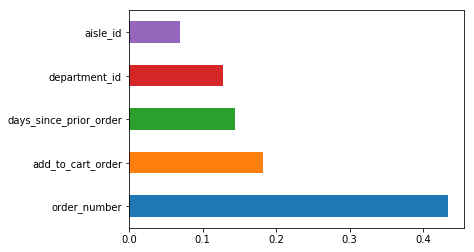

In [120]:
rfc = ensemble.RandomForestClassifier(max_depth=10,n_estimators= 100)
rfc.fit(X_train,y_train)
(pd.Series(rfc.feature_importances_, index=X_train.columns)
   .nlargest(5)
   .plot(kind='barh'))